## Imports

In [2]:
# Imports

#General
import numpy as np
import itertools

# System
import os, fnmatch

# Visualization
import seaborn #visualization library, must be imported before all other plotting libraries
import matplotlib.pyplot as plt
from IPython.core.display import HTML, display

# Machine Learning
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.metrics import confusion_matrix, f1_score, classification_report

# Random Seed
from numpy.random import seed
seed(1)

# Audio
import librosa.display, librosa

## Dataset

## Get filenames

In [5]:
# Get files in data path
path='./data/'
# Get Audio Files
files = []
for root, dirnames, filenames in os.walk(path):
    for filename in fnmatch.filter(filenames, '*.mp3'):
        files.append(os.path.join(root, filename))

print("found %d audio files in %s"%(len(files),path))

found 11497 audio files in ./data/


## Prepare labels from filenames

In [6]:
# Get Labels
labels =[]
classes=["banjo", "bass-clarinet", "bassoon", "cello", "clarinet", "double-bass", "flute", "french-horn", "guitar", "mandolin", "oboe", "sax", "trombone", "trumpet", "tuba", "viola", "violin"]

for filename in files:
    for name in classes:
        if fnmatch.fnmatchcase(filename, '*'+name+'*'):
            labels.append(name)
            
            break
    else:
        labels.append('other')

## Encode Labels

In [7]:
# Encode Labels
labelencoder = LabelEncoder()
labelencoder.fit(labels)
print(len(labelencoder.classes_), "classes:", ", ".join(list(labelencoder.classes_)))
classes_num = labelencoder.transform(labels)

17 classes: banjo, bass-clarinet, bassoon, cello, clarinet, double-bass, flute, french-horn, guitar, mandolin, oboe, sax, trombone, trumpet, tuba, viola, violin


## Parameters for MFCC

In [8]:
# Parameters
# Signal Processing Parameters
fs = 44100         # Sampling Frequency
n_fft = 2048       # length of the FFT window
hop_length = 512   # Number of samples between successive frames
n_mels = 128       # Number of Mel bands
n_mfcc = 13        # Number of MFCCs

# Machine Learning Parameters
testset_size = 0.25 #Percentage of data for Testing
n_neighbors=1       # Number of neighbors for kNN Classifier

## Function to Calculate Audio Features: MFCC

In [10]:
# Define Function to Calculate MFCC, Delta_MFCC and Delta2_MFCC
def get_features(y, sr=fs):
    S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
    mfcc = librosa.feature.mfcc(S=librosa.power_to_db(S), n_mfcc=n_mfcc)
    feature_vector = np.mean(mfcc,1)
    #feature_vector = (feature_vector-np.mean(feature_vector))/np.std(feature_vector)
    return feature_vector

## Load audio files, calculate features and create feature vectors

In [11]:
# Load audio files, calculate features and create feature vectors
feature_vectors = []
sound_paths = []
for i,f in enumerate(files):
    print ("get %d of %d = %s"%(i+1, len(files), f))
    try:
        y, sr = librosa.load(f, sr=fs)
        y/=y.max() #Normalize
        if len(y) < 2:
            print("Error loading %s" % f)
            continue
        feat = get_features(y, sr)
        feature_vectors.append(feat)
        sound_paths.append(f)
    except Exception as e:
        print("Error loading %s. Error: %s" % (f,e))
        
print("Calculated %d feature vectors"%len(feature_vectors))

get 1 of 11497 = ./data/sax/saxophone_A3_05_mezzo-piano_normal.mp3
get 2 of 11497 = ./data/sax/saxophone_A3_1_forte_normal.mp3
get 3 of 11497 = ./data/sax/saxophone_A4_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4 of 11497 = ./data/sax/saxophone_Ds4_05_pianissimo_subtone.mp3
get 5 of 11497 = ./data/sax/saxophone_A4_05_piano_normal.mp3
get 6 of 11497 = ./data/sax/saxophone_Gs5_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7 of 11497 = ./data/sax/saxophone_Gs3_05_fortissimo_normal.mp3
get 8 of 11497 = ./data/sax/saxophone_A5_15_fortissimo_normal.mp3
get 9 of 11497 = ./data/sax/saxophone_Gs4_15_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10 of 11497 = ./data/sax/saxophone_A4_025_fortissimo_normal.mp3
get 11 of 11497 = ./data/sax/saxophone_Gs4_1_piano_normal.mp3
get 12 of 11497 = ./data/sax/saxophone_A3_025_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 13 of 11497 = ./data/sax/saxophone_Gs4_15_piano_normal.mp3
get 14 of 11497 = ./data/sax/saxophone_Ds5_1_forte_major-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 15 of 11497 = ./data/sax/saxophone_Gs3_1_pianissimo_normal.mp3
get 16 of 11497 = ./data/sax/saxophone_A4_1_fortissimo_normal.mp3
get 17 of 11497 = ./data/sax/saxophone_A3_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 18 of 11497 = ./data/sax/saxophone_A4_05_forte_normal.mp3
get 19 of 11497 = ./data/sax/saxophone_Gs5_05_fortissimo_normal.mp3
get 20 of 11497 = ./data/sax/saxophone_Gs4_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 21 of 11497 = ./data/sax/saxophone_A4_15_piano_normal.mp3
get 22 of 11497 = ./data/sax/saxophone_A3_15_pianissimo_normal.mp3
get 23 of 11497 = ./data/sax/saxophone_A5_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 24 of 11497 = ./data/sax/saxophone_Gs4_1_pianissimo_normal.mp3
get 25 of 11497 = ./data/sax/saxophone_A5_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 26 of 11497 = ./data/sax/saxophone_Gs3_1_piano_normal.mp3
get 27 of 11497 = ./data/sax/saxophone_A4_1_pianissimo_normal.mp3
get 28 of 11497 = ./data/sax/saxophone_Gs4_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 29 of 11497 = ./data/sax/saxophone_Gs5_05_forte_normal.mp3
get 30 of 11497 = ./data/sax/saxophone_Gs5_1_piano_normal.mp3
get 31 of 11497 = ./data/sax/saxophone_Gs4_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 32 of 11497 = ./data/sax/saxophone_A5_1_pianissimo_normal.mp3
get 33 of 11497 = ./data/sax/saxophone_Gs4_05_fortissimo_normal.mp3
get 34 of 11497 = ./data/sax/saxophone_Gs3_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 35 of 11497 = ./data/sax/saxophone_Gs3_025_fortissimo_normal.mp3
get 36 of 11497 = ./data/sax/saxophone_Ds4_025_mezzo-forte_normal.mp3
get 37 of 11497 = ./data/sax/saxophone_Ds4_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 38 of 11497 = ./data/sax/saxophone_Gs3_05_forte_normal.mp3
get 39 of 11497 = ./data/sax/saxophone_Gs3_05_mezzo-piano_normal.mp3
get 40 of 11497 = ./data/sax/saxophone_Gs4_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 41 of 11497 = ./data/sax/saxophone_Gs5_15_fortissimo_normal.mp3
get 42 of 11497 = ./data/sax/saxophone_A5_05_fortissimo_normal.mp3
get 43 of 11497 = ./data/sax/saxophone_Gs5_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 44 of 11497 = ./data/sax/saxophone_A5_1_forte_normal.mp3
get 45 of 11497 = ./data/sax/saxophone_A3_05_forte_normal.mp3
get 46 of 11497 = ./data/sax/saxophone_Gs4_025_mezzo-forte_normal.mp3

/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')



get 47 of 11497 = ./data/sax/saxophone_Gs5_15_forte_normal.mp3
get 48 of 11497 = ./data/sax/saxophone_Gs4_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 49 of 11497 = ./data/sax/saxophone_Gs4_05_forte_normal.mp3
get 50 of 11497 = ./data/sax/saxophone_A5_05_piano_normal.mp3
get 51 of 11497 = ./data/sax/saxophone_Ds4_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 52 of 11497 = ./data/sax/saxophone_Gs4_15_fortissimo_normal.mp3
get 53 of 11497 = ./data/sax/saxophone_A4_15_forte_normal.mp3
get 54 of 11497 = ./data/sax/saxophone_A4_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 55 of 11497 = ./data/sax/saxophone_Gs5_025_fortissimo_normal.mp3
get 56 of 11497 = ./data/sax/saxophone_Gs4_025_piano_normal.mp3
get 57 of 11497 = ./data/sax/saxophone_A4_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 58 of 11497 = ./data/sax/saxophone_A3_1_fortissimo_normal.mp3
get 59 of 11497 = ./data/sax/saxophone_Gs3_025_mezzo-piano_normal.mp3
get 60 of 11497 = ./data/sax/saxophone_Ds4_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 61 of 11497 = ./data/sax/saxophone_A4_025_forte_normal.mp3
get 62 of 11497 = ./data/sax/saxophone_A5_15_forte_normal.mp3
get 63 of 11497 = ./data/sax/saxophone_Gs5_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 64 of 11497 = ./data/sax/saxophone_A3_1_piano_normal.mp3
get 65 of 11497 = ./data/sax/saxophone_Gs4_15_forte_normal.mp3
get 66 of 11497 = ./data/sax/saxophone_A3_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 67 of 11497 = ./data/sax/saxophone_Gs3_05_pianissimo_normal.mp3
get 68 of 11497 = ./data/sax/saxophone_A4_1_mezzo-forte_normal.mp3
get 69 of 11497 = ./data/sax/saxophone_A3_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 70 of 11497 = ./data/sax/saxophone_Ds4_05_fortissimo_normal.mp3
get 71 of 11497 = ./data/sax/saxophone_Gs5_025_piano_normal.mp3
get 72 of 11497 = ./data/sax/saxophone_A3_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 73 of 11497 = ./data/sax/saxophone_Gs4_1_forte_normal.mp3
get 74 of 11497 = ./data/sax/saxophone_Gs5_05_pianissimo_normal.mp3
get 75 of 11497 = ./data/sax/saxophone_Ds4_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 76 of 11497 = ./data/sax/saxophone_Gs4_025_pianissimo_normal.mp3
get 77 of 11497 = ./data/sax/saxophone_Ds4_05_piano_normal.mp3
get 78 of 11497 = ./data/sax/saxophone_A4_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 79 of 11497 = ./data/sax/saxophone_A3_05_pianissimo_normal.mp3
get 80 of 11497 = ./data/sax/saxophone_Gs3_15_pianissimo_normal.mp3
get 81 of 11497 = ./data/sax/saxophone_A3_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 82 of 11497 = ./data/sax/saxophone_Ds4_025_fortissimo_normal.mp3
get 83 of 11497 = ./data/sax/saxophone_Ds4_05_mezzo-forte_slap-tongue.mp3
get 84 of 11497 = ./data/sax/saxophone_A5_15_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 85 of 11497 = ./data/sax/saxophone_A5_05_forte_normal.mp3
get 86 of 11497 = ./data/sax/saxophone_A3_15_fortissimo_normal.mp3
get 87 of 11497 = ./data/sax/saxophone_A4_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 88 of 11497 = ./data/sax/saxophone_A3_05_piano_normal.mp3
get 89 of 11497 = ./data/sax/saxophone_Gs5_15_pianissimo_normal.mp3
get 90 of 11497 = ./data/sax/saxophone_Gs5_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 91 of 11497 = ./data/sax/saxophone_Gs5_025_forte_normal.mp3
get 92 of 11497 = ./data/sax/saxophone_A4_15_fortissimo_normal.mp3
get 93 of 11497 = ./data/sax/saxophone_A5_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 94 of 11497 = ./data/sax/saxophone_A3_025_pianissimo_normal.mp3
get 95 of 11497 = ./data/sax/saxophone_Gs3_025_forte_normal.mp3
get 96 of 11497 = ./data/sax/saxophone_Gs3_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 97 of 11497 = ./data/sax/saxophone_Gs4_025_fortissimo_normal.mp3
get 98 of 11497 = ./data/sax/saxophone_Ds4_15_fortissimo_normal.mp3
get 99 of 11497 = ./data/sax/saxophone_Ds5_1_forte_minor-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 100 of 11497 = ./data/sax/saxophone_Gs5_1_pianissimo_normal.mp3
get 101 of 11497 = ./data/mandolin/mandolin_D4_very-long_piano_normal.mp3
get 102 of 11497 = ./data/mandolin/mandolin_D4_very-long_piano_tremolo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 103 of 11497 = ./data/mandolin/mandolin_A6_very-long_piano_normal.mp3
get 104 of 11497 = ./data/mandolin/mandolin_As4_very-long_piano_normal.mp3
get 105 of 11497 = ./data/mandolin/mandolin_E6_very-long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 106 of 11497 = ./data/mandolin/mandolin_G3_very-long_piano_tremolo.mp3
get 107 of 11497 = ./data/mandolin/mandolin_C5_very-long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 108 of 11497 = ./data/mandolin/mandolin_G5_very-long_piano_tremolo.mp3
get 109 of 11497 = ./data/mandolin/mandolin_G5_very-long_piano_normal.mp3
get 110 of 11497 = ./data/mandolin/mandolin_A4_very-long_forte_tremolo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 111 of 11497 = ./data/mandolin/mandolin_G6_very-long_piano_normal.mp3
get 112 of 11497 = ./data/mandolin/mandolin_Cs5_very-long_piano_normal.mp3
get 113 of 11497 = ./data/mandolin/mandolin_Fs4_very-long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 114 of 11497 = ./data/mandolin/mandolin_F4_very-long_piano_normal.mp3
get 115 of 11497 = ./data/mandolin/mandolin_G4_very-long_forte_tremolo.mp3
get 116 of 11497 = ./data/mandolin/mandolin_Fs4_very-long_piano_tremolo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 117 of 11497 = ./data/mandolin/mandolin_Gs6_very-long_piano_normal.mp3
get 118 of 11497 = ./data/mandolin/mandolin_B4_very-long_piano_tremolo.mp3
get 119 of 11497 = ./data/mandolin/mandolin_E5_very-long_piano_tremolo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 120 of 11497 = ./data/mandolin/mandolin_C4_very-long_piano_tremolo.mp3
get 121 of 11497 = ./data/mandolin/mandolin_Ds5_very-long_piano_tremolo.mp3
get 122 of 11497 = ./data/mandolin/mandolin_G6_very-long_piano_tremolo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 123 of 11497 = ./data/mandolin/mandolin_Ds5_very-long_piano_normal.mp3
get 124 of 11497 = ./data/mandolin/mandolin_E4_very-long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 125 of 11497 = ./data/mandolin/mandolin_As5_very-long_piano_tremolo.mp3
get 126 of 11497 = ./data/mandolin/mandolin_F4_very-long_piano_tremolo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 127 of 11497 = ./data/mandolin/mandolin_Fs5_very-long_piano_normal.mp3
get 128 of 11497 = ./data/mandolin/mandolin_As3_very-long_forte_tremolo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 129 of 11497 = ./data/mandolin/mandolin_Gs6_very-long_piano_tremolo.mp3
get 130 of 11497 = ./data/mandolin/mandolin_As3_very-long_piano_normal.mp3
get 131 of 11497 = ./data/mandolin/mandolin_C5_very-long_piano_tremolo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 132 of 11497 = ./data/mandolin/mandolin_Ds6_very-long_piano_normal.mp3
get 133 of 11497 = ./data/mandolin/mandolin_G4_very-long_piano_normal.mp3
get 134 of 11497 = ./data/mandolin/mandolin_A6_very-long_piano_tremolo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 135 of 11497 = ./data/mandolin/mandolin_Gs5_very-long_piano_tremolo.mp3
get 136 of 11497 = ./data/mandolin/mandolin_G3_very-long_piano_normal.mp3
get 137 of 11497 = ./data/mandolin/mandolin_Gs3_very-long_piano_tremolo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 138 of 11497 = ./data/mandolin/mandolin_D6_very-long_piano_tremolo.mp3
get 139 of 11497 = ./data/mandolin/mandolin_Fs6_very-long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 140 of 11497 = ./data/mandolin/mandolin_Ds4_very-long_piano_tremolo.mp3
get 141 of 11497 = ./data/mandolin/mandolin_Fs5_very-long_piano_tremolo.mp3
get 142 of 11497 = ./data/mandolin/mandolin_A5_very-long_forte_tremolo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 143 of 11497 = ./data/mandolin/mandolin_D6_very-long_piano_normal.mp3
get 144 of 11497 = ./data/mandolin/mandolin_D5_very-long_forte_tremolo.mp3
get 145 of 11497 = ./data/mandolin/mandolin_B4_very-long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 146 of 11497 = ./data/mandolin/mandolin_As5_very-long_piano_normal.mp3
get 147 of 11497 = ./data/mandolin/mandolin_Gs5_very-long_piano_normal.mp3
get 148 of 11497 = ./data/mandolin/mandolin_Fs6_very-long_piano_tremolo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 149 of 11497 = ./data/mandolin/mandolin_Cs5_very-long_piano_tremolo.mp3
get 150 of 11497 = ./data/mandolin/mandolin_B3_very-long_piano_tremolo.mp3
get 151 of 11497 = ./data/mandolin/mandolin_A4_very-long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 152 of 11497 = ./data/mandolin/mandolin_Cs6_very-long_piano_normal.mp3
get 153 of 11497 = ./data/mandolin/mandolin_B5_very-long_piano_normal.mp3
get 154 of 11497 = ./data/mandolin/mandolin_E6_very-long_piano_tremolo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 155 of 11497 = ./data/mandolin/mandolin_Cs4_very-long_piano_normal.mp3
get 156 of 11497 = ./data/mandolin/mandolin_Ds4_very-long_piano_normal.mp3
get 157 of 11497 = ./data/mandolin/mandolin_Cs4_very-long_piano_tremolo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 158 of 11497 = ./data/mandolin/mandolin_F6_very-long_piano_tremolo.mp3
get 159 of 11497 = ./data/mandolin/mandolin_A5_very-long_piano_normal.mp3
get 160 of 11497 = ./data/mandolin/mandolin_F5_very-long_piano_tremolo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 161 of 11497 = ./data/mandolin/mandolin_G3_very-long_forte_tremolo.mp3
get 162 of 11497 = ./data/mandolin/mandolin_As4_very-long_piano_tremolo.mp3
get 163 of 11497 = ./data/mandolin/mandolin_A3_very-long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 164 of 11497 = ./data/mandolin/mandolin_E4_very-long_piano_tremolo.mp3
get 165 of 11497 = ./data/mandolin/mandolin_Gs4_very-long_forte_tremolo.mp3
get 166 of 11497 = ./data/mandolin/mandolin_D5_very-long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 167 of 11497 = ./data/mandolin/mandolin_B5_very-long_piano_tremolo.mp3
get 168 of 11497 = ./data/mandolin/mandolin_Ds6_very-long_piano_tremolo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 169 of 11497 = ./data/mandolin/mandolin_F6_very-long_piano_normal.mp3
get 170 of 11497 = ./data/mandolin/mandolin_C6_very-long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 171 of 11497 = ./data/mandolin/mandolin_F5_very-long_piano_normal.mp3
get 172 of 11497 = ./data/mandolin/mandolin_A4_very-long_piano_tremolo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 173 of 11497 = ./data/mandolin/mandolin_C6_very-long_piano_tremolo.mp3
get 174 of 11497 = ./data/mandolin/mandolin_Gs3_very-long_piano_normal.mp3
get 175 of 11497 = ./data/mandolin/mandolin_B3_very-long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 176 of 11497 = ./data/mandolin/mandolin_E5_very-long_piano_normal.mp3
get 177 of 11497 = ./data/mandolin/mandolin_C4_very-long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 178 of 11497 = ./data/mandolin/mandolin_Cs6_very-long_piano_tremolo.mp3
get 179 of 11497 = ./data/mandolin/mandolin_A3_very-long_forte_tremolo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 180 of 11497 = ./data/mandolin/mandolin_Gs4_very-long_piano_normal.mp3
get 181 of 11497 = ./data/banjo/banjo_A4_very-long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 182 of 11497 = ./data/banjo/banjo_D4_very-long_piano_normal.mp3
get 183 of 11497 = ./data/banjo/banjo_F3_very-long_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 184 of 11497 = ./data/banjo/banjo_G5_very-long_forte_normal.mp3
get 185 of 11497 = ./data/banjo/banjo_D3_very-long_forte_normal.mp3
get 186 of 11497 = ./data/banjo/banjo_C3_very-long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 187 of 11497 = ./data/banjo/banjo_A3_very-long_piano_normal.mp3
get 188 of 11497 = ./data/banjo/banjo_G4_very-long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 189 of 11497 = ./data/banjo/banjo_E3_very-long_piano_normal.mp3
get 190 of 11497 = ./data/banjo/banjo_Ds3_very-long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 191 of 11497 = ./data/banjo/banjo_F4_very-long_piano_normal.mp3
get 192 of 11497 = ./data/banjo/banjo_D5_very-long_forte_normal.mp3
get 193 of 11497 = ./data/banjo/banjo_B3_very-long_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 194 of 11497 = ./data/banjo/banjo_As3_very-long_piano_normal.mp3
get 195 of 11497 = ./data/banjo/banjo_F4_very-long_forte_normal.mp3
get 196 of 11497 = ./data/banjo/banjo_E6_very-long_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 197 of 11497 = ./data/banjo/banjo_Gs4_very-long_piano_normal.mp3
get 198 of 11497 = ./data/banjo/banjo_Fs3_very-long_forte_normal.mp3
get 199 of 11497 = ./data/banjo/banjo_C3_very-long_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 200 of 11497 = ./data/banjo/banjo_Fs3_very-long_piano_normal.mp3
get 201 of 11497 = ./data/banjo/banjo_D3_very-long_piano_normal.mp3
get 202 of 11497 = ./data/banjo/banjo_As4_very-long_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 203 of 11497 = ./data/banjo/banjo_Cs4_very-long_forte_normal.mp3
get 204 of 11497 = ./data/banjo/banjo_Cs6_very-long_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 205 of 11497 = ./data/banjo/banjo_E4_very-long_forte_normal.mp3
get 206 of 11497 = ./data/banjo/banjo_G5_very-long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 207 of 11497 = ./data/banjo/banjo_F3_very-long_piano_normal.mp3
get 208 of 11497 = ./data/banjo/banjo_As4_very-long_piano_normal.mp3
get 209 of 11497 = ./data/banjo/banjo_Fs5_very-long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 210 of 11497 = ./data/banjo/banjo_Ds3_very-long_forte_normal.mp3
get 211 of 11497 = ./data/banjo/banjo_Cs5_very-long_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 212 of 11497 = ./data/banjo/banjo_Ds5_very-long_forte_normal.mp3
get 213 of 11497 = ./data/banjo/banjo_E5_very-long_piano_normal.mp3
get 214 of 11497 = ./data/banjo/banjo_C4_very-long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 215 of 11497 = ./data/banjo/banjo_Cs4_very-long_piano_normal.mp3
get 216 of 11497 = ./data/banjo/banjo_C5_very-long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 217 of 11497 = ./data/banjo/banjo_F5_very-long_forte_normal.mp3
get 218 of 11497 = ./data/banjo/banjo_A3_very-long_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 219 of 11497 = ./data/banjo/banjo_Fs4_very-long_forte_normal.mp3
get 220 of 11497 = ./data/banjo/banjo_A5_very-long_piano_normal.mp3
get 221 of 11497 = ./data/banjo/banjo_B4_very-long_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 222 of 11497 = ./data/banjo/banjo_B3_very-long_piano_normal.mp3
get 223 of 11497 = ./data/banjo/banjo_Fs5_very-long_forte_normal.mp3
get 224 of 11497 = ./data/banjo/banjo_Cs3_very-long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 225 of 11497 = ./data/banjo/banjo_B5_very-long_piano_normal.mp3
get 226 of 11497 = ./data/banjo/banjo_G3_very-long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 227 of 11497 = ./data/banjo/banjo_Ds4_very-long_forte_normal.mp3
get 228 of 11497 = ./data/banjo/banjo_As5_very-long_piano_normal.mp3
get 229 of 11497 = ./data/banjo/banjo_As5_very-long_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 230 of 11497 = ./data/banjo/banjo_Gs3_very-long_piano_normal.mp3
get 231 of 11497 = ./data/banjo/banjo_D6_very-long_forte_normal.mp3
get 232 of 11497 = ./data/banjo/banjo_C6_very-long_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 233 of 11497 = ./data/banjo/banjo_Fs4_very-long_piano_normal.mp3
get 234 of 11497 = ./data/banjo/banjo_Ds4_very-long_piano_normal.mp3
get 235 of 11497 = ./data/banjo/banjo_F5_very-long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 236 of 11497 = ./data/banjo/banjo_E4_very-long_piano_normal.mp3
get 237 of 11497 = ./data/banjo/banjo_Gs4_very-long_forte_normal.mp3
get 238 of 11497 = ./data/banjo/banjo_A5_very-long_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 239 of 11497 = ./data/banjo/banjo_D4_very-long_forte_normal.mp3
get 240 of 11497 = ./data/banjo/banjo_A4_very-long_forte_normal.mp3
get 241 of 11497 = ./data/banjo/banjo_G3_very-long_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 242 of 11497 = ./data/banjo/banjo_Ds5_very-long_piano_normal.mp3
get 243 of 11497 = ./data/banjo/banjo_Gs3_very-long_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 244 of 11497 = ./data/banjo/banjo_Cs3_very-long_forte_normal.mp3
get 245 of 11497 = ./data/banjo/banjo_E5_very-long_forte_normal.mp3
get 246 of 11497 = ./data/banjo/banjo_As3_very-long_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 247 of 11497 = ./data/banjo/banjo_E3_very-long_forte_normal.mp3
get 248 of 11497 = ./data/banjo/banjo_Ds6_very-long_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 249 of 11497 = ./data/banjo/banjo_B5_very-long_forte_normal.mp3
get 250 of 11497 = ./data/banjo/banjo_C5_very-long_forte_normal.mp3
get 251 of 11497 = ./data/banjo/banjo_D5_very-long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 252 of 11497 = ./data/banjo/banjo_Gs5_very-long_piano_normal.mp3
get 253 of 11497 = ./data/banjo/banjo_B4_very-long_piano_normal.mp3
get 254 of 11497 = ./data/banjo/banjo_C4_very-long_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 255 of 11497 = ./data/flute/flute_E6_025_piano_normal.mp3
get 256 of 11497 = ./data/flute/flute_E4_very-long_forte_normal.mp3
get 257 of 11497 = ./data/flute/flute_B6_05_piano_normal.mp3
get 258 of 11497 = ./data/flute/flute_As5_025_piano_normal.mp3
get 259 of 11497 = ./data/flute/flute_Cs7_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 260 of 11497 = ./data/flute/flute_E4_15_piano_normal.mp3
get 261 of 11497 = ./data/flute/flute_E6_025_pianissimo_normal.mp3
get 262 of 11497 = ./data/flute/flute_Ds5_long_mezzo-forte_tremolo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 263 of 11497 = ./data/flute/flute_C4_05_pianissimo_normal.mp3
get 264 of 11497 = ./data/flute/flute_E4_very-long_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 265 of 11497 = ./data/flute/flute_Cs4_15_forte_normal.mp3
get 266 of 11497 = ./data/flute/flute_Cs4_025_mezzo-forte_normal.mp3
get 267 of 11497 = ./data/flute/flute_Gs5_15_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 268 of 11497 = ./data/flute/flute_G5_15_mezzo-piano_normal.mp3
get 269 of 11497 = ./data/flute/flute_Gs6_1_mezzo-forte_normal.mp3
get 270 of 11497 = ./data/flute/flute_Cs5_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 271 of 11497 = ./data/flute/flute_A6_long_mezzo-forte_minor-trill.mp3
get 272 of 11497 = ./data/flute/flute_Cs5_05_mezzo-piano_normal.mp3
get 273 of 11497 = ./data/flute/flute_G4_phrase_mezzo-forte_triple-tonguing.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 274 of 11497 = ./data/flute/flute_Fs5_05_forte_normal.mp3
get 275 of 11497 = ./data/flute/flute_D5_phrase_mezzo-forte_triple-tonguing.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 276 of 11497 = ./data/flute/flute_C6_1_mezzo-forte_normal.mp3
get 277 of 11497 = ./data/flute/flute_A6_1_fortissimo_minor-trill.mp3
get 278 of 11497 = ./data/flute/flute_Cs5_1_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 279 of 11497 = ./data/flute/flute_Cs4_025_pianissimo_normal.mp3
get 280 of 11497 = ./data/flute/flute_G5_025_forte_normal.mp3
get 281 of 11497 = ./data/flute/flute_Gs4_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 282 of 11497 = ./data/flute/flute_Gs5_1_forte_normal.mp3
get 283 of 11497 = ./data/flute/flute_C6_025_forte_normal.mp3
get 284 of 11497 = ./data/flute/flute_A6_long_fortissimo_major-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 285 of 11497 = ./data/flute/flute_Ds5_very-long_cresc-decresc_normal.mp3
get 286 of 11497 = ./data/flute/flute_Gs4_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 287 of 11497 = ./data/flute/flute_D6_long_piano_normal.mp3
get 288 of 11497 = ./data/flute/flute_A5_long_mezzo-forte_minor-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 289 of 11497 = ./data/flute/flute_A4_15_mezzo-forte_normal.mp3
get 290 of 11497 = ./data/flute/flute_B4_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 291 of 11497 = ./data/flute/flute_F6_025_forte_normal.mp3
get 292 of 11497 = ./data/flute/flute_Fs4_15_mezzo-forte_normal.mp3
get 293 of 11497 = ./data/flute/flute_Ds4_15_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 294 of 11497 = ./data/flute/flute_A4_15_pianissimo_normal.mp3
get 295 of 11497 = ./data/flute/flute_As5_15_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 296 of 11497 = ./data/flute/flute_As5_025_forte_normal.mp3
get 297 of 11497 = ./data/flute/flute_As5_15_piano_normal.mp3
get 298 of 11497 = ./data/flute/flute_Gs5_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 299 of 11497 = ./data/flute/flute_Fs6_very-long_cresc-decresc_normal.mp3
get 300 of 11497 = ./data/flute/flute_B4_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 301 of 11497 = ./data/flute/flute_D5_phrase_mezzo-forte_tenuto.mp3
get 302 of 11497 = ./data/flute/flute_E4_025_mezzo-forte_normal.mp3
get 303 of 11497 = ./data/flute/flute_E5_15_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 304 of 11497 = ./data/flute/flute_Fs5_025_piano_normal.mp3
get 305 of 11497 = ./data/flute/flute_Ds7_025_fortissimo_normal.mp3
get 306 of 11497 = ./data/flute/flute_G5_phrase_mezzo-forte_tongued-slur.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 307 of 11497 = ./data/flute/flute_B4_1_mezzo-forte_normal.mp3
get 308 of 11497 = ./data/flute/flute_E6_long_piano_normal.mp3
get 309 of 11497 = ./data/flute/flute_A4_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 310 of 11497 = ./data/flute/flute_D5_long_piano_normal.mp3
get 311 of 11497 = ./data/flute/flute_E5_15_piano_normal.mp3
get 312 of 11497 = ./data/flute/flute_B4_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 313 of 11497 = ./data/flute/flute_Ds4_05_forte_normal.mp3
get 314 of 11497 = ./data/flute/flute_C5_05_forte_normal.mp3
get 315 of 11497 = ./data/flute/flute_B5_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 316 of 11497 = ./data/flute/flute_Fs4_05_piano_normal.mp3
get 317 of 11497 = ./data/flute/flute_F5_15_pianissimo_normal.mp3
get 318 of 11497 = ./data/flute/flute_C7_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 319 of 11497 = ./data/flute/flute_C5_very-long_cresc-decresc_normal.mp3
get 320 of 11497 = ./data/flute/flute_F7_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 321 of 11497 = ./data/flute/flute_As4_15_pianissimo_normal.mp3
get 322 of 11497 = ./data/flute/flute_Cs4_025_piano_normal.mp3
get 323 of 11497 = ./data/flute/flute_D5_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 324 of 11497 = ./data/flute/flute_G6_05_pianissimo_normal.mp3
get 325 of 11497 = ./data/flute/flute_Gs6_15_mezzo-forte_normal.mp3
get 326 of 11497 = ./data/flute/flute_Cs4_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 327 of 11497 = ./data/flute/flute_Ds5_025_mezzo-piano_normal.mp3
get 328 of 11497 = ./data/flute/flute_Ds5_05_pianissimo_normal.mp3
get 329 of 11497 = ./data/flute/flute_D7_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 330 of 11497 = ./data/flute/flute_F6_15_piano_normal.mp3
get 331 of 11497 = ./data/flute/flute_A4_025_forte_normal.mp3
get 332 of 11497 = ./data/flute/flute_A6_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 333 of 11497 = ./data/flute/flute_As4_15_forte_normal.mp3
get 334 of 11497 = ./data/flute/flute_F4_025_piano_normal.mp3
get 335 of 11497 = ./data/flute/flute_Gs6_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 336 of 11497 = ./data/flute/flute_Ds6_025_piano_normal.mp3
get 337 of 11497 = ./data/flute/flute_Ds7_05_piano_normal.mp3
get 338 of 11497 = ./data/flute/flute_G4_phrase_mezzo-forte_tongued-slur.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 339 of 11497 = ./data/flute/flute_A4_05_piano_normal.mp3
get 340 of 11497 = ./data/flute/flute_Fs5_025_pianissimo_normal.mp3
get 341 of 11497 = ./data/flute/flute_G4_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 342 of 11497 = ./data/flute/flute_E7_1_piano_normal.mp3
get 343 of 11497 = ./data/flute/flute_Ds5_025_mezzo-forte_normal.mp3
get 344 of 11497 = ./data/flute/flute_G4_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 345 of 11497 = ./data/flute/flute_C4_1_pianissimo_normal.mp3
get 346 of 11497 = ./data/flute/flute_As5_1_forte_normal.mp3
get 347 of 11497 = ./data/flute/flute_F4_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 348 of 11497 = ./data/flute/flute_G6_05_mezzo-forte_normal.mp3
get 349 of 11497 = ./data/flute/flute_C5_05_mezzo-forte_normal.mp3
get 350 of 11497 = ./data/flute/flute_C6_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 351 of 11497 = ./data/flute/flute_D4_15_piano_normal.mp3
get 352 of 11497 = ./data/flute/flute_F5_1_mezzo-piano_normal.mp3
get 353 of 11497 = ./data/flute/flute_C6_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 354 of 11497 = ./data/flute/flute_E5_05_forte_normal.mp3
get 355 of 11497 = ./data/flute/flute_D6_1_forte_normal.mp3
get 356 of 11497 = ./data/flute/flute_E4_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 357 of 11497 = ./data/flute/flute_F5_05_piano_normal.mp3
get 358 of 11497 = ./data/flute/flute_E4_1_forte_normal.mp3
get 359 of 11497 = ./data/flute/flute_G4_phrase_mezzo-forte_tenuto.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 360 of 11497 = ./data/flute/flute_Cs6_15_forte_normal.mp3
get 361 of 11497 = ./data/flute/flute_Ds5_025_forte_normal.mp3
get 362 of 11497 = ./data/flute/flute_Gs4_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 363 of 11497 = ./data/flute/flute_Fs6_1_piano_normal.mp3
get 364 of 11497 = ./data/flute/flute_Ds6_15_forte_normal.mp3
get 365 of 11497 = ./data/flute/flute_D4_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 366 of 11497 = ./data/flute/flute_Ds6_15_pianissimo_normal.mp3
get 367 of 11497 = ./data/flute/flute_Cs7_025_mezzo-forte_normal.mp3
get 368 of 11497 = ./data/flute/flute_Ds4_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 369 of 11497 = ./data/flute/flute_D7_15_forte_normal.mp3
get 370 of 11497 = ./data/flute/flute_Cs6_15_piano_normal.mp3
get 371 of 11497 = ./data/flute/flute_Gs5_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 372 of 11497 = ./data/flute/flute_Ds6_long_mezzo-forte_major-trill.mp3
get 373 of 11497 = ./data/flute/flute_G6_025_piano_normal.mp3
get 374 of 11497 = ./data/flute/flute_Ds5_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 375 of 11497 = ./data/flute/flute_F6_long_piano_normal.mp3
get 376 of 11497 = ./data/flute/flute_D6_1_mezzo-forte_normal.mp3
get 377 of 11497 = ./data/flute/flute_Fs6_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 378 of 11497 = ./data/flute/flute_Ds5_1_mezzo-forte_normal.mp3
get 379 of 11497 = ./data/flute/flute_A4_long_mezzo-forte_major-trill.mp3
get 380 of 11497 = ./data/flute/flute_Cs5_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 381 of 11497 = ./data/flute/flute_As5_15_mezzo-forte_normal.mp3
get 382 of 11497 = ./data/flute/flute_Ds4_1_piano_normal.mp3
get 383 of 11497 = ./data/flute/flute_F6_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 384 of 11497 = ./data/flute/flute_E6_15_pianissimo_normal.mp3
get 385 of 11497 = ./data/flute/flute_Cs7_1_mezzo-forte_normal.mp3
get 386 of 11497 = ./data/flute/flute_Ds4_long_mezzo-forte_major-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 387 of 11497 = ./data/flute/flute_C5_phrase_mezzo-forte_staccato.mp3
get 388 of 11497 = ./data/flute/flute_Cs4_05_mezzo-forte_normal.mp3
get 389 of 11497 = ./data/flute/flute_D7_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 390 of 11497 = ./data/flute/flute_B6_15_piano_normal.mp3
get 391 of 11497 = ./data/flute/flute_G4_1_mezzo-forte_normal.mp3
get 392 of 11497 = ./data/flute/flute_B6_15_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 393 of 11497 = ./data/flute/flute_E6_025_forte_normal.mp3
get 394 of 11497 = ./data/flute/flute_As4_1_mezzo-forte_normal.mp3
get 395 of 11497 = ./data/flute/flute_D4_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 396 of 11497 = ./data/flute/flute_G5_phrase_mezzo-forte_triple-tonguing.mp3
get 397 of 11497 = ./data/flute/flute_D6_phrase_mezzo-forte_tongued-slur.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 398 of 11497 = ./data/flute/flute_Cs6_1_mezzo-forte_normal.mp3
get 399 of 11497 = ./data/flute/flute_Ds4_1_mezzo-piano_normal.mp3
get 400 of 11497 = ./data/flute/flute_E4_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 401 of 11497 = ./data/flute/flute_D7_05_forte_normal.mp3
get 402 of 11497 = ./data/flute/flute_D6_025_forte_normal.mp3
get 403 of 11497 = ./data/flute/flute_B4_15_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 404 of 11497 = ./data/flute/flute_A5_very-long_cresc-decresc_normal.mp3
get 405 of 11497 = ./data/flute/flute_As5_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 406 of 11497 = ./data/flute/flute_Gs4_05_piano_normal.mp3
get 407 of 11497 = ./data/flute/flute_B4_05_piano_normal.mp3
get 408 of 11497 = ./data/flute/flute_G5_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 409 of 11497 = ./data/flute/flute_As6_15_mezzo-forte_normal.mp3
get 410 of 11497 = ./data/flute/flute_C5_025_pianissimo_normal.mp3
get 411 of 11497 = ./data/flute/flute_Gs6_very-long_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 412 of 11497 = ./data/flute/flute_D4_1_mezzo-piano_normal.mp3
get 413 of 11497 = ./data/flute/flute_B5_025_pianissimo_normal.mp3
get 414 of 11497 = ./data/flute/flute_Ds6_long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 415 of 11497 = ./data/flute/flute_D5_phrase_mezzo-forte_double-tonguing.mp3
get 416 of 11497 = ./data/flute/flute_A5_05_mezzo-piano_normal.mp3
get 417 of 11497 = ./data/flute/flute_A6_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 418 of 11497 = ./data/flute/flute_B5_long_piano_normal.mp3
get 419 of 11497 = ./data/flute/flute_C5_phrase_mezzo-forte_tenuto.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 420 of 11497 = ./data/flute/flute_D5_05_pianissimo_normal.mp3
get 421 of 11497 = ./data/flute/flute_C4_phrase_mezzo-forte_nonlegato.mp3
get 422 of 11497 = ./data/flute/flute_As6_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 423 of 11497 = ./data/flute/flute_Ds6_long_mezzo-forte_minor-trill.mp3
get 424 of 11497 = ./data/flute/flute_E5_025_pianissimo_normal.mp3
get 425 of 11497 = ./data/flute/flute_Gs4_05_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 426 of 11497 = ./data/flute/flute_Ds4_1_forte_normal.mp3
get 427 of 11497 = ./data/flute/flute_C4_very-long_cresc-decresc_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 428 of 11497 = ./data/flute/flute_G6_1_piano_normal.mp3
get 429 of 11497 = ./data/flute/flute_Ds7_15_piano_normal.mp3
get 430 of 11497 = ./data/flute/flute_B6_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 431 of 11497 = ./data/flute/flute_Cs5_025_forte_normal.mp3
get 432 of 11497 = ./data/flute/flute_Ds5_1_piano_normal.mp3
get 433 of 11497 = ./data/flute/flute_Gs5_05_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 434 of 11497 = ./data/flute/flute_F4_phrase_mezzo-forte_triple-tonguing.mp3
get 435 of 11497 = ./data/flute/flute_Cs7_15_pianissimo_normal.mp3
get 436 of 11497 = ./data/flute/flute_B5_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 437 of 11497 = ./data/flute/flute_Fs5_long_mezzo-forte_major-trill.mp3
get 438 of 11497 = ./data/flute/flute_F6_025_pianissimo_normal.mp3
get 439 of 11497 = ./data/flute/flute_F4_phrase_mezzo-forte_tenuto.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 440 of 11497 = ./data/flute/flute_F5_025_mezzo-piano_normal.mp3
get 441 of 11497 = ./data/flute/flute_Gs5_15_forte_normal.mp3
get 442 of 11497 = ./data/flute/flute_Ds5_05_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 443 of 11497 = ./data/flute/flute_D5_1_mezzo-forte_normal.mp3
get 444 of 11497 = ./data/flute/flute_A6_15_forte_normal.mp3
get 445 of 11497 = ./data/flute/flute_D5_phrase_mezzo-forte_staccatissimo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 446 of 11497 = ./data/flute/flute_Ds5_long_mezzo-forte_major-trill.mp3
get 447 of 11497 = ./data/flute/flute_F4_05_pianissimo_normal.mp3
get 448 of 11497 = ./data/flute/flute_Ds4_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 449 of 11497 = ./data/flute/flute_Cs4_1_pianissimo_normal.mp3
get 450 of 11497 = ./data/flute/flute_Gs4_1_mezzo-forte_normal.mp3
get 451 of 11497 = ./data/flute/flute_Ds6_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 452 of 11497 = ./data/flute/flute_F6_1_pianissimo_normal.mp3
get 453 of 11497 = ./data/flute/flute_C4_phrase_mezzo-forte_tenuto.mp3
get 454 of 11497 = ./data/flute/flute_E5_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 455 of 11497 = ./data/flute/flute_Gs5_05_piano_normal.mp3
get 456 of 11497 = ./data/flute/flute_As5_025_pianissimo_normal.mp3
get 457 of 11497 = ./data/flute/flute_As4_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 458 of 11497 = ./data/flute/flute_Cs6_025_pianissimo_normal.mp3
get 459 of 11497 = ./data/flute/flute_D4_025_mezzo-forte_normal.mp3
get 460 of 11497 = ./data/flute/flute_As4_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 461 of 11497 = ./data/flute/flute_G5_1_forte_normal.mp3
get 462 of 11497 = ./data/flute/flute_C4_1_piano_normal.mp3
get 463 of 11497 = ./data/flute/flute_Cs5_long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 464 of 11497 = ./data/flute/flute_Cs5_15_forte_normal.mp3
get 465 of 11497 = ./data/flute/flute_E6_1_mezzo-forte_normal.mp3
get 466 of 11497 = ./data/flute/flute_As4_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 467 of 11497 = ./data/flute/flute_A6_05_pianissimo_normal.mp3
get 468 of 11497 = ./data/flute/flute_B5_05_mezzo-forte_normal.mp3
get 469 of 11497 = ./data/flute/flute_E6_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 470 of 11497 = ./data/flute/flute_As4_05_forte_normal.mp3
get 471 of 11497 = ./data/flute/flute_Fs4_1_mezzo-forte_normal.mp3
get 472 of 11497 = ./data/flute/flute_G5_15_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 473 of 11497 = ./data/flute/flute_As4_15_mezzo-forte_tremolo.mp3
get 474 of 11497 = ./data/flute/flute_F6_05_mezzo-forte_normal.mp3
get 475 of 11497 = ./data/flute/flute_Ds7_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 476 of 11497 = ./data/flute/flute_Ds6_1_mezzo-forte_normal.mp3
get 477 of 11497 = ./data/flute/flute_As4_05_mezzo-forte_normal.mp3
get 478 of 11497 = ./data/flute/flute_Ds5_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 479 of 11497 = ./data/flute/flute_F4_025_mezzo-forte_normal.mp3
get 480 of 11497 = ./data/flute/flute_A4_05_pianissimo_normal.mp3
get 481 of 11497 = ./data/flute/flute_Fs6_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 482 of 11497 = ./data/flute/flute_C5_1_pianissimo_normal.mp3
get 483 of 11497 = ./data/flute/flute_E4_very-long_cresc-decresc_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 484 of 11497 = ./data/flute/flute_D7_15_mezzo-forte_normal.mp3
get 485 of 11497 = ./data/flute/flute_E6_15_piano_normal.mp3
get 486 of 11497 = ./data/flute/flute_F4_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 487 of 11497 = ./data/flute/flute_Cs6_05_forte_normal.mp3
get 488 of 11497 = ./data/flute/flute_G5_05_mezzo-forte_normal.mp3
get 489 of 11497 = ./data/flute/flute_A5_15_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 490 of 11497 = ./data/flute/flute_A4_025_piano_normal.mp3
get 491 of 11497 = ./data/flute/flute_G4_05_piano_normal.mp3
get 492 of 11497 = ./data/flute/flute_F5_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 493 of 11497 = ./data/flute/flute_Fs5_05_pianissimo_normal.mp3
get 494 of 11497 = ./data/flute/flute_G5_1_pianissimo_normal.mp3
get 495 of 11497 = ./data/flute/flute_E5_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 496 of 11497 = ./data/flute/flute_F6_1_forte_normal.mp3
get 497 of 11497 = ./data/flute/flute_C4_15_forte_normal.mp3
get 498 of 11497 = ./data/flute/flute_C6_1_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 499 of 11497 = ./data/flute/flute_A6_15_piano_normal.mp3
get 500 of 11497 = ./data/flute/flute_D5_15_mezzo-piano_normal.mp3
get 501 of 11497 = ./data/flute/flute_G4_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 502 of 11497 = ./data/flute/flute_F4_1_piano_normal.mp3
get 503 of 11497 = ./data/flute/flute_A6_05_mezzo-forte_normal.mp3
get 504 of 11497 = ./data/flute/flute_Fs6_15_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 505 of 11497 = ./data/flute/flute_Fs5_05_mezzo-piano_normal.mp3
get 506 of 11497 = ./data/flute/flute_F5_025_piano_normal.mp3
get 507 of 11497 = ./data/flute/flute_Ds4_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 508 of 11497 = ./data/flute/flute_D6_05_pianissimo_normal.mp3
get 509 of 11497 = ./data/flute/flute_A5_phrase_mezzo-forte_staccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 510 of 11497 = ./data/flute/flute_D7_025_mezzo-forte_normal.mp3
get 511 of 11497 = ./data/flute/flute_A4_15_mezzo-piano_normal.mp3
get 512 of 11497 = ./data/flute/flute_D5_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 513 of 11497 = ./data/flute/flute_E5_05_pianissimo_normal.mp3
get 514 of 11497 = ./data/flute/flute_B4_05_pianissimo_normal.mp3
get 515 of 11497 = ./data/flute/flute_Fs6_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 516 of 11497 = ./data/flute/flute_C5_15_piano_normal.mp3
get 517 of 11497 = ./data/flute/flute_Cs7_15_mezzo-forte_normal.mp3
get 518 of 11497 = ./data/flute/flute_Fs6_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 519 of 11497 = ./data/flute/flute_As6_15_pianissimo_normal.mp3
get 520 of 11497 = ./data/flute/flute_D5_025_forte_normal.mp3
get 521 of 11497 = ./data/flute/flute_Ds6_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 522 of 11497 = ./data/flute/flute_As4_1_piano_normal.mp3
get 523 of 11497 = ./data/flute/flute_Fs6_1_pianissimo_normal.mp3
get 524 of 11497 = ./data/flute/flute_C6_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 525 of 11497 = ./data/flute/flute_A6_1_mezzo-forte_normal.mp3
get 526 of 11497 = ./data/flute/flute_F4_05_mezzo-forte_normal.mp3
get 527 of 11497 = ./data/flute/flute_Gs6_15_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 528 of 11497 = ./data/flute/flute_C5_05_mezzo-piano_normal.mp3
get 529 of 11497 = ./data/flute/flute_Gs6_long_piano_normal.mp3
get 530 of 11497 = ./data/flute/flute_F7_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 531 of 11497 = ./data/flute/flute_E4_1_mezzo-piano_normal.mp3
get 532 of 11497 = ./data/flute/flute_B4_025_pianissimo_normal.mp3
get 533 of 11497 = ./data/flute/flute_C7_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 534 of 11497 = ./data/flute/flute_G5_1_mezzo-piano_normal.mp3
get 535 of 11497 = ./data/flute/flute_Fs5_15_pianissimo_normal.mp3
get 536 of 11497 = ./data/flute/flute_E7_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 537 of 11497 = ./data/flute/flute_C6_05_pianissimo_normal.mp3
get 538 of 11497 = ./data/flute/flute_D4_1_pianissimo_normal.mp3
get 539 of 11497 = ./data/flute/flute_Fs5_very-long_cresc-decresc_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 540 of 11497 = ./data/flute/flute_Cs6_1_forte_normal.mp3
get 541 of 11497 = ./data/flute/flute_G6_05_forte_normal.mp3
get 542 of 11497 = ./data/flute/flute_A6_long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 543 of 11497 = ./data/flute/flute_F5_05_pianissimo_normal.mp3
get 544 of 11497 = ./data/flute/flute_Gs5_05_mezzo-forte_normal.mp3
get 545 of 11497 = ./data/flute/flute_D4_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 546 of 11497 = ./data/flute/flute_D6_phrase_mezzo-forte_fluttertonguing.mp3
get 547 of 11497 = ./data/flute/flute_A5_long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 548 of 11497 = ./data/flute/flute_D7_025_piano_normal.mp3
get 549 of 11497 = ./data/flute/flute_As5_05_pianissimo_normal.mp3
get 550 of 11497 = ./data/flute/flute_A4_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 551 of 11497 = ./data/flute/flute_F4_025_forte_normal.mp3
get 552 of 11497 = ./data/flute/flute_D4_025_forte_normal.mp3
get 553 of 11497 = ./data/flute/flute_D6_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 554 of 11497 = ./data/flute/flute_A6_025_mezzo-forte_normal.mp3
get 555 of 11497 = ./data/flute/flute_Gs5_long_piano_normal.mp3
get 556 of 11497 = ./data/flute/flute_Cs5_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 557 of 11497 = ./data/flute/flute_C5_long_mezzo-forte_major-trill.mp3
get 558 of 11497 = ./data/flute/flute_Gs4_15_mezzo-piano_normal.mp3
get 559 of 11497 = ./data/flute/flute_Gs5_1_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 560 of 11497 = ./data/flute/flute_G4_025_mezzo-piano_normal.mp3
get 561 of 11497 = ./data/flute/flute_F5_05_mezzo-forte_normal.mp3
get 562 of 11497 = ./data/flute/flute_G5_05_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 563 of 11497 = ./data/flute/flute_Cs6_05_piano_normal.mp3
get 564 of 11497 = ./data/flute/flute_D4_15_mezzo-forte_normal.mp3
get 565 of 11497 = ./data/flute/flute_C6_long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 566 of 11497 = ./data/flute/flute_Gs4_1_mezzo-piano_normal.mp3
get 567 of 11497 = ./data/flute/flute_E4_1_piano_normal.mp3
get 568 of 11497 = ./data/flute/flute_D5_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 569 of 11497 = ./data/flute/flute_C5_phrase_mezzo-forte_double-tonguing.mp3
get 570 of 11497 = ./data/flute/flute_Cs4_1_mezzo-forte_normal.mp3
get 571 of 11497 = ./data/flute/flute_G5_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 572 of 11497 = ./data/flute/flute_G4_15_mezzo-forte_normal.mp3
get 573 of 11497 = ./data/flute/flute_E6_phrase_forte_normal.mp3
get 574 of 11497 = ./data/flute/flute_C4_15_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 575 of 11497 = ./data/flute/flute_C5_phrase_mezzo-forte_fluttertonguing.mp3
get 576 of 11497 = ./data/flute/flute_G4_phrase_mezzo-forte_double-tonguing.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 577 of 11497 = ./data/flute/flute_D7_1_forte_normal.mp3
get 578 of 11497 = ./data/flute/flute_A4_1_piano_normal.mp3
get 579 of 11497 = ./data/flute/flute_A6_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 580 of 11497 = ./data/flute/flute_B5_1_piano_normal.mp3
get 581 of 11497 = ./data/flute/flute_C7_1_mezzo-forte_normal.mp3
get 582 of 11497 = ./data/flute/flute_Cs6_025_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 583 of 11497 = ./data/flute/flute_G6_1_forte_normal.mp3
get 584 of 11497 = ./data/flute/flute_G6_long_fortissimo_normal.mp3
get 585 of 11497 = ./data/flute/flute_C4_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 586 of 11497 = ./data/flute/flute_A4_phrase_mezzo-forte_normal.mp3
get 587 of 11497 = ./data/flute/flute_G5_025_piano_normal.mp3
get 588 of 11497 = ./data/flute/flute_Cs4_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 589 of 11497 = ./data/flute/flute_C4_1_mezzo-forte_normal.mp3
get 590 of 11497 = ./data/flute/flute_C5_phrase_mezzo-forte_legato.mp3
get 591 of 11497 = ./data/flute/flute_F4_phrase_mezzo-forte_staccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 592 of 11497 = ./data/flute/flute_Fs6_15_forte_normal.mp3
get 593 of 11497 = ./data/flute/flute_Cs6_025_forte_normal.mp3
get 594 of 11497 = ./data/flute/flute_C5_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 595 of 11497 = ./data/flute/flute_Gs4_025_forte_normal.mp3
get 596 of 11497 = ./data/flute/flute_Gs6_025_piano_normal.mp3
get 597 of 11497 = ./data/flute/flute_C4_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 598 of 11497 = ./data/flute/flute_A6_025_piano_normal.mp3
get 599 of 11497 = ./data/flute/flute_E5_025_mezzo-forte_normal.mp3
get 600 of 11497 = ./data/flute/flute_Fs4_05_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 601 of 11497 = ./data/flute/flute_A5_phrase_mezzo-forte_nonlegato.mp3
get 602 of 11497 = ./data/flute/flute_E4_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 603 of 11497 = ./data/flute/flute_E4_05_piano_normal.mp3
get 604 of 11497 = ./data/flute/flute_As4_15_mezzo-piano_normal.mp3
get 605 of 11497 = ./data/flute/flute_G5_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 606 of 11497 = ./data/flute/flute_Ds4_1_mezzo-forte_normal.mp3
get 607 of 11497 = ./data/flute/flute_C5_phrase_mezzo-forte_nonlegato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 608 of 11497 = ./data/flute/flute_D7_025_forte_normal.mp3
get 609 of 11497 = ./data/flute/flute_Fs4_025_piano_normal.mp3
get 610 of 11497 = ./data/flute/flute_Cs7_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 611 of 11497 = ./data/flute/flute_Fs6_025_pianissimo_normal.mp3
get 612 of 11497 = ./data/flute/flute_Fs6_15_mezzo-forte_normal.mp3
get 613 of 11497 = ./data/flute/flute_As6_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 614 of 11497 = ./data/flute/flute_Cs4_1_piano_normal.mp3
get 615 of 11497 = ./data/flute/flute_A5_05_mezzo-forte_normal.mp3
get 616 of 11497 = ./data/flute/flute_Cs5_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 617 of 11497 = ./data/flute/flute_D5_15_mezzo-forte_normal.mp3
get 618 of 11497 = ./data/flute/flute_Fs5_05_mezzo-forte_normal.mp3
get 619 of 11497 = ./data/flute/flute_C7_15_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 620 of 11497 = ./data/flute/flute_Ds5_15_pianissimo_normal.mp3
get 621 of 11497 = ./data/flute/flute_A5_1_forte_normal.mp3
get 622 of 11497 = ./data/flute/flute_A5_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 623 of 11497 = ./data/flute/flute_Fs4_1_mezzo-piano_normal.mp3
get 624 of 11497 = ./data/flute/flute_Cs6_15_mezzo-forte_normal.mp3
get 625 of 11497 = ./data/flute/flute_Fs5_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 626 of 11497 = ./data/flute/flute_F4_15_forte_normal.mp3
get 627 of 11497 = ./data/flute/flute_Ds4_long_mezzo-forte_minor-trill.mp3
get 628 of 11497 = ./data/flute/flute_G5_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 629 of 11497 = ./data/flute/flute_Cs4_1_mezzo-piano_normal.mp3
get 630 of 11497 = ./data/flute/flute_Ds6_1_forte_normal.mp3
get 631 of 11497 = ./data/flute/flute_G5_long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 632 of 11497 = ./data/flute/flute_Fs4_1_forte_normal.mp3
get 633 of 11497 = ./data/flute/flute_G6_15_pianissimo_normal.mp3
get 634 of 11497 = ./data/flute/flute_Ds4_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 635 of 11497 = ./data/flute/flute_E5_1_mezzo-piano_normal.mp3
get 636 of 11497 = ./data/flute/flute_A5_1_piano_normal.mp3
get 637 of 11497 = ./data/flute/flute_Ds6_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 638 of 11497 = ./data/flute/flute_C6_025_mezzo-piano_normal.mp3
get 639 of 11497 = ./data/flute/flute_C7_15_mezzo-forte_normal.mp3
get 640 of 11497 = ./data/flute/flute_Fs5_025_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 641 of 11497 = ./data/flute/flute_Ds4_15_mezzo-forte_normal.mp3
get 642 of 11497 = ./data/flute/flute_Fs4_05_mezzo-forte_normal.mp3
get 643 of 11497 = ./data/flute/flute_F4_15_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 644 of 11497 = ./data/flute/flute_F5_025_forte_normal.mp3
get 645 of 11497 = ./data/flute/flute_D7_025_fortissimo_normal.mp3
get 646 of 11497 = ./data/flute/flute_G4_phrase_mezzo-forte_nonlegato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 647 of 11497 = ./data/flute/flute_A5_025_mezzo-forte_normal.mp3
get 648 of 11497 = ./data/flute/flute_G6_05_piano_normal.mp3
get 649 of 11497 = ./data/flute/flute_G4_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 650 of 11497 = ./data/flute/flute_Gs6_05_forte_normal.mp3
get 651 of 11497 = ./data/flute/flute_B5_025_mezzo-piano_normal.mp3
get 652 of 11497 = ./data/flute/flute_Cs5_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 653 of 11497 = ./data/flute/flute_A5_phrase_mezzo-forte_double-tonguing.mp3
get 654 of 11497 = ./data/flute/flute_D4_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 655 of 11497 = ./data/flute/flute_Cs6_1_mezzo-piano_normal.mp3
get 656 of 11497 = ./data/flute/flute_E5_1_mezzo-forte_normal.mp3
get 657 of 11497 = ./data/flute/flute_C7_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 658 of 11497 = ./data/flute/flute_F4_15_mezzo-forte_normal.mp3
get 659 of 11497 = ./data/flute/flute_Fs5_1_mezzo-forte_normal.mp3
get 660 of 11497 = ./data/flute/flute_A4_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 661 of 11497 = ./data/flute/flute_A5_phrase_mezzo-forte_tenuto.mp3
get 662 of 11497 = ./data/flute/flute_Ds5_15_mezzo-forte_normal.mp3
get 663 of 11497 = ./data/flute/flute_Gs5_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 664 of 11497 = ./data/flute/flute_Gs5_long_mezzo-forte_tremolo.mp3
get 665 of 11497 = ./data/flute/flute_G4_15_mezzo-piano_normal.mp3
get 666 of 11497 = ./data/flute/flute_B6_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 667 of 11497 = ./data/flute/flute_Cs6_long_piano_normal.mp3
get 668 of 11497 = ./data/flute/flute_Fs6_1_mezzo-piano_normal.mp3
get 669 of 11497 = ./data/flute/flute_D6_phrase_mezzo-forte_tenuto.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 670 of 11497 = ./data/flute/flute_As6_025_forte_normal.mp3
get 671 of 11497 = ./data/flute/flute_B6_15_forte_normal.mp3
get 672 of 11497 = ./data/flute/flute_E6_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 673 of 11497 = ./data/flute/flute_D4_05_mezzo-piano_normal.mp3
get 674 of 11497 = ./data/flute/flute_E5_025_mezzo-piano_normal.mp3
get 675 of 11497 = ./data/flute/flute_Gs6_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 676 of 11497 = ./data/flute/flute_A4_025_mezzo-piano_normal.mp3
get 677 of 11497 = ./data/flute/flute_G4_1_forte_normal.mp3
get 678 of 11497 = ./data/flute/flute_B6_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 679 of 11497 = ./data/flute/flute_A4_very-long_cresc-decresc_normal.mp3
get 680 of 11497 = ./data/flute/flute_F5_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 681 of 11497 = ./data/flute/flute_A6_1_forte_normal.mp3
get 682 of 11497 = ./data/flute/flute_Gs5_1_mezzo-forte_normal.mp3
get 683 of 11497 = ./data/flute/flute_Ds4_05_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 684 of 11497 = ./data/flute/flute_D4_1_mezzo-forte_normal.mp3
get 685 of 11497 = ./data/flute/flute_D5_phrase_mezzo-forte_tongued-slur.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 686 of 11497 = ./data/flute/flute_Cs6_1_piano_normal.mp3
get 687 of 11497 = ./data/flute/flute_F6_1_mezzo-forte_normal.mp3
get 688 of 11497 = ./data/flute/flute_Cs5_15_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 689 of 11497 = ./data/flute/flute_D6_15_mezzo-forte_normal.mp3
get 690 of 11497 = ./data/flute/flute_F4_1_mezzo-forte_normal.mp3
get 691 of 11497 = ./data/flute/flute_A4_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 692 of 11497 = ./data/flute/flute_Gs4_025_piano_normal.mp3
get 693 of 11497 = ./data/flute/flute_B6_05_forte_normal.mp3
get 694 of 11497 = ./data/flute/flute_D4_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 695 of 11497 = ./data/flute/flute_G5_phrase_mezzo-forte_fluttertonguing.mp3
get 696 of 11497 = ./data/flute/flute_Cs5_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 697 of 11497 = ./data/flute/flute_G6_1_mezzo-forte_normal.mp3
get 698 of 11497 = ./data/flute/flute_C7_025_pianissimo_normal.mp3
get 699 of 11497 = ./data/flute/flute_B6_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 700 of 11497 = ./data/flute/flute_A4_05_mezzo-piano_normal.mp3
get 701 of 11497 = ./data/flute/flute_Fs4_15_mezzo-piano_normal.mp3
get 702 of 11497 = ./data/flute/flute_Gs5_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 703 of 11497 = ./data/flute/flute_C4_05_piano_normal.mp3
get 704 of 11497 = ./data/flute/flute_Ds5_025_piano_normal.mp3
get 705 of 11497 = ./data/flute/flute_A6_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 706 of 11497 = ./data/flute/flute_D6_phrase_mezzo-forte_double-tonguing.mp3
get 707 of 11497 = ./data/flute/flute_A4_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 708 of 11497 = ./data/flute/flute_C5_025_piano_normal.mp3
get 709 of 11497 = ./data/flute/flute_D6_025_piano_normal.mp3
get 710 of 11497 = ./data/flute/flute_G4_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 711 of 11497 = ./data/flute/flute_E5_1_piano_normal.mp3
get 712 of 11497 = ./data/flute/flute_Gs6_05_mezzo-forte_normal.mp3
get 713 of 11497 = ./data/flute/flute_B6_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 714 of 11497 = ./data/flute/flute_Cs5_15_mezzo-piano_normal.mp3
get 715 of 11497 = ./data/flute/flute_As6_15_piano_normal.mp3
get 716 of 11497 = ./data/flute/flute_B6_long_fortissimo_minor-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 717 of 11497 = ./data/flute/flute_E4_15_pianissimo_normal.mp3
get 718 of 11497 = ./data/flute/flute_Ds7_15_forte_normal.mp3
get 719 of 11497 = ./data/flute/flute_A6_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 720 of 11497 = ./data/flute/flute_Fs5_05_piano_normal.mp3
get 721 of 11497 = ./data/flute/flute_Cs6_05_pianissimo_normal.mp3
get 722 of 11497 = ./data/flute/flute_Cs5_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 723 of 11497 = ./data/flute/flute_C5_025_forte_normal.mp3
get 724 of 11497 = ./data/flute/flute_Fs6_025_piano_normal.mp3
get 725 of 11497 = ./data/flute/flute_D7_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 726 of 11497 = ./data/flute/flute_As4_025_mezzo-forte_normal.mp3
get 727 of 11497 = ./data/flute/flute_B4_05_mezzo-piano_normal.mp3
get 728 of 11497 = ./data/flute/flute_Ds5_1_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 729 of 11497 = ./data/flute/flute_As6_1_piano_normal.mp3
get 730 of 11497 = ./data/flute/flute_C4_05_mezzo-forte_normal.mp3
get 731 of 11497 = ./data/flute/flute_Gs6_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 732 of 11497 = ./data/flute/flute_B5_05_mezzo-piano_normal.mp3
get 733 of 11497 = ./data/flute/flute_F5_15_piano_normal.mp3
get 734 of 11497 = ./data/flute/flute_F6_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 735 of 11497 = ./data/flute/flute_C6_025_pianissimo_normal.mp3
get 736 of 11497 = ./data/flute/flute_Cs5_1_piano_normal.mp3
get 737 of 11497 = ./data/flute/flute_E5_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 738 of 11497 = ./data/flute/flute_E7_1_forte_normal.mp3
get 739 of 11497 = ./data/flute/flute_G4_phrase_mezzo-forte_legato.mp3
get 740 of 11497 = ./data/flute/flute_D6_phrase_mezzo-forte_staccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 741 of 11497 = ./data/flute/flute_A6_025_pianissimo_normal.mp3
get 742 of 11497 = ./data/flute/flute_C5_15_mezzo-piano_normal.mp3
get 743 of 11497 = ./data/flute/flute_B5_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 744 of 11497 = ./data/flute/flute_Cs4_025_mezzo-piano_normal.mp3
get 745 of 11497 = ./data/flute/flute_Gs4_025_mezzo-piano_normal.mp3
get 746 of 11497 = ./data/flute/flute_F5_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 747 of 11497 = ./data/flute/flute_A5_1_pianissimo_normal.mp3
get 748 of 11497 = ./data/flute/flute_Fs4_long_mezzo-forte_major-trill.mp3
get 749 of 11497 = ./data/flute/flute_Gs4_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 750 of 11497 = ./data/flute/flute_G4_025_forte_normal.mp3
get 751 of 11497 = ./data/flute/flute_F4_05_mezzo-piano_normal.mp3
get 752 of 11497 = ./data/flute/flute_As6_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 753 of 11497 = ./data/flute/flute_Gs6_1_forte_normal.mp3
get 754 of 11497 = ./data/flute/flute_D6_05_mezzo-forte_normal.mp3
get 755 of 11497 = ./data/flute/flute_Cs5_025_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 756 of 11497 = ./data/flute/flute_D5_05_mezzo-forte_normal.mp3
get 757 of 11497 = ./data/flute/flute_C6_very-long_cresc-decresc_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 758 of 11497 = ./data/flute/flute_Gs6_1_piano_normal.mp3
get 759 of 11497 = ./data/flute/flute_Gs4_05_forte_normal.mp3
get 760 of 11497 = ./data/flute/flute_Ds4_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 761 of 11497 = ./data/flute/flute_Gs6_025_pianissimo_normal.mp3
get 762 of 11497 = ./data/flute/flute_A5_025_mezzo-piano_normal.mp3
get 763 of 11497 = ./data/flute/flute_Cs4_15_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 764 of 11497 = ./data/flute/flute_C4_phrase_mezzo-forte_triple-tonguing.mp3
get 765 of 11497 = ./data/flute/flute_B5_15_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 766 of 11497 = ./data/flute/flute_Cs4_1_forte_normal.mp3
get 767 of 11497 = ./data/flute/flute_G5_phrase_mezzo-forte_double-tonguing.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 768 of 11497 = ./data/flute/flute_B6_1_forte_normal.mp3
get 769 of 11497 = ./data/flute/flute_B5_15_piano_normal.mp3
get 770 of 11497 = ./data/flute/flute_B6_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 771 of 11497 = ./data/flute/flute_Cs4_15_piano_normal.mp3
get 772 of 11497 = ./data/flute/flute_Fs5_1_forte_normal.mp3
get 773 of 11497 = ./data/flute/flute_Cs6_phrase_mezzo-forte_tremolo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 774 of 11497 = ./data/flute/flute_A5_15_piano_normal.mp3
get 775 of 11497 = ./data/flute/flute_C4_1_mezzo-piano_normal.mp3
get 776 of 11497 = ./data/flute/flute_A4_long_mezzo-forte_minor-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 777 of 11497 = ./data/flute/flute_B5_1_pianissimo_normal.mp3
get 778 of 11497 = ./data/flute/flute_B4_1_forte_normal.mp3
get 779 of 11497 = ./data/flute/flute_Fs6_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 780 of 11497 = ./data/flute/flute_E7_05_forte_normal.mp3
get 781 of 11497 = ./data/flute/flute_C4_phrase_mezzo-forte_legato.mp3
get 782 of 11497 = ./data/flute/flute_D7_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 783 of 11497 = ./data/flute/flute_F7_025_forte_normal.mp3
get 784 of 11497 = ./data/flute/flute_C7_05_mezzo-forte_normal.mp3
get 785 of 11497 = ./data/flute/flute_G5_phrase_mezzo-forte_legato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 786 of 11497 = ./data/flute/flute_G4_05_pianissimo_normal.mp3
get 787 of 11497 = ./data/flute/flute_A5_1_mezzo-piano_normal.mp3
get 788 of 11497 = ./data/flute/flute_Fs4_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 789 of 11497 = ./data/flute/flute_Cs6_1_pianissimo_normal.mp3
get 790 of 11497 = ./data/flute/flute_Cs4_05_piano_normal.mp3
get 791 of 11497 = ./data/flute/flute_C4_phrase_mezzo-forte_fluttertonguing.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 792 of 11497 = ./data/flute/flute_Cs6_05_mezzo-piano_normal.mp3
get 793 of 11497 = ./data/flute/flute_A5_025_pianissimo_normal.mp3
get 794 of 11497 = ./data/flute/flute_Gs5_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 795 of 11497 = ./data/flute/flute_Ds6_05_mezzo-forte_normal.mp3
get 796 of 11497 = ./data/flute/flute_A5_phrase_mezzo-forte_staccatissimo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 797 of 11497 = ./data/flute/flute_G5_025_pianissimo_normal.mp3
get 798 of 11497 = ./data/flute/flute_G4_phrase_mezzo-forte_fluttertonguing.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 799 of 11497 = ./data/flute/flute_As5_05_mezzo-piano_normal.mp3
get 800 of 11497 = ./data/flute/flute_Ds5_long_piano_normal.mp3
get 801 of 11497 = ./data/flute/flute_D6_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 802 of 11497 = ./data/flute/flute_C7_very-long_cresc-decresc_normal.mp3
get 803 of 11497 = ./data/flute/flute_As5_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 804 of 11497 = ./data/flute/flute_As4_025_mezzo-piano_normal.mp3
get 805 of 11497 = ./data/flute/flute_A6_1_pianissimo_normal.mp3
get 806 of 11497 = ./data/flute/flute_F7_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 807 of 11497 = ./data/flute/flute_C7_15_forte_normal.mp3
get 808 of 11497 = ./data/flute/flute_C7_1_forte_normal.mp3
get 809 of 11497 = ./data/flute/flute_Ds4_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 810 of 11497 = ./data/flute/flute_Fs5_1_mezzo-piano_normal.mp3
get 811 of 11497 = ./data/flute/flute_D5_05_mezzo-piano_normal.mp3
get 812 of 11497 = ./data/flute/flute_B4_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 813 of 11497 = ./data/flute/flute_C6_long_mezzo-forte_major-trill.mp3
get 814 of 11497 = ./data/flute/flute_Fs6_05_mezzo-forte_normal.mp3
get 815 of 11497 = ./data/flute/flute_D4_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 816 of 11497 = ./data/flute/flute_D4_025_piano_normal.mp3
get 817 of 11497 = ./data/flute/flute_Ds7_05_fortissimo_normal.mp3
get 818 of 11497 = ./data/flute/flute_Ds4_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 819 of 11497 = ./data/flute/flute_E6_1_piano_normal.mp3
get 820 of 11497 = ./data/flute/flute_F4_phrase_mezzo-forte_legato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 821 of 11497 = ./data/flute/flute_G4_05_mezzo-forte_normal.mp3
get 822 of 11497 = ./data/flute/flute_E5_05_mezzo-forte_normal.mp3
get 823 of 11497 = ./data/flute/flute_Gs6_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 824 of 11497 = ./data/flute/flute_A4_15_piano_normal.mp3
get 825 of 11497 = ./data/flute/flute_G4_05_mezzo-piano_normal.mp3
get 826 of 11497 = ./data/flute/flute_Gs5_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 827 of 11497 = ./data/flute/flute_B6_1_pianissimo_normal.mp3
get 828 of 11497 = ./data/flute/flute_G6_15_fortissimo_normal.mp3
get 829 of 11497 = ./data/flute/flute_E7_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 830 of 11497 = ./data/flute/flute_C6_05_mezzo-piano_normal.mp3
get 831 of 11497 = ./data/flute/flute_As4_15_piano_normal.mp3
get 832 of 11497 = ./data/flute/flute_D6_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 833 of 11497 = ./data/flute/flute_G5_1_piano_normal.mp3
get 834 of 11497 = ./data/flute/flute_D6_15_pianissimo_normal.mp3
get 835 of 11497 = ./data/flute/flute_As6_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 836 of 11497 = ./data/flute/flute_G4_phrase_mezzo-forte_staccato.mp3
get 837 of 11497 = ./data/flute/flute_As5_long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 838 of 11497 = ./data/flute/flute_C7_15_piano_normal.mp3
get 839 of 11497 = ./data/flute/flute_A6_15_pianissimo_normal.mp3
get 840 of 11497 = ./data/flute/flute_G5_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 841 of 11497 = ./data/flute/flute_F4_phrase_mezzo-forte_fluttertonguing.mp3
get 842 of 11497 = ./data/flute/flute_E4_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 843 of 11497 = ./data/flute/flute_D5_phrase_mezzo-forte_legato.mp3
get 844 of 11497 = ./data/flute/flute_G4_025_mezzo-forte_normal.mp3
get 845 of 11497 = ./data/flute/flute_C5_phrase_mezzo-forte_triple-tonguing.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 846 of 11497 = ./data/flute/flute_As4_025_pianissimo_normal.mp3
get 847 of 11497 = ./data/flute/flute_Fs4_1_piano_normal.mp3
get 848 of 11497 = ./data/flute/flute_As5_025_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 849 of 11497 = ./data/flute/flute_As5_05_mezzo-forte_normal.mp3
get 850 of 11497 = ./data/flute/flute_As5_1_pianissimo_normal.mp3
get 851 of 11497 = ./data/flute/flute_C5_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 852 of 11497 = ./data/flute/flute_E4_15_mezzo-piano_normal.mp3
get 853 of 11497 = ./data/flute/flute_As6_1_mezzo-forte_normal.mp3
get 854 of 11497 = ./data/flute/flute_Ds6_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 855 of 11497 = ./data/flute/flute_D6_15_forte_normal.mp3
get 856 of 11497 = ./data/flute/flute_C4_025_mezzo-piano_normal.mp3
get 857 of 11497 = ./data/flute/flute_C5_long_mezzo-forte_minor-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 858 of 11497 = ./data/flute/flute_D6_05_forte_normal.mp3
get 859 of 11497 = ./data/flute/flute_G4_1_piano_normal.mp3
get 860 of 11497 = ./data/flute/flute_E5_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 861 of 11497 = ./data/flute/flute_As4_long_mezzo-forte_tremolo.mp3
get 862 of 11497 = ./data/flute/flute_A4_1_mezzo-piano_normal.mp3
get 863 of 11497 = ./data/flute/flute_As6_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 864 of 11497 = ./data/flute/flute_D5_1_mezzo-piano_normal.mp3
get 865 of 11497 = ./data/flute/flute_D5_phrase_mezzo-forte_staccato.mp3
get 866 of 11497 = ./data/flute/flute_G6_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 867 of 11497 = ./data/flute/flute_F6_15_pianissimo_normal.mp3
get 868 of 11497 = ./data/flute/flute_Cs7_15_forte_normal.mp3
get 869 of 11497 = ./data/flute/flute_As4_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 870 of 11497 = ./data/flute/flute_C6_05_piano_normal.mp3
get 871 of 11497 = ./data/flute/flute_F4_15_piano_normal.mp3
get 872 of 11497 = ./data/flute/flute_Ds7_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 873 of 11497 = ./data/flute/flute_D5_15_piano_normal.mp3
get 874 of 11497 = ./data/flute/flute_G6_15_piano_normal.mp3
get 875 of 11497 = ./data/flute/flute_D4_025_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 876 of 11497 = ./data/flute/flute_Gs4_15_piano_normal.mp3
get 877 of 11497 = ./data/flute/flute_G6_025_mezzo-piano_normal.mp3
get 878 of 11497 = ./data/flute/flute_C6_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 879 of 11497 = ./data/flute/flute_D6_1_piano_normal.mp3
get 880 of 11497 = ./data/flute/flute_Ds5_long_mezzo-forte_minor-trill.mp3
get 881 of 11497 = ./data/flute/flute_E6_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 882 of 11497 = ./data/flute/flute_D6_1_pianissimo_normal.mp3
get 883 of 11497 = ./data/flute/flute_B4_15_piano_normal.mp3
get 884 of 11497 = ./data/flute/flute_D5_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 885 of 11497 = ./data/flute/flute_D4_1_forte_normal.mp3
get 886 of 11497 = ./data/flute/flute_Gs4_1_piano_normal.mp3
get 887 of 11497 = ./data/flute/flute_C5_phrase_mezzo-forte_staccatissimo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 888 of 11497 = ./data/flute/flute_B5_025_mezzo-forte_normal.mp3
get 889 of 11497 = ./data/flute/flute_Fs6_long_piano_normal.mp3
get 890 of 11497 = ./data/flute/flute_C6_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 891 of 11497 = ./data/flute/flute_E6_05_piano_normal.mp3
get 892 of 11497 = ./data/flute/flute_C6_15_mezzo-piano_normal.mp3
get 893 of 11497 = ./data/flute/flute_G4_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 894 of 11497 = ./data/flute/flute_C4_phrase_mezzo-forte_staccato.mp3
get 895 of 11497 = ./data/flute/flute_C7_05_forte_normal.mp3
get 896 of 11497 = ./data/flute/flute_B4_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 897 of 11497 = ./data/flute/flute_E4_025_mezzo-piano_normal.mp3
get 898 of 11497 = ./data/flute/flute_B4_15_pianissimo_normal.mp3
get 899 of 11497 = ./data/flute/flute_Cs4_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 900 of 11497 = ./data/flute/flute_Fs5_very-long_forte_normal.mp3
get 901 of 11497 = ./data/flute/flute_E4_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 902 of 11497 = ./data/flute/flute_Cs7_05_piano_normal.mp3
get 903 of 11497 = ./data/flute/flute_As4_025_piano_normal.mp3
get 904 of 11497 = ./data/flute/flute_E5_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 905 of 11497 = ./data/flute/flute_B4_1_piano_normal.mp3
get 906 of 11497 = ./data/flute/flute_Gs5_025_forte_normal.mp3
get 907 of 11497 = ./data/flute/flute_C6_long_mezzo-forte_minor-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 908 of 11497 = ./data/flute/flute_Ds5_15_piano_normal.mp3
get 909 of 11497 = ./data/flute/flute_C7_025_mezzo-forte_normal.mp3
get 910 of 11497 = ./data/flute/flute_F4_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 911 of 11497 = ./data/flute/flute_A5_05_piano_normal.mp3
get 912 of 11497 = ./data/flute/flute_As5_1_mezzo-forte_normal.mp3
get 913 of 11497 = ./data/flute/flute_B6_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 914 of 11497 = ./data/flute/flute_B5_1_forte_normal.mp3
get 915 of 11497 = ./data/flute/flute_D4_05_mezzo-forte_normal.mp3
get 916 of 11497 = ./data/flute/flute_A5_15_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 917 of 11497 = ./data/flute/flute_Cs7_05_mezzo-forte_normal.mp3
get 918 of 11497 = ./data/flute/flute_Ds5_1_pianissimo_normal.mp3
get 919 of 11497 = ./data/flute/flute_C5_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 920 of 11497 = ./data/flute/flute_F6_15_mezzo-forte_normal.mp3
get 921 of 11497 = ./data/flute/flute_As5_025_mezzo-forte_normal.mp3
get 922 of 11497 = ./data/flute/flute_G6_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 923 of 11497 = ./data/flute/flute_As4_05_piano_normal.mp3
get 924 of 11497 = ./data/flute/flute_G6_025_pianissimo_normal.mp3
get 925 of 11497 = ./data/flute/flute_F5_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 926 of 11497 = ./data/flute/flute_F6_05_piano_normal.mp3
get 927 of 11497 = ./data/flute/flute_B4_15_forte_normal.mp3
get 928 of 11497 = ./data/flute/flute_As6_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 929 of 11497 = ./data/flute/flute_Cs6_025_piano_normal.mp3
get 930 of 11497 = ./data/flute/flute_D6_phrase_mezzo-forte_triple-tonguing.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 931 of 11497 = ./data/flute/flute_As4_1_mezzo-piano_normal.mp3
get 932 of 11497 = ./data/flute/flute_Fs5_1_piano_normal.mp3
get 933 of 11497 = ./data/flute/flute_F5_05_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 934 of 11497 = ./data/flute/flute_A5_phrase_mezzo-forte_triple-tonguing.mp3
get 935 of 11497 = ./data/flute/flute_Fs6_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 936 of 11497 = ./data/flute/flute_D5_025_pianissimo_normal.mp3
get 937 of 11497 = ./data/flute/flute_G6_025_forte_normal.mp3
get 938 of 11497 = ./data/flute/flute_G5_025_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 939 of 11497 = ./data/flute/flute_C4_phrase_mezzo-forte_double-tonguing.mp3
get 940 of 11497 = ./data/flute/flute_As5_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 941 of 11497 = ./data/flute/flute_Ds6_025_pianissimo_normal.mp3
get 942 of 11497 = ./data/flute/flute_Cs7_025_piano_normal.mp3
get 943 of 11497 = ./data/flute/flute_E5_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 944 of 11497 = ./data/flute/flute_Gs6_05_piano_normal.mp3
get 945 of 11497 = ./data/flute/flute_Fs4_very-long_cresc-decresc_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 946 of 11497 = ./data/flute/flute_F6_05_pianissimo_normal.mp3
get 947 of 11497 = ./data/flute/flute_Cs5_05_mezzo-forte_normal.mp3
get 948 of 11497 = ./data/flute/flute_Ds4_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 949 of 11497 = ./data/flute/flute_C5_1_mezzo-forte_normal.mp3
get 950 of 11497 = ./data/flute/flute_Gs4_05_mezzo-forte_normal.mp3
get 951 of 11497 = ./data/flute/flute_Gs4_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 952 of 11497 = ./data/flute/flute_B4_15_mezzo-forte_normal.mp3
get 953 of 11497 = ./data/flute/flute_Cs6_05_mezzo-forte_normal.mp3
get 954 of 11497 = ./data/flute/flute_Cs7_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 955 of 11497 = ./data/flute/flute_Ds6_05_piano_normal.mp3
get 956 of 11497 = ./data/flute/flute_C4_025_piano_normal.mp3
get 957 of 11497 = ./data/flute/flute_E6_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 958 of 11497 = ./data/flute/flute_C4_1_forte_normal.mp3
get 959 of 11497 = ./data/flute/flute_Gs5_05_forte_normal.mp3
get 960 of 11497 = ./data/flute/flute_D7_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 961 of 11497 = ./data/flute/flute_F6_1_piano_normal.mp3
get 962 of 11497 = ./data/flute/flute_Ds7_025_piano_normal.mp3
get 963 of 11497 = ./data/flute/flute_Ds4_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 964 of 11497 = ./data/flute/flute_E6_05_mezzo-forte_normal.mp3
get 965 of 11497 = ./data/flute/flute_F4_phrase_mezzo-forte_nonlegato.mp3
get 966 of 11497 = ./data/flute/flute_A5_phrase_mezzo-forte_tongued-slur.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 967 of 11497 = ./data/flute/flute_Ds5_15_forte_normal.mp3
get 968 of 11497 = ./data/flute/flute_C6_05_forte_normal.mp3
get 969 of 11497 = ./data/flute/flute_F6_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 970 of 11497 = ./data/flute/flute_As6_025_piano_normal.mp3
get 971 of 11497 = ./data/flute/flute_C5_long_piano_normal.mp3
get 972 of 11497 = ./data/flute/flute_Cs6_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 973 of 11497 = ./data/flute/flute_A5_1_mezzo-forte_normal.mp3
get 974 of 11497 = ./data/flute/flute_E4_05_mezzo-piano_normal.mp3
get 975 of 11497 = ./data/flute/flute_A5_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 976 of 11497 = ./data/flute/flute_C4_phrase_mezzo-forte_tongued-slur.mp3
get 977 of 11497 = ./data/flute/flute_Cs5_025_pianissimo_normal.mp3
get 978 of 11497 = ./data/flute/flute_F4_025_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 979 of 11497 = ./data/flute/flute_Fs4_05_forte_normal.mp3
get 980 of 11497 = ./data/flute/flute_D7_05_piano_normal.mp3
get 981 of 11497 = ./data/flute/flute_F5_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 982 of 11497 = ./data/flute/flute_Ds6_15_piano_normal.mp3
get 983 of 11497 = ./data/flute/flute_F4_phrase_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 984 of 11497 = ./data/flute/flute_Ds5_025_pianissimo_normal.mp3
get 985 of 11497 = ./data/flute/flute_Gs4_025_mezzo-forte_normal.mp3
get 986 of 11497 = ./data/flute/flute_D5_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 987 of 11497 = ./data/flute/flute_F5_1_mezzo-forte_normal.mp3
get 988 of 11497 = ./data/flute/flute_E5_05_mezzo-piano_normal.mp3
get 989 of 11497 = ./data/flute/flute_E5_long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 990 of 11497 = ./data/flute/flute_Fs5_15_mezzo-forte_normal.mp3
get 991 of 11497 = ./data/flute/flute_C4_long_mezzo-forte_tremolo.mp3
get 992 of 11497 = ./data/flute/flute_As5_15_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 993 of 11497 = ./data/flute/flute_Ds6_1_piano_normal.mp3
get 994 of 11497 = ./data/flute/flute_Cs7_1_piano_normal.mp3
get 995 of 11497 = ./data/flute/flute_As6_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 996 of 11497 = ./data/flute/flute_B5_1_mezzo-piano_normal.mp3
get 997 of 11497 = ./data/flute/flute_C7_1_pianissimo_normal.mp3
get 998 of 11497 = ./data/flute/flute_Gs5_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 999 of 11497 = ./data/flute/flute_F4_1_pianissimo_normal.mp3
get 1000 of 11497 = ./data/flute/flute_D5_15_forte_normal.mp3
get 1001 of 11497 = ./data/flute/flute_Ds4_very-long_cresc-decresc_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1002 of 11497 = ./data/flute/flute_C4_05_forte_normal.mp3
get 1003 of 11497 = ./data/flute/flute_Fs4_15_piano_normal.mp3
get 1004 of 11497 = ./data/flute/flute_Gs6_very-long_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1005 of 11497 = ./data/flute/flute_Gs4_15_pianissimo_normal.mp3
get 1006 of 11497 = ./data/flute/flute_Fs4_15_forte_normal.mp3
get 1007 of 11497 = ./data/flute/flute_Cs4_05_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1008 of 11497 = ./data/flute/flute_Ds7_025_forte_normal.mp3
get 1009 of 11497 = ./data/flute/flute_C4_025_pianissimo_normal.mp3
get 1010 of 11497 = ./data/flute/flute_G5_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1011 of 11497 = ./data/flute/flute_C4_025_mezzo-forte_normal.mp3
get 1012 of 11497 = ./data/flute/flute_Cs7_1_fortissimo_major-trill.mp3
get 1013 of 11497 = ./data/flute/flute_Ds6_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1014 of 11497 = ./data/flute/flute_E7_15_piano_normal.mp3
get 1015 of 11497 = ./data/flute/flute_E4_025_piano_normal.mp3
get 1016 of 11497 = ./data/flute/flute_D5_phrase_mezzo-forte_fluttertonguing.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1017 of 11497 = ./data/flute/flute_A5_15_forte_normal.mp3
get 1018 of 11497 = ./data/flute/flute_C5_025_mezzo-piano_normal.mp3
get 1019 of 11497 = ./data/flute/flute_Ds5_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1020 of 11497 = ./data/flute/flute_Cs7_025_pianissimo_normal.mp3
get 1021 of 11497 = ./data/flute/flute_B4_05_forte_normal.mp3
get 1022 of 11497 = ./data/flute/flute_Fs4_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1023 of 11497 = ./data/flute/flute_E6_05_pianissimo_normal.mp3
get 1024 of 11497 = ./data/flute/flute_Fs5_very-long_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1025 of 11497 = ./data/flute/flute_Ds6_very-long_cresc-decresc_normal.mp3
get 1026 of 11497 = ./data/flute/flute_As4_05_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1027 of 11497 = ./data/flute/flute_Cs7_05_pianissimo_normal.mp3
get 1028 of 11497 = ./data/flute/flute_Gs5_025_pianissimo_normal.mp3
get 1029 of 11497 = ./data/flute/flute_G5_phrase_mezzo-forte_staccatissimo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1030 of 11497 = ./data/flute/flute_Gs6_05_pianissimo_normal.mp3
get 1031 of 11497 = ./data/flute/flute_F5_1_piano_normal.mp3
get 1032 of 11497 = ./data/flute/flute_C5_phrase_mezzo-forte_tongued-slur.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1033 of 11497 = ./data/flute/flute_D5_1_forte_normal.mp3
get 1034 of 11497 = ./data/flute/flute_C5_05_pianissimo_normal.mp3
get 1035 of 11497 = ./data/flute/flute_E6_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1036 of 11497 = ./data/flute/flute_As6_025_mezzo-forte_normal.mp3
get 1037 of 11497 = ./data/flute/flute_C7_025_forte_normal.mp3
get 1038 of 11497 = ./data/flute/flute_Fs6_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1039 of 11497 = ./data/flute/flute_D5_025_mezzo-piano_normal.mp3
get 1040 of 11497 = ./data/flute/flute_C5_1_mezzo-piano_normal.mp3
get 1041 of 11497 = ./data/flute/flute_Ds6_phrase_mezzo-forte_legato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1042 of 11497 = ./data/flute/flute_Ds4_05_piano_normal.mp3
get 1043 of 11497 = ./data/flute/flute_G6_1_pianissimo_normal.mp3
get 1044 of 11497 = ./data/flute/flute_Fs5_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1045 of 11497 = ./data/flute/flute_B5_15_mezzo-forte_normal.mp3
get 1046 of 11497 = ./data/flute/flute_C4_15_pianissimo_normal.mp3
get 1047 of 11497 = ./data/flute/flute_C5_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1048 of 11497 = ./data/flute/flute_A6_very-long_cresc-decresc_normal.mp3
get 1049 of 11497 = ./data/flute/flute_Fs5_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1050 of 11497 = ./data/flute/flute_G4_1_mezzo-piano_normal.mp3
get 1051 of 11497 = ./data/flute/flute_D6_15_piano_normal.mp3
get 1052 of 11497 = ./data/flute/flute_F5_15_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1053 of 11497 = ./data/flute/flute_E6_15_mezzo-forte_normal.mp3
get 1054 of 11497 = ./data/flute/flute_Cs7_1_pianissimo_normal.mp3
get 1055 of 11497 = ./data/flute/flute_C7_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1056 of 11497 = ./data/flute/flute_F6_05_forte_normal.mp3
get 1057 of 11497 = ./data/flute/flute_Ds4_025_mezzo-piano_normal.mp3
get 1058 of 11497 = ./data/flute/flute_E7_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1059 of 11497 = ./data/flute/flute_B4_025_mezzo-piano_normal.mp3
get 1060 of 11497 = ./data/flute/flute_F4_1_mezzo-piano_normal.mp3
get 1061 of 11497 = ./data/flute/flute_B4_1_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1062 of 11497 = ./data/flute/flute_G5_phrase_mezzo-forte_tenuto.mp3
get 1063 of 11497 = ./data/flute/flute_B5_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1064 of 11497 = ./data/flute/flute_Fs4_025_mezzo-piano_normal.mp3
get 1065 of 11497 = ./data/flute/flute_D5_1_pianissimo_normal.mp3
get 1066 of 11497 = ./data/flute/flute_Fs4_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1067 of 11497 = ./data/flute/flute_Ds6_025_mezzo-forte_normal.mp3
get 1068 of 11497 = ./data/flute/flute_Cs5_05_pianissimo_normal.mp3
get 1069 of 11497 = ./data/flute/flute_F4_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1070 of 11497 = ./data/flute/flute_As5_1_mezzo-piano_normal.mp3
get 1071 of 11497 = ./data/flute/flute_B5_025_piano_normal.mp3
get 1072 of 11497 = ./data/flute/flute_D6_phrase_mezzo-forte_nonlegato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1073 of 11497 = ./data/flute/flute_G5_15_mezzo-forte_normal.mp3
get 1074 of 11497 = ./data/flute/flute_C5_15_forte_normal.mp3
get 1075 of 11497 = ./data/flute/flute_G6_long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1076 of 11497 = ./data/flute/flute_Fs4_1_pianissimo_normal.mp3
get 1077 of 11497 = ./data/flute/flute_Gs6_15_forte_normal.mp3
get 1078 of 11497 = ./data/flute/flute_B6_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1079 of 11497 = ./data/flute/flute_B5_05_forte_normal.mp3
get 1080 of 11497 = ./data/flute/flute_Fs4_025_pianissimo_normal.mp3
get 1081 of 11497 = ./data/flute/flute_Fs5_15_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1082 of 11497 = ./data/flute/flute_Gs4_15_forte_normal.mp3
get 1083 of 11497 = ./data/flute/flute_F4_phrase_mezzo-forte_tongued-slur.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1084 of 11497 = ./data/flute/flute_E4_05_pianissimo_normal.mp3
get 1085 of 11497 = ./data/flute/flute_E4_025_pianissimo_normal.mp3
get 1086 of 11497 = ./data/flute/flute_Fs4_long_mezzo-forte_minor-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1087 of 11497 = ./data/flute/flute_F5_05_forte_normal.mp3
get 1088 of 11497 = ./data/flute/flute_G4_phrase_mezzo-forte_staccatissimo.mp3
get 1089 of 11497 = ./data/flute/flute_A4_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1090 of 11497 = ./data/flute/flute_E5_025_piano_normal.mp3
get 1091 of 11497 = ./data/flute/flute_F5_025_pianissimo_normal.mp3
get 1092 of 11497 = ./data/flute/flute_Fs6_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1093 of 11497 = ./data/flute/flute_Ds5_15_mezzo-piano_normal.mp3
get 1094 of 11497 = ./data/flute/flute_Fs5_1_pianissimo_normal.mp3
get 1095 of 11497 = ./data/flute/flute_Fs5_long_mezzo-forte_minor-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1096 of 11497 = ./data/flute/flute_G5_05_pianissimo_normal.mp3
get 1097 of 11497 = ./data/flute/flute_Gs5_025_mezzo-piano_normal.mp3
get 1098 of 11497 = ./data/flute/flute_Cs5_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1099 of 11497 = ./data/flute/flute_C5_15_pianissimo_normal.mp3
get 1100 of 11497 = ./data/flute/flute_Ds7_1_piano_normal.mp3
get 1101 of 11497 = ./data/flute/flute_C4_05_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1102 of 11497 = ./data/flute/flute_As4_15_mezzo-forte_normal.mp3
get 1103 of 11497 = ./data/flute/flute_A5_05_forte_normal.mp3
get 1104 of 11497 = ./data/flute/flute_A4_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1105 of 11497 = ./data/flute/flute_C4_15_piano_normal.mp3
get 1106 of 11497 = ./data/flute/flute_Fs6_long_mezzo-forte_major-trill.mp3
get 1107 of 11497 = ./data/flute/flute_F4_phrase_mezzo-forte_double-tonguing.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1108 of 11497 = ./data/flute/flute_E4_15_mezzo-forte_normal.mp3
get 1109 of 11497 = ./data/flute/flute_A5_025_forte_normal.mp3
get 1110 of 11497 = ./data/flute/flute_Fs5_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1111 of 11497 = ./data/flute/flute_D7_1_piano_normal.mp3
get 1112 of 11497 = ./data/flute/flute_A5_phrase_mezzo-forte_fluttertonguing.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1113 of 11497 = ./data/flute/flute_A5_15_mezzo-forte_normal.mp3
get 1114 of 11497 = ./data/flute/flute_G5_phrase_mezzo-forte_staccato.mp3
get 1115 of 11497 = ./data/flute/flute_A4_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1116 of 11497 = ./data/flute/flute_C5_1_forte_normal.mp3
get 1117 of 11497 = ./data/flute/flute_B5_1_mezzo-forte_normal.mp3
get 1118 of 11497 = ./data/flute/flute_A5_long_mezzo-forte_major-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1119 of 11497 = ./data/flute/flute_B6_05_mezzo-forte_normal.mp3
get 1120 of 11497 = ./data/flute/flute_As6_05_piano_normal.mp3
get 1121 of 11497 = ./data/flute/flute_C6_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1122 of 11497 = ./data/flute/flute_As5_1_piano_normal.mp3
get 1123 of 11497 = ./data/flute/flute_Cs5_025_mezzo-forte_normal.mp3
get 1124 of 11497 = ./data/flute/flute_D4_15_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1125 of 11497 = ./data/flute/flute_Cs7_15_piano_normal.mp3
get 1126 of 11497 = ./data/flute/flute_D7_05_mezzo-forte_normal.mp3
get 1127 of 11497 = ./data/flute/flute_F4_15_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1128 of 11497 = ./data/flute/flute_Cs4_05_forte_normal.mp3
get 1129 of 11497 = ./data/flute/flute_Ds5_05_mezzo-forte_normal.mp3
get 1130 of 11497 = ./data/flute/flute_E4_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1131 of 11497 = ./data/flute/flute_E7_025_forte_normal.mp3
get 1132 of 11497 = ./data/flute/flute_Fs6_long_mezzo-forte_minor-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1133 of 11497 = ./data/trombone/trombone_G3_05_piano_normal.mp3
get 1134 of 11497 = ./data/trombone/trombone_E5_05_forte_normal.mp3
get 1135 of 11497 = ./data/trombone/trombone_F2_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1136 of 11497 = ./data/trombone/trombone_F4_long_forte_vibrato.mp3
get 1137 of 11497 = ./data/trombone/trombone_G4_025_piano_normal.mp3
get 1138 of 11497 = ./data/trombone/trombone_F2_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1139 of 11497 = ./data/trombone/trombone_G2_05_mezzo-forte_normal.mp3
get 1140 of 11497 = ./data/trombone/trombone_As3_1_piano_normal.mp3
get 1141 of 11497 = ./data/trombone/trombone_E5_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1142 of 11497 = ./data/trombone/trombone_E4_05_fortissimo_normal.mp3
get 1143 of 11497 = ./data/trombone/trombone_Gs2_very-long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1144 of 11497 = ./data/trombone/trombone_E5_025_mezzo-forte_normal.mp3
get 1145 of 11497 = ./data/trombone/trombone_A3_1_piano_normal.mp3
get 1146 of 11497 = ./data/trombone/trombone_A4_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1147 of 11497 = ./data/trombone/trombone_B4_phrase_forte_glissando.mp3
get 1148 of 11497 = ./data/trombone/trombone_G4_15_pianissimo_normal.mp3
get 1149 of 11497 = ./data/trombone/trombone_E4_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1150 of 11497 = ./data/trombone/trombone_Fs3_15_forte_normal.mp3
get 1151 of 11497 = ./data/trombone/trombone_E2_phrase_mezzo-forte_legato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1152 of 11497 = ./data/trombone/trombone_G4_05_forte_normal.mp3
get 1153 of 11497 = ./data/trombone/trombone_E4_long_fortissimo_normal.mp3
get 1154 of 11497 = ./data/trombone/trombone_Cs3_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1155 of 11497 = ./data/trombone/trombone_As5_025_fortissimo_normal.mp3
get 1156 of 11497 = ./data/trombone/trombone_Ds4_025_pianissimo_normal.mp3
get 1157 of 11497 = ./data/trombone/trombone_As4_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1158 of 11497 = ./data/trombone/trombone_F5_15_fortissimo_normal.mp3
get 1159 of 11497 = ./data/trombone/trombone_E5_15_piano_normal.mp3
get 1160 of 11497 = ./data/trombone/trombone_D4_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1161 of 11497 = ./data/trombone/trombone_Ds5_05_pianissimo_normal.mp3
get 1162 of 11497 = ./data/trombone/trombone_Cs3_025_mezzo-forte_normal.mp3
get 1163 of 11497 = ./data/trombone/trombone_E3_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1164 of 11497 = ./data/trombone/trombone_As4_025_mezzo-forte_normal.mp3
get 1165 of 11497 = ./data/trombone/trombone_Ds4_1_fortissimo_normal.mp3
get 1166 of 11497 = ./data/trombone/trombone_C5_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1167 of 11497 = ./data/trombone/trombone_As3_1_pianissimo_normal.mp3
get 1168 of 11497 = ./data/trombone/trombone_D5_05_mezzo-forte_normal.mp3
get 1169 of 11497 = ./data/trombone/trombone_D5_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1170 of 11497 = ./data/trombone/trombone_A4_15_fortissimo_normal.mp3
get 1171 of 11497 = ./data/trombone/trombone_F4_1_mezzo-forte_normal.mp3
get 1172 of 11497 = ./data/trombone/trombone_Cs3_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1173 of 11497 = ./data/trombone/trombone_Fs2_025_piano_normal.mp3
get 1174 of 11497 = ./data/trombone/trombone_As4_15_fortissimo_normal.mp3
get 1175 of 11497 = ./data/trombone/trombone_As4_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1176 of 11497 = ./data/trombone/trombone_E6_15_forte_normal.mp3
get 1177 of 11497 = ./data/trombone/trombone_E3_05_mezzo-forte_normal.mp3
get 1178 of 11497 = ./data/trombone/trombone_Gs2_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1179 of 11497 = ./data/trombone/trombone_Fs5_025_fortissimo_normal.mp3
get 1180 of 11497 = ./data/trombone/trombone_E2_very-long_pianissimo_normal.mp3
get 1181 of 11497 = ./data/trombone/trombone_B2_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1182 of 11497 = ./data/trombone/trombone_B4_025_piano_normal.mp3
get 1183 of 11497 = ./data/trombone/trombone_E2_025_mezzo-forte_normal.mp3
get 1184 of 11497 = ./data/trombone/trombone_Fs3_15_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1185 of 11497 = ./data/trombone/trombone_Fs3_05_pianissimo_normal.mp3
get 1186 of 11497 = ./data/trombone/trombone_Fs4_05_mezzo-forte_normal.mp3
get 1187 of 11497 = ./data/trombone/trombone_C5_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1188 of 11497 = ./data/trombone/trombone_A4_15_forte_normal.mp3
get 1189 of 11497 = ./data/trombone/trombone_F2_15_mezzo-forte_normal.mp3
get 1190 of 11497 = ./data/trombone/trombone_E3_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1191 of 11497 = ./data/trombone/trombone_G3_15_forte_normal.mp3
get 1192 of 11497 = ./data/trombone/trombone_As4_1_piano_normal.mp3
get 1193 of 11497 = ./data/trombone/trombone_As3_phrase_mezzo-forte_staccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1194 of 11497 = ./data/trombone/trombone_A3_1_fortissimo_normal.mp3
get 1195 of 11497 = ./data/trombone/trombone_A3_05_fortissimo_normal.mp3
get 1196 of 11497 = ./data/trombone/trombone_Ds5_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1197 of 11497 = ./data/trombone/trombone_G3_long_forte_normal.mp3
get 1198 of 11497 = ./data/trombone/trombone_Fs5_05_forte_normal.mp3
get 1199 of 11497 = ./data/trombone/trombone_A2_phrase_mezzo-forte_nonlegato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1200 of 11497 = ./data/trombone/trombone_C4_025_mezzo-forte_normal.mp3
get 1201 of 11497 = ./data/trombone/trombone_F5_long_forte_vibrato.mp3
get 1202 of 11497 = ./data/trombone/trombone_Fs4_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1203 of 11497 = ./data/trombone/trombone_B2_long_fortissimo_normal.mp3
get 1204 of 11497 = ./data/trombone/trombone_Cs6_1_forte_normal.mp3
get 1205 of 11497 = ./data/trombone/trombone_D6_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1206 of 11497 = ./data/trombone/trombone_B5_025_forte_normal.mp3
get 1207 of 11497 = ./data/trombone/trombone_Cs4_long_fortissimo_normal.mp3
get 1208 of 11497 = ./data/trombone/trombone_A4_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1209 of 11497 = ./data/trombone/trombone_F3_phrase_mezzo-forte_staccato.mp3
get 1210 of 11497 = ./data/trombone/trombone_B3_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1211 of 11497 = ./data/trombone/trombone_A4_1_pianissimo_normal.mp3
get 1212 of 11497 = ./data/trombone/trombone_F4_05_mezzo-forte_normal.mp3
get 1213 of 11497 = ./data/trombone/trombone_Gs4_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1214 of 11497 = ./data/trombone/trombone_G5_15_fortissimo_normal.mp3
get 1215 of 11497 = ./data/trombone/trombone_F3_phrase_mezzo-forte_staccatissimo.mp3
get 1216 of 11497 = ./data/trombone/trombone_Ds6_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1217 of 11497 = ./data/trombone/trombone_Ds5_15_fortissimo_normal.mp3
get 1218 of 11497 = ./data/trombone/trombone_Fs3_long_fortissimo_normal.mp3
get 1219 of 11497 = ./data/trombone/trombone_F2_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1220 of 11497 = ./data/trombone/trombone_B4_15_piano_normal.mp3
get 1221 of 11497 = ./data/trombone/trombone_D3_05_piano_normal.mp3
get 1222 of 11497 = ./data/trombone/trombone_Cs4_phrase_forte_glissando.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1223 of 11497 = ./data/trombone/trombone_C5_15_piano_normal.mp3
get 1224 of 11497 = ./data/trombone/trombone_A4_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1225 of 11497 = ./data/trombone/trombone_E2_05_piano_normal.mp3
get 1226 of 11497 = ./data/trombone/trombone_F2_very-long_piano_normal.mp3
get 1227 of 11497 = ./data/trombone/trombone_D3_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1228 of 11497 = ./data/trombone/trombone_B2_05_pianissimo_normal.mp3
get 1229 of 11497 = ./data/trombone/trombone_B3_025_forte_normal.mp3
get 1230 of 11497 = ./data/trombone/trombone_Gs4_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1231 of 11497 = ./data/trombone/trombone_F3_phrase_mezzo-forte_legato.mp3
get 1232 of 11497 = ./data/trombone/trombone_Ds5_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1233 of 11497 = ./data/trombone/trombone_E4_025_forte_normal.mp3
get 1234 of 11497 = ./data/trombone/trombone_B2_very-long_cresc-decresc_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1235 of 11497 = ./data/trombone/trombone_F4_025_fortissimo_normal.mp3
get 1236 of 11497 = ./data/trombone/trombone_D5_025_mezzo-forte_normal.mp3
get 1237 of 11497 = ./data/trombone/trombone_Cs3_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1238 of 11497 = ./data/trombone/trombone_Fs3_15_piano_normal.mp3
get 1239 of 11497 = ./data/trombone/trombone_F2_15_pianissimo_normal.mp3
get 1240 of 11497 = ./data/trombone/trombone_F3_phrase_mezzo-forte_nonlegato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1241 of 11497 = ./data/trombone/trombone_Gs5_05_fortissimo_normal.mp3
get 1242 of 11497 = ./data/trombone/trombone_Cs5_15_piano_normal.mp3
get 1243 of 11497 = ./data/trombone/trombone_B3_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1244 of 11497 = ./data/trombone/trombone_Gs3_1_forte_normal.mp3
get 1245 of 11497 = ./data/trombone/trombone_A4_15_piano_normal.mp3
get 1246 of 11497 = ./data/trombone/trombone_Ds4_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1247 of 11497 = ./data/trombone/trombone_D4_05_fortissimo_normal.mp3
get 1248 of 11497 = ./data/trombone/trombone_B3_phrase_forte_glissando.mp3
get 1249 of 11497 = ./data/trombone/trombone_D5_15_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1250 of 11497 = ./data/trombone/trombone_Ds4_025_fortissimo_normal.mp3
get 1251 of 11497 = ./data/trombone/trombone_Cs4_05_mezzo-forte_normal.mp3
get 1252 of 11497 = ./data/trombone/trombone_Fs3_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1253 of 11497 = ./data/trombone/trombone_D4_1_pianissimo_normal.mp3
get 1254 of 11497 = ./data/trombone/trombone_G4_15_forte_normal.mp3
get 1255 of 11497 = ./data/trombone/trombone_G2_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1256 of 11497 = ./data/trombone/trombone_Ds4_15_pianissimo_normal.mp3
get 1257 of 11497 = ./data/trombone/trombone_Fs4_15_forte_normal.mp3
get 1258 of 11497 = ./data/trombone/trombone_D5_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1259 of 11497 = ./data/trombone/trombone_F5_1_fortissimo_normal.mp3
get 1260 of 11497 = ./data/trombone/trombone_G3_1_mezzo-forte_normal.mp3
get 1261 of 11497 = ./data/trombone/trombone_Cs5_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1262 of 11497 = ./data/trombone/trombone_F2_05_pianissimo_normal.mp3
get 1263 of 11497 = ./data/trombone/trombone_As2_1_pianissimo_normal.mp3
get 1264 of 11497 = ./data/trombone/trombone_Ds5_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1265 of 11497 = ./data/trombone/trombone_D4_1_mezzo-forte_normal.mp3
get 1266 of 11497 = ./data/trombone/trombone_As3_phrase_mezzo-forte_legato.mp3
get 1267 of 11497 = ./data/trombone/trombone_A4_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1268 of 11497 = ./data/trombone/trombone_E3_15_pianissimo_normal.mp3
get 1269 of 11497 = ./data/trombone/trombone_As2_15_mezzo-forte_normal.mp3
get 1270 of 11497 = ./data/trombone/trombone_E4_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1271 of 11497 = ./data/trombone/trombone_Gs4_1_fortissimo_normal.mp3
get 1272 of 11497 = ./data/trombone/trombone_E2_1_forte_normal.mp3
get 1273 of 11497 = ./data/trombone/trombone_G4_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1274 of 11497 = ./data/trombone/trombone_G2_025_pianissimo_normal.mp3
get 1275 of 11497 = ./data/trombone/trombone_E4_025_pianissimo_normal.mp3
get 1276 of 11497 = ./data/trombone/trombone_Cs5_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1277 of 11497 = ./data/trombone/trombone_Ds5_025_mezzo-forte_normal.mp3
get 1278 of 11497 = ./data/trombone/trombone_Gs3_1_fortissimo_normal.mp3
get 1279 of 11497 = ./data/trombone/trombone_Fs4_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1280 of 11497 = ./data/trombone/trombone_A4_025_piano_normal.mp3
get 1281 of 11497 = ./data/trombone/trombone_Ds5_1_forte_normal.mp3
get 1282 of 11497 = ./data/trombone/trombone_G5_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1283 of 11497 = ./data/trombone/trombone_G2_025_piano_normal.mp3
get 1284 of 11497 = ./data/trombone/trombone_Ds6_15_forte_normal.mp3
get 1285 of 11497 = ./data/trombone/trombone_E4_phrase_forte_glissando.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1286 of 11497 = ./data/trombone/trombone_Gs2_1_piano_normal.mp3
get 1287 of 11497 = ./data/trombone/trombone_G4_05_pianissimo_normal.mp3
get 1288 of 11497 = ./data/trombone/trombone_Cs3_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1289 of 11497 = ./data/trombone/trombone_Ds5_05_fortissimo_normal.mp3
get 1290 of 11497 = ./data/trombone/trombone_Ds5_1_pianissimo_normal.mp3
get 1291 of 11497 = ./data/trombone/trombone_A3_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1292 of 11497 = ./data/trombone/trombone_Fs2_1_mezzo-forte_normal.mp3
get 1293 of 11497 = ./data/trombone/trombone_Fs2_05_piano_normal.mp3
get 1294 of 11497 = ./data/trombone/trombone_Cs4_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1295 of 11497 = ./data/trombone/trombone_D4_15_mezzo-forte_normal.mp3
get 1296 of 11497 = ./data/trombone/trombone_B3_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1297 of 11497 = ./data/trombone/trombone_Gs4_05_fortissimo_normal.mp3
get 1298 of 11497 = ./data/trombone/trombone_Gs2_15_pianissimo_normal.mp3
get 1299 of 11497 = ./data/trombone/trombone_Fs3_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1300 of 11497 = ./data/trombone/trombone_Gs4_long_fortissimo_normal.mp3
get 1301 of 11497 = ./data/trombone/trombone_A2_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1302 of 11497 = ./data/trombone/trombone_Gs2_very-long_fortissimo_normal.mp3
get 1303 of 11497 = ./data/trombone/trombone_As4_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1304 of 11497 = ./data/trombone/trombone_Fs3_025_mezzo-forte_normal.mp3
get 1305 of 11497 = ./data/trombone/trombone_A4_phrase_forte_glissando.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1306 of 11497 = ./data/trombone/trombone_A2_phrase_mezzo-forte_tongued-slur.mp3
get 1307 of 11497 = ./data/trombone/trombone_F4_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1308 of 11497 = ./data/trombone/trombone_A4_05_forte_normal.mp3
get 1309 of 11497 = ./data/trombone/trombone_E4_05_pianissimo_normal.mp3
get 1310 of 11497 = ./data/trombone/trombone_E5_15_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1311 of 11497 = ./data/trombone/trombone_A5_15_forte_normal.mp3
get 1312 of 11497 = ./data/trombone/trombone_G2_very-long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1313 of 11497 = ./data/trombone/trombone_G2_very-long_forte_normal.mp3
get 1314 of 11497 = ./data/trombone/trombone_Fs3_025_piano_normal.mp3
get 1315 of 11497 = ./data/trombone/trombone_Ds5_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1316 of 11497 = ./data/trombone/trombone_B3_05_mezzo-forte_normal.mp3
get 1317 of 11497 = ./data/trombone/trombone_E3_long_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1318 of 11497 = ./data/trombone/trombone_D5_1_forte_normal.mp3
get 1319 of 11497 = ./data/trombone/trombone_Cs5_05_pianissimo_normal.mp3
get 1320 of 11497 = ./data/trombone/trombone_Cs5_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1321 of 11497 = ./data/trombone/trombone_Fs3_05_fortissimo_normal.mp3
get 1322 of 11497 = ./data/trombone/trombone_Ds3_025_mezzo-forte_normal.mp3
get 1323 of 11497 = ./data/trombone/trombone_Fs3_phrase_forte_glissando.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1324 of 11497 = ./data/trombone/trombone_C4_phrase_forte_glissando.mp3
get 1325 of 11497 = ./data/trombone/trombone_As3_15_mezzo-forte_normal.mp3
get 1326 of 11497 = ./data/trombone/trombone_Fs5_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1327 of 11497 = ./data/trombone/trombone_Ds6_05_forte_normal.mp3
get 1328 of 11497 = ./data/trombone/trombone_Gs3_phrase_forte_triple-tonguing.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1329 of 11497 = ./data/trombone/trombone_Fs5_025_forte_normal.mp3
get 1330 of 11497 = ./data/trombone/trombone_E3_05_piano_normal.mp3
get 1331 of 11497 = ./data/trombone/trombone_Cs5_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1332 of 11497 = ./data/trombone/trombone_A3_15_mezzo-forte_normal.mp3
get 1333 of 11497 = ./data/trombone/trombone_A4_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1334 of 11497 = ./data/trombone/trombone_A4_025_forte_normal.mp3
get 1335 of 11497 = ./data/trombone/trombone_A4_1_fortissimo_normal.mp3
get 1336 of 11497 = ./data/trombone/trombone_A3_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1337 of 11497 = ./data/trombone/trombone_Ds3_025_pianissimo_normal.mp3
get 1338 of 11497 = ./data/trombone/trombone_Cs5_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1339 of 11497 = ./data/trombone/trombone_Fs2_1_pianissimo_normal.mp3
get 1340 of 11497 = ./data/trombone/trombone_Cs3_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1341 of 11497 = ./data/trombone/trombone_A2_phrase_mezzo-forte_staccato.mp3
get 1342 of 11497 = ./data/trombone/trombone_A2_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1343 of 11497 = ./data/trombone/trombone_G2_very-long_pianissimo_normal.mp3
get 1344 of 11497 = ./data/trombone/trombone_As3_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1345 of 11497 = ./data/trombone/trombone_Fs4_05_fortissimo_normal.mp3
get 1346 of 11497 = ./data/trombone/trombone_G4_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1347 of 11497 = ./data/trombone/trombone_Gs3_15_fortissimo_normal.mp3
get 1348 of 11497 = ./data/trombone/trombone_Gs3_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1349 of 11497 = ./data/trombone/trombone_C5_1_forte_normal.mp3
get 1350 of 11497 = ./data/trombone/trombone_A3_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1351 of 11497 = ./data/trombone/trombone_Fs2_15_piano_normal.mp3
get 1352 of 11497 = ./data/trombone/trombone_Cs4_very-long_cresc-decresc_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1353 of 11497 = ./data/trombone/trombone_Cs5_1_mezzo-forte_normal.mp3
get 1354 of 11497 = ./data/trombone/trombone_Cs3_15_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1355 of 11497 = ./data/trombone/trombone_As3_phrase_mezzo-forte_staccatissimo.mp3
get 1356 of 11497 = ./data/trombone/trombone_Cs6_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1357 of 11497 = ./data/trombone/trombone_Gs5_1_fortissimo_normal.mp3
get 1358 of 11497 = ./data/trombone/trombone_A5_1_forte_normal.mp3
get 1359 of 11497 = ./data/trombone/trombone_E3_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1360 of 11497 = ./data/trombone/trombone_G2_05_pianissimo_normal.mp3
get 1361 of 11497 = ./data/trombone/trombone_F2_025_piano_normal.mp3
get 1362 of 11497 = ./data/trombone/trombone_Cs5_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1363 of 11497 = ./data/trombone/trombone_Fs3_1_fortissimo_normal.mp3
get 1364 of 11497 = ./data/trombone/trombone_As4_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1365 of 11497 = ./data/trombone/trombone_Cs4_15_mezzo-forte_normal.mp3
get 1366 of 11497 = ./data/trombone/trombone_As4_025_forte_normal.mp3
get 1367 of 11497 = ./data/trombone/trombone_G3_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1368 of 11497 = ./data/trombone/trombone_E3_1_piano_normal.mp3
get 1369 of 11497 = ./data/trombone/trombone_B2_025_piano_normal.mp3
get 1370 of 11497 = ./data/trombone/trombone_E5_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1371 of 11497 = ./data/trombone/trombone_E3_very-long_cresc-decresc_normal.mp3
get 1372 of 11497 = ./data/trombone/trombone_As5_1_forte_normal.mp3
get 1373 of 11497 = ./data/trombone/trombone_E3_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1374 of 11497 = ./data/trombone/trombone_Gs4_15_fortissimo_normal.mp3
get 1375 of 11497 = ./data/trombone/trombone_As5_025_forte_normal.mp3
get 1376 of 11497 = ./data/trombone/trombone_A2_very-long_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1377 of 11497 = ./data/trombone/trombone_Fs4_phrase_forte_glissando.mp3
get 1378 of 11497 = ./data/trombone/trombone_Cs4_05_pianissimo_normal.mp3
get 1379 of 11497 = ./data/trombone/trombone_A4_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1380 of 11497 = ./data/trombone/trombone_G3_15_mezzo-forte_normal.mp3
get 1381 of 11497 = ./data/trombone/trombone_Gs4_1_pianissimo_normal.mp3
get 1382 of 11497 = ./data/trombone/trombone_F3_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1383 of 11497 = ./data/trombone/trombone_As4_05_fortissimo_normal.mp3
get 1384 of 11497 = ./data/trombone/trombone_Cs4_1_fortissimo_normal.mp3
get 1385 of 11497 = ./data/trombone/trombone_As3_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1386 of 11497 = ./data/trombone/trombone_G5_15_forte_normal.mp3
get 1387 of 11497 = ./data/trombone/trombone_E2_05_pianissimo_normal.mp3
get 1388 of 11497 = ./data/trombone/trombone_G5_phrase_forte_glissando.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1389 of 11497 = ./data/trombone/trombone_As3_025_fortissimo_normal.mp3
get 1390 of 11497 = ./data/trombone/trombone_As3_05_piano_normal.mp3
get 1391 of 11497 = ./data/trombone/trombone_E2_phrase_mezzo-forte_tenuto.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1392 of 11497 = ./data/trombone/trombone_As3_phrase_mezzo-forte_tongued-slur.mp3
get 1393 of 11497 = ./data/trombone/trombone_F2_very-long_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1394 of 11497 = ./data/trombone/trombone_Ds4_05_pianissimo_normal.mp3
get 1395 of 11497 = ./data/trombone/trombone_Gs2_15_piano_normal.mp3
get 1396 of 11497 = ./data/trombone/trombone_E2_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1397 of 11497 = ./data/trombone/trombone_Gs5_05_forte_normal.mp3
get 1398 of 11497 = ./data/trombone/trombone_B3_15_pianissimo_normal.mp3
get 1399 of 11497 = ./data/trombone/trombone_Fs5_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1400 of 11497 = ./data/trombone/trombone_F3_1_fortissimo_normal.mp3
get 1401 of 11497 = ./data/trombone/trombone_Fs4_1_pianissimo_normal.mp3
get 1402 of 11497 = ./data/trombone/trombone_C5_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1403 of 11497 = ./data/trombone/trombone_Fs4_15_fortissimo_normal.mp3
get 1404 of 11497 = ./data/trombone/trombone_B3_long_forte_vibrato.mp3
get 1405 of 11497 = ./data/trombone/trombone_C5_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1406 of 11497 = ./data/trombone/trombone_E2_05_mezzo-forte_normal.mp3
get 1407 of 11497 = ./data/trombone/trombone_B3_025_mezzo-forte_normal.mp3
get 1408 of 11497 = ./data/trombone/trombone_Cs4_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1409 of 11497 = ./data/trombone/trombone_Fs3_1_mezzo-forte_normal.mp3
get 1410 of 11497 = ./data/trombone/trombone_C5_05_fortissimo_normal.mp3
get 1411 of 11497 = ./data/trombone/trombone_E4_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1412 of 11497 = ./data/trombone/trombone_Gs3_05_piano_normal.mp3
get 1413 of 11497 = ./data/trombone/trombone_Cs5_025_forte_normal.mp3
get 1414 of 11497 = ./data/trombone/trombone_B4_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1415 of 11497 = ./data/trombone/trombone_E2_025_piano_normal.mp3
get 1416 of 11497 = ./data/trombone/trombone_F4_1_fortissimo_normal.mp3
get 1417 of 11497 = ./data/trombone/trombone_B4_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1418 of 11497 = ./data/trombone/trombone_Ds3_1_mezzo-forte_normal.mp3
get 1419 of 11497 = ./data/trombone/trombone_G4_15_piano_normal.mp3
get 1420 of 11497 = ./data/trombone/trombone_E2_very-long_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1421 of 11497 = ./data/trombone/trombone_F2_025_mezzo-forte_normal.mp3
get 1422 of 11497 = ./data/trombone/trombone_B4_025_pianissimo_normal.mp3
get 1423 of 11497 = ./data/trombone/trombone_C3_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1424 of 11497 = ./data/trombone/trombone_E2_long_forte_tremolo.mp3
get 1425 of 11497 = ./data/trombone/trombone_G3_025_fortissimo_normal.mp3
get 1426 of 11497 = ./data/trombone/trombone_As4_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1427 of 11497 = ./data/trombone/trombone_A5_15_fortissimo_normal.mp3
get 1428 of 11497 = ./data/trombone/trombone_G4_05_fortissimo_normal.mp3
get 1429 of 11497 = ./data/trombone/trombone_As3_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1430 of 11497 = ./data/trombone/trombone_D6_025_forte_normal.mp3
get 1431 of 11497 = ./data/trombone/trombone_B2_15_mezzo-forte_normal.mp3
get 1432 of 11497 = ./data/trombone/trombone_Gs4_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1433 of 11497 = ./data/trombone/trombone_As3_15_pianissimo_normal.mp3
get 1434 of 11497 = ./data/trombone/trombone_F5_15_forte_normal.mp3
get 1435 of 11497 = ./data/trombone/trombone_C6_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1436 of 11497 = ./data/trombone/trombone_Fs2_15_mezzo-forte_normal.mp3
get 1437 of 11497 = ./data/trombone/trombone_Ds4_025_mezzo-forte_normal.mp3
get 1438 of 11497 = ./data/trombone/trombone_A4_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1439 of 11497 = ./data/trombone/trombone_B5_long_forte_tremolo.mp3
get 1440 of 11497 = ./data/trombone/trombone_As3_05_forte_normal.mp3
get 1441 of 11497 = ./data/trombone/trombone_A5_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1442 of 11497 = ./data/trombone/trombone_Fs4_15_pianissimo_normal.mp3
get 1443 of 11497 = ./data/trombone/trombone_Ds3_1_piano_normal.mp3
get 1444 of 11497 = ./data/trombone/trombone_As4_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1445 of 11497 = ./data/trombone/trombone_B5_1_forte_normal.mp3
get 1446 of 11497 = ./data/trombone/trombone_G3_very-long_cresc-decresc_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1447 of 11497 = ./data/trombone/trombone_Ds5_15_pianissimo_normal.mp3
get 1448 of 11497 = ./data/trombone/trombone_Fs4_05_forte_normal.mp3
get 1449 of 11497 = ./data/trombone/trombone_E2_very-long_cresc-decresc_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1450 of 11497 = ./data/trombone/trombone_Fs2_very-long_mezzo-forte_normal.mp3
get 1451 of 11497 = ./data/trombone/trombone_Gs3_05_mezzo-forte_normal.mp3
get 1452 of 11497 = ./data/trombone/trombone_D3_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1453 of 11497 = ./data/trombone/trombone_C5_05_piano_normal.mp3
get 1454 of 11497 = ./data/trombone/trombone_A5_025_forte_normal.mp3
get 1455 of 11497 = ./data/trombone/trombone_C5_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1456 of 11497 = ./data/trombone/trombone_Fs3_025_fortissimo_normal.mp3
get 1457 of 11497 = ./data/trombone/trombone_C3_15_mezzo-forte_normal.mp3
get 1458 of 11497 = ./data/trombone/trombone_F4_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1459 of 11497 = ./data/trombone/trombone_F3_1_mezzo-forte_normal.mp3
get 1460 of 11497 = ./data/trombone/trombone_D6_15_forte_normal.mp3
get 1461 of 11497 = ./data/trombone/trombone_A2_very-long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1462 of 11497 = ./data/trombone/trombone_Gs3_1_mezzo-forte_normal.mp3
get 1463 of 11497 = ./data/trombone/trombone_Gs4_05_pianissimo_normal.mp3
get 1464 of 11497 = ./data/trombone/trombone_E6_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1465 of 11497 = ./data/trombone/trombone_A5_05_fortissimo_normal.mp3
get 1466 of 11497 = ./data/trombone/trombone_G3_05_mezzo-forte_normal.mp3
get 1467 of 11497 = ./data/trombone/trombone_Gs3_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1468 of 11497 = ./data/trombone/trombone_C5_long_forte_tremolo.mp3
get 1469 of 11497 = ./data/trombone/trombone_C5_1_piano_normal.mp3
get 1470 of 11497 = ./data/trombone/trombone_G4_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1471 of 11497 = ./data/trombone/trombone_Gs2_05_piano_normal.mp3
get 1472 of 11497 = ./data/trombone/trombone_G2_025_mezzo-forte_normal.mp3
get 1473 of 11497 = ./data/trombone/trombone_C3_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1474 of 11497 = ./data/trombone/trombone_As2_05_mezzo-forte_normal.mp3
get 1475 of 11497 = ./data/trombone/trombone_E2_phrase_mezzo-forte_staccatissimo.mp3
get 1476 of 11497 = ./data/trombone/trombone_B4_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1477 of 11497 = ./data/trombone/trombone_Gs3_15_pianissimo_normal.mp3
get 1478 of 11497 = ./data/trombone/trombone_C6_1_forte_normal.mp3
get 1479 of 11497 = ./data/trombone/trombone_Ds5_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1480 of 11497 = ./data/trombone/trombone_B2_1_mezzo-forte_normal.mp3
get 1481 of 11497 = ./data/trombone/trombone_F2_1_forte_normal.mp3
get 1482 of 11497 = ./data/trombone/trombone_D4_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1483 of 11497 = ./data/trombone/trombone_A2_05_pianissimo_normal.mp3
get 1484 of 11497 = ./data/trombone/trombone_C5_phrase_forte_glissando.mp3
get 1485 of 11497 = ./data/trombone/trombone_B5_long_forte_vibrato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1486 of 11497 = ./data/trombone/trombone_Gs5_025_forte_normal.mp3
get 1487 of 11497 = ./data/trombone/trombone_E5_1_mezzo-forte_normal.mp3
get 1488 of 11497 = ./data/trombone/trombone_D3_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1489 of 11497 = ./data/trombone/trombone_Cs6_15_forte_normal.mp3
get 1490 of 11497 = ./data/trombone/trombone_F4_phrase_forte_glissando.mp3
get 1491 of 11497 = ./data/trombone/trombone_E3_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1492 of 11497 = ./data/trombone/trombone_E6_025_forte_normal.mp3
get 1493 of 11497 = ./data/trombone/trombone_Ds5_025_forte_normal.mp3
get 1494 of 11497 = ./data/trombone/trombone_Fs2_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1495 of 11497 = ./data/trombone/trombone_F4_025_piano_normal.mp3
get 1496 of 11497 = ./data/trombone/trombone_G2_very-long_fortissimo_normal.mp3
get 1497 of 11497 = ./data/trombone/trombone_As3_long_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1498 of 11497 = ./data/trombone/trombone_Fs2_very-long_piano_normal.mp3
get 1499 of 11497 = ./data/trombone/trombone_Fs3_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1500 of 11497 = ./data/trombone/trombone_F4_05_pianissimo_normal.mp3
get 1501 of 11497 = ./data/trombone/trombone_A2_very-long_pianissimo_normal.mp3
get 1502 of 11497 = ./data/trombone/trombone_Gs5_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1503 of 11497 = ./data/trombone/trombone_As4_1_mezzo-forte_normal.mp3
get 1504 of 11497 = ./data/trombone/trombone_F2_very-long_fortissimo_normal.mp3
get 1505 of 11497 = ./data/trombone/trombone_Ds3_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1506 of 11497 = ./data/trombone/trombone_A2_phrase_mezzo-forte_tenuto.mp3
get 1507 of 11497 = ./data/trombone/trombone_A3_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1508 of 11497 = ./data/trombone/trombone_A3_1_mezzo-forte_normal.mp3
get 1509 of 11497 = ./data/trombone/trombone_Ds5_05_forte_normal.mp3
get 1510 of 11497 = ./data/trombone/trombone_F3_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1511 of 11497 = ./data/trombone/trombone_D6_long_forte_tremolo.mp3
get 1512 of 11497 = ./data/trombone/trombone_C4_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1513 of 11497 = ./data/trombone/trombone_Gs5_15_forte_normal.mp3
get 1514 of 11497 = ./data/trombone/trombone_D4_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1515 of 11497 = ./data/trombone/trombone_As4_025_pianissimo_normal.mp3
get 1516 of 11497 = ./data/trombone/trombone_E4_1_piano_normal.mp3
get 1517 of 11497 = ./data/trombone/trombone_Ds6_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1518 of 11497 = ./data/trombone/trombone_A2_05_mezzo-forte_normal.mp3
get 1519 of 11497 = ./data/trombone/trombone_Fs5_05_fortissimo_normal.mp3
get 1520 of 11497 = ./data/trombone/trombone_G4_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1521 of 11497 = ./data/trombone/trombone_B3_1_piano_normal.mp3
get 1522 of 11497 = ./data/trombone/trombone_D5_1_pianissimo_normal.mp3
get 1523 of 11497 = ./data/trombone/trombone_E5_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1524 of 11497 = ./data/trombone/trombone_Cs5_05_mezzo-forte_normal.mp3
get 1525 of 11497 = ./data/trombone/trombone_Fs4_15_mezzo-forte_normal.mp3
get 1526 of 11497 = ./data/trombone/trombone_Gs2_very-long_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1527 of 11497 = ./data/trombone/trombone_G2_long_forte_tremolo.mp3
get 1528 of 11497 = ./data/trombone/trombone_E5_15_fortissimo_normal.mp3
get 1529 of 11497 = ./data/trombone/trombone_C5_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1530 of 11497 = ./data/trombone/trombone_As2_very-long_pianissimo_normal.mp3
get 1531 of 11497 = ./data/trombone/trombone_D3_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1532 of 11497 = ./data/trombone/trombone_G2_1_mezzo-forte_normal.mp3
get 1533 of 11497 = ./data/trombone/trombone_E2_long_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1534 of 11497 = ./data/trombone/trombone_A4_15_pianissimo_normal.mp3
get 1535 of 11497 = ./data/trombone/trombone_B4_1_fortissimo_normal.mp3
get 1536 of 11497 = ./data/trombone/trombone_F3_phrase_mezzo-forte_tongued-slur.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1537 of 11497 = ./data/trombone/trombone_Fs5_1_fortissimo_normal.mp3
get 1538 of 11497 = ./data/trombone/trombone_Gs2_1_mezzo-forte_normal.mp3
get 1539 of 11497 = ./data/trombone/trombone_Fs4_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1540 of 11497 = ./data/trombone/trombone_D4_1_forte_normal.mp3
get 1541 of 11497 = ./data/trombone/trombone_Cs5_05_fortissimo_normal.mp3
get 1542 of 11497 = ./data/trombone/trombone_G4_very-long_cresc-decresc_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1543 of 11497 = ./data/trombone/trombone_As5_15_forte_normal.mp3
get 1544 of 11497 = ./data/trombone/trombone_Fs3_025_forte_normal.mp3
get 1545 of 11497 = ./data/trombone/trombone_C3_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1546 of 11497 = ./data/trombone/trombone_Gs3_05_pianissimo_normal.mp3
get 1547 of 11497 = ./data/trombone/trombone_C6_15_forte_normal.mp3
get 1548 of 11497 = ./data/trombone/trombone_Gs4_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1549 of 11497 = ./data/trombone/trombone_E5_15_forte_normal.mp3
get 1550 of 11497 = ./data/trombone/trombone_F5_long_forte_tremolo.mp3
get 1551 of 11497 = ./data/trombone/trombone_F3_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1552 of 11497 = ./data/trombone/trombone_G3_025_piano_normal.mp3
get 1553 of 11497 = ./data/trombone/trombone_D3_1_pianissimo_normal.mp3
get 1554 of 11497 = ./data/trombone/trombone_D3_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1555 of 11497 = ./data/trombone/trombone_Ds4_15_forte_normal.mp3
get 1556 of 11497 = ./data/trombone/trombone_A3_025_piano_normal.mp3
get 1557 of 11497 = ./data/trombone/trombone_Gs3_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1558 of 11497 = ./data/trombone/trombone_E3_05_pianissimo_normal.mp3
get 1559 of 11497 = ./data/trombone/trombone_As3_15_forte_normal.mp3
get 1560 of 11497 = ./data/trombone/trombone_D5_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1561 of 11497 = ./data/trombone/trombone_G4_long_forte_normal.mp3
get 1562 of 11497 = ./data/trombone/trombone_C3_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1563 of 11497 = ./data/trombone/trombone_G5_long_forte_tremolo.mp3
get 1564 of 11497 = ./data/trombone/trombone_Gs5_025_fortissimo_normal.mp3
get 1565 of 11497 = ./data/trombone/trombone_D4_long_forte_tremolo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1566 of 11497 = ./data/trombone/trombone_G4_025_pianissimo_normal.mp3
get 1567 of 11497 = ./data/trombone/trombone_G2_very-long_cresc-decresc_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1568 of 11497 = ./data/trombone/trombone_A4_05_fortissimo_normal.mp3
get 1569 of 11497 = ./data/trombone/trombone_D4_1_fortissimo_normal.mp3
get 1570 of 11497 = ./data/trombone/trombone_Gs4_phrase_forte_glissando.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1571 of 11497 = ./data/trombone/trombone_G3_05_forte_normal.mp3
get 1572 of 11497 = ./data/trombone/trombone_G2_very-long_mezzo-forte_normal.mp3
get 1573 of 11497 = ./data/trombone/trombone_E4_very-long_cresc-decresc_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1574 of 11497 = ./data/trombone/trombone_F2_very-long_mezzo-forte_normal.mp3
get 1575 of 11497 = ./data/trombone/trombone_G3_1_piano_normal.mp3
get 1576 of 11497 = ./data/trombone/trombone_Cs4_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1577 of 11497 = ./data/trombone/trombone_D5_05_pianissimo_normal.mp3
get 1578 of 11497 = ./data/trombone/trombone_Cs4_05_piano_normal.mp3
get 1579 of 11497 = ./data/trombone/trombone_C4_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1580 of 11497 = ./data/trombone/trombone_A2_025_pianissimo_normal.mp3
get 1581 of 11497 = ./data/trombone/trombone_As4_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1582 of 11497 = ./data/trombone/trombone_Cs4_025_mezzo-forte_normal.mp3
get 1583 of 11497 = ./data/trombone/trombone_E3_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1584 of 11497 = ./data/trombone/trombone_Fs2_025_pianissimo_normal.mp3
get 1585 of 11497 = ./data/trombone/trombone_E4_15_piano_normal.mp3
get 1586 of 11497 = ./data/trombone/trombone_C4_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1587 of 11497 = ./data/trombone/trombone_As4_long_forte_tremolo.mp3
get 1588 of 11497 = ./data/trombone/trombone_Cs4_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1589 of 11497 = ./data/trombone/trombone_G4_025_forte_normal.mp3
get 1590 of 11497 = ./data/trombone/trombone_B3_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1591 of 11497 = ./data/trombone/trombone_F3_05_piano_normal.mp3
get 1592 of 11497 = ./data/trombone/trombone_D4_025_pianissimo_normal.mp3
get 1593 of 11497 = ./data/trombone/trombone_C4_phrase_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1594 of 11497 = ./data/trombone/trombone_Cs3_very-long_cresc-decresc_normal.mp3
get 1595 of 11497 = ./data/trombone/trombone_Gs2_long_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1596 of 11497 = ./data/trombone/trombone_A3_025_pianissimo_normal.mp3
get 1597 of 11497 = ./data/trombone/trombone_Ds4_05_mezzo-forte_normal.mp3
get 1598 of 11497 = ./data/trombone/trombone_As4_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1599 of 11497 = ./data/trombone/trombone_E5_05_fortissimo_normal.mp3
get 1600 of 11497 = ./data/trombone/trombone_Cs3_long_forte_tremolo.mp3
get 1601 of 11497 = ./data/trombone/trombone_Ds5_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1602 of 11497 = ./data/trombone/trombone_F3_05_pianissimo_normal.mp3
get 1603 of 11497 = ./data/trombone/trombone_G4_05_mezzo-forte_normal.mp3
get 1604 of 11497 = ./data/trombone/trombone_C4_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1605 of 11497 = ./data/trombone/trombone_D3_025_mezzo-forte_normal.mp3
get 1606 of 11497 = ./data/trombone/trombone_E5_025_forte_normal.mp3
get 1607 of 11497 = ./data/trombone/trombone_Gs3_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1608 of 11497 = ./data/trombone/trombone_B2_1_piano_normal.mp3
get 1609 of 11497 = ./data/trombone/trombone_Cs5_025_mezzo-forte_normal.mp3
get 1610 of 11497 = ./data/trombone/trombone_E5_phrase_forte_glissando.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1611 of 11497 = ./data/trombone/trombone_Cs4_05_forte_normal.mp3
get 1612 of 11497 = ./data/trombone/trombone_G3_025_pianissimo_normal.mp3
get 1613 of 11497 = ./data/trombone/trombone_E2_very-long_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1614 of 11497 = ./data/trombone/trombone_A2_05_piano_normal.mp3
get 1615 of 11497 = ./data/trombone/trombone_A2_15_pianissimo_normal.mp3
get 1616 of 11497 = ./data/trombone/trombone_D5_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1617 of 11497 = ./data/trombone/trombone_G5_1_forte_normal.mp3
get 1618 of 11497 = ./data/trombone/trombone_Gs4_15_piano_normal.mp3
get 1619 of 11497 = ./data/trombone/trombone_G3_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1620 of 11497 = ./data/trombone/trombone_D5_05_forte_normal.mp3
get 1621 of 11497 = ./data/trombone/trombone_F2_1_mezzo-forte_normal.mp3
get 1622 of 11497 = ./data/trombone/trombone_E4_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1623 of 11497 = ./data/trombone/trombone_G4_very-long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1624 of 11497 = ./data/trombone/trombone_F3_1_piano_normal.mp3
get 1625 of 11497 = ./data/trombone/trombone_A3_15_pianissimo_normal.mp3
get 1626 of 11497 = ./data/trombone/trombone_As2_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1627 of 11497 = ./data/trombone/trombone_D5_long_forte_vibrato.mp3
get 1628 of 11497 = ./data/trombone/trombone_Fs4_025_fortissimo_normal.mp3
get 1629 of 11497 = ./data/trombone/trombone_As2_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1630 of 11497 = ./data/trombone/trombone_D4_1_piano_normal.mp3
get 1631 of 11497 = ./data/trombone/trombone_E5_15_mezzo-forte_normal.mp3
get 1632 of 11497 = ./data/trombone/trombone_C4_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1633 of 11497 = ./data/trombone/trombone_E5_1_pianissimo_normal.mp3
get 1634 of 11497 = ./data/trombone/trombone_Ds4_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1635 of 11497 = ./data/trombone/trombone_F4_05_fortissimo_normal.mp3
get 1636 of 11497 = ./data/trombone/trombone_E5_025_fortissimo_normal.mp3
get 1637 of 11497 = ./data/trombone/trombone_Ds4_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1638 of 11497 = ./data/trombone/trombone_E5_025_piano_normal.mp3
get 1639 of 11497 = ./data/trombone/trombone_B3_1_pianissimo_normal.mp3
get 1640 of 11497 = ./data/trombone/trombone_B2_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1641 of 11497 = ./data/trombone/trombone_Cs5_05_forte_normal.mp3
get 1642 of 11497 = ./data/trombone/trombone_B3_025_piano_normal.mp3
get 1643 of 11497 = ./data/trombone/trombone_Ds4_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1644 of 11497 = ./data/trombone/trombone_F4_025_mezzo-forte_normal.mp3
get 1645 of 11497 = ./data/trombone/trombone_Fs3_1_pianissimo_normal.mp3
get 1646 of 11497 = ./data/trombone/trombone_As3_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1647 of 11497 = ./data/trombone/trombone_A4_025_pianissimo_normal.mp3
get 1648 of 11497 = ./data/trombone/trombone_E3_long_forte_tremolo.mp3
get 1649 of 11497 = ./data/trombone/trombone_As3_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1650 of 11497 = ./data/trombone/trombone_Gs2_very-long_forte_normal.mp3
get 1651 of 11497 = ./data/trombone/trombone_Gs5_long_forte_vibrato.mp3
get 1652 of 11497 = ./data/trombone/trombone_Ds4_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1653 of 11497 = ./data/trombone/trombone_Fs2_very-long_pianissimo_normal.mp3
get 1654 of 11497 = ./data/trombone/trombone_As4_phrase_forte_glissando.mp3
get 1655 of 11497 = ./data/trombone/trombone_Ds5_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1656 of 11497 = ./data/trombone/trombone_B4_long_forte_vibrato.mp3
get 1657 of 11497 = ./data/trombone/trombone_Gs2_05_pianissimo_normal.mp3
get 1658 of 11497 = ./data/trombone/trombone_F3_15_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1659 of 11497 = ./data/trombone/trombone_As4_1_fortissimo_normal.mp3
get 1660 of 11497 = ./data/trombone/trombone_B3_15_fortissimo_normal.mp3
get 1661 of 11497 = ./data/trombone/trombone_D6_long_forte_vibrato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1662 of 11497 = ./data/trombone/trombone_C3_025_pianissimo_normal.mp3
get 1663 of 11497 = ./data/trombone/trombone_B4_15_pianissimo_normal.mp3
get 1664 of 11497 = ./data/trombone/trombone_E2_phrase_mezzo-forte_tongued-slur.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1665 of 11497 = ./data/trombone/trombone_Ds5_05_piano_normal.mp3
get 1666 of 11497 = ./data/trombone/trombone_Gs3_15_mezzo-forte_normal.mp3
get 1667 of 11497 = ./data/trombone/trombone_G4_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1668 of 11497 = ./data/trombone/trombone_As2_long_forte_tremolo.mp3
get 1669 of 11497 = ./data/trombone/trombone_F2_1_pianissimo_normal.mp3
get 1670 of 11497 = ./data/trombone/trombone_As4_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1671 of 11497 = ./data/trombone/trombone_Fs5_phrase_forte_glissando.mp3
get 1672 of 11497 = ./data/trombone/trombone_D5_05_fortissimo_normal.mp3
get 1673 of 11497 = ./data/trombone/trombone_Cs4_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1674 of 11497 = ./data/trombone/trombone_B4_1_mezzo-forte_normal.mp3
get 1675 of 11497 = ./data/trombone/trombone_E4_1_forte_normal.mp3
get 1676 of 11497 = ./data/trombone/trombone_Cs4_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1677 of 11497 = ./data/trombone/trombone_F4_15_fortissimo_normal.mp3
get 1678 of 11497 = ./data/trombone/trombone_E4_05_mezzo-forte_normal.mp3
get 1679 of 11497 = ./data/trombone/trombone_E3_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1680 of 11497 = ./data/trombone/trombone_C5_05_mezzo-forte_normal.mp3
get 1681 of 11497 = ./data/trombone/trombone_A4_05_mezzo-forte_normal.mp3
get 1682 of 11497 = ./data/trombone/trombone_E5_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1683 of 11497 = ./data/trombone/trombone_Cs4_1_pianissimo_normal.mp3
get 1684 of 11497 = ./data/trombone/trombone_Cs4_15_pianissimo_normal.mp3
get 1685 of 11497 = ./data/trombone/trombone_B3_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1686 of 11497 = ./data/trombone/trombone_D3_15_piano_normal.mp3
get 1687 of 11497 = ./data/trombone/trombone_Cs5_15_pianissimo_normal.mp3
get 1688 of 11497 = ./data/trombone/trombone_C5_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1689 of 11497 = ./data/trombone/trombone_A3_05_mezzo-forte_normal.mp3
get 1690 of 11497 = ./data/trombone/trombone_E2_phrase_mezzo-forte_nonlegato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1691 of 11497 = ./data/trombone/trombone_F4_05_piano_normal.mp3
get 1692 of 11497 = ./data/trombone/trombone_E2_15_mezzo-forte_normal.mp3
get 1693 of 11497 = ./data/trombone/trombone_G5_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1694 of 11497 = ./data/trombone/trombone_G2_15_mezzo-forte_normal.mp3
get 1695 of 11497 = ./data/trombone/trombone_Fs4_1_fortissimo_normal.mp3
get 1696 of 11497 = ./data/trombone/trombone_D4_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1697 of 11497 = ./data/trombone/trombone_G3_025_forte_normal.mp3
get 1698 of 11497 = ./data/trombone/trombone_Fs3_05_piano_normal.mp3
get 1699 of 11497 = ./data/trombone/trombone_F3_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1700 of 11497 = ./data/trombone/trombone_As2_very-long_piano_normal.mp3
get 1701 of 11497 = ./data/trombone/trombone_As3_05_fortissimo_normal.mp3
get 1702 of 11497 = ./data/trombone/trombone_C4_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1703 of 11497 = ./data/trombone/trombone_Fs2_1_piano_normal.mp3
get 1704 of 11497 = ./data/trombone/trombone_D4_025_piano_normal.mp3
get 1705 of 11497 = ./data/trombone/trombone_A2_very-long_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1706 of 11497 = ./data/trombone/trombone_As3_025_pianissimo_normal.mp3
get 1707 of 11497 = ./data/trombone/trombone_G3_1_pianissimo_normal.mp3
get 1708 of 11497 = ./data/trombone/trombone_Ds5_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1709 of 11497 = ./data/trombone/trombone_Cs3_025_pianissimo_normal.mp3
get 1710 of 11497 = ./data/trombone/trombone_A2_1_mezzo-forte_normal.mp3
get 1711 of 11497 = ./data/trombone/trombone_F4_long_forte_tremolo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1712 of 11497 = ./data/trombone/trombone_F4_15_pianissimo_normal.mp3
get 1713 of 11497 = ./data/trombone/trombone_Cs5_phrase_forte_glissando.mp3
get 1714 of 11497 = ./data/trombone/trombone_E3_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1715 of 11497 = ./data/trombone/trombone_C4_1_mezzo-forte_normal.mp3
get 1716 of 11497 = ./data/trombone/trombone_Fs3_025_pianissimo_normal.mp3
get 1717 of 11497 = ./data/trombone/trombone_C3_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1718 of 11497 = ./data/trombone/trombone_B4_1_pianissimo_normal.mp3
get 1719 of 11497 = ./data/trombone/trombone_E4_05_piano_normal.mp3
get 1720 of 11497 = ./data/trombone/trombone_Cs3_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1721 of 11497 = ./data/trombone/trombone_Cs3_05_piano_normal.mp3
get 1722 of 11497 = ./data/trombone/trombone_D5_025_pianissimo_normal.mp3
get 1723 of 11497 = ./data/trombone/trombone_F3_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1724 of 11497 = ./data/trombone/trombone_Ds5_025_fortissimo_normal.mp3
get 1725 of 11497 = ./data/trombone/trombone_A2_15_mezzo-forte_normal.mp3
get 1726 of 11497 = ./data/trombone/trombone_As4_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1727 of 11497 = ./data/trombone/trombone_C4_1_pianissimo_normal.mp3
get 1728 of 11497 = ./data/trombone/trombone_Cs4_025_piano_normal.mp3
get 1729 of 11497 = ./data/trombone/trombone_E6_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1730 of 11497 = ./data/trombone/trombone_G4_1_piano_normal.mp3
get 1731 of 11497 = ./data/trombone/trombone_Ds5_long_fortissimo_normal.mp3
get 1732 of 11497 = ./data/trombone/trombone_E2_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1733 of 11497 = ./data/trombone/trombone_C4_15_pianissimo_normal.mp3
get 1734 of 11497 = ./data/trombone/trombone_Gs4_025_mezzo-forte_normal.mp3
get 1735 of 11497 = ./data/trombone/trombone_E4_15_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1736 of 11497 = ./data/trombone/trombone_Cs6_05_forte_normal.mp3
get 1737 of 11497 = ./data/trombone/trombone_Gs3_05_fortissimo_normal.mp3
get 1738 of 11497 = ./data/trombone/trombone_Gs4_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1739 of 11497 = ./data/trombone/trombone_G5_05_fortissimo_normal.mp3
get 1740 of 11497 = ./data/trombone/trombone_A3_1_pianissimo_normal.mp3
get 1741 of 11497 = ./data/trombone/trombone_As3_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1742 of 11497 = ./data/trombone/trombone_As5_05_forte_normal.mp3
get 1743 of 11497 = ./data/trombone/trombone_F3_long_forte_tremolo.mp3
get 1744 of 11497 = ./data/trombone/trombone_G2_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1745 of 11497 = ./data/trombone/trombone_Fs2_very-long_forte_normal.mp3
get 1746 of 11497 = ./data/trombone/trombone_E5_05_mezzo-forte_normal.mp3
get 1747 of 11497 = ./data/trombone/trombone_F5_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1748 of 11497 = ./data/trombone/trombone_E4_025_fortissimo_normal.mp3
get 1749 of 11497 = ./data/trombone/trombone_Fs4_15_piano_normal.mp3
get 1750 of 11497 = ./data/trombone/trombone_As2_very-long_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1751 of 11497 = ./data/trombone/trombone_D6_05_forte_normal.mp3
get 1752 of 11497 = ./data/trombone/trombone_As3_025_forte_normal.mp3
get 1753 of 11497 = ./data/trombone/trombone_D4_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1754 of 11497 = ./data/trombone/trombone_B4_05_pianissimo_normal.mp3
get 1755 of 11497 = ./data/trombone/trombone_C4_05_mezzo-forte_normal.mp3
get 1756 of 11497 = ./data/trombone/trombone_As3_phrase_mezzo-forte_tenuto.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1757 of 11497 = ./data/trombone/trombone_B5_15_forte_normal.mp3
get 1758 of 11497 = ./data/trombone/trombone_Gs4_long_forte_vibrato.mp3
get 1759 of 11497 = ./data/trombone/trombone_B4_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1760 of 11497 = ./data/trombone/trombone_B4_15_mezzo-forte_normal.mp3
get 1761 of 11497 = ./data/trombone/trombone_F5_phrase_forte_glissando.mp3
get 1762 of 11497 = ./data/trombone/trombone_E5_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1763 of 11497 = ./data/trombone/trombone_A2_025_piano_normal.mp3
get 1764 of 11497 = ./data/trombone/trombone_Cs5_15_fortissimo_normal.mp3
get 1765 of 11497 = ./data/trombone/trombone_Cs4_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1766 of 11497 = ./data/trombone/trombone_Cs5_15_forte_normal.mp3
get 1767 of 11497 = ./data/trombone/trombone_Gs3_025_fortissimo_normal.mp3
get 1768 of 11497 = ./data/trombone/trombone_F4_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1769 of 11497 = ./data/trombone/trombone_Cs5_long_forte_tremolo.mp3
get 1770 of 11497 = ./data/trombone/trombone_B2_1_pianissimo_normal.mp3
get 1771 of 11497 = ./data/trombone/trombone_Gs5_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1772 of 11497 = ./data/trombone/trombone_G4_1_forte_normal.mp3
get 1773 of 11497 = ./data/trombone/trombone_Ds3_15_mezzo-forte_normal.mp3
get 1774 of 11497 = ./data/trombone/trombone_B3_very-long_cresc-decresc_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1775 of 11497 = ./data/trombone/trombone_E4_1_mezzo-forte_normal.mp3
get 1776 of 11497 = ./data/trombone/trombone_C3_025_mezzo-forte_normal.mp3
get 1777 of 11497 = ./data/trombone/trombone_Fs4_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1778 of 11497 = ./data/trombone/trombone_C3_1_piano_normal.mp3
get 1779 of 11497 = ./data/trombone/trombone_F2_025_pianissimo_normal.mp3
get 1780 of 11497 = ./data/trombone/trombone_B3_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1781 of 11497 = ./data/trombone/trombone_Fs4_025_pianissimo_normal.mp3
get 1782 of 11497 = ./data/trombone/trombone_Gs4_05_piano_normal.mp3
get 1783 of 11497 = ./data/trombone/trombone_D3_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1784 of 11497 = ./data/trombone/trombone_E2_1_piano_normal.mp3
get 1785 of 11497 = ./data/trombone/trombone_D3_1_mezzo-forte_normal.mp3
get 1786 of 11497 = ./data/trombone/trombone_Fs5_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1787 of 11497 = ./data/trombone/trombone_Fs3_1_forte_normal.mp3
get 1788 of 11497 = ./data/trombone/trombone_Gs2_15_mezzo-forte_normal.mp3
get 1789 of 11497 = ./data/trombone/trombone_Fs4_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1790 of 11497 = ./data/trombone/trombone_C5_025_piano_normal.mp3
get 1791 of 11497 = ./data/trombone/trombone_D5_1_mezzo-forte_normal.mp3
get 1792 of 11497 = ./data/trombone/trombone_Gs3_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1793 of 11497 = ./data/trombone/trombone_As3_05_pianissimo_normal.mp3
get 1794 of 11497 = ./data/trombone/trombone_E2_15_pianissimo_normal.mp3
get 1795 of 11497 = ./data/trombone/trombone_Gs4_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1796 of 11497 = ./data/trombone/trombone_A3_15_piano_normal.mp3
get 1797 of 11497 = ./data/trombone/trombone_B3_025_fortissimo_normal.mp3
get 1798 of 11497 = ./data/trombone/trombone_E2_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1799 of 11497 = ./data/trombone/trombone_A3_05_forte_normal.mp3
get 1800 of 11497 = ./data/trombone/trombone_C5_15_fortissimo_normal.mp3
get 1801 of 11497 = ./data/trombone/trombone_G4_long_forte_tremolo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1802 of 11497 = ./data/trombone/trombone_F3_025_piano_normal.mp3
get 1803 of 11497 = ./data/trombone/trombone_F2_very-long_pianissimo_normal.mp3
get 1804 of 11497 = ./data/trombone/trombone_B4_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1805 of 11497 = ./data/trombone/trombone_As2_very-long_fortissimo_normal.mp3
get 1806 of 11497 = ./data/trombone/trombone_F4_05_forte_normal.mp3
get 1807 of 11497 = ./data/trombone/trombone_Fs2_very-long_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1808 of 11497 = ./data/trombone/trombone_B3_025_pianissimo_normal.mp3
get 1809 of 11497 = ./data/trombone/trombone_B4_025_mezzo-forte_normal.mp3
get 1810 of 11497 = ./data/trombone/trombone_Fs4_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1811 of 11497 = ./data/trombone/trombone_Gs2_025_piano_normal.mp3
get 1812 of 11497 = ./data/trombone/trombone_D5_15_fortissimo_normal.mp3
get 1813 of 11497 = ./data/trombone/trombone_D3_15_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1814 of 11497 = ./data/trombone/trombone_A4_1_mezzo-forte_normal.mp3
get 1815 of 11497 = ./data/trombone/trombone_Ds3_025_piano_normal.mp3
get 1816 of 11497 = ./data/trombone/trombone_C3_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1817 of 11497 = ./data/trombone/trombone_B3_05_forte_normal.mp3
get 1818 of 11497 = ./data/trombone/trombone_Ds4_05_forte_normal.mp3
get 1819 of 11497 = ./data/trombone/trombone_Cs3_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1820 of 11497 = ./data/trombone/trombone_B3_05_fortissimo_normal.mp3
get 1821 of 11497 = ./data/trombone/trombone_Gs2_025_mezzo-forte_normal.mp3
get 1822 of 11497 = ./data/trombone/trombone_F5_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1823 of 11497 = ./data/trombone/trombone_Gs2_very-long_mezzo-forte_normal.mp3
get 1824 of 11497 = ./data/trombone/trombone_B4_025_fortissimo_normal.mp3
get 1825 of 11497 = ./data/trombone/trombone_Gs3_phrase_forte_fluttertonguing.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1826 of 11497 = ./data/trombone/trombone_F3_phrase_mezzo-forte_tenuto.mp3
get 1827 of 11497 = ./data/trombone/trombone_B4_05_fortissimo_normal.mp3
get 1828 of 11497 = ./data/trombone/trombone_B4_long_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1829 of 11497 = ./data/trombone/trombone_A2_phrase_mezzo-forte_staccatissimo.mp3
get 1830 of 11497 = ./data/trombone/trombone_C5_025_forte_normal.mp3
get 1831 of 11497 = ./data/trombone/trombone_Fs3_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1832 of 11497 = ./data/trombone/trombone_As3_phrase_mezzo-forte_nonlegato.mp3
get 1833 of 11497 = ./data/trombone/trombone_B2_025_mezzo-forte_normal.mp3
get 1834 of 11497 = ./data/trombone/trombone_Cs5_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1835 of 11497 = ./data/trombone/trombone_F3_phrase_forte_glissando.mp3
get 1836 of 11497 = ./data/trombone/trombone_F2_05_forte_normal.mp3
get 1837 of 11497 = ./data/trombone/trombone_E2_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1838 of 11497 = ./data/trombone/trombone_A2_very-long_fortissimo_normal.mp3
get 1839 of 11497 = ./data/trombone/trombone_G2_1_piano_normal.mp3
get 1840 of 11497 = ./data/trombone/trombone_C5_15_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1841 of 11497 = ./data/trombone/trombone_F4_15_piano_normal.mp3
get 1842 of 11497 = ./data/trombone/trombone_Fs4_05_pianissimo_normal.mp3
get 1843 of 11497 = ./data/trombone/trombone_G4_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1844 of 11497 = ./data/trombone/trombone_D4_025_forte_normal.mp3
get 1845 of 11497 = ./data/trombone/trombone_D5_15_piano_normal.mp3
get 1846 of 11497 = ./data/trombone/trombone_Ds4_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1847 of 11497 = ./data/trombone/trombone_Gs4_15_mezzo-forte_normal.mp3
get 1848 of 11497 = ./data/trombone/trombone_G3_1_fortissimo_normal.mp3
get 1849 of 11497 = ./data/trombone/trombone_Fs4_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1850 of 11497 = ./data/trombone/trombone_As4_15_pianissimo_normal.mp3
get 1851 of 11497 = ./data/trombone/trombone_Gs4_1_forte_normal.mp3
get 1852 of 11497 = ./data/trombone/trombone_Cs4_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1853 of 11497 = ./data/trombone/trombone_C4_05_fortissimo_normal.mp3
get 1854 of 11497 = ./data/trombone/trombone_As3_05_mezzo-forte_normal.mp3
get 1855 of 11497 = ./data/trombone/trombone_E3_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1856 of 11497 = ./data/trombone/trombone_D4_15_piano_normal.mp3
get 1857 of 11497 = ./data/trombone/trombone_B4_15_forte_normal.mp3
get 1858 of 11497 = ./data/trombone/trombone_B3_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1859 of 11497 = ./data/trombone/trombone_C4_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1860 of 11497 = ./data/trombone/trombone_As5_05_fortissimo_normal.mp3
get 1861 of 11497 = ./data/trombone/trombone_Ds3_15_piano_normal.mp3
get 1862 of 11497 = ./data/trombone/trombone_A3_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1863 of 11497 = ./data/trombone/trombone_D5_1_fortissimo_normal.mp3
get 1864 of 11497 = ./data/trombone/trombone_G3_15_fortissimo_normal.mp3
get 1865 of 11497 = ./data/trombone/trombone_B4_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1866 of 11497 = ./data/trombone/trombone_Gs4_15_pianissimo_normal.mp3
get 1867 of 11497 = ./data/trombone/trombone_Gs3_1_pianissimo_normal.mp3
get 1868 of 11497 = ./data/trombone/trombone_G3_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1869 of 11497 = ./data/trombone/trombone_Gs4_1_piano_normal.mp3
get 1870 of 11497 = ./data/trombone/trombone_D5_025_piano_normal.mp3
get 1871 of 11497 = ./data/trombone/trombone_C3_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1872 of 11497 = ./data/trombone/trombone_D4_long_forte_vibrato.mp3
get 1873 of 11497 = ./data/trombone/trombone_As5_1_fortissimo_normal.mp3
get 1874 of 11497 = ./data/trombone/trombone_F3_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1875 of 11497 = ./data/trombone/trombone_E4_025_piano_normal.mp3
get 1876 of 11497 = ./data/trombone/trombone_Ds3_05_pianissimo_normal.mp3
get 1877 of 11497 = ./data/trombone/trombone_G3_15_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1878 of 11497 = ./data/trombone/trombone_D5_025_fortissimo_normal.mp3
get 1879 of 11497 = ./data/trombone/trombone_F3_025_mezzo-forte_normal.mp3
get 1880 of 11497 = ./data/trombone/trombone_C4_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1881 of 11497 = ./data/trombone/trombone_C5_025_pianissimo_normal.mp3
get 1882 of 11497 = ./data/trombone/trombone_D5_15_forte_normal.mp3
get 1883 of 11497 = ./data/trombone/trombone_F4_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1884 of 11497 = ./data/trombone/trombone_G2_long_forte_normal.mp3
get 1885 of 11497 = ./data/trombone/trombone_E3_phrase_forte_glissando.mp3
get 1886 of 11497 = ./data/trombone/trombone_Gs2_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1887 of 11497 = ./data/trombone/trombone_G3_very-long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1888 of 11497 = ./data/trombone/trombone_F2_05_piano_normal.mp3
get 1889 of 11497 = ./data/trombone/trombone_C5_15_forte_normal.mp3
get 1890 of 11497 = ./data/trombone/trombone_G4_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1891 of 11497 = ./data/trombone/trombone_A5_05_forte_normal.mp3
get 1892 of 11497 = ./data/trombone/trombone_Ds3_05_mezzo-forte_normal.mp3
get 1893 of 11497 = ./data/trombone/trombone_B3_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1894 of 11497 = ./data/trombone/trombone_Cs5_025_piano_normal.mp3
get 1895 of 11497 = ./data/trombone/trombone_G2_15_pianissimo_normal.mp3
get 1896 of 11497 = ./data/trombone/trombone_Cs4_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1897 of 11497 = ./data/trombone/trombone_F5_1_forte_normal.mp3
get 1898 of 11497 = ./data/trombone/trombone_C6_025_forte_normal.mp3
get 1899 of 11497 = ./data/trombone/trombone_A3_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1900 of 11497 = ./data/trombone/trombone_F4_1_forte_normal.mp3
get 1901 of 11497 = ./data/trombone/trombone_E3_025_piano_normal.mp3
get 1902 of 11497 = ./data/trombone/trombone_Cs5_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1903 of 11497 = ./data/trombone/trombone_Ds4_1_forte_normal.mp3
get 1904 of 11497 = ./data/trombone/trombone_F6_long_forte_tremolo.mp3
get 1905 of 11497 = ./data/trombone/trombone_Gs3_phrase_forte_double-tonguing.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1906 of 11497 = ./data/trombone/trombone_C4_025_piano_normal.mp3
get 1907 of 11497 = ./data/trombone/trombone_B2_05_mezzo-forte_normal.mp3
get 1908 of 11497 = ./data/trombone/trombone_D4_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1909 of 11497 = ./data/trombone/trombone_E4_025_mezzo-forte_normal.mp3
get 1910 of 11497 = ./data/trombone/trombone_G5_025_forte_normal.mp3
get 1911 of 11497 = ./data/trombone/trombone_Ds3_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1912 of 11497 = ./data/trombone/trombone_C4_05_piano_normal.mp3
get 1913 of 11497 = ./data/trombone/trombone_Ds4_15_fortissimo_normal.mp3
get 1914 of 11497 = ./data/trombone/trombone_E3_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1915 of 11497 = ./data/trombone/trombone_E5_05_pianissimo_normal.mp3
get 1916 of 11497 = ./data/trombone/trombone_C3_15_pianissimo_normal.mp3
get 1917 of 11497 = ./data/trombone/trombone_D4_15_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1918 of 11497 = ./data/trombone/trombone_B2_15_piano_normal.mp3
get 1919 of 11497 = ./data/trombone/trombone_E4_05_forte_normal.mp3
get 1920 of 11497 = ./data/trombone/trombone_G5_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1921 of 11497 = ./data/trombone/trombone_Gs3_025_piano_normal.mp3
get 1922 of 11497 = ./data/trombone/trombone_A3_1_forte_normal.mp3
get 1923 of 11497 = ./data/trombone/trombone_D4_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1924 of 11497 = ./data/trombone/trombone_As4_15_piano_normal.mp3
get 1925 of 11497 = ./data/trombone/trombone_C5_025_fortissimo_normal.mp3
get 1926 of 11497 = ./data/trombone/trombone_B5_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1927 of 11497 = ./data/trombone/trombone_Fs2_05_mezzo-forte_normal.mp3
get 1928 of 11497 = ./data/trombone/trombone_E3_15_fortissimo_normal.mp3
get 1929 of 11497 = ./data/trombone/trombone_B2_15_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1930 of 11497 = ./data/trombone/trombone_Ds4_05_piano_normal.mp3
get 1931 of 11497 = ./data/trombone/trombone_F4_025_forte_normal.mp3
get 1932 of 11497 = ./data/trombone/trombone_G4_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1933 of 11497 = ./data/trombone/trombone_Gs2_025_pianissimo_normal.mp3
get 1934 of 11497 = ./data/trombone/trombone_E2_1_mezzo-forte_normal.mp3
get 1935 of 11497 = ./data/trombone/trombone_F5_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1936 of 11497 = ./data/trombone/trombone_Ds3_15_pianissimo_normal.mp3
get 1937 of 11497 = ./data/trombone/trombone_Cs4_15_piano_normal.mp3
get 1938 of 11497 = ./data/trombone/trombone_F4_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1939 of 11497 = ./data/trombone/trombone_Ds4_15_mezzo-forte_normal.mp3
get 1940 of 11497 = ./data/trombone/trombone_Ds4_1_pianissimo_normal.mp3
get 1941 of 11497 = ./data/trombone/trombone_A5_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1942 of 11497 = ./data/trombone/trombone_G2_1_pianissimo_normal.mp3
get 1943 of 11497 = ./data/trombone/trombone_E2_phrase_mezzo-forte_staccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1944 of 11497 = ./data/trombone/trombone_F5_05_fortissimo_normal.mp3
get 1945 of 11497 = ./data/trombone/trombone_As2_025_pianissimo_normal.mp3
get 1946 of 11497 = ./data/trombone/trombone_As5_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1947 of 11497 = ./data/trombone/trombone_As2_very-long_forte_normal.mp3
get 1948 of 11497 = ./data/trombone/trombone_G3_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1949 of 11497 = ./data/trombone/trombone_Fs3_1_piano_normal.mp3
get 1950 of 11497 = ./data/trombone/trombone_B4_025_forte_normal.mp3
get 1951 of 11497 = ./data/trombone/trombone_D4_05_mezzo-forte_normal.mp3

/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')



get 1952 of 11497 = ./data/trombone/trombone_As3_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1953 of 11497 = ./data/trombone/trombone_F3_05_mezzo-forte_normal.mp3
get 1954 of 11497 = ./data/trombone/trombone_Gs4_05_mezzo-forte_normal.mp3
get 1955 of 11497 = ./data/trombone/trombone_Cs3_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1956 of 11497 = ./data/trombone/trombone_Gs4_025_fortissimo_normal.mp3
get 1957 of 11497 = ./data/trombone/trombone_As2_15_pianissimo_normal.mp3
get 1958 of 11497 = ./data/trombone/trombone_E2_very-long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1959 of 11497 = ./data/trombone/trombone_As2_025_mezzo-forte_normal.mp3
get 1960 of 11497 = ./data/trombone/trombone_A3_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1961 of 11497 = ./data/trombone/trombone_G3_15_piano_normal.mp3
get 1962 of 11497 = ./data/trombone/trombone_E2_phrase_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1963 of 11497 = ./data/trombone/trombone_F3_025_fortissimo_normal.mp3
get 1964 of 11497 = ./data/french-horn/french-horn_Gs3_15_fortissimo_normal.mp3
get 1965 of 11497 = ./data/french-horn/french-horn_A3_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1966 of 11497 = ./data/french-horn/french-horn_C4_1_fortissimo_normal.mp3
get 1967 of 11497 = ./data/french-horn/french-horn_C4_very-long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1968 of 11497 = ./data/french-horn/french-horn_D3_1_fortissimo_normal.mp3
get 1969 of 11497 = ./data/french-horn/french-horn_Ds4_15_piano_normal.mp3
get 1970 of 11497 = ./data/french-horn/french-horn_C4_very-long_cresc-decresc_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1971 of 11497 = ./data/french-horn/french-horn_C2_1_mezzo-forte_normal.mp3
get 1972 of 11497 = ./data/french-horn/french-horn_F4_025_fortissimo_normal.mp3
get 1973 of 11497 = ./data/french-horn/french-horn_Ds3_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1974 of 11497 = ./data/french-horn/french-horn_D4_05_piano_normal.mp3
get 1975 of 11497 = ./data/french-horn/french-horn_Fs4_15_piano_normal.mp3
get 1976 of 11497 = ./data/french-horn/french-horn_C2_very-long_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1977 of 11497 = ./data/french-horn/french-horn_Fs4_15_mezzo-forte_normal.mp3
get 1978 of 11497 = ./data/french-horn/french-horn_Cs2_long_piano_mute.mp3
get 1979 of 11497 = ./data/french-horn/french-horn_Cs2_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1980 of 11497 = ./data/french-horn/french-horn_G4_very-long_fortissimo_normal.mp3
get 1981 of 11497 = ./data/french-horn/french-horn_Gs3_15_mezzo-forte_normal.mp3
get 1982 of 11497 = ./data/french-horn/french-horn_Gs3_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1983 of 11497 = ./data/french-horn/french-horn_Ds3_1_piano_normal.mp3
get 1984 of 11497 = ./data/french-horn/french-horn_B3_05_piano_normal.mp3
get 1985 of 11497 = ./data/french-horn/french-horn_B1_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1986 of 11497 = ./data/french-horn/french-horn_B3_05_fortissimo_normal.mp3
get 1987 of 11497 = ./data/french-horn/french-horn_Cs3_1_fortissimo_normal.mp3
get 1988 of 11497 = ./data/french-horn/french-horn_C4_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1989 of 11497 = ./data/french-horn/french-horn_Cs2_05_piano_normal.mp3
get 1990 of 11497 = ./data/french-horn/french-horn_D2_05_mezzo-forte_normal.mp3
get 1991 of 11497 = ./data/french-horn/french-horn_F3_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1992 of 11497 = ./data/french-horn/french-horn_As1_025_mezzo-forte_normal.mp3
get 1993 of 11497 = ./data/french-horn/french-horn_B4_025_piano_normal.mp3
get 1994 of 11497 = ./data/french-horn/french-horn_Gs2_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1995 of 11497 = ./data/french-horn/french-horn_C5_phrase_forte_glissando.mp3
get 1996 of 11497 = ./data/french-horn/french-horn_Ds4_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 1997 of 11497 = ./data/french-horn/french-horn_E3_05_piano_normal.mp3
get 1998 of 11497 = ./data/french-horn/french-horn_Fs4_1_piano_normal.mp3
get 1999 of 11497 = ./data/french-horn/french-horn_C2_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2000 of 11497 = ./data/french-horn/french-horn_F4_025_piano_normal.mp3
get 2001 of 11497 = ./data/french-horn/french-horn_D5_15_fortissimo_normal.mp3
get 2002 of 11497 = ./data/french-horn/french-horn_Gs4_long_piano_mute.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2003 of 11497 = ./data/french-horn/french-horn_A3_1_mezzo-forte_normal.mp3
get 2004 of 11497 = ./data/french-horn/french-horn_E3_1_piano_normal.mp3
get 2005 of 11497 = ./data/french-horn/french-horn_F4_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2006 of 11497 = ./data/french-horn/french-horn_F2_phrase_forte_glissando.mp3
get 2007 of 11497 = ./data/french-horn/french-horn_As1_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2008 of 11497 = ./data/french-horn/french-horn_Ds2_05_fortissimo_normal.mp3
get 2009 of 11497 = ./data/french-horn/french-horn_Ds4_very-long_fortissimo_normal.mp3
get 2010 of 11497 = ./data/french-horn/french-horn_Cs2_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2011 of 11497 = ./data/french-horn/french-horn_A4_15_piano_normal.mp3
get 2012 of 11497 = ./data/french-horn/french-horn_A2_05_piano_normal.mp3
get 2013 of 11497 = ./data/french-horn/french-horn_E2_long_piano_mute.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2014 of 11497 = ./data/french-horn/french-horn_Fs4_05_fortissimo_normal.mp3
get 2015 of 11497 = ./data/french-horn/french-horn_Ds2_phrase_forte_legato.mp3
get 2016 of 11497 = ./data/french-horn/french-horn_Ds3_long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2017 of 11497 = ./data/french-horn/french-horn_E5_05_fortissimo_normal.mp3
get 2018 of 11497 = ./data/french-horn/french-horn_E2_15_piano_normal.mp3
get 2019 of 11497 = ./data/french-horn/french-horn_As3_long_piano_mute.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2020 of 11497 = ./data/french-horn/french-horn_G2_025_mezzo-forte_normal.mp3
get 2021 of 11497 = ./data/french-horn/french-horn_Ds3_1_mezzo-forte_normal.mp3
get 2022 of 11497 = ./data/french-horn/french-horn_Gs4_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2023 of 11497 = ./data/french-horn/french-horn_Fs4_very-long_cresc-decresc_normal.mp3
get 2024 of 11497 = ./data/french-horn/french-horn_G2_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2025 of 11497 = ./data/french-horn/french-horn_D2_025_mezzo-forte_normal.mp3
get 2026 of 11497 = ./data/french-horn/french-horn_B4_long_forte_mute.mp3
get 2027 of 11497 = ./data/french-horn/french-horn_Ds3_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2028 of 11497 = ./data/french-horn/french-horn_Cs2_long_piano_normal.mp3
get 2029 of 11497 = ./data/french-horn/french-horn_As1_1_fortissimo_normal.mp3
get 2030 of 11497 = ./data/french-horn/french-horn_G3_long_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2031 of 11497 = ./data/french-horn/french-horn_Ds4_phrase_forte_glissando.mp3
get 2032 of 11497 = ./data/french-horn/french-horn_E3_15_piano_normal.mp3
get 2033 of 11497 = ./data/french-horn/french-horn_F2_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2034 of 11497 = ./data/french-horn/french-horn_As2_025_piano_normal.mp3
get 2035 of 11497 = ./data/french-horn/french-horn_A2_025_fortissimo_normal.mp3
get 2036 of 11497 = ./data/french-horn/french-horn_D2_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2037 of 11497 = ./data/french-horn/french-horn_B2_05_mezzo-forte_normal.mp3
get 2038 of 11497 = ./data/french-horn/french-horn_Gs2_05_piano_normal.mp3
get 2039 of 11497 = ./data/french-horn/french-horn_A2_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2040 of 11497 = ./data/french-horn/french-horn_F4_long_piano_normal.mp3
get 2041 of 11497 = ./data/french-horn/french-horn_C4_025_fortissimo_normal.mp3
get 2042 of 11497 = ./data/french-horn/french-horn_A2_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2043 of 11497 = ./data/french-horn/french-horn_F3_025_piano_normal.mp3
get 2044 of 11497 = ./data/french-horn/french-horn_D4_long_piano_mute.mp3
get 2045 of 11497 = ./data/french-horn/french-horn_C2_phrase_mezzo-forte_staccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2046 of 11497 = ./data/french-horn/french-horn_D2_phrase_forte_legato.mp3
get 2047 of 11497 = ./data/french-horn/french-horn_C4_1_piano_normal.mp3
get 2048 of 11497 = ./data/french-horn/french-horn_E3_long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2049 of 11497 = ./data/french-horn/french-horn_Cs2_1_mezzo-forte_normal.mp3
get 2050 of 11497 = ./data/french-horn/french-horn_C5_15_mezzo-forte_normal.mp3
get 2051 of 11497 = ./data/french-horn/french-horn_Cs2_phrase_forte_nonlegato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2052 of 11497 = ./data/french-horn/french-horn_Ds4_025_fortissimo_normal.mp3
get 2053 of 11497 = ./data/french-horn/french-horn_As4_1_mezzo-forte_normal.mp3
get 2054 of 11497 = ./data/french-horn/french-horn_D3_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2055 of 11497 = ./data/french-horn/french-horn_F2_025_mezzo-forte_normal.mp3
get 2056 of 11497 = ./data/french-horn/french-horn_Cs5_1_fortissimo_normal.mp3
get 2057 of 11497 = ./data/french-horn/french-horn_C3_phrase_forte_legato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2058 of 11497 = ./data/french-horn/french-horn_C2_05_mezzo-forte_normal.mp3
get 2059 of 11497 = ./data/french-horn/french-horn_Fs2_15_fortissimo_normal.mp3
get 2060 of 11497 = ./data/french-horn/french-horn_C3_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2061 of 11497 = ./data/french-horn/french-horn_E4_05_fortissimo_normal.mp3
get 2062 of 11497 = ./data/french-horn/french-horn_F2_05_mezzo-forte_normal.mp3
get 2063 of 11497 = ./data/french-horn/french-horn_D4_long_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2064 of 11497 = ./data/french-horn/french-horn_Ds5_05_fortissimo_normal.mp3
get 2065 of 11497 = ./data/french-horn/french-horn_C3_15_fortissimo_normal.mp3
get 2066 of 11497 = ./data/french-horn/french-horn_B1_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2067 of 11497 = ./data/french-horn/french-horn_Cs2_1_forte_minor-trill.mp3
get 2068 of 11497 = ./data/french-horn/french-horn_E3_1_mezzo-forte_normal.mp3
get 2069 of 11497 = ./data/french-horn/french-horn_Fs4_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2070 of 11497 = ./data/french-horn/french-horn_As1_phrase_mezzo-forte_nonlegato.mp3
get 2071 of 11497 = ./data/french-horn/french-horn_Ds4_025_piano_normal.mp3
get 2072 of 11497 = ./data/french-horn/french-horn_D3_phrase_mezzo-forte_nonlegato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2073 of 11497 = ./data/french-horn/french-horn_Gs3_05_mezzo-forte_normal.mp3
get 2074 of 11497 = ./data/french-horn/french-horn_G2_long_piano_normal.mp3
get 2075 of 11497 = ./data/french-horn/french-horn_F4_1_forte_major-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2076 of 11497 = ./data/french-horn/french-horn_C4_15_fortissimo_normal.mp3
get 2077 of 11497 = ./data/french-horn/french-horn_A3_025_piano_normal.mp3
get 2078 of 11497 = ./data/french-horn/french-horn_D4_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2079 of 11497 = ./data/french-horn/french-horn_Ds2_05_mezzo-forte_normal.mp3
get 2080 of 11497 = ./data/french-horn/french-horn_C2_phrase_forte_legato.mp3
get 2081 of 11497 = ./data/french-horn/french-horn_D4_long_forte_mute.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2082 of 11497 = ./data/french-horn/french-horn_A2_1_piano_normal.mp3
get 2083 of 11497 = ./data/french-horn/french-horn_E3_05_fortissimo_normal.mp3
get 2084 of 11497 = ./data/french-horn/french-horn_Fs2_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2085 of 11497 = ./data/french-horn/french-horn_Cs2_very-long_cresc-decresc_normal.mp3
get 2086 of 11497 = ./data/french-horn/french-horn_G3_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2087 of 11497 = ./data/french-horn/french-horn_As3_05_fortissimo_normal.mp3
get 2088 of 11497 = ./data/french-horn/french-horn_C3_phrase_mezzo-forte_nonlegato.mp3
get 2089 of 11497 = ./data/french-horn/french-horn_As3_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2090 of 11497 = ./data/french-horn/french-horn_B1_05_mezzo-forte_normal.mp3
get 2091 of 11497 = ./data/french-horn/french-horn_Gs4_025_mezzo-forte_normal.mp3
get 2092 of 11497 = ./data/french-horn/french-horn_D2_phrase_mezzo-forte_staccatissimo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2093 of 11497 = ./data/french-horn/french-horn_D5_long_forte_normal.mp3
get 2094 of 11497 = ./data/french-horn/french-horn_E5_long_fortissimo_normal.mp3
get 2095 of 11497 = ./data/french-horn/french-horn_F2_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2096 of 11497 = ./data/french-horn/french-horn_D4_1_fortissimo_normal.mp3
get 2097 of 11497 = ./data/french-horn/french-horn_F4_025_mezzo-forte_normal.mp3
get 2098 of 11497 = ./data/french-horn/french-horn_B4_1_forte_major-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2099 of 11497 = ./data/french-horn/french-horn_C4_025_mezzo-forte_normal.mp3
get 2100 of 11497 = ./data/french-horn/french-horn_E5_15_fortissimo_normal.mp3
get 2101 of 11497 = ./data/french-horn/french-horn_As4_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2102 of 11497 = ./data/french-horn/french-horn_E3_long_piano_mute.mp3
get 2103 of 11497 = ./data/french-horn/french-horn_D3_025_fortissimo_normal.mp3
get 2104 of 11497 = ./data/french-horn/french-horn_C5_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2105 of 11497 = ./data/french-horn/french-horn_F3_15_mezzo-forte_normal.mp3
get 2106 of 11497 = ./data/french-horn/french-horn_F5_05_fortissimo_normal.mp3
get 2107 of 11497 = ./data/french-horn/french-horn_Gs4_long_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2108 of 11497 = ./data/french-horn/french-horn_Cs3_very-long_piano_glissando.mp3
get 2109 of 11497 = ./data/french-horn/french-horn_As1_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2110 of 11497 = ./data/french-horn/french-horn_D4_phrase_mezzo-forte_staccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2111 of 11497 = ./data/french-horn/french-horn_D5_1_fortissimo_normal.mp3
get 2112 of 11497 = ./data/french-horn/french-horn_C3_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2113 of 11497 = ./data/french-horn/french-horn_Ds4_very-long_cresc-decresc_normal.mp3
get 2114 of 11497 = ./data/french-horn/french-horn_Fs3_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2115 of 11497 = ./data/french-horn/french-horn_F3_1_mezzo-forte_normal.mp3
get 2116 of 11497 = ./data/french-horn/french-horn_A4_025_fortissimo_normal.mp3
get 2117 of 11497 = ./data/french-horn/french-horn_G2_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2118 of 11497 = ./data/french-horn/french-horn_Cs4_15_piano_normal.mp3
get 2119 of 11497 = ./data/french-horn/french-horn_Fs2_1_mezzo-forte_normal.mp3
get 2120 of 11497 = ./data/french-horn/french-horn_Cs3_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2121 of 11497 = ./data/french-horn/french-horn_G2_1_fortissimo_normal.mp3
get 2122 of 11497 = ./data/french-horn/french-horn_F4_phrase_forte_nonlegato.mp3
get 2123 of 11497 = ./data/french-horn/french-horn_C3_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2124 of 11497 = ./data/french-horn/french-horn_A2_025_mezzo-forte_normal.mp3
get 2125 of 11497 = ./data/french-horn/french-horn_C4_15_mezzo-forte_normal.mp3
get 2126 of 11497 = ./data/french-horn/french-horn_A3_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2127 of 11497 = ./data/french-horn/french-horn_E4_phrase_forte_legato.mp3
get 2128 of 11497 = ./data/french-horn/french-horn_Cs3_long_piano_mute.mp3
get 2129 of 11497 = ./data/french-horn/french-horn_Ds5_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2130 of 11497 = ./data/french-horn/french-horn_Cs3_15_piano_normal.mp3
get 2131 of 11497 = ./data/french-horn/french-horn_C5_025_piano_normal.mp3
get 2132 of 11497 = ./data/french-horn/french-horn_B2_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2133 of 11497 = ./data/french-horn/french-horn_D2_025_fortissimo_normal.mp3
get 2134 of 11497 = ./data/french-horn/french-horn_G3_long_piano_normal.mp3
get 2135 of 11497 = ./data/french-horn/french-horn_E4_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2136 of 11497 = ./data/french-horn/french-horn_B4_1_piano_normal.mp3
get 2137 of 11497 = ./data/french-horn/french-horn_D3_05_piano_normal.mp3
get 2138 of 11497 = ./data/french-horn/french-horn_Cs3_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2139 of 11497 = ./data/french-horn/french-horn_C2_15_piano_normal.mp3
get 2140 of 11497 = ./data/french-horn/french-horn_Fs3_05_mezzo-forte_normal.mp3
get 2141 of 11497 = ./data/french-horn/french-horn_E2_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2142 of 11497 = ./data/french-horn/french-horn_As3_1_piano_normal.mp3
get 2143 of 11497 = ./data/french-horn/french-horn_As1_15_mezzo-forte_normal.mp3
get 2144 of 11497 = ./data/french-horn/french-horn_Ds3_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2145 of 11497 = ./data/french-horn/french-horn_D4_025_piano_normal.mp3
get 2146 of 11497 = ./data/french-horn/french-horn_Ds4_15_mezzo-forte_normal.mp3
get 2147 of 11497 = ./data/french-horn/french-horn_C5_very-long_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2148 of 11497 = ./data/french-horn/french-horn_G2_05_fortissimo_normal.mp3
get 2149 of 11497 = ./data/french-horn/french-horn_As3_long_forte_mute.mp3
get 2150 of 11497 = ./data/french-horn/french-horn_As3_phrase_forte_glissando.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2151 of 11497 = ./data/french-horn/french-horn_C5_15_piano_normal.mp3
get 2152 of 11497 = ./data/french-horn/french-horn_Fs3_1_piano_normal.mp3
get 2153 of 11497 = ./data/french-horn/french-horn_B3_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2154 of 11497 = ./data/french-horn/french-horn_Fs2_025_mezzo-forte_normal.mp3
get 2155 of 11497 = ./data/french-horn/french-horn_As2_long_piano_normal.mp3
get 2156 of 11497 = ./data/french-horn/french-horn_F4_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2157 of 11497 = ./data/french-horn/french-horn_Ds4_phrase_piano_normal.mp3
get 2158 of 11497 = ./data/french-horn/french-horn_E4_025_piano_normal.mp3
get 2159 of 11497 = ./data/french-horn/french-horn_As1_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2160 of 11497 = ./data/french-horn/french-horn_Gs2_15_fortissimo_normal.mp3
get 2161 of 11497 = ./data/french-horn/french-horn_E4_phrase_mezzo-forte_nonlegato.mp3
get 2162 of 11497 = ./data/french-horn/french-horn_Ds2_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2163 of 11497 = ./data/french-horn/french-horn_A4_phrase_forte_glissando.mp3
get 2164 of 11497 = ./data/french-horn/french-horn_C5_15_fortissimo_normal.mp3
get 2165 of 11497 = ./data/french-horn/french-horn_E4_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2166 of 11497 = ./data/french-horn/french-horn_Ds3_phrase_forte_nonlegato.mp3
get 2167 of 11497 = ./data/french-horn/french-horn_F4_1_forte_minor-trill.mp3
get 2168 of 11497 = ./data/french-horn/french-horn_C3_very-long_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2169 of 11497 = ./data/french-horn/french-horn_As2_05_piano_normal.mp3
get 2170 of 11497 = ./data/french-horn/french-horn_B3_15_fortissimo_normal.mp3
get 2171 of 11497 = ./data/french-horn/french-horn_As3_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2172 of 11497 = ./data/french-horn/french-horn_Gs3_very-long_fortissimo_normal.mp3
get 2173 of 11497 = ./data/french-horn/french-horn_As2_025_mezzo-forte_normal.mp3
get 2174 of 11497 = ./data/french-horn/french-horn_C2_very-long_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2175 of 11497 = ./data/french-horn/french-horn_E4_05_piano_normal.mp3
get 2176 of 11497 = ./data/french-horn/french-horn_G3_1_fortissimo_normal.mp3
get 2177 of 11497 = ./data/french-horn/french-horn_Fs3_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2178 of 11497 = ./data/french-horn/french-horn_G3_05_mezzo-forte_normal.mp3
get 2179 of 11497 = ./data/french-horn/french-horn_Ds2_025_mezzo-forte_normal.mp3
get 2180 of 11497 = ./data/french-horn/french-horn_F2_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2181 of 11497 = ./data/french-horn/french-horn_F3_05_fortissimo_normal.mp3
get 2182 of 11497 = ./data/french-horn/french-horn_C5_very-long_crescendo_normal.mp3
get 2183 of 11497 = ./data/french-horn/french-horn_A3_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2184 of 11497 = ./data/french-horn/french-horn_B4_15_fortissimo_normal.mp3
get 2185 of 11497 = ./data/french-horn/french-horn_B1_025_mezzo-forte_normal.mp3
get 2186 of 11497 = ./data/french-horn/french-horn_G3_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2187 of 11497 = ./data/french-horn/french-horn_Ds4_05_fortissimo_normal.mp3
get 2188 of 11497 = ./data/french-horn/french-horn_Cs2_phrase_forte_legato.mp3
get 2189 of 11497 = ./data/french-horn/french-horn_Fs4_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2190 of 11497 = ./data/french-horn/french-horn_B3_1_forte_major-trill.mp3
get 2191 of 11497 = ./data/french-horn/french-horn_As3_15_piano_normal.mp3
get 2192 of 11497 = ./data/french-horn/french-horn_C4_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2193 of 11497 = ./data/french-horn/french-horn_Cs2_long_forte_normal.mp3
get 2194 of 11497 = ./data/french-horn/french-horn_D5_05_fortissimo_normal.mp3
get 2195 of 11497 = ./data/french-horn/french-horn_G4_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2196 of 11497 = ./data/french-horn/french-horn_Gs2_15_piano_normal.mp3
get 2197 of 11497 = ./data/french-horn/french-horn_E2_15_fortissimo_normal.mp3
get 2198 of 11497 = ./data/french-horn/french-horn_B4_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2199 of 11497 = ./data/french-horn/french-horn_D2_15_fortissimo_normal.mp3
get 2200 of 11497 = ./data/french-horn/french-horn_G2_1_forte_minor-trill.mp3
get 2201 of 11497 = ./data/french-horn/french-horn_F3_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2202 of 11497 = ./data/french-horn/french-horn_C2_phrase_forte_nonlegato.mp3
get 2203 of 11497 = ./data/french-horn/french-horn_Ds3_15_piano_normal.mp3
get 2204 of 11497 = ./data/french-horn/french-horn_B4_long_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2205 of 11497 = ./data/french-horn/french-horn_C2_very-long_piano_normal.mp3
get 2206 of 11497 = ./data/french-horn/french-horn_C2_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2207 of 11497 = ./data/french-horn/french-horn_Ds4_phrase_forte_legato.mp3
get 2208 of 11497 = ./data/french-horn/french-horn_Cs3_05_fortissimo_normal.mp3
get 2209 of 11497 = ./data/french-horn/french-horn_B2_1_forte_major-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2210 of 11497 = ./data/french-horn/french-horn_As2_15_mezzo-forte_normal.mp3
get 2211 of 11497 = ./data/french-horn/french-horn_Ds3_025_piano_normal.mp3
get 2212 of 11497 = ./data/french-horn/french-horn_Fs2_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2213 of 11497 = ./data/french-horn/french-horn_Ds4_phrase_mezzo-forte_nonlegato.mp3
get 2214 of 11497 = ./data/french-horn/french-horn_D4_025_mezzo-forte_normal.mp3
get 2215 of 11497 = ./data/french-horn/french-horn_A3_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2216 of 11497 = ./data/french-horn/french-horn_E3_05_mezzo-forte_normal.mp3
get 2217 of 11497 = ./data/french-horn/french-horn_E3_long_forte_normal.mp3
get 2218 of 11497 = ./data/french-horn/french-horn_F4_long_piano_mute.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2219 of 11497 = ./data/french-horn/french-horn_C5_05_mezzo-forte_normal.mp3
get 2220 of 11497 = ./data/french-horn/french-horn_Ds3_phrase_mezzo-forte_nonlegato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2221 of 11497 = ./data/french-horn/french-horn_Ds3_1_fortissimo_normal.mp3
get 2222 of 11497 = ./data/french-horn/french-horn_Gs3_025_mezzo-forte_normal.mp3
get 2223 of 11497 = ./data/french-horn/french-horn_B4_long_piano_mute.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2224 of 11497 = ./data/french-horn/french-horn_D3_phrase_forte_legato.mp3
get 2225 of 11497 = ./data/french-horn/french-horn_As4_1_fortissimo_normal.mp3
get 2226 of 11497 = ./data/french-horn/french-horn_As3_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2227 of 11497 = ./data/french-horn/french-horn_E2_05_mezzo-forte_normal.mp3
get 2228 of 11497 = ./data/french-horn/french-horn_B3_1_mezzo-forte_normal.mp3
get 2229 of 11497 = ./data/french-horn/french-horn_Cs4_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2230 of 11497 = ./data/french-horn/french-horn_As4_025_piano_normal.mp3
get 2231 of 11497 = ./data/french-horn/french-horn_E4_025_mezzo-forte_normal.mp3
get 2232 of 11497 = ./data/french-horn/french-horn_E2_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2233 of 11497 = ./data/french-horn/french-horn_F4_long_forte_mute.mp3
get 2234 of 11497 = ./data/french-horn/french-horn_B4_025_mezzo-forte_normal.mp3
get 2235 of 11497 = ./data/french-horn/french-horn_F2_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2236 of 11497 = ./data/french-horn/french-horn_Gs4_05_mezzo-forte_normal.mp3
get 2237 of 11497 = ./data/french-horn/french-horn_C5_1_piano_normal.mp3
get 2238 of 11497 = ./data/french-horn/french-horn_F3_phrase_mezzo-forte_nonlegato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2239 of 11497 = ./data/french-horn/french-horn_D4_phrase_forte_legato.mp3
get 2240 of 11497 = ./data/french-horn/french-horn_Fs4_025_piano_normal.mp3
get 2241 of 11497 = ./data/french-horn/french-horn_D5_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2242 of 11497 = ./data/french-horn/french-horn_C2_15_mezzo-forte_normal.mp3
get 2243 of 11497 = ./data/french-horn/french-horn_G3_long_forte_mute.mp3
get 2244 of 11497 = ./data/french-horn/french-horn_Ds4_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2245 of 11497 = ./data/french-horn/french-horn_C2_1_fortissimo_normal.mp3
get 2246 of 11497 = ./data/french-horn/french-horn_Fs3_025_mezzo-forte_normal.mp3
get 2247 of 11497 = ./data/french-horn/french-horn_A3_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2248 of 11497 = ./data/french-horn/french-horn_As3_05_piano_normal.mp3
get 2249 of 11497 = ./data/french-horn/french-horn_D4_phrase_forte_nonlegato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2250 of 11497 = ./data/french-horn/french-horn_B3_1_fortissimo_normal.mp3
get 2251 of 11497 = ./data/french-horn/french-horn_E2_025_fortissimo_normal.mp3
get 2252 of 11497 = ./data/french-horn/french-horn_C3_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2253 of 11497 = ./data/french-horn/french-horn_C2_025_mezzo-forte_normal.mp3
get 2254 of 11497 = ./data/french-horn/french-horn_B1_05_fortissimo_normal.mp3
get 2255 of 11497 = ./data/french-horn/french-horn_C5_very-long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2256 of 11497 = ./data/french-horn/french-horn_B4_05_piano_normal.mp3
get 2257 of 11497 = ./data/french-horn/french-horn_E3_1_fortissimo_normal.mp3
get 2258 of 11497 = ./data/french-horn/french-horn_A4_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2259 of 11497 = ./data/french-horn/french-horn_Fs3_15_fortissimo_normal.mp3
get 2260 of 11497 = ./data/french-horn/french-horn_Cs5_025_fortissimo_normal.mp3
get 2261 of 11497 = ./data/french-horn/french-horn_As1_phrase_mezzo-forte_staccatissimo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2262 of 11497 = ./data/french-horn/french-horn_B4_05_fortissimo_normal.mp3
get 2263 of 11497 = ./data/french-horn/french-horn_B4_025_fortissimo_normal.mp3
get 2264 of 11497 = ./data/french-horn/french-horn_C2_phrase_mezzo-forte_nonlegato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2265 of 11497 = ./data/french-horn/french-horn_Ds3_05_piano_normal.mp3
get 2266 of 11497 = ./data/french-horn/french-horn_A4_1_forte_major-trill.mp3
get 2267 of 11497 = ./data/french-horn/french-horn_Cs2_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2268 of 11497 = ./data/french-horn/french-horn_As1_05_fortissimo_normal.mp3
get 2269 of 11497 = ./data/french-horn/french-horn_B2_025_mezzo-forte_normal.mp3
get 2270 of 11497 = ./data/french-horn/french-horn_Fs2_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2271 of 11497 = ./data/french-horn/french-horn_F4_05_piano_normal.mp3
get 2272 of 11497 = ./data/french-horn/french-horn_G2_long_forte_mute.mp3
get 2273 of 11497 = ./data/french-horn/french-horn_Cs4_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2274 of 11497 = ./data/french-horn/french-horn_Cs4_1_fortissimo_normal.mp3
get 2275 of 11497 = ./data/french-horn/french-horn_A3_phrase_forte_glissando.mp3
get 2276 of 11497 = ./data/french-horn/french-horn_B4_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2277 of 11497 = ./data/french-horn/french-horn_Ds3_very-long_cresc-decresc_normal.mp3
get 2278 of 11497 = ./data/french-horn/french-horn_F3_very-long_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2279 of 11497 = ./data/french-horn/french-horn_B2_025_piano_normal.mp3
get 2280 of 11497 = ./data/french-horn/french-horn_Gs3_025_piano_normal.mp3
get 2281 of 11497 = ./data/french-horn/french-horn_Fs3_1_forte_major-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2282 of 11497 = ./data/french-horn/french-horn_E2_phrase_forte_legato.mp3
get 2283 of 11497 = ./data/french-horn/french-horn_As2_1_fortissimo_normal.mp3
get 2284 of 11497 = ./data/french-horn/french-horn_As1_phrase_forte_legato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2285 of 11497 = ./data/french-horn/french-horn_Cs3_long_forte_normal.mp3
get 2286 of 11497 = ./data/french-horn/french-horn_Cs4_15_mezzo-forte_normal.mp3
get 2287 of 11497 = ./data/french-horn/french-horn_Gs4_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2288 of 11497 = ./data/french-horn/french-horn_Ds3_15_fortissimo_normal.mp3
get 2289 of 11497 = ./data/french-horn/french-horn_G4_05_fortissimo_normal.mp3
get 2290 of 11497 = ./data/french-horn/french-horn_As2_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2291 of 11497 = ./data/french-horn/french-horn_A3_very-long_piano_glissando.mp3
get 2292 of 11497 = ./data/french-horn/french-horn_E3_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2293 of 11497 = ./data/french-horn/french-horn_C5_1_mezzo-forte_normal.mp3
get 2294 of 11497 = ./data/french-horn/french-horn_Ds4_025_mezzo-forte_normal.mp3
get 2295 of 11497 = ./data/french-horn/french-horn_G3_1_forte_minor-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2296 of 11497 = ./data/french-horn/french-horn_A4_1_mezzo-forte_normal.mp3
get 2297 of 11497 = ./data/french-horn/french-horn_Cs3_025_piano_normal.mp3
get 2298 of 11497 = ./data/french-horn/french-horn_As2_long_piano_mute.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2299 of 11497 = ./data/french-horn/french-horn_F4_1_piano_normal.mp3
get 2300 of 11497 = ./data/french-horn/french-horn_As4_very-long_fortissimo_normal.mp3
get 2301 of 11497 = ./data/french-horn/french-horn_Gs4_long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2302 of 11497 = ./data/french-horn/french-horn_Gs4_05_fortissimo_normal.mp3
get 2303 of 11497 = ./data/french-horn/french-horn_Fs2_1_fortissimo_normal.mp3
get 2304 of 11497 = ./data/french-horn/french-horn_C4_very-long_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2305 of 11497 = ./data/french-horn/french-horn_Cs3_long_piano_normal.mp3
get 2306 of 11497 = ./data/french-horn/french-horn_D4_long_piano_normal.mp3
get 2307 of 11497 = ./data/french-horn/french-horn_As1_phrase_forte_nonlegato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2308 of 11497 = ./data/french-horn/french-horn_C5_025_mezzo-forte_normal.mp3
get 2309 of 11497 = ./data/french-horn/french-horn_D2_phrase_forte_nonlegato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2310 of 11497 = ./data/french-horn/french-horn_Ds3_phrase_forte_legato.mp3
get 2311 of 11497 = ./data/french-horn/french-horn_Gs2_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2312 of 11497 = ./data/french-horn/french-horn_C2_05_piano_normal.mp3
get 2313 of 11497 = ./data/french-horn/french-horn_Cs3_phrase_forte_glissando.mp3
get 2314 of 11497 = ./data/french-horn/french-horn_Gs4_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2315 of 11497 = ./data/french-horn/french-horn_F2_1_mezzo-forte_normal.mp3
get 2316 of 11497 = ./data/french-horn/french-horn_As2_phrase_forte_glissando.mp3
get 2317 of 11497 = ./data/french-horn/french-horn_A4_1_forte_minor-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2318 of 11497 = ./data/french-horn/french-horn_G4_15_piano_normal.mp3
get 2319 of 11497 = ./data/french-horn/french-horn_A4_05_piano_normal.mp3
get 2320 of 11497 = ./data/french-horn/french-horn_As4_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2321 of 11497 = ./data/french-horn/french-horn_E4_1_piano_normal.mp3
get 2322 of 11497 = ./data/french-horn/french-horn_F4_long_forte_normal.mp3
get 2323 of 11497 = ./data/french-horn/french-horn_E5_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2324 of 11497 = ./data/french-horn/french-horn_Cs2_025_fortissimo_normal.mp3
get 2325 of 11497 = ./data/french-horn/french-horn_B4_1_mezzo-forte_normal.mp3
get 2326 of 11497 = ./data/french-horn/french-horn_B3_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2327 of 11497 = ./data/french-horn/french-horn_Ds5_very-long_crescendo_normal.mp3
get 2328 of 11497 = ./data/french-horn/french-horn_Fs2_05_piano_normal.mp3
get 2329 of 11497 = ./data/french-horn/french-horn_Fs4_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2330 of 11497 = ./data/french-horn/french-horn_D3_15_piano_normal.mp3
get 2331 of 11497 = ./data/french-horn/french-horn_A3_15_mezzo-forte_normal.mp3
get 2332 of 11497 = ./data/french-horn/french-horn_A4_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2333 of 11497 = ./data/french-horn/french-horn_As4_05_fortissimo_normal.mp3
get 2334 of 11497 = ./data/french-horn/french-horn_Gs3_1_mezzo-forte_normal.mp3
get 2335 of 11497 = ./data/french-horn/french-horn_G3_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2336 of 11497 = ./data/french-horn/french-horn_Fs3_05_fortissimo_normal.mp3
get 2337 of 11497 = ./data/french-horn/french-horn_Cs2_15_piano_normal.mp3
get 2338 of 11497 = ./data/french-horn/french-horn_A2_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2339 of 11497 = ./data/french-horn/french-horn_Ds2_025_piano_normal.mp3
get 2340 of 11497 = ./data/french-horn/french-horn_G2_15_mezzo-forte_normal.mp3
get 2341 of 11497 = ./data/french-horn/french-horn_B1_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2342 of 11497 = ./data/french-horn/french-horn_As1_05_piano_normal.mp3
get 2343 of 11497 = ./data/french-horn/french-horn_F4_15_piano_normal.mp3
get 2344 of 11497 = ./data/french-horn/french-horn_B2_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2345 of 11497 = ./data/french-horn/french-horn_D3_1_mezzo-forte_normal.mp3
get 2346 of 11497 = ./data/french-horn/french-horn_Cs2_phrase_mezzo-forte_nonlegato.mp3
get 2347 of 11497 = ./data/french-horn/french-horn_Ds3_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2348 of 11497 = ./data/french-horn/french-horn_E4_1_fortissimo_normal.mp3
get 2349 of 11497 = ./data/french-horn/french-horn_Gs2_05_fortissimo_normal.mp3
get 2350 of 11497 = ./data/french-horn/french-horn_F2_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2351 of 11497 = ./data/french-horn/french-horn_D2_phrase_mezzo-forte_nonlegato.mp3
get 2352 of 11497 = ./data/french-horn/french-horn_B1_1_mezzo-forte_normal.mp3
get 2353 of 11497 = ./data/french-horn/french-horn_Fs3_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2354 of 11497 = ./data/french-horn/french-horn_Gs4_025_fortissimo_normal.mp3
get 2355 of 11497 = ./data/french-horn/french-horn_Fs4_025_fortissimo_normal.mp3
get 2356 of 11497 = ./data/french-horn/french-horn_G2_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2357 of 11497 = ./data/french-horn/french-horn_B1_15_mezzo-forte_normal.mp3
get 2358 of 11497 = ./data/french-horn/french-horn_E2_05_piano_normal.mp3
get 2359 of 11497 = ./data/french-horn/french-horn_C3_phrase_forte_nonlegato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2360 of 11497 = ./data/french-horn/french-horn_Gs3_025_fortissimo_normal.mp3
get 2361 of 11497 = ./data/french-horn/french-horn_Fs4_025_mezzo-forte_normal.mp3
get 2362 of 11497 = ./data/french-horn/french-horn_As2_long_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2363 of 11497 = ./data/french-horn/french-horn_A3_15_piano_normal.mp3
get 2364 of 11497 = ./data/french-horn/french-horn_D4_15_piano_normal.mp3
get 2365 of 11497 = ./data/french-horn/french-horn_D4_phrase_forte_staccatissimo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2366 of 11497 = ./data/french-horn/french-horn_B3_025_mezzo-forte_normal.mp3
get 2367 of 11497 = ./data/french-horn/french-horn_Ds5_025_fortissimo_normal.mp3
get 2368 of 11497 = ./data/french-horn/french-horn_D2_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2369 of 11497 = ./data/french-horn/french-horn_D3_025_mezzo-forte_normal.mp3
get 2370 of 11497 = ./data/french-horn/french-horn_Fs3_025_fortissimo_normal.mp3
get 2371 of 11497 = ./data/french-horn/french-horn_As3_long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2372 of 11497 = ./data/french-horn/french-horn_Gs4_15_mezzo-forte_normal.mp3
get 2373 of 11497 = ./data/french-horn/french-horn_E2_1_mezzo-forte_normal.mp3
get 2374 of 11497 = ./data/french-horn/french-horn_Cs3_phrase_mezzo-forte_nonlegato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2375 of 11497 = ./data/french-horn/french-horn_Ds4_very-long_piano_glissando.mp3
get 2376 of 11497 = ./data/french-horn/french-horn_D2_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2377 of 11497 = ./data/french-horn/french-horn_E3_long_forte_mute.mp3
get 2378 of 11497 = ./data/french-horn/french-horn_A2_05_fortissimo_normal.mp3
get 2379 of 11497 = ./data/french-horn/french-horn_Ds2_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2380 of 11497 = ./data/french-horn/french-horn_G2_very-long_fortissimo_normal.mp3
get 2381 of 11497 = ./data/french-horn/french-horn_Ds4_1_piano_normal.mp3
get 2382 of 11497 = ./data/french-horn/french-horn_G4_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2383 of 11497 = ./data/french-horn/french-horn_As4_025_mezzo-forte_normal.mp3
get 2384 of 11497 = ./data/french-horn/french-horn_B1_15_fortissimo_normal.mp3
get 2385 of 11497 = ./data/french-horn/french-horn_G4_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2386 of 11497 = ./data/french-horn/french-horn_C3_15_mezzo-forte_normal.mp3
get 2387 of 11497 = ./data/french-horn/french-horn_G3_1_mezzo-forte_normal.mp3
get 2388 of 11497 = ./data/french-horn/french-horn_G2_phrase_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2389 of 11497 = ./data/french-horn/french-horn_D5_long_piano_normal.mp3
get 2390 of 11497 = ./data/french-horn/french-horn_A2_025_piano_normal.mp3
get 2391 of 11497 = ./data/french-horn/french-horn_Cs3_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2392 of 11497 = ./data/french-horn/french-horn_Cs4_05_piano_normal.mp3
get 2393 of 11497 = ./data/french-horn/french-horn_D3_15_mezzo-forte_normal.mp3
get 2394 of 11497 = ./data/french-horn/french-horn_As2_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2395 of 11497 = ./data/french-horn/french-horn_B1_1_piano_normal.mp3
get 2396 of 11497 = ./data/french-horn/french-horn_B4_05_mezzo-forte_normal.mp3
get 2397 of 11497 = ./data/french-horn/french-horn_D4_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2398 of 11497 = ./data/french-horn/french-horn_F4_15_mezzo-forte_normal.mp3
get 2399 of 11497 = ./data/french-horn/french-horn_A3_025_mezzo-forte_normal.mp3
get 2400 of 11497 = ./data/french-horn/french-horn_C4_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2401 of 11497 = ./data/french-horn/french-horn_Ds2_15_mezzo-forte_normal.mp3
get 2402 of 11497 = ./data/french-horn/french-horn_G3_15_mezzo-forte_normal.mp3
get 2403 of 11497 = ./data/french-horn/french-horn_B4_1_forte_minor-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2404 of 11497 = ./data/french-horn/french-horn_Cs4_025_fortissimo_normal.mp3
get 2405 of 11497 = ./data/french-horn/french-horn_Ds5_15_fortissimo_normal.mp3
get 2406 of 11497 = ./data/french-horn/french-horn_As3_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2407 of 11497 = ./data/french-horn/french-horn_Gs4_05_piano_normal.mp3
get 2408 of 11497 = ./data/french-horn/french-horn_As3_025_fortissimo_normal.mp3
get 2409 of 11497 = ./data/french-horn/french-horn_Cs3_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2410 of 11497 = ./data/french-horn/french-horn_As1_025_fortissimo_normal.mp3
get 2411 of 11497 = ./data/french-horn/french-horn_As2_025_fortissimo_normal.mp3
get 2412 of 11497 = ./data/french-horn/french-horn_G3_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2413 of 11497 = ./data/french-horn/french-horn_C2_05_fortissimo_normal.mp3
get 2414 of 11497 = ./data/french-horn/french-horn_Cs3_long_forte_mute.mp3
get 2415 of 11497 = ./data/french-horn/french-horn_Gs2_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2416 of 11497 = ./data/french-horn/french-horn_F4_1_fortissimo_normal.mp3
get 2417 of 11497 = ./data/french-horn/french-horn_F2_05_fortissimo_normal.mp3
get 2418 of 11497 = ./data/french-horn/french-horn_Cs4_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2419 of 11497 = ./data/french-horn/french-horn_Gs3_05_piano_normal.mp3
get 2420 of 11497 = ./data/french-horn/french-horn_C3_very-long_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2421 of 11497 = ./data/french-horn/french-horn_G4_1_fortissimo_normal.mp3
get 2422 of 11497 = ./data/french-horn/french-horn_As1_05_mezzo-forte_normal.mp3
get 2423 of 11497 = ./data/french-horn/french-horn_Cs3_phrase_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2424 of 11497 = ./data/french-horn/french-horn_As3_1_fortissimo_normal.mp3
get 2425 of 11497 = ./data/french-horn/french-horn_F4_15_fortissimo_normal.mp3
get 2426 of 11497 = ./data/french-horn/french-horn_B1_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2427 of 11497 = ./data/french-horn/french-horn_F2_025_fortissimo_normal.mp3
get 2428 of 11497 = ./data/french-horn/french-horn_Fs3_very-long_cresc-decresc_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2429 of 11497 = ./data/french-horn/french-horn_G4_phrase_mezzo-forte_nonlegato.mp3
get 2430 of 11497 = ./data/french-horn/french-horn_E3_phrase_forte_nonlegato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2431 of 11497 = ./data/french-horn/french-horn_Cs2_1_fortissimo_normal.mp3
get 2432 of 11497 = ./data/french-horn/french-horn_E3_025_fortissimo_normal.mp3
get 2433 of 11497 = ./data/french-horn/french-horn_A3_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2434 of 11497 = ./data/french-horn/french-horn_E2_05_fortissimo_normal.mp3
get 2435 of 11497 = ./data/french-horn/french-horn_G3_long_piano_mute.mp3
get 2436 of 11497 = ./data/french-horn/french-horn_C5_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2437 of 11497 = ./data/french-horn/french-horn_G4_15_fortissimo_normal.mp3
get 2438 of 11497 = ./data/french-horn/french-horn_F4_1_mezzo-forte_normal.mp3
get 2439 of 11497 = ./data/french-horn/french-horn_B3_1_forte_minor-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2440 of 11497 = ./data/french-horn/french-horn_Cs2_phrase_forte_glissando.mp3
get 2441 of 11497 = ./data/french-horn/french-horn_F5_025_fortissimo_normal.mp3
get 2442 of 11497 = ./data/french-horn/french-horn_G4_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2443 of 11497 = ./data/french-horn/french-horn_As2_15_piano_normal.mp3
get 2444 of 11497 = ./data/french-horn/french-horn_F5_15_fortissimo_normal.mp3
get 2445 of 11497 = ./data/french-horn/french-horn_As4_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2446 of 11497 = ./data/french-horn/french-horn_B2_1_fortissimo_normal.mp3
get 2447 of 11497 = ./data/french-horn/french-horn_C2_025_fortissimo_normal.mp3
get 2448 of 11497 = ./data/french-horn/french-horn_Cs4_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2449 of 11497 = ./data/french-horn/french-horn_Fs3_025_piano_normal.mp3
get 2450 of 11497 = ./data/french-horn/french-horn_As4_very-long_piano_glissando.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2451 of 11497 = ./data/french-horn/french-horn_A2_05_mezzo-forte_normal.mp3
get 2452 of 11497 = ./data/french-horn/french-horn_Fs4_05_piano_normal.mp3
get 2453 of 11497 = ./data/french-horn/french-horn_D4_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2454 of 11497 = ./data/french-horn/french-horn_D3_025_piano_normal.mp3
get 2455 of 11497 = ./data/french-horn/french-horn_D4_05_mezzo-forte_normal.mp3
get 2456 of 11497 = ./data/french-horn/french-horn_D3_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2457 of 11497 = ./data/french-horn/french-horn_Gs2_15_mezzo-forte_normal.mp3
get 2458 of 11497 = ./data/french-horn/french-horn_B3_025_piano_normal.mp3
get 2459 of 11497 = ./data/french-horn/french-horn_As1_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2460 of 11497 = ./data/french-horn/french-horn_B4_1_fortissimo_normal.mp3
get 2461 of 11497 = ./data/french-horn/french-horn_B3_15_piano_normal.mp3
get 2462 of 11497 = ./data/french-horn/french-horn_B2_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2463 of 11497 = ./data/french-horn/french-horn_Ds4_1_mezzo-forte_normal.mp3
get 2464 of 11497 = ./data/french-horn/french-horn_E4_1_mezzo-forte_normal.mp3
get 2465 of 11497 = ./data/french-horn/french-horn_Gs4_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2466 of 11497 = ./data/french-horn/french-horn_C5_05_piano_normal.mp3
get 2467 of 11497 = ./data/french-horn/french-horn_C3_1_piano_normal.mp3
get 2468 of 11497 = ./data/french-horn/french-horn_G3_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2469 of 11497 = ./data/french-horn/french-horn_G2_long_forte_normal.mp3
get 2470 of 11497 = ./data/french-horn/french-horn_As1_phrase_mezzo-forte_staccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2471 of 11497 = ./data/french-horn/french-horn_Cs5_very-long_fortissimo_normal.mp3
get 2472 of 11497 = ./data/french-horn/french-horn_Cs3_very-long_fortissimo_normal.mp3
get 2473 of 11497 = ./data/french-horn/french-horn_E2_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2474 of 11497 = ./data/french-horn/french-horn_F4_phrase_forte_glissando.mp3
get 2475 of 11497 = ./data/french-horn/french-horn_Gs3_1_fortissimo_normal.mp3
get 2476 of 11497 = ./data/french-horn/french-horn_F3_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2477 of 11497 = ./data/french-horn/french-horn_Fs2_15_piano_normal.mp3
get 2478 of 11497 = ./data/french-horn/french-horn_Fs4_15_fortissimo_normal.mp3
get 2479 of 11497 = ./data/french-horn/french-horn_D5_very-long_crescendo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2480 of 11497 = ./data/french-horn/french-horn_Cs2_15_fortissimo_normal.mp3
get 2481 of 11497 = ./data/french-horn/french-horn_Gs3_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2482 of 11497 = ./data/french-horn/french-horn_A4_05_mezzo-forte_normal.mp3
get 2483 of 11497 = ./data/french-horn/french-horn_Ds2_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2484 of 11497 = ./data/french-horn/french-horn_Cs3_15_mezzo-forte_normal.mp3
get 2485 of 11497 = ./data/french-horn/french-horn_A4_15_mezzo-forte_normal.mp3
get 2486 of 11497 = ./data/french-horn/french-horn_D3_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2487 of 11497 = ./data/french-horn/french-horn_Cs2_025_piano_normal.mp3
get 2488 of 11497 = ./data/french-horn/french-horn_E3_025_mezzo-forte_normal.mp3
get 2489 of 11497 = ./data/french-horn/french-horn_G4_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2490 of 11497 = ./data/french-horn/french-horn_E3_15_fortissimo_normal.mp3
get 2491 of 11497 = ./data/french-horn/french-horn_Fs3_05_piano_normal.mp3
get 2492 of 11497 = ./data/french-horn/french-horn_Cs4_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2493 of 11497 = ./data/french-horn/french-horn_Cs4_15_fortissimo_normal.mp3
get 2494 of 11497 = ./data/french-horn/french-horn_F2_15_fortissimo_normal.mp3
get 2495 of 11497 = ./data/french-horn/french-horn_F4_phrase_mezzo-forte_nonlegato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2496 of 11497 = ./data/french-horn/french-horn_G2_05_piano_normal.mp3
get 2497 of 11497 = ./data/french-horn/french-horn_As2_long_forte_mute.mp3
get 2498 of 11497 = ./data/french-horn/french-horn_G4_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2499 of 11497 = ./data/french-horn/french-horn_C4_15_piano_normal.mp3
get 2500 of 11497 = ./data/french-horn/french-horn_Ds4_15_fortissimo_normal.mp3
get 2501 of 11497 = ./data/french-horn/french-horn_A3_very-long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2502 of 11497 = ./data/french-horn/french-horn_As1_very-long_cresc-decresc_normal.mp3
get 2503 of 11497 = ./data/french-horn/french-horn_E3_phrase_forte_legato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2504 of 11497 = ./data/french-horn/french-horn_Gs4_1_mezzo-forte_normal.mp3
get 2505 of 11497 = ./data/french-horn/french-horn_G3_05_fortissimo_normal.mp3
get 2506 of 11497 = ./data/french-horn/french-horn_Ds3_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2507 of 11497 = ./data/french-horn/french-horn_A2_1_mezzo-forte_normal.mp3
get 2508 of 11497 = ./data/french-horn/french-horn_E3_phrase_forte_glissando.mp3
get 2509 of 11497 = ./data/french-horn/french-horn_B1_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2510 of 11497 = ./data/french-horn/french-horn_Cs3_1_forte_minor-trill.mp3
get 2511 of 11497 = ./data/french-horn/french-horn_As2_very-long_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2512 of 11497 = ./data/french-horn/french-horn_D2_025_piano_normal.mp3
get 2513 of 11497 = ./data/french-horn/french-horn_F2_very-long_cresc-decresc_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2514 of 11497 = ./data/french-horn/french-horn_Ds2_15_piano_normal.mp3
get 2515 of 11497 = ./data/french-horn/french-horn_C3_05_fortissimo_normal.mp3
get 2516 of 11497 = ./data/french-horn/french-horn_Ds2_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2517 of 11497 = ./data/french-horn/french-horn_C2_1_piano_normal.mp3
get 2518 of 11497 = ./data/french-horn/french-horn_Cs4_025_piano_normal.mp3
get 2519 of 11497 = ./data/french-horn/french-horn_B2_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2520 of 11497 = ./data/french-horn/french-horn_B2_15_mezzo-forte_normal.mp3
get 2521 of 11497 = ./data/french-horn/french-horn_Gs4_long_forte_mute.mp3
get 2522 of 11497 = ./data/french-horn/french-horn_D5_long_forte_mute.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2523 of 11497 = ./data/french-horn/french-horn_E2_1_piano_normal.mp3
get 2524 of 11497 = ./data/french-horn/french-horn_Gs2_very-long_cresc-decresc_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2525 of 11497 = ./data/french-horn/french-horn_D2_05_piano_normal.mp3
get 2526 of 11497 = ./data/french-horn/french-horn_Cs5_15_fortissimo_normal.mp3
get 2527 of 11497 = ./data/french-horn/french-horn_Cs3_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2528 of 11497 = ./data/french-horn/french-horn_Cs2_15_mezzo-forte_normal.mp3
get 2529 of 11497 = ./data/french-horn/french-horn_D4_05_fortissimo_normal.mp3
get 2530 of 11497 = ./data/french-horn/french-horn_E2_long_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2531 of 11497 = ./data/french-horn/french-horn_E4_1_forte_major-trill.mp3
get 2532 of 11497 = ./data/french-horn/french-horn_A4_very-long_cresc-decresc_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2533 of 11497 = ./data/french-horn/french-horn_D4_025_fortissimo_normal.mp3
get 2534 of 11497 = ./data/french-horn/french-horn_G4_phrase_forte_legato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2535 of 11497 = ./data/french-horn/french-horn_C4_phrase_mezzo-forte_staccatissimo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2536 of 11497 = ./data/french-horn/french-horn_Cs3_15_fortissimo_normal.mp3
get 2537 of 11497 = ./data/french-horn/french-horn_D3_phrase_forte_nonlegato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2538 of 11497 = ./data/french-horn/french-horn_Ds4_1_fortissimo_normal.mp3
get 2539 of 11497 = ./data/french-horn/french-horn_Gs3_05_fortissimo_normal.mp3
get 2540 of 11497 = ./data/french-horn/french-horn_Gs2_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2541 of 11497 = ./data/french-horn/french-horn_F2_1_piano_normal.mp3
get 2542 of 11497 = ./data/french-horn/french-horn_G2_1_mezzo-forte_normal.mp3
get 2543 of 11497 = ./data/french-horn/french-horn_F5_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2544 of 11497 = ./data/french-horn/french-horn_Gs2_1_mezzo-forte_normal.mp3
get 2545 of 11497 = ./data/french-horn/french-horn_E4_025_fortissimo_normal.mp3
get 2546 of 11497 = ./data/french-horn/french-horn_B4_long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2547 of 11497 = ./data/french-horn/french-horn_As2_1_piano_normal.mp3
get 2548 of 11497 = ./data/french-horn/french-horn_As1_long_forte_normal.mp3
get 2549 of 11497 = ./data/french-horn/french-horn_C3_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2550 of 11497 = ./data/french-horn/french-horn_Ds2_1_piano_normal.mp3
get 2551 of 11497 = ./data/french-horn/french-horn_Fs3_1_fortissimo_normal.mp3
get 2552 of 11497 = ./data/french-horn/french-horn_B2_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2553 of 11497 = ./data/french-horn/french-horn_G4_025_mezzo-forte_normal.mp3
get 2554 of 11497 = ./data/french-horn/french-horn_Ds2_15_fortissimo_normal.mp3
get 2555 of 11497 = ./data/french-horn/french-horn_E2_very-long_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2556 of 11497 = ./data/french-horn/french-horn_E4_15_piano_normal.mp3
get 2557 of 11497 = ./data/french-horn/french-horn_G4_phrase_forte_nonlegato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2558 of 11497 = ./data/french-horn/french-horn_A4_1_piano_normal.mp3
get 2559 of 11497 = ./data/french-horn/french-horn_E2_phrase_mezzo-forte_nonlegato.mp3
get 2560 of 11497 = ./data/french-horn/french-horn_G3_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2561 of 11497 = ./data/french-horn/french-horn_B2_1_piano_normal.mp3
get 2562 of 11497 = ./data/french-horn/french-horn_G2_long_piano_mute.mp3
get 2563 of 11497 = ./data/french-horn/french-horn_E5_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2564 of 11497 = ./data/french-horn/french-horn_D2_05_fortissimo_normal.mp3
get 2565 of 11497 = ./data/french-horn/french-horn_G2_1_piano_normal.mp3
get 2566 of 11497 = ./data/french-horn/french-horn_A2_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2567 of 11497 = ./data/french-horn/french-horn_C5_025_fortissimo_normal.mp3
get 2568 of 11497 = ./data/french-horn/french-horn_F4_phrase_forte_legato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2569 of 11497 = ./data/french-horn/french-horn_Gs4_1_fortissimo_normal.mp3
get 2570 of 11497 = ./data/french-horn/french-horn_As3_15_mezzo-forte_normal.mp3
get 2571 of 11497 = ./data/french-horn/french-horn_As2_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2572 of 11497 = ./data/french-horn/french-horn_C4_very-long_forte_normal.mp3
get 2573 of 11497 = ./data/french-horn/french-horn_As2_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2574 of 11497 = ./data/french-horn/french-horn_D4_phrase_mezzo-forte_nonlegato.mp3
get 2575 of 11497 = ./data/french-horn/french-horn_D3_1_piano_normal.mp3
get 2576 of 11497 = ./data/french-horn/french-horn_E2_1_forte_major-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2577 of 11497 = ./data/french-horn/french-horn_B3_05_mezzo-forte_normal.mp3
get 2578 of 11497 = ./data/french-horn/french-horn_F3_05_mezzo-forte_normal.mp3
get 2579 of 11497 = ./data/french-horn/french-horn_Fs2_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2580 of 11497 = ./data/french-horn/french-horn_C3_very-long_cresc-decresc_normal.mp3
get 2581 of 11497 = ./data/french-horn/french-horn_D4_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2582 of 11497 = ./data/french-horn/french-horn_Ds3_phrase_forte_glissando.mp3
get 2583 of 11497 = ./data/french-horn/french-horn_B3_025_fortissimo_normal.mp3
get 2584 of 11497 = ./data/french-horn/french-horn_E3_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2585 of 11497 = ./data/french-horn/french-horn_Cs3_phrase_forte_legato.mp3
get 2586 of 11497 = ./data/french-horn/french-horn_E3_phrase_mezzo-forte_nonlegato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2587 of 11497 = ./data/french-horn/french-horn_A3_very-long_cresc-decresc_normal.mp3
get 2588 of 11497 = ./data/french-horn/french-horn_Cs5_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2589 of 11497 = ./data/french-horn/french-horn_Cs3_05_mezzo-forte_normal.mp3
get 2590 of 11497 = ./data/french-horn/french-horn_Fs2_025_piano_normal.mp3
get 2591 of 11497 = ./data/french-horn/french-horn_As3_long_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2592 of 11497 = ./data/french-horn/french-horn_D2_15_piano_normal.mp3
get 2593 of 11497 = ./data/french-horn/french-horn_D2_15_mezzo-forte_normal.mp3
get 2594 of 11497 = ./data/french-horn/french-horn_C4_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2595 of 11497 = ./data/french-horn/french-horn_G3_025_piano_normal.mp3
get 2596 of 11497 = ./data/french-horn/french-horn_As4_05_mezzo-forte_normal.mp3
get 2597 of 11497 = ./data/french-horn/french-horn_E2_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2598 of 11497 = ./data/french-horn/french-horn_F3_025_mezzo-forte_normal.mp3
get 2599 of 11497 = ./data/french-horn/french-horn_Gs2_05_mezzo-forte_normal.mp3
get 2600 of 11497 = ./data/french-horn/french-horn_C3_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2601 of 11497 = ./data/french-horn/french-horn_A3_15_fortissimo_normal.mp3
get 2602 of 11497 = ./data/french-horn/french-horn_G4_1_mezzo-forte_normal.mp3
get 2603 of 11497 = ./data/french-horn/french-horn_G2_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2604 of 11497 = ./data/french-horn/french-horn_F4_very-long_piano_glissando.mp3
get 2605 of 11497 = ./data/french-horn/french-horn_C3_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2606 of 11497 = ./data/french-horn/french-horn_F3_15_fortissimo_normal.mp3
get 2607 of 11497 = ./data/french-horn/french-horn_Cs2_05_mezzo-forte_normal.mp3
get 2608 of 11497 = ./data/french-horn/french-horn_As3_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2609 of 11497 = ./data/french-horn/french-horn_C3_05_piano_normal.mp3
get 2610 of 11497 = ./data/french-horn/french-horn_B2_15_fortissimo_normal.mp3
get 2611 of 11497 = ./data/french-horn/french-horn_Gs2_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2612 of 11497 = ./data/french-horn/french-horn_G2_15_fortissimo_normal.mp3
get 2613 of 11497 = ./data/french-horn/french-horn_C4_05_mezzo-forte_normal.mp3
get 2614 of 11497 = ./data/french-horn/french-horn_E4_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2615 of 11497 = ./data/french-horn/french-horn_Fs2_15_mezzo-forte_normal.mp3
get 2616 of 11497 = ./data/violin/violin_Cs5_05_pianissimo_arco-normal.mp3
get 2617 of 11497 = ./data/violin/violin_Cs5_025_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2618 of 11497 = ./data/violin/violin_As6_025_mezzo-forte_arco-normal.mp3
get 2619 of 11497 = ./data/violin/violin_D6_1_piano_arco-sul-ponticello.mp3
get 2620 of 11497 = ./data/violin/violin_Gs5_025_piano_arco-col-legno-battuto.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2621 of 11497 = ./data/violin/violin_E6_05_pianissimo_arco-normal.mp3
get 2622 of 11497 = ./data/violin/violin_As3_1_mezzo-forte_molto-vibrato.mp3
get 2623 of 11497 = ./data/violin/violin_Cs4_phrase_mezzo-forte_arco-tenuto.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2624 of 11497 = ./data/violin/violin_Fs5_phrase_fortissimo_arco-tremolo.mp3
get 2625 of 11497 = ./data/violin/violin_E7_15_forte_arco-normal.mp3
get 2626 of 11497 = ./data/violin/violin_C6_025_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2627 of 11497 = ./data/violin/violin_Ds5_phrase_forte_arco-spiccato.mp3
get 2628 of 11497 = ./data/violin/violin_Gs4_025_mezzo-piano_arco-normal.mp3
get 2629 of 11497 = ./data/violin/violin_Fs7_1_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2630 of 11497 = ./data/violin/violin_Ds5_05_forte_arco-normal.mp3
get 2631 of 11497 = ./data/violin/violin_Gs3_025_mezzo-piano_arco-normal.mp3
get 2632 of 11497 = ./data/violin/violin_G6_15_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2633 of 11497 = ./data/violin/violin_Gs3_long_forte_molto-vibrato.mp3
get 2634 of 11497 = ./data/violin/violin_C4_phrase_mezzo-forte_arco-tremolo.mp3
get 2635 of 11497 = ./data/violin/violin_G4_phrase_pianissimo_arco-tremolo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2636 of 11497 = ./data/violin/violin_G6_phrase_mezzo-forte_arco-glissando.mp3
get 2637 of 11497 = ./data/violin/violin_As4_1_pianissimo_arco-normal.mp3
get 2638 of 11497 = ./data/violin/violin_G3_long_mezzo-forte_molto-vibrato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2639 of 11497 = ./data/violin/violin_A5_05_forte_arco-normal.mp3
get 2640 of 11497 = ./data/violin/violin_D4_025_fortissimo_arco-normal.mp3
get 2641 of 11497 = ./data/violin/violin_Ds4_phrase_pianissimo_arco-tremolo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2642 of 11497 = ./data/violin/violin_A6_025_fortissimo_arco-normal.mp3
get 2643 of 11497 = ./data/violin/violin_E7_05_mezzo-forte_arco-normal.mp3
get 2644 of 11497 = ./data/violin/violin_G5_025_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2645 of 11497 = ./data/violin/violin_G5_1_forte_arco-normal.mp3
get 2646 of 11497 = ./data/violin/violin_Gs3_1_piano_arco-sul-ponticello.mp3
get 2647 of 11497 = ./data/violin/violin_G4_025_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2648 of 11497 = ./data/violin/violin_C7_025_mezzo-forte_arco-normal.mp3
get 2649 of 11497 = ./data/violin/violin_As4_025_piano_pizz-normal.mp3
get 2650 of 11497 = ./data/violin/violin_Fs4_025_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2651 of 11497 = ./data/violin/violin_Ds4_phrase_forte_arco-spiccato.mp3
get 2652 of 11497 = ./data/violin/violin_D4_025_forte_arco-normal.mp3
get 2653 of 11497 = ./data/violin/violin_E4_long_forte_molto-vibrato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2654 of 11497 = ./data/violin/violin_As5_025_pianissimo_arco-col-legno-battuto.mp3
get 2655 of 11497 = ./data/violin/violin_D5_025_piano_arco-normal.mp3
get 2656 of 11497 = ./data/violin/violin_F7_05_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2657 of 11497 = ./data/violin/violin_B3_phrase_mezzo-forte_arco-tenuto.mp3
get 2658 of 11497 = ./data/violin/violin_A3_15_fortissimo_arco-normal.mp3
get 2659 of 11497 = ./data/violin/violin_Ds4_05_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2660 of 11497 = ./data/violin/violin_Gs5_15_forte_arco-normal.mp3
get 2661 of 11497 = ./data/violin/violin_Cs7_1_piano_arco-normal.mp3
get 2662 of 11497 = ./data/violin/violin_E5_05_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2663 of 11497 = ./data/violin/violin_Fs5_1_forte_arco-normal.mp3
get 2664 of 11497 = ./data/violin/violin_As3_025_pianissimo_arco-normal.mp3
get 2665 of 11497 = ./data/violin/violin_Ds5_05_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2666 of 11497 = ./data/violin/violin_G3_1_pianissimo_arco-normal.mp3
get 2667 of 11497 = ./data/violin/violin_Ds5_long_forte_molto-vibrato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2668 of 11497 = ./data/violin/violin_B4_05_pianissimo_arco-normal.mp3
get 2669 of 11497 = ./data/violin/violin_Gs4_15_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2670 of 11497 = ./data/violin/violin_Cs4_1_piano_arco-col-legno-tratto.mp3
get 2671 of 11497 = ./data/violin/violin_D6_1_mezzo-forte_molto-vibrato.mp3
get 2672 of 11497 = ./data/violin/violin_E4_phrase_pianissimo_arco-tremolo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2673 of 11497 = ./data/violin/violin_B3_phrase_mezzo-piano_arco-detache.mp3
get 2674 of 11497 = ./data/violin/violin_E5_1_mezzo-piano_arco-normal.mp3
get 2675 of 11497 = ./data/violin/violin_Gs5_025_mezzo-forte_pizz-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2676 of 11497 = ./data/violin/violin_Ds6_05_pianissimo_arco-normal.mp3
get 2677 of 11497 = ./data/violin/violin_E6_phrase_forte_harmonic-glissando.mp3
get 2678 of 11497 = ./data/violin/violin_Gs5_05_mezzo-forte_arco-col-legno-tratto.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2679 of 11497 = ./data/violin/violin_C4_05_fortissimo_arco-normal.mp3
get 2680 of 11497 = ./data/violin/violin_As4_05_mezzo-piano_arco-normal.mp3
get 2681 of 11497 = ./data/violin/violin_B7_1_mezzo-forte_artificial-harmonic.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2682 of 11497 = ./data/violin/violin_Ds7_15_fortissimo_arco-normal.mp3
get 2683 of 11497 = ./data/violin/violin_F5_1_piano_arco-normal.mp3
get 2684 of 11497 = ./data/violin/violin_Gs3_025_piano_arco-col-legno-battuto.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2685 of 11497 = ./data/violin/violin_G6_1_fortissimo_arco-normal.mp3
get 2686 of 11497 = ./data/violin/violin_As3_025_fortissimo_arco-normal.mp3
get 2687 of 11497 = ./data/violin/violin_As3_025_pianissimo_arco-col-legno-tratto.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2688 of 11497 = ./data/violin/violin_A4_05_fortissimo_arco-au-talon.mp3
get 2689 of 11497 = ./data/violin/violin_C5_025_pianissimo_arco-col-legno-battuto.mp3
get 2690 of 11497 = ./data/violin/violin_E5_025_pianissimo_arco-col-legno-battuto.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2691 of 11497 = ./data/violin/violin_Ds4_025_piano_arco-normal.mp3
get 2692 of 11497 = ./data/violin/violin_Cs7_025_fortissimo_arco-normal.mp3
get 2693 of 11497 = ./data/violin/violin_C5_phrase_forte_arco-staccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2694 of 11497 = ./data/violin/violin_B3_05_piano_arco-normal.mp3
get 2695 of 11497 = ./data/violin/violin_G3_025_forte_pizz-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2696 of 11497 = ./data/violin/violin_F4_phrase_forte_arco-staccato.mp3
get 2697 of 11497 = ./data/violin/violin_Fs5_025_forte_arco-normal.mp3
get 2698 of 11497 = ./data/violin/violin_B5_15_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2699 of 11497 = ./data/violin/violin_As5_025_mezzo-piano_arco-normal.mp3
get 2700 of 11497 = ./data/violin/violin_F4_1_forte_con-sord.mp3
get 2701 of 11497 = ./data/violin/violin_G6_025_pianissimo_arco-col-legno-tratto.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2702 of 11497 = ./data/violin/violin_Cs5_phrase_forte_arco-spiccato.mp3
get 2703 of 11497 = ./data/violin/violin_F6_025_forte_arco-normal.mp3
get 2704 of 11497 = ./data/violin/violin_Gs4_very-long_fortissimo_arco-tremolo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2705 of 11497 = ./data/violin/violin_D4_1_pianissimo_pizz-tremolo.mp3
get 2706 of 11497 = ./data/violin/violin_As5_025_piano_arco-normal.mp3
get 2707 of 11497 = ./data/violin/violin_E4_phrase_mezzo-piano_arco-major-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2708 of 11497 = ./data/violin/violin_G3_025_pianissimo_arco-normal.mp3
get 2709 of 11497 = ./data/violin/violin_As3_025_pianissimo_arco-col-legno-battuto.mp3
get 2710 of 11497 = ./data/violin/violin_Cs6_1_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2711 of 11497 = ./data/violin/violin_Cs4_1_mezzo-forte_arco-sul-ponticello.mp3
get 2712 of 11497 = ./data/violin/violin_As4_1_fortissimo_arco-normal.mp3
get 2713 of 11497 = ./data/violin/violin_G6_1_mezzo-forte_artificial-harmonic.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2714 of 11497 = ./data/violin/violin_G3_05_forte_arco-normal.mp3
get 2715 of 11497 = ./data/violin/violin_A6_1_mezzo-forte_molto-vibrato.mp3
get 2716 of 11497 = ./data/violin/violin_Cs6_025_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2717 of 11497 = ./data/violin/violin_A4_very-long_crescendo_arco-normal.mp3
get 2718 of 11497 = ./data/violin/violin_B4_1_mezzo-forte_molto-vibrato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2719 of 11497 = ./data/violin/violin_Fs6_1_pianissimo_arco-normal.mp3
get 2720 of 11497 = ./data/violin/violin_Gs4_05_forte_arco-normal.mp3
get 2721 of 11497 = ./data/violin/violin_B3_025_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2722 of 11497 = ./data/violin/violin_G6_long_forte_molto-vibrato.mp3
get 2723 of 11497 = ./data/violin/violin_Ds6_1_forte_arco-normal.mp3
get 2724 of 11497 = ./data/violin/violin_G4_15_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2725 of 11497 = ./data/violin/violin_A6_025_mezzo-piano_arco-normal.mp3
get 2726 of 11497 = ./data/violin/violin_G5_025_pianissimo_arco-normal.mp3
get 2727 of 11497 = ./data/violin/violin_Fs7_1_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2728 of 11497 = ./data/violin/violin_Gs4_1_pianissimo_arco-normal.mp3
get 2729 of 11497 = ./data/violin/violin_As3_1_piano_arco-normal.mp3
get 2730 of 11497 = ./data/violin/violin_As6_1_mezzo-forte_artificial-harmonic.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2731 of 11497 = ./data/violin/violin_Gs3_phrase_mezzo-piano_arco-tremolo.mp3
get 2732 of 11497 = ./data/violin/violin_A5_1_pianissimo_arco-normal.mp3
get 2733 of 11497 = ./data/violin/violin_D4_phrase_fortissimo_arco-au-talon.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2734 of 11497 = ./data/violin/violin_E5_phrase_forte_arco-detache.mp3
get 2735 of 11497 = ./data/violin/violin_F4_1_piano_arco-sul-tasto.mp3
get 2736 of 11497 = ./data/violin/violin_C5_1_piano_arco-col-legno-tratto.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2737 of 11497 = ./data/violin/violin_Fs7_05_mezzo-forte_arco-normal.mp3
get 2738 of 11497 = ./data/violin/violin_G7_1_piano_arco-sul-ponticello.mp3
get 2739 of 11497 = ./data/violin/violin_Ds4_025_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2740 of 11497 = ./data/violin/violin_G4_05_forte_arco-normal.mp3
get 2741 of 11497 = ./data/violin/violin_A4_phrase_mezzo-piano_arco-legato.mp3
get 2742 of 11497 = ./data/violin/violin_E7_1_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2743 of 11497 = ./data/violin/violin_G7_05_fortissimo_arco-normal.mp3
get 2744 of 11497 = ./data/violin/violin_E4_phrase_mezzo-forte_arco-spiccato.mp3
get 2745 of 11497 = ./data/violin/violin_G5_025_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2746 of 11497 = ./data/violin/violin_Fs4_025_piano_arco-normal.mp3
get 2747 of 11497 = ./data/violin/violin_Fs4_phrase_mezzo-piano_arco-glissando.mp3
get 2748 of 11497 = ./data/violin/violin_F5_phrase_mezzo-forte_arco-spiccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2749 of 11497 = ./data/violin/violin_G5_phrase_piano_arco-punta-d'arco.mp3
get 2750 of 11497 = ./data/violin/violin_F4_05_fortissimo_arco-normal.mp3
get 2751 of 11497 = ./data/violin/violin_Gs5_1_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2752 of 11497 = ./data/violin/violin_Ds7_025_fortissimo_arco-normal.mp3
get 2753 of 11497 = ./data/violin/violin_Fs4_phrase_forte_arco-spiccato.mp3
get 2754 of 11497 = ./data/violin/violin_C6_1_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2755 of 11497 = ./data/violin/violin_F4_1_mezzo-piano_non-vibrato.mp3
get 2756 of 11497 = ./data/violin/violin_G3_15_fortissimo_arco-normal.mp3
get 2757 of 11497 = ./data/violin/violin_D4_phrase_mezzo-forte_arco-glissando.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2758 of 11497 = ./data/violin/violin_E6_05_mezzo-forte_arco-normal.mp3
get 2759 of 11497 = ./data/violin/violin_A5_15_forte_arco-normal.mp3
get 2760 of 11497 = ./data/violin/violin_D6_025_pianissimo_arco-col-legno-battuto.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2761 of 11497 = ./data/violin/violin_D7_05_pianissimo_arco-normal.mp3
get 2762 of 11497 = ./data/violin/violin_F7_025_forte_arco-normal.mp3
get 2763 of 11497 = ./data/violin/violin_Cs4_025_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2764 of 11497 = ./data/violin/violin_G5_05_mezzo-piano_arco-normal.mp3
get 2765 of 11497 = ./data/violin/violin_G4_phrase_mezzo-forte_arco-tremolo.mp3
get 2766 of 11497 = ./data/violin/violin_Cs6_05_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2767 of 11497 = ./data/violin/violin_E4_phrase_mezzo-forte_arco-legato.mp3
get 2768 of 11497 = ./data/violin/violin_G7_025_mezzo-forte_arco-normal.mp3
get 2769 of 11497 = ./data/violin/violin_A6_025_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2770 of 11497 = ./data/violin/violin_F7_025_fortissimo_arco-normal.mp3
get 2771 of 11497 = ./data/violin/violin_B3_025_pianissimo_arco-normal.mp3
get 2772 of 11497 = ./data/violin/violin_Cs7_05_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2773 of 11497 = ./data/violin/violin_G3_phrase_mezzo-piano_arco-legato.mp3
get 2774 of 11497 = ./data/violin/violin_B3_025_mezzo-piano_arco-normal.mp3
get 2775 of 11497 = ./data/violin/violin_Ds7_15_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2776 of 11497 = ./data/violin/violin_As4_1_piano_arco-sul-ponticello.mp3
get 2777 of 11497 = ./data/violin/violin_B4_1_mezzo-piano_con-sord.mp3
get 2778 of 11497 = ./data/violin/violin_Gs6_15_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2779 of 11497 = ./data/violin/violin_F4_1_pianissimo_arco-normal.mp3
get 2780 of 11497 = ./data/violin/violin_G6_025_forte_snap-pizz.mp3
get 2781 of 11497 = ./data/violin/violin_Fs5_025_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2782 of 11497 = ./data/violin/violin_F4_025_fortissimo_arco-normal.mp3
get 2783 of 11497 = ./data/violin/violin_Cs4_025_forte_pizz-normal.mp3
get 2784 of 11497 = ./data/violin/violin_Gs3_05_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2785 of 11497 = ./data/violin/violin_Cs4_05_mezzo-piano_arco-normal.mp3
get 2786 of 11497 = ./data/violin/violin_B5_1_piano_natural-harmonic.mp3
get 2787 of 11497 = ./data/violin/violin_Gs3_025_piano_pizz-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2788 of 11497 = ./data/violin/violin_F5_05_fortissimo_arco-normal.mp3
get 2789 of 11497 = ./data/violin/violin_Cs6_025_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2790 of 11497 = ./data/violin/violin_C7_1_mezzo-forte_artificial-harmonic.mp3
get 2791 of 11497 = ./data/violin/violin_Gs3_025_fortissimo_arco-normal.mp3
get 2792 of 11497 = ./data/violin/violin_Ds5_025_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2793 of 11497 = ./data/violin/violin_A4_025_piano_arco-normal.mp3
get 2794 of 11497 = ./data/violin/violin_G6_025_piano_arco-col-legno-battuto.mp3
get 2795 of 11497 = ./data/violin/violin_As3_phrase_mezzo-piano_arco-legato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2796 of 11497 = ./data/violin/violin_D6_05_forte_arco-normal.mp3
get 2797 of 11497 = ./data/violin/violin_As3_025_forte_snap-pizz.mp3
get 2798 of 11497 = ./data/violin/violin_E4_025_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2799 of 11497 = ./data/violin/violin_As3_1_piano_arco-sul-tasto.mp3
get 2800 of 11497 = ./data/violin/violin_Cs4_long_mezzo-forte_molto-vibrato.mp3
get 2801 of 11497 = ./data/violin/violin_D4_1_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2802 of 11497 = ./data/violin/violin_D7_025_pianissimo_arco-normal.mp3
get 2803 of 11497 = ./data/violin/violin_G5_025_mezzo-piano_arco-normal.mp3
get 2804 of 11497 = ./data/violin/violin_Cs7_05_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2805 of 11497 = ./data/violin/violin_Fs4_025_mezzo-forte_pizz-normal.mp3
get 2806 of 11497 = ./data/violin/violin_E5_1_forte_arco-normal.mp3
get 2807 of 11497 = ./data/violin/violin_Ds6_025_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2808 of 11497 = ./data/violin/violin_D6_1_piano_arco-col-legno-tratto.mp3
get 2809 of 11497 = ./data/violin/violin_As5_025_pianissimo_arco-normal.mp3
get 2810 of 11497 = ./data/violin/violin_C5_025_forte_pizz-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2811 of 11497 = ./data/violin/violin_G5_05_fortissimo_arco-normal.mp3
get 2812 of 11497 = ./data/violin/violin_Cs6_phrase_mezzo-forte_arco-glissando.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2813 of 11497 = ./data/violin/violin_D5_025_pianissimo_arco-normal.mp3
get 2814 of 11497 = ./data/violin/violin_B6_15_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2815 of 11497 = ./data/violin/violin_A4_05_fortissimo_arco-normal.mp3
get 2816 of 11497 = ./data/violin/violin_G6_1_piano_natural-harmonic.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2817 of 11497 = ./data/violin/violin_E6_phrase_mezzo-forte_arco-spiccato.mp3
get 2818 of 11497 = ./data/violin/violin_Fs7_1_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2819 of 11497 = ./data/violin/violin_F6_025_pianissimo_arco-normal.mp3
get 2820 of 11497 = ./data/violin/violin_As3_05_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2821 of 11497 = ./data/violin/violin_A5_05_fortissimo_arco-au-talon.mp3
get 2822 of 11497 = ./data/violin/violin_A3_phrase_mezzo-piano_arco-legato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2823 of 11497 = ./data/violin/violin_Cs4_very-long_mezzo-piano_arco-tremolo.mp3
get 2824 of 11497 = ./data/violin/violin_Gs6_1_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2825 of 11497 = ./data/violin/violin_A6_phrase_mezzo-forte_arco-glissando.mp3
get 2826 of 11497 = ./data/violin/violin_G4_1_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2827 of 11497 = ./data/violin/violin_C5_1_piano_arco-sul-tasto.mp3
get 2828 of 11497 = ./data/violin/violin_As4_025_piano_arco-normal.mp3
get 2829 of 11497 = ./data/violin/violin_Gs5_phrase_piano_arco-punta-d'arco.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2830 of 11497 = ./data/violin/violin_D4_phrase_pianissimo_arco-tremolo.mp3
get 2831 of 11497 = ./data/violin/violin_B5_1_forte_arco-normal.mp3
get 2832 of 11497 = ./data/violin/violin_B5_025_mezzo-forte_pizz-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2833 of 11497 = ./data/violin/violin_A5_1_mezzo-piano_arco-normal.mp3
get 2834 of 11497 = ./data/violin/violin_G6_025_piano_pizz-normal.mp3
get 2835 of 11497 = ./data/violin/violin_Fs4_1_mezzo-piano_non-vibrato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2836 of 11497 = ./data/violin/violin_As5_05_fortissimo_arco-normal.mp3
get 2837 of 11497 = ./data/violin/violin_Ds4_15_fortissimo_arco-normal.mp3
get 2838 of 11497 = ./data/violin/violin_Cs7_025_pianissimo_arco-col-legno-battuto.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2839 of 11497 = ./data/violin/violin_E4_phrase_mezzo-forte_arco-tenuto.mp3
get 2840 of 11497 = ./data/violin/violin_Cs6_025_piano_pizz-normal.mp3
get 2841 of 11497 = ./data/violin/violin_A3_025_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2842 of 11497 = ./data/violin/violin_D6_15_mezzo-forte_arco-normal.mp3
get 2843 of 11497 = ./data/violin/violin_A6_1_forte_arco-normal.mp3
get 2844 of 11497 = ./data/violin/violin_Ds6_1_piano_natural-harmonic.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2845 of 11497 = ./data/violin/violin_B4_phrase_mezzo-forte_arco-glissando.mp3
get 2846 of 11497 = ./data/violin/violin_Ds6_025_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2847 of 11497 = ./data/violin/violin_B5_phrase_forte_arco-staccato.mp3
get 2848 of 11497 = ./data/violin/violin_B5_1_mezzo-forte_molto-vibrato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2849 of 11497 = ./data/violin/violin_E4_phrase_forte_arco-martele.mp3
get 2850 of 11497 = ./data/violin/violin_Gs5_1_piano_arco-normal.mp3
get 2851 of 11497 = ./data/violin/violin_D4_025_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2852 of 11497 = ./data/violin/violin_G4_phrase_forte_harmonic-glissando.mp3
get 2853 of 11497 = ./data/violin/violin_F4_1_fortissimo_arco-normal.mp3
get 2854 of 11497 = ./data/violin/violin_G6_1_mezzo-forte_molto-vibrato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2855 of 11497 = ./data/violin/violin_Cs5_025_fortissimo_arco-normal.mp3
get 2856 of 11497 = ./data/violin/violin_G5_025_fortissimo_arco-normal.mp3
get 2857 of 11497 = ./data/violin/violin_Ds7_025_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2858 of 11497 = ./data/violin/violin_Gs3_05_fortissimo_arco-normal.mp3
get 2859 of 11497 = ./data/violin/violin_Cs4_15_fortissimo_arco-normal.mp3
get 2860 of 11497 = ./data/violin/violin_Ds6_15_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2861 of 11497 = ./data/violin/violin_F7_05_mezzo-forte_arco-normal.mp3
get 2862 of 11497 = ./data/violin/violin_C4_1_forte_arco-normal.mp3
get 2863 of 11497 = ./data/violin/violin_Gs5_1_piano_arco-sul-ponticello.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2864 of 11497 = ./data/violin/violin_B3_phrase_forte_arco-spiccato.mp3
get 2865 of 11497 = ./data/violin/violin_A4_025_mezzo-piano_arco-normal.mp3
get 2866 of 11497 = ./data/violin/violin_G3_1_mezzo-forte_con-sord.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2867 of 11497 = ./data/violin/violin_B5_05_mezzo-forte_arco-normal.mp3
get 2868 of 11497 = ./data/violin/violin_A3_025_mezzo-forte_arco-normal.mp3
get 2869 of 11497 = ./data/violin/violin_D6_1_mezzo-piano_con-sord.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2870 of 11497 = ./data/violin/violin_Gs5_1_piano_arco-sul-tasto.mp3
get 2871 of 11497 = ./data/violin/violin_A3_phrase_forte_arco-spiccato.mp3
get 2872 of 11497 = ./data/violin/violin_G4_1_mezzo-piano_con-sord.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2873 of 11497 = ./data/violin/violin_B3_025_fortissimo_arco-normal.mp3
get 2874 of 11497 = ./data/violin/violin_Cs7_1_fortissimo_arco-normal.mp3
get 2875 of 11497 = ./data/violin/violin_E5_1_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2876 of 11497 = ./data/violin/violin_Cs5_05_mezzo-forte_arco-normal.mp3
get 2877 of 11497 = ./data/violin/violin_Fs6_1_mezzo-forte_arco-normal.mp3
get 2878 of 11497 = ./data/violin/violin_G4_1_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2879 of 11497 = ./data/violin/violin_E4_025_piano_arco-normal.mp3
get 2880 of 11497 = ./data/violin/violin_C5_05_forte_arco-normal.mp3
get 2881 of 11497 = ./data/violin/violin_Gs6_05_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2882 of 11497 = ./data/violin/violin_Fs6_05_piano_arco-normal.mp3
get 2883 of 11497 = ./data/violin/violin_E7_025_forte_arco-normal.mp3
get 2884 of 11497 = ./data/violin/violin_D5_phrase_forte_harmonic-glissando.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2885 of 11497 = ./data/violin/violin_E5_05_fortissimo_arco-au-talon.mp3
get 2886 of 11497 = ./data/violin/violin_Cs4_1_mezzo-piano_con-sord.mp3
get 2887 of 11497 = ./data/violin/violin_G4_025_forte_pizz-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2888 of 11497 = ./data/violin/violin_Fs4_15_fortissimo_arco-normal.mp3
get 2889 of 11497 = ./data/violin/violin_Gs6_025_piano_pizz-normal.mp3
get 2890 of 11497 = ./data/violin/violin_Fs5_05_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2891 of 11497 = ./data/violin/violin_Gs5_1_mezzo-piano_con-sord.mp3
get 2892 of 11497 = ./data/violin/violin_Fs6_1_forte_arco-normal.mp3
get 2893 of 11497 = ./data/violin/violin_As5_025_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2894 of 11497 = ./data/violin/violin_C5_025_fortissimo_arco-normal.mp3
get 2895 of 11497 = ./data/violin/violin_As5_15_fortissimo_arco-normal.mp3
get 2896 of 11497 = ./data/violin/violin_A5_phrase_forte_arco-martele.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2897 of 11497 = ./data/violin/violin_C4_1_mezzo-piano_arco-normal.mp3
get 2898 of 11497 = ./data/violin/violin_B3_05_forte_arco-normal.mp3
get 2899 of 11497 = ./data/violin/violin_Fs4_05_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2900 of 11497 = ./data/violin/violin_A5_phrase_forte_arco-spiccato.mp3
get 2901 of 11497 = ./data/violin/violin_Fs7_1_piano_arco-normal.mp3
get 2902 of 11497 = ./data/violin/violin_A4_05_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2903 of 11497 = ./data/violin/violin_A5_phrase_mezzo-piano_arco-major-trill.mp3
get 2904 of 11497 = ./data/violin/violin_G3_1_mezzo-forte_arco-sul-ponticello.mp3
get 2905 of 11497 = ./data/violin/violin_Gs4_phrase_forte_arco-spiccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2906 of 11497 = ./data/violin/violin_As3_1_forte_con-sord.mp3
get 2907 of 11497 = ./data/violin/violin_Ds5_1_piano_arco-sul-tasto.mp3
get 2908 of 11497 = ./data/violin/violin_G6_05_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2909 of 11497 = ./data/violin/violin_G6_1_mezzo-forte_natural-harmonic.mp3
get 2910 of 11497 = ./data/violin/violin_Cs5_1_pianissimo_arco-normal.mp3
get 2911 of 11497 = ./data/violin/violin_B4_025_pianissimo_arco-col-legno-battuto.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2912 of 11497 = ./data/violin/violin_B4_025_piano_arco-col-legno-battuto.mp3
get 2913 of 11497 = ./data/violin/violin_G3_05_mezzo-piano_arco-normal.mp3
get 2914 of 11497 = ./data/violin/violin_G6_1_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2915 of 11497 = ./data/violin/violin_Ds4_1_mezzo-forte_arco-normal.mp3
get 2916 of 11497 = ./data/violin/violin_C7_1_forte_arco-normal.mp3
get 2917 of 11497 = ./data/violin/violin_B4_05_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2918 of 11497 = ./data/violin/violin_F4_05_pianissimo_arco-normal.mp3
get 2919 of 11497 = ./data/violin/violin_As3_1_mezzo-piano_con-sord.mp3
get 2920 of 11497 = ./data/violin/violin_B3_phrase_mezzo-forte_arco-tremolo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2921 of 11497 = ./data/violin/violin_G7_15_forte_arco-normal.mp3
get 2922 of 11497 = ./data/violin/violin_E5_05_mezzo-forte_arco-normal.mp3
get 2923 of 11497 = ./data/violin/violin_C4_15_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2924 of 11497 = ./data/violin/violin_Fs5_05_pianissimo_arco-normal.mp3
get 2925 of 11497 = ./data/violin/violin_Gs3_1_pianissimo_arco-normal.mp3
get 2926 of 11497 = ./data/violin/violin_D4_1_mezzo-piano_con-sord.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2927 of 11497 = ./data/violin/violin_Ds7_05_mezzo-forte_arco-normal.mp3
get 2928 of 11497 = ./data/violin/violin_As5_1_mezzo-piano_non-vibrato.mp3
get 2929 of 11497 = ./data/violin/violin_G4_1_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2930 of 11497 = ./data/violin/violin_G6_05_mezzo-forte_arco-col-legno-tratto.mp3
get 2931 of 11497 = ./data/violin/violin_Cs4_05_piano_arco-normal.mp3
get 2932 of 11497 = ./data/violin/violin_F4_05_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2933 of 11497 = ./data/violin/violin_D4_025_piano_arco-col-legno-battuto.mp3
get 2934 of 11497 = ./data/violin/violin_Fs4_05_mezzo-forte_arco-normal.mp3
get 2935 of 11497 = ./data/violin/violin_B3_05_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2936 of 11497 = ./data/violin/violin_Ds5_025_pianissimo_arco-col-legno-battuto.mp3
get 2937 of 11497 = ./data/violin/violin_Cs4_1_piano_arco-normal.mp3
get 2938 of 11497 = ./data/violin/violin_D4_1_mezzo-forte_molto-vibrato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2939 of 11497 = ./data/violin/violin_C6_very-long_crescendo_arco-normal.mp3
get 2940 of 11497 = ./data/violin/violin_E6_1_pianissimo_arco-normal.mp3
get 2941 of 11497 = ./data/violin/violin_A6_05_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2942 of 11497 = ./data/violin/violin_E5_phrase_fortissimo_arco-tremolo.mp3
get 2943 of 11497 = ./data/violin/violin_Gs5_025_pianissimo_arco-col-legno-battuto.mp3
get 2944 of 11497 = ./data/violin/violin_D4_05_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2945 of 11497 = ./data/violin/violin_Fs4_long_forte_molto-vibrato.mp3
get 2946 of 11497 = ./data/violin/violin_Cs5_1_forte_arco-normal.mp3
get 2947 of 11497 = ./data/violin/violin_G4_1_piano_arco-col-legno-tratto.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2948 of 11497 = ./data/violin/violin_Fs7_025_pianissimo_arco-normal.mp3
get 2949 of 11497 = ./data/violin/violin_B5_1_mezzo-forte_natural-harmonic.mp3
get 2950 of 11497 = ./data/violin/violin_Cs6_025_mezzo-forte_pizz-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2951 of 11497 = ./data/violin/violin_F5_phrase_forte_arco-staccato.mp3
get 2952 of 11497 = ./data/violin/violin_Cs4_1_mezzo-forte_molto-vibrato.mp3
get 2953 of 11497 = ./data/violin/violin_C5_025_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2954 of 11497 = ./data/violin/violin_D6_long_forte_molto-vibrato.mp3
get 2955 of 11497 = ./data/violin/violin_Gs3_phrase_mezzo-forte_arco-detache.mp3
get 2956 of 11497 = ./data/violin/violin_D6_025_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2957 of 11497 = ./data/violin/violin_D4_phrase_mezzo-forte_arco-detache.mp3
get 2958 of 11497 = ./data/violin/violin_D5_05_forte_arco-normal.mp3
get 2959 of 11497 = ./data/violin/violin_A4_phrase_mezzo-forte_arco-legato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2960 of 11497 = ./data/violin/violin_A6_15_forte_arco-normal.mp3
get 2961 of 11497 = ./data/violin/violin_Gs3_phrase_forte_arco-martele.mp3
get 2962 of 11497 = ./data/violin/violin_G3_025_forte_snap-pizz.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2963 of 11497 = ./data/violin/violin_Gs5_025_fortissimo_arco-normal.mp3
get 2964 of 11497 = ./data/violin/violin_A6_025_piano_arco-normal.mp3
get 2965 of 11497 = ./data/violin/violin_As4_long_decrescendo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2966 of 11497 = ./data/violin/violin_G3_05_pianissimo_arco-normal.mp3
get 2967 of 11497 = ./data/violin/violin_As4_05_piano_arco-normal.mp3
get 2968 of 11497 = ./data/violin/violin_G4_1_piano_arco-sul-tasto.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2969 of 11497 = ./data/violin/violin_A6_1_mezzo-forte_arco-normal.mp3
get 2970 of 11497 = ./data/violin/violin_G7_025_fortissimo_arco-normal.mp3
get 2971 of 11497 = ./data/violin/violin_E6_05_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2972 of 11497 = ./data/violin/violin_C7_05_piano_arco-normal.mp3
get 2973 of 11497 = ./data/violin/violin_D4_phrase_mezzo-forte_arco-tenuto.mp3
get 2974 of 11497 = ./data/violin/violin_D4_15_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2975 of 11497 = ./data/violin/violin_E8_1_mezzo-forte_natural-harmonic.mp3
get 2976 of 11497 = ./data/violin/violin_E4_1_mezzo-piano_con-sord.mp3
get 2977 of 11497 = ./data/violin/violin_G3_1_mezzo-forte_molto-vibrato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2978 of 11497 = ./data/violin/violin_B5_025_mezzo-piano_pizz-glissando.mp3
get 2979 of 11497 = ./data/violin/violin_Gs6_1_mezzo-forte_natural-harmonic.mp3
get 2980 of 11497 = ./data/violin/violin_F6_1_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2981 of 11497 = ./data/violin/violin_B5_025_piano_arco-col-legno-battuto.mp3
get 2982 of 11497 = ./data/violin/violin_A6_1_pianissimo_arco-normal.mp3
get 2983 of 11497 = ./data/violin/violin_E5_1_piano_arco-sul-tasto.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2984 of 11497 = ./data/violin/violin_E4_025_pianissimo_arco-col-legno-battuto.mp3
get 2985 of 11497 = ./data/violin/violin_Ds4_long_mezzo-forte_arco-normal.mp3
get 2986 of 11497 = ./data/violin/violin_E6_025_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2987 of 11497 = ./data/violin/violin_Ds5_15_forte_arco-normal.mp3
get 2988 of 11497 = ./data/violin/violin_As3_025_piano_arco-col-legno-battuto.mp3
get 2989 of 11497 = ./data/violin/violin_E5_15_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2990 of 11497 = ./data/violin/violin_Fs6_025_pianissimo_arco-normal.mp3
get 2991 of 11497 = ./data/violin/violin_Cs4_1_piano_arco-sul-ponticello.mp3
get 2992 of 11497 = ./data/violin/violin_G3_phrase_mezzo-piano_arco-major-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2993 of 11497 = ./data/violin/violin_Cs4_025_piano_pizz-normal.mp3
get 2994 of 11497 = ./data/violin/violin_B4_05_fortissimo_arco-normal.mp3
get 2995 of 11497 = ./data/violin/violin_As3_025_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2996 of 11497 = ./data/violin/violin_Fs5_15_fortissimo_arco-normal.mp3
get 2997 of 11497 = ./data/violin/violin_As5_025_piano_arco-col-legno-battuto.mp3
get 2998 of 11497 = ./data/violin/violin_A3_025_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 2999 of 11497 = ./data/violin/violin_E5_phrase_forte_arco-spiccato.mp3
get 3000 of 11497 = ./data/violin/violin_As4_025_mezzo-piano_arco-normal.mp3
get 3001 of 11497 = ./data/violin/violin_F4_025_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3002 of 11497 = ./data/violin/violin_A7_1_mezzo-forte_artificial-harmonic.mp3
get 3003 of 11497 = ./data/violin/violin_Ds5_025_piano_pizz-normal.mp3
get 3004 of 11497 = ./data/violin/violin_D5_very-long_fortissimo_arco-tremolo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3005 of 11497 = ./data/violin/violin_D4_1_forte_con-sord.mp3
get 3006 of 11497 = ./data/violin/violin_As4_1_forte_arco-normal.mp3
get 3007 of 11497 = ./data/violin/violin_As3_1_mezzo-forte_arco-sul-ponticello.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3008 of 11497 = ./data/violin/violin_Gs5_1_mezzo-piano_non-vibrato.mp3
get 3009 of 11497 = ./data/violin/violin_F6_05_mezzo-piano_arco-normal.mp3
get 3010 of 11497 = ./data/violin/violin_B4_1_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3011 of 11497 = ./data/violin/violin_B5_1_piano_arco-sul-tasto.mp3
get 3012 of 11497 = ./data/violin/violin_G3_phrase_forte_arco-staccato.mp3
get 3013 of 11497 = ./data/violin/violin_D5_025_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3014 of 11497 = ./data/violin/violin_As5_05_mezzo-forte_arco-normal.mp3
get 3015 of 11497 = ./data/violin/violin_Ds7_1_piano_arco-normal.mp3
get 3016 of 11497 = ./data/violin/violin_G7_025_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3017 of 11497 = ./data/violin/violin_Gs5_05_piano_arco-normal.mp3
get 3018 of 11497 = ./data/violin/violin_F4_1_piano_arco-sul-ponticello.mp3
get 3019 of 11497 = ./data/violin/violin_Gs4_phrase_mezzo-forte_arco-tenuto.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3020 of 11497 = ./data/violin/violin_B5_phrase_fortissimo_arco-tremolo.mp3
get 3021 of 11497 = ./data/violin/violin_A5_05_mezzo-piano_arco-normal.mp3
get 3022 of 11497 = ./data/violin/violin_E5_025_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3023 of 11497 = ./data/violin/violin_Ds7_1_mezzo-forte_natural-harmonic.mp3
get 3024 of 11497 = ./data/violin/violin_E4_025_mezzo-forte_arco-normal.mp3
get 3025 of 11497 = ./data/violin/violin_D7_025_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3026 of 11497 = ./data/violin/violin_Ds5_025_fortissimo_arco-normal.mp3
get 3027 of 11497 = ./data/violin/violin_As7_1_mezzo-forte_artificial-harmonic.mp3
get 3028 of 11497 = ./data/violin/violin_D7_1_mezzo-forte_natural-harmonic.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3029 of 11497 = ./data/violin/violin_F5_15_pianissimo_arco-normal.mp3
get 3030 of 11497 = ./data/violin/violin_C4_05_forte_arco-normal.mp3
get 3031 of 11497 = ./data/violin/violin_G3_05_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3032 of 11497 = ./data/violin/violin_C7_05_fortissimo_arco-normal.mp3
get 3033 of 11497 = ./data/violin/violin_B6_025_piano_arco-normal.mp3
get 3034 of 11497 = ./data/violin/violin_E4_025_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3035 of 11497 = ./data/violin/violin_F6_025_mezzo-forte_arco-normal.mp3
get 3036 of 11497 = ./data/violin/violin_G3_025_pianissimo_arco-col-legno-tratto.mp3
get 3037 of 11497 = ./data/violin/violin_As5_phrase_mezzo-forte_arco-legato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3038 of 11497 = ./data/violin/violin_E6_1_mezzo-forte_natural-harmonic.mp3
get 3039 of 11497 = ./data/violin/violin_A5_1_forte_arco-normal.mp3
get 3040 of 11497 = ./data/violin/violin_D4_05_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3041 of 11497 = ./data/violin/violin_Ds7_025_forte_arco-normal.mp3
get 3042 of 11497 = ./data/violin/violin_E7_05_pianissimo_arco-normal.mp3
get 3043 of 11497 = ./data/violin/violin_B5_phrase_mezzo-forte_arco-glissando.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3044 of 11497 = ./data/violin/violin_F7_1_forte_arco-normal.mp3
get 3045 of 11497 = ./data/violin/violin_As5_phrase_forte_arco-staccato.mp3
get 3046 of 11497 = ./data/violin/violin_As3_phrase_mezzo-piano_arco-detache.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3047 of 11497 = ./data/violin/violin_A3_phrase_mezzo-piano_arco-detache.mp3
get 3048 of 11497 = ./data/violin/violin_Fs4_phrase_forte_arco-martele.mp3
get 3049 of 11497 = ./data/violin/violin_C7_025_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3050 of 11497 = ./data/violin/violin_Gs3_1_forte_arco-normal.mp3
get 3051 of 11497 = ./data/violin/violin_F6_05_pianissimo_arco-normal.mp3
get 3052 of 11497 = ./data/violin/violin_Ds6_1_mezzo-forte_arco-sul-ponticello.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3053 of 11497 = ./data/violin/violin_As5_025_fortissimo_arco-normal.mp3
get 3054 of 11497 = ./data/violin/violin_A5_1_fortissimo_arco-martele.mp3
get 3055 of 11497 = ./data/violin/violin_G4_phrase_mezzo-piano_arco-glissando.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3056 of 11497 = ./data/violin/violin_As6_1_forte_arco-normal.mp3
get 3057 of 11497 = ./data/violin/violin_C6_05_fortissimo_arco-normal.mp3
get 3058 of 11497 = ./data/violin/violin_C5_phrase_mezzo-forte_arco-glissando.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3059 of 11497 = ./data/violin/violin_Ds5_1_forte_con-sord.mp3
get 3060 of 11497 = ./data/violin/violin_Ds7_05_forte_arco-normal.mp3
get 3061 of 11497 = ./data/violin/violin_E6_025_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3062 of 11497 = ./data/violin/violin_Ds7_1_forte_arco-normal.mp3
get 3063 of 11497 = ./data/violin/violin_Gs4_phrase_forte_arco-staccato.mp3
get 3064 of 11497 = ./data/violin/violin_As4_025_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3065 of 11497 = ./data/violin/violin_Cs7_05_piano_arco-normal.mp3
get 3066 of 11497 = ./data/violin/violin_Gs3_1_piano_arco-normal.mp3
get 3067 of 11497 = ./data/violin/violin_G3_1_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3068 of 11497 = ./data/violin/violin_B6_1_mezzo-forte_natural-harmonic.mp3
get 3069 of 11497 = ./data/violin/violin_Ds5_1_piano_arco-sul-ponticello.mp3
get 3070 of 11497 = ./data/violin/violin_C4_05_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3071 of 11497 = ./data/violin/violin_Fs4_025_forte_arco-normal.mp3
get 3072 of 11497 = ./data/violin/violin_Ds4_1_forte_arco-normal.mp3
get 3073 of 11497 = ./data/violin/violin_C5_05_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3074 of 11497 = ./data/violin/violin_C5_05_mezzo-forte_arco-normal.mp3
get 3075 of 11497 = ./data/violin/violin_C5_phrase_mezzo-forte_arco-legato.mp3
get 3076 of 11497 = ./data/violin/violin_C7_025_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3077 of 11497 = ./data/violin/violin_F7_1_pianissimo_arco-normal.mp3
get 3078 of 11497 = ./data/violin/violin_A6_1_piano_arco-normal.mp3
get 3079 of 11497 = ./data/violin/violin_Ds6_05_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3080 of 11497 = ./data/violin/violin_Gs5_1_fortissimo_arco-normal.mp3
get 3081 of 11497 = ./data/violin/violin_Gs5_1_mezzo-forte_artificial-harmonic.mp3
get 3082 of 11497 = ./data/violin/violin_G6_15_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3083 of 11497 = ./data/violin/violin_Cs6_1_forte_con-sord.mp3
get 3084 of 11497 = ./data/violin/violin_D4_1_piano_arco-normal.mp3
get 3085 of 11497 = ./data/violin/violin_C6_15_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3086 of 11497 = ./data/violin/violin_D6_1_piano_arco-sul-tasto.mp3
get 3087 of 11497 = ./data/violin/violin_Ds6_1_fortissimo_arco-normal.mp3
get 3088 of 11497 = ./data/violin/violin_F6_025_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3089 of 11497 = ./data/violin/violin_Cs4_phrase_mezzo-piano_arco-legato.mp3
get 3090 of 11497 = ./data/violin/violin_C6_05_mezzo-piano_arco-normal.mp3
get 3091 of 11497 = ./data/violin/violin_B5_025_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3092 of 11497 = ./data/violin/violin_Fs7_15_fortissimo_arco-normal.mp3
get 3093 of 11497 = ./data/violin/violin_B7_1_mezzo-forte_natural-harmonic.mp3
get 3094 of 11497 = ./data/violin/violin_E7_1_mezzo-forte_artificial-harmonic.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3095 of 11497 = ./data/violin/violin_E5_phrase_piano_arco-punta-d'arco.mp3
get 3096 of 11497 = ./data/violin/violin_A6_05_pianissimo_arco-normal.mp3
get 3097 of 11497 = ./data/violin/violin_As3_phrase_mezzo-piano_arco-tremolo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3098 of 11497 = ./data/violin/violin_As6_025_piano_arco-normal.mp3
get 3099 of 11497 = ./data/violin/violin_As4_025_mezzo-forte_arco-normal.mp3
get 3100 of 11497 = ./data/violin/violin_D6_025_piano_pizz-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3101 of 11497 = ./data/violin/violin_G3_1_forte_arco-normal.mp3
get 3102 of 11497 = ./data/violin/violin_Ds4_15_forte_arco-normal.mp3
get 3103 of 11497 = ./data/violin/violin_B4_025_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3104 of 11497 = ./data/violin/violin_E5_025_forte_snap-pizz.mp3
get 3105 of 11497 = ./data/violin/violin_E5_025_forte_arco-normal.mp3
get 3106 of 11497 = ./data/violin/violin_As5_phrase_forte_arco-spiccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3107 of 11497 = ./data/violin/violin_G4_05_fortissimo_arco-normal.mp3
get 3108 of 11497 = ./data/violin/violin_Gs5_phrase_mezzo-forte_arco-glissando.mp3
get 3109 of 11497 = ./data/violin/violin_F6_05_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3110 of 11497 = ./data/violin/violin_Fs4_phrase_mezzo-forte_arco-legato.mp3
get 3111 of 11497 = ./data/violin/violin_Gs7_1_mezzo-forte_natural-harmonic.mp3
get 3112 of 11497 = ./data/violin/violin_D6_05_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3113 of 11497 = ./data/violin/violin_C6_05_forte_arco-normal.mp3
get 3114 of 11497 = ./data/violin/violin_Fs5_025_mezzo-forte_arco-normal.mp3
get 3115 of 11497 = ./data/violin/violin_D6_05_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3116 of 11497 = ./data/violin/violin_C6_025_mezzo-piano_pizz-normal.mp3
get 3117 of 11497 = ./data/violin/violin_Fs7_05_pianissimo_arco-normal.mp3
get 3118 of 11497 = ./data/violin/violin_As6_025_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3119 of 11497 = ./data/violin/violin_Ds5_05_fortissimo_arco-normal.mp3
get 3120 of 11497 = ./data/violin/violin_As4_05_mezzo-forte_arco-normal.mp3
get 3121 of 11497 = ./data/violin/violin_Ds6_1_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3122 of 11497 = ./data/violin/violin_E4_05_forte_arco-normal.mp3
get 3123 of 11497 = ./data/violin/violin_Gs3_025_pianissimo_arco-normal.mp3
get 3124 of 11497 = ./data/violin/violin_Gs3_05_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3125 of 11497 = ./data/violin/violin_A6_1_fortissimo_arco-normal.mp3
get 3126 of 11497 = ./data/violin/violin_G5_15_pianissimo_arco-normal.mp3
get 3127 of 11497 = ./data/violin/violin_C5_1_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3128 of 11497 = ./data/violin/violin_G7_15_fortissimo_arco-normal.mp3
get 3129 of 11497 = ./data/violin/violin_A6_05_fortissimo_arco-normal.mp3
get 3130 of 11497 = ./data/violin/violin_C6_15_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3131 of 11497 = ./data/violin/violin_Gs3_1_mezzo-piano_non-vibrato.mp3
get 3132 of 11497 = ./data/violin/violin_A6_025_mezzo-forte_arco-normal.mp3
get 3133 of 11497 = ./data/violin/violin_Cs7_15_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3134 of 11497 = ./data/violin/violin_Cs4_15_mezzo-piano_arco-col-legno-tratto.mp3
get 3135 of 11497 = ./data/violin/violin_Fs4_phrase_pianissimo_arco-tremolo.mp3
get 3136 of 11497 = ./data/violin/violin_B4_phrase_mezzo-forte_arco-legato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3137 of 11497 = ./data/violin/violin_Cs5_1_fortissimo_arco-normal.mp3
get 3138 of 11497 = ./data/violin/violin_A5_phrase_mezzo-forte_arco-spiccato.mp3
get 3139 of 11497 = ./data/violin/violin_Cs4_025_pianissimo_arco-col-legno-battuto.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3140 of 11497 = ./data/violin/violin_A5_phrase_forte_harmonic-glissando.mp3
get 3141 of 11497 = ./data/violin/violin_G4_025_piano_arco-col-legno-battuto.mp3
get 3142 of 11497 = ./data/violin/violin_As3_phrase_mezzo-forte_arco-tenuto.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3143 of 11497 = ./data/violin/violin_A3_phrase_fortissimo_arco-au-talon.mp3
get 3144 of 11497 = ./data/violin/violin_D6_1_mezzo-forte_natural-harmonic.mp3
get 3145 of 11497 = ./data/violin/violin_D4_1_mezzo-piano_non-vibrato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3146 of 11497 = ./data/violin/violin_E4_05_piano_arco-normal.mp3
get 3147 of 11497 = ./data/violin/violin_As3_025_mezzo-forte_arco-normal.mp3
get 3148 of 11497 = ./data/violin/violin_A3_phrase_mezzo-forte_arco-tenuto.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3149 of 11497 = ./data/violin/violin_Fs4_05_mezzo-piano_arco-normal.mp3
get 3150 of 11497 = ./data/violin/violin_B4_phrase_forte_arco-staccato.mp3
get 3151 of 11497 = ./data/violin/violin_G3_15_mezzo-forte_arco-col-legno-tratto.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3152 of 11497 = ./data/violin/violin_C6_025_fortissimo_arco-normal.mp3
get 3153 of 11497 = ./data/violin/violin_B5_1_pianissimo_arco-normal.mp3
get 3154 of 11497 = ./data/violin/violin_Cs5_1_mezzo-forte_artificial-harmonic.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3155 of 11497 = ./data/violin/violin_Fs7_025_piano_arco-normal.mp3
get 3156 of 11497 = ./data/violin/violin_Fs7_05_piano_arco-normal.mp3
get 3157 of 11497 = ./data/violin/violin_G6_15_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3158 of 11497 = ./data/violin/violin_As6_1_fortissimo_arco-normal.mp3
get 3159 of 11497 = ./data/violin/violin_Cs6_1_piano_arco-sul-tasto.mp3
get 3160 of 11497 = ./data/violin/violin_D7_025_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3161 of 11497 = ./data/violin/violin_Gs6_05_pianissimo_arco-normal.mp3
get 3162 of 11497 = ./data/violin/violin_C7_1_pianissimo_arco-normal.mp3
get 3163 of 11497 = ./data/violin/violin_D5_025_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3164 of 11497 = ./data/violin/violin_As3_05_pianissimo_arco-normal.mp3
get 3165 of 11497 = ./data/violin/violin_G4_025_piano_pizz-normal.mp3
get 3166 of 11497 = ./data/violin/violin_E4_phrase_mezzo-piano_arco-legato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3167 of 11497 = ./data/violin/violin_D5_phrase_forte_arco-martele.mp3
get 3168 of 11497 = ./data/violin/violin_Ds6_025_forte_arco-normal.mp3
get 3169 of 11497 = ./data/violin/violin_E6_1_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3170 of 11497 = ./data/violin/violin_Fs4_1_forte_arco-normal.mp3
get 3171 of 11497 = ./data/violin/violin_As5_1_piano_arco-sul-ponticello.mp3
get 3172 of 11497 = ./data/violin/violin_B4_05_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3173 of 11497 = ./data/violin/violin_C4_phrase_mezzo-forte_arco-tenuto.mp3
get 3174 of 11497 = ./data/violin/violin_C6_1_piano_arco-sul-tasto.mp3
get 3175 of 11497 = ./data/violin/violin_F7_1_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3176 of 11497 = ./data/violin/violin_Cs6_1_mezzo-forte_artificial-harmonic.mp3
get 3177 of 11497 = ./data/violin/violin_C5_05_pianissimo_arco-normal.mp3
get 3178 of 11497 = ./data/violin/violin_Cs4_1_pianissimo_arco-col-legno-tratto.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3179 of 11497 = ./data/violin/violin_As6_05_piano_arco-normal.mp3
get 3180 of 11497 = ./data/violin/violin_F4_1_mezzo-forte_arco-normal.mp3
get 3181 of 11497 = ./data/violin/violin_Cs6_1_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3182 of 11497 = ./data/violin/violin_Ds5_025_piano_arco-col-legno-battuto.mp3
get 3183 of 11497 = ./data/violin/violin_F4_phrase_pianissimo_arco-tremolo.mp3
get 3184 of 11497 = ./data/violin/violin_Fs5_025_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3185 of 11497 = ./data/violin/violin_A6_05_piano_arco-normal.mp3
get 3186 of 11497 = ./data/violin/violin_Fs6_15_mezzo-forte_arco-normal.mp3
get 3187 of 11497 = ./data/violin/violin_G3_phrase_mezzo-forte_arco-tremolo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3188 of 11497 = ./data/violin/violin_D7_1_fortissimo_arco-normal.mp3
get 3189 of 11497 = ./data/violin/violin_Cs6_05_piano_arco-normal.mp3
get 3190 of 11497 = ./data/violin/violin_D6_1_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3191 of 11497 = ./data/violin/violin_Ds4_025_mezzo-piano_arco-normal.mp3
get 3192 of 11497 = ./data/violin/violin_G6_05_mezzo-forte_arco-normal.mp3
get 3193 of 11497 = ./data/violin/violin_Gs4_very-long_pianissimo_arco-tremolo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3194 of 11497 = ./data/violin/violin_E6_phrase_piano_arco-punta-d'arco.mp3
get 3195 of 11497 = ./data/violin/violin_Gs4_15_mezzo-forte_arco-normal.mp3
get 3196 of 11497 = ./data/violin/violin_As4_phrase_mezzo-forte_arco-legato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3197 of 11497 = ./data/violin/violin_A4_phrase_fortissimo_arco-detache.mp3
get 3198 of 11497 = ./data/violin/violin_Gs6_025_mezzo-forte_arco-normal.mp3
get 3199 of 11497 = ./data/violin/violin_D6_15_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3200 of 11497 = ./data/violin/violin_D6_025_fortissimo_arco-normal.mp3
get 3201 of 11497 = ./data/violin/violin_Cs5_025_mezzo-piano_arco-normal.mp3
get 3202 of 11497 = ./data/violin/violin_G5_05_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3203 of 11497 = ./data/violin/violin_Cs6_025_piano_arco-col-legno-battuto.mp3
get 3204 of 11497 = ./data/violin/violin_Fs6_025_mezzo-forte_arco-normal.mp3
get 3205 of 11497 = ./data/violin/violin_D5_05_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3206 of 11497 = ./data/violin/violin_F5_05_fortissimo_arco-au-talon.mp3
get 3207 of 11497 = ./data/violin/violin_Fs5_phrase_mezzo-forte_arco-spiccato.mp3
get 3208 of 11497 = ./data/violin/violin_E4_1_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3209 of 11497 = ./data/violin/violin_Cs7_025_piano_arco-normal.mp3
get 3210 of 11497 = ./data/violin/violin_As4_phrase_forte_arco-spiccato.mp3
get 3211 of 11497 = ./data/violin/violin_Cs7_15_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3212 of 11497 = ./data/violin/violin_Cs4_1_mezzo-piano_arco-col-legno-battuto.mp3
get 3213 of 11497 = ./data/violin/violin_G5_phrase_mezzo-forte_arco-spiccato.mp3
get 3214 of 11497 = ./data/violin/violin_Gs3_15_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3215 of 11497 = ./data/violin/violin_E5_025_piano_arco-col-legno-battuto.mp3
get 3216 of 11497 = ./data/violin/violin_C4_1_fortissimo_arco-normal.mp3
get 3217 of 11497 = ./data/violin/violin_E4_1_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3218 of 11497 = ./data/violin/violin_Gs6_05_piano_arco-normal.mp3
get 3219 of 11497 = ./data/violin/violin_F7_15_fortissimo_arco-normal.mp3
get 3220 of 11497 = ./data/violin/violin_Fs5_05_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3221 of 11497 = ./data/violin/violin_Ds5_phrase_forte_arco-staccato.mp3
get 3222 of 11497 = ./data/violin/violin_As3_025_piano_arco-normal.mp3
get 3223 of 11497 = ./data/violin/violin_C5_1_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3224 of 11497 = ./data/violin/violin_A3_phrase_forte_arco-staccato.mp3
get 3225 of 11497 = ./data/violin/violin_As4_phrase_mezzo-piano_arco-major-trill.mp3
get 3226 of 11497 = ./data/violin/violin_Gs6_1_piano_natural-harmonic.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3227 of 11497 = ./data/violin/violin_C5_025_piano_arco-col-legno-battuto.mp3
get 3228 of 11497 = ./data/violin/violin_A4_025_mezzo-forte_arco-normal.mp3
get 3229 of 11497 = ./data/violin/violin_G3_1_piano_con-sord.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3230 of 11497 = ./data/violin/violin_D4_05_fortissimo_arco-normal.mp3
get 3231 of 11497 = ./data/violin/violin_A6_1_piano_natural-harmonic.mp3
get 3232 of 11497 = ./data/violin/violin_Gs5_025_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3233 of 11497 = ./data/violin/violin_B6_025_mezzo-forte_arco-normal.mp3
get 3234 of 11497 = ./data/violin/violin_D5_025_forte_arco-normal.mp3
get 3235 of 11497 = ./data/violin/violin_Ds5_025_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3236 of 11497 = ./data/violin/violin_As6_025_pianissimo_arco-normal.mp3
get 3237 of 11497 = ./data/violin/violin_G3_1_piano_arco-sul-ponticello.mp3
get 3238 of 11497 = ./data/violin/violin_D7_025_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3239 of 11497 = ./data/violin/violin_As5_025_forte_arco-normal.mp3
get 3240 of 11497 = ./data/violin/violin_F5_phrase_piano_arco-punta-d'arco.mp3
get 3241 of 11497 = ./data/violin/violin_B4_025_piano_pizz-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3242 of 11497 = ./data/violin/violin_Fs4_1_forte_con-sord.mp3
get 3243 of 11497 = ./data/violin/violin_Cs6_1_mezzo-forte_molto-vibrato.mp3
get 3244 of 11497 = ./data/violin/violin_C5_025_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3245 of 11497 = ./data/violin/violin_F5_1_forte_arco-normal.mp3
get 3246 of 11497 = ./data/violin/violin_Fs4_05_pianissimo_arco-normal.mp3
get 3247 of 11497 = ./data/violin/violin_B6_15_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3248 of 11497 = ./data/violin/violin_A6_025_mezzo-forte_pizz-normal.mp3
get 3249 of 11497 = ./data/violin/violin_D6_1_piano_arco-normal.mp3
get 3250 of 11497 = ./data/violin/violin_A5_15_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3251 of 11497 = ./data/violin/violin_E5_1_mezzo-forte_arco-sul-ponticello.mp3
get 3252 of 11497 = ./data/violin/violin_As5_1_mezzo-forte_artificial-harmonic.mp3
get 3253 of 11497 = ./data/violin/violin_As5_025_mezzo-forte_pizz-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3254 of 11497 = ./data/violin/violin_Ds4_phrase_forte_arco-staccato.mp3
get 3255 of 11497 = ./data/violin/violin_Gs4_15_forte_arco-normal.mp3
get 3256 of 11497 = ./data/violin/violin_F4_long_forte_molto-vibrato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3257 of 11497 = ./data/violin/violin_F6_05_mezzo-forte_arco-normal.mp3
get 3258 of 11497 = ./data/violin/violin_Fs5_05_mezzo-piano_arco-normal.mp3
get 3259 of 11497 = ./data/violin/violin_C7_05_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3260 of 11497 = ./data/violin/violin_G3_025_mezzo-piano_arco-normal.mp3
get 3261 of 11497 = ./data/violin/violin_F4_05_forte_arco-normal.mp3
get 3262 of 11497 = ./data/violin/violin_As5_very-long_fortissimo_arco-tremolo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3263 of 11497 = ./data/violin/violin_F5_025_pianissimo_arco-col-legno-battuto.mp3
get 3264 of 11497 = ./data/violin/violin_G3_long_forte_molto-vibrato.mp3
get 3265 of 11497 = ./data/violin/violin_E4_1_piano_arco-sul-ponticello.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3266 of 11497 = ./data/violin/violin_Cs6_1_mezzo-forte_natural-harmonic.mp3
get 3267 of 11497 = ./data/violin/violin_D4_1_mezzo-forte_arco-normal.mp3
get 3268 of 11497 = ./data/violin/violin_As3_phrase_fortissimo_arco-martele.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3269 of 11497 = ./data/violin/violin_Gs3_1_mezzo-forte_arco-normal.mp3
get 3270 of 11497 = ./data/violin/violin_A3_025_forte_arco-normal.mp3
get 3271 of 11497 = ./data/violin/violin_D6_1_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3272 of 11497 = ./data/violin/violin_As3_phrase_forte_arco-staccato.mp3
get 3273 of 11497 = ./data/violin/violin_D7_05_mezzo-forte_arco-normal.mp3
get 3274 of 11497 = ./data/violin/violin_Fs5_05_fortissimo_arco-au-talon.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3275 of 11497 = ./data/violin/violin_C5_025_piano_pizz-normal.mp3
get 3276 of 11497 = ./data/violin/violin_G4_15_fortissimo_arco-normal.mp3
get 3277 of 11497 = ./data/violin/violin_As4_05_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3278 of 11497 = ./data/violin/violin_D5_phrase_forte_arco-spiccato.mp3
get 3279 of 11497 = ./data/violin/violin_G3_phrase_mezzo-piano_arco-detache.mp3
get 3280 of 11497 = ./data/violin/violin_As5_05_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3281 of 11497 = ./data/violin/violin_Fs5_05_fortissimo_arco-normal.mp3
get 3282 of 11497 = ./data/violin/violin_F4_05_piano_arco-normal.mp3
get 3283 of 11497 = ./data/violin/violin_C4_phrase_forte_arco-spiccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3284 of 11497 = ./data/violin/violin_B6_1_mezzo-forte_artificial-harmonic.mp3
get 3285 of 11497 = ./data/violin/violin_Ds4_025_fortissimo_arco-normal.mp3
get 3286 of 11497 = ./data/violin/violin_F6_025_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3287 of 11497 = ./data/violin/violin_G3_1_piano_arco-sul-tasto.mp3
get 3288 of 11497 = ./data/violin/violin_Cs7_15_forte_arco-normal.mp3
get 3289 of 11497 = ./data/violin/violin_G3_phrase_mezzo-forte_arco-detache.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3290 of 11497 = ./data/violin/violin_D4_phrase_forte_arco-staccato.mp3
get 3291 of 11497 = ./data/violin/violin_Gs5_05_pianissimo_arco-normal.mp3
get 3292 of 11497 = ./data/violin/violin_A3_025_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3293 of 11497 = ./data/violin/violin_E5_very-long_crescendo_arco-normal.mp3
get 3294 of 11497 = ./data/violin/violin_C5_1_piano_arco-sul-ponticello.mp3
get 3295 of 11497 = ./data/violin/violin_Cs4_05_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3296 of 11497 = ./data/violin/violin_B5_long_forte_molto-vibrato.mp3
get 3297 of 11497 = ./data/violin/violin_As3_05_mezzo-forte_arco-normal.mp3
get 3298 of 11497 = ./data/violin/violin_A4_1_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3299 of 11497 = ./data/violin/violin_F5_phrase_forte_arco-spiccato.mp3
get 3300 of 11497 = ./data/violin/violin_G7_1_forte_arco-normal.mp3
get 3301 of 11497 = ./data/violin/violin_Cs6_1_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3302 of 11497 = ./data/violin/violin_C4_phrase_fortissimo_arco-au-talon.mp3
get 3303 of 11497 = ./data/violin/violin_Cs4_025_mezzo-piano_pizz-glissando.mp3
get 3304 of 11497 = ./data/violin/violin_Fs6_025_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3305 of 11497 = ./data/violin/violin_G4_phrase_mezzo-forte_arco-spiccato.mp3
get 3306 of 11497 = ./data/violin/violin_As5_025_forte_snap-pizz.mp3
get 3307 of 11497 = ./data/violin/violin_As6_05_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3308 of 11497 = ./data/violin/violin_G4_1_forte_arco-normal.mp3
get 3309 of 11497 = ./data/violin/violin_Cs4_phrase_forte_arco-staccato.mp3
get 3310 of 11497 = ./data/violin/violin_Cs6_025_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3311 of 11497 = ./data/violin/violin_E5_very-long_fortissimo_arco-tremolo.mp3
get 3312 of 11497 = ./data/violin/violin_Gs3_025_forte_arco-normal.mp3
get 3313 of 11497 = ./data/violin/violin_B5_1_piano_con-sord.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3314 of 11497 = ./data/violin/violin_E6_1_piano_arco-normal.mp3
get 3315 of 11497 = ./data/violin/violin_Gs6_025_piano_arco-normal.mp3
get 3316 of 11497 = ./data/violin/violin_As3_05_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3317 of 11497 = ./data/violin/violin_Gs6_15_mezzo-forte_arco-normal.mp3
get 3318 of 11497 = ./data/violin/violin_Fs5_phrase_piano_arco-punta-d'arco.mp3
get 3319 of 11497 = ./data/violin/violin_Cs7_1_mezzo-forte_artificial-harmonic.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3320 of 11497 = ./data/violin/violin_B5_025_piano_pizz-normal.mp3
get 3321 of 11497 = ./data/violin/violin_Gs3_phrase_fortissimo_arco-au-talon.mp3
get 3322 of 11497 = ./data/violin/violin_G6_1_mezzo-piano_con-sord.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3323 of 11497 = ./data/violin/violin_E7_15_pianissimo_arco-normal.mp3
get 3324 of 11497 = ./data/violin/violin_E5_long_forte_molto-vibrato.mp3
get 3325 of 11497 = ./data/violin/violin_Ds7_05_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3326 of 11497 = ./data/violin/violin_D7_15_forte_arco-normal.mp3
get 3327 of 11497 = ./data/violin/violin_E6_1_mezzo-forte_arco-normal.mp3
get 3328 of 11497 = ./data/violin/violin_Cs6_025_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3329 of 11497 = ./data/violin/violin_A3_05_forte_arco-normal.mp3
get 3330 of 11497 = ./data/violin/violin_G4_phrase_mezzo-piano_arco-major-trill.mp3
get 3331 of 11497 = ./data/violin/violin_A5_025_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3332 of 11497 = ./data/violin/violin_D5_1_mezzo-forte_natural-harmonic.mp3
get 3333 of 11497 = ./data/violin/violin_Gs5_05_forte_arco-normal.mp3
get 3334 of 11497 = ./data/violin/violin_F5_025_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3335 of 11497 = ./data/violin/violin_A4_025_forte_arco-normal.mp3
get 3336 of 11497 = ./data/violin/violin_C7_025_fortissimo_arco-normal.mp3
get 3337 of 11497 = ./data/violin/violin_B4_05_pianissimo_arco-col-legno-tratto.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3338 of 11497 = ./data/violin/violin_Gs5_15_fortissimo_arco-normal.mp3
get 3339 of 11497 = ./data/violin/violin_Cs4_025_mezzo-forte_pizz-normal.mp3
get 3340 of 11497 = ./data/violin/violin_As6_05_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3341 of 11497 = ./data/violin/violin_E5_025_piano_pizz-normal.mp3
get 3342 of 11497 = ./data/violin/violin_As4_15_fortissimo_arco-normal.mp3
get 3343 of 11497 = ./data/violin/violin_D4_phrase_mezzo-piano_arco-legato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3344 of 11497 = ./data/violin/violin_G4_phrase_mezzo-forte_arco-glissando.mp3
get 3345 of 11497 = ./data/violin/violin_G5_1_fortissimo_arco-normal.mp3
get 3346 of 11497 = ./data/violin/violin_G6_025_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3347 of 11497 = ./data/violin/violin_B4_long_mezzo-forte_molto-vibrato.mp3
get 3348 of 11497 = ./data/violin/violin_G4_1_piano_arco-sul-ponticello.mp3
get 3349 of 11497 = ./data/violin/violin_A6_1_mezzo-forte_artificial-harmonic.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3350 of 11497 = ./data/violin/violin_C4_025_mezzo-forte_arco-normal.mp3
get 3351 of 11497 = ./data/violin/violin_A4_phrase_fortissimo_arco-au-talon.mp3
get 3352 of 11497 = ./data/violin/violin_Gs5_025_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3353 of 11497 = ./data/violin/violin_A5_025_mezzo-forte_arco-normal.mp3
get 3354 of 11497 = ./data/violin/violin_A6_1_piano_arco-col-legno-tratto.mp3
get 3355 of 11497 = ./data/violin/violin_E7_025_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3356 of 11497 = ./data/violin/violin_Gs3_phrase_forte_arco-spiccato.mp3
get 3357 of 11497 = ./data/violin/violin_Gs4_025_piano_arco-normal.mp3
get 3358 of 11497 = ./data/violin/violin_Gs5_1_mezzo-forte_molto-vibrato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3359 of 11497 = ./data/violin/violin_F4_phrase_mezzo-piano_arco-major-trill.mp3
get 3360 of 11497 = ./data/violin/violin_F4_1_mezzo-piano_con-sord.mp3
get 3361 of 11497 = ./data/violin/violin_D4_1_piano_arco-sul-tasto.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3362 of 11497 = ./data/violin/violin_F7_05_fortissimo_arco-normal.mp3
get 3363 of 11497 = ./data/violin/violin_E5_1_mezzo-forte_molto-vibrato.mp3
get 3364 of 11497 = ./data/violin/violin_A6_15_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3365 of 11497 = ./data/violin/violin_E5_025_mezzo-forte_arco-normal.mp3
get 3366 of 11497 = ./data/violin/violin_Cs4_very-long_piano_arco-normal.mp3
get 3367 of 11497 = ./data/violin/violin_F6_025_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3368 of 11497 = ./data/violin/violin_G3_025_fortissimo_arco-normal.mp3
get 3369 of 11497 = ./data/violin/violin_B6_025_mezzo-piano_arco-normal.mp3
get 3370 of 11497 = ./data/violin/violin_A4_05_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3371 of 11497 = ./data/violin/violin_D5_15_fortissimo_arco-normal.mp3
get 3372 of 11497 = ./data/violin/violin_B3_15_forte_arco-normal.mp3
get 3373 of 11497 = ./data/violin/violin_G5_phrase_fortissimo_arco-tremolo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3374 of 11497 = ./data/violin/violin_Cs4_1_mezzo-piano_non-vibrato.mp3
get 3375 of 11497 = ./data/violin/violin_E6_025_fortissimo_arco-normal.mp3
get 3376 of 11497 = ./data/violin/violin_B5_025_pianissimo_arco-col-legno-battuto.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3377 of 11497 = ./data/violin/violin_D4_phrase_mezzo-piano_arco-major-trill.mp3
get 3378 of 11497 = ./data/violin/violin_F4_1_mezzo-forte_molto-vibrato.mp3
get 3379 of 11497 = ./data/violin/violin_Fs6_025_mezzo-piano_pizz-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3380 of 11497 = ./data/violin/violin_G4_phrase_fortissimo_arco-au-talon.mp3
get 3381 of 11497 = ./data/violin/violin_Cs4_1_fortissimo_arco-normal.mp3
get 3382 of 11497 = ./data/violin/violin_As4_phrase_mezzo-piano_arco-glissando.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3383 of 11497 = ./data/violin/violin_Gs6_025_forte_arco-normal.mp3
get 3384 of 11497 = ./data/violin/violin_C4_phrase_forte_arco-staccato.mp3
get 3385 of 11497 = ./data/violin/violin_Cs6_05_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3386 of 11497 = ./data/violin/violin_Ds6_05_mezzo-piano_arco-normal.mp3
get 3387 of 11497 = ./data/violin/violin_Fs7_1_forte_arco-normal.mp3
get 3388 of 11497 = ./data/violin/violin_F7_1_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3389 of 11497 = ./data/violin/violin_A4_05_piano_arco-normal.mp3
get 3390 of 11497 = ./data/violin/violin_Cs5_long_mezzo-forte_arco-sul-ponticello.mp3
get 3391 of 11497 = ./data/violin/violin_Ds4_phrase_mezzo-forte_arco-legato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3392 of 11497 = ./data/violin/violin_B4_05_forte_arco-normal.mp3
get 3393 of 11497 = ./data/violin/violin_D6_1_piano_natural-harmonic.mp3
get 3394 of 11497 = ./data/violin/violin_F4_025_forte_pizz-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3395 of 11497 = ./data/violin/violin_Fs6_025_mezzo-piano_arco-normal.mp3
get 3396 of 11497 = ./data/violin/violin_Cs4_1_forte_con-sord.mp3
get 3397 of 11497 = ./data/violin/violin_D6_15_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3398 of 11497 = ./data/violin/violin_B6_05_forte_arco-normal.mp3
get 3399 of 11497 = ./data/violin/violin_Ds5_1_piano_con-sord.mp3
get 3400 of 11497 = ./data/violin/violin_Cs7_1_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3401 of 11497 = ./data/violin/violin_B5_025_pianissimo_arco-col-legno-tratto.mp3
get 3402 of 11497 = ./data/violin/violin_As5_1_mezzo-forte_con-sord.mp3
get 3403 of 11497 = ./data/violin/violin_D5_05_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3404 of 11497 = ./data/violin/violin_F5_025_mezzo-forte_arco-normal.mp3
get 3405 of 11497 = ./data/violin/violin_A3_15_forte_arco-normal.mp3
get 3406 of 11497 = ./data/violin/violin_D6_025_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3407 of 11497 = ./data/violin/violin_A5_phrase_fortissimo_arco-tremolo.mp3
get 3408 of 11497 = ./data/violin/violin_F5_1_fortissimo_arco-normal.mp3
get 3409 of 11497 = ./data/violin/violin_Gs3_1_forte_con-sord.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3410 of 11497 = ./data/violin/violin_G3_025_pianissimo_arco-col-legno-battuto.mp3
get 3411 of 11497 = ./data/violin/violin_Fs5_15_forte_arco-normal.mp3
get 3412 of 11497 = ./data/violin/violin_D4_025_pianissimo_arco-col-legno-battuto.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3413 of 11497 = ./data/violin/violin_G4_phrase_mezzo-forte_arco-legato.mp3
get 3414 of 11497 = ./data/violin/violin_G4_025_pianissimo_arco-col-legno-battuto.mp3
get 3415 of 11497 = ./data/violin/violin_Gs5_phrase_mezzo-forte_arco-legato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3416 of 11497 = ./data/violin/violin_Gs4_phrase_mezzo-piano_arco-legato.mp3
get 3417 of 11497 = ./data/violin/violin_F4_phrase_fortissimo_arco-tremolo.mp3
get 3418 of 11497 = ./data/violin/violin_B6_1_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3419 of 11497 = ./data/violin/violin_E7_05_forte_arco-normal.mp3
get 3420 of 11497 = ./data/violin/violin_B6_15_forte_arco-normal.mp3
get 3421 of 11497 = ./data/violin/violin_Fs4_025_piano_pizz-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3422 of 11497 = ./data/violin/violin_Gs3_025_piano_arco-normal.mp3
get 3423 of 11497 = ./data/violin/violin_F4_phrase_mezzo-forte_arco-legato.mp3
get 3424 of 11497 = ./data/violin/violin_E7_05_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3425 of 11497 = ./data/violin/violin_As3_1_mezzo-piano_non-vibrato.mp3
get 3426 of 11497 = ./data/violin/violin_As5_1_fortissimo_arco-normal.mp3
get 3427 of 11497 = ./data/violin/violin_B5_1_mezzo-piano_non-vibrato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3428 of 11497 = ./data/violin/violin_C6_1_forte_arco-normal.mp3
get 3429 of 11497 = ./data/violin/violin_A6_1_piano_arco-sul-ponticello.mp3
get 3430 of 11497 = ./data/violin/violin_G7_025_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3431 of 11497 = ./data/violin/violin_As4_1_piano_arco-col-legno-tratto.mp3
get 3432 of 11497 = ./data/violin/violin_E5_phrase_mezzo-forte_arco-spiccato.mp3
get 3433 of 11497 = ./data/violin/violin_As3_1_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3434 of 11497 = ./data/violin/violin_Ds7_1_fortissimo_arco-normal.mp3
get 3435 of 11497 = ./data/violin/violin_Ds4_1_fortissimo_arco-normal.mp3
get 3436 of 11497 = ./data/violin/violin_Cs5_05_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3437 of 11497 = ./data/violin/violin_B4_1_fortissimo_arco-normal.mp3
get 3438 of 11497 = ./data/violin/violin_As4_025_piano_arco-col-legno-battuto.mp3
get 3439 of 11497 = ./data/violin/violin_B4_1_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3440 of 11497 = ./data/violin/violin_Gs5_long_forte_molto-vibrato.mp3
get 3441 of 11497 = ./data/violin/violin_A4_025_fortissimo_arco-normal.mp3
get 3442 of 11497 = ./data/violin/violin_Gs4_05_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3443 of 11497 = ./data/violin/violin_G4_025_fortissimo_arco-normal.mp3
get 3444 of 11497 = ./data/violin/violin_E5_phrase_mezzo-forte_arco-glissando.mp3
get 3445 of 11497 = ./data/violin/violin_Fs4_025_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3446 of 11497 = ./data/violin/violin_G3_very-long_mezzo-piano_arco-tremolo.mp3
get 3447 of 11497 = ./data/violin/violin_Fs4_1_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3448 of 11497 = ./data/violin/violin_G5_1_mezzo-forte_artificial-harmonic.mp3
get 3449 of 11497 = ./data/violin/violin_As6_05_forte_arco-normal.mp3
get 3450 of 11497 = ./data/violin/violin_G4_1_mezzo-forte_molto-vibrato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3451 of 11497 = ./data/violin/violin_Ds7_05_piano_arco-normal.mp3
get 3452 of 11497 = ./data/violin/violin_D5_1_mezzo-piano_arco-normal.mp3
get 3453 of 11497 = ./data/violin/violin_G3_025_mezzo-forte_pizz-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3454 of 11497 = ./data/violin/violin_Gs3_05_pianissimo_arco-normal.mp3
get 3455 of 11497 = ./data/violin/violin_As5_05_pianissimo_arco-normal.mp3
get 3456 of 11497 = ./data/violin/violin_B3_025_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3457 of 11497 = ./data/violin/violin_B6_1_fortissimo_arco-normal.mp3
get 3458 of 11497 = ./data/violin/violin_As4_long_forte_molto-vibrato.mp3
get 3459 of 11497 = ./data/violin/violin_As4_1_piano_arco-col-legno-battuto.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3460 of 11497 = ./data/violin/violin_E6_phrase_mezzo-forte_arco-legato.mp3
get 3461 of 11497 = ./data/violin/violin_Fs4_025_fortissimo_arco-normal.mp3
get 3462 of 11497 = ./data/violin/violin_B4_025_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3463 of 11497 = ./data/violin/violin_D4_15_fortissimo_arco-normal.mp3
get 3464 of 11497 = ./data/violin/violin_Fs5_phrase_mezzo-forte_arco-legato.mp3
get 3465 of 11497 = ./data/violin/violin_As5_long_forte_molto-vibrato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3466 of 11497 = ./data/violin/violin_E7_1_mezzo-forte_natural-harmonic.mp3
get 3467 of 11497 = ./data/violin/violin_B3_15_fortissimo_arco-normal.mp3
get 3468 of 11497 = ./data/violin/violin_Gs6_1_mezzo-forte_artificial-harmonic.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3469 of 11497 = ./data/violin/violin_Cs5_025_pianissimo_arco-normal.mp3
get 3470 of 11497 = ./data/violin/violin_Cs4_025_forte_snap-pizz.mp3
get 3471 of 11497 = ./data/violin/violin_G3_long_piano_arco-sul-ponticello.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3472 of 11497 = ./data/violin/violin_Gs5_025_forte_arco-normal.mp3
get 3473 of 11497 = ./data/violin/violin_Ds5_phrase_mezzo-forte_arco-legato.mp3
get 3474 of 11497 = ./data/violin/violin_C6_025_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3475 of 11497 = ./data/violin/violin_F6_1_piano_natural-harmonic.mp3
get 3476 of 11497 = ./data/violin/violin_G6_025_mezzo-piano_pizz-normal.mp3
get 3477 of 11497 = ./data/violin/violin_As5_phrase_piano_arco-punta-d'arco.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3478 of 11497 = ./data/violin/violin_D6_05_piano_arco-normal.mp3
get 3479 of 11497 = ./data/violin/violin_E6_very-long_fortissimo_arco-tremolo.mp3
get 3480 of 11497 = ./data/violin/violin_C5_15_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3481 of 11497 = ./data/violin/violin_C6_025_mezzo-piano_arco-normal.mp3
get 3482 of 11497 = ./data/violin/violin_F4_025_pianissimo_arco-col-legno-battuto.mp3
get 3483 of 11497 = ./data/violin/violin_Fs5_1_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3484 of 11497 = ./data/violin/violin_Cs5_05_mezzo-piano_arco-normal.mp3
get 3485 of 11497 = ./data/violin/violin_Cs5_025_forte_arco-normal.mp3
get 3486 of 11497 = ./data/violin/violin_Gs3_05_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3487 of 11497 = ./data/violin/violin_F5_1_mezzo-forte_arco-normal.mp3
get 3488 of 11497 = ./data/violin/violin_Fs6_05_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3489 of 11497 = ./data/violin/violin_E5_05_pianissimo_arco-normal.mp3
get 3490 of 11497 = ./data/violin/violin_F4_025_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3491 of 11497 = ./data/violin/violin_F5_05_piano_arco-normal.mp3
get 3492 of 11497 = ./data/violin/violin_Gs5_05_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3493 of 11497 = ./data/violin/violin_A3_05_piano_arco-normal.mp3
get 3494 of 11497 = ./data/violin/violin_Fs7_15_pianissimo_arco-normal.mp3
get 3495 of 11497 = ./data/violin/violin_Fs4_1_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3496 of 11497 = ./data/violin/violin_B6_05_mezzo-forte_arco-normal.mp3
get 3497 of 11497 = ./data/violin/violin_B5_025_mezzo-piano_arco-normal.mp3
get 3498 of 11497 = ./data/violin/violin_F5_05_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3499 of 11497 = ./data/violin/violin_G6_1_pianissimo_arco-normal.mp3
get 3500 of 11497 = ./data/violin/violin_G3_05_piano_arco-normal.mp3
get 3501 of 11497 = ./data/violin/violin_B3_long_forte_molto-vibrato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3502 of 11497 = ./data/violin/violin_As4_025_forte_snap-pizz.mp3
get 3503 of 11497 = ./data/violin/violin_As5_1_mezzo-forte_molto-vibrato.mp3
get 3504 of 11497 = ./data/violin/violin_D7_1_mezzo-forte_artificial-harmonic.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3505 of 11497 = ./data/violin/violin_E5_phrase_forte_arco-staccato.mp3
get 3506 of 11497 = ./data/violin/violin_As5_025_piano_pizz-normal.mp3
get 3507 of 11497 = ./data/violin/violin_A4_025_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3508 of 11497 = ./data/violin/violin_Gs5_025_piano_pizz-normal.mp3
get 3509 of 11497 = ./data/violin/violin_As4_phrase_mezzo-forte_arco-glissando.mp3
get 3510 of 11497 = ./data/violin/violin_D7_05_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3511 of 11497 = ./data/violin/violin_Cs4_05_mezzo-forte_arco-normal.mp3
get 3512 of 11497 = ./data/violin/violin_G3_025_forte_arco-normal.mp3
get 3513 of 11497 = ./data/violin/violin_D4_phrase_forte_arco-spiccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3514 of 11497 = ./data/violin/violin_G4_05_pianissimo_arco-normal.mp3
get 3515 of 11497 = ./data/violin/violin_G6_025_piano_arco-normal.mp3
get 3516 of 11497 = ./data/violin/violin_C5_1_mezzo-piano_con-sord.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3517 of 11497 = ./data/violin/violin_E5_05_mezzo-piano_arco-normal.mp3
get 3518 of 11497 = ./data/violin/violin_As6_1_piano_arco-normal.mp3
get 3519 of 11497 = ./data/violin/violin_As4_15_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3520 of 11497 = ./data/violin/violin_Cs7_025_forte_arco-normal.mp3
get 3521 of 11497 = ./data/violin/violin_D4_025_mezzo-forte_arco-normal.mp3
get 3522 of 11497 = ./data/violin/violin_E4_1_mezzo-forte_molto-vibrato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3523 of 11497 = ./data/violin/violin_As5_phrase_mezzo-forte_arco-spiccato.mp3
get 3524 of 11497 = ./data/violin/violin_B3_1_forte_arco-normal.mp3
get 3525 of 11497 = ./data/violin/violin_E4_1_piano_arco-sul-tasto.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3526 of 11497 = ./data/violin/violin_Ds6_025_mezzo-forte_arco-normal.mp3
get 3527 of 11497 = ./data/violin/violin_G5_025_mezzo-forte_arco-normal.mp3
get 3528 of 11497 = ./data/violin/violin_Cs4_phrase_mezzo-forte_arco-glissando.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3529 of 11497 = ./data/violin/violin_B4_025_mezzo-piano_arco-normal.mp3
get 3530 of 11497 = ./data/violin/violin_Gs4_025_fortissimo_arco-normal.mp3
get 3531 of 11497 = ./data/violin/violin_Gs5_1_forte_con-sord.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3532 of 11497 = ./data/violin/violin_E5_025_forte_pizz-normal.mp3
get 3533 of 11497 = ./data/violin/violin_C7_025_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3534 of 11497 = ./data/violin/violin_Cs5_05_fortissimo_arco-au-talon.mp3
get 3535 of 11497 = ./data/violin/violin_D4_15_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3536 of 11497 = ./data/violin/violin_E6_025_pianissimo_arco-col-legno-battuto.mp3
get 3537 of 11497 = ./data/violin/violin_Fs4_05_pianissimo_arco-col-legno-tratto.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3538 of 11497 = ./data/violin/violin_Fs6_05_forte_arco-normal.mp3
get 3539 of 11497 = ./data/violin/violin_Ds6_025_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3540 of 11497 = ./data/violin/violin_A5_15_fortissimo_arco-normal.mp3
get 3541 of 11497 = ./data/violin/violin_D5_1_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3542 of 11497 = ./data/violin/violin_B5_025_forte_snap-pizz.mp3
get 3543 of 11497 = ./data/violin/violin_Ds7_025_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3544 of 11497 = ./data/violin/violin_Ds7_025_pianissimo_arco-normal.mp3
get 3545 of 11497 = ./data/violin/violin_Fs4_1_mezzo-piano_arco-normal.mp3
get 3546 of 11497 = ./data/violin/violin_Cs6_15_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3547 of 11497 = ./data/violin/violin_E7_025_pianissimo_arco-normal.mp3
get 3548 of 11497 = ./data/violin/violin_G6_05_forte_arco-normal.mp3
get 3549 of 11497 = ./data/violin/violin_A5_1_mezzo-forte_natural-harmonic.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3550 of 11497 = ./data/violin/violin_E6_025_piano_arco-normal.mp3
get 3551 of 11497 = ./data/violin/violin_Gs3_phrase_mezzo-piano_arco-legato.mp3
get 3552 of 11497 = ./data/violin/violin_D4_1_piano_arco-sul-ponticello.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3553 of 11497 = ./data/violin/violin_D7_05_mezzo-piano_arco-normal.mp3
get 3554 of 11497 = ./data/violin/violin_D4_phrase_forte_arco-martele.mp3
get 3555 of 11497 = ./data/violin/violin_Gs3_phrase_mezzo-forte_arco-glissando.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3556 of 11497 = ./data/violin/violin_G7_1_mezzo-forte_natural-harmonic.mp3
get 3557 of 11497 = ./data/violin/violin_F4_025_mezzo-piano_pizz-glissando.mp3
get 3558 of 11497 = ./data/violin/violin_Cs4_1_piano_arco-sul-tasto.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3559 of 11497 = ./data/violin/violin_C4_025_fortissimo_arco-normal.mp3
get 3560 of 11497 = ./data/violin/violin_As6_025_forte_arco-normal.mp3
get 3561 of 11497 = ./data/violin/violin_B4_phrase_mezzo-piano_arco-major-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3562 of 11497 = ./data/violin/violin_Fs4_1_mezzo-forte_molto-vibrato.mp3
get 3563 of 11497 = ./data/violin/violin_As3_phrase_mezzo-forte_arco-glissando.mp3
get 3564 of 11497 = ./data/violin/violin_As6_05_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3565 of 11497 = ./data/violin/violin_B4_025_piano_arco-normal.mp3
get 3566 of 11497 = ./data/violin/violin_D4_phrase_mezzo-forte_arco-legato.mp3
get 3567 of 11497 = ./data/violin/violin_Ds6_15_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3568 of 11497 = ./data/violin/violin_Gs3_1_fortissimo_arco-normal.mp3
get 3569 of 11497 = ./data/violin/violin_Ds4_phrase_forte_arco-martele.mp3
get 3570 of 11497 = ./data/violin/violin_Fs6_05_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3571 of 11497 = ./data/violin/violin_As4_1_mezzo-forte_molto-vibrato.mp3
get 3572 of 11497 = ./data/violin/violin_F5_1_pianissimo_arco-normal.mp3
get 3573 of 11497 = ./data/violin/violin_As3_phrase_mezzo-piano_arco-major-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3574 of 11497 = ./data/violin/violin_B3_025_piano_arco-normal.mp3
get 3575 of 11497 = ./data/violin/violin_C4_05_mezzo-piano_arco-normal.mp3
get 3576 of 11497 = ./data/violin/violin_Gs6_1_piano_arco-sul-tasto.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3577 of 11497 = ./data/violin/violin_G7_05_mezzo-forte_arco-normal.mp3
get 3578 of 11497 = ./data/violin/violin_G7_1_fortissimo_arco-normal.mp3
get 3579 of 11497 = ./data/violin/violin_As4_05_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3580 of 11497 = ./data/violin/violin_Cs7_1_mezzo-forte_natural-harmonic.mp3
get 3581 of 11497 = ./data/violin/violin_E6_phrase_forte_arco-staccato.mp3
get 3582 of 11497 = ./data/violin/violin_Ds4_05_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3583 of 11497 = ./data/violin/violin_Gs6_1_fortissimo_arco-normal.mp3
get 3584 of 11497 = ./data/violin/violin_Fs6_025_forte_arco-normal.mp3
get 3585 of 11497 = ./data/violin/violin_F5_05_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3586 of 11497 = ./data/violin/violin_Cs6_1_piano_natural-harmonic.mp3
get 3587 of 11497 = ./data/violin/violin_E5_1_mezzo-piano_non-vibrato.mp3
get 3588 of 11497 = ./data/violin/violin_E4_15_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3589 of 11497 = ./data/violin/violin_A3_025_pianissimo_arco-normal.mp3
get 3590 of 11497 = ./data/violin/violin_B6_1_pianissimo_arco-normal.mp3
get 3591 of 11497 = ./data/violin/violin_As5_05_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3592 of 11497 = ./data/violin/violin_Fs6_05_mezzo-piano_arco-normal.mp3
get 3593 of 11497 = ./data/violin/violin_C7_15_forte_arco-normal.mp3
get 3594 of 11497 = ./data/violin/violin_B3_1_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3595 of 11497 = ./data/violin/violin_E4_1_mezzo-piano_non-vibrato.mp3
get 3596 of 11497 = ./data/violin/violin_As3_1_piano_arco-sul-ponticello.mp3
get 3597 of 11497 = ./data/violin/violin_Ds4_05_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3598 of 11497 = ./data/violin/violin_G4_long_mezzo-forte_molto-vibrato.mp3
get 3599 of 11497 = ./data/violin/violin_Gs6_025_pianissimo_arco-col-legno-battuto.mp3
get 3600 of 11497 = ./data/violin/violin_G7_05_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3601 of 11497 = ./data/violin/violin_B5_05_fortissimo_arco-normal.mp3
get 3602 of 11497 = ./data/violin/violin_B5_05_forte_arco-normal.mp3
get 3603 of 11497 = ./data/violin/violin_C4_phrase_mezzo-piano_arco-detache.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3604 of 11497 = ./data/violin/violin_As3_025_mezzo-piano_pizz-glissando.mp3
get 3605 of 11497 = ./data/violin/violin_F5_025_forte_arco-normal.mp3
get 3606 of 11497 = ./data/violin/violin_G4_05_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3607 of 11497 = ./data/violin/violin_Fs6_1_fortissimo_arco-normal.mp3
get 3608 of 11497 = ./data/violin/violin_Fs4_phrase_fortissimo_arco-tremolo.mp3
get 3609 of 11497 = ./data/violin/violin_B3_1_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3610 of 11497 = ./data/violin/violin_D4_phrase_mezzo-piano_arco-glissando.mp3
get 3611 of 11497 = ./data/violin/violin_B4_05_fortissimo_arco-au-talon.mp3
get 3612 of 11497 = ./data/violin/violin_C4_1_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3613 of 11497 = ./data/violin/violin_G3_phrase_fortissimo_arco-au-talon.mp3
get 3614 of 11497 = ./data/violin/violin_F4_phrase_forte_arco-spiccato.mp3
get 3615 of 11497 = ./data/violin/violin_Gs4_025_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3616 of 11497 = ./data/violin/violin_B3_05_mezzo-forte_arco-normal.mp3
get 3617 of 11497 = ./data/violin/violin_As4_phrase_forte_arco-martele.mp3
get 3618 of 11497 = ./data/violin/violin_Cs4_025_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3619 of 11497 = ./data/violin/violin_Fs4_025_piano_arco-col-legno-battuto.mp3
get 3620 of 11497 = ./data/violin/violin_A3_05_fortissimo_arco-normal.mp3
get 3621 of 11497 = ./data/violin/violin_G4_phrase_fortissimo_arco-tremolo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3622 of 11497 = ./data/violin/violin_Fs7_15_forte_arco-normal.mp3
get 3623 of 11497 = ./data/violin/violin_As4_025_forte_pizz-normal.mp3
get 3624 of 11497 = ./data/violin/violin_G6_1_forte_con-sord.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3625 of 11497 = ./data/violin/violin_E7_15_fortissimo_arco-normal.mp3
get 3626 of 11497 = ./data/violin/violin_F4_1_forte_arco-normal.mp3
get 3627 of 11497 = ./data/violin/violin_A3_1_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3628 of 11497 = ./data/violin/violin_E5_025_mezzo-piano_arco-normal.mp3
get 3629 of 11497 = ./data/violin/violin_As3_phrase_fortissimo_arco-au-talon.mp3
get 3630 of 11497 = ./data/violin/violin_E6_05_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3631 of 11497 = ./data/violin/violin_Gs3_025_forte_snap-pizz.mp3
get 3632 of 11497 = ./data/violin/violin_G7_05_pianissimo_arco-normal.mp3
get 3633 of 11497 = ./data/violin/violin_B5_1_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3634 of 11497 = ./data/violin/violin_As3_1_pianissimo_arco-normal.mp3
get 3635 of 11497 = ./data/violin/violin_Fs4_1_pianissimo_arco-normal.mp3
get 3636 of 11497 = ./data/violin/violin_F4_025_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3637 of 11497 = ./data/violin/violin_E5_15_mezzo-piano_arco-normal.mp3
get 3638 of 11497 = ./data/violin/violin_E5_phrase_mezzo-piano_arco-major-trill.mp3
get 3639 of 11497 = ./data/violin/violin_Cs5_025_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3640 of 11497 = ./data/violin/violin_A5_025_fortissimo_arco-normal.mp3
get 3641 of 11497 = ./data/violin/violin_C4_phrase_mezzo-piano_arco-legato.mp3
get 3642 of 11497 = ./data/violin/violin_B4_1_piano_arco-sul-ponticello.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3643 of 11497 = ./data/violin/violin_As3_025_mezzo-forte_pizz-normal.mp3
get 3644 of 11497 = ./data/violin/violin_Fs4_025_forte_pizz-normal.mp3
get 3645 of 11497 = ./data/violin/violin_C5_phrase_forte_arco-spiccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3646 of 11497 = ./data/violin/violin_C7_05_forte_arco-normal.mp3
get 3647 of 11497 = ./data/violin/violin_D6_025_mezzo-forte_arco-normal.mp3
get 3648 of 11497 = ./data/violin/violin_F7_025_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3649 of 11497 = ./data/violin/violin_F4_025_piano_pizz-normal.mp3
get 3650 of 11497 = ./data/violin/violin_G6_025_fortissimo_arco-normal.mp3
get 3651 of 11497 = ./data/violin/violin_C4_025_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3652 of 11497 = ./data/violin/violin_F6_1_pianissimo_arco-normal.mp3
get 3653 of 11497 = ./data/violin/violin_C4_15_mezzo-forte_arco-normal.mp3
get 3654 of 11497 = ./data/violin/violin_D5_very-long_pianissimo_arco-tremolo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3655 of 11497 = ./data/violin/violin_Fs5_025_piano_arco-normal.mp3
get 3656 of 11497 = ./data/violin/violin_E7_025_fortissimo_arco-normal.mp3
get 3657 of 11497 = ./data/violin/violin_G4_025_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3658 of 11497 = ./data/violin/violin_As3_05_piano_arco-normal.mp3
get 3659 of 11497 = ./data/violin/violin_E5_1_piano_arco-sul-ponticello.mp3
get 3660 of 11497 = ./data/violin/violin_As4_1_forte_con-sord.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3661 of 11497 = ./data/violin/violin_Gs4_phrase_forte_arco-martele.mp3
get 3662 of 11497 = ./data/violin/violin_Gs5_1_piano_arco-col-legno-tratto.mp3
get 3663 of 11497 = ./data/violin/violin_Gs6_05_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3664 of 11497 = ./data/violin/violin_Ds5_phrase_forte_arco-martele.mp3
get 3665 of 11497 = ./data/violin/violin_G3_1_piano_arco-col-legno-tratto.mp3
get 3666 of 11497 = ./data/violin/violin_C6_025_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3667 of 11497 = ./data/violin/violin_As5_phrase_mezzo-piano_arco-major-trill.mp3
get 3668 of 11497 = ./data/violin/violin_B3_1_mezzo-piano_arco-normal.mp3
get 3669 of 11497 = ./data/violin/violin_G4_phrase_mezzo-piano_arco-legato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3670 of 11497 = ./data/violin/violin_F7_025_piano_arco-normal.mp3
get 3671 of 11497 = ./data/violin/violin_E4_025_piano_arco-col-legno-battuto.mp3
get 3672 of 11497 = ./data/violin/violin_B4_1_forte_con-sord.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3673 of 11497 = ./data/violin/violin_Fs6_1_piano_natural-harmonic.mp3
get 3674 of 11497 = ./data/violin/violin_G7_15_pianissimo_arco-normal.mp3
get 3675 of 11497 = ./data/violin/violin_F5_very-long_decrescendo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3676 of 11497 = ./data/violin/violin_C7_025_mezzo-piano_arco-normal.mp3
get 3677 of 11497 = ./data/violin/violin_D4_05_piano_arco-normal.mp3
get 3678 of 11497 = ./data/violin/violin_F7_025_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3679 of 11497 = ./data/violin/violin_B5_025_piano_arco-normal.mp3
get 3680 of 11497 = ./data/violin/violin_A6_1_mezzo-forte_natural-harmonic.mp3
get 3681 of 11497 = ./data/violin/violin_A3_phrase_mezzo-forte_arco-tremolo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3682 of 11497 = ./data/violin/violin_C6_1_mezzo-forte_natural-harmonic.mp3
get 3683 of 11497 = ./data/violin/violin_G3_15_forte_arco-normal.mp3
get 3684 of 11497 = ./data/violin/violin_B5_025_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3685 of 11497 = ./data/violin/violin_E5_025_piano_arco-normal.mp3
get 3686 of 11497 = ./data/violin/violin_G3_025_piano_arco-col-legno-battuto.mp3
get 3687 of 11497 = ./data/violin/violin_Fs5_phrase_forte_arco-spiccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3688 of 11497 = ./data/violin/violin_A6_1_piano_arco-sul-tasto.mp3
get 3689 of 11497 = ./data/violin/violin_B5_05_pianissimo_arco-normal.mp3
get 3690 of 11497 = ./data/violin/violin_Gs3_1_piano_arco-col-legno-tratto.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3691 of 11497 = ./data/violin/violin_G5_05_forte_arco-normal.mp3
get 3692 of 11497 = ./data/violin/violin_G3_phrase_mezzo-forte_arco-staccato.mp3
get 3693 of 11497 = ./data/violin/violin_Fs5_025_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3694 of 11497 = ./data/violin/violin_Cs5_phrase_forte_arco-martele.mp3
get 3695 of 11497 = ./data/violin/violin_A3_1_pianissimo_arco-normal.mp3
get 3696 of 11497 = ./data/violin/violin_G6_05_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3697 of 11497 = ./data/violin/violin_G4_phrase_forte_arco-staccato.mp3
get 3698 of 11497 = ./data/violin/violin_Gs4_1_mezzo-forte_arco-normal.mp3
get 3699 of 11497 = ./data/violin/violin_Cs4_1_piano_con-sord.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3700 of 11497 = ./data/violin/violin_D6_15_piano_arco-normal.mp3
get 3701 of 11497 = ./data/violin/violin_Ds4_025_mezzo-forte_arco-normal.mp3
get 3702 of 11497 = ./data/violin/violin_Cs4_025_piano_arco-col-legno-battuto.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3703 of 11497 = ./data/violin/violin_B4_15_fortissimo_arco-normal.mp3
get 3704 of 11497 = ./data/violin/violin_G5_1_piano_natural-harmonic.mp3
get 3705 of 11497 = ./data/violin/violin_A5_phrase_mezzo-forte_arco-legato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3706 of 11497 = ./data/violin/violin_F7_05_pianissimo_arco-normal.mp3
get 3707 of 11497 = ./data/violin/violin_As4_1_mezzo-piano_non-vibrato.mp3
get 3708 of 11497 = ./data/violin/violin_G3_1_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3709 of 11497 = ./data/violin/violin_A5_phrase_forte_arco-staccato.mp3
get 3710 of 11497 = ./data/violin/violin_Cs7_05_fortissimo_arco-normal.mp3
get 3711 of 11497 = ./data/violin/violin_D5_05_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3712 of 11497 = ./data/violin/violin_E5_1_mezzo-piano_con-sord.mp3
get 3713 of 11497 = ./data/violin/violin_A5_05_fortissimo_arco-normal.mp3
get 3714 of 11497 = ./data/violin/violin_C5_025_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3715 of 11497 = ./data/violin/violin_Fs5_1_mezzo-forte_artificial-harmonic.mp3
get 3716 of 11497 = ./data/violin/violin_D7_025_forte_arco-normal.mp3
get 3717 of 11497 = ./data/violin/violin_D4_1_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3718 of 11497 = ./data/violin/violin_F6_1_mezzo-forte_artificial-harmonic.mp3
get 3719 of 11497 = ./data/violin/violin_A3_phrase_mezzo-piano_arco-tremolo.mp3
get 3720 of 11497 = ./data/violin/violin_G4_phrase_mezzo-forte_arco-tenuto.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3721 of 11497 = ./data/violin/violin_Ds4_phrase_mezzo-forte_arco-tenuto.mp3
get 3722 of 11497 = ./data/violin/violin_E4_15_piano_arco-normal.mp3
get 3723 of 11497 = ./data/violin/violin_E4_05_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3724 of 11497 = ./data/violin/violin_C6_05_piano_arco-normal.mp3
get 3725 of 11497 = ./data/violin/violin_Gs3_1_mezzo-forte_arco-sul-ponticello.mp3
get 3726 of 11497 = ./data/violin/violin_A6_phrase_mezzo-piano_arco-major-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3727 of 11497 = ./data/violin/violin_Cs6_1_piano_arco-col-legno-tratto.mp3
get 3728 of 11497 = ./data/violin/violin_B5_phrase_mezzo-forte_arco-spiccato.mp3
get 3729 of 11497 = ./data/violin/violin_Gs3_1_mezzo-piano_con-sord.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3730 of 11497 = ./data/violin/violin_D4_025_mezzo-forte_pizz-normal.mp3
get 3731 of 11497 = ./data/violin/violin_C7_1_mezzo-forte_natural-harmonic.mp3
get 3732 of 11497 = ./data/violin/violin_G4_1_mezzo-piano_non-vibrato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3733 of 11497 = ./data/violin/violin_G6_05_pianissimo_arco-normal.mp3
get 3734 of 11497 = ./data/violin/violin_E5_phrase_forte_arco-martele.mp3
get 3735 of 11497 = ./data/violin/violin_A4_phrase_mezzo-forte_arco-spiccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3736 of 11497 = ./data/violin/violin_As3_15_fortissimo_arco-normal.mp3
get 3737 of 11497 = ./data/violin/violin_G4_05_piano_arco-normal.mp3
get 3738 of 11497 = ./data/violin/violin_Fs4_phrase_mezzo-piano_arco-legato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3739 of 11497 = ./data/violin/violin_E5_1_forte_con-sord.mp3
get 3740 of 11497 = ./data/violin/violin_B5_phrase_mezzo-forte_arco-legato.mp3
get 3741 of 11497 = ./data/violin/violin_As5_1_piano_arco-sul-tasto.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3742 of 11497 = ./data/violin/violin_Fs5_05_mezzo-forte_arco-normal.mp3
get 3743 of 11497 = ./data/violin/violin_Ds4_025_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3744 of 11497 = ./data/violin/violin_A5_05_mezzo-forte_arco-normal.mp3
get 3745 of 11497 = ./data/violin/violin_B6_05_piano_arco-normal.mp3
get 3746 of 11497 = ./data/violin/violin_E5_05_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3747 of 11497 = ./data/violin/violin_Cs5_05_forte_arco-normal.mp3
get 3748 of 11497 = ./data/violin/violin_B5_15_fortissimo_arco-normal.mp3
get 3749 of 11497 = ./data/violin/violin_G6_025_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3750 of 11497 = ./data/violin/violin_F4_15_fortissimo_arco-normal.mp3
get 3751 of 11497 = ./data/violin/violin_Fs7_05_fortissimo_arco-normal.mp3
get 3752 of 11497 = ./data/violin/violin_C5_05_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3753 of 11497 = ./data/violin/violin_E5_05_pianissimo_arco-col-legno-tratto.mp3
get 3754 of 11497 = ./data/violin/violin_B5_phrase_piano_arco-punta-d'arco.mp3
get 3755 of 11497 = ./data/violin/violin_C6_1_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3756 of 11497 = ./data/violin/violin_C5_025_fortissimo_snap-pizz.mp3
get 3757 of 11497 = ./data/violin/violin_Gs4_025_pianissimo_arco-normal.mp3
get 3758 of 11497 = ./data/violin/violin_F6_05_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3759 of 11497 = ./data/violin/violin_As6_15_forte_arco-normal.mp3
get 3760 of 11497 = ./data/violin/violin_G6_1_mezzo-piano_non-vibrato.mp3
get 3761 of 11497 = ./data/violin/violin_A4_phrase_forte_arco-staccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3762 of 11497 = ./data/violin/violin_Gs3_025_mezzo-piano_pizz-glissando.mp3
get 3763 of 11497 = ./data/violin/violin_As4_025_pianissimo_arco-col-legno-tratto.mp3
get 3764 of 11497 = ./data/violin/violin_Cs4_1_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3765 of 11497 = ./data/violin/violin_D4_phrase_mezzo-forte_arco-tremolo.mp3
get 3766 of 11497 = ./data/violin/violin_G6_025_mezzo-forte_pizz-normal.mp3
get 3767 of 11497 = ./data/violin/violin_G3_05_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3768 of 11497 = ./data/violin/violin_Cs6_025_piano_arco-normal.mp3
get 3769 of 11497 = ./data/violin/violin_Gs4_05_mezzo-forte_arco-normal.mp3
get 3770 of 11497 = ./data/violin/violin_Ds7_025_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3771 of 11497 = ./data/violin/violin_G5_15_forte_arco-normal.mp3
get 3772 of 11497 = ./data/violin/violin_Ds5_025_pianissimo_arco-normal.mp3
get 3773 of 11497 = ./data/violin/violin_Cs6_025_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3774 of 11497 = ./data/violin/violin_B5_025_pianissimo_arco-normal.mp3
get 3775 of 11497 = ./data/violin/violin_E6_1_fortissimo_arco-normal.mp3
get 3776 of 11497 = ./data/violin/violin_B5_1_piano_arco-sul-ponticello.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3777 of 11497 = ./data/violin/violin_A4_very-long_decrescendo_arco-normal.mp3
get 3778 of 11497 = ./data/violin/violin_D4_phrase_fortissimo_arco-tremolo.mp3
get 3779 of 11497 = ./data/violin/violin_C5_025_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3780 of 11497 = ./data/violin/violin_E6_05_forte_arco-normal.mp3
get 3781 of 11497 = ./data/violin/violin_Gs5_025_mezzo-piano_arco-normal.mp3
get 3782 of 11497 = ./data/violin/violin_As6_025_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3783 of 11497 = ./data/violin/violin_Cs6_1_piano_arco-normal.mp3
get 3784 of 11497 = ./data/violin/violin_Ds6_025_piano_arco-col-legno-battuto.mp3
get 3785 of 11497 = ./data/violin/violin_E5_phrase_mezzo-forte_arco-legato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3786 of 11497 = ./data/violin/violin_B4_025_mezzo-forte_arco-normal.mp3
get 3787 of 11497 = ./data/violin/violin_E6_025_mezzo-piano_arco-normal.mp3
get 3788 of 11497 = ./data/violin/violin_Ds6_05_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3789 of 11497 = ./data/violin/violin_C5_1_mezzo-forte_molto-vibrato.mp3
get 3790 of 11497 = ./data/violin/violin_B6_1_forte_arco-normal.mp3
get 3791 of 11497 = ./data/violin/violin_E5_15_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3792 of 11497 = ./data/violin/violin_G4_025_mezzo-piano_arco-normal.mp3
get 3793 of 11497 = ./data/violin/violin_Gs3_025_forte_pizz-normal.mp3
get 3794 of 11497 = ./data/violin/violin_D5_05_fortissimo_arco-au-talon.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3795 of 11497 = ./data/violin/violin_As5_1_mezzo-piano_arco-normal.mp3
get 3796 of 11497 = ./data/violin/violin_G6_1_mezzo-forte_arco-normal.mp3
get 3797 of 11497 = ./data/violin/violin_E5_025_mezzo-forte_pizz-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3798 of 11497 = ./data/violin/violin_F4_phrase_forte_arco-martele.mp3
get 3799 of 11497 = ./data/violin/violin_B6_05_fortissimo_arco-normal.mp3
get 3800 of 11497 = ./data/violin/violin_A4_1_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3801 of 11497 = ./data/violin/violin_B3_phrase_fortissimo_arco-au-talon.mp3
get 3802 of 11497 = ./data/violin/violin_D5_phrase_mezzo-forte_arco-legato.mp3
get 3803 of 11497 = ./data/violin/violin_Cs4_025_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3804 of 11497 = ./data/violin/violin_Gs6_05_mezzo-piano_arco-normal.mp3
get 3805 of 11497 = ./data/violin/violin_D7_1_mezzo-forte_arco-normal.mp3
get 3806 of 11497 = ./data/violin/violin_G3_025_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3807 of 11497 = ./data/violin/violin_Cs6_05_fortissimo_arco-normal.mp3
get 3808 of 11497 = ./data/violin/violin_F5_05_mezzo-forte_arco-normal.mp3
get 3809 of 11497 = ./data/violin/violin_Ds5_025_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3810 of 11497 = ./data/violin/violin_Cs4_025_pianissimo_arco-normal.mp3
get 3811 of 11497 = ./data/violin/violin_B5_1_forte_con-sord.mp3
get 3812 of 11497 = ./data/violin/violin_F5_phrase_fortissimo_arco-tremolo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3813 of 11497 = ./data/violin/violin_Gs3_1_piano_arco-sul-tasto.mp3
get 3814 of 11497 = ./data/violin/violin_G4_phrase_forte_arco-martele.mp3
get 3815 of 11497 = ./data/violin/violin_Gs6_025_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3816 of 11497 = ./data/violin/violin_G3_1_piano_arco-normal.mp3
get 3817 of 11497 = ./data/violin/violin_B3_phrase_mezzo-piano_arco-legato.mp3
get 3818 of 11497 = ./data/violin/violin_F4_phrase_mezzo-piano_arco-legato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3819 of 11497 = ./data/violin/violin_Fs7_025_forte_arco-normal.mp3
get 3820 of 11497 = ./data/violin/violin_Gs4_1_forte_arco-normal.mp3
get 3821 of 11497 = ./data/violin/violin_A6_025_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3822 of 11497 = ./data/violin/violin_Fs7_05_forte_arco-normal.mp3
get 3823 of 11497 = ./data/violin/violin_D7_1_pianissimo_arco-normal.mp3
get 3824 of 11497 = ./data/violin/violin_G7_025_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3825 of 11497 = ./data/violin/violin_A3_1_forte_arco-normal.mp3
get 3826 of 11497 = ./data/violin/violin_F4_phrase_mezzo-piano_arco-glissando.mp3
get 3827 of 11497 = ./data/violin/violin_A4_phrase_forte_arco-spiccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3828 of 11497 = ./data/violin/violin_F5_15_piano_arco-normal.mp3
get 3829 of 11497 = ./data/violin/violin_D4_very-long_mezzo-piano_non-vibrato.mp3
get 3830 of 11497 = ./data/violin/violin_Gs6_05_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3831 of 11497 = ./data/violin/violin_Gs3_phrase_mezzo-forte_arco-tenuto.mp3
get 3832 of 11497 = ./data/violin/violin_Gs3_025_pianissimo_arco-col-legno-battuto.mp3
get 3833 of 11497 = ./data/violin/violin_Cs4_phrase_forte_arco-spiccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3834 of 11497 = ./data/violin/violin_A4_15_fortissimo_arco-normal.mp3
get 3835 of 11497 = ./data/violin/violin_Ds6_025_mezzo-piano_arco-normal.mp3
get 3836 of 11497 = ./data/violin/violin_Gs4_025_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3837 of 11497 = ./data/violin/violin_G3_15_piano_non-vibrato.mp3
get 3838 of 11497 = ./data/violin/violin_Cs4_025_piano_arco-normal.mp3
get 3839 of 11497 = ./data/violin/violin_G3_15_forte_molto-vibrato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3840 of 11497 = ./data/violin/violin_Cs5_phrase_mezzo-forte_arco-legato.mp3
get 3841 of 11497 = ./data/violin/violin_Ds5_15_mezzo-forte_arco-normal.mp3
get 3842 of 11497 = ./data/violin/violin_B3_05_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3843 of 11497 = ./data/violin/violin_F4_025_mezzo-forte_arco-normal.mp3
get 3844 of 11497 = ./data/violin/violin_G3_phrase_mezzo-piano_arco-glissando.mp3
get 3845 of 11497 = ./data/violin/violin_As3_025_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3846 of 11497 = ./data/violin/violin_As3_05_mezzo-piano_arco-normal.mp3
get 3847 of 11497 = ./data/violin/violin_Gs5_05_fortissimo_arco-au-talon.mp3
get 3848 of 11497 = ./data/violin/violin_C4_025_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3849 of 11497 = ./data/violin/violin_Fs7_15_piano_arco-normal.mp3
get 3850 of 11497 = ./data/violin/violin_F5_025_pianissimo_arco-normal.mp3
get 3851 of 11497 = ./data/violin/violin_As4_025_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3852 of 11497 = ./data/violin/violin_D6_025_mezzo-forte_pizz-normal.mp3
get 3853 of 11497 = ./data/violin/violin_Fs6_1_mezzo-forte_natural-harmonic.mp3
get 3854 of 11497 = ./data/violin/violin_Cs6_long_forte_molto-vibrato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3855 of 11497 = ./data/violin/violin_G6_phrase_forte_natural-harmonic.mp3
get 3856 of 11497 = ./data/violin/violin_G3_025_mezzo-piano_pizz-glissando.mp3
get 3857 of 11497 = ./data/violin/violin_G3_phrase_mezzo-forte_arco-tenuto.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3858 of 11497 = ./data/violin/violin_G6_phrase_pianissimo_arco-normal.mp3
get 3859 of 11497 = ./data/violin/violin_B5_phrase_forte_pizz-quasi-guitar.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3860 of 11497 = ./data/violin/violin_Cs6_1_piano_con-sord.mp3
get 3861 of 11497 = ./data/violin/violin_Cs4_long_piano_arco-sul-ponticello.mp3
get 3862 of 11497 = ./data/violin/violin_E4_1_forte_con-sord.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3863 of 11497 = ./data/violin/violin_F5_15_fortissimo_arco-normal.mp3
get 3864 of 11497 = ./data/violin/violin_B4_1_mezzo-forte_arco-sul-ponticello.mp3
get 3865 of 11497 = ./data/violin/violin_Fs6_05_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3866 of 11497 = ./data/violin/violin_C6_1_fortissimo_arco-normal.mp3
get 3867 of 11497 = ./data/violin/violin_D5_phrase_forte_arco-staccato.mp3
get 3868 of 11497 = ./data/violin/violin_Cs5_15_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3869 of 11497 = ./data/violin/violin_Ds5_1_fortissimo_arco-normal.mp3
get 3870 of 11497 = ./data/violin/violin_F5_025_mezzo-piano_pizz-glissando.mp3
get 3871 of 11497 = ./data/violin/violin_Gs3_05_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3872 of 11497 = ./data/violin/violin_F5_phrase_mezzo-forte_arco-legato.mp3
get 3873 of 11497 = ./data/violin/violin_E7_05_piano_arco-normal.mp3
get 3874 of 11497 = ./data/violin/violin_C5_025_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3875 of 11497 = ./data/violin/violin_A6_05_mezzo-forte_arco-normal.mp3
get 3876 of 11497 = ./data/violin/violin_A5_05_pianissimo_arco-normal.mp3
get 3877 of 11497 = ./data/violin/violin_B6_025_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3878 of 11497 = ./data/violin/violin_Cs6_phrase_mezzo-piano_arco-major-trill.mp3
get 3879 of 11497 = ./data/violin/violin_Fs4_025_mezzo-piano_con-sord.mp3
get 3880 of 11497 = ./data/violin/violin_D4_025_piano_pizz-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3881 of 11497 = ./data/violin/violin_G6_1_piano_arco-sul-tasto.mp3
get 3882 of 11497 = ./data/violin/violin_E6_1_mezzo-forte_artificial-harmonic.mp3
get 3883 of 11497 = ./data/violin/violin_G6_025_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3884 of 11497 = ./data/violin/violin_Cs4_phrase_mezzo-piano_arco-major-trill.mp3
get 3885 of 11497 = ./data/violin/violin_As5_1_mezzo-piano_con-sord.mp3
get 3886 of 11497 = ./data/violin/violin_C4_05_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3887 of 11497 = ./data/violin/violin_G4_025_forte_arco-normal.mp3
get 3888 of 11497 = ./data/violin/violin_As3_1_fortissimo_arco-normal.mp3
get 3889 of 11497 = ./data/violin/violin_E4_1_piano_arco-col-legno-tratto.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3890 of 11497 = ./data/violin/violin_D6_1_mezzo-forte_arco-sul-ponticello.mp3
get 3891 of 11497 = ./data/violin/violin_D5_1_fortissimo_arco-normal.mp3
get 3892 of 11497 = ./data/violin/violin_Cs5_025_piano_pizz-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3893 of 11497 = ./data/violin/violin_A6_1_piano_con-sord.mp3
get 3894 of 11497 = ./data/violin/violin_C5_phrase_mezzo-piano_arco-major-trill.mp3
get 3895 of 11497 = ./data/violin/violin_As4_025_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3896 of 11497 = ./data/violin/violin_E5_15_forte_arco-normal.mp3
get 3897 of 11497 = ./data/violin/violin_Fs4_1_piano_arco-sul-ponticello.mp3
get 3898 of 11497 = ./data/violin/violin_G7_025_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3899 of 11497 = ./data/violin/violin_Gs3_phrase_mezzo-piano_arco-major-trill.mp3
get 3900 of 11497 = ./data/violin/violin_B4_05_piano_arco-normal.mp3
get 3901 of 11497 = ./data/violin/violin_A4_05_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3902 of 11497 = ./data/violin/violin_Gs4_phrase_mezzo-forte_arco-legato.mp3
get 3903 of 11497 = ./data/violin/violin_D5_phrase_mezzo-forte_arco-glissando.mp3
get 3904 of 11497 = ./data/violin/violin_E4_phrase_forte_arco-staccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3905 of 11497 = ./data/violin/violin_E4_1_fortissimo_arco-normal.mp3
get 3906 of 11497 = ./data/violin/violin_F7_025_pianissimo_arco-normal.mp3
get 3907 of 11497 = ./data/violin/violin_G7_05_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3908 of 11497 = ./data/violin/violin_E6_025_mezzo-forte_arco-normal.mp3
get 3909 of 11497 = ./data/violin/violin_Fs4_phrase_mezzo-forte_arco-tenuto.mp3
get 3910 of 11497 = ./data/violin/violin_Ds4_05_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3911 of 11497 = ./data/violin/violin_C4_15_forte_arco-normal.mp3
get 3912 of 11497 = ./data/violin/violin_D6_1_pianissimo_arco-normal.mp3
get 3913 of 11497 = ./data/violin/violin_As5_1_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3914 of 11497 = ./data/violin/violin_D6_1_mezzo-piano_non-vibrato.mp3
get 3915 of 11497 = ./data/violin/violin_As4_1_mezzo-forte_arco-normal.mp3
get 3916 of 11497 = ./data/violin/violin_A5_1_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3917 of 11497 = ./data/violin/violin_F4_phrase_mezzo-forte_arco-glissando.mp3
get 3918 of 11497 = ./data/violin/violin_D7_05_fortissimo_arco-normal.mp3
get 3919 of 11497 = ./data/violin/violin_As5_05_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3920 of 11497 = ./data/violin/violin_Fs4_1_piano_arco-sul-tasto.mp3
get 3921 of 11497 = ./data/violin/violin_B5_05_piano_arco-normal.mp3
get 3922 of 11497 = ./data/violin/violin_As5_15_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3923 of 11497 = ./data/violin/violin_Ds5_1_piano_arco-col-legno-tratto.mp3
get 3924 of 11497 = ./data/violin/violin_Ds5_phrase_mezzo-piano_arco-major-trill.mp3
get 3925 of 11497 = ./data/violin/violin_D5_025_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3926 of 11497 = ./data/violin/violin_Fs5_phrase_forte_arco-staccato.mp3
get 3927 of 11497 = ./data/violin/violin_F4_025_piano_arco-col-legno-battuto.mp3
get 3928 of 11497 = ./data/violin/violin_G7_1_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3929 of 11497 = ./data/violin/violin_As4_1_mezzo-piano_con-sord.mp3
get 3930 of 11497 = ./data/violin/violin_Gs4_05_pianissimo_arco-normal.mp3
get 3931 of 11497 = ./data/violin/violin_Ds4_05_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3932 of 11497 = ./data/violin/violin_Cs7_025_mezzo-forte_arco-normal.mp3
get 3933 of 11497 = ./data/violin/violin_Fs4_1_mezzo-forte_arco-sul-ponticello.mp3
get 3934 of 11497 = ./data/violin/violin_E7_1_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3935 of 11497 = ./data/violin/violin_Ds6_05_fortissimo_arco-normal.mp3
get 3936 of 11497 = ./data/violin/violin_B5_phrase_mezzo-piano_arco-major-trill.mp3
get 3937 of 11497 = ./data/violin/violin_B5_very-long_decrescendo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3938 of 11497 = ./data/violin/violin_F6_15_forte_arco-normal.mp3
get 3939 of 11497 = ./data/violin/violin_Ds4_phrase_fortissimo_arco-tremolo.mp3
get 3940 of 11497 = ./data/violin/violin_D6_1_forte_con-sord.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3941 of 11497 = ./data/violin/violin_G5_05_fortissimo_arco-au-talon.mp3
get 3942 of 11497 = ./data/violin/violin_G7_1_pianissimo_arco-normal.mp3
get 3943 of 11497 = ./data/violin/violin_D4_phrase_mezzo-piano_arco-detache.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3944 of 11497 = ./data/violin/violin_C5_05_fortissimo_arco-au-talon.mp3
get 3945 of 11497 = ./data/violin/violin_C8_1_mezzo-forte_natural-harmonic.mp3
get 3946 of 11497 = ./data/violin/violin_E4_025_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3947 of 11497 = ./data/violin/violin_A3_phrase_fortissimo_arco-martele.mp3
get 3948 of 11497 = ./data/violin/violin_Ds5_phrase_mezzo-forte_arco-glissando.mp3
get 3949 of 11497 = ./data/violin/violin_Ds7_05_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3950 of 11497 = ./data/violin/violin_D6_1_fortissimo_arco-normal.mp3
get 3951 of 11497 = ./data/violin/violin_C5_long_mezzo-forte_molto-vibrato.mp3
get 3952 of 11497 = ./data/violin/violin_E5_025_pianissimo_arco-col-legno-tratto.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3953 of 11497 = ./data/violin/violin_A5_phrase_piano_arco-punta-d'arco.mp3
get 3954 of 11497 = ./data/violin/violin_B6_025_forte_arco-normal.mp3
get 3955 of 11497 = ./data/violin/violin_B5_1_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3956 of 11497 = ./data/violin/violin_Gs4_1_fortissimo_arco-normal.mp3
get 3957 of 11497 = ./data/violin/violin_F6_1_forte_arco-normal.mp3
get 3958 of 11497 = ./data/violin/violin_B5_025_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3959 of 11497 = ./data/violin/violin_B4_15_pianissimo_arco-normal.mp3
get 3960 of 11497 = ./data/violin/violin_C7_05_pianissimo_arco-normal.mp3
get 3961 of 11497 = ./data/violin/violin_E7_1_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3962 of 11497 = ./data/violin/violin_C5_05_fortissimo_arco-normal.mp3
get 3963 of 11497 = ./data/violin/violin_Fs4_025_mezzo-piano_non-vibrato.mp3
get 3964 of 11497 = ./data/violin/violin_A6_05_mezzo-forte_arco-col-legno-tratto.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3965 of 11497 = ./data/violin/violin_F4_025_forte_snap-pizz.mp3
get 3966 of 11497 = ./data/violin/violin_G3_1_mezzo-piano_non-vibrato.mp3
get 3967 of 11497 = ./data/violin/violin_Fs4_phrase_mezzo-forte_arco-glissando.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3968 of 11497 = ./data/violin/violin_Fs5_1_mezzo-forte_natural-harmonic.mp3
get 3969 of 11497 = ./data/violin/violin_G5_15_fortissimo_arco-normal.mp3
get 3970 of 11497 = ./data/violin/violin_C4_phrase_mezzo-piano_arco-tremolo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3971 of 11497 = ./data/violin/violin_As4_025_mezzo-piano_pizz-glissando.mp3
get 3972 of 11497 = ./data/violin/violin_Fs4_phrase_mezzo-piano_arco-major-trill.mp3
get 3973 of 11497 = ./data/violin/violin_As4_05_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3974 of 11497 = ./data/violin/violin_As6_1_pianissimo_arco-normal.mp3
get 3975 of 11497 = ./data/violin/violin_B4_1_piano_arco-sul-tasto.mp3
get 3976 of 11497 = ./data/violin/violin_B5_15_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3977 of 11497 = ./data/violin/violin_Cs5_05_fortissimo_arco-normal.mp3
get 3978 of 11497 = ./data/violin/violin_Gs6_025_pianissimo_arco-normal.mp3
get 3979 of 11497 = ./data/violin/violin_As5_15_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3980 of 11497 = ./data/violin/violin_Cs6_1_mezzo-piano_non-vibrato.mp3
get 3981 of 11497 = ./data/violin/violin_E4_phrase_mezzo-piano_arco-glissando.mp3
get 3982 of 11497 = ./data/violin/violin_A3_05_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3983 of 11497 = ./data/violin/violin_A7_1_mezzo-forte_natural-harmonic.mp3
get 3984 of 11497 = ./data/violin/violin_A4_05_forte_arco-normal.mp3
get 3985 of 11497 = ./data/violin/violin_E5_025_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3986 of 11497 = ./data/violin/violin_D5_15_pianissimo_arco-normal.mp3
get 3987 of 11497 = ./data/violin/violin_G3_phrase_forte_arco-spiccato.mp3
get 3988 of 11497 = ./data/violin/violin_G3_phrase_mezzo-forte_arco-glissando.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3989 of 11497 = ./data/violin/violin_E6_15_forte_arco-normal.mp3
get 3990 of 11497 = ./data/violin/violin_Cs6_1_piano_arco-sul-ponticello.mp3
get 3991 of 11497 = ./data/violin/violin_B4_phrase_forte_arco-martele.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3992 of 11497 = ./data/violin/violin_Ds6_05_forte_arco-normal.mp3
get 3993 of 11497 = ./data/violin/violin_Fs4_phrase_forte_arco-staccato.mp3
get 3994 of 11497 = ./data/violin/violin_G3_025_piano_pizz-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3995 of 11497 = ./data/violin/violin_As4_1_mezzo-forte_arco-sul-ponticello.mp3
get 3996 of 11497 = ./data/violin/violin_G6_025_forte_arco-normal.mp3
get 3997 of 11497 = ./data/violin/violin_Cs6_05_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 3998 of 11497 = ./data/violin/violin_G3_025_piano_arco-normal.mp3
get 3999 of 11497 = ./data/violin/violin_Cs4_05_forte_arco-normal.mp3
get 4000 of 11497 = ./data/violin/violin_E7_025_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4001 of 11497 = ./data/violin/violin_Gs6_phrase_pianissimo_arco-normal.mp3
get 4002 of 11497 = ./data/violin/violin_D6_phrase_mezzo-forte_arco-glissando.mp3
get 4003 of 11497 = ./data/violin/violin_Gs4_05_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4004 of 11497 = ./data/violin/violin_G6_05_mezzo-piano_arco-normal.mp3
get 4005 of 11497 = ./data/violin/violin_C5_1_mezzo-piano_non-vibrato.mp3
get 4006 of 11497 = ./data/violin/violin_Gs4_05_fortissimo_arco-au-talon.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4007 of 11497 = ./data/violin/violin_Gs5_phrase_fortissimo_arco-tremolo.mp3
get 4008 of 11497 = ./data/violin/violin_F7_05_forte_arco-normal.mp3
get 4009 of 11497 = ./data/violin/violin_Cs4_phrase_mezzo-piano_arco-detache.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4010 of 11497 = ./data/violin/violin_G7_05_forte_arco-normal.mp3
get 4011 of 11497 = ./data/violin/violin_Ds5_1_mezzo-piano_non-vibrato.mp3
get 4012 of 11497 = ./data/violin/violin_Gs3_1_mezzo-forte_molto-vibrato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4013 of 11497 = ./data/violin/violin_Fs4_025_mezzo-piano_arco-normal.mp3
get 4014 of 11497 = ./data/violin/violin_Gs5_05_fortissimo_arco-normal.mp3
get 4015 of 11497 = ./data/violin/violin_Ds5_1_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4016 of 11497 = ./data/violin/violin_Fs4_05_forte_arco-normal.mp3
get 4017 of 11497 = ./data/violin/violin_B5_1_mezzo-forte_arco-sul-ponticello.mp3
get 4018 of 11497 = ./data/violin/violin_D5_1_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4019 of 11497 = ./data/violin/violin_Ds5_05_fortissimo_arco-au-talon.mp3
get 4020 of 11497 = ./data/violin/violin_Gs3_phrase_mezzo-piano_arco-detache.mp3
get 4021 of 11497 = ./data/violin/violin_Cs4_025_fortissimo_snap-pizz.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4022 of 11497 = ./data/violin/violin_A4_phrase_fortissimo_arco-tremolo.mp3
get 4023 of 11497 = ./data/violin/violin_B4_15_forte_arco-normal.mp3
get 4024 of 11497 = ./data/violin/violin_A5_025_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4025 of 11497 = ./data/violin/violin_C6_05_mezzo-forte_arco-normal.mp3
get 4026 of 11497 = ./data/violin/violin_E4_05_fortissimo_arco-normal.mp3
get 4027 of 11497 = ./data/violin/violin_B6_025_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4028 of 11497 = ./data/violin/violin_As6_15_fortissimo_arco-normal.mp3
get 4029 of 11497 = ./data/violin/violin_D7_05_piano_arco-normal.mp3
get 4030 of 11497 = ./data/violin/violin_Ds5_025_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4031 of 11497 = ./data/violin/violin_D4_long_mezzo-forte_molto-vibrato.mp3
get 4032 of 11497 = ./data/violin/violin_D4_very-long_pianissimo_arco-tremolo.mp3
get 4033 of 11497 = ./data/violin/violin_F7_15_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4034 of 11497 = ./data/violin/violin_G3_1_forte_con-sord.mp3
get 4035 of 11497 = ./data/violin/violin_Ds5_1_mezzo-forte_arco-normal.mp3
get 4036 of 11497 = ./data/violin/violin_B4_1_mezzo-piano_non-vibrato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4037 of 11497 = ./data/violin/violin_D6_05_fortissimo_arco-normal.mp3
get 4038 of 11497 = ./data/violin/violin_G6_phrase_mezzo-piano_arco-major-trill.mp3
get 4039 of 11497 = ./data/violin/violin_Cs7_1_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4040 of 11497 = ./data/violin/violin_E5_1_pianissimo_arco-normal.mp3
get 4041 of 11497 = ./data/violin/violin_Ds6_1_mezzo-forte_arco-normal.mp3
get 4042 of 11497 = ./data/violin/violin_Fs6_025_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4043 of 11497 = ./data/violin/violin_B5_05_mezzo-piano_arco-normal.mp3
get 4044 of 11497 = ./data/violin/violin_G5_1_mezzo-piano_arco-normal.mp3
get 4045 of 11497 = ./data/violin/violin_Fs7_025_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4046 of 11497 = ./data/violin/violin_As4_phrase_forte_arco-staccato.mp3
get 4047 of 11497 = ./data/violin/violin_Cs4_025_mezzo-forte_arco-normal.mp3
get 4048 of 11497 = ./data/violin/violin_A3_1_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4049 of 11497 = ./data/violin/violin_Gs5_025_pianissimo_arco-normal.mp3
get 4050 of 11497 = ./data/violin/violin_Fs7_025_mezzo-forte_arco-normal.mp3
get 4051 of 11497 = ./data/violin/violin_Gs3_025_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4052 of 11497 = ./data/violin/violin_Ds4_phrase_mezzo-piano_arco-legato.mp3
get 4053 of 11497 = ./data/violin/violin_Gs6_025_mezzo-piano_arco-normal.mp3
get 4054 of 11497 = ./data/violin/violin_G5_phrase_forte_arco-staccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4055 of 11497 = ./data/violin/violin_Cs4_long_mezzo-piano_non-vibrato.mp3
get 4056 of 11497 = ./data/violin/violin_A6_1_mezzo-forte_con-sord.mp3
get 4057 of 11497 = ./data/violin/violin_E7_1_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4058 of 11497 = ./data/violin/violin_D4_05_pianissimo_arco-col-legno-tratto.mp3
get 4059 of 11497 = ./data/violin/violin_Fs4_025_pianissimo_arco-col-legno-battuto.mp3
get 4060 of 11497 = ./data/violin/violin_B4_025_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4061 of 11497 = ./data/violin/violin_E4_phrase_fortissimo_arco-tremolo.mp3
get 4062 of 11497 = ./data/violin/violin_C5_1_pianissimo_arco-normal.mp3
get 4063 of 11497 = ./data/violin/violin_C5_1_mezzo-forte_arco-sul-ponticello.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4064 of 11497 = ./data/violin/violin_Ds5_1_mezzo-forte_arco-sul-ponticello.mp3
get 4065 of 11497 = ./data/violin/violin_B6_05_pianissimo_arco-normal.mp3
get 4066 of 11497 = ./data/violin/violin_Cs4_long_forte_molto-vibrato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4067 of 11497 = ./data/violin/violin_C5_1_forte_con-sord.mp3
get 4068 of 11497 = ./data/violin/violin_Cs4_phrase_fortissimo_arco-au-talon.mp3
get 4069 of 11497 = ./data/violin/violin_Cs6_1_mezzo-forte_arco-sul-ponticello.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4070 of 11497 = ./data/violin/violin_D7_025_mezzo-forte_arco-normal.mp3
get 4071 of 11497 = ./data/violin/violin_As4_1_piano_arco-sul-tasto.mp3
get 4072 of 11497 = ./data/violin/violin_D4_phrase_mezzo-forte_arco-spiccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4073 of 11497 = ./data/violin/violin_C5_phrase_forte_arco-martele.mp3
get 4074 of 11497 = ./data/violin/violin_E4_025_piano_pizz-normal.mp3
get 4075 of 11497 = ./data/violin/violin_As3_phrase_forte_arco-spiccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4076 of 11497 = ./data/violin/violin_G5_1_pianissimo_arco-normal.mp3
get 4077 of 11497 = ./data/violin/violin_F7_1_mezzo-forte_arco-normal.mp3
get 4078 of 11497 = ./data/violin/violin_A4_phrase_pianissimo_arco-tremolo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4079 of 11497 = ./data/violin/violin_D5_15_forte_arco-normal.mp3
get 4080 of 11497 = ./data/violin/violin_Ds5_025_mezzo-forte_pizz-normal.mp3
get 4081 of 11497 = ./data/violin/violin_F5_025_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4082 of 11497 = ./data/violin/violin_Ds5_1_mezzo-forte_molto-vibrato.mp3
get 4083 of 11497 = ./data/violin/violin_D6_025_forte_arco-normal.mp3
get 4084 of 11497 = ./data/violin/violin_D7_1_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4085 of 11497 = ./data/violin/violin_F4_1_piano_arco-col-legno-tratto.mp3
get 4086 of 11497 = ./data/violin/violin_A5_025_pianissimo_arco-normal.mp3
get 4087 of 11497 = ./data/violin/violin_E5_1_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4088 of 11497 = ./data/violin/violin_F4_05_mezzo-piano_arco-normal.mp3
get 4089 of 11497 = ./data/violin/violin_As5_1_forte_arco-normal.mp3
get 4090 of 11497 = ./data/violin/violin_Gs6_025_piano_arco-col-legno-battuto.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4091 of 11497 = ./data/violin/violin_A6_long_forte_molto-vibrato.mp3
get 4092 of 11497 = ./data/violin/violin_E7_15_piano_arco-normal.mp3
get 4093 of 11497 = ./data/violin/violin_Gs3_15_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4094 of 11497 = ./data/violin/violin_B4_phrase_forte_arco-spiccato.mp3
get 4095 of 11497 = ./data/violin/violin_B4_025_mezzo-forte_pizz-normal.mp3
get 4096 of 11497 = ./data/violin/violin_G5_1_mezzo-forte_arco-sul-ponticello.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4097 of 11497 = ./data/violin/violin_Fs4_15_forte_arco-normal.mp3
get 4098 of 11497 = ./data/violin/violin_G4_1_mezzo-forte_con-sord.mp3
get 4099 of 11497 = ./data/violin/violin_Gs3_15_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4100 of 11497 = ./data/violin/violin_D6_phrase_mezzo-piano_arco-major-trill.mp3
get 4101 of 11497 = ./data/violin/violin_Gs5_1_mezzo-forte_arco-normal.mp3
get 4102 of 11497 = ./data/violin/violin_D4_very-long_fortissimo_arco-tremolo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4103 of 11497 = ./data/violin/violin_Ds5_05_pianissimo_arco-normal.mp3
get 4104 of 11497 = ./data/violin/violin_C4_025_forte_arco-normal.mp3
get 4105 of 11497 = ./data/violin/violin_F4_025_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4106 of 11497 = ./data/violin/violin_Gs5_phrase_forte_arco-staccato.mp3
get 4107 of 11497 = ./data/violin/violin_E4_025_forte_pizz-normal.mp3
get 4108 of 11497 = ./data/violin/violin_G4_025_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4109 of 11497 = ./data/violin/violin_C6_025_forte_arco-normal.mp3
get 4110 of 11497 = ./data/violin/violin_Gs4_05_mezzo-piano_arco-normal.mp3
get 4111 of 11497 = ./data/violin/violin_Ds5_15_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4112 of 11497 = ./data/violin/violin_Ds5_05_mezzo-forte_arco-normal.mp3
get 4113 of 11497 = ./data/violin/violin_A4_phrase_forte_arco-martele.mp3
get 4114 of 11497 = ./data/violin/violin_A6_1_mezzo-piano_non-vibrato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4115 of 11497 = ./data/violin/violin_As4_05_fortissimo_arco-au-talon.mp3
get 4116 of 11497 = ./data/violin/violin_As5_phrase_mezzo-forte_arco-glissando.mp3
get 4117 of 11497 = ./data/violin/violin_Gs6_1_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4118 of 11497 = ./data/clarinet/clarinet_As5_15_piano_normal.mp3
get 4119 of 11497 = ./data/clarinet/clarinet_F6_1_piano_normal.mp3
get 4120 of 11497 = ./data/clarinet/clarinet_E3_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4121 of 11497 = ./data/clarinet/clarinet_A4_phrase_mezzo-forte_tongued-slur.mp3
get 4122 of 11497 = ./data/clarinet/clarinet_D3_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4123 of 11497 = ./data/clarinet/clarinet_F5_025_fortissimo_normal.mp3
get 4124 of 11497 = ./data/clarinet/clarinet_Fs3_025_forte_normal.mp3
get 4125 of 11497 = ./data/clarinet/clarinet_D3_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4126 of 11497 = ./data/clarinet/clarinet_Ds3_1_fortissimo_normal.mp3
get 4127 of 11497 = ./data/clarinet/clarinet_Ds6_05_forte_normal.mp3
get 4128 of 11497 = ./data/clarinet/clarinet_Gs3_very-long_cresc-decresc_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4129 of 11497 = ./data/clarinet/clarinet_D6_15_pianissimo_normal.mp3
get 4130 of 11497 = ./data/clarinet/clarinet_D3_phrase_mezzo-forte_nonlegato.mp3
get 4131 of 11497 = ./data/clarinet/clarinet_A3_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4132 of 11497 = ./data/clarinet/clarinet_As6_15_pianissimo_normal.mp3
get 4133 of 11497 = ./data/clarinet/clarinet_As5_05_forte_normal.mp3
get 4134 of 11497 = ./data/clarinet/clarinet_B6_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4135 of 11497 = ./data/clarinet/clarinet_G5_15_pianissimo_normal.mp3
get 4136 of 11497 = ./data/clarinet/clarinet_As3_025_forte_normal.mp3
get 4137 of 11497 = ./data/clarinet/clarinet_Ds5_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4138 of 11497 = ./data/clarinet/clarinet_E3_05_piano_normal.mp3
get 4139 of 11497 = ./data/clarinet/clarinet_Fs5_025_forte_normal.mp3
get 4140 of 11497 = ./data/clarinet/clarinet_A5_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4141 of 11497 = ./data/clarinet/clarinet_B4_very-long_cresc-decresc_normal.mp3
get 4142 of 11497 = ./data/clarinet/clarinet_G3_05_forte_normal.mp3
get 4143 of 11497 = ./data/clarinet/clarinet_E3_phrase_mezzo-forte_fluttertonguing.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4144 of 11497 = ./data/clarinet/clarinet_D5_very-long_piano_normal.mp3
get 4145 of 11497 = ./data/clarinet/clarinet_Ds6_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4146 of 11497 = ./data/clarinet/clarinet_Cs5_025_pianissimo_normal.mp3
get 4147 of 11497 = ./data/clarinet/clarinet_E6_05_forte_normal.mp3
get 4148 of 11497 = ./data/clarinet/clarinet_A4_15_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4149 of 11497 = ./data/clarinet/clarinet_B4_1_piano_normal.mp3
get 4150 of 11497 = ./data/clarinet/clarinet_As6_05_fortissimo_normal.mp3
get 4151 of 11497 = ./data/clarinet/clarinet_Fs3_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4152 of 11497 = ./data/clarinet/clarinet_E6_15_pianissimo_normal.mp3
get 4153 of 11497 = ./data/clarinet/clarinet_F3_15_pianissimo_normal.mp3
get 4154 of 11497 = ./data/clarinet/clarinet_A5_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4155 of 11497 = ./data/clarinet/clarinet_D3_long_mezzo-forte_major-trill.mp3
get 4156 of 11497 = ./data/clarinet/clarinet_D5_1_fortissimo_normal.mp3
get 4157 of 11497 = ./data/clarinet/clarinet_Fs6_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4158 of 11497 = ./data/clarinet/clarinet_As3_15_pianissimo_normal.mp3
get 4159 of 11497 = ./data/clarinet/clarinet_G3_15_forte_normal.mp3
get 4160 of 11497 = ./data/clarinet/clarinet_D6_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4161 of 11497 = ./data/clarinet/clarinet_Ds6_1_piano_normal.mp3
get 4162 of 11497 = ./data/clarinet/clarinet_Gs4_15_piano_normal.mp3
get 4163 of 11497 = ./data/clarinet/clarinet_D3_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4164 of 11497 = ./data/clarinet/clarinet_G3_1_piano_normal.mp3
get 4165 of 11497 = ./data/clarinet/clarinet_As5_1_forte_normal.mp3
get 4166 of 11497 = ./data/clarinet/clarinet_A6_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4167 of 11497 = ./data/clarinet/clarinet_G4_05_fortissimo_normal.mp3
get 4168 of 11497 = ./data/clarinet/clarinet_B5_15_forte_normal.mp3
get 4169 of 11497 = ./data/clarinet/clarinet_Cs4_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4170 of 11497 = ./data/clarinet/clarinet_B6_15_forte_normal.mp3
get 4171 of 11497 = ./data/clarinet/clarinet_Gs5_1_forte_normal.mp3
get 4172 of 11497 = ./data/clarinet/clarinet_A5_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4173 of 11497 = ./data/clarinet/clarinet_F3_05_pianissimo_normal.mp3
get 4174 of 11497 = ./data/clarinet/clarinet_B4_025_piano_normal.mp3
get 4175 of 11497 = ./data/clarinet/clarinet_G6_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4176 of 11497 = ./data/clarinet/clarinet_D6_025_piano_normal.mp3
get 4177 of 11497 = ./data/clarinet/clarinet_D3_long_mezzo-forte_minor-trill.mp3
get 4178 of 11497 = ./data/clarinet/clarinet_C7_15_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4179 of 11497 = ./data/clarinet/clarinet_B4_05_forte_normal.mp3
get 4180 of 11497 = ./data/clarinet/clarinet_G3_phrase_mezzo-forte_staccatissimo.mp3
get 4181 of 11497 = ./data/clarinet/clarinet_E4_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4182 of 11497 = ./data/clarinet/clarinet_F6_15_forte_normal.mp3
get 4183 of 11497 = ./data/clarinet/clarinet_D3_025_fortissimo_normal.mp3
get 4184 of 11497 = ./data/clarinet/clarinet_C7_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4185 of 11497 = ./data/clarinet/clarinet_B6_15_pianissimo_normal.mp3
get 4186 of 11497 = ./data/clarinet/clarinet_A6_1_fortissimo_normal.mp3
get 4187 of 11497 = ./data/clarinet/clarinet_Cs5_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4188 of 11497 = ./data/clarinet/clarinet_D3_very-long_cresc-decresc_normal.mp3
get 4189 of 11497 = ./data/clarinet/clarinet_B3_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4190 of 11497 = ./data/clarinet/clarinet_Fs5_1_fortissimo_normal.mp3
get 4191 of 11497 = ./data/clarinet/clarinet_Cs6_1_piano_normal.mp3
get 4192 of 11497 = ./data/clarinet/clarinet_D5_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4193 of 11497 = ./data/clarinet/clarinet_A6_05_fortissimo_normal.mp3
get 4194 of 11497 = ./data/clarinet/clarinet_C4_05_piano_normal.mp3
get 4195 of 11497 = ./data/clarinet/clarinet_A4_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4196 of 11497 = ./data/clarinet/clarinet_Cs4_15_forte_normal.mp3
get 4197 of 11497 = ./data/clarinet/clarinet_As5_05_fortissimo_normal.mp3
get 4198 of 11497 = ./data/clarinet/clarinet_Fs6_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4199 of 11497 = ./data/clarinet/clarinet_E5_05_forte_normal.mp3
get 4200 of 11497 = ./data/clarinet/clarinet_Gs3_15_pianissimo_normal.mp3
get 4201 of 11497 = ./data/clarinet/clarinet_Fs4_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4202 of 11497 = ./data/clarinet/clarinet_As5_025_piano_normal.mp3
get 4203 of 11497 = ./data/clarinet/clarinet_Gs5_05_forte_normal.mp3
get 4204 of 11497 = ./data/clarinet/clarinet_D6_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4205 of 11497 = ./data/clarinet/clarinet_Fs5_15_pianissimo_normal.mp3
get 4206 of 11497 = ./data/clarinet/clarinet_Fs5_05_fortissimo_normal.mp3
get 4207 of 11497 = ./data/clarinet/clarinet_A6_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4208 of 11497 = ./data/clarinet/clarinet_As5_05_pianissimo_normal.mp3
get 4209 of 11497 = ./data/clarinet/clarinet_F5_05_fortissimo_normal.mp3
get 4210 of 11497 = ./data/clarinet/clarinet_As5_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4211 of 11497 = ./data/clarinet/clarinet_E4_phrase_mezzo-forte_fluttertonguing.mp3
get 4212 of 11497 = ./data/clarinet/clarinet_E5_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4213 of 11497 = ./data/clarinet/clarinet_E4_phrase_mezzo-forte_nonlegato.mp3
get 4214 of 11497 = ./data/clarinet/clarinet_F6_15_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4215 of 11497 = ./data/clarinet/clarinet_D5_15_pianissimo_normal.mp3
get 4216 of 11497 = ./data/clarinet/clarinet_Cs6_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4217 of 11497 = ./data/clarinet/clarinet_E3_05_fortissimo_normal.mp3
get 4218 of 11497 = ./data/clarinet/clarinet_As4_phrase_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4219 of 11497 = ./data/clarinet/clarinet_D4_phrase_mezzo-forte_staccato.mp3
get 4220 of 11497 = ./data/clarinet/clarinet_Fs4_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4221 of 11497 = ./data/clarinet/clarinet_G5_1_forte_normal.mp3
get 4222 of 11497 = ./data/clarinet/clarinet_B5_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4223 of 11497 = ./data/clarinet/clarinet_Fs6_1_forte_normal.mp3
get 4224 of 11497 = ./data/clarinet/clarinet_F3_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4225 of 11497 = ./data/clarinet/clarinet_B4_phrase_mezzo-forte_tongued-slur.mp3
get 4226 of 11497 = ./data/clarinet/clarinet_G4_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4227 of 11497 = ./data/clarinet/clarinet_C6_1_pianissimo_normal.mp3
get 4228 of 11497 = ./data/clarinet/clarinet_D5_long_mezzo-forte_major-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4229 of 11497 = ./data/clarinet/clarinet_As6_05_piano_normal.mp3
get 4230 of 11497 = ./data/clarinet/clarinet_D3_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4231 of 11497 = ./data/clarinet/clarinet_C6_15_forte_normal.mp3
get 4232 of 11497 = ./data/clarinet/clarinet_B5_very-long_cresc-decresc_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4233 of 11497 = ./data/clarinet/clarinet_D5_1_piano_normal.mp3
get 4234 of 11497 = ./data/clarinet/clarinet_Cs6_05_pianissimo_normal.mp3
get 4235 of 11497 = ./data/clarinet/clarinet_F4_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4236 of 11497 = ./data/clarinet/clarinet_A4_phrase_mezzo-forte_fluttertonguing.mp3
get 4237 of 11497 = ./data/clarinet/clarinet_F5_15_pianissimo_normal.mp3
get 4238 of 11497 = ./data/clarinet/clarinet_Cs6_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4239 of 11497 = ./data/clarinet/clarinet_D5_15_forte_normal.mp3
get 4240 of 11497 = ./data/clarinet/clarinet_D5_1_forte_normal.mp3
get 4241 of 11497 = ./data/clarinet/clarinet_E6_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4242 of 11497 = ./data/clarinet/clarinet_Gs6_05_pianissimo_normal.mp3
get 4243 of 11497 = ./data/clarinet/clarinet_Gs6_05_fortissimo_normal.mp3
get 4244 of 11497 = ./data/clarinet/clarinet_A4_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4245 of 11497 = ./data/clarinet/clarinet_E3_025_piano_normal.mp3
get 4246 of 11497 = ./data/clarinet/clarinet_F6_1_pianissimo_normal.mp3
get 4247 of 11497 = ./data/clarinet/clarinet_Ds3_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4248 of 11497 = ./data/clarinet/clarinet_C7_025_forte_normal.mp3
get 4249 of 11497 = ./data/clarinet/clarinet_Fs3_1_piano_normal.mp3
get 4250 of 11497 = ./data/clarinet/clarinet_Cs5_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4251 of 11497 = ./data/clarinet/clarinet_D3_phrase_mezzo-forte_tongued-slur.mp3
get 4252 of 11497 = ./data/clarinet/clarinet_G5_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4253 of 11497 = ./data/clarinet/clarinet_C7_025_fortissimo_normal.mp3
get 4254 of 11497 = ./data/clarinet/clarinet_C7_15_fortissimo_normal.mp3
get 4255 of 11497 = ./data/clarinet/clarinet_D4_long_mezzo-forte_major-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4256 of 11497 = ./data/clarinet/clarinet_C6_025_forte_normal.mp3
get 4257 of 11497 = ./data/clarinet/clarinet_G3_phrase_mezzo-forte_tongued-slur.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4258 of 11497 = ./data/clarinet/clarinet_C5_1_forte_normal.mp3
get 4259 of 11497 = ./data/clarinet/clarinet_E4_15_pianissimo_normal.mp3
get 4260 of 11497 = ./data/clarinet/clarinet_Ds4_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4261 of 11497 = ./data/clarinet/clarinet_F4_15_fortissimo_normal.mp3
get 4262 of 11497 = ./data/clarinet/clarinet_A6_15_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4263 of 11497 = ./data/clarinet/clarinet_E4_05_pianissimo_normal.mp3
get 4264 of 11497 = ./data/clarinet/clarinet_F6_05_pianissimo_normal.mp3
get 4265 of 11497 = ./data/clarinet/clarinet_As4_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4266 of 11497 = ./data/clarinet/clarinet_A3_05_pianissimo_normal.mp3
get 4267 of 11497 = ./data/clarinet/clarinet_F4_05_piano_normal.mp3
get 4268 of 11497 = ./data/clarinet/clarinet_Gs4_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4269 of 11497 = ./data/clarinet/clarinet_Cs4_15_pianissimo_normal.mp3
get 4270 of 11497 = ./data/clarinet/clarinet_E5_phrase_mezzo-forte_nonlegato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4271 of 11497 = ./data/clarinet/clarinet_E3_1_forte_normal.mp3
get 4272 of 11497 = ./data/clarinet/clarinet_Ds4_15_pianissimo_normal.mp3
get 4273 of 11497 = ./data/clarinet/clarinet_Ds3_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4274 of 11497 = ./data/clarinet/clarinet_As3_1_fortissimo_normal.mp3
get 4275 of 11497 = ./data/clarinet/clarinet_As4_15_pianissimo_normal.mp3
get 4276 of 11497 = ./data/clarinet/clarinet_Gs4_15_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4277 of 11497 = ./data/clarinet/clarinet_B4_1_pianissimo_normal.mp3
get 4278 of 11497 = ./data/clarinet/clarinet_Cs5_1_pianissimo_normal.mp3
get 4279 of 11497 = ./data/clarinet/clarinet_Fs4_15_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4280 of 11497 = ./data/clarinet/clarinet_G6_025_fortissimo_normal.mp3
get 4281 of 11497 = ./data/clarinet/clarinet_Ds5_1_pianissimo_normal.mp3
get 4282 of 11497 = ./data/clarinet/clarinet_A4_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4283 of 11497 = ./data/clarinet/clarinet_As4_1_piano_normal.mp3
get 4284 of 11497 = ./data/clarinet/clarinet_Fs4_1_pianissimo_normal.mp3
get 4285 of 11497 = ./data/clarinet/clarinet_B5_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4286 of 11497 = ./data/clarinet/clarinet_Gs4_05_forte_normal.mp3
get 4287 of 11497 = ./data/clarinet/clarinet_A6_05_pianissimo_normal.mp3
get 4288 of 11497 = ./data/clarinet/clarinet_Cs4_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4289 of 11497 = ./data/clarinet/clarinet_E6_1_pianissimo_normal.mp3
get 4290 of 11497 = ./data/clarinet/clarinet_A5_05_fortissimo_normal.mp3
get 4291 of 11497 = ./data/clarinet/clarinet_Fs3_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4292 of 11497 = ./data/clarinet/clarinet_D6_15_fortissimo_normal.mp3
get 4293 of 11497 = ./data/clarinet/clarinet_G4_15_pianissimo_normal.mp3
get 4294 of 11497 = ./data/clarinet/clarinet_F6_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4295 of 11497 = ./data/clarinet/clarinet_G3_025_pianissimo_normal.mp3
get 4296 of 11497 = ./data/clarinet/clarinet_A3_025_fortissimo_normal.mp3
get 4297 of 11497 = ./data/clarinet/clarinet_Cs5_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4298 of 11497 = ./data/clarinet/clarinet_Gs6_1_fortissimo_normal.mp3
get 4299 of 11497 = ./data/clarinet/clarinet_G6_05_pianissimo_normal.mp3
get 4300 of 11497 = ./data/clarinet/clarinet_B4_phrase_mezzo-forte_nonlegato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4301 of 11497 = ./data/clarinet/clarinet_Gs5_05_pianissimo_normal.mp3
get 4302 of 11497 = ./data/clarinet/clarinet_As4_15_forte_normal.mp3
get 4303 of 11497 = ./data/clarinet/clarinet_B3_very-long_cresc-decresc_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4304 of 11497 = ./data/clarinet/clarinet_Ds5_1_forte_normal.mp3
get 4305 of 11497 = ./data/clarinet/clarinet_E6_15_fortissimo_normal.mp3
get 4306 of 11497 = ./data/clarinet/clarinet_Cs4_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4307 of 11497 = ./data/clarinet/clarinet_As6_15_forte_normal.mp3
get 4308 of 11497 = ./data/clarinet/clarinet_Gs6_1_piano_normal.mp3
get 4309 of 11497 = ./data/clarinet/clarinet_Cs6_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4310 of 11497 = ./data/clarinet/clarinet_Cs5_15_pianissimo_normal.mp3
get 4311 of 11497 = ./data/clarinet/clarinet_G5_1_piano_normal.mp3
get 4312 of 11497 = ./data/clarinet/clarinet_Cs6_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4313 of 11497 = ./data/clarinet/clarinet_Gs6_1_forte_normal.mp3
get 4314 of 11497 = ./data/clarinet/clarinet_Gs5_long_mezzo-forte_major-trill.mp3
get 4315 of 11497 = ./data/clarinet/clarinet_Fs4_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4316 of 11497 = ./data/clarinet/clarinet_D5_025_pianissimo_normal.mp3
get 4317 of 11497 = ./data/clarinet/clarinet_A4_15_piano_normal.mp3
get 4318 of 11497 = ./data/clarinet/clarinet_Fs6_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4319 of 11497 = ./data/clarinet/clarinet_As5_05_piano_normal.mp3
get 4320 of 11497 = ./data/clarinet/clarinet_Fs6_05_fortissimo_normal.mp3
get 4321 of 11497 = ./data/clarinet/clarinet_E5_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4322 of 11497 = ./data/clarinet/clarinet_D4_1_fortissimo_normal.mp3
get 4323 of 11497 = ./data/clarinet/clarinet_E4_15_piano_normal.mp3
get 4324 of 11497 = ./data/clarinet/clarinet_Fs5_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4325 of 11497 = ./data/clarinet/clarinet_As6_025_forte_normal.mp3
get 4326 of 11497 = ./data/clarinet/clarinet_F4_1_fortissimo_normal.mp3
get 4327 of 11497 = ./data/clarinet/clarinet_E4_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4328 of 11497 = ./data/clarinet/clarinet_D5_05_piano_normal.mp3
get 4329 of 11497 = ./data/clarinet/clarinet_B4_05_piano_normal.mp3
get 4330 of 11497 = ./data/clarinet/clarinet_Gs3_long_mezzo-forte_major-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4331 of 11497 = ./data/clarinet/clarinet_A4_05_pianissimo_normal.mp3
get 4332 of 11497 = ./data/clarinet/clarinet_B5_15_fortissimo_normal.mp3
get 4333 of 11497 = ./data/clarinet/clarinet_As5_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4334 of 11497 = ./data/clarinet/clarinet_Ds5_05_forte_normal.mp3
get 4335 of 11497 = ./data/clarinet/clarinet_A3_phrase_mezzo-forte_nonlegato.mp3
get 4336 of 11497 = ./data/clarinet/clarinet_Ds3_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4337 of 11497 = ./data/clarinet/clarinet_B4_long_mezzo-forte_minor-trill.mp3
get 4338 of 11497 = ./data/clarinet/clarinet_F4_05_pianissimo_normal.mp3
get 4339 of 11497 = ./data/clarinet/clarinet_F5_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4340 of 11497 = ./data/clarinet/clarinet_Gs3_025_piano_normal.mp3
get 4341 of 11497 = ./data/clarinet/clarinet_Cs5_1_forte_normal.mp3
get 4342 of 11497 = ./data/clarinet/clarinet_D5_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4343 of 11497 = ./data/clarinet/clarinet_Fs5_15_piano_normal.mp3
get 4344 of 11497 = ./data/clarinet/clarinet_Gs3_05_forte_normal.mp3
get 4345 of 11497 = ./data/clarinet/clarinet_D5_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4346 of 11497 = ./data/clarinet/clarinet_Cs5_15_fortissimo_normal.mp3
get 4347 of 11497 = ./data/clarinet/clarinet_C6_025_piano_normal.mp3
get 4348 of 11497 = ./data/clarinet/clarinet_F6_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4349 of 11497 = ./data/clarinet/clarinet_C4_1_pianissimo_normal.mp3
get 4350 of 11497 = ./data/clarinet/clarinet_E5_025_fortissimo_normal.mp3
get 4351 of 11497 = ./data/clarinet/clarinet_F3_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4352 of 11497 = ./data/clarinet/clarinet_C5_phrase_mezzo-forte_normal.mp3
get 4353 of 11497 = ./data/clarinet/clarinet_B4_phrase_mezzo-forte_fluttertonguing.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4354 of 11497 = ./data/clarinet/clarinet_D4_phrase_mezzo-forte_tongued-slur.mp3
get 4355 of 11497 = ./data/clarinet/clarinet_C6_025_fortissimo_normal.mp3
get 4356 of 11497 = ./data/clarinet/clarinet_Ds4_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4357 of 11497 = ./data/clarinet/clarinet_Ds3_1_piano_normal.mp3
get 4358 of 11497 = ./data/clarinet/clarinet_Fs3_05_forte_normal.mp3
get 4359 of 11497 = ./data/clarinet/clarinet_F4_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4360 of 11497 = ./data/clarinet/clarinet_A5_15_fortissimo_normal.mp3
get 4361 of 11497 = ./data/clarinet/clarinet_D3_phrase_mezzo-forte_staccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4362 of 11497 = ./data/clarinet/clarinet_B5_05_piano_normal.mp3
get 4363 of 11497 = ./data/clarinet/clarinet_B6_1_forte_normal.mp3
get 4364 of 11497 = ./data/clarinet/clarinet_Ds6_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4365 of 11497 = ./data/clarinet/clarinet_A6_025_forte_normal.mp3
get 4366 of 11497 = ./data/clarinet/clarinet_Fs4_025_piano_normal.mp3
get 4367 of 11497 = ./data/clarinet/clarinet_D6_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4368 of 11497 = ./data/clarinet/clarinet_C4_025_pianissimo_normal.mp3
get 4369 of 11497 = ./data/clarinet/clarinet_Gs4_1_forte_normal.mp3
get 4370 of 11497 = ./data/clarinet/clarinet_As6_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4371 of 11497 = ./data/clarinet/clarinet_F5_phrase_mezzo-forte_staccato.mp3
get 4372 of 11497 = ./data/clarinet/clarinet_C4_15_piano_normal.mp3
get 4373 of 11497 = ./data/clarinet/clarinet_F5_long_mezzo-forte_major-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4374 of 11497 = ./data/clarinet/clarinet_As6_1_pianissimo_normal.mp3
get 4375 of 11497 = ./data/clarinet/clarinet_G3_05_pianissimo_normal.mp3
get 4376 of 11497 = ./data/clarinet/clarinet_Fs5_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4377 of 11497 = ./data/clarinet/clarinet_C4_025_piano_normal.mp3
get 4378 of 11497 = ./data/clarinet/clarinet_Fs6_1_pianissimo_normal.mp3
get 4379 of 11497 = ./data/clarinet/clarinet_D4_phrase_mezzo-forte_fluttertonguing.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4380 of 11497 = ./data/clarinet/clarinet_G5_15_forte_normal.mp3
get 4381 of 11497 = ./data/clarinet/clarinet_A4_1_piano_normal.mp3
get 4382 of 11497 = ./data/clarinet/clarinet_G6_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4383 of 11497 = ./data/clarinet/clarinet_G6_05_forte_normal.mp3
get 4384 of 11497 = ./data/clarinet/clarinet_Fs5_05_forte_normal.mp3
get 4385 of 11497 = ./data/clarinet/clarinet_C7_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4386 of 11497 = ./data/clarinet/clarinet_Cs4_025_fortissimo_normal.mp3
get 4387 of 11497 = ./data/clarinet/clarinet_A4_1_fortissimo_normal.mp3
get 4388 of 11497 = ./data/clarinet/clarinet_G6_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4389 of 11497 = ./data/clarinet/clarinet_As5_1_pianissimo_normal.mp3
get 4390 of 11497 = ./data/clarinet/clarinet_B3_1_piano_normal.mp3
get 4391 of 11497 = ./data/clarinet/clarinet_D4_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4392 of 11497 = ./data/clarinet/clarinet_D4_1_piano_normal.mp3
get 4393 of 11497 = ./data/clarinet/clarinet_Ds4_025_pianissimo_normal.mp3
get 4394 of 11497 = ./data/clarinet/clarinet_B3_long_mezzo-forte_minor-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4395 of 11497 = ./data/clarinet/clarinet_D3_15_pianissimo_normal.mp3
get 4396 of 11497 = ./data/clarinet/clarinet_Ds5_025_fortissimo_normal.mp3
get 4397 of 11497 = ./data/clarinet/clarinet_Cs6_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4398 of 11497 = ./data/clarinet/clarinet_F6_1_forte_normal.mp3
get 4399 of 11497 = ./data/clarinet/clarinet_As4_05_pianissimo_normal.mp3
get 4400 of 11497 = ./data/clarinet/clarinet_D4_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4401 of 11497 = ./data/clarinet/clarinet_Gs6_1_pianissimo_normal.mp3
get 4402 of 11497 = ./data/clarinet/clarinet_Cs5_05_forte_normal.mp3
get 4403 of 11497 = ./data/clarinet/clarinet_As5_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4404 of 11497 = ./data/clarinet/clarinet_F6_1_fortissimo_normal.mp3
get 4405 of 11497 = ./data/clarinet/clarinet_E5_05_fortissimo_normal.mp3
get 4406 of 11497 = ./data/clarinet/clarinet_C6_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4407 of 11497 = ./data/clarinet/clarinet_D3_phrase_mezzo-forte_staccatissimo.mp3
get 4408 of 11497 = ./data/clarinet/clarinet_G4_1_piano_normal.mp3
get 4409 of 11497 = ./data/clarinet/clarinet_F4_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4410 of 11497 = ./data/clarinet/clarinet_A5_1_piano_normal.mp3
get 4411 of 11497 = ./data/clarinet/clarinet_B3_15_pianissimo_normal.mp3
get 4412 of 11497 = ./data/clarinet/clarinet_As4_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4413 of 11497 = ./data/clarinet/clarinet_C6_1_piano_normal.mp3
get 4414 of 11497 = ./data/clarinet/clarinet_F3_1_pianissimo_normal.mp3
get 4415 of 11497 = ./data/clarinet/clarinet_C7_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4416 of 11497 = ./data/clarinet/clarinet_B6_1_pianissimo_normal.mp3
get 4417 of 11497 = ./data/clarinet/clarinet_D4_phrase_mezzo-forte_staccatissimo.mp3
get 4418 of 11497 = ./data/clarinet/clarinet_Gs3_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4419 of 11497 = ./data/clarinet/clarinet_G3_1_forte_normal.mp3
get 4420 of 11497 = ./data/clarinet/clarinet_D3_15_piano_normal.mp3
get 4421 of 11497 = ./data/clarinet/clarinet_D5_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4422 of 11497 = ./data/clarinet/clarinet_D4_05_pianissimo_normal.mp3
get 4423 of 11497 = ./data/clarinet/clarinet_B6_025_piano_normal.mp3
get 4424 of 11497 = ./data/clarinet/clarinet_Gs3_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4425 of 11497 = ./data/clarinet/clarinet_A4_025_forte_normal.mp3
get 4426 of 11497 = ./data/clarinet/clarinet_A5_05_pianissimo_normal.mp3
get 4427 of 11497 = ./data/clarinet/clarinet_E4_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4428 of 11497 = ./data/clarinet/clarinet_Fs5_1_piano_normal.mp3
get 4429 of 11497 = ./data/clarinet/clarinet_G5_025_piano_normal.mp3
get 4430 of 11497 = ./data/clarinet/clarinet_Cs4_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4431 of 11497 = ./data/clarinet/clarinet_B5_long_mezzo-forte_major-trill.mp3
get 4432 of 11497 = ./data/clarinet/clarinet_G6_025_forte_normal.mp3
get 4433 of 11497 = ./data/clarinet/clarinet_D5_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4434 of 11497 = ./data/clarinet/clarinet_Ds5_025_forte_normal.mp3
get 4435 of 11497 = ./data/clarinet/clarinet_Gs3_very-long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4436 of 11497 = ./data/clarinet/clarinet_Fs5_15_forte_normal.mp3
get 4437 of 11497 = ./data/clarinet/clarinet_C7_15_forte_normal.mp3
get 4438 of 11497 = ./data/clarinet/clarinet_A3_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4439 of 11497 = ./data/clarinet/clarinet_B4_phrase_mezzo-forte_normal.mp3
get 4440 of 11497 = ./data/clarinet/clarinet_Cs4_1_fortissimo_normal.mp3
get 4441 of 11497 = ./data/clarinet/clarinet_A4_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4442 of 11497 = ./data/clarinet/clarinet_B4_phrase_forte_normal.mp3
get 4443 of 11497 = ./data/clarinet/clarinet_A4_05_forte_normal.mp3
get 4444 of 11497 = ./data/clarinet/clarinet_D4_15_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4445 of 11497 = ./data/clarinet/clarinet_D4_025_fortissimo_normal.mp3
get 4446 of 11497 = ./data/clarinet/clarinet_B4_15_pianissimo_normal.mp3
get 4447 of 11497 = ./data/clarinet/clarinet_F4_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4448 of 11497 = ./data/clarinet/clarinet_B4_05_pianissimo_normal.mp3
get 4449 of 11497 = ./data/clarinet/clarinet_Gs6_025_pianissimo_normal.mp3
get 4450 of 11497 = ./data/clarinet/clarinet_Gs6_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4451 of 11497 = ./data/clarinet/clarinet_Fs6_05_forte_normal.mp3
get 4452 of 11497 = ./data/clarinet/clarinet_Gs3_025_pianissimo_normal.mp3
get 4453 of 11497 = ./data/clarinet/clarinet_Ds3_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4454 of 11497 = ./data/clarinet/clarinet_Fs4_15_fortissimo_normal.mp3
get 4455 of 11497 = ./data/clarinet/clarinet_F3_long_mezzo-forte_major-trill.mp3
get 4456 of 11497 = ./data/clarinet/clarinet_Fs3_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4457 of 11497 = ./data/clarinet/clarinet_G4_025_forte_normal.mp3
get 4458 of 11497 = ./data/clarinet/clarinet_B3_15_fortissimo_normal.mp3
get 4459 of 11497 = ./data/clarinet/clarinet_E6_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4460 of 11497 = ./data/clarinet/clarinet_Cs6_15_fortissimo_normal.mp3
get 4461 of 11497 = ./data/clarinet/clarinet_D6_025_pianissimo_normal.mp3
get 4462 of 11497 = ./data/clarinet/clarinet_F6_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4463 of 11497 = ./data/clarinet/clarinet_Ds6_1_fortissimo_normal.mp3
get 4464 of 11497 = ./data/clarinet/clarinet_Fs6_15_fortissimo_normal.mp3
get 4465 of 11497 = ./data/clarinet/clarinet_B6_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4466 of 11497 = ./data/clarinet/clarinet_F5_15_piano_normal.mp3
get 4467 of 11497 = ./data/clarinet/clarinet_C6_05_forte_normal.mp3
get 4468 of 11497 = ./data/clarinet/clarinet_Fs5_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4469 of 11497 = ./data/clarinet/clarinet_Cs6_15_pianissimo_normal.mp3
get 4470 of 11497 = ./data/clarinet/clarinet_B3_1_fortissimo_normal.mp3
get 4471 of 11497 = ./data/clarinet/clarinet_B4_long_mezzo-forte_major-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4472 of 11497 = ./data/clarinet/clarinet_G4_15_piano_normal.mp3
get 4473 of 11497 = ./data/clarinet/clarinet_F4_025_fortissimo_normal.mp3
get 4474 of 11497 = ./data/clarinet/clarinet_E6_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4475 of 11497 = ./data/clarinet/clarinet_Cs4_025_forte_normal.mp3
get 4476 of 11497 = ./data/clarinet/clarinet_Ds4_15_piano_normal.mp3
get 4477 of 11497 = ./data/clarinet/clarinet_C7_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4478 of 11497 = ./data/clarinet/clarinet_A3_05_piano_normal.mp3
get 4479 of 11497 = ./data/clarinet/clarinet_C5_15_forte_normal.mp3
get 4480 of 11497 = ./data/clarinet/clarinet_G5_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4481 of 11497 = ./data/clarinet/clarinet_Ds3_15_forte_normal.mp3
get 4482 of 11497 = ./data/clarinet/clarinet_E4_025_forte_normal.mp3
get 4483 of 11497 = ./data/clarinet/clarinet_Gs6_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4484 of 11497 = ./data/clarinet/clarinet_Gs5_05_piano_normal.mp3
get 4485 of 11497 = ./data/clarinet/clarinet_E6_025_fortissimo_normal.mp3
get 4486 of 11497 = ./data/clarinet/clarinet_Ds6_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4487 of 11497 = ./data/clarinet/clarinet_A6_025_pianissimo_normal.mp3
get 4488 of 11497 = ./data/clarinet/clarinet_G4_05_pianissimo_normal.mp3
get 4489 of 11497 = ./data/clarinet/clarinet_Gs3_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4490 of 11497 = ./data/clarinet/clarinet_E4_025_piano_normal.mp3
get 4491 of 11497 = ./data/clarinet/clarinet_D3_05_forte_normal.mp3
get 4492 of 11497 = ./data/clarinet/clarinet_B5_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4493 of 11497 = ./data/clarinet/clarinet_A6_05_forte_normal.mp3
get 4494 of 11497 = ./data/clarinet/clarinet_Ds4_05_fortissimo_normal.mp3
get 4495 of 11497 = ./data/clarinet/clarinet_Ds3_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4496 of 11497 = ./data/clarinet/clarinet_Ds5_15_pianissimo_normal.mp3
get 4497 of 11497 = ./data/clarinet/clarinet_D5_long_mezzo-forte_minor-trill.mp3
get 4498 of 11497 = ./data/clarinet/clarinet_Gs6_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4499 of 11497 = ./data/clarinet/clarinet_B6_15_fortissimo_normal.mp3
get 4500 of 11497 = ./data/clarinet/clarinet_A4_05_piano_normal.mp3
get 4501 of 11497 = ./data/clarinet/clarinet_D6_long_mezzo-forte_minor-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4502 of 11497 = ./data/clarinet/clarinet_F4_025_piano_normal.mp3
get 4503 of 11497 = ./data/clarinet/clarinet_G6_1_forte_normal.mp3
get 4504 of 11497 = ./data/clarinet/clarinet_F3_very-long_cresc-decresc_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4505 of 11497 = ./data/clarinet/clarinet_Cs5_1_piano_normal.mp3
get 4506 of 11497 = ./data/clarinet/clarinet_C4_15_pianissimo_normal.mp3
get 4507 of 11497 = ./data/clarinet/clarinet_C4_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4508 of 11497 = ./data/clarinet/clarinet_C4_025_fortissimo_normal.mp3
get 4509 of 11497 = ./data/clarinet/clarinet_F5_1_fortissimo_normal.mp3
get 4510 of 11497 = ./data/clarinet/clarinet_Cs5_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4511 of 11497 = ./data/clarinet/clarinet_As6_15_fortissimo_normal.mp3
get 4512 of 11497 = ./data/clarinet/clarinet_Gs3_long_mezzo-forte_minor-trill.mp3
get 4513 of 11497 = ./data/clarinet/clarinet_A4_phrase_mezzo-forte_staccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4514 of 11497 = ./data/clarinet/clarinet_F3_05_forte_normal.mp3
get 4515 of 11497 = ./data/clarinet/clarinet_D3_025_pianissimo_normal.mp3
get 4516 of 11497 = ./data/clarinet/clarinet_B3_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4517 of 11497 = ./data/clarinet/clarinet_F4_05_fortissimo_normal.mp3
get 4518 of 11497 = ./data/clarinet/clarinet_Gs6_15_fortissimo_normal.mp3
get 4519 of 11497 = ./data/clarinet/clarinet_F5_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4520 of 11497 = ./data/clarinet/clarinet_As3_15_fortissimo_normal.mp3
get 4521 of 11497 = ./data/clarinet/clarinet_B5_05_pianissimo_normal.mp3
get 4522 of 11497 = ./data/clarinet/clarinet_F6_very-long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4523 of 11497 = ./data/clarinet/clarinet_Cs5_15_forte_normal.mp3
get 4524 of 11497 = ./data/clarinet/clarinet_Ds6_05_piano_normal.mp3
get 4525 of 11497 = ./data/clarinet/clarinet_Cs4_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4526 of 11497 = ./data/clarinet/clarinet_Cs6_05_fortissimo_normal.mp3
get 4527 of 11497 = ./data/clarinet/clarinet_D3_1_piano_normal.mp3
get 4528 of 11497 = ./data/clarinet/clarinet_E5_phrase_mezzo-forte_staccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4529 of 11497 = ./data/clarinet/clarinet_Ds5_1_fortissimo_normal.mp3
get 4530 of 11497 = ./data/clarinet/clarinet_A4_phrase_mezzo-forte_nonlegato.mp3
get 4531 of 11497 = ./data/clarinet/clarinet_G5_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4532 of 11497 = ./data/clarinet/clarinet_G5_15_fortissimo_normal.mp3
get 4533 of 11497 = ./data/clarinet/clarinet_Ds6_025_piano_normal.mp3
get 4534 of 11497 = ./data/clarinet/clarinet_A3_phrase_mezzo-forte_tongued-slur.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4535 of 11497 = ./data/clarinet/clarinet_F6_long_mezzo-forte_major-trill.mp3
get 4536 of 11497 = ./data/clarinet/clarinet_D6_long_mezzo-forte_major-trill.mp3
get 4537 of 11497 = ./data/clarinet/clarinet_F6_long_mezzo-forte_minor-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4538 of 11497 = ./data/clarinet/clarinet_Fs5_05_piano_normal.mp3
get 4539 of 11497 = ./data/clarinet/clarinet_Gs5_025_fortissimo_normal.mp3
get 4540 of 11497 = ./data/clarinet/clarinet_Fs3_15_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4541 of 11497 = ./data/clarinet/clarinet_As6_05_pianissimo_normal.mp3
get 4542 of 11497 = ./data/clarinet/clarinet_B3_025_fortissimo_normal.mp3
get 4543 of 11497 = ./data/clarinet/clarinet_D4_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4544 of 11497 = ./data/clarinet/clarinet_C7_1_pianissimo_normal.mp3
get 4545 of 11497 = ./data/clarinet/clarinet_Gs3_05_fortissimo_normal.mp3
get 4546 of 11497 = ./data/clarinet/clarinet_E6_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4547 of 11497 = ./data/clarinet/clarinet_Fs3_1_pianissimo_normal.mp3
get 4548 of 11497 = ./data/clarinet/clarinet_E3_025_pianissimo_normal.mp3
get 4549 of 11497 = ./data/clarinet/clarinet_G4_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4550 of 11497 = ./data/clarinet/clarinet_Fs4_1_piano_normal.mp3
get 4551 of 11497 = ./data/clarinet/clarinet_Cs6_05_piano_normal.mp3
get 4552 of 11497 = ./data/clarinet/clarinet_B5_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4553 of 11497 = ./data/clarinet/clarinet_Ds6_025_pianissimo_normal.mp3
get 4554 of 11497 = ./data/clarinet/clarinet_D6_1_fortissimo_normal.mp3
get 4555 of 11497 = ./data/clarinet/clarinet_Gs4_very-long_cresc-decresc_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4556 of 11497 = ./data/clarinet/clarinet_G5_15_piano_normal.mp3
get 4557 of 11497 = ./data/clarinet/clarinet_F4_very-long_cresc-decresc_normal.mp3
get 4558 of 11497 = ./data/clarinet/clarinet_A5_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4559 of 11497 = ./data/clarinet/clarinet_Fs3_1_forte_normal.mp3
get 4560 of 11497 = ./data/clarinet/clarinet_Ds3_05_fortissimo_normal.mp3
get 4561 of 11497 = ./data/clarinet/clarinet_As3_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4562 of 11497 = ./data/clarinet/clarinet_Gs4_025_fortissimo_normal.mp3
get 4563 of 11497 = ./data/clarinet/clarinet_A5_15_pianissimo_normal.mp3
get 4564 of 11497 = ./data/clarinet/clarinet_As4_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4565 of 11497 = ./data/clarinet/clarinet_Ds5_1_piano_normal.mp3
get 4566 of 11497 = ./data/clarinet/clarinet_Gs6_025_fortissimo_normal.mp3
get 4567 of 11497 = ./data/clarinet/clarinet_E5_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4568 of 11497 = ./data/clarinet/clarinet_Gs4_15_forte_normal.mp3
get 4569 of 11497 = ./data/clarinet/clarinet_A5_025_pianissimo_normal.mp3
get 4570 of 11497 = ./data/clarinet/clarinet_Gs3_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4571 of 11497 = ./data/clarinet/clarinet_C5_05_piano_normal.mp3
get 4572 of 11497 = ./data/clarinet/clarinet_B5_phrase_mezzo-forte_nonlegato.mp3
get 4573 of 11497 = ./data/clarinet/clarinet_Gs3_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4574 of 11497 = ./data/clarinet/clarinet_A6_15_fortissimo_normal.mp3
get 4575 of 11497 = ./data/clarinet/clarinet_B5_phrase_mezzo-forte_staccato.mp3
get 4576 of 11497 = ./data/clarinet/clarinet_A3_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4577 of 11497 = ./data/clarinet/clarinet_B6_025_pianissimo_normal.mp3
get 4578 of 11497 = ./data/clarinet/clarinet_E3_15_piano_normal.mp3
get 4579 of 11497 = ./data/clarinet/clarinet_D4_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4580 of 11497 = ./data/clarinet/clarinet_C4_05_fortissimo_normal.mp3
get 4581 of 11497 = ./data/clarinet/clarinet_As4_025_forte_normal.mp3
get 4582 of 11497 = ./data/clarinet/clarinet_C4_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4583 of 11497 = ./data/clarinet/clarinet_Gs4_1_pianissimo_normal.mp3
get 4584 of 11497 = ./data/clarinet/clarinet_A3_1_fortissimo_normal.mp3
get 4585 of 11497 = ./data/clarinet/clarinet_As3_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4586 of 11497 = ./data/clarinet/clarinet_Ds4_025_fortissimo_normal.mp3
get 4587 of 11497 = ./data/clarinet/clarinet_F5_1_piano_normal.mp3
get 4588 of 11497 = ./data/clarinet/clarinet_C5_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4589 of 11497 = ./data/clarinet/clarinet_E4_1_forte_normal.mp3
get 4590 of 11497 = ./data/clarinet/clarinet_Ds3_05_forte_normal.mp3
get 4591 of 11497 = ./data/clarinet/clarinet_B5_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4592 of 11497 = ./data/clarinet/clarinet_G6_05_piano_normal.mp3
get 4593 of 11497 = ./data/clarinet/clarinet_B3_05_piano_normal.mp3
get 4594 of 11497 = ./data/clarinet/clarinet_G6_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4595 of 11497 = ./data/clarinet/clarinet_B3_15_forte_normal.mp3
get 4596 of 11497 = ./data/clarinet/clarinet_D4_05_fortissimo_normal.mp3
get 4597 of 11497 = ./data/clarinet/clarinet_B3_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4598 of 11497 = ./data/clarinet/clarinet_Ds6_1_forte_normal.mp3
get 4599 of 11497 = ./data/clarinet/clarinet_B4_025_pianissimo_normal.mp3
get 4600 of 11497 = ./data/clarinet/clarinet_C7_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4601 of 11497 = ./data/clarinet/clarinet_A3_025_pianissimo_normal.mp3
get 4602 of 11497 = ./data/clarinet/clarinet_A4_025_pianissimo_normal.mp3
get 4603 of 11497 = ./data/clarinet/clarinet_G3_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4604 of 11497 = ./data/clarinet/clarinet_G6_15_pianissimo_normal.mp3
get 4605 of 11497 = ./data/clarinet/clarinet_D6_15_forte_normal.mp3
get 4606 of 11497 = ./data/clarinet/clarinet_F3_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4607 of 11497 = ./data/clarinet/clarinet_A3_phrase_mezzo-forte_fluttertonguing.mp3
get 4608 of 11497 = ./data/clarinet/clarinet_C5_05_forte_normal.mp3
get 4609 of 11497 = ./data/clarinet/clarinet_G6_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4610 of 11497 = ./data/clarinet/clarinet_F5_long_mezzo-forte_minor-trill.mp3
get 4611 of 11497 = ./data/clarinet/clarinet_E5_phrase_mezzo-forte_tongued-slur.mp3
get 4612 of 11497 = ./data/clarinet/clarinet_Fs4_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4613 of 11497 = ./data/clarinet/clarinet_G6_1_piano_normal.mp3
get 4614 of 11497 = ./data/clarinet/clarinet_E3_15_fortissimo_normal.mp3
get 4615 of 11497 = ./data/clarinet/clarinet_E6_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4616 of 11497 = ./data/clarinet/clarinet_C6_025_pianissimo_normal.mp3
get 4617 of 11497 = ./data/clarinet/clarinet_As3_05_pianissimo_normal.mp3
get 4618 of 11497 = ./data/clarinet/clarinet_Gs5_very-long_cresc-decresc_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4619 of 11497 = ./data/clarinet/clarinet_As3_025_pianissimo_normal.mp3
get 4620 of 11497 = ./data/clarinet/clarinet_B3_long_mezzo-forte_major-trill.mp3
get 4621 of 11497 = ./data/clarinet/clarinet_C4_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4622 of 11497 = ./data/clarinet/clarinet_C6_phrase_mezzo-forte_staccatissimo.mp3
get 4623 of 11497 = ./data/clarinet/clarinet_A3_1_pianissimo_normal.mp3
get 4624 of 11497 = ./data/clarinet/clarinet_Ds4_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4625 of 11497 = ./data/clarinet/clarinet_B3_025_piano_normal.mp3
get 4626 of 11497 = ./data/clarinet/clarinet_As4_025_fortissimo_normal.mp3
get 4627 of 11497 = ./data/clarinet/clarinet_As6_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4628 of 11497 = ./data/clarinet/clarinet_B5_1_piano_normal.mp3
get 4629 of 11497 = ./data/clarinet/clarinet_As4_15_piano_normal.mp3
get 4630 of 11497 = ./data/clarinet/clarinet_Ds4_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4631 of 11497 = ./data/clarinet/clarinet_F6_025_piano_normal.mp3
get 4632 of 11497 = ./data/clarinet/clarinet_B4_05_fortissimo_normal.mp3
get 4633 of 11497 = ./data/clarinet/clarinet_G3_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4634 of 11497 = ./data/clarinet/clarinet_E5_phrase_mezzo-forte_fluttertonguing.mp3
get 4635 of 11497 = ./data/clarinet/clarinet_G5_025_pianissimo_normal.mp3
get 4636 of 11497 = ./data/clarinet/clarinet_F5_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4637 of 11497 = ./data/clarinet/clarinet_G3_025_fortissimo_normal.mp3
get 4638 of 11497 = ./data/clarinet/clarinet_D3_1_pianissimo_normal.mp3
get 4639 of 11497 = ./data/clarinet/clarinet_As3_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4640 of 11497 = ./data/clarinet/clarinet_B5_phrase_mezzo-forte_staccatissimo.mp3
get 4641 of 11497 = ./data/clarinet/clarinet_F6_05_forte_normal.mp3
get 4642 of 11497 = ./data/clarinet/clarinet_A3_phrase_mezzo-forte_staccatissimo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4643 of 11497 = ./data/clarinet/clarinet_C7_1_piano_normal.mp3
get 4644 of 11497 = ./data/clarinet/clarinet_Fs3_15_piano_normal.mp3
get 4645 of 11497 = ./data/clarinet/clarinet_As5_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4646 of 11497 = ./data/clarinet/clarinet_B4_15_forte_normal.mp3
get 4647 of 11497 = ./data/clarinet/clarinet_B4_phrase_mezzo-forte_staccatissimo.mp3
get 4648 of 11497 = ./data/clarinet/clarinet_G3_15_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4649 of 11497 = ./data/clarinet/clarinet_C6_05_pianissimo_normal.mp3
get 4650 of 11497 = ./data/clarinet/clarinet_C5_05_fortissimo_normal.mp3
get 4651 of 11497 = ./data/clarinet/clarinet_A5_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4652 of 11497 = ./data/clarinet/clarinet_E6_1_piano_normal.mp3
get 4653 of 11497 = ./data/clarinet/clarinet_A3_025_piano_normal.mp3
get 4654 of 11497 = ./data/clarinet/clarinet_Gs5_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4655 of 11497 = ./data/clarinet/clarinet_B3_05_forte_normal.mp3
get 4656 of 11497 = ./data/clarinet/clarinet_Cs4_05_fortissimo_normal.mp3
get 4657 of 11497 = ./data/clarinet/clarinet_Fs6_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4658 of 11497 = ./data/clarinet/clarinet_G5_05_fortissimo_normal.mp3
get 4659 of 11497 = ./data/clarinet/clarinet_B6_025_forte_normal.mp3
get 4660 of 11497 = ./data/clarinet/clarinet_Gs4_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4661 of 11497 = ./data/clarinet/clarinet_F3_15_piano_normal.mp3
get 4662 of 11497 = ./data/clarinet/clarinet_Ds5_05_piano_normal.mp3
get 4663 of 11497 = ./data/clarinet/clarinet_Cs6_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4664 of 11497 = ./data/clarinet/clarinet_G3_05_piano_normal.mp3
get 4665 of 11497 = ./data/clarinet/clarinet_F5_phrase_mezzo-forte_nonlegato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4666 of 11497 = ./data/clarinet/clarinet_C5_025_forte_normal.mp3
get 4667 of 11497 = ./data/clarinet/clarinet_B6_05_pianissimo_normal.mp3
get 4668 of 11497 = ./data/clarinet/clarinet_As4_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4669 of 11497 = ./data/clarinet/clarinet_D5_15_piano_normal.mp3
get 4670 of 11497 = ./data/clarinet/clarinet_B6_05_fortissimo_normal.mp3
get 4671 of 11497 = ./data/clarinet/clarinet_D6_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4672 of 11497 = ./data/clarinet/clarinet_D6_15_piano_normal.mp3
get 4673 of 11497 = ./data/clarinet/clarinet_F6_025_pianissimo_normal.mp3
get 4674 of 11497 = ./data/clarinet/clarinet_A3_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4675 of 11497 = ./data/clarinet/clarinet_G3_15_piano_normal.mp3
get 4676 of 11497 = ./data/clarinet/clarinet_Gs4_15_fortissimo_normal.mp3
get 4677 of 11497 = ./data/clarinet/clarinet_Gs4_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4678 of 11497 = ./data/clarinet/clarinet_C4_15_forte_normal.mp3
get 4679 of 11497 = ./data/clarinet/clarinet_Fs6_1_piano_normal.mp3
get 4680 of 11497 = ./data/clarinet/clarinet_Ds6_15_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4681 of 11497 = ./data/clarinet/clarinet_E3_1_piano_normal.mp3
get 4682 of 11497 = ./data/clarinet/clarinet_B3_1_forte_normal.mp3
get 4683 of 11497 = ./data/clarinet/clarinet_Fs6_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4684 of 11497 = ./data/clarinet/clarinet_B6_1_fortissimo_normal.mp3
get 4685 of 11497 = ./data/clarinet/clarinet_As5_025_fortissimo_normal.mp3
get 4686 of 11497 = ./data/clarinet/clarinet_Fs4_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4687 of 11497 = ./data/clarinet/clarinet_E4_05_fortissimo_normal.mp3
get 4688 of 11497 = ./data/clarinet/clarinet_E5_1_fortissimo_normal.mp3
get 4689 of 11497 = ./data/clarinet/clarinet_D6_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4690 of 11497 = ./data/clarinet/clarinet_A4_05_fortissimo_normal.mp3
get 4691 of 11497 = ./data/clarinet/clarinet_F4_15_pianissimo_normal.mp3
get 4692 of 11497 = ./data/clarinet/clarinet_Gs3_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4693 of 11497 = ./data/clarinet/clarinet_Ds3_025_pianissimo_normal.mp3
get 4694 of 11497 = ./data/clarinet/clarinet_Gs5_05_fortissimo_normal.mp3
get 4695 of 11497 = ./data/clarinet/clarinet_F6_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4696 of 11497 = ./data/clarinet/clarinet_Fs6_05_piano_normal.mp3
get 4697 of 11497 = ./data/clarinet/clarinet_Gs5_1_piano_normal.mp3
get 4698 of 11497 = ./data/clarinet/clarinet_D3_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4699 of 11497 = ./data/clarinet/clarinet_A6_15_forte_normal.mp3
get 4700 of 11497 = ./data/clarinet/clarinet_As3_025_fortissimo_normal.mp3
get 4701 of 11497 = ./data/clarinet/clarinet_Gs3_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4702 of 11497 = ./data/clarinet/clarinet_G4_1_pianissimo_normal.mp3
get 4703 of 11497 = ./data/clarinet/clarinet_C6_15_piano_normal.mp3
get 4704 of 11497 = ./data/clarinet/clarinet_F5_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4705 of 11497 = ./data/clarinet/clarinet_F5_025_piano_normal.mp3
get 4706 of 11497 = ./data/clarinet/clarinet_C4_15_fortissimo_normal.mp3
get 4707 of 11497 = ./data/clarinet/clarinet_G5_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4708 of 11497 = ./data/clarinet/clarinet_Ds3_05_piano_normal.mp3
get 4709 of 11497 = ./data/clarinet/clarinet_B5_025_pianissimo_normal.mp3
get 4710 of 11497 = ./data/clarinet/clarinet_E3_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4711 of 11497 = ./data/clarinet/clarinet_F5_025_forte_normal.mp3
get 4712 of 11497 = ./data/clarinet/clarinet_F4_long_mezzo-forte_major-trill.mp3
get 4713 of 11497 = ./data/clarinet/clarinet_F3_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4714 of 11497 = ./data/clarinet/clarinet_As6_025_pianissimo_normal.mp3
get 4715 of 11497 = ./data/clarinet/clarinet_Ds5_025_piano_normal.mp3
get 4716 of 11497 = ./data/clarinet/clarinet_A5_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4717 of 11497 = ./data/clarinet/clarinet_B4_025_forte_normal.mp3
get 4718 of 11497 = ./data/clarinet/clarinet_Fs5_1_forte_normal.mp3
get 4719 of 11497 = ./data/clarinet/clarinet_E4_phrase_mezzo-forte_staccatissimo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4720 of 11497 = ./data/clarinet/clarinet_D4_1_forte_normal.mp3
get 4721 of 11497 = ./data/clarinet/clarinet_As6_1_fortissimo_normal.mp3
get 4722 of 11497 = ./data/clarinet/clarinet_A5_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4723 of 11497 = ./data/clarinet/clarinet_Gs6_15_pianissimo_normal.mp3
get 4724 of 11497 = ./data/clarinet/clarinet_B5_025_piano_normal.mp3
get 4725 of 11497 = ./data/clarinet/clarinet_E6_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4726 of 11497 = ./data/clarinet/clarinet_G5_025_forte_normal.mp3
get 4727 of 11497 = ./data/clarinet/clarinet_Gs4_05_fortissimo_normal.mp3
get 4728 of 11497 = ./data/clarinet/clarinet_A3_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4729 of 11497 = ./data/clarinet/clarinet_D4_025_pianissimo_normal.mp3
get 4730 of 11497 = ./data/clarinet/clarinet_C7_025_pianissimo_normal.mp3
get 4731 of 11497 = ./data/clarinet/clarinet_Fs6_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4732 of 11497 = ./data/clarinet/clarinet_C4_05_pianissimo_normal.mp3
get 4733 of 11497 = ./data/clarinet/clarinet_G4_15_fortissimo_normal.mp3
get 4734 of 11497 = ./data/clarinet/clarinet_B5_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4735 of 11497 = ./data/clarinet/clarinet_Fs6_025_fortissimo_normal.mp3
get 4736 of 11497 = ./data/clarinet/clarinet_As3_025_piano_normal.mp3
get 4737 of 11497 = ./data/clarinet/clarinet_C7_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4738 of 11497 = ./data/clarinet/clarinet_A5_025_fortissimo_normal.mp3
get 4739 of 11497 = ./data/clarinet/clarinet_C5_1_pianissimo_normal.mp3
get 4740 of 11497 = ./data/clarinet/clarinet_Gs4_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4741 of 11497 = ./data/clarinet/clarinet_D4_phrase_mezzo-forte_nonlegato.mp3
get 4742 of 11497 = ./data/clarinet/clarinet_Gs3_1_forte_normal.mp3
get 4743 of 11497 = ./data/clarinet/clarinet_Fs4_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4744 of 11497 = ./data/clarinet/clarinet_E4_05_piano_normal.mp3
get 4745 of 11497 = ./data/clarinet/clarinet_D6_1_piano_normal.mp3
get 4746 of 11497 = ./data/clarinet/clarinet_Gs3_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4747 of 11497 = ./data/clarinet/clarinet_C6_1_forte_normal.mp3
get 4748 of 11497 = ./data/clarinet/clarinet_G3_15_fortissimo_normal.mp3
get 4749 of 11497 = ./data/clarinet/clarinet_Cs4_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4750 of 11497 = ./data/clarinet/clarinet_E5_1_piano_normal.mp3
get 4751 of 11497 = ./data/clarinet/clarinet_Ds5_05_pianissimo_normal.mp3
get 4752 of 11497 = ./data/clarinet/clarinet_As3_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4753 of 11497 = ./data/clarinet/clarinet_Ds4_025_piano_normal.mp3
get 4754 of 11497 = ./data/clarinet/clarinet_G3_phrase_mezzo-forte_nonlegato.mp3
get 4755 of 11497 = ./data/clarinet/clarinet_A6_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4756 of 11497 = ./data/clarinet/clarinet_E6_05_pianissimo_normal.mp3
get 4757 of 11497 = ./data/clarinet/clarinet_Fs3_05_pianissimo_normal.mp3
get 4758 of 11497 = ./data/clarinet/clarinet_E4_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4759 of 11497 = ./data/clarinet/clarinet_E4_1_pianissimo_normal.mp3
get 4760 of 11497 = ./data/clarinet/clarinet_As6_025_piano_normal.mp3
get 4761 of 11497 = ./data/clarinet/clarinet_Ds3_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4762 of 11497 = ./data/clarinet/clarinet_Fs3_025_pianissimo_normal.mp3
get 4763 of 11497 = ./data/clarinet/clarinet_A6_025_piano_normal.mp3
get 4764 of 11497 = ./data/clarinet/clarinet_Fs3_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4765 of 11497 = ./data/clarinet/clarinet_F4_1_forte_normal.mp3
get 4766 of 11497 = ./data/clarinet/clarinet_Fs4_1_forte_normal.mp3
get 4767 of 11497 = ./data/clarinet/clarinet_B3_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4768 of 11497 = ./data/clarinet/clarinet_C7_05_pianissimo_normal.mp3
get 4769 of 11497 = ./data/clarinet/clarinet_C4_05_forte_normal.mp3
get 4770 of 11497 = ./data/clarinet/clarinet_E4_phrase_mezzo-forte_tongued-slur.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4771 of 11497 = ./data/clarinet/clarinet_E5_025_piano_normal.mp3
get 4772 of 11497 = ./data/clarinet/clarinet_B6_05_piano_normal.mp3
get 4773 of 11497 = ./data/clarinet/clarinet_E3_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4774 of 11497 = ./data/clarinet/clarinet_Gs5_025_forte_normal.mp3
get 4775 of 11497 = ./data/clarinet/clarinet_Ds6_15_piano_normal.mp3
get 4776 of 11497 = ./data/clarinet/clarinet_E5_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4777 of 11497 = ./data/clarinet/clarinet_D5_15_fortissimo_normal.mp3
get 4778 of 11497 = ./data/clarinet/clarinet_Gs4_05_pianissimo_normal.mp3
get 4779 of 11497 = ./data/clarinet/clarinet_E5_phrase_mezzo-forte_staccatissimo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4780 of 11497 = ./data/clarinet/clarinet_D6_1_pianissimo_normal.mp3
get 4781 of 11497 = ./data/clarinet/clarinet_As4_05_fortissimo_normal.mp3
get 4782 of 11497 = ./data/clarinet/clarinet_F5_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4783 of 11497 = ./data/clarinet/clarinet_Cs6_025_piano_normal.mp3
get 4784 of 11497 = ./data/clarinet/clarinet_Gs5_025_piano_normal.mp3
get 4785 of 11497 = ./data/clarinet/clarinet_As4_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4786 of 11497 = ./data/clarinet/clarinet_D6_1_forte_normal.mp3
get 4787 of 11497 = ./data/clarinet/clarinet_F5_phrase_mezzo-forte_fluttertonguing.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4788 of 11497 = ./data/clarinet/clarinet_E4_15_fortissimo_normal.mp3
get 4789 of 11497 = ./data/clarinet/clarinet_C5_05_pianissimo_normal.mp3
get 4790 of 11497 = ./data/clarinet/clarinet_Fs4_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4791 of 11497 = ./data/clarinet/clarinet_B4_025_fortissimo_normal.mp3
get 4792 of 11497 = ./data/clarinet/clarinet_Ds6_05_pianissimo_normal.mp3
get 4793 of 11497 = ./data/clarinet/clarinet_Fs4_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4794 of 11497 = ./data/clarinet/clarinet_Ds4_15_fortissimo_normal.mp3
get 4795 of 11497 = ./data/clarinet/clarinet_C5_025_pianissimo_normal.mp3
get 4796 of 11497 = ./data/clarinet/clarinet_Gs6_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4797 of 11497 = ./data/clarinet/clarinet_C6_1_fortissimo_normal.mp3
get 4798 of 11497 = ./data/clarinet/clarinet_D4_long_mezzo-forte_minor-trill.mp3
get 4799 of 11497 = ./data/clarinet/clarinet_Fs6_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4800 of 11497 = ./data/clarinet/clarinet_B5_1_fortissimo_normal.mp3
get 4801 of 11497 = ./data/clarinet/clarinet_Ds3_15_pianissimo_normal.mp3
get 4802 of 11497 = ./data/clarinet/clarinet_F4_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4803 of 11497 = ./data/clarinet/clarinet_Cs4_1_pianissimo_normal.mp3
get 4804 of 11497 = ./data/clarinet/clarinet_C5_15_pianissimo_normal.mp3
get 4805 of 11497 = ./data/clarinet/clarinet_B6_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4806 of 11497 = ./data/clarinet/clarinet_F5_phrase_mezzo-forte_staccatissimo.mp3
get 4807 of 11497 = ./data/clarinet/clarinet_Gs6_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4808 of 11497 = ./data/clarinet/clarinet_E5_15_fortissimo_normal.mp3
get 4809 of 11497 = ./data/clarinet/clarinet_E4_025_fortissimo_normal.mp3
get 4810 of 11497 = ./data/clarinet/clarinet_D4_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4811 of 11497 = ./data/clarinet/clarinet_F3_long_mezzo-forte_minor-trill.mp3
get 4812 of 11497 = ./data/clarinet/clarinet_D5_1_pianissimo_normal.mp3
get 4813 of 11497 = ./data/clarinet/clarinet_A3_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4814 of 11497 = ./data/clarinet/clarinet_B4_1_forte_normal.mp3
get 4815 of 11497 = ./data/clarinet/clarinet_E6_15_forte_normal.mp3
get 4816 of 11497 = ./data/clarinet/clarinet_As6_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4817 of 11497 = ./data/clarinet/clarinet_Fs3_025_piano_normal.mp3
get 4818 of 11497 = ./data/clarinet/clarinet_G5_05_pianissimo_normal.mp3
get 4819 of 11497 = ./data/clarinet/clarinet_Fs4_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4820 of 11497 = ./data/clarinet/clarinet_F3_025_pianissimo_normal.mp3
get 4821 of 11497 = ./data/clarinet/clarinet_As3_1_piano_normal.mp3
get 4822 of 11497 = ./data/clarinet/clarinet_As5_15_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4823 of 11497 = ./data/clarinet/clarinet_Gs5_long_mezzo-forte_minor-trill.mp3
get 4824 of 11497 = ./data/clarinet/clarinet_D4_very-long_cresc-decresc_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4825 of 11497 = ./data/clarinet/clarinet_A6_025_fortissimo_normal.mp3
get 4826 of 11497 = ./data/clarinet/clarinet_G5_025_fortissimo_normal.mp3
get 4827 of 11497 = ./data/clarinet/clarinet_Ds3_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4828 of 11497 = ./data/clarinet/clarinet_D5_05_fortissimo_normal.mp3
get 4829 of 11497 = ./data/clarinet/clarinet_D4_05_piano_normal.mp3
get 4830 of 11497 = ./data/clarinet/clarinet_A3_phrase_mezzo-forte_staccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4831 of 11497 = ./data/clarinet/clarinet_B4_phrase_mezzo-forte_staccato.mp3
get 4832 of 11497 = ./data/clarinet/clarinet_Cs4_1_forte_normal.mp3
get 4833 of 11497 = ./data/clarinet/clarinet_E3_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4834 of 11497 = ./data/clarinet/clarinet_Gs5_1_fortissimo_normal.mp3
get 4835 of 11497 = ./data/clarinet/clarinet_G6_15_forte_normal.mp3
get 4836 of 11497 = ./data/clarinet/clarinet_Gs5_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4837 of 11497 = ./data/clarinet/clarinet_D4_05_forte_normal.mp3
get 4838 of 11497 = ./data/clarinet/clarinet_G3_05_fortissimo_normal.mp3
get 4839 of 11497 = ./data/clarinet/clarinet_As5_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4840 of 11497 = ./data/clarinet/clarinet_Ds5_15_piano_normal.mp3
get 4841 of 11497 = ./data/clarinet/clarinet_A3_025_forte_normal.mp3
get 4842 of 11497 = ./data/clarinet/clarinet_Fs4_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4843 of 11497 = ./data/clarinet/clarinet_F6_05_piano_normal.mp3
get 4844 of 11497 = ./data/clarinet/clarinet_Ds6_15_fortissimo_normal.mp3
get 4845 of 11497 = ./data/clarinet/clarinet_Ds4_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4846 of 11497 = ./data/clarinet/clarinet_Cs5_1_fortissimo_normal.mp3
get 4847 of 11497 = ./data/clarinet/clarinet_Fs3_15_forte_normal.mp3
get 4848 of 11497 = ./data/clarinet/clarinet_G4_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4849 of 11497 = ./data/clarinet/clarinet_As6_025_fortissimo_normal.mp3
get 4850 of 11497 = ./data/clarinet/clarinet_C4_1_fortissimo_normal.mp3
get 4851 of 11497 = ./data/clarinet/clarinet_C7_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4852 of 11497 = ./data/clarinet/clarinet_Ds5_15_forte_normal.mp3
get 4853 of 11497 = ./data/clarinet/clarinet_A3_05_forte_normal.mp3
get 4854 of 11497 = ./data/clarinet/clarinet_As6_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4855 of 11497 = ./data/clarinet/clarinet_Ds6_025_forte_normal.mp3
get 4856 of 11497 = ./data/clarinet/clarinet_D3_05_pianissimo_normal.mp3
get 4857 of 11497 = ./data/clarinet/clarinet_E5_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4858 of 11497 = ./data/clarinet/clarinet_F3_15_forte_normal.mp3
get 4859 of 11497 = ./data/clarinet/clarinet_C5_15_piano_normal.mp3
get 4860 of 11497 = ./data/clarinet/clarinet_D5_very-long_cresc-decresc_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4861 of 11497 = ./data/clarinet/clarinet_Gs3_15_forte_normal.mp3
get 4862 of 11497 = ./data/clarinet/clarinet_F5_05_forte_normal.mp3
get 4863 of 11497 = ./data/clarinet/clarinet_Cs6_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4864 of 11497 = ./data/clarinet/clarinet_Ds6_05_fortissimo_normal.mp3
get 4865 of 11497 = ./data/clarinet/clarinet_B5_15_pianissimo_normal.mp3
get 4866 of 11497 = ./data/clarinet/clarinet_C6_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4867 of 11497 = ./data/clarinet/clarinet_E5_025_forte_normal.mp3
get 4868 of 11497 = ./data/clarinet/clarinet_F5_phrase_mezzo-forte_tongued-slur.mp3
get 4869 of 11497 = ./data/clarinet/clarinet_E5_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4870 of 11497 = ./data/clarinet/clarinet_As3_05_forte_normal.mp3
get 4871 of 11497 = ./data/clarinet/clarinet_Gs5_15_pianissimo_normal.mp3
get 4872 of 11497 = ./data/clarinet/clarinet_E3_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4873 of 11497 = ./data/clarinet/clarinet_F4_1_pianissimo_normal.mp3
get 4874 of 11497 = ./data/clarinet/clarinet_C5_025_piano_normal.mp3
get 4875 of 11497 = ./data/clarinet/clarinet_Ds5_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4876 of 11497 = ./data/clarinet/clarinet_D6_05_pianissimo_normal.mp3
get 4877 of 11497 = ./data/clarinet/clarinet_Cs6_025_fortissimo_normal.mp3
get 4878 of 11497 = ./data/clarinet/clarinet_Gs5_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4879 of 11497 = ./data/clarinet/clarinet_F5_very-long_cresc-decresc_normal.mp3
get 4880 of 11497 = ./data/clarinet/clarinet_E3_05_forte_normal.mp3
get 4881 of 11497 = ./data/clarinet/clarinet_A3_15_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4882 of 11497 = ./data/clarinet/clarinet_G4_025_fortissimo_normal.mp3
get 4883 of 11497 = ./data/clarinet/clarinet_Gs4_long_mezzo-forte_major-trill.mp3
get 4884 of 11497 = ./data/clarinet/clarinet_B4_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4885 of 11497 = ./data/clarinet/clarinet_As5_1_piano_normal.mp3
get 4886 of 11497 = ./data/clarinet/clarinet_A5_05_piano_normal.mp3
get 4887 of 11497 = ./data/clarinet/clarinet_C6_15_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4888 of 11497 = ./data/clarinet/clarinet_Fs5_05_pianissimo_normal.mp3
get 4889 of 11497 = ./data/clarinet/clarinet_F5_025_pianissimo_normal.mp3
get 4890 of 11497 = ./data/clarinet/clarinet_A4_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4891 of 11497 = ./data/clarinet/clarinet_E5_1_pianissimo_normal.mp3
get 4892 of 11497 = ./data/clarinet/clarinet_G4_025_pianissimo_normal.mp3
get 4893 of 11497 = ./data/clarinet/clarinet_As4_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4894 of 11497 = ./data/clarinet/clarinet_E3_15_pianissimo_normal.mp3
get 4895 of 11497 = ./data/clarinet/clarinet_As3_1_pianissimo_normal.mp3
get 4896 of 11497 = ./data/clarinet/clarinet_D3_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4897 of 11497 = ./data/clarinet/clarinet_Ds4_1_pianissimo_normal.mp3
get 4898 of 11497 = ./data/clarinet/clarinet_A4_phrase_mezzo-forte_staccatissimo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4899 of 11497 = ./data/clarinet/clarinet_G3_1_pianissimo_normal.mp3
get 4900 of 11497 = ./data/clarinet/clarinet_Fs5_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4901 of 11497 = ./data/clarinet/clarinet_Ds4_05_forte_normal.mp3
get 4902 of 11497 = ./data/clarinet/clarinet_Cs6_025_forte_normal.mp3
get 4903 of 11497 = ./data/clarinet/clarinet_As4_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4904 of 11497 = ./data/clarinet/clarinet_Gs5_15_fortissimo_normal.mp3
get 4905 of 11497 = ./data/clarinet/clarinet_C6_05_piano_normal.mp3
get 4906 of 11497 = ./data/clarinet/clarinet_Fs5_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4907 of 11497 = ./data/clarinet/clarinet_Cs4_15_piano_normal.mp3
get 4908 of 11497 = ./data/clarinet/clarinet_B3_1_pianissimo_normal.mp3
get 4909 of 11497 = ./data/clarinet/clarinet_G4_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4910 of 11497 = ./data/clarinet/clarinet_F6_very-long_cresc-decresc_normal.mp3
get 4911 of 11497 = ./data/clarinet/clarinet_A6_15_piano_normal.mp3
get 4912 of 11497 = ./data/clarinet/clarinet_G6_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4913 of 11497 = ./data/clarinet/clarinet_F4_15_forte_normal.mp3
get 4914 of 11497 = ./data/clarinet/clarinet_As5_very-long_cresc-decresc_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4915 of 11497 = ./data/clarinet/clarinet_E3_15_forte_normal.mp3
get 4916 of 11497 = ./data/clarinet/clarinet_Cs4_05_piano_normal.mp3
get 4917 of 11497 = ./data/clarinet/clarinet_G4_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4918 of 11497 = ./data/clarinet/clarinet_Gs5_025_pianissimo_normal.mp3
get 4919 of 11497 = ./data/clarinet/clarinet_G3_025_piano_normal.mp3
get 4920 of 11497 = ./data/clarinet/clarinet_G4_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4921 of 11497 = ./data/clarinet/clarinet_B5_05_fortissimo_normal.mp3
get 4922 of 11497 = ./data/clarinet/clarinet_D3_very-long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4923 of 11497 = ./data/clarinet/clarinet_F3_025_fortissimo_normal.mp3
get 4924 of 11497 = ./data/clarinet/clarinet_F3_025_forte_normal.mp3
get 4925 of 11497 = ./data/clarinet/clarinet_F3_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4926 of 11497 = ./data/clarinet/clarinet_B5_long_mezzo-forte_minor-trill.mp3
get 4927 of 11497 = ./data/clarinet/clarinet_E4_very-long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4928 of 11497 = ./data/clarinet/clarinet_A4_15_forte_normal.mp3
get 4929 of 11497 = ./data/clarinet/clarinet_E4_025_pianissimo_normal.mp3
get 4930 of 11497 = ./data/clarinet/clarinet_D3_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4931 of 11497 = ./data/clarinet/clarinet_D4_15_fortissimo_normal.mp3
get 4932 of 11497 = ./data/clarinet/clarinet_A6_1_piano_normal.mp3
get 4933 of 11497 = ./data/clarinet/clarinet_Gs3_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4934 of 11497 = ./data/clarinet/clarinet_Fs6_15_pianissimo_normal.mp3
get 4935 of 11497 = ./data/clarinet/clarinet_Ds5_025_pianissimo_normal.mp3
get 4936 of 11497 = ./data/clarinet/clarinet_B4_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4937 of 11497 = ./data/clarinet/clarinet_Fs3_05_fortissimo_normal.mp3
get 4938 of 11497 = ./data/clarinet/clarinet_E6_1_fortissimo_normal.mp3
get 4939 of 11497 = ./data/clarinet/clarinet_F3_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4940 of 11497 = ./data/clarinet/clarinet_G3_phrase_mezzo-forte_fluttertonguing.mp3
get 4941 of 11497 = ./data/clarinet/clarinet_As4_025_piano_normal.mp3
get 4942 of 11497 = ./data/clarinet/clarinet_Cs5_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4943 of 11497 = ./data/clarinet/clarinet_Gs4_025_piano_normal.mp3
get 4944 of 11497 = ./data/clarinet/clarinet_F4_long_mezzo-forte_minor-trill.mp3
get 4945 of 11497 = ./data/clarinet/clarinet_Ds4_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4946 of 11497 = ./data/clarinet/clarinet_Gs4_1_piano_normal.mp3
get 4947 of 11497 = ./data/clarinet/clarinet_As3_05_fortissimo_normal.mp3
get 4948 of 11497 = ./data/clarinet/clarinet_D3_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4949 of 11497 = ./data/clarinet/clarinet_Ds3_025_piano_normal.mp3
get 4950 of 11497 = ./data/clarinet/clarinet_F6_15_piano_normal.mp3
get 4951 of 11497 = ./data/clarinet/clarinet_Ds4_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4952 of 11497 = ./data/clarinet/clarinet_E6_15_piano_normal.mp3
get 4953 of 11497 = ./data/clarinet/clarinet_C5_1_piano_normal.mp3
get 4954 of 11497 = ./data/clarinet/clarinet_B3_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4955 of 11497 = ./data/clarinet/clarinet_F5_05_piano_normal.mp3
get 4956 of 11497 = ./data/clarinet/clarinet_G3_phrase_mezzo-forte_staccato.mp3
get 4957 of 11497 = ./data/clarinet/clarinet_A5_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4958 of 11497 = ./data/clarinet/clarinet_Gs6_025_piano_normal.mp3
get 4959 of 11497 = ./data/clarinet/clarinet_F3_1_fortissimo_normal.mp3
get 4960 of 11497 = ./data/clarinet/clarinet_E5_15_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4961 of 11497 = ./data/clarinet/clarinet_G6_15_piano_normal.mp3
get 4962 of 11497 = ./data/clarinet/clarinet_E4_phrase_mezzo-forte_staccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4963 of 11497 = ./data/clarinet/clarinet_B6_1_piano_normal.mp3
get 4964 of 11497 = ./data/tuba/tuba_Gs3_1_fortissimo_mute.mp3
get 4965 of 11497 = ./data/tuba/tuba_Cs2_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4966 of 11497 = ./data/tuba/tuba_As2_1_piano_normal.mp3
get 4967 of 11497 = ./data/tuba/tuba_Cs1_long_piano_normal.mp3
get 4968 of 11497 = ./data/tuba/tuba_D2_1_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4969 of 11497 = ./data/tuba/tuba_C4_05_mezzo-piano_mute.mp3
get 4970 of 11497 = ./data/tuba/tuba_E4_05_mezzo-piano_normal.mp3
get 4971 of 11497 = ./data/tuba/tuba_As3_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4972 of 11497 = ./data/tuba/tuba_C4_1_mezzo-forte_normal.mp3
get 4973 of 11497 = ./data/tuba/tuba_F3_025_pianissimo_normal.mp3
get 4974 of 11497 = ./data/tuba/tuba_F4_15_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4975 of 11497 = ./data/tuba/tuba_Fs3_very-long_cresc-decresc_normal.mp3
get 4976 of 11497 = ./data/tuba/tuba_Fs1_long_forte_glissando.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4977 of 11497 = ./data/tuba/tuba_B0_long_pianissimo_normal.mp3
get 4978 of 11497 = ./data/tuba/tuba_B3_1_mezzo-piano_mute.mp3
get 4979 of 11497 = ./data/tuba/tuba_F2_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4980 of 11497 = ./data/tuba/tuba_C3_1_mezzo-forte_normal.mp3
get 4981 of 11497 = ./data/tuba/tuba_B3_1_mezzo-piano_normal.mp3
get 4982 of 11497 = ./data/tuba/tuba_Ds2_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4983 of 11497 = ./data/tuba/tuba_Cs2_05_mezzo-piano_normal.mp3
get 4984 of 11497 = ./data/tuba/tuba_C4_025_mezzo-piano_normal.mp3
get 4985 of 11497 = ./data/tuba/tuba_As1_long_forte_minor-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4986 of 11497 = ./data/tuba/tuba_As1_phrase_mezzo-forte_staccato.mp3
get 4987 of 11497 = ./data/tuba/tuba_D3_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4988 of 11497 = ./data/tuba/tuba_D2_025_piano_normal.mp3
get 4989 of 11497 = ./data/tuba/tuba_D2_05_pianissimo_normal.mp3
get 4990 of 11497 = ./data/tuba/tuba_C2_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4991 of 11497 = ./data/tuba/tuba_Fs3_15_fortissimo_normal.mp3
get 4992 of 11497 = ./data/tuba/tuba_Fs1_15_pianissimo_normal.mp3
get 4993 of 11497 = ./data/tuba/tuba_G1_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4994 of 11497 = ./data/tuba/tuba_A1_1_forte_mute.mp3
get 4995 of 11497 = ./data/tuba/tuba_G3_05_mezzo-piano_normal.mp3
get 4996 of 11497 = ./data/tuba/tuba_A2_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 4997 of 11497 = ./data/tuba/tuba_Cs1_long_forte_normal.mp3
get 4998 of 11497 = ./data/tuba/tuba_E2_025_piano_normal.mp3
get 4999 of 11497 = ./data/tuba/tuba_Ds4_1_fortissimo_mute.mp3
get 5000 of 11497 = ./data/tuba/tuba_A2_15_pianissimo_normal.mp3
get 5001 of 11497 = ./data/tuba/tuba_E4_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5002 of 11497 = ./data/tuba/tuba_Fs1_1_piano_mute.mp3
get 5003 of 11497 = ./data/tuba/tuba_Gs2_long_forte_tremolo.mp3
get 5004 of 11497 = ./data/tuba/tuba_C4_very-long_cresc-decresc_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5005 of 11497 = ./data/tuba/tuba_As1_025_forte_normal.mp3
get 5006 of 11497 = ./data/tuba/tuba_G2_05_pianissimo_normal.mp3
get 5007 of 11497 = ./data/tuba/tuba_Gs1_long_forte_major-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5008 of 11497 = ./data/tuba/tuba_F4_05_mezzo-forte_normal.mp3
get 5009 of 11497 = ./data/tuba/tuba_D4_15_fortissimo_normal.mp3
get 5010 of 11497 = ./data/tuba/tuba_D4_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5011 of 11497 = ./data/tuba/tuba_C3_025_piano_normal.mp3
get 5012 of 11497 = ./data/tuba/tuba_B3_025_mezzo-piano_normal.mp3
get 5013 of 11497 = ./data/tuba/tuba_A2_1_mezzo-piano_mute.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5014 of 11497 = ./data/tuba/tuba_Cs3_025_mezzo-forte_normal.mp3
get 5015 of 11497 = ./data/tuba/tuba_F3_025_mezzo-piano_normal.mp3
get 5016 of 11497 = ./data/tuba/tuba_D3_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5017 of 11497 = ./data/tuba/tuba_Fs3_025_piano_normal.mp3
get 5018 of 11497 = ./data/tuba/tuba_Fs2_1_forte_normal.mp3
get 5019 of 11497 = ./data/tuba/tuba_B2_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5020 of 11497 = ./data/tuba/tuba_C3_05_piano_mute.mp3
get 5021 of 11497 = ./data/tuba/tuba_C2_025_piano_normal.mp3
get 5022 of 11497 = ./data/tuba/tuba_Cs2_025_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5023 of 11497 = ./data/tuba/tuba_G1_long_forte_minor-trill.mp3
get 5024 of 11497 = ./data/tuba/tuba_C2_15_piano_normal.mp3
get 5025 of 11497 = ./data/tuba/tuba_As3_05_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5026 of 11497 = ./data/tuba/tuba_Cs4_1_pianissimo_normal.mp3
get 5027 of 11497 = ./data/tuba/tuba_G3_1_mezzo-forte_normal.mp3
get 5028 of 11497 = ./data/tuba/tuba_Ds3_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5029 of 11497 = ./data/tuba/tuba_C4_1_mezzo-piano_mute.mp3
get 5030 of 11497 = ./data/tuba/tuba_G2_15_mezzo-piano_normal.mp3
get 5031 of 11497 = ./data/tuba/tuba_Cs3_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5032 of 11497 = ./data/tuba/tuba_B3_1_pianissimo_normal.mp3
get 5033 of 11497 = ./data/tuba/tuba_Gs3_05_fortissimo_normal.mp3
get 5034 of 11497 = ./data/tuba/tuba_G2_15_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5035 of 11497 = ./data/tuba/tuba_A3_15_mezzo-forte_normal.mp3
get 5036 of 11497 = ./data/tuba/tuba_C4_025_mezzo-forte_normal.mp3
get 5037 of 11497 = ./data/tuba/tuba_G2_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5038 of 11497 = ./data/tuba/tuba_Ds3_025_piano_normal.mp3
get 5039 of 11497 = ./data/tuba/tuba_Fs2_15_forte_normal.mp3
get 5040 of 11497 = ./data/tuba/tuba_G1_1_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5041 of 11497 = ./data/tuba/tuba_B1_025_mezzo-forte_normal.mp3
get 5042 of 11497 = ./data/tuba/tuba_B2_05_fortissimo_normal.mp3
get 5043 of 11497 = ./data/tuba/tuba_E3_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5044 of 11497 = ./data/tuba/tuba_C2_025_forte_mute.mp3
get 5045 of 11497 = ./data/tuba/tuba_Fs2_025_mezzo-piano_normal.mp3
get 5046 of 11497 = ./data/tuba/tuba_G3_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5047 of 11497 = ./data/tuba/tuba_Cs4_025_mezzo-piano_normal.mp3
get 5048 of 11497 = ./data/tuba/tuba_Gs1_1_mezzo-forte_normal.mp3
get 5049 of 11497 = ./data/tuba/tuba_F2_025_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5050 of 11497 = ./data/tuba/tuba_F1_05_forte_normal.mp3
get 5051 of 11497 = ./data/tuba/tuba_F2_1_forte_normal.mp3
get 5052 of 11497 = ./data/tuba/tuba_B3_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5053 of 11497 = ./data/tuba/tuba_Fs2_025_forte_normal.mp3
get 5054 of 11497 = ./data/tuba/tuba_E4_05_pianissimo_normal.mp3
get 5055 of 11497 = ./data/tuba/tuba_B0_long_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5056 of 11497 = ./data/tuba/tuba_Cs4_1_mezzo-forte_normal.mp3
get 5057 of 11497 = ./data/tuba/tuba_C4_05_fortissimo_normal.mp3
get 5058 of 11497 = ./data/tuba/tuba_D3_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5059 of 11497 = ./data/tuba/tuba_A3_05_forte_normal.mp3
get 5060 of 11497 = ./data/tuba/tuba_B1_1_forte_normal.mp3
get 5061 of 11497 = ./data/tuba/tuba_B2_1_mezzo-piano_mute.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5062 of 11497 = ./data/tuba/tuba_C2_long_forte_major-trill.mp3
get 5063 of 11497 = ./data/tuba/tuba_Ds2_15_mezzo-piano_normal.mp3
get 5064 of 11497 = ./data/tuba/tuba_Fs1_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5065 of 11497 = ./data/tuba/tuba_E3_15_mezzo-piano_normal.mp3
get 5066 of 11497 = ./data/tuba/tuba_C1_long_mezzo-forte_normal.mp3
get 5067 of 11497 = ./data/tuba/tuba_E2_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5068 of 11497 = ./data/tuba/tuba_Cs2_15_forte_normal.mp3
get 5069 of 11497 = ./data/tuba/tuba_C4_1_fortissimo_mute.mp3
get 5070 of 11497 = ./data/tuba/tuba_A1_05_piano_mute.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5071 of 11497 = ./data/tuba/tuba_F4_1_pianissimo_normal.mp3
get 5072 of 11497 = ./data/tuba/tuba_Cs2_1_pianissimo_normal.mp3
get 5073 of 11497 = ./data/tuba/tuba_Cs2_15_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5074 of 11497 = ./data/tuba/tuba_Ds4_05_forte_normal.mp3
get 5075 of 11497 = ./data/tuba/tuba_Ds2_1_piano_normal.mp3
get 5076 of 11497 = ./data/tuba/tuba_As1_1_forte_tremolo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5077 of 11497 = ./data/tuba/tuba_D3_15_pianissimo_normal.mp3
get 5078 of 11497 = ./data/tuba/tuba_E3_05_forte_mute.mp3
get 5079 of 11497 = ./data/tuba/tuba_D2_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5080 of 11497 = ./data/tuba/tuba_Cs2_05_piano_normal.mp3
get 5081 of 11497 = ./data/tuba/tuba_F1_phrase_mezzo-forte_tenuto.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5082 of 11497 = ./data/tuba/tuba_G1_025_piano_normal.mp3
get 5083 of 11497 = ./data/tuba/tuba_Fs3_15_piano_normal.mp3
get 5084 of 11497 = ./data/tuba/tuba_Cs2_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5085 of 11497 = ./data/tuba/tuba_Fs2_05_mezzo-piano_mute.mp3
get 5086 of 11497 = ./data/tuba/tuba_Ds3_05_mezzo-forte_normal.mp3
get 5087 of 11497 = ./data/tuba/tuba_Gs1_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5088 of 11497 = ./data/tuba/tuba_Ds4_05_forte_mute.mp3
get 5089 of 11497 = ./data/tuba/tuba_B1_1_fortissimo_normal.mp3
get 5090 of 11497 = ./data/tuba/tuba_A1_05_pianissimo_mute.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5091 of 11497 = ./data/tuba/tuba_Gs2_1_pianissimo_normal.mp3
get 5092 of 11497 = ./data/tuba/tuba_B3_025_fortissimo_normal.mp3
get 5093 of 11497 = ./data/tuba/tuba_A3_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5094 of 11497 = ./data/tuba/tuba_Fs3_long_mezzo-forte_vibrato.mp3
get 5095 of 11497 = ./data/tuba/tuba_Fs3_1_piano_normal.mp3
get 5096 of 11497 = ./data/tuba/tuba_D2_025_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5097 of 11497 = ./data/tuba/tuba_Cs2_025_pianissimo_normal.mp3
get 5098 of 11497 = ./data/tuba/tuba_Gs3_1_mezzo-forte_normal.mp3
get 5099 of 11497 = ./data/tuba/tuba_A2_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5100 of 11497 = ./data/tuba/tuba_Cs2_025_mezzo-forte_normal.mp3
get 5101 of 11497 = ./data/tuba/tuba_Ds2_1_mezzo-forte_normal.mp3
get 5102 of 11497 = ./data/tuba/tuba_Fs3_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5103 of 11497 = ./data/tuba/tuba_As3_1_mezzo-piano_normal.mp3
get 5104 of 11497 = ./data/tuba/tuba_A3_05_fortissimo_normal.mp3
get 5105 of 11497 = ./data/tuba/tuba_Gs1_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5106 of 11497 = ./data/tuba/tuba_A2_05_fortissimo_normal.mp3
get 5107 of 11497 = ./data/tuba/tuba_Gs1_1_piano_normal.mp3
get 5108 of 11497 = ./data/tuba/tuba_B2_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5109 of 11497 = ./data/tuba/tuba_Fs1_1_pianissimo_mute.mp3
get 5110 of 11497 = ./data/tuba/tuba_F2_025_pianissimo_normal.mp3
get 5111 of 11497 = ./data/tuba/tuba_F1_05_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5112 of 11497 = ./data/tuba/tuba_G2_05_mezzo-piano_normal.mp3
get 5113 of 11497 = ./data/tuba/tuba_E2_1_forte_tremolo.mp3
get 5114 of 11497 = ./data/tuba/tuba_G3_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5115 of 11497 = ./data/tuba/tuba_B2_15_pianissimo_normal.mp3
get 5116 of 11497 = ./data/tuba/tuba_D2_05_piano_normal.mp3
get 5117 of 11497 = ./data/tuba/tuba_Gs2_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5118 of 11497 = ./data/tuba/tuba_Cs2_15_fortissimo_normal.mp3
get 5119 of 11497 = ./data/tuba/tuba_As2_05_pianissimo_normal.mp3
get 5120 of 11497 = ./data/tuba/tuba_A2_15_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5121 of 11497 = ./data/tuba/tuba_Gs3_025_forte_normal.mp3
get 5122 of 11497 = ./data/tuba/tuba_B1_1_forte_tremolo.mp3
get 5123 of 11497 = ./data/tuba/tuba_A3_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5124 of 11497 = ./data/tuba/tuba_E4_15_mezzo-piano_normal.mp3
get 5125 of 11497 = ./data/tuba/tuba_B2_long_forte_glissando.mp3
get 5126 of 11497 = ./data/tuba/tuba_Ds4_025_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5127 of 11497 = ./data/tuba/tuba_Fs2_15_mezzo-piano_normal.mp3
get 5128 of 11497 = ./data/tuba/tuba_Fs3_long_forte_major-trill.mp3
get 5129 of 11497 = ./data/tuba/tuba_E3_15_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5130 of 11497 = ./data/tuba/tuba_G1_05_mezzo-forte_normal.mp3
get 5131 of 11497 = ./data/tuba/tuba_D4_05_pianissimo_normal.mp3
get 5132 of 11497 = ./data/tuba/tuba_G3_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5133 of 11497 = ./data/tuba/tuba_Fs3_025_forte_normal.mp3
get 5134 of 11497 = ./data/tuba/tuba_B1_15_mezzo-piano_normal.mp3
get 5135 of 11497 = ./data/tuba/tuba_Ds4_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5136 of 11497 = ./data/tuba/tuba_C4_15_forte_normal.mp3
get 5137 of 11497 = ./data/tuba/tuba_D2_025_pianissimo_normal.mp3
get 5138 of 11497 = ./data/tuba/tuba_F3_long_forte_minor-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5139 of 11497 = ./data/tuba/tuba_F3_025_forte_normal.mp3
get 5140 of 11497 = ./data/tuba/tuba_As2_025_fortissimo_normal.mp3
get 5141 of 11497 = ./data/tuba/tuba_Fs3_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5142 of 11497 = ./data/tuba/tuba_Cs3_05_piano_normal.mp3
get 5143 of 11497 = ./data/tuba/tuba_C4_1_pianissimo_mute.mp3
get 5144 of 11497 = ./data/tuba/tuba_E3_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5145 of 11497 = ./data/tuba/tuba_A1_025_pianissimo_normal.mp3
get 5146 of 11497 = ./data/tuba/tuba_Gs1_1_forte_normal.mp3
get 5147 of 11497 = ./data/tuba/tuba_As3_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5148 of 11497 = ./data/tuba/tuba_Fs2_15_mezzo-forte_normal.mp3
get 5149 of 11497 = ./data/tuba/tuba_G3_025_forte_normal.mp3
get 5150 of 11497 = ./data/tuba/tuba_A1_05_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5151 of 11497 = ./data/tuba/tuba_D4_025_pianissimo_normal.mp3
get 5152 of 11497 = ./data/tuba/tuba_Ds3_05_fortissimo_normal.mp3
get 5153 of 11497 = ./data/tuba/tuba_Cs2_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5154 of 11497 = ./data/tuba/tuba_D4_05_fortissimo_normal.mp3
get 5155 of 11497 = ./data/tuba/tuba_B2_1_forte_mute.mp3
get 5156 of 11497 = ./data/tuba/tuba_C2_very-long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5157 of 11497 = ./data/tuba/tuba_Fs2_long_forte_major-trill.mp3
get 5158 of 11497 = ./data/tuba/tuba_As2_1_mezzo-forte_normal.mp3
get 5159 of 11497 = ./data/tuba/tuba_A2_very-long_cresc-decresc_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5160 of 11497 = ./data/tuba/tuba_Gs2_1_fortissimo_normal.mp3
get 5161 of 11497 = ./data/tuba/tuba_D1_long_piano_normal.mp3
get 5162 of 11497 = ./data/tuba/tuba_Ds2_long_forte_major-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5163 of 11497 = ./data/tuba/tuba_G1_1_piano_normal.mp3
get 5164 of 11497 = ./data/tuba/tuba_C4_025_fortissimo_normal.mp3
get 5165 of 11497 = ./data/tuba/tuba_Ds4_long_forte_minor-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5166 of 11497 = ./data/tuba/tuba_F2_05_fortissimo_normal.mp3
get 5167 of 11497 = ./data/tuba/tuba_B2_025_mezzo-piano_normal.mp3
get 5168 of 11497 = ./data/tuba/tuba_As0_long_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5169 of 11497 = ./data/tuba/tuba_E2_05_forte_normal.mp3
get 5170 of 11497 = ./data/tuba/tuba_G3_phrase_mezzo-forte_tenuto.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5171 of 11497 = ./data/tuba/tuba_B3_05_pianissimo_normal.mp3
get 5172 of 11497 = ./data/tuba/tuba_Gs2_1_mezzo-piano_normal.mp3
get 5173 of 11497 = ./data/tuba/tuba_Cs4_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5174 of 11497 = ./data/tuba/tuba_Fs1_025_fortissimo_normal.mp3
get 5175 of 11497 = ./data/tuba/tuba_As1_05_forte_normal.mp3
get 5176 of 11497 = ./data/tuba/tuba_F4_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5177 of 11497 = ./data/tuba/tuba_E4_05_mezzo-forte_normal.mp3
get 5178 of 11497 = ./data/tuba/tuba_Cs1_long_fortissimo_normal.mp3
get 5179 of 11497 = ./data/tuba/tuba_F3_05_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5180 of 11497 = ./data/tuba/tuba_A2_1_fortissimo_normal.mp3
get 5181 of 11497 = ./data/tuba/tuba_D3_025_piano_normal.mp3
get 5182 of 11497 = ./data/tuba/tuba_F2_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5183 of 11497 = ./data/tuba/tuba_Ds4_05_piano_normal.mp3
get 5184 of 11497 = ./data/tuba/tuba_Cs3_05_mezzo-piano_normal.mp3
get 5185 of 11497 = ./data/tuba/tuba_Gs2_long_forte_major-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5186 of 11497 = ./data/tuba/tuba_As2_1_fortissimo_normal.mp3
get 5187 of 11497 = ./data/tuba/tuba_As3_1_fortissimo_normal.mp3
get 5188 of 11497 = ./data/tuba/tuba_As1_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5189 of 11497 = ./data/tuba/tuba_Fs2_05_fortissimo_normal.mp3
get 5190 of 11497 = ./data/tuba/tuba_Gs3_15_piano_normal.mp3
get 5191 of 11497 = ./data/tuba/tuba_Gs3_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5192 of 11497 = ./data/tuba/tuba_C4_15_pianissimo_normal.mp3
get 5193 of 11497 = ./data/tuba/tuba_Gs3_025_pianissimo_normal.mp3
get 5194 of 11497 = ./data/tuba/tuba_Gs3_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5195 of 11497 = ./data/tuba/tuba_B0_long_mezzo-forte_normal.mp3
get 5196 of 11497 = ./data/tuba/tuba_G1_025_pianissimo_normal.mp3
get 5197 of 11497 = ./data/tuba/tuba_A2_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5198 of 11497 = ./data/tuba/tuba_Gs2_1_forte_normal.mp3
get 5199 of 11497 = ./data/tuba/tuba_Cs4_025_fortissimo_normal.mp3
get 5200 of 11497 = ./data/tuba/tuba_Fs2_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5201 of 11497 = ./data/tuba/tuba_D4_05_forte_normal.mp3
get 5202 of 11497 = ./data/tuba/tuba_Ds2_05_forte_normal.mp3
get 5203 of 11497 = ./data/tuba/tuba_Cs3_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5204 of 11497 = ./data/tuba/tuba_Gs2_05_pianissimo_normal.mp3
get 5205 of 11497 = ./data/tuba/tuba_D3_05_fortissimo_normal.mp3
get 5206 of 11497 = ./data/tuba/tuba_C1_long_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5207 of 11497 = ./data/tuba/tuba_C2_025_forte_normal.mp3
get 5208 of 11497 = ./data/tuba/tuba_C3_15_fortissimo_normal.mp3
get 5209 of 11497 = ./data/tuba/tuba_F1_025_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5210 of 11497 = ./data/tuba/tuba_G1_05_pianissimo_mute.mp3
get 5211 of 11497 = ./data/tuba/tuba_E4_025_piano_normal.mp3
get 5212 of 11497 = ./data/tuba/tuba_Ds4_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5213 of 11497 = ./data/tuba/tuba_D2_05_forte_normal.mp3
get 5214 of 11497 = ./data/tuba/tuba_As1_15_pianissimo_normal.mp3
get 5215 of 11497 = ./data/tuba/tuba_B1_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5216 of 11497 = ./data/tuba/tuba_F2_1_pianissimo_normal.mp3
get 5217 of 11497 = ./data/tuba/tuba_Ds2_1_forte_normal.mp3
get 5218 of 11497 = ./data/tuba/tuba_A3_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5219 of 11497 = ./data/tuba/tuba_Gs1_05_mezzo-forte_normal.mp3
get 5220 of 11497 = ./data/tuba/tuba_D3_025_pianissimo_normal.mp3
get 5221 of 11497 = ./data/tuba/tuba_E1_long_forte_glissando.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5222 of 11497 = ./data/tuba/tuba_G2_05_fortissimo_normal.mp3
get 5223 of 11497 = ./data/tuba/tuba_A2_long_forte_minor-trill.mp3
get 5224 of 11497 = ./data/tuba/tuba_Ds3_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5225 of 11497 = ./data/tuba/tuba_Cs4_05_pianissimo_normal.mp3
get 5226 of 11497 = ./data/tuba/tuba_G3_1_piano_mute.mp3
get 5227 of 11497 = ./data/tuba/tuba_Fs1_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5228 of 11497 = ./data/tuba/tuba_G3_025_pianissimo_normal.mp3
get 5229 of 11497 = ./data/tuba/tuba_Fs3_15_forte_normal.mp3
get 5230 of 11497 = ./data/tuba/tuba_F4_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5231 of 11497 = ./data/tuba/tuba_E4_1_pianissimo_normal.mp3
get 5232 of 11497 = ./data/tuba/tuba_Ds4_1_pianissimo_normal.mp3
get 5233 of 11497 = ./data/tuba/tuba_D4_1_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5234 of 11497 = ./data/tuba/tuba_Cs2_025_fortissimo_normal.mp3
get 5235 of 11497 = ./data/tuba/tuba_D2_025_forte_normal.mp3
get 5236 of 11497 = ./data/tuba/tuba_F3_15_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5237 of 11497 = ./data/tuba/tuba_B3_025_mezzo-forte_normal.mp3
get 5238 of 11497 = ./data/tuba/tuba_G1_15_fortissimo_normal.mp3
get 5239 of 11497 = ./data/tuba/tuba_E3_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5240 of 11497 = ./data/tuba/tuba_D2_05_mezzo-forte_normal.mp3
get 5241 of 11497 = ./data/tuba/tuba_A1_1_forte_normal.mp3
get 5242 of 11497 = ./data/tuba/tuba_F1_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5243 of 11497 = ./data/tuba/tuba_Gs3_05_pianissimo_normal.mp3
get 5244 of 11497 = ./data/tuba/tuba_C3_long_forte_minor-trill.mp3
get 5245 of 11497 = ./data/tuba/tuba_As1_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5246 of 11497 = ./data/tuba/tuba_D4_05_mezzo-forte_normal.mp3
get 5247 of 11497 = ./data/tuba/tuba_F3_1_mezzo-piano_normal.mp3
get 5248 of 11497 = ./data/tuba/tuba_D4_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5249 of 11497 = ./data/tuba/tuba_Gs1_long_forte_glissando.mp3
get 5250 of 11497 = ./data/tuba/tuba_As2_025_pianissimo_normal.mp3
get 5251 of 11497 = ./data/tuba/tuba_B3_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5252 of 11497 = ./data/tuba/tuba_C4_1_pianissimo_normal.mp3
get 5253 of 11497 = ./data/tuba/tuba_B1_1_fortissimo_mute.mp3
get 5254 of 11497 = ./data/tuba/tuba_E3_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5255 of 11497 = ./data/tuba/tuba_A3_025_pianissimo_normal.mp3
get 5256 of 11497 = ./data/tuba/tuba_C3_very-long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5257 of 11497 = ./data/tuba/tuba_C2_025_mezzo-piano_normal.mp3
get 5258 of 11497 = ./data/tuba/tuba_As2_05_forte_normal.mp3
get 5259 of 11497 = ./data/tuba/tuba_F4_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5260 of 11497 = ./data/tuba/tuba_B1_05_mezzo-forte_normal.mp3
get 5261 of 11497 = ./data/tuba/tuba_E2_025_fortissimo_normal.mp3
get 5262 of 11497 = ./data/tuba/tuba_F2_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5263 of 11497 = ./data/tuba/tuba_C2_05_piano_normal.mp3
get 5264 of 11497 = ./data/tuba/tuba_B1_05_pianissimo_normal.mp3
get 5265 of 11497 = ./data/tuba/tuba_C2_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5266 of 11497 = ./data/tuba/tuba_C3_025_fortissimo_normal.mp3
get 5267 of 11497 = ./data/tuba/tuba_G3_phrase_mezzo-forte_staccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5268 of 11497 = ./data/tuba/tuba_E2_15_fortissimo_normal.mp3
get 5269 of 11497 = ./data/tuba/tuba_Gs3_05_mezzo-piano_normal.mp3
get 5270 of 11497 = ./data/tuba/tuba_A3_1_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5271 of 11497 = ./data/tuba/tuba_As2_1_mezzo-piano_mute.mp3
get 5272 of 11497 = ./data/tuba/tuba_Gs1_05_fortissimo_normal.mp3
get 5273 of 11497 = ./data/tuba/tuba_Fs1_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5274 of 11497 = ./data/tuba/tuba_F2_025_mezzo-forte_normal.mp3
get 5275 of 11497 = ./data/tuba/tuba_A1_15_fortissimo_normal.mp3
get 5276 of 11497 = ./data/tuba/tuba_E3_long_forte_glissando.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5277 of 11497 = ./data/tuba/tuba_Ds3_long_mezzo-forte_vibrato.mp3
get 5278 of 11497 = ./data/tuba/tuba_Ds3_025_fortissimo_normal.mp3
get 5279 of 11497 = ./data/tuba/tuba_Fs3_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5280 of 11497 = ./data/tuba/tuba_Cs3_1_mezzo-piano_normal.mp3
get 5281 of 11497 = ./data/tuba/tuba_Ds3_1_pianissimo_normal.mp3
get 5282 of 11497 = ./data/tuba/tuba_C3_15_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5283 of 11497 = ./data/tuba/tuba_D2_05_fortissimo_normal.mp3
get 5284 of 11497 = ./data/tuba/tuba_C4_05_piano_normal.mp3
get 5285 of 11497 = ./data/tuba/tuba_Ds2_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5286 of 11497 = ./data/tuba/tuba_Gs2_05_mezzo-piano_mute.mp3
get 5287 of 11497 = ./data/tuba/tuba_Fs2_025_pianissimo_normal.mp3
get 5288 of 11497 = ./data/tuba/tuba_Cs4_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5289 of 11497 = ./data/tuba/tuba_Ds4_very-long_cresc-decresc_normal.mp3
get 5290 of 11497 = ./data/tuba/tuba_Ds2_1_fortissimo_normal.mp3
get 5291 of 11497 = ./data/tuba/tuba_Ds2_05_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5292 of 11497 = ./data/tuba/tuba_As1_05_pianissimo_normal.mp3
get 5293 of 11497 = ./data/tuba/tuba_Gs3_1_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5294 of 11497 = ./data/tuba/tuba_B3_15_pianissimo_normal.mp3
get 5295 of 11497 = ./data/tuba/tuba_D4_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5296 of 11497 = ./data/tuba/tuba_F2_15_mezzo-piano_normal.mp3
get 5297 of 11497 = ./data/tuba/tuba_C2_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5298 of 11497 = ./data/tuba/tuba_E2_15_pianissimo_normal.mp3
get 5299 of 11497 = ./data/tuba/tuba_A1_1_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5300 of 11497 = ./data/tuba/tuba_F3_15_forte_normal.mp3
get 5301 of 11497 = ./data/tuba/tuba_Ds3_05_pianissimo_normal.mp3
get 5302 of 11497 = ./data/tuba/tuba_Ds3_long_forte_major-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5303 of 11497 = ./data/tuba/tuba_Fs3_1_pianissimo_normal.mp3
get 5304 of 11497 = ./data/tuba/tuba_F3_1_fortissimo_normal.mp3
get 5305 of 11497 = ./data/tuba/tuba_Fs3_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5306 of 11497 = ./data/tuba/tuba_G3_05_pianissimo_normal.mp3
get 5307 of 11497 = ./data/tuba/tuba_B2_1_fortissimo_normal.mp3
get 5308 of 11497 = ./data/tuba/tuba_D4_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5309 of 11497 = ./data/tuba/tuba_D3_1_mezzo-piano_normal.mp3
get 5310 of 11497 = ./data/tuba/tuba_Gs2_025_fortissimo_normal.mp3
get 5311 of 11497 = ./data/tuba/tuba_C4_long_mezzo-forte_vibrato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5312 of 11497 = ./data/tuba/tuba_Gs3_1_fortissimo_normal.mp3
get 5313 of 11497 = ./data/tuba/tuba_Gs1_1_pianissimo_normal.mp3
get 5314 of 11497 = ./data/tuba/tuba_As2_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5315 of 11497 = ./data/tuba/tuba_Cs4_025_forte_normal.mp3
get 5316 of 11497 = ./data/tuba/tuba_Gs3_1_pianissimo_normal.mp3
get 5317 of 11497 = ./data/tuba/tuba_A1_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5318 of 11497 = ./data/tuba/tuba_E2_15_mezzo-piano_normal.mp3
get 5319 of 11497 = ./data/tuba/tuba_E4_025_forte_normal.mp3
get 5320 of 11497 = ./data/tuba/tuba_B2_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5321 of 11497 = ./data/tuba/tuba_F1_1_mezzo-piano_normal.mp3
get 5322 of 11497 = ./data/tuba/tuba_Fs1_1_mezzo-piano_normal.mp3
get 5323 of 11497 = ./data/tuba/tuba_Gs3_15_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5324 of 11497 = ./data/tuba/tuba_B2_025_forte_normal.mp3
get 5325 of 11497 = ./data/tuba/tuba_As3_025_fortissimo_normal.mp3
get 5326 of 11497 = ./data/tuba/tuba_Cs3_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5327 of 11497 = ./data/tuba/tuba_E3_05_piano_normal.mp3
get 5328 of 11497 = ./data/tuba/tuba_F3_1_pianissimo_normal.mp3
get 5329 of 11497 = ./data/tuba/tuba_B3_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5330 of 11497 = ./data/tuba/tuba_A3_025_fortissimo_normal.mp3
get 5331 of 11497 = ./data/tuba/tuba_G3_05_forte_normal.mp3
get 5332 of 11497 = ./data/tuba/tuba_G3_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5333 of 11497 = ./data/tuba/tuba_B1_05_fortissimo_normal.mp3
get 5334 of 11497 = ./data/tuba/tuba_A1_05_piano_normal.mp3
get 5335 of 11497 = ./data/tuba/tuba_C4_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5336 of 11497 = ./data/tuba/tuba_C2_05_piano_mute.mp3
get 5337 of 11497 = ./data/tuba/tuba_B1_05_mezzo-piano_normal.mp3
get 5338 of 11497 = ./data/tuba/tuba_D4_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5339 of 11497 = ./data/tuba/tuba_Cs4_15_pianissimo_normal.mp3
get 5340 of 11497 = ./data/tuba/tuba_Fs1_1_forte_tremolo.mp3
get 5341 of 11497 = ./data/tuba/tuba_F3_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5342 of 11497 = ./data/tuba/tuba_A1_1_pianissimo_mute.mp3
get 5343 of 11497 = ./data/tuba/tuba_Cs3_05_fortissimo_normal.mp3
get 5344 of 11497 = ./data/tuba/tuba_Fs3_05_mezzo-piano_mute.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5345 of 11497 = ./data/tuba/tuba_G3_1_fortissimo_normal.mp3
get 5346 of 11497 = ./data/tuba/tuba_E1_long_forte_major-trill.mp3
get 5347 of 11497 = ./data/tuba/tuba_A2_1_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5348 of 11497 = ./data/tuba/tuba_B2_1_piano_normal.mp3
get 5349 of 11497 = ./data/tuba/tuba_D4_15_piano_normal.mp3
get 5350 of 11497 = ./data/tuba/tuba_G3_1_mezzo-piano_mute.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5351 of 11497 = ./data/tuba/tuba_C4_1_piano_normal.mp3
get 5352 of 11497 = ./data/tuba/tuba_B3_1_mezzo-forte_normal.mp3
get 5353 of 11497 = ./data/tuba/tuba_Gs3_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5354 of 11497 = ./data/tuba/tuba_B0_long_piano_normal.mp3
get 5355 of 11497 = ./data/tuba/tuba_D2_15_mezzo-piano_normal.mp3
get 5356 of 11497 = ./data/tuba/tuba_F2_05_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5357 of 11497 = ./data/tuba/tuba_C4_very-long_piano_normal.mp3
get 5358 of 11497 = ./data/tuba/tuba_As1_15_mezzo-piano_normal.mp3
get 5359 of 11497 = ./data/tuba/tuba_A1_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5360 of 11497 = ./data/tuba/tuba_B1_1_mezzo-piano_normal.mp3
get 5361 of 11497 = ./data/tuba/tuba_Gs2_1_mezzo-piano_mute.mp3
get 5362 of 11497 = ./data/tuba/tuba_C3_1_piano_mute.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5363 of 11497 = ./data/tuba/tuba_F1_1_forte_mute.mp3
get 5364 of 11497 = ./data/tuba/tuba_G2_1_piano_normal.mp3
get 5365 of 11497 = ./data/tuba/tuba_Gs3_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5366 of 11497 = ./data/tuba/tuba_Fs1_05_pianissimo_normal.mp3
get 5367 of 11497 = ./data/tuba/tuba_C4_05_mezzo-piano_normal.mp3
get 5368 of 11497 = ./data/tuba/tuba_B2_05_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5369 of 11497 = ./data/tuba/tuba_B2_05_pianissimo_normal.mp3
get 5370 of 11497 = ./data/tuba/tuba_Ds3_15_piano_normal.mp3
get 5371 of 11497 = ./data/tuba/tuba_F3_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5372 of 11497 = ./data/tuba/tuba_F4_05_mezzo-piano_normal.mp3
get 5373 of 11497 = ./data/tuba/tuba_B3_025_piano_normal.mp3
get 5374 of 11497 = ./data/tuba/tuba_Cs2_15_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5375 of 11497 = ./data/tuba/tuba_A2_05_forte_normal.mp3
get 5376 of 11497 = ./data/tuba/tuba_As2_05_mezzo-piano_mute.mp3
get 5377 of 11497 = ./data/tuba/tuba_Gs2_05_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5378 of 11497 = ./data/tuba/tuba_F3_05_piano_normal.mp3
get 5379 of 11497 = ./data/tuba/tuba_G2_05_mezzo-forte_normal.mp3
get 5380 of 11497 = ./data/tuba/tuba_G3_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5381 of 11497 = ./data/tuba/tuba_D2_15_piano_normal.mp3
get 5382 of 11497 = ./data/tuba/tuba_B2_05_forte_normal.mp3
get 5383 of 11497 = ./data/tuba/tuba_Fs2_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5384 of 11497 = ./data/tuba/tuba_As3_15_forte_normal.mp3
get 5385 of 11497 = ./data/tuba/tuba_D4_15_mezzo-piano_normal.mp3
get 5386 of 11497 = ./data/tuba/tuba_D2_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5387 of 11497 = ./data/tuba/tuba_F3_05_fortissimo_normal.mp3
get 5388 of 11497 = ./data/tuba/tuba_G1_1_pianissimo_normal.mp3
get 5389 of 11497 = ./data/tuba/tuba_D1_long_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5390 of 11497 = ./data/tuba/tuba_F3_15_piano_normal.mp3
get 5391 of 11497 = ./data/tuba/tuba_Fs3_05_fortissimo_normal.mp3
get 5392 of 11497 = ./data/tuba/tuba_Cs4_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5393 of 11497 = ./data/tuba/tuba_As2_025_forte_normal.mp3
get 5394 of 11497 = ./data/tuba/tuba_Ds3_long_forte_minor-trill.mp3
get 5395 of 11497 = ./data/tuba/tuba_G3_05_piano_mute.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5396 of 11497 = ./data/tuba/tuba_As0_long_mezzo-forte_normal.mp3
get 5397 of 11497 = ./data/tuba/tuba_D3_long_forte_glissando.mp3
get 5398 of 11497 = ./data/tuba/tuba_A1_1_piano_mute.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5399 of 11497 = ./data/tuba/tuba_F3_025_fortissimo_normal.mp3
get 5400 of 11497 = ./data/tuba/tuba_Fs2_05_forte_normal.mp3
get 5401 of 11497 = ./data/tuba/tuba_Gs2_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5402 of 11497 = ./data/tuba/tuba_Cs3_1_mezzo-forte_normal.mp3
get 5403 of 11497 = ./data/tuba/tuba_G2_15_piano_normal.mp3
get 5404 of 11497 = ./data/tuba/tuba_G2_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5405 of 11497 = ./data/tuba/tuba_E3_1_mezzo-piano_normal.mp3
get 5406 of 11497 = ./data/tuba/tuba_Fs3_15_mezzo-forte_normal.mp3
get 5407 of 11497 = ./data/tuba/tuba_E2_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5408 of 11497 = ./data/tuba/tuba_Cs4_05_fortissimo_normal.mp3
get 5409 of 11497 = ./data/tuba/tuba_Ds2_1_forte_tremolo.mp3
get 5410 of 11497 = ./data/tuba/tuba_C4_1_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5411 of 11497 = ./data/tuba/tuba_G1_05_piano_normal.mp3
get 5412 of 11497 = ./data/tuba/tuba_F2_1_mezzo-piano_normal.mp3
get 5413 of 11497 = ./data/tuba/tuba_G1_1_pianissimo_mute.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5414 of 11497 = ./data/tuba/tuba_Cs4_05_mezzo-forte_normal.mp3
get 5415 of 11497 = ./data/tuba/tuba_C3_15_forte_normal.mp3
get 5416 of 11497 = ./data/tuba/tuba_A2_05_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5417 of 11497 = ./data/tuba/tuba_F4_025_pianissimo_normal.mp3
get 5418 of 11497 = ./data/tuba/tuba_As2_1_pianissimo_normal.mp3
get 5419 of 11497 = ./data/tuba/tuba_Cs3_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5420 of 11497 = ./data/tuba/tuba_C1_long_fortissimo_normal.mp3
get 5421 of 11497 = ./data/tuba/tuba_A3_025_forte_normal.mp3
get 5422 of 11497 = ./data/tuba/tuba_C3_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5423 of 11497 = ./data/tuba/tuba_Fs3_1_mezzo-piano_normal.mp3
get 5424 of 11497 = ./data/tuba/tuba_E2_1_mezzo-forte_normal.mp3
get 5425 of 11497 = ./data/tuba/tuba_Ds4_15_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5426 of 11497 = ./data/tuba/tuba_F3_05_mezzo-forte_normal.mp3
get 5427 of 11497 = ./data/tuba/tuba_As1_15_fortissimo_normal.mp3
get 5428 of 11497 = ./data/tuba/tuba_As1_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5429 of 11497 = ./data/tuba/tuba_G1_15_pianissimo_normal.mp3
get 5430 of 11497 = ./data/tuba/tuba_Ds4_05_pianissimo_normal.mp3
get 5431 of 11497 = ./data/tuba/tuba_As3_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5432 of 11497 = ./data/tuba/tuba_Cs4_15_mezzo-forte_normal.mp3
get 5433 of 11497 = ./data/tuba/tuba_A3_15_forte_normal.mp3
get 5434 of 11497 = ./data/tuba/tuba_C3_1_mezzo-piano_mute.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5435 of 11497 = ./data/tuba/tuba_G2_025_mezzo-piano_normal.mp3
get 5436 of 11497 = ./data/tuba/tuba_Fs2_15_pianissimo_normal.mp3
get 5437 of 11497 = ./data/tuba/tuba_Fs2_1_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5438 of 11497 = ./data/tuba/tuba_F3_1_piano_normal.mp3
get 5439 of 11497 = ./data/tuba/tuba_Fs3_025_pianissimo_normal.mp3
get 5440 of 11497 = ./data/tuba/tuba_F4_15_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5441 of 11497 = ./data/tuba/tuba_Fs3_05_pianissimo_normal.mp3
get 5442 of 11497 = ./data/tuba/tuba_Gs2_025_mezzo-piano_normal.mp3
get 5443 of 11497 = ./data/tuba/tuba_E2_025_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5444 of 11497 = ./data/tuba/tuba_Cs2_1_fortissimo_normal.mp3
get 5445 of 11497 = ./data/tuba/tuba_C2_15_pianissimo_normal.mp3
get 5446 of 11497 = ./data/tuba/tuba_As1_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5447 of 11497 = ./data/tuba/tuba_C4_025_piano_normal.mp3
get 5448 of 11497 = ./data/tuba/tuba_B3_025_pianissimo_normal.mp3
get 5449 of 11497 = ./data/tuba/tuba_B3_05_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5450 of 11497 = ./data/tuba/tuba_Cs1_long_mezzo-piano_normal.mp3
get 5451 of 11497 = ./data/tuba/tuba_A3_very-long_cresc-decresc_normal.mp3
get 5452 of 11497 = ./data/tuba/tuba_G3_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5453 of 11497 = ./data/tuba/tuba_D2_025_mezzo-forte_normal.mp3
get 5454 of 11497 = ./data/tuba/tuba_F4_05_pianissimo_normal.mp3
get 5455 of 11497 = ./data/tuba/tuba_Fs3_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5456 of 11497 = ./data/tuba/tuba_E2_1_fortissimo_mute.mp3
get 5457 of 11497 = ./data/tuba/tuba_As1_phrase_mezzo-piano_normal.mp3
get 5458 of 11497 = ./data/tuba/tuba_Gs3_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5459 of 11497 = ./data/tuba/tuba_C2_05_pianissimo_normal.mp3
get 5460 of 11497 = ./data/tuba/tuba_D3_05_pianissimo_normal.mp3
get 5461 of 11497 = ./data/tuba/tuba_As1_long_forte_major-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5462 of 11497 = ./data/tuba/tuba_As2_15_fortissimo_normal.mp3
get 5463 of 11497 = ./data/tuba/tuba_G1_025_mezzo-forte_normal.mp3
get 5464 of 11497 = ./data/tuba/tuba_E4_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5465 of 11497 = ./data/tuba/tuba_D2_1_mezzo-forte_normal.mp3
get 5466 of 11497 = ./data/tuba/tuba_Cs2_05_forte_normal.mp3
get 5467 of 11497 = ./data/tuba/tuba_D2_1_forte_tremolo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5468 of 11497 = ./data/tuba/tuba_Fs1_05_pianissimo_mute.mp3
get 5469 of 11497 = ./data/tuba/tuba_D4_025_forte_normal.mp3
get 5470 of 11497 = ./data/tuba/tuba_F2_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5471 of 11497 = ./data/tuba/tuba_G2_1_fortissimo_normal.mp3
get 5472 of 11497 = ./data/tuba/tuba_Fs2_05_mezzo-piano_normal.mp3
get 5473 of 11497 = ./data/tuba/tuba_B2_05_mezzo-piano_mute.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5474 of 11497 = ./data/tuba/tuba_As2_025_mezzo-piano_normal.mp3
get 5475 of 11497 = ./data/tuba/tuba_Gs2_1_mezzo-forte_normal.mp3
get 5476 of 11497 = ./data/tuba/tuba_D4_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5477 of 11497 = ./data/tuba/tuba_Ds2_05_piano_normal.mp3
get 5478 of 11497 = ./data/tuba/tuba_F1_025_pianissimo_normal.mp3
get 5479 of 11497 = ./data/tuba/tuba_Ds3_05_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5480 of 11497 = ./data/tuba/tuba_As2_15_forte_normal.mp3
get 5481 of 11497 = ./data/tuba/tuba_F4_15_fortissimo_normal.mp3
get 5482 of 11497 = ./data/tuba/tuba_D3_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5483 of 11497 = ./data/tuba/tuba_Cs3_15_mezzo-forte_normal.mp3
get 5484 of 11497 = ./data/tuba/tuba_A2_025_forte_normal.mp3
get 5485 of 11497 = ./data/tuba/tuba_E2_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5486 of 11497 = ./data/tuba/tuba_Fs3_1_mezzo-piano_mute.mp3
get 5487 of 11497 = ./data/tuba/tuba_F2_15_fortissimo_normal.mp3
get 5488 of 11497 = ./data/tuba/tuba_G1_05_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5489 of 11497 = ./data/tuba/tuba_Gs1_1_fortissimo_normal.mp3
get 5490 of 11497 = ./data/tuba/tuba_Ds3_phrase_mezzo-piano_normal.mp3
get 5491 of 11497 = ./data/tuba/tuba_Cs2_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5492 of 11497 = ./data/tuba/tuba_B3_05_piano_normal.mp3
get 5493 of 11497 = ./data/tuba/tuba_Ds2_very-long_cresc-decresc_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5494 of 11497 = ./data/tuba/tuba_Cs3_05_forte_normal.mp3
get 5495 of 11497 = ./data/tuba/tuba_Gs1_1_mezzo-piano_normal.mp3
get 5496 of 11497 = ./data/tuba/tuba_Ds2_025_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5497 of 11497 = ./data/tuba/tuba_Ds3_very-long_cresc-decresc_normal.mp3
get 5498 of 11497 = ./data/tuba/tuba_Ds4_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5499 of 11497 = ./data/tuba/tuba_G2_long_forte_glissando.mp3
get 5500 of 11497 = ./data/tuba/tuba_C3_05_fortissimo_normal.mp3
get 5501 of 11497 = ./data/tuba/tuba_B2_1_fortissimo_mute.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5502 of 11497 = ./data/tuba/tuba_G2_1_mezzo-forte_normal.mp3
get 5503 of 11497 = ./data/tuba/tuba_B3_15_forte_normal.mp3
get 5504 of 11497 = ./data/tuba/tuba_G2_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5505 of 11497 = ./data/tuba/tuba_Ds3_15_mezzo-piano_normal.mp3
get 5506 of 11497 = ./data/tuba/tuba_As1_1_mezzo-piano_normal.mp3
get 5507 of 11497 = ./data/tuba/tuba_F4_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5508 of 11497 = ./data/tuba/tuba_E3_1_fortissimo_normal.mp3
get 5509 of 11497 = ./data/tuba/tuba_E2_025_pianissimo_normal.mp3
get 5510 of 11497 = ./data/tuba/tuba_Cs3_025_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5511 of 11497 = ./data/tuba/tuba_Gs2_05_fortissimo_normal.mp3
get 5512 of 11497 = ./data/tuba/tuba_E1_1_pianissimo_mute.mp3
get 5513 of 11497 = ./data/tuba/tuba_F2_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5514 of 11497 = ./data/tuba/tuba_C2_05_mezzo-forte_normal.mp3
get 5515 of 11497 = ./data/tuba/tuba_G1_05_pianissimo_normal.mp3
get 5516 of 11497 = ./data/tuba/tuba_As3_1_mezzo-piano_mute.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5517 of 11497 = ./data/tuba/tuba_Cs2_05_mezzo-forte_normal.mp3
get 5518 of 11497 = ./data/tuba/tuba_Cs3_1_piano_normal.mp3
get 5519 of 11497 = ./data/tuba/tuba_Ds3_025_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5520 of 11497 = ./data/tuba/tuba_A3_long_mezzo-forte_vibrato.mp3
get 5521 of 11497 = ./data/tuba/tuba_G3_1_pianissimo_normal.mp3
get 5522 of 11497 = ./data/tuba/tuba_Fs2_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5523 of 11497 = ./data/tuba/tuba_Ds3_05_piano_normal.mp3
get 5524 of 11497 = ./data/tuba/tuba_Gs3_025_fortissimo_normal.mp3
get 5525 of 11497 = ./data/tuba/tuba_Ds3_05_forte_minor-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5526 of 11497 = ./data/tuba/tuba_As2_phrase_mezzo-forte_nonlegato.mp3
get 5527 of 11497 = ./data/tuba/tuba_As2_15_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5528 of 11497 = ./data/tuba/tuba_As1_1_pianissimo_normal.mp3
get 5529 of 11497 = ./data/tuba/tuba_E2_05_pianissimo_normal.mp3
get 5530 of 11497 = ./data/tuba/tuba_E3_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5531 of 11497 = ./data/tuba/tuba_E2_025_forte_normal.mp3
get 5532 of 11497 = ./data/tuba/tuba_Cs4_025_mezzo-forte_normal.mp3
get 5533 of 11497 = ./data/tuba/tuba_C3_long_forte_major-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5534 of 11497 = ./data/tuba/tuba_A3_15_forte_minor-trill.mp3
get 5535 of 11497 = ./data/tuba/tuba_Cs4_05_mezzo-piano_normal.mp3
get 5536 of 11497 = ./data/tuba/tuba_A3_15_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5537 of 11497 = ./data/tuba/tuba_E4_025_mezzo-piano_normal.mp3
get 5538 of 11497 = ./data/tuba/tuba_G1_15_mezzo-piano_normal.mp3
get 5539 of 11497 = ./data/tuba/tuba_E4_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5540 of 11497 = ./data/tuba/tuba_F1_025_piano_normal.mp3
get 5541 of 11497 = ./data/tuba/tuba_As1_025_piano_mute.mp3
get 5542 of 11497 = ./data/tuba/tuba_C1_long_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5543 of 11497 = ./data/tuba/tuba_Cs3_1_pianissimo_mute.mp3
get 5544 of 11497 = ./data/tuba/tuba_A3_025_piano_normal.mp3
get 5545 of 11497 = ./data/tuba/tuba_B1_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5546 of 11497 = ./data/tuba/tuba_Ds2_025_forte_normal.mp3
get 5547 of 11497 = ./data/tuba/tuba_Fs1_05_piano_normal.mp3
get 5548 of 11497 = ./data/tuba/tuba_Ds2_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5549 of 11497 = ./data/tuba/tuba_G2_025_mezzo-forte_normal.mp3
get 5550 of 11497 = ./data/tuba/tuba_D2_1_piano_normal.mp3
get 5551 of 11497 = ./data/tuba/tuba_Gs1_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5552 of 11497 = ./data/tuba/tuba_Fs2_025_mezzo-forte_normal.mp3
get 5553 of 11497 = ./data/tuba/tuba_Cs4_1_forte_normal.mp3
get 5554 of 11497 = ./data/tuba/tuba_C4_15_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5555 of 11497 = ./data/tuba/tuba_As3_15_fortissimo_normal.mp3
get 5556 of 11497 = ./data/tuba/tuba_Ds2_1_pianissimo_normal.mp3
get 5557 of 11497 = ./data/tuba/tuba_C4_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5558 of 11497 = ./data/tuba/tuba_Fs1_025_mezzo-forte_normal.mp3
get 5559 of 11497 = ./data/tuba/tuba_B2_15_mezzo-piano_normal.mp3
get 5560 of 11497 = ./data/tuba/tuba_Ds2_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5561 of 11497 = ./data/tuba/tuba_E3_05_fortissimo_normal.mp3
get 5562 of 11497 = ./data/tuba/tuba_A1_05_fortissimo_normal.mp3
get 5563 of 11497 = ./data/tuba/tuba_Ds2_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5564 of 11497 = ./data/tuba/tuba_A1_05_mezzo-forte_normal.mp3
get 5565 of 11497 = ./data/tuba/tuba_C2_long_piano_normal.mp3
get 5566 of 11497 = ./data/tuba/tuba_B3_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying a

get 5567 of 11497 = ./data/tuba/tuba_As3_05_piano_normal.mp3
get 5568 of 11497 = ./data/tuba/tuba_Gs3_025_mezzo-piano_normal.mp3
get 5569 of 11497 = ./data/tuba/tuba_Cs3_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5570 of 11497 = ./data/tuba/tuba_B1_15_pianissimo_normal.mp3
get 5571 of 11497 = ./data/tuba/tuba_G3_15_pianissimo_normal.mp3
get 5572 of 11497 = ./data/tuba/tuba_C3_very-long_cresc-decresc_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5573 of 11497 = ./data/tuba/tuba_A1_1_fortissimo_normal.mp3
get 5574 of 11497 = ./data/tuba/tuba_F3_1_pianissimo_mute.mp3
get 5575 of 11497 = ./data/tuba/tuba_G1_long_forte_glissando.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5576 of 11497 = ./data/tuba/tuba_A2_025_mezzo-forte_normal.mp3
get 5577 of 11497 = ./data/tuba/tuba_Ds3_05_forte_normal.mp3
get 5578 of 11497 = ./data/tuba/tuba_As1_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5579 of 11497 = ./data/tuba/tuba_B2_15_forte_normal.mp3
get 5580 of 11497 = ./data/tuba/tuba_F1_15_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5581 of 11497 = ./data/tuba/tuba_Fs3_long_forte_tremolo.mp3
get 5582 of 11497 = ./data/tuba/tuba_Gs1_15_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5583 of 11497 = ./data/tuba/tuba_B0_long_forte_normal.mp3
get 5584 of 11497 = ./data/tuba/tuba_Ds4_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5585 of 11497 = ./data/tuba/tuba_Fs1_05_mezzo-piano_mute.mp3
get 5586 of 11497 = ./data/tuba/tuba_F1_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5587 of 11497 = ./data/tuba/tuba_D3_05_mezzo-piano_normal.mp3
get 5588 of 11497 = ./data/tuba/tuba_Cs3_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5589 of 11497 = ./data/tuba/tuba_As3_phrase_forte_normal.mp3
get 5590 of 11497 = ./data/tuba/tuba_D4_025_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5591 of 11497 = ./data/tuba/tuba_G1_1_forte_normal.mp3
get 5592 of 11497 = ./data/tuba/tuba_E4_05_fortissimo_normal.mp3
get 5593 of 11497 = ./data/tuba/tuba_C2_1_piano_mute.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5594 of 11497 = ./data/tuba/tuba_C3_15_piano_normal.mp3
get 5595 of 11497 = ./data/tuba/tuba_Fs3_05_mezzo-piano_normal.mp3
get 5596 of 11497 = ./data/tuba/tuba_C3_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5597 of 11497 = ./data/tuba/tuba_A2_15_forte_normal.mp3
get 5598 of 11497 = ./data/tuba/tuba_Fs2_very-long_cresc-decresc_normal.mp3
get 5599 of 11497 = ./data/tuba/tuba_Ds4_025_piano_normal.mp3
get 5600 of 11497 = ./data/tuba/tuba_A3_1_fortissimo_normal.mp3
get 5601 of 11497 = ./data/tuba/tuba_E4_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5602 of 11497 = ./data/tuba/tuba_C3_025_pianissimo_normal.mp3
get 5603 of 11497 = ./data/tuba/tuba_Cs3_025_forte_normal.mp3
get 5604 of 11497 = ./data/tuba/tuba_Fs2_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5605 of 11497 = ./data/tuba/tuba_C2_1_pianissimo_normal.mp3
get 5606 of 11497 = ./data/tuba/tuba_G3_15_piano_normal.mp3
get 5607 of 11497 = ./data/tuba/tuba_C4_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5608 of 11497 = ./data/tuba/tuba_Fs1_025_forte_normal.mp3
get 5609 of 11497 = ./data/tuba/tuba_Ds3_1_piano_normal.mp3
get 5610 of 11497 = ./data/tuba/tuba_Cs2_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5611 of 11497 = ./data/tuba/tuba_B3_05_fortissimo_normal.mp3
get 5612 of 11497 = ./data/tuba/tuba_C2_1_fortissimo_normal.mp3
get 5613 of 11497 = ./data/tuba/tuba_As1_05_pianissimo_mute.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5614 of 11497 = ./data/tuba/tuba_Fs3_05_piano_normal.mp3
get 5615 of 11497 = ./data/tuba/tuba_B1_1_piano_normal.mp3
get 5616 of 11497 = ./data/tuba/tuba_C3_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5617 of 11497 = ./data/tuba/tuba_A2_1_pianissimo_normal.mp3
get 5618 of 11497 = ./data/tuba/tuba_G1_05_forte_normal.mp3
get 5619 of 11497 = ./data/tuba/tuba_Cs2_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5620 of 11497 = ./data/tuba/tuba_Cs1_long_mezzo-forte_normal.mp3
get 5621 of 11497 = ./data/tuba/tuba_A1_025_mezzo-forte_normal.mp3
get 5622 of 11497 = ./data/tuba/tuba_D3_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5623 of 11497 = ./data/tuba/tuba_C4_long_forte_minor-trill.mp3
get 5624 of 11497 = ./data/tuba/tuba_Cs3_025_fortissimo_normal.mp3
get 5625 of 11497 = ./data/tuba/tuba_E3_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5626 of 11497 = ./data/tuba/tuba_Ds2_long_forte_minor-trill.mp3
get 5627 of 11497 = ./data/tuba/tuba_E3_025_mezzo-piano_normal.mp3
get 5628 of 11497 = ./data/tuba/tuba_Fs1_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5629 of 11497 = ./data/tuba/tuba_As1_05_mezzo-forte_normal.mp3
get 5630 of 11497 = ./data/tuba/tuba_As3_05_fortissimo_normal.mp3
get 5631 of 11497 = ./data/tuba/tuba_F1_15_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5632 of 11497 = ./data/tuba/tuba_F4_1_forte_normal.mp3
get 5633 of 11497 = ./data/tuba/tuba_A3_phrase_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5634 of 11497 = ./data/tuba/tuba_G1_025_mezzo-piano_normal.mp3
get 5635 of 11497 = ./data/tuba/tuba_C4_15_mezzo-forte_normal.mp3
get 5636 of 11497 = ./data/tuba/tuba_Cs4_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5637 of 11497 = ./data/tuba/tuba_C2_1_forte_normal.mp3
get 5638 of 11497 = ./data/tuba/tuba_As3_025_pianissimo_normal.mp3
get 5639 of 11497 = ./data/tuba/tuba_D3_025_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5640 of 11497 = ./data/tuba/tuba_As2_1_forte_normal.mp3
get 5641 of 11497 = ./data/tuba/tuba_Cs2_15_piano_normal.mp3
get 5642 of 11497 = ./data/tuba/tuba_Cs4_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5643 of 11497 = ./data/tuba/tuba_Cs3_phrase_pianissimo_normal.mp3
get 5644 of 11497 = ./data/tuba/tuba_G3_phrase_mezzo-forte_staccatissimo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5645 of 11497 = ./data/tuba/tuba_G3_05_piano_normal.mp3
get 5646 of 11497 = ./data/tuba/tuba_Ds2_025_mezzo-forte_normal.mp3
get 5647 of 11497 = ./data/tuba/tuba_E2_1_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5648 of 11497 = ./data/tuba/tuba_As2_15_pianissimo_normal.mp3
get 5649 of 11497 = ./data/tuba/tuba_Fs2_long_forte_minor-trill.mp3
get 5650 of 11497 = ./data/tuba/tuba_Gs1_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5651 of 11497 = ./data/tuba/tuba_As3_025_forte_normal.mp3
get 5652 of 11497 = ./data/tuba/tuba_Gs2_05_mezzo-forte_normal.mp3
get 5653 of 11497 = ./data/tuba/tuba_C3_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5654 of 11497 = ./data/tuba/tuba_A3_15_pianissimo_normal.mp3
get 5655 of 11497 = ./data/tuba/tuba_Cs4_15_piano_normal.mp3
get 5656 of 11497 = ./data/tuba/tuba_C4_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5657 of 11497 = ./data/tuba/tuba_Gs1_15_forte_normal.mp3
get 5658 of 11497 = ./data/tuba/tuba_Gs1_1_piano_mute.mp3
get 5659 of 11497 = ./data/tuba/tuba_C3_05_mezzo-piano_mute.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5660 of 11497 = ./data/tuba/tuba_Cs4_1_mezzo-piano_normal.mp3
get 5661 of 11497 = ./data/tuba/tuba_F2_15_pianissimo_normal.mp3
get 5662 of 11497 = ./data/tuba/tuba_D3_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5663 of 11497 = ./data/tuba/tuba_E4_15_piano_normal.mp3
get 5664 of 11497 = ./data/tuba/tuba_D1_long_pianissimo_normal.mp3
get 5665 of 11497 = ./data/tuba/tuba_E3_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5666 of 11497 = ./data/tuba/tuba_Cs3_1_fortissimo_mute.mp3
get 5667 of 11497 = ./data/tuba/tuba_F1_1_mezzo-forte_normal.mp3
get 5668 of 11497 = ./data/tuba/tuba_As1_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5669 of 11497 = ./data/tuba/tuba_A1_15_pianissimo_normal.mp3
get 5670 of 11497 = ./data/tuba/tuba_G2_15_fortissimo_normal.mp3
get 5671 of 11497 = ./data/tuba/tuba_Gs3_1_pianissimo_mute.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5672 of 11497 = ./data/tuba/tuba_Fs1_1_forte_normal.mp3
get 5673 of 11497 = ./data/tuba/tuba_B2_1_pianissimo_normal.mp3
get 5674 of 11497 = ./data/tuba/tuba_D4_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5675 of 11497 = ./data/tuba/tuba_B3_05_forte_normal.mp3
get 5676 of 11497 = ./data/tuba/tuba_B1_1_pianissimo_normal.mp3
get 5677 of 11497 = ./data/tuba/tuba_C2_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5678 of 11497 = ./data/tuba/tuba_C3_1_mezzo-piano_normal.mp3
get 5679 of 11497 = ./data/tuba/tuba_F3_05_pianissimo_normal.mp3
get 5680 of 11497 = ./data/tuba/tuba_G1_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5681 of 11497 = ./data/tuba/tuba_Fs3_15_mezzo-piano_normal.mp3
get 5682 of 11497 = ./data/tuba/tuba_As0_long_mezzo-piano_normal.mp3
get 5683 of 11497 = ./data/tuba/tuba_As2_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5684 of 11497 = ./data/tuba/tuba_C2_1_mezzo-piano_normal.mp3
get 5685 of 11497 = ./data/tuba/tuba_C4_long_forte_major-trill.mp3
get 5686 of 11497 = ./data/tuba/tuba_Fs2_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5687 of 11497 = ./data/tuba/tuba_A2_long_mezzo-forte_vibrato.mp3
get 5688 of 11497 = ./data/tuba/tuba_Cs4_025_piano_normal.mp3
get 5689 of 11497 = ./data/tuba/tuba_E2_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5690 of 11497 = ./data/tuba/tuba_F1_1_fortissimo_normal.mp3
get 5691 of 11497 = ./data/tuba/tuba_Fs1_05_fortissimo_normal.mp3
get 5692 of 11497 = ./data/tuba/tuba_C4_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5693 of 11497 = ./data/tuba/tuba_Ds2_025_fortissimo_normal.mp3
get 5694 of 11497 = ./data/tuba/tuba_F1_025_fortissimo_normal.mp3
get 5695 of 11497 = ./data/tuba/tuba_Ds4_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5696 of 11497 = ./data/tuba/tuba_G2_025_pianissimo_normal.mp3
get 5697 of 11497 = ./data/tuba/tuba_D2_15_pianissimo_normal.mp3
get 5698 of 11497 = ./data/tuba/tuba_E4_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5699 of 11497 = ./data/tuba/tuba_A1_025_forte_normal.mp3
get 5700 of 11497 = ./data/tuba/tuba_G2_1_forte_normal.mp3
get 5701 of 11497 = ./data/tuba/tuba_Gs1_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5702 of 11497 = ./data/tuba/tuba_Gs1_025_piano_normal.mp3
get 5703 of 11497 = ./data/tuba/tuba_Ds4_long_forte_major-trill.mp3
get 5704 of 11497 = ./data/tuba/tuba_Fs2_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5705 of 11497 = ./data/tuba/tuba_C4_05_pianissimo_normal.mp3
get 5706 of 11497 = ./data/tuba/tuba_F3_025_piano_normal.mp3
get 5707 of 11497 = ./data/tuba/tuba_G2_phrase_mezzo-forte_staccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5708 of 11497 = ./data/tuba/tuba_D4_05_mezzo-piano_normal.mp3
get 5709 of 11497 = ./data/tuba/tuba_Gs3_05_mezzo-forte_normal.mp3
get 5710 of 11497 = ./data/tuba/tuba_B3_05_mezzo-piano_mute.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5711 of 11497 = ./data/tuba/tuba_Ds4_15_mezzo-forte_normal.mp3
get 5712 of 11497 = ./data/tuba/tuba_As3_1_mezzo-forte_normal.mp3
get 5713 of 11497 = ./data/tuba/tuba_G3_phrase_mezzo-forte_tongued-slur.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5714 of 11497 = ./data/tuba/tuba_Ds4_05_fortissimo_normal.mp3
get 5715 of 11497 = ./data/tuba/tuba_D4_05_piano_normal.mp3
get 5716 of 11497 = ./data/tuba/tuba_D2_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5717 of 11497 = ./data/tuba/tuba_A3_05_mezzo-piano_normal.mp3
get 5718 of 11497 = ./data/tuba/tuba_Gs3_05_piano_mute.mp3
get 5719 of 11497 = ./data/tuba/tuba_Gs3_05_mezzo-piano_mute.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5720 of 11497 = ./data/tuba/tuba_As3_15_mezzo-forte_normal.mp3
get 5721 of 11497 = ./data/tuba/tuba_A1_05_pianissimo_normal.mp3
get 5722 of 11497 = ./data/tuba/tuba_As3_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5723 of 11497 = ./data/tuba/tuba_G2_1_pianissimo_normal.mp3
get 5724 of 11497 = ./data/tuba/tuba_A2_025_fortissimo_normal.mp3
get 5725 of 11497 = ./data/tuba/tuba_Gs3_1_piano_mute.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5726 of 11497 = ./data/tuba/tuba_C3_phrase_forte_normal.mp3
get 5727 of 11497 = ./data/tuba/tuba_A1_1_pianissimo_normal.mp3
get 5728 of 11497 = ./data/tuba/tuba_C2_very-long_cresc-decresc_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5729 of 11497 = ./data/tuba/tuba_D3_05_forte_normal.mp3
get 5730 of 11497 = ./data/tuba/tuba_C4_1_forte_normal.mp3
get 5731 of 11497 = ./data/tuba/tuba_E4_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5732 of 11497 = ./data/tuba/tuba_F3_15_pianissimo_normal.mp3
get 5733 of 11497 = ./data/tuba/tuba_Fs2_1_forte_mute.mp3
get 5734 of 11497 = ./data/tuba/tuba_C3_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5735 of 11497 = ./data/tuba/tuba_Gs2_025_forte_normal.mp3
get 5736 of 11497 = ./data/tuba/tuba_B2_025_pianissimo_normal.mp3
get 5737 of 11497 = ./data/tuba/tuba_Ds4_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5738 of 11497 = ./data/tuba/tuba_A3_15_piano_normal.mp3
get 5739 of 11497 = ./data/tuba/tuba_Ds4_15_fortissimo_normal.mp3
get 5740 of 11497 = ./data/tuba/tuba_D3_15_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5741 of 11497 = ./data/tuba/tuba_Ds3_1_mezzo-forte_normal.mp3
get 5742 of 11497 = ./data/tuba/tuba_G1_025_fortissimo_normal.mp3
get 5743 of 11497 = ./data/tuba/tuba_As2_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5744 of 11497 = ./data/tuba/tuba_E2_1_forte_normal.mp3
get 5745 of 11497 = ./data/tuba/tuba_C3_05_piano_normal.mp3
get 5746 of 11497 = ./data/tuba/tuba_Gs3_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5747 of 11497 = ./data/tuba/tuba_C4_05_mezzo-forte_normal.mp3
get 5748 of 11497 = ./data/tuba/tuba_G1_025_forte_normal.mp3
get 5749 of 11497 = ./data/tuba/tuba_Cs3_05_piano_mute.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5750 of 11497 = ./data/tuba/tuba_F1_05_fortissimo_normal.mp3
get 5751 of 11497 = ./data/tuba/tuba_As3_15_pianissimo_normal.mp3
get 5752 of 11497 = ./data/tuba/tuba_E4_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5753 of 11497 = ./data/tuba/tuba_Cs4_025_pianissimo_normal.mp3
get 5754 of 11497 = ./data/tuba/tuba_Ds4_long_mezzo-forte_vibrato.mp3
get 5755 of 11497 = ./data/tuba/tuba_Gs1_1_pianissimo_mute.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5756 of 11497 = ./data/tuba/tuba_E2_05_mezzo-forte_normal.mp3
get 5757 of 11497 = ./data/tuba/tuba_B1_025_mezzo-piano_normal.mp3
get 5758 of 11497 = ./data/tuba/tuba_Ds2_1_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5759 of 11497 = ./data/tuba/tuba_As2_1_mezzo-piano_normal.mp3
get 5760 of 11497 = ./data/tuba/tuba_C3_025_mezzo-piano_normal.mp3
get 5761 of 11497 = ./data/tuba/tuba_A3_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5762 of 11497 = ./data/tuba/tuba_As3_05_mezzo-piano_mute.mp3
get 5763 of 11497 = ./data/tuba/tuba_Fs3_025_mezzo-forte_normal.mp3
get 5764 of 11497 = ./data/tuba/tuba_A3_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5765 of 11497 = ./data/tuba/tuba_Gs3_1_mezzo-piano_mute.mp3
get 5766 of 11497 = ./data/tuba/tuba_As0_long_forte_normal.mp3
get 5767 of 11497 = ./data/tuba/tuba_Ds3_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5768 of 11497 = ./data/tuba/tuba_C3_1_piano_normal.mp3
get 5769 of 11497 = ./data/tuba/tuba_G2_025_forte_normal.mp3
get 5770 of 11497 = ./data/tuba/tuba_Gs2_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5771 of 11497 = ./data/tuba/tuba_A2_05_piano_normal.mp3
get 5772 of 11497 = ./data/tuba/tuba_G2_phrase_mezzo-forte_tenuto.mp3
get 5773 of 11497 = ./data/tuba/tuba_E3_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5774 of 11497 = ./data/tuba/tuba_E4_15_mezzo-forte_normal.mp3
get 5775 of 11497 = ./data/tuba/tuba_As3_1_piano_mute.mp3
get 5776 of 11497 = ./data/tuba/tuba_G3_05_mezzo-piano_mute.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5777 of 11497 = ./data/tuba/tuba_Fs2_05_mezzo-forte_normal.mp3
get 5778 of 11497 = ./data/tuba/tuba_As3_05_piano_mute.mp3
get 5779 of 11497 = ./data/tuba/tuba_E1_05_pianissimo_mute.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5780 of 11497 = ./data/tuba/tuba_F4_025_mezzo-piano_normal.mp3
get 5781 of 11497 = ./data/tuba/tuba_Cs4_15_mezzo-piano_normal.mp3
get 5782 of 11497 = ./data/tuba/tuba_B3_05_piano_mute.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5783 of 11497 = ./data/tuba/tuba_C3_05_mezzo-piano_normal.mp3
get 5784 of 11497 = ./data/tuba/tuba_Gs3_1_piano_normal.mp3
get 5785 of 11497 = ./data/tuba/tuba_A3_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5786 of 11497 = ./data/tuba/tuba_B3_1_piano_normal.mp3
get 5787 of 11497 = ./data/tuba/tuba_F4_025_forte_normal.mp3
get 5788 of 11497 = ./data/tuba/tuba_E4_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5789 of 11497 = ./data/tuba/tuba_F3_05_forte_normal.mp3
get 5790 of 11497 = ./data/tuba/tuba_F1_15_piano_normal.mp3
get 5791 of 11497 = ./data/tuba/tuba_As0_long_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5792 of 11497 = ./data/tuba/tuba_Gs2_05_piano_normal.mp3
get 5793 of 11497 = ./data/tuba/tuba_F2_025_fortissimo_normal.mp3
get 5794 of 11497 = ./data/tuba/tuba_D2_05_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5795 of 11497 = ./data/tuba/tuba_F1_1_pianissimo_normal.mp3
get 5796 of 11497 = ./data/tuba/tuba_Fs1_long_forte_minor-trill.mp3
get 5797 of 11497 = ./data/tuba/tuba_B2_1_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5798 of 11497 = ./data/tuba/tuba_Ds4_05_mezzo-piano_normal.mp3
get 5799 of 11497 = ./data/tuba/tuba_Cs2_long_forte_minor-trill.mp3
get 5800 of 11497 = ./data/tuba/tuba_Gs3_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5801 of 11497 = ./data/tuba/tuba_E2_05_piano_normal.mp3
get 5802 of 11497 = ./data/tuba/tuba_Gs2_15_fortissimo_normal.mp3
get 5803 of 11497 = ./data/tuba/tuba_D2_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5804 of 11497 = ./data/tuba/tuba_Ds3_1_mezzo-piano_normal.mp3
get 5805 of 11497 = ./data/tuba/tuba_Fs2_1_fortissimo_mute.mp3
get 5806 of 11497 = ./data/tuba/tuba_As3_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5807 of 11497 = ./data/tuba/tuba_Gs1_05_piano_mute.mp3
get 5808 of 11497 = ./data/tuba/tuba_D4_1_pianissimo_normal.mp3
get 5809 of 11497 = ./data/tuba/tuba_Fs2_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5810 of 11497 = ./data/tuba/tuba_As3_025_piano_normal.mp3
get 5811 of 11497 = ./data/tuba/tuba_A2_15_mezzo-forte_normal.mp3
get 5812 of 11497 = ./data/tuba/tuba_As1_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5813 of 11497 = ./data/tuba/tuba_G3_15_mezzo-forte_normal.mp3
get 5814 of 11497 = ./data/tuba/tuba_As1_phrase_mezzo-forte_tenuto.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5815 of 11497 = ./data/tuba/tuba_Gs2_025_mezzo-forte_normal.mp3
get 5816 of 11497 = ./data/tuba/tuba_Ds2_15_pianissimo_normal.mp3
get 5817 of 11497 = ./data/tuba/tuba_B3_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5818 of 11497 = ./data/tuba/tuba_F1_025_mezzo-forte_normal.mp3
get 5819 of 11497 = ./data/tuba/tuba_Ds3_1_fortissimo_normal.mp3
get 5820 of 11497 = ./data/tuba/tuba_Fs1_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5821 of 11497 = ./data/tuba/tuba_C2_025_fortissimo_normal.mp3
get 5822 of 11497 = ./data/tuba/tuba_C4_15_fortissimo_normal.mp3
get 5823 of 11497 = ./data/tuba/tuba_A3_025_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5824 of 11497 = ./data/tuba/tuba_A1_1_piano_normal.mp3
get 5825 of 11497 = ./data/tuba/tuba_Fs3_025_mezzo-piano_normal.mp3
get 5826 of 11497 = ./data/tuba/tuba_E3_05_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5827 of 11497 = ./data/tuba/tuba_E2_05_mezzo-piano_normal.mp3
get 5828 of 11497 = ./data/tuba/tuba_E4_1_piano_normal.mp3
get 5829 of 11497 = ./data/tuba/tuba_Cs2_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5830 of 11497 = ./data/tuba/tuba_C2_1_forte_tremolo.mp3
get 5831 of 11497 = ./data/tuba/tuba_F4_025_fortissimo_normal.mp3
get 5832 of 11497 = ./data/tuba/tuba_F2_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5833 of 11497 = ./data/tuba/tuba_Ds4_1_forte_normal.mp3
get 5834 of 11497 = ./data/tuba/tuba_E3_1_pianissimo_normal.mp3
get 5835 of 11497 = ./data/tuba/tuba_A3_long_forte_minor-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5836 of 11497 = ./data/tuba/tuba_Gs2_15_pianissimo_normal.mp3
get 5837 of 11497 = ./data/tuba/tuba_F2_1_fortissimo_normal.mp3
get 5838 of 11497 = ./data/tuba/tuba_D3_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5839 of 11497 = ./data/tuba/tuba_Gs2_15_mezzo-piano_normal.mp3
get 5840 of 11497 = ./data/tuba/tuba_G3_025_fortissimo_normal.mp3
get 5841 of 11497 = ./data/tuba/tuba_F3_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5842 of 11497 = ./data/tuba/tuba_F3_15_fortissimo_normal.mp3
get 5843 of 11497 = ./data/tuba/tuba_A2_025_mezzo-piano_normal.mp3
get 5844 of 11497 = ./data/tuba/tuba_F2_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5845 of 11497 = ./data/tuba/tuba_Ds4_15_mezzo-piano_normal.mp3
get 5846 of 11497 = ./data/tuba/tuba_F2_05_mezzo-forte_normal.mp3
get 5847 of 11497 = ./data/tuba/tuba_Ds4_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5848 of 11497 = ./data/tuba/tuba_Ds2_15_piano_normal.mp3
get 5849 of 11497 = ./data/tuba/tuba_C2_05_mezzo-piano_normal.mp3
get 5850 of 11497 = ./data/tuba/tuba_Ds4_1_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5851 of 11497 = ./data/tuba/tuba_B3_1_fortissimo_normal.mp3
get 5852 of 11497 = ./data/tuba/tuba_As2_05_mezzo-piano_normal.mp3
get 5853 of 11497 = ./data/tuba/tuba_Fs1_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5854 of 11497 = ./data/tuba/tuba_G2_phrase_mezzo-forte_staccatissimo.mp3
get 5855 of 11497 = ./data/tuba/tuba_As3_1_forte_normal.mp3
get 5856 of 11497 = ./data/tuba/tuba_A2_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5857 of 11497 = ./data/tuba/tuba_Ds4_025_mezzo-forte_normal.mp3
get 5858 of 11497 = ./data/tuba/tuba_E3_025_forte_normal.mp3
get 5859 of 11497 = ./data/tuba/tuba_B3_1_piano_mute.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5860 of 11497 = ./data/tuba/tuba_C3_05_pianissimo_normal.mp3
get 5861 of 11497 = ./data/tuba/tuba_F4_1_fortissimo_normal.mp3
get 5862 of 11497 = ./data/tuba/tuba_E3_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5863 of 11497 = ./data/tuba/tuba_Gs3_05_piano_normal.mp3
get 5864 of 11497 = ./data/tuba/tuba_A2_025_pianissimo_normal.mp3
get 5865 of 11497 = ./data/tuba/tuba_F2_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5866 of 11497 = ./data/tuba/tuba_G2_1_mezzo-piano_normal.mp3
get 5867 of 11497 = ./data/tuba/tuba_F1_05_piano_normal.mp3
get 5868 of 11497 = ./data/tuba/tuba_C2_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5869 of 11497 = ./data/tuba/tuba_D3_025_forte_normal.mp3
get 5870 of 11497 = ./data/tuba/tuba_Cs3_025_piano_normal.mp3
get 5871 of 11497 = ./data/tuba/tuba_G3_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5872 of 11497 = ./data/tuba/tuba_B0_long_mezzo-piano_normal.mp3
get 5873 of 11497 = ./data/tuba/tuba_Ds2_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5874 of 11497 = ./data/tuba/tuba_G3_1_mezzo-piano_normal.mp3
get 5875 of 11497 = ./data/tuba/tuba_E2_1_fortissimo_normal.mp3
get 5876 of 11497 = ./data/tuba/tuba_C2_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5877 of 11497 = ./data/tuba/tuba_D3_15_fortissimo_normal.mp3
get 5878 of 11497 = ./data/tuba/tuba_As3_long_forte_glissando.mp3
get 5879 of 11497 = ./data/tuba/tuba_As3_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5880 of 11497 = ./data/tuba/tuba_A3_025_mezzo-forte_normal.mp3
get 5881 of 11497 = ./data/tuba/tuba_G1_15_piano_normal.mp3
get 5882 of 11497 = ./data/tuba/tuba_Cs3_1_piano_mute.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5883 of 11497 = ./data/tuba/tuba_A2_05_mezzo-forte_normal.mp3
get 5884 of 11497 = ./data/tuba/tuba_E3_025_mezzo-forte_normal.mp3
get 5885 of 11497 = ./data/tuba/tuba_A3_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5886 of 11497 = ./data/tuba/tuba_C1_long_pianissimo_normal.mp3
get 5887 of 11497 = ./data/tuba/tuba_D4_1_fortissimo_normal.mp3
get 5888 of 11497 = ./data/tuba/tuba_As3_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5889 of 11497 = ./data/tuba/tuba_As1_025_mezzo-forte_normal.mp3
get 5890 of 11497 = ./data/tuba/tuba_B1_025_forte_normal.mp3
get 5891 of 11497 = ./data/tuba/tuba_Ds4_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5892 of 11497 = ./data/tuba/tuba_Fs3_025_fortissimo_normal.mp3
get 5893 of 11497 = ./data/tuba/tuba_E2_1_piano_normal.mp3
get 5894 of 11497 = ./data/tuba/tuba_G2_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5895 of 11497 = ./data/tuba/tuba_D3_05_piano_normal.mp3
get 5896 of 11497 = ./data/tuba/tuba_Ds3_15_pianissimo_normal.mp3
get 5897 of 11497 = ./data/tuba/tuba_Fs1_05_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5898 of 11497 = ./data/tuba/tuba_Gs1_05_pianissimo_mute.mp3
get 5899 of 11497 = ./data/tuba/tuba_B1_05_forte_normal.mp3
get 5900 of 11497 = ./data/tuba/tuba_As1_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5901 of 11497 = ./data/tuba/tuba_B1_1_mezzo-forte_normal.mp3
get 5902 of 11497 = ./data/tuba/tuba_A2_1_forte_normal.mp3
get 5903 of 11497 = ./data/tuba/tuba_As1_phrase_mezzo-forte_nonlegato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5904 of 11497 = ./data/tuba/tuba_Ds4_1_mezzo-forte_normal.mp3
get 5905 of 11497 = ./data/tuba/tuba_F4_1_mezzo-piano_normal.mp3
get 5906 of 11497 = ./data/tuba/tuba_Gs1_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5907 of 11497 = ./data/tuba/tuba_B3_025_forte_normal.mp3
get 5908 of 11497 = ./data/tuba/tuba_Fs1_025_pianissimo_normal.mp3
get 5909 of 11497 = ./data/tuba/tuba_F3_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5910 of 11497 = ./data/tuba/tuba_E4_1_mezzo-piano_normal.mp3
get 5911 of 11497 = ./data/tuba/tuba_E3_05_mezzo-forte_normal.mp3
get 5912 of 11497 = ./data/tuba/tuba_E4_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5913 of 11497 = ./data/tuba/tuba_F1_1_piano_normal.mp3
get 5914 of 11497 = ./data/tuba/tuba_Ds3_15_mezzo-forte_normal.mp3
get 5915 of 11497 = ./data/tuba/tuba_A2_05_mezzo-piano_mute.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5916 of 11497 = ./data/tuba/tuba_C3_long_mezzo-forte_vibrato.mp3
get 5917 of 11497 = ./data/tuba/tuba_D3_05_mezzo-forte_normal.mp3
get 5918 of 11497 = ./data/tuba/tuba_G1_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5919 of 11497 = ./data/tuba/tuba_B2_1_forte_normal.mp3
get 5920 of 11497 = ./data/tuba/tuba_F3_1_fortissimo_mute.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5921 of 11497 = ./data/tuba/tuba_F1_phrase_mezzo-forte_staccato.mp3
get 5922 of 11497 = ./data/tuba/tuba_F4_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5923 of 11497 = ./data/tuba/tuba_A3_05_mezzo-forte_normal.mp3
get 5924 of 11497 = ./data/tuba/tuba_G3_025_mezzo-forte_normal.mp3
get 5925 of 11497 = ./data/tuba/tuba_C1_long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5926 of 11497 = ./data/tuba/tuba_E4_025_fortissimo_normal.mp3
get 5927 of 11497 = ./data/tuba/tuba_Cs2_1_mezzo-piano_normal.mp3
get 5928 of 11497 = ./data/tuba/tuba_Gs1_05_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5929 of 11497 = ./data/tuba/tuba_B2_15_fortissimo_normal.mp3
get 5930 of 11497 = ./data/tuba/tuba_F3_1_forte_tremolo.mp3
get 5931 of 11497 = ./data/tuba/tuba_Fs3_15_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5932 of 11497 = ./data/tuba/tuba_D3_1_pianissimo_normal.mp3
get 5933 of 11497 = ./data/tuba/tuba_F4_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5934 of 11497 = ./data/tuba/tuba_Cs4_1_piano_normal.mp3
get 5935 of 11497 = ./data/tuba/tuba_A1_025_fortissimo_normal.mp3
get 5936 of 11497 = ./data/double-bass/double-bass_Fs2_15_molto-pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5937 of 11497 = ./data/double-bass/double-bass_Ds4_025_pianissimo_arco-normal.mp3
get 5938 of 11497 = ./data/double-bass/double-bass_G2_1_mezzo-forte_arco-normal.mp3
get 5939 of 11497 = ./data/double-bass/double-bass_G4_15_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5940 of 11497 = ./data/double-bass/double-bass_G3_15_mezzo-piano_arco-normal.mp3
get 5941 of 11497 = ./data/double-bass/double-bass_E4_05_fortissimo_arco-normal.mp3
get 5942 of 11497 = ./data/double-bass/double-bass_Fs1_025_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5943 of 11497 = ./data/double-bass/double-bass_Cs4_025_mezzo-piano_arco-normal.mp3
get 5944 of 11497 = ./data/double-bass/double-bass_G1_025_fortissimo_arco-normal.mp3
get 5945 of 11497 = ./data/double-bass/double-bass_A1_1_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5946 of 11497 = ./data/double-bass/double-bass_As3_025_forte_arco-normal.mp3
get 5947 of 11497 = ./data/double-bass/double-bass_D4_1_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5948 of 11497 = ./data/double-bass/double-bass_Gs3_15_fortissimo_arco-normal.mp3
get 5949 of 11497 = ./data/double-bass/double-bass_Fs1_025_mezzo-forte_arco-normal.mp3
get 5950 of 11497 = ./data/double-bass/double-bass_F3_025_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5951 of 11497 = ./data/double-bass/double-bass_Cs3_1_mezzo-piano_arco-normal.mp3
get 5952 of 11497 = ./data/double-bass/double-bass_E3_1_fortissimo_arco-normal.mp3
get 5953 of 11497 = ./data/double-bass/double-bass_F3_15_molto-pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5954 of 11497 = ./data/double-bass/double-bass_Cs1_1_piano_arco-normal.mp3
get 5955 of 11497 = ./data/double-bass/double-bass_B1_025_molto-pianissimo_arco-normal.mp3
get 5956 of 11497 = ./data/double-bass/double-bass_F3_15_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5957 of 11497 = ./data/double-bass/double-bass_F2_05_forte_arco-normal.mp3
get 5958 of 11497 = ./data/double-bass/double-bass_F4_05_forte_arco-normal.mp3
get 5959 of 11497 = ./data/double-bass/double-bass_As3_05_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5960 of 11497 = ./data/double-bass/double-bass_D2_1_piano_arco-normal.mp3
get 5961 of 11497 = ./data/double-bass/double-bass_E1_05_fortissimo_arco-normal.mp3
get 5962 of 11497 = ./data/double-bass/double-bass_G4_1_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5963 of 11497 = ./data/double-bass/double-bass_E2_025_forte_arco-normal.mp3
get 5964 of 11497 = ./data/double-bass/double-bass_B1_phrase_mezzo-forte_arco-spiccato.mp3
get 5965 of 11497 = ./data/double-bass/double-bass_D3_1_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5966 of 11497 = ./data/double-bass/double-bass_B3_05_pianissimo_arco-normal.mp3
get 5967 of 11497 = ./data/double-bass/double-bass_B3_15_pianissimo_arco-normal.mp3
get 5968 of 11497 = ./data/double-bass/double-bass_B2_025_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5969 of 11497 = ./data/double-bass/double-bass_F1_025_mezzo-forte_arco-normal.mp3
get 5970 of 11497 = ./data/double-bass/double-bass_E4_1_mezzo-forte_arco-normal.mp3
get 5971 of 11497 = ./data/double-bass/double-bass_Fs3_025_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5972 of 11497 = ./data/double-bass/double-bass_G2_025_piano_pizz-normal.mp3
get 5973 of 11497 = ./data/double-bass/double-bass_C4_15_mezzo-forte_arco-normal.mp3
get 5974 of 11497 = ./data/double-bass/double-bass_E3_05_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5975 of 11497 = ./data/double-bass/double-bass_E2_05_mezzo-piano_arco-normal.mp3
get 5976 of 11497 = ./data/double-bass/double-bass_C4_05_pianissimo_arco-normal.mp3
get 5977 of 11497 = ./data/double-bass/double-bass_F1_1_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5978 of 11497 = ./data/double-bass/double-bass_Fs2_05_mezzo-forte_arco-normal.mp3
get 5979 of 11497 = ./data/double-bass/double-bass_As1_1_molto-pianissimo_arco-normal.mp3
get 5980 of 11497 = ./data/double-bass/double-bass_B2_1_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5981 of 11497 = ./data/double-bass/double-bass_Gs1_1_molto-pianissimo_arco-normal.mp3
get 5982 of 11497 = ./data/double-bass/double-bass_F2_025_fortissimo_arco-normal.mp3
get 5983 of 11497 = ./data/double-bass/double-bass_D1_1_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5984 of 11497 = ./data/double-bass/double-bass_As1_15_fortissimo_arco-normal.mp3
get 5985 of 11497 = ./data/double-bass/double-bass_Cs2_05_mezzo-piano_arco-normal.mp3
get 5986 of 11497 = ./data/double-bass/double-bass_A3_1_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5987 of 11497 = ./data/double-bass/double-bass_G4_05_pianissimo_arco-normal.mp3
get 5988 of 11497 = ./data/double-bass/double-bass_B3_025_fortissimo_arco-normal.mp3
get 5989 of 11497 = ./data/double-bass/double-bass_Ds1_15_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5990 of 11497 = ./data/double-bass/double-bass_G1_1_fortissimo_arco-normal.mp3
get 5991 of 11497 = ./data/double-bass/double-bass_A1_phrase_mezzo-forte_arco-staccato.mp3
get 5992 of 11497 = ./data/double-bass/double-bass_Gs2_15_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5993 of 11497 = ./data/double-bass/double-bass_F3_025_forte_arco-normal.mp3
get 5994 of 11497 = ./data/double-bass/double-bass_Cs2_1_piano_arco-normal.mp3
get 5995 of 11497 = ./data/double-bass/double-bass_F2_15_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5996 of 11497 = ./data/double-bass/double-bass_F3_1_molto-pianissimo_arco-normal.mp3
get 5997 of 11497 = ./data/double-bass/double-bass_As2_1_forte_arco-normal.mp3
get 5998 of 11497 = ./data/double-bass/double-bass_B1_05_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 5999 of 11497 = ./data/double-bass/double-bass_C3_05_forte_arco-normal.mp3
get 6000 of 11497 = ./data/double-bass/double-bass_Fs2_phrase_mezzo-forte_arco-legato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6001 of 11497 = ./data/double-bass/double-bass_C2_05_forte_arco-normal.mp3
get 6002 of 11497 = ./data/double-bass/double-bass_Gs1_025_forte_arco-normal.mp3
get 6003 of 11497 = ./data/double-bass/double-bass_E1_phrase_piano_pizz-tremolo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6004 of 11497 = ./data/double-bass/double-bass_Fs4_1_mezzo-piano_arco-normal.mp3
get 6005 of 11497 = ./data/double-bass/double-bass_B1_1_piano_arco-normal.mp3
get 6006 of 11497 = ./data/double-bass/double-bass_B1_025_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6007 of 11497 = ./data/double-bass/double-bass_Gs1_05_mezzo-piano_arco-normal.mp3
get 6008 of 11497 = ./data/double-bass/double-bass_C3_025_mezzo-piano_arco-normal.mp3
get 6009 of 11497 = ./data/double-bass/double-bass_F4_1_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6010 of 11497 = ./data/double-bass/double-bass_Ds4_1_fortissimo_arco-normal.mp3
get 6011 of 11497 = ./data/double-bass/double-bass_A3_025_piano_arco-normal.mp3
get 6012 of 11497 = ./data/double-bass/double-bass_E2_phrase_mezzo-forte_arco-legato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6013 of 11497 = ./data/double-bass/double-bass_G3_05_molto-pianissimo_arco-normal.mp3
get 6014 of 11497 = ./data/double-bass/double-bass_Fs3_025_molto-pianissimo_arco-normal.mp3
get 6015 of 11497 = ./data/double-bass/double-bass_D2_025_piano_pizz-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6016 of 11497 = ./data/double-bass/double-bass_G4_05_mezzo-piano_arco-normal.mp3
get 6017 of 11497 = ./data/double-bass/double-bass_B3_025_forte_arco-normal.mp3
get 6018 of 11497 = ./data/double-bass/double-bass_B2_05_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6019 of 11497 = ./data/double-bass/double-bass_Ds2_025_mezzo-forte_arco-normal.mp3
get 6020 of 11497 = ./data/double-bass/double-bass_Cs3_025_piano_pizz-normal.mp3
get 6021 of 11497 = ./data/double-bass/double-bass_Ds4_1_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6022 of 11497 = ./data/double-bass/double-bass_A2_025_piano_arco-normal.mp3
get 6023 of 11497 = ./data/double-bass/double-bass_Fs1_025_molto-pianissimo_arco-normal.mp3
get 6024 of 11497 = ./data/double-bass/double-bass_Cs3_025_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6025 of 11497 = ./data/double-bass/double-bass_G3_1_molto-pianissimo_arco-normal.mp3
get 6026 of 11497 = ./data/double-bass/double-bass_Fs4_1_pianissimo_arco-normal.mp3
get 6027 of 11497 = ./data/double-bass/double-bass_G1_05_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6028 of 11497 = ./data/double-bass/double-bass_C2_05_piano_arco-normal.mp3
get 6029 of 11497 = ./data/double-bass/double-bass_D2_05_mezzo-forte_arco-normal.mp3
get 6030 of 11497 = ./data/double-bass/double-bass_Fs4_025_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6031 of 11497 = ./data/double-bass/double-bass_Cs1_1_fortissimo_arco-normal.mp3
get 6032 of 11497 = ./data/double-bass/double-bass_D2_15_mezzo-forte_arco-normal.mp3
get 6033 of 11497 = ./data/double-bass/double-bass_E1_phrase_forte_pizz-tremolo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6034 of 11497 = ./data/double-bass/double-bass_Ds4_025_mezzo-piano_arco-normal.mp3
get 6035 of 11497 = ./data/double-bass/double-bass_G2_1_fortissimo_arco-normal.mp3
get 6036 of 11497 = ./data/double-bass/double-bass_B2_15_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6037 of 11497 = ./data/double-bass/double-bass_D4_05_fortissimo_arco-normal.mp3
get 6038 of 11497 = ./data/double-bass/double-bass_E3_05_fortissimo_arco-normal.mp3
get 6039 of 11497 = ./data/double-bass/double-bass_Ds3_025_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6040 of 11497 = ./data/double-bass/double-bass_D2_1_forte_arco-normal.mp3
get 6041 of 11497 = ./data/double-bass/double-bass_Ds3_1_mezzo-piano_arco-normal.mp3
get 6042 of 11497 = ./data/double-bass/double-bass_As3_025_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6043 of 11497 = ./data/double-bass/double-bass_E2_phrase_mezzo-forte_arco-au-talon.mp3
get 6044 of 11497 = ./data/double-bass/double-bass_F1_05_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6045 of 11497 = ./data/double-bass/double-bass_F1_phrase_mezzo-forte_non-vibrato.mp3
get 6046 of 11497 = ./data/double-bass/double-bass_A3_15_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6047 of 11497 = ./data/double-bass/double-bass_Fs2_15_mezzo-piano_arco-normal.mp3
get 6048 of 11497 = ./data/double-bass/double-bass_B3_025_mezzo-piano_arco-normal.mp3
get 6049 of 11497 = ./data/double-bass/double-bass_G4_025_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6050 of 11497 = ./data/double-bass/double-bass_Ds3_1_molto-pianissimo_arco-normal.mp3
get 6051 of 11497 = ./data/double-bass/double-bass_E1_phrase_mezzo-forte_con-sord.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6052 of 11497 = ./data/double-bass/double-bass_Ds3_15_forte_arco-normal.mp3
get 6053 of 11497 = ./data/double-bass/double-bass_A2_15_mezzo-piano_arco-normal.mp3
get 6054 of 11497 = ./data/double-bass/double-bass_F3_025_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6055 of 11497 = ./data/double-bass/double-bass_G1_15_pianissimo_arco-normal.mp3
get 6056 of 11497 = ./data/double-bass/double-bass_E1_025_fortissimo_arco-normal.mp3
get 6057 of 11497 = ./data/double-bass/double-bass_B1_025_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6058 of 11497 = ./data/double-bass/double-bass_D4_15_forte_arco-normal.mp3
get 6059 of 11497 = ./data/double-bass/double-bass_D2_025_fortissimo_arco-normal.mp3
get 6060 of 11497 = ./data/double-bass/double-bass_Cs3_1_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6061 of 11497 = ./data/double-bass/double-bass_F1_phrase_mezzo-forte_arco-major-trill.mp3
get 6062 of 11497 = ./data/double-bass/double-bass_G1_05_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6063 of 11497 = ./data/double-bass/double-bass_Gs2_1_fortissimo_arco-normal.mp3
get 6064 of 11497 = ./data/double-bass/double-bass_E4_025_mezzo-forte_arco-normal.mp3
get 6065 of 11497 = ./data/double-bass/double-bass_Cs3_1_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6066 of 11497 = ./data/double-bass/double-bass_Ds2_05_mezzo-forte_arco-normal.mp3
get 6067 of 11497 = ./data/double-bass/double-bass_B2_025_mezzo-forte_arco-normal.mp3
get 6068 of 11497 = ./data/double-bass/double-bass_Gs2_1_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6069 of 11497 = ./data/double-bass/double-bass_G3_1_fortissimo_arco-normal.mp3
get 6070 of 11497 = ./data/double-bass/double-bass_Gs1_05_mezzo-forte_arco-normal.mp3
get 6071 of 11497 = ./data/double-bass/double-bass_C4_1_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6072 of 11497 = ./data/double-bass/double-bass_F3_15_fortissimo_arco-normal.mp3
get 6073 of 11497 = ./data/double-bass/double-bass_Cs2_025_molto-pianissimo_arco-normal.mp3
get 6074 of 11497 = ./data/double-bass/double-bass_Cs4_15_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6075 of 11497 = ./data/double-bass/double-bass_Ds3_15_fortissimo_arco-normal.mp3
get 6076 of 11497 = ./data/double-bass/double-bass_A2_05_mezzo-forte_arco-normal.mp3
get 6077 of 11497 = ./data/double-bass/double-bass_G4_05_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6078 of 11497 = ./data/double-bass/double-bass_C4_05_fortissimo_arco-normal.mp3
get 6079 of 11497 = ./data/double-bass/double-bass_C2_15_pianissimo_arco-normal.mp3
get 6080 of 11497 = ./data/double-bass/double-bass_Ds3_05_molto-pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6081 of 11497 = ./data/double-bass/double-bass_As2_1_fortissimo_arco-normal.mp3
get 6082 of 11497 = ./data/double-bass/double-bass_E4_1_molto-pianissimo_arco-normal.mp3
get 6083 of 11497 = ./data/double-bass/double-bass_Cs2_1_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6084 of 11497 = ./data/double-bass/double-bass_B2_phrase_mezzo-forte_arco-detache.mp3
get 6085 of 11497 = ./data/double-bass/double-bass_Ds4_15_forte_arco-normal.mp3
get 6086 of 11497 = ./data/double-bass/double-bass_Cs2_05_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6087 of 11497 = ./data/double-bass/double-bass_As3_05_forte_arco-normal.mp3
get 6088 of 11497 = ./data/double-bass/double-bass_C4_025_forte_arco-normal.mp3
get 6089 of 11497 = ./data/double-bass/double-bass_D4_025_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6090 of 11497 = ./data/double-bass/double-bass_C1_1_forte_arco-normal.mp3
get 6091 of 11497 = ./data/double-bass/double-bass_F3_05_fortissimo_arco-normal.mp3
get 6092 of 11497 = ./data/double-bass/double-bass_B3_15_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6093 of 11497 = ./data/double-bass/double-bass_Gs1_05_molto-pianissimo_arco-normal.mp3
get 6094 of 11497 = ./data/double-bass/double-bass_A2_025_piano_pizz-normal.mp3
get 6095 of 11497 = ./data/double-bass/double-bass_Fs4_05_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6096 of 11497 = ./data/double-bass/double-bass_C2_025_mezzo-forte_arco-normal.mp3
get 6097 of 11497 = ./data/double-bass/double-bass_Fs1_05_mezzo-forte_arco-normal.mp3
get 6098 of 11497 = ./data/double-bass/double-bass_As1_1_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6099 of 11497 = ./data/double-bass/double-bass_D4_1_forte_arco-normal.mp3
get 6100 of 11497 = ./data/double-bass/double-bass_G1_1_mezzo-forte_arco-normal.mp3
get 6101 of 11497 = ./data/double-bass/double-bass_F2_05_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6102 of 11497 = ./data/double-bass/double-bass_A1_05_mezzo-forte_arco-normal.mp3
get 6103 of 11497 = ./data/double-bass/double-bass_Ds4_05_fortissimo_arco-normal.mp3
get 6104 of 11497 = ./data/double-bass/double-bass_D3_phrase_cresc-decresc_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6105 of 11497 = ./data/double-bass/double-bass_Cs4_15_fortissimo_arco-normal.mp3
get 6106 of 11497 = ./data/double-bass/double-bass_Fs4_025_forte_arco-normal.mp3
get 6107 of 11497 = ./data/double-bass/double-bass_F1_025_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6108 of 11497 = ./data/double-bass/double-bass_E2_025_molto-pianissimo_arco-normal.mp3
get 6109 of 11497 = ./data/double-bass/double-bass_D3_15_mezzo-piano_arco-normal.mp3
get 6110 of 11497 = ./data/double-bass/double-bass_Fs1_025_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6111 of 11497 = ./data/double-bass/double-bass_E4_15_molto-pianissimo_arco-normal.mp3
get 6112 of 11497 = ./data/double-bass/double-bass_F4_1_forte_arco-normal.mp3
get 6113 of 11497 = ./data/double-bass/double-bass_B2_05_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6114 of 11497 = ./data/double-bass/double-bass_A3_15_mezzo-forte_arco-normal.mp3
get 6115 of 11497 = ./data/double-bass/double-bass_A1_05_mezzo-piano_arco-normal.mp3
get 6116 of 11497 = ./data/double-bass/double-bass_G2_025_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6117 of 11497 = ./data/double-bass/double-bass_E1_phrase_mezzo-forte_arco-sul-ponticello.mp3
get 6118 of 11497 = ./data/double-bass/double-bass_E2_phrase_mezzo-forte_arco-staccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6119 of 11497 = ./data/double-bass/double-bass_F1_phrase_mezzo-forte_molto-vibrato.mp3
get 6120 of 11497 = ./data/double-bass/double-bass_Cs3_05_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6121 of 11497 = ./data/double-bass/double-bass_B2_1_fortissimo_arco-normal.mp3
get 6122 of 11497 = ./data/double-bass/double-bass_E2_1_mezzo-piano_arco-normal.mp3
get 6123 of 11497 = ./data/double-bass/double-bass_C4_025_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6124 of 11497 = ./data/double-bass/double-bass_Fs4_1_forte_arco-normal.mp3
get 6125 of 11497 = ./data/double-bass/double-bass_Cs2_1_forte_arco-normal.mp3
get 6126 of 11497 = ./data/double-bass/double-bass_Gs2_025_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6127 of 11497 = ./data/double-bass/double-bass_C4_025_mezzo-forte_arco-normal.mp3
get 6128 of 11497 = ./data/double-bass/double-bass_Gs3_025_mezzo-forte_arco-col-legno-battuto.mp3
get 6129 of 11497 = ./data/double-bass/double-bass_E1_1_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6130 of 11497 = ./data/double-bass/double-bass_E1_phrase_mezzo-forte_arco-col-legno-tratto.mp3
get 6131 of 11497 = ./data/double-bass/double-bass_D1_1_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6132 of 11497 = ./data/double-bass/double-bass_G1_025_molto-pianissimo_arco-normal.mp3
get 6133 of 11497 = ./data/double-bass/double-bass_D3_1_mezzo-forte_arco-normal.mp3
get 6134 of 11497 = ./data/double-bass/double-bass_E2_15_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6135 of 11497 = ./data/double-bass/double-bass_A1_phrase_mezzo-forte_arco-martele.mp3
get 6136 of 11497 = ./data/double-bass/double-bass_G2_05_forte_arco-normal.mp3
get 6137 of 11497 = ./data/double-bass/double-bass_E2_phrase_mezzo-forte_arco-portato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6138 of 11497 = ./data/double-bass/double-bass_E1_025_piano_pizz-normal.mp3
get 6139 of 11497 = ./data/double-bass/double-bass_G2_15_piano_arco-normal.mp3
get 6140 of 11497 = ./data/double-bass/double-bass_D4_05_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6141 of 11497 = ./data/double-bass/double-bass_G3_05_pianissimo_arco-normal.mp3
get 6142 of 11497 = ./data/double-bass/double-bass_E1_phrase_mezzo-forte_arco-legato.mp3
get 6143 of 11497 = ./data/double-bass/double-bass_Gs3_025_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6144 of 11497 = ./data/double-bass/double-bass_Cs3_025_pianissimo_arco-normal.mp3
get 6145 of 11497 = ./data/double-bass/double-bass_Ds3_025_fortissimo_arco-normal.mp3
get 6146 of 11497 = ./data/double-bass/double-bass_D2_05_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6147 of 11497 = ./data/double-bass/double-bass_F1_05_molto-pianissimo_arco-normal.mp3
get 6148 of 11497 = ./data/double-bass/double-bass_E3_025_forte_arco-normal.mp3
get 6149 of 11497 = ./data/double-bass/double-bass_A1_025_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6150 of 11497 = ./data/double-bass/double-bass_D2_15_forte_arco-normal.mp3
get 6151 of 11497 = ./data/double-bass/double-bass_Cs4_1_mezzo-forte_arco-normal.mp3
get 6152 of 11497 = ./data/double-bass/double-bass_B1_05_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6153 of 11497 = ./data/double-bass/double-bass_Fs2_1_molto-pianissimo_arco-normal.mp3
get 6154 of 11497 = ./data/double-bass/double-bass_Cs2_025_mezzo-forte_arco-normal.mp3
get 6155 of 11497 = ./data/double-bass/double-bass_Gs3_05_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6156 of 11497 = ./data/double-bass/double-bass_A2_05_piano_arco-normal.mp3
get 6157 of 11497 = ./data/double-bass/double-bass_E1_025_forte_arco-normal.mp3
get 6158 of 11497 = ./data/double-bass/double-bass_As3_15_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6159 of 11497 = ./data/double-bass/double-bass_Fs3_05_mezzo-piano_arco-normal.mp3
get 6160 of 11497 = ./data/double-bass/double-bass_G1_025_forte_arco-normal.mp3
get 6161 of 11497 = ./data/double-bass/double-bass_E4_025_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6162 of 11497 = ./data/double-bass/double-bass_Ds4_15_fortissimo_arco-normal.mp3
get 6163 of 11497 = ./data/double-bass/double-bass_Gs3_025_forte_arco-normal.mp3
get 6164 of 11497 = ./data/double-bass/double-bass_G2_05_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6165 of 11497 = ./data/double-bass/double-bass_C3_1_pianissimo_arco-normal.mp3
get 6166 of 11497 = ./data/double-bass/double-bass_Gs3_05_molto-pianissimo_arco-normal.mp3
get 6167 of 11497 = ./data/double-bass/double-bass_As1_15_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6168 of 11497 = ./data/double-bass/double-bass_A1_phrase_piano_arco-normal.mp3
get 6169 of 11497 = ./data/double-bass/double-bass_Fs3_1_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6170 of 11497 = ./data/double-bass/double-bass_As2_1_molto-pianissimo_arco-normal.mp3
get 6171 of 11497 = ./data/double-bass/double-bass_F2_1_forte_arco-normal.mp3
get 6172 of 11497 = ./data/double-bass/double-bass_Ds4_025_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6173 of 11497 = ./data/double-bass/double-bass_Cs2_1_mezzo-piano_arco-normal.mp3
get 6174 of 11497 = ./data/double-bass/double-bass_F3_1_forte_arco-normal.mp3
get 6175 of 11497 = ./data/double-bass/double-bass_Cs3_05_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6176 of 11497 = ./data/double-bass/double-bass_Gs3_1_mezzo-forte_arco-normal.mp3
get 6177 of 11497 = ./data/double-bass/double-bass_E1_025_mezzo-forte_arco-normal.mp3
get 6178 of 11497 = ./data/double-bass/double-bass_D2_025_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6179 of 11497 = ./data/double-bass/double-bass_F1_phrase_mezzo-forte_arco-glissando.mp3
get 6180 of 11497 = ./data/double-bass/double-bass_Ds2_1_molto-pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6181 of 11497 = ./data/double-bass/double-bass_B2_phrase_mezzo-forte_arco-martele.mp3
get 6182 of 11497 = ./data/double-bass/double-bass_F4_1_pianissimo_arco-normal.mp3
get 6183 of 11497 = ./data/double-bass/double-bass_Fs1_15_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6184 of 11497 = ./data/double-bass/double-bass_D4_025_forte_arco-normal.mp3
get 6185 of 11497 = ./data/double-bass/double-bass_Gs3_1_mezzo-piano_arco-normal.mp3
get 6186 of 11497 = ./data/double-bass/double-bass_F2_1_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6187 of 11497 = ./data/double-bass/double-bass_A3_1_mezzo-piano_arco-normal.mp3
get 6188 of 11497 = ./data/double-bass/double-bass_E4_15_mezzo-piano_arco-normal.mp3
get 6189 of 11497 = ./data/double-bass/double-bass_D1_1_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6190 of 11497 = ./data/double-bass/double-bass_E1_1_forte_arco-normal.mp3
get 6191 of 11497 = ./data/double-bass/double-bass_Fs3_1_mezzo-forte_arco-normal.mp3
get 6192 of 11497 = ./data/double-bass/double-bass_E3_15_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6193 of 11497 = ./data/double-bass/double-bass_B2_05_mezzo-forte_arco-normal.mp3
get 6194 of 11497 = ./data/double-bass/double-bass_F3_05_forte_arco-normal.mp3
get 6195 of 11497 = ./data/double-bass/double-bass_C2_05_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6196 of 11497 = ./data/double-bass/double-bass_G4_15_fortissimo_arco-normal.mp3
get 6197 of 11497 = ./data/double-bass/double-bass_As1_025_forte_arco-normal.mp3
get 6198 of 11497 = ./data/double-bass/double-bass_As2_025_molto-pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6199 of 11497 = ./data/double-bass/double-bass_A1_phrase_mezzo-forte_arco-portato.mp3
get 6200 of 11497 = ./data/double-bass/double-bass_Gs2_025_mezzo-forte_arco-col-legno-battuto.mp3
get 6201 of 11497 = ./data/double-bass/double-bass_Gs1_025_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6202 of 11497 = ./data/double-bass/double-bass_D4_15_fortissimo_arco-normal.mp3
get 6203 of 11497 = ./data/double-bass/double-bass_Fs4_025_mezzo-forte_arco-normal.mp3
get 6204 of 11497 = ./data/double-bass/double-bass_Cs4_05_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6205 of 11497 = ./data/double-bass/double-bass_Gs1_1_mezzo-forte_arco-normal.mp3
get 6206 of 11497 = ./data/double-bass/double-bass_Gs3_1_piano_arco-normal.mp3
get 6207 of 11497 = ./data/double-bass/double-bass_B2_phrase_mezzo-forte_arco-tremolo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6208 of 11497 = ./data/double-bass/double-bass_Ds3_025_molto-pianissimo_arco-normal.mp3
get 6209 of 11497 = ./data/double-bass/double-bass_D4_1_mezzo-piano_arco-normal.mp3
get 6210 of 11497 = ./data/double-bass/double-bass_G3_025_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6211 of 11497 = ./data/double-bass/double-bass_G4_05_mezzo-forte_arco-normal.mp3
get 6212 of 11497 = ./data/double-bass/double-bass_A1_05_fortissimo_arco-normal.mp3
get 6213 of 11497 = ./data/double-bass/double-bass_Fs3_025_mezzo-forte_arco-col-legno-battuto.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6214 of 11497 = ./data/double-bass/double-bass_Cs2_05_pianissimo_arco-normal.mp3
get 6215 of 11497 = ./data/double-bass/double-bass_Cs2_15_forte_arco-normal.mp3
get 6216 of 11497 = ./data/double-bass/double-bass_F1_05_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6217 of 11497 = ./data/double-bass/double-bass_Gs2_05_forte_arco-normal.mp3
get 6218 of 11497 = ./data/double-bass/double-bass_F1_1_mezzo-piano_arco-normal.mp3
get 6219 of 11497 = ./data/double-bass/double-bass_Cs4_1_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6220 of 11497 = ./data/double-bass/double-bass_E1_phrase_forte_pizz-normal.mp3
get 6221 of 11497 = ./data/double-bass/double-bass_C4_05_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6222 of 11497 = ./data/double-bass/double-bass_G3_025_mezzo-piano_arco-normal.mp3
get 6223 of 11497 = ./data/double-bass/double-bass_Gs1_1_forte_arco-normal.mp3
get 6224 of 11497 = ./data/double-bass/double-bass_E4_025_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6225 of 11497 = ./data/double-bass/double-bass_A3_025_forte_arco-normal.mp3
get 6226 of 11497 = ./data/double-bass/double-bass_A2_15_molto-pianissimo_arco-normal.mp3
get 6227 of 11497 = ./data/double-bass/double-bass_Ds3_05_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6228 of 11497 = ./data/double-bass/double-bass_C2_15_mezzo-forte_arco-normal.mp3
get 6229 of 11497 = ./data/double-bass/double-bass_C3_1_fortissimo_arco-normal.mp3
get 6230 of 11497 = ./data/double-bass/double-bass_A1_15_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6231 of 11497 = ./data/double-bass/double-bass_E4_05_piano_arco-normal.mp3
get 6232 of 11497 = ./data/double-bass/double-bass_As1_15_mezzo-piano_arco-normal.mp3
get 6233 of 11497 = ./data/double-bass/double-bass_As3_1_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6234 of 11497 = ./data/double-bass/double-bass_Ds1_1_fortissimo_arco-normal.mp3
get 6235 of 11497 = ./data/double-bass/double-bass_D2_15_piano_arco-normal.mp3
get 6236 of 11497 = ./data/double-bass/double-bass_Fs4_15_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6237 of 11497 = ./data/double-bass/double-bass_Cs3_025_mezzo-forte_arco-col-legno-battuto.mp3
get 6238 of 11497 = ./data/double-bass/double-bass_As2_05_mezzo-piano_arco-normal.mp3
get 6239 of 11497 = ./data/double-bass/double-bass_E2_05_molto-pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6240 of 11497 = ./data/double-bass/double-bass_G1_05_mezzo-piano_arco-normal.mp3
get 6241 of 11497 = ./data/double-bass/double-bass_E1_phrase_mezzo-piano_pizz-glissando.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6242 of 11497 = ./data/double-bass/double-bass_Cs3_05_mezzo-piano_arco-normal.mp3
get 6243 of 11497 = ./data/double-bass/double-bass_Ds1_15_pianissimo_arco-normal.mp3
get 6244 of 11497 = ./data/double-bass/double-bass_Gs3_1_molto-pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6245 of 11497 = ./data/double-bass/double-bass_E1_phrase_piano_pizz-normal.mp3
get 6246 of 11497 = ./data/double-bass/double-bass_E1_05_molto-pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6247 of 11497 = ./data/double-bass/double-bass_C2_1_mezzo-forte_arco-normal.mp3
get 6248 of 11497 = ./data/double-bass/double-bass_A1_phrase_mezzo-forte_arco-spiccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6249 of 11497 = ./data/double-bass/double-bass_F2_1_mezzo-forte_arco-normal.mp3
get 6250 of 11497 = ./data/double-bass/double-bass_A1_025_mezzo-forte_arco-normal.mp3
get 6251 of 11497 = ./data/double-bass/double-bass_F4_1_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6252 of 11497 = ./data/double-bass/double-bass_Cs1_1_forte_arco-normal.mp3
get 6253 of 11497 = ./data/double-bass/double-bass_A3_1_molto-pianissimo_arco-normal.mp3
get 6254 of 11497 = ./data/double-bass/double-bass_A2_05_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6255 of 11497 = ./data/double-bass/double-bass_F2_025_mezzo-forte_arco-normal.mp3
get 6256 of 11497 = ./data/double-bass/double-bass_A2_025_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6257 of 11497 = ./data/double-bass/double-bass_A1_phrase_mezzo-forte_arco-tremolo.mp3
get 6258 of 11497 = ./data/double-bass/double-bass_E1_phrase_forte_con-sord.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6259 of 11497 = ./data/double-bass/double-bass_Fs1_1_mezzo-piano_arco-normal.mp3
get 6260 of 11497 = ./data/double-bass/double-bass_C2_05_mezzo-forte_arco-normal.mp3
get 6261 of 11497 = ./data/double-bass/double-bass_D4_025_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6262 of 11497 = ./data/double-bass/double-bass_Fs3_15_forte_arco-normal.mp3
get 6263 of 11497 = ./data/double-bass/double-bass_G2_05_pianissimo_arco-normal.mp3
get 6264 of 11497 = ./data/double-bass/double-bass_Fs2_025_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6265 of 11497 = ./data/double-bass/double-bass_D3_025_mezzo-forte_arco-col-legno-battuto.mp3
get 6266 of 11497 = ./data/double-bass/double-bass_E4_05_mezzo-forte_arco-normal.mp3
get 6267 of 11497 = ./data/double-bass/double-bass_As3_1_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6268 of 11497 = ./data/double-bass/double-bass_As3_025_pianissimo_arco-normal.mp3
get 6269 of 11497 = ./data/double-bass/double-bass_F1_15_mezzo-forte_arco-normal.mp3
get 6270 of 11497 = ./data/double-bass/double-bass_Ds2_05_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6271 of 11497 = ./data/double-bass/double-bass_D4_15_molto-pianissimo_arco-normal.mp3
get 6272 of 11497 = ./data/double-bass/double-bass_D2_1_mezzo-forte_arco-normal.mp3
get 6273 of 11497 = ./data/double-bass/double-bass_Fs2_05_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6274 of 11497 = ./data/double-bass/double-bass_B1_025_forte_arco-normal.mp3
get 6275 of 11497 = ./data/double-bass/double-bass_Fs1_05_fortissimo_arco-normal.mp3
get 6276 of 11497 = ./data/double-bass/double-bass_B3_1_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6277 of 11497 = ./data/double-bass/double-bass_F1_025_piano_arco-normal.mp3
get 6278 of 11497 = ./data/double-bass/double-bass_B1_phrase_mezzo-forte_arco-tenuto.mp3
get 6279 of 11497 = ./data/double-bass/double-bass_Fs2_1_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6280 of 11497 = ./data/double-bass/double-bass_G3_025_piano_pizz-normal.mp3
get 6281 of 11497 = ./data/double-bass/double-bass_A1_1_pianissimo_arco-normal.mp3
get 6282 of 11497 = ./data/double-bass/double-bass_Fs2_025_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6283 of 11497 = ./data/double-bass/double-bass_D4_05_mezzo-piano_arco-normal.mp3
get 6284 of 11497 = ./data/double-bass/double-bass_Gs2_1_piano_arco-normal.mp3
get 6285 of 11497 = ./data/double-bass/double-bass_Ds2_025_molto-pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6286 of 11497 = ./data/double-bass/double-bass_F3_05_mezzo-forte_arco-normal.mp3
get 6287 of 11497 = ./data/double-bass/double-bass_A2_05_forte_arco-normal.mp3
get 6288 of 11497 = ./data/double-bass/double-bass_F2_05_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6289 of 11497 = ./data/double-bass/double-bass_C4_025_mezzo-piano_arco-normal.mp3
get 6290 of 11497 = ./data/double-bass/double-bass_E1_phrase_mezzo-forte_pizz-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6291 of 11497 = ./data/double-bass/double-bass_D4_15_mezzo-forte_arco-normal.mp3
get 6292 of 11497 = ./data/double-bass/double-bass_G2_05_fortissimo_arco-normal.mp3
get 6293 of 11497 = ./data/double-bass/double-bass_D3_05_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6294 of 11497 = ./data/double-bass/double-bass_Gs3_025_mezzo-forte_arco-normal.mp3
get 6295 of 11497 = ./data/double-bass/double-bass_Ds1_1_piano_arco-normal.mp3
get 6296 of 11497 = ./data/double-bass/double-bass_A3_025_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6297 of 11497 = ./data/double-bass/double-bass_Gs2_05_fortissimo_arco-normal.mp3
get 6298 of 11497 = ./data/double-bass/double-bass_As1_1_fortissimo_arco-normal.mp3
get 6299 of 11497 = ./data/double-bass/double-bass_B1_phrase_mezzo-forte_arco-au-talon.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6300 of 11497 = ./data/double-bass/double-bass_Fs1_1_forte_arco-normal.mp3
get 6301 of 11497 = ./data/double-bass/double-bass_Fs2_1_mezzo-forte_arco-normal.mp3
get 6302 of 11497 = ./data/double-bass/double-bass_A1_15_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6303 of 11497 = ./data/double-bass/double-bass_Fs2_phrase_mezzo-forte_arco-portato.mp3
get 6304 of 11497 = ./data/double-bass/double-bass_Ds3_05_mezzo-forte_arco-normal.mp3
get 6305 of 11497 = ./data/double-bass/double-bass_Fs2_05_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6306 of 11497 = ./data/double-bass/double-bass_F2_15_mezzo-forte_arco-normal.mp3
get 6307 of 11497 = ./data/double-bass/double-bass_A2_05_molto-pianissimo_arco-normal.mp3
get 6308 of 11497 = ./data/double-bass/double-bass_E1_phrase_piano_natural-harmonic.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6309 of 11497 = ./data/double-bass/double-bass_E3_15_fortissimo_arco-normal.mp3
get 6310 of 11497 = ./data/double-bass/double-bass_E2_1_mezzo-forte_arco-normal.mp3
get 6311 of 11497 = ./data/double-bass/double-bass_Cs3_15_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6312 of 11497 = ./data/double-bass/double-bass_B1_025_mezzo-forte_arco-normal.mp3
get 6313 of 11497 = ./data/double-bass/double-bass_Gs3_05_mezzo-piano_arco-normal.mp3
get 6314 of 11497 = ./data/double-bass/double-bass_G4_1_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6315 of 11497 = ./data/double-bass/double-bass_Cs4_1_mezzo-piano_arco-normal.mp3
get 6316 of 11497 = ./data/double-bass/double-bass_F2_05_molto-pianissimo_arco-normal.mp3
get 6317 of 11497 = ./data/double-bass/double-bass_Ds2_1_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6318 of 11497 = ./data/double-bass/double-bass_F2_15_fortissimo_arco-normal.mp3
get 6319 of 11497 = ./data/double-bass/double-bass_Fs3_025_piano_pizz-normal.mp3
get 6320 of 11497 = ./data/double-bass/double-bass_Ds3_025_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6321 of 11497 = ./data/double-bass/double-bass_E2_phrase_mezzo-forte_arco-detache.mp3
get 6322 of 11497 = ./data/double-bass/double-bass_Cs3_15_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6323 of 11497 = ./data/double-bass/double-bass_A3_1_pianissimo_arco-normal.mp3
get 6324 of 11497 = ./data/double-bass/double-bass_E2_phrase_mezzo-forte_arco-spiccato.mp3
get 6325 of 11497 = ./data/double-bass/double-bass_A1_phrase_mezzo-forte_arco-detache.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6326 of 11497 = ./data/double-bass/double-bass_Cs4_05_pianissimo_arco-normal.mp3
get 6327 of 11497 = ./data/double-bass/double-bass_As1_05_molto-pianissimo_arco-normal.mp3
get 6328 of 11497 = ./data/double-bass/double-bass_As1_025_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6329 of 11497 = ./data/double-bass/double-bass_Ds4_05_mezzo-forte_arco-normal.mp3
get 6330 of 11497 = ./data/double-bass/double-bass_C1_1_mezzo-forte_arco-normal.mp3
get 6331 of 11497 = ./data/double-bass/double-bass_A3_025_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6332 of 11497 = ./data/double-bass/double-bass_Fs4_05_mezzo-forte_arco-normal.mp3
get 6333 of 11497 = ./data/double-bass/double-bass_F4_05_mezzo-piano_arco-normal.mp3
get 6334 of 11497 = ./data/double-bass/double-bass_As3_1_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6335 of 11497 = ./data/double-bass/double-bass_D4_1_fortissimo_arco-normal.mp3
get 6336 of 11497 = ./data/double-bass/double-bass_Fs2_15_fortissimo_arco-normal.mp3
get 6337 of 11497 = ./data/double-bass/double-bass_As3_05_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6338 of 11497 = ./data/double-bass/double-bass_E1_05_piano_arco-normal.mp3
get 6339 of 11497 = ./data/double-bass/double-bass_G3_05_mezzo-piano_arco-normal.mp3
get 6340 of 11497 = ./data/double-bass/double-bass_C3_1_molto-pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6341 of 11497 = ./data/double-bass/double-bass_F2_15_forte_arco-normal.mp3
get 6342 of 11497 = ./data/double-bass/double-bass_E3_05_pianissimo_arco-normal.mp3
get 6343 of 11497 = ./data/double-bass/double-bass_D4_05_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6344 of 11497 = ./data/double-bass/double-bass_A3_05_mezzo-forte_arco-normal.mp3
get 6345 of 11497 = ./data/double-bass/double-bass_Fs2_phrase_mezzo-forte_arco-spiccato.mp3
get 6346 of 11497 = ./data/double-bass/double-bass_F4_1_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6347 of 11497 = ./data/double-bass/double-bass_E1_15_fortissimo_arco-normal.mp3
get 6348 of 11497 = ./data/double-bass/double-bass_Cs1_1_mezzo-forte_arco-normal.mp3
get 6349 of 11497 = ./data/double-bass/double-bass_C2_long_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6350 of 11497 = ./data/double-bass/double-bass_E2_025_mezzo-piano_arco-normal.mp3
get 6351 of 11497 = ./data/double-bass/double-bass_F2_025_forte_arco-normal.mp3
get 6352 of 11497 = ./data/double-bass/double-bass_Gs1_1_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6353 of 11497 = ./data/double-bass/double-bass_Ds4_05_forte_arco-normal.mp3
get 6354 of 11497 = ./data/double-bass/double-bass_As1_025_fortissimo_arco-normal.mp3
get 6355 of 11497 = ./data/double-bass/double-bass_D2_05_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6356 of 11497 = ./data/double-bass/double-bass_E1_phrase_mezzo-forte_arco-au-talon.mp3
get 6357 of 11497 = ./data/double-bass/double-bass_Fs3_1_forte_arco-normal.mp3
get 6358 of 11497 = ./data/double-bass/double-bass_Cs4_15_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6359 of 11497 = ./data/double-bass/double-bass_As1_05_piano_arco-normal.mp3
get 6360 of 11497 = ./data/double-bass/double-bass_D2_025_mezzo-forte_arco-col-legno-battuto.mp3
get 6361 of 11497 = ./data/double-bass/double-bass_Ds3_05_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6362 of 11497 = ./data/double-bass/double-bass_Fs4_025_pianissimo_arco-normal.mp3
get 6363 of 11497 = ./data/double-bass/double-bass_D3_025_mezzo-piano_arco-normal.mp3
get 6364 of 11497 = ./data/double-bass/double-bass_Gs2_15_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6365 of 11497 = ./data/double-bass/double-bass_As1_05_forte_arco-normal.mp3
get 6366 of 11497 = ./data/double-bass/double-bass_E3_phrase_cresc-decresc_arco-normal.mp3
get 6367 of 11497 = ./data/double-bass/double-bass_Cs2_05_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6368 of 11497 = ./data/double-bass/double-bass_Fs4_1_mezzo-forte_arco-normal.mp3
get 6369 of 11497 = ./data/double-bass/double-bass_G2_025_pianissimo_arco-normal.mp3
get 6370 of 11497 = ./data/double-bass/double-bass_D2_phrase_piano_natural-harmonic.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6371 of 11497 = ./data/double-bass/double-bass_C4_15_mezzo-piano_arco-normal.mp3
get 6372 of 11497 = ./data/double-bass/double-bass_As2_05_molto-pianissimo_arco-normal.mp3
get 6373 of 11497 = ./data/double-bass/double-bass_As2_1_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6374 of 11497 = ./data/double-bass/double-bass_Ds4_1_mezzo-piano_arco-normal.mp3
get 6375 of 11497 = ./data/double-bass/double-bass_E4_15_forte_arco-normal.mp3
get 6376 of 11497 = ./data/double-bass/double-bass_G4_025_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6377 of 11497 = ./data/double-bass/double-bass_G1_025_mezzo-piano_arco-normal.mp3
get 6378 of 11497 = ./data/double-bass/double-bass_A1_025_fortissimo_arco-normal.mp3
get 6379 of 11497 = ./data/double-bass/double-bass_Fs2_phrase_mezzo-forte_arco-staccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6380 of 11497 = ./data/double-bass/double-bass_C2_025_forte_arco-normal.mp3
get 6381 of 11497 = ./data/double-bass/double-bass_Cs3_1_pianissimo_arco-normal.mp3
get 6382 of 11497 = ./data/double-bass/double-bass_F1_025_molto-pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6383 of 11497 = ./data/double-bass/double-bass_Ds2_1_forte_arco-normal.mp3
get 6384 of 11497 = ./data/double-bass/double-bass_A3_15_fortissimo_arco-normal.mp3
get 6385 of 11497 = ./data/double-bass/double-bass_E3_1_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6386 of 11497 = ./data/double-bass/double-bass_A1_05_forte_arco-normal.mp3
get 6387 of 11497 = ./data/double-bass/double-bass_Gs2_025_fortissimo_arco-normal.mp3
get 6388 of 11497 = ./data/double-bass/double-bass_B1_05_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6389 of 11497 = ./data/double-bass/double-bass_F1_15_fortissimo_arco-normal.mp3
get 6390 of 11497 = ./data/double-bass/double-bass_F1_05_piano_arco-normal.mp3
get 6391 of 11497 = ./data/double-bass/double-bass_Ds2_1_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6392 of 11497 = ./data/double-bass/double-bass_Gs3_025_fortissimo_arco-normal.mp3
get 6393 of 11497 = ./data/double-bass/double-bass_G4_025_piano_arco-normal.mp3
get 6394 of 11497 = ./data/double-bass/double-bass_G3_15_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6395 of 11497 = ./data/double-bass/double-bass_Cs2_05_forte_arco-normal.mp3
get 6396 of 11497 = ./data/double-bass/double-bass_D3_025_fortissimo_arco-normal.mp3
get 6397 of 11497 = ./data/double-bass/double-bass_Fs2_025_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6398 of 11497 = ./data/double-bass/double-bass_D3_025_mezzo-forte_arco-normal.mp3
get 6399 of 11497 = ./data/double-bass/double-bass_B1_15_mezzo-forte_arco-normal.mp3
get 6400 of 11497 = ./data/double-bass/double-bass_As3_05_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6401 of 11497 = ./data/double-bass/double-bass_C3_1_piano_arco-normal.mp3
get 6402 of 11497 = ./data/double-bass/double-bass_E4_1_mezzo-piano_arco-normal.mp3
get 6403 of 11497 = ./data/double-bass/double-bass_G2_025_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6404 of 11497 = ./data/double-bass/double-bass_G3_025_pianissimo_arco-normal.mp3
get 6405 of 11497 = ./data/double-bass/double-bass_B2_1_pianissimo_arco-normal.mp3
get 6406 of 11497 = ./data/double-bass/double-bass_B1_1_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6407 of 11497 = ./data/double-bass/double-bass_Ds4_1_forte_arco-normal.mp3
get 6408 of 11497 = ./data/double-bass/double-bass_As1_05_fortissimo_arco-normal.mp3
get 6409 of 11497 = ./data/double-bass/double-bass_A1_1_molto-pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6410 of 11497 = ./data/double-bass/double-bass_E3_15_mezzo-forte_arco-normal.mp3
get 6411 of 11497 = ./data/double-bass/double-bass_B3_1_pianissimo_arco-normal.mp3
get 6412 of 11497 = ./data/double-bass/double-bass_B2_phrase_mezzo-forte_arco-portato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6413 of 11497 = ./data/double-bass/double-bass_B1_1_mezzo-forte_arco-normal.mp3
get 6414 of 11497 = ./data/double-bass/double-bass_A2_1_forte_arco-normal.mp3
get 6415 of 11497 = ./data/double-bass/double-bass_E3_025_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6416 of 11497 = ./data/double-bass/double-bass_B2_025_pianissimo_arco-normal.mp3
get 6417 of 11497 = ./data/double-bass/double-bass_C4_05_forte_arco-normal.mp3
get 6418 of 11497 = ./data/double-bass/double-bass_Gs3_025_molto-pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6419 of 11497 = ./data/double-bass/double-bass_G4_025_pianissimo_arco-normal.mp3
get 6420 of 11497 = ./data/double-bass/double-bass_E4_15_mezzo-forte_arco-normal.mp3
get 6421 of 11497 = ./data/double-bass/double-bass_Ds1_1_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6422 of 11497 = ./data/double-bass/double-bass_Cs1_1_mezzo-piano_arco-normal.mp3
get 6423 of 11497 = ./data/double-bass/double-bass_G3_025_fortissimo_arco-normal.mp3
get 6424 of 11497 = ./data/double-bass/double-bass_C4_1_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6425 of 11497 = ./data/double-bass/double-bass_Gs3_15_forte_arco-normal.mp3
get 6426 of 11497 = ./data/double-bass/double-bass_E3_05_mezzo-forte_arco-normal.mp3
get 6427 of 11497 = ./data/double-bass/double-bass_Cs4_15_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6428 of 11497 = ./data/double-bass/double-bass_B1_phrase_mezzo-forte_arco-martele.mp3
get 6429 of 11497 = ./data/double-bass/double-bass_F1_1_mezzo-forte_arco-normal.mp3
get 6430 of 11497 = ./data/double-bass/double-bass_G2_15_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6431 of 11497 = ./data/double-bass/double-bass_B1_05_forte_arco-normal.mp3
get 6432 of 11497 = ./data/double-bass/double-bass_Fs4_15_fortissimo_arco-normal.mp3
get 6433 of 11497 = ./data/double-bass/double-bass_D2_phrase_cresc-decresc_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6434 of 11497 = ./data/double-bass/double-bass_B2_phrase_mezzo-forte_arco-tenuto.mp3
get 6435 of 11497 = ./data/double-bass/double-bass_G1_025_piano_pizz-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6436 of 11497 = ./data/double-bass/double-bass_C4_1_mezzo-forte_arco-normal.mp3
get 6437 of 11497 = ./data/double-bass/double-bass_B2_1_mezzo-forte_arco-normal.mp3
get 6438 of 11497 = ./data/double-bass/double-bass_G3_15_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6439 of 11497 = ./data/double-bass/double-bass_Ds2_15_mezzo-forte_arco-normal.mp3
get 6440 of 11497 = ./data/double-bass/double-bass_B3_05_forte_arco-normal.mp3
get 6441 of 11497 = ./data/double-bass/double-bass_Cs2_1_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6442 of 11497 = ./data/double-bass/double-bass_E1_phrase_mezzo-forte_arco-sul-tasto.mp3
get 6443 of 11497 = ./data/double-bass/double-bass_As2_025_piano_pizz-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6444 of 11497 = ./data/double-bass/double-bass_C2_1_piano_arco-normal.mp3
get 6445 of 11497 = ./data/double-bass/double-bass_As3_15_mezzo-piano_arco-normal.mp3
get 6446 of 11497 = ./data/double-bass/double-bass_C4_15_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6447 of 11497 = ./data/double-bass/double-bass_E1_phrase_mezzo-forte_arco-detache.mp3
get 6448 of 11497 = ./data/double-bass/double-bass_B1_05_molto-pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6449 of 11497 = ./data/double-bass/double-bass_Fs2_025_forte_arco-normal.mp3
get 6450 of 11497 = ./data/double-bass/double-bass_E1_05_mezzo-forte_arco-normal.mp3
get 6451 of 11497 = ./data/double-bass/double-bass_Gs1_05_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6452 of 11497 = ./data/double-bass/double-bass_G2_05_mezzo-piano_arco-normal.mp3
get 6453 of 11497 = ./data/double-bass/double-bass_As1_15_pianissimo_arco-normal.mp3
get 6454 of 11497 = ./data/double-bass/double-bass_Ds4_05_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6455 of 11497 = ./data/double-bass/double-bass_Fs2_05_fortissimo_arco-normal.mp3
get 6456 of 11497 = ./data/double-bass/double-bass_Ds4_15_mezzo-piano_arco-normal.mp3
get 6457 of 11497 = ./data/double-bass/double-bass_C2_1_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6458 of 11497 = ./data/double-bass/double-bass_D2_1_pianissimo_arco-normal.mp3
get 6459 of 11497 = ./data/double-bass/double-bass_D2_025_mezzo-forte_arco-normal.mp3
get 6460 of 11497 = ./data/double-bass/double-bass_E1_1_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6461 of 11497 = ./data/double-bass/double-bass_G2_1_forte_arco-normal.mp3
get 6462 of 11497 = ./data/double-bass/double-bass_Fs4_15_mezzo-piano_arco-normal.mp3
get 6463 of 11497 = ./data/double-bass/double-bass_B1_1_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6464 of 11497 = ./data/double-bass/double-bass_Cs4_05_fortissimo_arco-normal.mp3
get 6465 of 11497 = ./data/double-bass/double-bass_Gs2_025_mezzo-forte_arco-normal.mp3
get 6466 of 11497 = ./data/double-bass/double-bass_G3_05_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6467 of 11497 = ./data/double-bass/double-bass_Cs4_025_pianissimo_arco-normal.mp3
get 6468 of 11497 = ./data/double-bass/double-bass_B2_phrase_mezzo-forte_arco-spiccato.mp3
get 6469 of 11497 = ./data/double-bass/double-bass_Fs2_phrase_mezzo-forte_arco-tremolo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6470 of 11497 = ./data/double-bass/double-bass_A2_1_fortissimo_arco-normal.mp3
get 6471 of 11497 = ./data/double-bass/double-bass_B1_1_molto-pianissimo_arco-normal.mp3
get 6472 of 11497 = ./data/double-bass/double-bass_Cs3_05_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6473 of 11497 = ./data/double-bass/double-bass_Cs2_1_pianissimo_arco-normal.mp3
get 6474 of 11497 = ./data/double-bass/double-bass_G4_025_mezzo-forte_arco-normal.mp3
get 6475 of 11497 = ./data/double-bass/double-bass_E4_025_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6476 of 11497 = ./data/double-bass/double-bass_E2_05_forte_arco-normal.mp3
get 6477 of 11497 = ./data/double-bass/double-bass_As1_15_mezzo-forte_arco-normal.mp3
get 6478 of 11497 = ./data/double-bass/double-bass_Ds4_025_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6479 of 11497 = ./data/double-bass/double-bass_G4_05_forte_arco-normal.mp3
get 6480 of 11497 = ./data/double-bass/double-bass_F2_05_mezzo-forte_arco-normal.mp3
get 6481 of 11497 = ./data/double-bass/double-bass_E2_025_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6482 of 11497 = ./data/double-bass/double-bass_Cs4_025_fortissimo_arco-normal.mp3
get 6483 of 11497 = ./data/double-bass/double-bass_A1_phrase_piano_natural-harmonic.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6484 of 11497 = ./data/double-bass/double-bass_E2_15_mezzo-forte_arco-normal.mp3
get 6485 of 11497 = ./data/double-bass/double-bass_G1_025_mezzo-forte_arco-normal.mp3
get 6486 of 11497 = ./data/double-bass/double-bass_Fs3_1_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6487 of 11497 = ./data/double-bass/double-bass_Gs1_05_fortissimo_arco-normal.mp3
get 6488 of 11497 = ./data/double-bass/double-bass_E4_05_pianissimo_arco-normal.mp3
get 6489 of 11497 = ./data/double-bass/double-bass_E2_phrase_mezzo-forte_arco-martele.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6490 of 11497 = ./data/double-bass/double-bass_C2_05_mezzo-piano_arco-normal.mp3
get 6491 of 11497 = ./data/double-bass/double-bass_Fs4_15_pianissimo_arco-normal.mp3
get 6492 of 11497 = ./data/double-bass/double-bass_E3_1_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6493 of 11497 = ./data/double-bass/double-bass_E1_1_molto-pianissimo_arco-normal.mp3
get 6494 of 11497 = ./data/double-bass/double-bass_A1_phrase_mezzo-forte_arco-legato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6495 of 11497 = ./data/double-bass/double-bass_E4_1_fortissimo_arco-normal.mp3
get 6496 of 11497 = ./data/double-bass/double-bass_D2_05_forte_arco-normal.mp3
get 6497 of 11497 = ./data/double-bass/double-bass_Gs1_025_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6498 of 11497 = ./data/double-bass/double-bass_Fs3_15_mezzo-piano_arco-normal.mp3
get 6499 of 11497 = ./data/double-bass/double-bass_B3_05_mezzo-piano_arco-normal.mp3
get 6500 of 11497 = ./data/double-bass/double-bass_Ds3_025_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6501 of 11497 = ./data/double-bass/double-bass_Cs2_05_molto-pianissimo_arco-normal.mp3
get 6502 of 11497 = ./data/double-bass/double-bass_F4_1_piano_arco-normal.mp3
get 6503 of 11497 = ./data/double-bass/double-bass_D3_15_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6504 of 11497 = ./data/double-bass/double-bass_F2_1_fortissimo_arco-normal.mp3
get 6505 of 11497 = ./data/double-bass/double-bass_A3_05_fortissimo_arco-normal.mp3
get 6506 of 11497 = ./data/double-bass/double-bass_E3_15_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6507 of 11497 = ./data/double-bass/double-bass_A1_1_forte_arco-normal.mp3
get 6508 of 11497 = ./data/double-bass/double-bass_F3_025_mezzo-forte_arco-normal.mp3
get 6509 of 11497 = ./data/double-bass/double-bass_F2_15_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6510 of 11497 = ./data/double-bass/double-bass_Fs3_025_forte_arco-normal.mp3
get 6511 of 11497 = ./data/double-bass/double-bass_E4_05_mezzo-piano_arco-normal.mp3
get 6512 of 11497 = ./data/double-bass/double-bass_Fs4_05_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6513 of 11497 = ./data/double-bass/double-bass_Gs1_15_mezzo-forte_arco-normal.mp3
get 6514 of 11497 = ./data/double-bass/double-bass_E2_1_forte_arco-normal.mp3
get 6515 of 11497 = ./data/double-bass/double-bass_Gs1_15_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6516 of 11497 = ./data/double-bass/double-bass_Gs2_05_mezzo-forte_arco-normal.mp3
get 6517 of 11497 = ./data/double-bass/double-bass_C4_1_mezzo-piano_arco-normal.mp3
get 6518 of 11497 = ./data/double-bass/double-bass_C3_15_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6519 of 11497 = ./data/double-bass/double-bass_E3_025_mezzo-piano_arco-normal.mp3
get 6520 of 11497 = ./data/double-bass/double-bass_As2_025_fortissimo_arco-normal.mp3
get 6521 of 11497 = ./data/double-bass/double-bass_Gs2_1_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6522 of 11497 = ./data/double-bass/double-bass_G4_15_forte_arco-normal.mp3
get 6523 of 11497 = ./data/double-bass/double-bass_D1_1_forte_arco-normal.mp3
get 6524 of 11497 = ./data/double-bass/double-bass_Fs1_15_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6525 of 11497 = ./data/double-bass/double-bass_Fs1_15_molto-pianissimo_arco-normal.mp3
get 6526 of 11497 = ./data/double-bass/double-bass_F4_025_mezzo-forte_arco-normal.mp3
get 6527 of 11497 = ./data/double-bass/double-bass_A1_025_molto-pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6528 of 11497 = ./data/double-bass/double-bass_As2_15_fortissimo_arco-normal.mp3
get 6529 of 11497 = ./data/double-bass/double-bass_E1_phrase_fortissimo_snap-pizz.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6530 of 11497 = ./data/double-bass/double-bass_Fs2_phrase_mezzo-forte_arco-tenuto.mp3
get 6531 of 11497 = ./data/double-bass/double-bass_Fs1_1_molto-pianissimo_arco-normal.mp3
get 6532 of 11497 = ./data/double-bass/double-bass_B2_05_molto-pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6533 of 11497 = ./data/double-bass/double-bass_Ds2_1_piano_arco-normal.mp3
get 6534 of 11497 = ./data/double-bass/double-bass_G1_15_forte_arco-normal.mp3
get 6535 of 11497 = ./data/double-bass/double-bass_Fs3_05_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6536 of 11497 = ./data/double-bass/double-bass_F1_15_forte_arco-normal.mp3
get 6537 of 11497 = ./data/double-bass/double-bass_F1_05_mezzo-forte_arco-normal.mp3
get 6538 of 11497 = ./data/double-bass/double-bass_G3_05_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6539 of 11497 = ./data/double-bass/double-bass_Cs3_025_mezzo-piano_arco-normal.mp3
get 6540 of 11497 = ./data/double-bass/double-bass_As2_025_mezzo-forte_arco-col-legno-battuto.mp3
get 6541 of 11497 = ./data/double-bass/double-bass_Fs3_15_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6542 of 11497 = ./data/double-bass/double-bass_G3_1_forte_arco-normal.mp3
get 6543 of 11497 = ./data/double-bass/double-bass_Fs2_1_forte_arco-normal.mp3
get 6544 of 11497 = ./data/double-bass/double-bass_C3_05_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6545 of 11497 = ./data/double-bass/double-bass_Fs2_05_forte_arco-normal.mp3
get 6546 of 11497 = ./data/double-bass/double-bass_B3_15_forte_arco-normal.mp3
get 6547 of 11497 = ./data/double-bass/double-bass_F3_1_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6548 of 11497 = ./data/double-bass/double-bass_B1_phrase_mezzo-forte_arco-legato.mp3
get 6549 of 11497 = ./data/double-bass/double-bass_Gs1_025_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6550 of 11497 = ./data/double-bass/double-bass_Ds4_025_forte_arco-normal.mp3
get 6551 of 11497 = ./data/double-bass/double-bass_C3_05_fortissimo_arco-normal.mp3
get 6552 of 11497 = ./data/double-bass/double-bass_Fs1_05_molto-pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6553 of 11497 = ./data/double-bass/double-bass_A1_05_molto-pianissimo_arco-normal.mp3
get 6554 of 11497 = ./data/double-bass/double-bass_Fs3_05_fortissimo_arco-normal.mp3
get 6555 of 11497 = ./data/double-bass/double-bass_C3_1_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6556 of 11497 = ./data/double-bass/double-bass_D3_1_mezzo-piano_arco-normal.mp3
get 6557 of 11497 = ./data/double-bass/double-bass_As1_1_piano_arco-normal.mp3
get 6558 of 11497 = ./data/double-bass/double-bass_D2_05_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6559 of 11497 = ./data/double-bass/double-bass_As3_05_mezzo-forte_arco-normal.mp3
get 6560 of 11497 = ./data/double-bass/double-bass_E3_1_mezzo-piano_arco-normal.mp3
get 6561 of 11497 = ./data/double-bass/double-bass_B3_05_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6562 of 11497 = ./data/double-bass/double-bass_E2_15_piano_arco-normal.mp3
get 6563 of 11497 = ./data/double-bass/double-bass_Fs2_15_mezzo-forte_arco-normal.mp3
get 6564 of 11497 = ./data/double-bass/double-bass_F3_1_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6565 of 11497 = ./data/double-bass/double-bass_G4_15_pianissimo_arco-normal.mp3
get 6566 of 11497 = ./data/double-bass/double-bass_D4_025_fortissimo_arco-normal.mp3
get 6567 of 11497 = ./data/double-bass/double-bass_B2_025_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6568 of 11497 = ./data/double-bass/double-bass_C1_phrase_cresc-decresc_arco-normal.mp3
get 6569 of 11497 = ./data/double-bass/double-bass_E1_05_forte_arco-normal.mp3
get 6570 of 11497 = ./data/double-bass/double-bass_E3_05_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6571 of 11497 = ./data/double-bass/double-bass_F3_15_mezzo-piano_arco-normal.mp3
get 6572 of 11497 = ./data/double-bass/double-bass_C3_15_piano_arco-normal.mp3
get 6573 of 11497 = ./data/double-bass/double-bass_B1_phrase_mezzo-forte_arco-detache.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6574 of 11497 = ./data/double-bass/double-bass_B1_phrase_mezzo-forte_arco-portato.mp3
get 6575 of 11497 = ./data/double-bass/double-bass_Fs2_1_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6576 of 11497 = ./data/double-bass/double-bass_A3_05_mezzo-piano_arco-normal.mp3
get 6577 of 11497 = ./data/double-bass/double-bass_Ds2_05_molto-pianissimo_arco-normal.mp3
get 6578 of 11497 = ./data/double-bass/double-bass_D3_15_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6579 of 11497 = ./data/double-bass/double-bass_E2_1_fortissimo_arco-normal.mp3
get 6580 of 11497 = ./data/double-bass/double-bass_F2_025_piano_arco-normal.mp3
get 6581 of 11497 = ./data/double-bass/double-bass_D4_025_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6582 of 11497 = ./data/double-bass/double-bass_C3_025_pianissimo_arco-normal.mp3
get 6583 of 11497 = ./data/double-bass/double-bass_F2_1_mezzo-piano_arco-normal.mp3
get 6584 of 11497 = ./data/double-bass/double-bass_D4_15_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6585 of 11497 = ./data/double-bass/double-bass_G3_025_forte_arco-normal.mp3
get 6586 of 11497 = ./data/double-bass/double-bass_G3_05_mezzo-forte_arco-normal.mp3
get 6587 of 11497 = ./data/double-bass/double-bass_Fs2_phrase_mezzo-forte_arco-detache.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6588 of 11497 = ./data/double-bass/double-bass_As2_1_mezzo-piano_arco-normal.mp3
get 6589 of 11497 = ./data/double-bass/double-bass_A3_025_fortissimo_arco-normal.mp3
get 6590 of 11497 = ./data/double-bass/double-bass_Fs1_025_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6591 of 11497 = ./data/double-bass/double-bass_Ds2_05_fortissimo_arco-normal.mp3
get 6592 of 11497 = ./data/double-bass/double-bass_C4_1_forte_arco-normal.mp3
get 6593 of 11497 = ./data/double-bass/double-bass_Gs2_025_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6594 of 11497 = ./data/double-bass/double-bass_B2_1_forte_arco-normal.mp3
get 6595 of 11497 = ./data/double-bass/double-bass_D3_1_fortissimo_arco-normal.mp3
get 6596 of 11497 = ./data/double-bass/double-bass_D3_1_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6597 of 11497 = ./data/double-bass/double-bass_Fs1_05_forte_arco-normal.mp3
get 6598 of 11497 = ./data/double-bass/double-bass_G2_15_mezzo-forte_arco-normal.mp3
get 6599 of 11497 = ./data/double-bass/double-bass_E2_1_molto-pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6600 of 11497 = ./data/double-bass/double-bass_Fs3_025_fortissimo_arco-normal.mp3
get 6601 of 11497 = ./data/double-bass/double-bass_Cs2_05_piano_arco-normal.mp3
get 6602 of 11497 = ./data/double-bass/double-bass_B2_phrase_mezzo-forte_arco-legato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6603 of 11497 = ./data/double-bass/double-bass_A1_15_forte_arco-normal.mp3
get 6604 of 11497 = ./data/double-bass/double-bass_Ds2_15_molto-pianissimo_arco-normal.mp3
get 6605 of 11497 = ./data/double-bass/double-bass_Gs3_1_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6606 of 11497 = ./data/double-bass/double-bass_C4_05_mezzo-piano_arco-normal.mp3
get 6607 of 11497 = ./data/double-bass/double-bass_Fs3_1_fortissimo_arco-normal.mp3
get 6608 of 11497 = ./data/double-bass/double-bass_E4_1_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6609 of 11497 = ./data/double-bass/double-bass_E1_phrase_mezzo-forte_arco-spiccato.mp3
get 6610 of 11497 = ./data/double-bass/double-bass_Ds4_1_mezzo-forte_arco-normal.mp3
get 6611 of 11497 = ./data/double-bass/double-bass_D2_025_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6612 of 11497 = ./data/double-bass/double-bass_E1_025_piano_arco-normal.mp3
get 6613 of 11497 = ./data/double-bass/double-bass_G1_1_pianissimo_arco-normal.mp3
get 6614 of 11497 = ./data/double-bass/double-bass_As3_15_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6615 of 11497 = ./data/double-bass/double-bass_A2_025_molto-pianissimo_arco-normal.mp3
get 6616 of 11497 = ./data/double-bass/double-bass_Cs3_1_molto-pianissimo_arco-normal.mp3
get 6617 of 11497 = ./data/double-bass/double-bass_C3_05_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6618 of 11497 = ./data/double-bass/double-bass_Cs4_025_mezzo-forte_arco-normal.mp3
get 6619 of 11497 = ./data/double-bass/double-bass_E3_025_mezzo-forte_arco-normal.mp3
get 6620 of 11497 = ./data/double-bass/double-bass_D3_025_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6621 of 11497 = ./data/double-bass/double-bass_Fs1_1_fortissimo_arco-normal.mp3
get 6622 of 11497 = ./data/double-bass/double-bass_Fs3_025_piano_arco-normal.mp3
get 6623 of 11497 = ./data/double-bass/double-bass_Gs3_15_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6624 of 11497 = ./data/double-bass/double-bass_Ds2_025_fortissimo_arco-normal.mp3
get 6625 of 11497 = ./data/double-bass/double-bass_As2_15_forte_arco-normal.mp3
get 6626 of 11497 = ./data/double-bass/double-bass_E1_025_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6627 of 11497 = ./data/double-bass/double-bass_G2_025_fortissimo_arco-normal.mp3
get 6628 of 11497 = ./data/double-bass/double-bass_As2_05_forte_arco-normal.mp3
get 6629 of 11497 = ./data/double-bass/double-bass_B2_15_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6630 of 11497 = ./data/double-bass/double-bass_Fs3_05_mezzo-forte_arco-normal.mp3
get 6631 of 11497 = ./data/double-bass/double-bass_G3_1_mezzo-piano_arco-normal.mp3
get 6632 of 11497 = ./data/double-bass/double-bass_F1_1_molto-pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6633 of 11497 = ./data/double-bass/double-bass_Fs2_phrase_mezzo-forte_arco-martele.mp3
get 6634 of 11497 = ./data/double-bass/double-bass_As3_1_forte_arco-normal.mp3
get 6635 of 11497 = ./data/double-bass/double-bass_A1_phrase_mezzo-forte_arco-tenuto.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6636 of 11497 = ./data/double-bass/double-bass_C1_1_mezzo-piano_arco-normal.mp3
get 6637 of 11497 = ./data/double-bass/double-bass_B1_05_mezzo-forte_arco-normal.mp3
get 6638 of 11497 = ./data/double-bass/double-bass_As1_1_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6639 of 11497 = ./data/double-bass/double-bass_C3_1_mezzo-forte_arco-normal.mp3
get 6640 of 11497 = ./data/double-bass/double-bass_B1_phrase_mezzo-forte_arco-staccato.mp3
get 6641 of 11497 = ./data/double-bass/double-bass_G1_15_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6642 of 11497 = ./data/double-bass/double-bass_As2_025_mezzo-forte_arco-normal.mp3
get 6643 of 11497 = ./data/double-bass/double-bass_A1_1_fortissimo_arco-normal.mp3
get 6644 of 11497 = ./data/double-bass/double-bass_Fs3_15_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6645 of 11497 = ./data/double-bass/double-bass_As1_025_piano_pizz-normal.mp3
get 6646 of 11497 = ./data/double-bass/double-bass_A2_1_mezzo-piano_arco-normal.mp3
get 6647 of 11497 = ./data/double-bass/double-bass_D2_05_molto-pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6648 of 11497 = ./data/double-bass/double-bass_D4_05_forte_arco-normal.mp3
get 6649 of 11497 = ./data/double-bass/double-bass_Cs4_05_mezzo-forte_arco-normal.mp3
get 6650 of 11497 = ./data/double-bass/double-bass_Fs4_1_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6651 of 11497 = ./data/double-bass/double-bass_Cs3_1_fortissimo_arco-normal.mp3
get 6652 of 11497 = ./data/double-bass/double-bass_Ds4_05_mezzo-piano_arco-normal.mp3
get 6653 of 11497 = ./data/double-bass/double-bass_G1_05_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6654 of 11497 = ./data/double-bass/double-bass_F3_025_molto-pianissimo_arco-normal.mp3
get 6655 of 11497 = ./data/double-bass/double-bass_D2_1_fortissimo_arco-normal.mp3
get 6656 of 11497 = ./data/double-bass/double-bass_A1_1_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6657 of 11497 = ./data/double-bass/double-bass_Gs1_025_pianissimo_arco-normal.mp3
get 6658 of 11497 = ./data/double-bass/double-bass_G4_025_forte_arco-normal.mp3
get 6659 of 11497 = ./data/double-bass/double-bass_As1_025_molto-pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6660 of 11497 = ./data/double-bass/double-bass_As2_025_piano_arco-normal.mp3
get 6661 of 11497 = ./data/double-bass/double-bass_C2_1_forte_arco-normal.mp3
get 6662 of 11497 = ./data/double-bass/double-bass_Cs2_025_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6663 of 11497 = ./data/double-bass/double-bass_D2_025_molto-pianissimo_arco-normal.mp3
get 6664 of 11497 = ./data/double-bass/double-bass_E2_05_mezzo-forte_arco-normal.mp3
get 6665 of 11497 = ./data/double-bass/double-bass_Cs3_025_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6666 of 11497 = ./data/double-bass/double-bass_B3_025_pianissimo_arco-normal.mp3
get 6667 of 11497 = ./data/double-bass/double-bass_G3_1_mezzo-forte_arco-normal.mp3
get 6668 of 11497 = ./data/double-bass/double-bass_F1_025_piano_pizz-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6669 of 11497 = ./data/double-bass/double-bass_E3_025_pianissimo_arco-normal.mp3
get 6670 of 11497 = ./data/double-bass/double-bass_F1_15_mezzo-piano_arco-normal.mp3
get 6671 of 11497 = ./data/double-bass/double-bass_F3_15_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6672 of 11497 = ./data/double-bass/double-bass_B3_phrase_mezzo-forte_arco-normal.mp3
get 6673 of 11497 = ./data/double-bass/double-bass_C4_05_molto-pianissimo_arco-normal.mp3
get 6674 of 11497 = ./data/double-bass/double-bass_Fs1_05_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6675 of 11497 = ./data/double-bass/double-bass_F4_05_mezzo-forte_arco-normal.mp3
get 6676 of 11497 = ./data/double-bass/double-bass_Fs4_05_forte_arco-normal.mp3
get 6677 of 11497 = ./data/double-bass/double-bass_Gs3_1_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6678 of 11497 = ./data/double-bass/double-bass_G2_025_mezzo-forte_arco-col-legno-battuto.mp3
get 6679 of 11497 = ./data/double-bass/double-bass_G2_phrase_piano_natural-harmonic.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6680 of 11497 = ./data/double-bass/double-bass_E1_phrase_mezzo-forte_arco-tenuto.mp3
get 6681 of 11497 = ./data/double-bass/double-bass_As2_15_molto-pianissimo_arco-normal.mp3
get 6682 of 11497 = ./data/double-bass/double-bass_Cs4_1_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6683 of 11497 = ./data/double-bass/double-bass_F1_15_pianissimo_arco-normal.mp3
get 6684 of 11497 = ./data/double-bass/double-bass_C3_05_pianissimo_arco-normal.mp3
get 6685 of 11497 = ./data/double-bass/double-bass_As3_1_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6686 of 11497 = ./data/double-bass/double-bass_C1_15_pianissimo_arco-normal.mp3
get 6687 of 11497 = ./data/double-bass/double-bass_Ds3_15_mezzo-forte_arco-normal.mp3
get 6688 of 11497 = ./data/double-bass/double-bass_D3_05_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6689 of 11497 = ./data/double-bass/double-bass_Cs4_05_forte_arco-normal.mp3
get 6690 of 11497 = ./data/double-bass/double-bass_As2_025_forte_arco-normal.mp3
get 6691 of 11497 = ./data/double-bass/double-bass_Gs1_1_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6692 of 11497 = ./data/double-bass/double-bass_C2_1_pianissimo_arco-normal.mp3
get 6693 of 11497 = ./data/double-bass/double-bass_G2_1_pianissimo_arco-normal.mp3
get 6694 of 11497 = ./data/double-bass/double-bass_G1_1_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6695 of 11497 = ./data/double-bass/double-bass_A1_025_forte_arco-normal.mp3
get 6696 of 11497 = ./data/double-bass/double-bass_A2_1_mezzo-forte_arco-normal.mp3
get 6697 of 11497 = ./data/double-bass/double-bass_B3_15_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6698 of 11497 = ./data/double-bass/double-bass_F4_025_molto-pianissimo_arco-normal.mp3
get 6699 of 11497 = ./data/double-bass/double-bass_Fs4_05_pianissimo_arco-normal.mp3
get 6700 of 11497 = ./data/double-bass/double-bass_A3_1_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6701 of 11497 = ./data/double-bass/double-bass_D3_025_forte_arco-normal.mp3
get 6702 of 11497 = ./data/double-bass/double-bass_F2_025_molto-pianissimo_arco-normal.mp3
get 6703 of 11497 = ./data/double-bass/double-bass_As2_05_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6704 of 11497 = ./data/double-bass/double-bass_A3_1_forte_arco-normal.mp3
get 6705 of 11497 = ./data/double-bass/double-bass_E1_phrase_mezzo-forte_arco-portato.mp3
get 6706 of 11497 = ./data/double-bass/double-bass_Cs3_05_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6707 of 11497 = ./data/double-bass/double-bass_G2_025_piano_arco-normal.mp3
get 6708 of 11497 = ./data/double-bass/double-bass_Ds2_05_mezzo-piano_arco-normal.mp3
get 6709 of 11497 = ./data/double-bass/double-bass_C3_025_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6710 of 11497 = ./data/double-bass/double-bass_C3_025_forte_arco-normal.mp3
get 6711 of 11497 = ./data/double-bass/double-bass_A3_025_pianissimo_arco-normal.mp3
get 6712 of 11497 = ./data/double-bass/double-bass_E2_phrase_mezzo-forte_arco-tenuto.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6713 of 11497 = ./data/double-bass/double-bass_Fs2_15_forte_arco-normal.mp3
get 6714 of 11497 = ./data/double-bass/double-bass_Ds2_1_mezzo-piano_arco-normal.mp3
get 6715 of 11497 = ./data/double-bass/double-bass_Ds3_05_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6716 of 11497 = ./data/double-bass/double-bass_Fs3_05_forte_arco-normal.mp3
get 6717 of 11497 = ./data/double-bass/double-bass_Ds4_15_mezzo-forte_arco-normal.mp3
get 6718 of 11497 = ./data/double-bass/double-bass_C4_025_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6719 of 11497 = ./data/double-bass/double-bass_Fs2_025_fortissimo_arco-normal.mp3
get 6720 of 11497 = ./data/double-bass/double-bass_F1_1_fortissimo_arco-normal.mp3
get 6721 of 11497 = ./data/double-bass/double-bass_A3_05_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6722 of 11497 = ./data/double-bass/double-bass_Gs2_1_forte_arco-normal.mp3
get 6723 of 11497 = ./data/double-bass/double-bass_B2_15_fortissimo_arco-normal.mp3
get 6724 of 11497 = ./data/double-bass/double-bass_C3_1_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6725 of 11497 = ./data/double-bass/double-bass_As3_025_fortissimo_arco-normal.mp3
get 6726 of 11497 = ./data/double-bass/double-bass_Ds4_15_molto-pianissimo_arco-normal.mp3
get 6727 of 11497 = ./data/double-bass/double-bass_B3_1_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6728 of 11497 = ./data/double-bass/double-bass_G4_1_mezzo-forte_arco-normal.mp3
get 6729 of 11497 = ./data/double-bass/double-bass_Gs3_05_mezzo-forte_arco-normal.mp3
get 6730 of 11497 = ./data/double-bass/double-bass_A2_025_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6731 of 11497 = ./data/double-bass/double-bass_Fs4_025_mezzo-piano_arco-normal.mp3
get 6732 of 11497 = ./data/double-bass/double-bass_G1_05_mezzo-forte_arco-normal.mp3
get 6733 of 11497 = ./data/double-bass/double-bass_E3_15_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6734 of 11497 = ./data/double-bass/double-bass_F4_15_pianissimo_arco-normal.mp3
get 6735 of 11497 = ./data/double-bass/double-bass_F4_05_fortissimo_arco-normal.mp3
get 6736 of 11497 = ./data/double-bass/double-bass_F4_05_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6737 of 11497 = ./data/double-bass/double-bass_E2_05_fortissimo_arco-normal.mp3
get 6738 of 11497 = ./data/double-bass/double-bass_Cs3_025_fortissimo_arco-normal.mp3
get 6739 of 11497 = ./data/double-bass/double-bass_Gs1_05_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6740 of 11497 = ./data/double-bass/double-bass_Cs4_1_pianissimo_arco-normal.mp3
get 6741 of 11497 = ./data/double-bass/double-bass_B3_1_fortissimo_arco-normal.mp3
get 6742 of 11497 = ./data/double-bass/double-bass_Gs3_05_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6743 of 11497 = ./data/double-bass/double-bass_G2_1_mezzo-piano_arco-normal.mp3
get 6744 of 11497 = ./data/double-bass/double-bass_C2_1_mezzo-piano_arco-normal.mp3
get 6745 of 11497 = ./data/double-bass/double-bass_As3_025_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6746 of 11497 = ./data/double-bass/double-bass_Gs2_15_forte_arco-normal.mp3
get 6747 of 11497 = ./data/double-bass/double-bass_G1_15_fortissimo_arco-normal.mp3
get 6748 of 11497 = ./data/double-bass/double-bass_As3_15_molto-pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6749 of 11497 = ./data/double-bass/double-bass_D3_05_mezzo-forte_arco-normal.mp3
get 6750 of 11497 = ./data/double-bass/double-bass_E1_025_mezzo-forte_arco-col-legno-battuto.mp3
get 6751 of 11497 = ./data/double-bass/double-bass_As2_05_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6752 of 11497 = ./data/double-bass/double-bass_E2_1_pianissimo_arco-normal.mp3
get 6753 of 11497 = ./data/double-bass/double-bass_E1_phrase_mezzo-forte_arco-martele.mp3
get 6754 of 11497 = ./data/double-bass/double-bass_E3_1_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6755 of 11497 = ./data/double-bass/double-bass_As1_025_mezzo-forte_arco-col-legno-battuto.mp3
get 6756 of 11497 = ./data/double-bass/double-bass_A2_15_forte_arco-normal.mp3
get 6757 of 11497 = ./data/double-bass/double-bass_D3_15_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6758 of 11497 = ./data/double-bass/double-bass_G1_1_mezzo-piano_arco-normal.mp3
get 6759 of 11497 = ./data/double-bass/double-bass_Ds3_15_molto-pianissimo_arco-normal.mp3
get 6760 of 11497 = ./data/double-bass/double-bass_Gs1_15_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6761 of 11497 = ./data/double-bass/double-bass_Cs2_025_fortissimo_arco-normal.mp3
get 6762 of 11497 = ./data/double-bass/double-bass_A2_1_molto-pianissimo_arco-normal.mp3
get 6763 of 11497 = ./data/double-bass/double-bass_G4_1_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6764 of 11497 = ./data/double-bass/double-bass_G2_15_molto-pianissimo_arco-normal.mp3
get 6765 of 11497 = ./data/double-bass/double-bass_Ds3_1_fortissimo_arco-normal.mp3
get 6766 of 11497 = ./data/double-bass/double-bass_A1_phrase_cresc-decresc_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6767 of 11497 = ./data/double-bass/double-bass_G3_15_mezzo-forte_arco-normal.mp3
get 6768 of 11497 = ./data/double-bass/double-bass_F4_025_mezzo-piano_arco-normal.mp3
get 6769 of 11497 = ./data/double-bass/double-bass_B2_05_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6770 of 11497 = ./data/double-bass/double-bass_F3_1_mezzo-piano_arco-normal.mp3
get 6771 of 11497 = ./data/double-bass/double-bass_A2_phrase_cresc-decresc_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6772 of 11497 = ./data/double-bass/double-bass_Gs2_1_mezzo-piano_arco-normal.mp3
get 6773 of 11497 = ./data/double-bass/double-bass_Fs1_15_forte_arco-normal.mp3
get 6774 of 11497 = ./data/double-bass/double-bass_E1_15_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6775 of 11497 = ./data/double-bass/double-bass_As1_1_mezzo-piano_arco-normal.mp3
get 6776 of 11497 = ./data/double-bass/double-bass_F4_025_fortissimo_arco-normal.mp3
get 6777 of 11497 = ./data/double-bass/double-bass_E1_1_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6778 of 11497 = ./data/double-bass/double-bass_Fs3_15_fortissimo_arco-normal.mp3
get 6779 of 11497 = ./data/double-bass/double-bass_A1_025_piano_pizz-normal.mp3
get 6780 of 11497 = ./data/double-bass/double-bass_F3_05_molto-pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6781 of 11497 = ./data/double-bass/double-bass_Ds2_025_forte_arco-normal.mp3
get 6782 of 11497 = ./data/double-bass/double-bass_Fs1_1_mezzo-forte_arco-normal.mp3
get 6783 of 11497 = ./data/double-bass/double-bass_Gs2_025_molto-pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6784 of 11497 = ./data/double-bass/double-bass_Ds3_1_forte_arco-normal.mp3
get 6785 of 11497 = ./data/double-bass/double-bass_E1_15_forte_arco-normal.mp3
get 6786 of 11497 = ./data/double-bass/double-bass_D3_05_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6787 of 11497 = ./data/double-bass/double-bass_F1_025_forte_arco-normal.mp3
get 6788 of 11497 = ./data/bassoon/bassoon_F2_1_piano_normal.mp3
get 6789 of 11497 = ./data/bassoon/bassoon_C2_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6790 of 11497 = ./data/bassoon/bassoon_As1_15_forte_normal.mp3
get 6791 of 11497 = ./data/bassoon/bassoon_B3_025_mezzo-piano_normal.mp3
get 6792 of 11497 = ./data/bassoon/bassoon_As4_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6793 of 11497 = ./data/bassoon/bassoon_F2_1_fortissimo_normal.mp3
get 6794 of 11497 = ./data/bassoon/bassoon_F4_025_piano_normal.mp3
get 6795 of 11497 = ./data/bassoon/bassoon_C3_phrase_mezzo-forte_legato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6796 of 11497 = ./data/bassoon/bassoon_D4_1_mezzo-forte_normal.mp3
get 6797 of 11497 = ./data/bassoon/bassoon_Fs2_15_fortissimo_normal.mp3
get 6798 of 11497 = ./data/bassoon/bassoon_Gs3_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6799 of 11497 = ./data/bassoon/bassoon_B2_025_piano_normal.mp3
get 6800 of 11497 = ./data/bassoon/bassoon_G3_phrase_mezzo-forte_legato.mp3
get 6801 of 11497 = ./data/bassoon/bassoon_D2_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6802 of 11497 = ./data/bassoon/bassoon_As3_1_forte_normal.mp3
get 6803 of 11497 = ./data/bassoon/bassoon_As3_025_mezzo-piano_normal.mp3
get 6804 of 11497 = ./data/bassoon/bassoon_G4_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6805 of 11497 = ./data/bassoon/bassoon_E2_05_forte_normal.mp3
get 6806 of 11497 = ./data/bassoon/bassoon_F3_phrase_mezzo-forte_legato.mp3
get 6807 of 11497 = ./data/bassoon/bassoon_F2_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6808 of 11497 = ./data/bassoon/bassoon_As4_long_forte_major-trill.mp3
get 6809 of 11497 = ./data/bassoon/bassoon_G2_15_fortissimo_normal.mp3
get 6810 of 11497 = ./data/bassoon/bassoon_G4_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6811 of 11497 = ./data/bassoon/bassoon_C4_phrase_mezzo-forte_staccatissimo.mp3
get 6812 of 11497 = ./data/bassoon/bassoon_Ds4_025_mezzo-piano_normal.mp3
get 6813 of 11497 = ./data/bassoon/bassoon_Gs2_05_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6814 of 11497 = ./data/bassoon/bassoon_Gs2_1_mezzo-forte_normal.mp3
get 6815 of 11497 = ./data/bassoon/bassoon_D2_1_fortissimo_normal.mp3
get 6816 of 11497 = ./data/bassoon/bassoon_As4_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6817 of 11497 = ./data/bassoon/bassoon_Fs3_05_fortissimo_normal.mp3
get 6818 of 11497 = ./data/bassoon/bassoon_E5_1_piano_normal.mp3
get 6819 of 11497 = ./data/bassoon/bassoon_As2_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6820 of 11497 = ./data/bassoon/bassoon_A3_15_forte_normal.mp3
get 6821 of 11497 = ./data/bassoon/bassoon_G3_05_forte_normal.mp3
get 6822 of 11497 = ./data/bassoon/bassoon_Gs2_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6823 of 11497 = ./data/bassoon/bassoon_Fs2_05_fortissimo_normal.mp3
get 6824 of 11497 = ./data/bassoon/bassoon_As3_very-long_cresc-decresc_normal.mp3
get 6825 of 11497 = ./data/bassoon/bassoon_As1_phrase_mezzo-forte_staccatissimo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6826 of 11497 = ./data/bassoon/bassoon_Ds2_phrase_mezzo-forte_nonlegato.mp3
get 6827 of 11497 = ./data/bassoon/bassoon_As3_05_piano_normal.mp3
get 6828 of 11497 = ./data/bassoon/bassoon_Gs4_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6829 of 11497 = ./data/bassoon/bassoon_A4_05_piano_normal.mp3
get 6830 of 11497 = ./data/bassoon/bassoon_D2_1_mezzo-piano_normal.mp3
get 6831 of 11497 = ./data/bassoon/bassoon_As2_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6832 of 11497 = ./data/bassoon/bassoon_Ds2_1_mezzo-piano_normal.mp3
get 6833 of 11497 = ./data/bassoon/bassoon_Fs4_15_piano_normal.mp3
get 6834 of 11497 = ./data/bassoon/bassoon_D4_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6835 of 11497 = ./data/bassoon/bassoon_Cs5_025_mezzo-piano_normal.mp3
get 6836 of 11497 = ./data/bassoon/bassoon_E4_025_forte_normal.mp3
get 6837 of 11497 = ./data/bassoon/bassoon_As2_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6838 of 11497 = ./data/bassoon/bassoon_Cs2_1_piano_normal.mp3
get 6839 of 11497 = ./data/bassoon/bassoon_D4_05_mezzo-forte_normal.mp3
get 6840 of 11497 = ./data/bassoon/bassoon_Gs3_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6841 of 11497 = ./data/bassoon/bassoon_C5_long_forte_minor-trill.mp3
get 6842 of 11497 = ./data/bassoon/bassoon_Gs3_1_mezzo-piano_normal.mp3
get 6843 of 11497 = ./data/bassoon/bassoon_A3_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6844 of 11497 = ./data/bassoon/bassoon_Cs5_1_piano_normal.mp3
get 6845 of 11497 = ./data/bassoon/bassoon_C4_025_mezzo-piano_normal.mp3
get 6846 of 11497 = ./data/bassoon/bassoon_C3_phrase_mezzo-forte_staccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6847 of 11497 = ./data/bassoon/bassoon_Gs2_1_piano_normal.mp3
get 6848 of 11497 = ./data/bassoon/bassoon_D3_15_forte_normal.mp3
get 6849 of 11497 = ./data/bassoon/bassoon_Cs4_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6850 of 11497 = ./data/bassoon/bassoon_D3_1_fortissimo_normal.mp3
get 6851 of 11497 = ./data/bassoon/bassoon_D4_025_mezzo-piano_normal.mp3
get 6852 of 11497 = ./data/bassoon/bassoon_E2_very-long_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6853 of 11497 = ./data/bassoon/bassoon_As4_long_forte_minor-trill.mp3
get 6854 of 11497 = ./data/bassoon/bassoon_As1_15_fortissimo_normal.mp3
get 6855 of 11497 = ./data/bassoon/bassoon_Gs4_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6856 of 11497 = ./data/bassoon/bassoon_D5_025_forte_normal.mp3
get 6857 of 11497 = ./data/bassoon/bassoon_A2_1_piano_normal.mp3
get 6858 of 11497 = ./data/bassoon/bassoon_As4_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6859 of 11497 = ./data/bassoon/bassoon_C4_025_piano_normal.mp3
get 6860 of 11497 = ./data/bassoon/bassoon_C5_15_piano_normal.mp3
get 6861 of 11497 = ./data/bassoon/bassoon_Ds2_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6862 of 11497 = ./data/bassoon/bassoon_Cs5_025_fortissimo_normal.mp3
get 6863 of 11497 = ./data/bassoon/bassoon_Fs2_025_piano_normal.mp3
get 6864 of 11497 = ./data/bassoon/bassoon_B1_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6865 of 11497 = ./data/bassoon/bassoon_Ds2_1_fortissimo_normal.mp3
get 6866 of 11497 = ./data/bassoon/bassoon_A4_05_forte_normal.mp3
get 6867 of 11497 = ./data/bassoon/bassoon_C4_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6868 of 11497 = ./data/bassoon/bassoon_D3_long_forte_minor-trill.mp3
get 6869 of 11497 = ./data/bassoon/bassoon_A2_05_forte_normal.mp3
get 6870 of 11497 = ./data/bassoon/bassoon_As1_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6871 of 11497 = ./data/bassoon/bassoon_Gs2_long_forte_major-trill.mp3
get 6872 of 11497 = ./data/bassoon/bassoon_Cs5_05_mezzo-forte_normal.mp3
get 6873 of 11497 = ./data/bassoon/bassoon_E5_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6874 of 11497 = ./data/bassoon/bassoon_Cs4_very-long_cresc-decresc_normal.mp3
get 6875 of 11497 = ./data/bassoon/bassoon_G4_025_mezzo-piano_normal.mp3
get 6876 of 11497 = ./data/bassoon/bassoon_G4_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6877 of 11497 = ./data/bassoon/bassoon_Gs3_025_fortissimo_normal.mp3
get 6878 of 11497 = ./data/bassoon/bassoon_A2_025_forte_normal.mp3
get 6879 of 11497 = ./data/bassoon/bassoon_F3_phrase_mezzo-forte_nonlegato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6880 of 11497 = ./data/bassoon/bassoon_F3_1_fortissimo_normal.mp3
get 6881 of 11497 = ./data/bassoon/bassoon_B3_025_piano_normal.mp3
get 6882 of 11497 = ./data/bassoon/bassoon_Fs3_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6883 of 11497 = ./data/bassoon/bassoon_As2_long_forte_major-trill.mp3
get 6884 of 11497 = ./data/bassoon/bassoon_Cs3_15_piano_normal.mp3
get 6885 of 11497 = ./data/bassoon/bassoon_C2_1_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6886 of 11497 = ./data/bassoon/bassoon_E5_05_piano_normal.mp3
get 6887 of 11497 = ./data/bassoon/bassoon_D3_025_fortissimo_normal.mp3
get 6888 of 11497 = ./data/bassoon/bassoon_F3_phrase_mezzo-forte_tongued-slur.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6889 of 11497 = ./data/bassoon/bassoon_G2_1_fortissimo_normal.mp3
get 6890 of 11497 = ./data/bassoon/bassoon_Cs5_05_piano_normal.mp3
get 6891 of 11497 = ./data/bassoon/bassoon_F2_05_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6892 of 11497 = ./data/bassoon/bassoon_D5_1_piano_normal.mp3
get 6893 of 11497 = ./data/bassoon/bassoon_C5_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6894 of 11497 = ./data/bassoon/bassoon_D3_long_forte_major-trill.mp3
get 6895 of 11497 = ./data/bassoon/bassoon_As2_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6896 of 11497 = ./data/bassoon/bassoon_F3_phrase_mezzo-forte_staccato.mp3
get 6897 of 11497 = ./data/bassoon/bassoon_Ds2_phrase_mezzo-forte_tenuto.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6898 of 11497 = ./data/bassoon/bassoon_D4_025_piano_normal.mp3
get 6899 of 11497 = ./data/bassoon/bassoon_G3_phrase_mezzo-forte_nonlegato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6900 of 11497 = ./data/bassoon/bassoon_A3_05_piano_normal.mp3
get 6901 of 11497 = ./data/bassoon/bassoon_A2_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6902 of 11497 = ./data/bassoon/bassoon_As4_025_fortissimo_normal.mp3
get 6903 of 11497 = ./data/bassoon/bassoon_C2_025_forte_normal.mp3
get 6904 of 11497 = ./data/bassoon/bassoon_C3_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6905 of 11497 = ./data/bassoon/bassoon_G3_phrase_mezzo-forte_staccatissimo.mp3
get 6906 of 11497 = ./data/bassoon/bassoon_As1_very-long_cresc-decresc_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6907 of 11497 = ./data/bassoon/bassoon_G3_025_piano_normal.mp3
get 6908 of 11497 = ./data/bassoon/bassoon_E4_025_fortissimo_normal.mp3
get 6909 of 11497 = ./data/bassoon/bassoon_C5_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6910 of 11497 = ./data/bassoon/bassoon_Fs3_1_piano_normal.mp3
get 6911 of 11497 = ./data/bassoon/bassoon_D3_1_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6912 of 11497 = ./data/bassoon/bassoon_B2_05_forte_normal.mp3
get 6913 of 11497 = ./data/bassoon/bassoon_Fs3_very-long_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6914 of 11497 = ./data/bassoon/bassoon_F3_phrase_forte_fluttertonguing.mp3
get 6915 of 11497 = ./data/bassoon/bassoon_As3_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6916 of 11497 = ./data/bassoon/bassoon_E4_025_piano_normal.mp3
get 6917 of 11497 = ./data/bassoon/bassoon_Gs3_025_mezzo-piano_normal.mp3
get 6918 of 11497 = ./data/bassoon/bassoon_As1_phrase_mezzo-forte_tenuto.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6919 of 11497 = ./data/bassoon/bassoon_Cs3_1_forte_normal.mp3
get 6920 of 11497 = ./data/bassoon/bassoon_C4_05_mezzo-forte_normal.mp3
get 6921 of 11497 = ./data/bassoon/bassoon_E3_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6922 of 11497 = ./data/bassoon/bassoon_Gs2_long_forte_minor-trill.mp3
get 6923 of 11497 = ./data/bassoon/bassoon_D4_025_forte_normal.mp3
get 6924 of 11497 = ./data/bassoon/bassoon_F2_phrase_forte_fluttertonguing.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6925 of 11497 = ./data/bassoon/bassoon_B3_15_mezzo-piano_normal.mp3
get 6926 of 11497 = ./data/bassoon/bassoon_Cs5_05_fortissimo_normal.mp3
get 6927 of 11497 = ./data/bassoon/bassoon_Ds5_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6928 of 11497 = ./data/bassoon/bassoon_Gs2_05_forte_normal.mp3
get 6929 of 11497 = ./data/bassoon/bassoon_As4_1_fortissimo_normal.mp3
get 6930 of 11497 = ./data/bassoon/bassoon_D4_long_forte_major-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6931 of 11497 = ./data/bassoon/bassoon_E3_1_piano_normal.mp3
get 6932 of 11497 = ./data/bassoon/bassoon_G4_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6933 of 11497 = ./data/bassoon/bassoon_Ds2_1_piano_normal.mp3
get 6934 of 11497 = ./data/bassoon/bassoon_A4_025_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6935 of 11497 = ./data/bassoon/bassoon_C4_phrase_forte_fluttertonguing.mp3
get 6936 of 11497 = ./data/bassoon/bassoon_Cs5_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6937 of 11497 = ./data/bassoon/bassoon_E2_05_piano_normal.mp3
get 6938 of 11497 = ./data/bassoon/bassoon_B2_1_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6939 of 11497 = ./data/bassoon/bassoon_E5_1_forte_normal.mp3
get 6940 of 11497 = ./data/bassoon/bassoon_Fs3_1_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6941 of 11497 = ./data/bassoon/bassoon_G2_1_forte_normal.mp3
get 6942 of 11497 = ./data/bassoon/bassoon_C5_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6943 of 11497 = ./data/bassoon/bassoon_F5_025_mezzo-piano_normal.mp3
get 6944 of 11497 = ./data/bassoon/bassoon_Cs4_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6945 of 11497 = ./data/bassoon/bassoon_G3_05_mezzo-piano_normal.mp3
get 6946 of 11497 = ./data/bassoon/bassoon_Ds2_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6947 of 11497 = ./data/bassoon/bassoon_As4_15_piano_normal.mp3
get 6948 of 11497 = ./data/bassoon/bassoon_As4_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6949 of 11497 = ./data/bassoon/bassoon_Cs2_15_forte_normal.mp3
get 6950 of 11497 = ./data/bassoon/bassoon_As2_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6951 of 11497 = ./data/bassoon/bassoon_B1_1_piano_normal.mp3
get 6952 of 11497 = ./data/bassoon/bassoon_A3_025_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6953 of 11497 = ./data/bassoon/bassoon_Ds2_phrase_mezzo-forte_legato.mp3
get 6954 of 11497 = ./data/bassoon/bassoon_As3_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6955 of 11497 = ./data/bassoon/bassoon_G3_1_mezzo-forte_normal.mp3
get 6956 of 11497 = ./data/bassoon/bassoon_B4_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6957 of 11497 = ./data/bassoon/bassoon_C2_15_fortissimo_normal.mp3
get 6958 of 11497 = ./data/bassoon/bassoon_C4_phrase_mezzo-forte_legato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6959 of 11497 = ./data/bassoon/bassoon_B4_05_piano_normal.mp3
get 6960 of 11497 = ./data/bassoon/bassoon_As2_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6961 of 11497 = ./data/bassoon/bassoon_C5_05_fortissimo_normal.mp3
get 6962 of 11497 = ./data/bassoon/bassoon_As1_phrase_mezzo-forte_staccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6963 of 11497 = ./data/bassoon/bassoon_E4_long_forte_major-trill.mp3
get 6964 of 11497 = ./data/bassoon/bassoon_C4_phrase_mezzo-forte_tenuto.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6965 of 11497 = ./data/bassoon/bassoon_Cs5_05_forte_normal.mp3
get 6966 of 11497 = ./data/bassoon/bassoon_D3_05_fortissimo_normal.mp3
get 6967 of 11497 = ./data/bassoon/bassoon_Fs4_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6968 of 11497 = ./data/bassoon/bassoon_C4_long_forte_tremolo.mp3
get 6969 of 11497 = ./data/bassoon/bassoon_B4_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6970 of 11497 = ./data/bassoon/bassoon_E2_1_fortissimo_normal.mp3
get 6971 of 11497 = ./data/bassoon/bassoon_F3_phrase_forte_staccatissimo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6972 of 11497 = ./data/bassoon/bassoon_C5_1_piano_normal.mp3
get 6973 of 11497 = ./data/bassoon/bassoon_Fs2_025_forte_normal.mp3
get 6974 of 11497 = ./data/bassoon/bassoon_A4_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6975 of 11497 = ./data/bassoon/bassoon_E3_15_fortissimo_normal.mp3
get 6976 of 11497 = ./data/bassoon/bassoon_Ds3_15_mezzo-piano_normal.mp3
get 6977 of 11497 = ./data/bassoon/bassoon_G4_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6978 of 11497 = ./data/bassoon/bassoon_B3_05_forte_normal.mp3
get 6979 of 11497 = ./data/bassoon/bassoon_Ds4_05_mezzo-forte_normal.mp3
get 6980 of 11497 = ./data/bassoon/bassoon_Gs3_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6981 of 11497 = ./data/bassoon/bassoon_B3_025_fortissimo_normal.mp3
get 6982 of 11497 = ./data/bassoon/bassoon_A3_1_piano_normal.mp3
get 6983 of 11497 = ./data/bassoon/bassoon_G4_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6984 of 11497 = ./data/bassoon/bassoon_D5_05_forte_normal.mp3
get 6985 of 11497 = ./data/bassoon/bassoon_B2_1_forte_normal.mp3
get 6986 of 11497 = ./data/bassoon/bassoon_D3_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6987 of 11497 = ./data/bassoon/bassoon_B4_05_forte_normal.mp3
get 6988 of 11497 = ./data/bassoon/bassoon_F2_1_mezzo-forte_normal.mp3
get 6989 of 11497 = ./data/bassoon/bassoon_G2_05_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6990 of 11497 = ./data/bassoon/bassoon_As3_1_mezzo-forte_normal.mp3
get 6991 of 11497 = ./data/bassoon/bassoon_G4_very-long_cresc-decresc_normal.mp3
get 6992 of 11497 = ./data/bassoon/bassoon_A4_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6993 of 11497 = ./data/bassoon/bassoon_Gs3_05_fortissimo_normal.mp3
get 6994 of 11497 = ./data/bassoon/bassoon_G4_1_piano_normal.mp3
get 6995 of 11497 = ./data/bassoon/bassoon_Cs3_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6996 of 11497 = ./data/bassoon/bassoon_E2_05_mezzo-piano_normal.mp3
get 6997 of 11497 = ./data/bassoon/bassoon_D3_05_piano_normal.mp3
get 6998 of 11497 = ./data/bassoon/bassoon_G4_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 6999 of 11497 = ./data/bassoon/bassoon_As2_15_piano_normal.mp3
get 7000 of 11497 = ./data/bassoon/bassoon_Fs2_05_piano_normal.mp3
get 7001 of 11497 = ./data/bassoon/bassoon_Gs4_very-long_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7002 of 11497 = ./data/bassoon/bassoon_E3_very-long_cresc-decresc_normal.mp3
get 7003 of 11497 = ./data/bassoon/bassoon_F2_025_mezzo-piano_normal.mp3
get 7004 of 11497 = ./data/bassoon/bassoon_E3_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7005 of 11497 = ./data/bassoon/bassoon_D2_025_fortissimo_normal.mp3
get 7006 of 11497 = ./data/bassoon/bassoon_Ds2_025_mezzo-piano_normal.mp3
get 7007 of 11497 = ./data/bassoon/bassoon_F3_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7008 of 11497 = ./data/bassoon/bassoon_E2_025_forte_normal.mp3
get 7009 of 11497 = ./data/bassoon/bassoon_D3_05_forte_normal.mp3
get 7010 of 11497 = ./data/bassoon/bassoon_As1_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7011 of 11497 = ./data/bassoon/bassoon_B4_15_forte_normal.mp3
get 7012 of 11497 = ./data/bassoon/bassoon_B4_1_forte_normal.mp3
get 7013 of 11497 = ./data/bassoon/bassoon_C2_15_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7014 of 11497 = ./data/bassoon/bassoon_Gs4_025_mezzo-piano_normal.mp3
get 7015 of 11497 = ./data/bassoon/bassoon_Gs2_05_fortissimo_normal.mp3
get 7016 of 11497 = ./data/bassoon/bassoon_Fs3_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7017 of 11497 = ./data/bassoon/bassoon_E2_1_piano_normal.mp3
get 7018 of 11497 = ./data/bassoon/bassoon_D4_05_piano_normal.mp3
get 7019 of 11497 = ./data/bassoon/bassoon_As3_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7020 of 11497 = ./data/bassoon/bassoon_Fs4_1_mezzo-forte_normal.mp3
get 7021 of 11497 = ./data/bassoon/bassoon_D3_15_mezzo-piano_normal.mp3
get 7022 of 11497 = ./data/bassoon/bassoon_E3_05_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7023 of 11497 = ./data/bassoon/bassoon_G3_phrase_mezzo-forte_tenuto.mp3
get 7024 of 11497 = ./data/bassoon/bassoon_Fs2_05_mezzo-piano_normal.mp3
get 7025 of 11497 = ./data/bassoon/bassoon_Ds3_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7026 of 11497 = ./data/bassoon/bassoon_Cs5_05_mezzo-piano_normal.mp3
get 7027 of 11497 = ./data/bassoon/bassoon_Gs4_05_piano_normal.mp3
get 7028 of 11497 = ./data/bassoon/bassoon_Ds2_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7029 of 11497 = ./data/bassoon/bassoon_Ds5_1_forte_normal.mp3
get 7030 of 11497 = ./data/bassoon/bassoon_G3_025_mezzo-piano_normal.mp3
get 7031 of 11497 = ./data/bassoon/bassoon_Cs2_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7032 of 11497 = ./data/bassoon/bassoon_C3_1_piano_normal.mp3
get 7033 of 11497 = ./data/bassoon/bassoon_Cs3_05_piano_normal.mp3
get 7034 of 11497 = ./data/bassoon/bassoon_B2_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7035 of 11497 = ./data/bassoon/bassoon_G2_05_piano_normal.mp3
get 7036 of 11497 = ./data/bassoon/bassoon_B3_025_forte_normal.mp3
get 7037 of 11497 = ./data/bassoon/bassoon_B1_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7038 of 11497 = ./data/bassoon/bassoon_Fs2_05_forte_normal.mp3
get 7039 of 11497 = ./data/bassoon/bassoon_C4_05_mezzo-piano_normal.mp3
get 7040 of 11497 = ./data/bassoon/bassoon_G2_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7041 of 11497 = ./data/bassoon/bassoon_A2_025_piano_normal.mp3
get 7042 of 11497 = ./data/bassoon/bassoon_C5_025_mezzo-piano_normal.mp3
get 7043 of 11497 = ./data/bassoon/bassoon_A3_15_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7044 of 11497 = ./data/bassoon/bassoon_E5_05_forte_normal.mp3
get 7045 of 11497 = ./data/bassoon/bassoon_B4_05_mezzo-piano_normal.mp3
get 7046 of 11497 = ./data/bassoon/bassoon_Ds4_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7047 of 11497 = ./data/bassoon/bassoon_Ds5_1_fortissimo_normal.mp3
get 7048 of 11497 = ./data/bassoon/bassoon_Cs4_1_piano_normal.mp3
get 7049 of 11497 = ./data/bassoon/bassoon_E2_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7050 of 11497 = ./data/bassoon/bassoon_D3_15_piano_normal.mp3
get 7051 of 11497 = ./data/bassoon/bassoon_Fs3_15_forte_normal.mp3
get 7052 of 11497 = ./data/bassoon/bassoon_B3_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7053 of 11497 = ./data/bassoon/bassoon_A4_025_fortissimo_normal.mp3
get 7054 of 11497 = ./data/bassoon/bassoon_E3_15_forte_normal.mp3
get 7055 of 11497 = ./data/bassoon/bassoon_As3_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7056 of 11497 = ./data/bassoon/bassoon_A2_025_fortissimo_normal.mp3
get 7057 of 11497 = ./data/bassoon/bassoon_F4_05_mezzo-piano_normal.mp3
get 7058 of 11497 = ./data/bassoon/bassoon_D4_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7059 of 11497 = ./data/bassoon/bassoon_A2_1_mezzo-piano_normal.mp3
get 7060 of 11497 = ./data/bassoon/bassoon_F4_1_mezzo-piano_normal.mp3
get 7061 of 11497 = ./data/bassoon/bassoon_B3_1_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7062 of 11497 = ./data/bassoon/bassoon_F4_025_mezzo-piano_normal.mp3
get 7063 of 11497 = ./data/bassoon/bassoon_Cs2_1_forte_normal.mp3
get 7064 of 11497 = ./data/bassoon/bassoon_As3_long_forte_minor-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7065 of 11497 = ./data/bassoon/bassoon_Ds3_025_mezzo-piano_normal.mp3
get 7066 of 11497 = ./data/bassoon/bassoon_Ds2_025_piano_normal.mp3
get 7067 of 11497 = ./data/bassoon/bassoon_B3_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7068 of 11497 = ./data/bassoon/bassoon_E4_1_forte_normal.mp3
get 7069 of 11497 = ./data/bassoon/bassoon_E5_025_fortissimo_normal.mp3
get 7070 of 11497 = ./data/bassoon/bassoon_C4_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7071 of 11497 = ./data/bassoon/bassoon_F2_05_fortissimo_normal.mp3
get 7072 of 11497 = ./data/bassoon/bassoon_D2_15_fortissimo_normal.mp3
get 7073 of 11497 = ./data/bassoon/bassoon_A4_1_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7074 of 11497 = ./data/bassoon/bassoon_Fs4_025_forte_normal.mp3
get 7075 of 11497 = ./data/bassoon/bassoon_A2_05_mezzo-forte_normal.mp3
get 7076 of 11497 = ./data/bassoon/bassoon_Ds2_15_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7077 of 11497 = ./data/bassoon/bassoon_Gs4_15_piano_normal.mp3
get 7078 of 11497 = ./data/bassoon/bassoon_F4_025_fortissimo_normal.mp3
get 7079 of 11497 = ./data/bassoon/bassoon_A3_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7080 of 11497 = ./data/bassoon/bassoon_E4_1_piano_normal.mp3
get 7081 of 11497 = ./data/bassoon/bassoon_F3_15_fortissimo_normal.mp3
get 7082 of 11497 = ./data/bassoon/bassoon_F2_phrase_mezzo-forte_legato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7083 of 11497 = ./data/bassoon/bassoon_G2_025_mezzo-piano_normal.mp3
get 7084 of 11497 = ./data/bassoon/bassoon_As1_15_mezzo-piano_normal.mp3
get 7085 of 11497 = ./data/bassoon/bassoon_Ds2_phrase_forte_fluttertonguing.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7086 of 11497 = ./data/bassoon/bassoon_B1_05_piano_normal.mp3
get 7087 of 11497 = ./data/bassoon/bassoon_A4_15_forte_normal.mp3
get 7088 of 11497 = ./data/bassoon/bassoon_C5_1_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7089 of 11497 = ./data/bassoon/bassoon_E4_05_mezzo-forte_normal.mp3
get 7090 of 11497 = ./data/bassoon/bassoon_Gs4_1_mezzo-forte_normal.mp3
get 7091 of 11497 = ./data/bassoon/bassoon_Ds3_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7092 of 11497 = ./data/bassoon/bassoon_C4_phrase_mezzo-forte_tongued-slur.mp3
get 7093 of 11497 = ./data/bassoon/bassoon_B3_05_mezzo-forte_normal.mp3
get 7094 of 11497 = ./data/bassoon/bassoon_E5_15_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7095 of 11497 = ./data/bassoon/bassoon_Gs2_025_mezzo-forte_normal.mp3
get 7096 of 11497 = ./data/bassoon/bassoon_Ds3_05_piano_normal.mp3
get 7097 of 11497 = ./data/bassoon/bassoon_D5_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7098 of 11497 = ./data/bassoon/bassoon_Ds4_05_fortissimo_normal.mp3
get 7099 of 11497 = ./data/bassoon/bassoon_As4_05_fortissimo_normal.mp3
get 7100 of 11497 = ./data/bassoon/bassoon_As4_1_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7101 of 11497 = ./data/bassoon/bassoon_As2_1_mezzo-piano_normal.mp3
get 7102 of 11497 = ./data/bassoon/bassoon_A2_025_mezzo-piano_normal.mp3
get 7103 of 11497 = ./data/bassoon/bassoon_C2_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7104 of 11497 = ./data/bassoon/bassoon_G3_1_fortissimo_normal.mp3
get 7105 of 11497 = ./data/bassoon/bassoon_Ds2_05_piano_normal.mp3
get 7106 of 11497 = ./data/bassoon/bassoon_Ds3_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7107 of 11497 = ./data/bassoon/bassoon_Fs4_025_fortissimo_normal.mp3
get 7108 of 11497 = ./data/bassoon/bassoon_C3_1_fortissimo_normal.mp3
get 7109 of 11497 = ./data/bassoon/bassoon_Ds3_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7110 of 11497 = ./data/bassoon/bassoon_G2_very-long_cresc-decresc_normal.mp3
get 7111 of 11497 = ./data/bassoon/bassoon_A3_025_fortissimo_normal.mp3
get 7112 of 11497 = ./data/bassoon/bassoon_F4_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7113 of 11497 = ./data/bassoon/bassoon_As2_05_fortissimo_normal.mp3
get 7114 of 11497 = ./data/bassoon/bassoon_Cs4_05_piano_normal.mp3
get 7115 of 11497 = ./data/bassoon/bassoon_As2_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7116 of 11497 = ./data/bassoon/bassoon_Cs2_025_piano_normal.mp3
get 7117 of 11497 = ./data/bassoon/bassoon_G2_phrase_forte_fluttertonguing.mp3
get 7118 of 11497 = ./data/bassoon/bassoon_As4_15_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7119 of 11497 = ./data/bassoon/bassoon_Fs3_05_piano_normal.mp3
get 7120 of 11497 = ./data/bassoon/bassoon_Fs2_1_fortissimo_normal.mp3
get 7121 of 11497 = ./data/bassoon/bassoon_As3_15_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7122 of 11497 = ./data/bassoon/bassoon_Ds4_15_piano_normal.mp3
get 7123 of 11497 = ./data/bassoon/bassoon_B1_025_mezzo-piano_normal.mp3
get 7124 of 11497 = ./data/bassoon/bassoon_D5_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7125 of 11497 = ./data/bassoon/bassoon_F4_1_mezzo-forte_normal.mp3
get 7126 of 11497 = ./data/bassoon/bassoon_B3_15_piano_normal.mp3
get 7127 of 11497 = ./data/bassoon/bassoon_D5_15_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7128 of 11497 = ./data/bassoon/bassoon_Fs3_025_mezzo-piano_normal.mp3
get 7129 of 11497 = ./data/bassoon/bassoon_A3_15_piano_normal.mp3
get 7130 of 11497 = ./data/bassoon/bassoon_Gs3_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7131 of 11497 = ./data/bassoon/bassoon_G3_05_piano_normal.mp3
get 7132 of 11497 = ./data/bassoon/bassoon_E3_025_fortissimo_normal.mp3
get 7133 of 11497 = ./data/bassoon/bassoon_G2_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7134 of 11497 = ./data/bassoon/bassoon_Ds4_05_piano_normal.mp3
get 7135 of 11497 = ./data/bassoon/bassoon_F3_phrase_mezzo-forte_tenuto.mp3
get 7136 of 11497 = ./data/bassoon/bassoon_Cs3_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7137 of 11497 = ./data/bassoon/bassoon_E5_phrase_mezzo-piano_normal.mp3
get 7138 of 11497 = ./data/bassoon/bassoon_Ds3_1_fortissimo_normal.mp3
get 7139 of 11497 = ./data/bassoon/bassoon_Ds2_05_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7140 of 11497 = ./data/bassoon/bassoon_A4_05_mezzo-piano_normal.mp3
get 7141 of 11497 = ./data/bassoon/bassoon_F4_05_forte_normal.mp3
get 7142 of 11497 = ./data/bassoon/bassoon_D4_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7143 of 11497 = ./data/bassoon/bassoon_F2_phrase_forte_slap-tongue.mp3
get 7144 of 11497 = ./data/bassoon/bassoon_D3_05_mezzo-piano_normal.mp3
get 7145 of 11497 = ./data/bassoon/bassoon_As3_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7146 of 11497 = ./data/bassoon/bassoon_Cs4_05_forte_normal.mp3
get 7147 of 11497 = ./data/bassoon/bassoon_E2_15_piano_normal.mp3
get 7148 of 11497 = ./data/bassoon/bassoon_A4_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7149 of 11497 = ./data/bassoon/bassoon_B3_1_mezzo-forte_normal.mp3
get 7150 of 11497 = ./data/bassoon/bassoon_E3_025_mezzo-piano_normal.mp3
get 7151 of 11497 = ./data/bassoon/bassoon_Cs4_05_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7152 of 11497 = ./data/bassoon/bassoon_As1_025_fortissimo_normal.mp3
get 7153 of 11497 = ./data/bassoon/bassoon_E5_05_mezzo-piano_normal.mp3
get 7154 of 11497 = ./data/bassoon/bassoon_Gs2_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7155 of 11497 = ./data/bassoon/bassoon_G4_very-long_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7156 of 11497 = ./data/bassoon/bassoon_C3_05_piano_normal.mp3
get 7157 of 11497 = ./data/bassoon/bassoon_Fs4_05_mezzo-piano_normal.mp3
get 7158 of 11497 = ./data/bassoon/bassoon_B2_025_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7159 of 11497 = ./data/bassoon/bassoon_E5_15_piano_normal.mp3
get 7160 of 11497 = ./data/bassoon/bassoon_Ds5_025_piano_normal.mp3
get 7161 of 11497 = ./data/bassoon/bassoon_Cs3_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7162 of 11497 = ./data/bassoon/bassoon_G3_1_forte_normal.mp3
get 7163 of 11497 = ./data/bassoon/bassoon_B4_1_mezzo-piano_normal.mp3
get 7164 of 11497 = ./data/bassoon/bassoon_Ds3_1_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7165 of 11497 = ./data/bassoon/bassoon_B1_05_mezzo-piano_normal.mp3
get 7166 of 11497 = ./data/bassoon/bassoon_Cs3_025_piano_normal.mp3
get 7167 of 11497 = ./data/bassoon/bassoon_As1_1_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7168 of 11497 = ./data/bassoon/bassoon_Fs2_025_fortissimo_normal.mp3
get 7169 of 11497 = ./data/bassoon/bassoon_Cs5_025_piano_normal.mp3
get 7170 of 11497 = ./data/bassoon/bassoon_E4_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7171 of 11497 = ./data/bassoon/bassoon_Ds4_025_fortissimo_normal.mp3
get 7172 of 11497 = ./data/bassoon/bassoon_F2_05_forte_normal.mp3
get 7173 of 11497 = ./data/bassoon/bassoon_G3_phrase_mezzo-forte_tongued-slur.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7174 of 11497 = ./data/bassoon/bassoon_Ds3_05_mezzo-piano_normal.mp3
get 7175 of 11497 = ./data/bassoon/bassoon_B4_025_fortissimo_normal.mp3
get 7176 of 11497 = ./data/bassoon/bassoon_Fs3_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7177 of 11497 = ./data/bassoon/bassoon_Gs3_1_forte_normal.mp3
get 7178 of 11497 = ./data/bassoon/bassoon_D4_1_forte_normal.mp3
get 7179 of 11497 = ./data/bassoon/bassoon_C4_15_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7180 of 11497 = ./data/bassoon/bassoon_B2_15_piano_normal.mp3
get 7181 of 11497 = ./data/bassoon/bassoon_Ds5_05_mezzo-piano_normal.mp3
get 7182 of 11497 = ./data/bassoon/bassoon_Ds3_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7183 of 11497 = ./data/bassoon/bassoon_Fs2_1_piano_normal.mp3
get 7184 of 11497 = ./data/bassoon/bassoon_A2_1_mezzo-forte_normal.mp3
get 7185 of 11497 = ./data/bassoon/bassoon_C4_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7186 of 11497 = ./data/bassoon/bassoon_As2_phrase_forte_fluttertonguing.mp3
get 7187 of 11497 = ./data/bassoon/bassoon_Cs2_05_mezzo-forte_normal.mp3
get 7188 of 11497 = ./data/bassoon/bassoon_Gs3_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7189 of 11497 = ./data/bassoon/bassoon_Gs3_05_forte_normal.mp3
get 7190 of 11497 = ./data/bassoon/bassoon_As4_15_forte_normal.mp3
get 7191 of 11497 = ./data/bassoon/bassoon_Fs4_025_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7192 of 11497 = ./data/bassoon/bassoon_E4_025_mezzo-piano_normal.mp3
get 7193 of 11497 = ./data/bassoon/bassoon_G4_05_mezzo-piano_normal.mp3
get 7194 of 11497 = ./data/bassoon/bassoon_Fs2_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7195 of 11497 = ./data/bassoon/bassoon_B3_1_piano_normal.mp3
get 7196 of 11497 = ./data/bassoon/bassoon_As3_05_forte_normal.mp3
get 7197 of 11497 = ./data/bassoon/bassoon_C4_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7198 of 11497 = ./data/bassoon/bassoon_D4_05_forte_normal.mp3
get 7199 of 11497 = ./data/bassoon/bassoon_G3_15_piano_normal.mp3
get 7200 of 11497 = ./data/bassoon/bassoon_C2_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7201 of 11497 = ./data/bassoon/bassoon_B1_05_forte_normal.mp3
get 7202 of 11497 = ./data/bassoon/bassoon_F2_025_forte_normal.mp3
get 7203 of 11497 = ./data/bassoon/bassoon_F3_1_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7204 of 11497 = ./data/bassoon/bassoon_E4_05_piano_normal.mp3
get 7205 of 11497 = ./data/bassoon/bassoon_Cs2_05_mezzo-piano_normal.mp3
get 7206 of 11497 = ./data/bassoon/bassoon_Gs4_05_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7207 of 11497 = ./data/bassoon/bassoon_F3_15_piano_normal.mp3
get 7208 of 11497 = ./data/bassoon/bassoon_G3_1_piano_normal.mp3
get 7209 of 11497 = ./data/bassoon/bassoon_F3_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7210 of 11497 = ./data/bassoon/bassoon_A3_1_forte_normal.mp3
get 7211 of 11497 = ./data/bassoon/bassoon_D5_15_piano_normal.mp3
get 7212 of 11497 = ./data/bassoon/bassoon_E3_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7213 of 11497 = ./data/bassoon/bassoon_Gs4_1_mezzo-piano_normal.mp3
get 7214 of 11497 = ./data/bassoon/bassoon_As1_15_piano_normal.mp3
get 7215 of 11497 = ./data/bassoon/bassoon_Cs4_025_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7216 of 11497 = ./data/bassoon/bassoon_G3_025_fortissimo_normal.mp3
get 7217 of 11497 = ./data/bassoon/bassoon_Ds2_025_fortissimo_normal.mp3
get 7218 of 11497 = ./data/bassoon/bassoon_E4_1_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7219 of 11497 = ./data/bassoon/bassoon_Cs4_15_forte_normal.mp3
get 7220 of 11497 = ./data/bassoon/bassoon_E3_1_mezzo-piano_normal.mp3
get 7221 of 11497 = ./data/bassoon/bassoon_Fs4_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7222 of 11497 = ./data/bassoon/bassoon_As2_025_forte_normal.mp3
get 7223 of 11497 = ./data/bassoon/bassoon_Ds2_15_fortissimo_normal.mp3
get 7224 of 11497 = ./data/bassoon/bassoon_E3_long_forte_major-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7225 of 11497 = ./data/bassoon/bassoon_E3_05_forte_normal.mp3
get 7226 of 11497 = ./data/bassoon/bassoon_Ds4_05_forte_normal.mp3
get 7227 of 11497 = ./data/bassoon/bassoon_C2_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7228 of 11497 = ./data/bassoon/bassoon_D2_05_piano_normal.mp3
get 7229 of 11497 = ./data/bassoon/bassoon_As1_05_piano_normal.mp3
get 7230 of 11497 = ./data/bassoon/bassoon_B3_05_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7231 of 11497 = ./data/bassoon/bassoon_F2_phrase_mezzo-forte_tongued-slur.mp3
get 7232 of 11497 = ./data/bassoon/bassoon_D3_025_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7233 of 11497 = ./data/bassoon/bassoon_G5_05_piano_normal.mp3
get 7234 of 11497 = ./data/bassoon/bassoon_As4_05_mezzo-piano_normal.mp3
get 7235 of 11497 = ./data/bassoon/bassoon_D4_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7236 of 11497 = ./data/bassoon/bassoon_G2_1_mezzo-piano_normal.mp3
get 7237 of 11497 = ./data/bassoon/bassoon_Ds3_025_piano_normal.mp3
get 7238 of 11497 = ./data/bassoon/bassoon_As2_very-long_cresc-decresc_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7239 of 11497 = ./data/bassoon/bassoon_As4_025_piano_normal.mp3
get 7240 of 11497 = ./data/bassoon/bassoon_C3_05_mezzo-forte_normal.mp3
get 7241 of 11497 = ./data/bassoon/bassoon_Gs4_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7242 of 11497 = ./data/bassoon/bassoon_C4_15_piano_normal.mp3
get 7243 of 11497 = ./data/bassoon/bassoon_As1_025_mezzo-piano_normal.mp3
get 7244 of 11497 = ./data/bassoon/bassoon_E2_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7245 of 11497 = ./data/bassoon/bassoon_C5_025_fortissimo_normal.mp3
get 7246 of 11497 = ./data/bassoon/bassoon_A4_1_piano_normal.mp3
get 7247 of 11497 = ./data/bassoon/bassoon_C3_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7248 of 11497 = ./data/bassoon/bassoon_Cs4_05_mezzo-forte_normal.mp3
get 7249 of 11497 = ./data/bassoon/bassoon_Cs2_1_fortissimo_normal.mp3
get 7250 of 11497 = ./data/bassoon/bassoon_As3_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7251 of 11497 = ./data/bassoon/bassoon_A4_025_forte_normal.mp3
get 7252 of 11497 = ./data/bassoon/bassoon_D2_025_piano_normal.mp3
get 7253 of 11497 = ./data/bassoon/bassoon_Cs3_very-long_cresc-decresc_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7254 of 11497 = ./data/bassoon/bassoon_C3_05_forte_normal.mp3
get 7255 of 11497 = ./data/bassoon/bassoon_G5_1_mezzo-piano_normal.mp3
get 7256 of 11497 = ./data/bassoon/bassoon_F3_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7257 of 11497 = ./data/bassoon/bassoon_Gs4_1_piano_normal.mp3
get 7258 of 11497 = ./data/bassoon/bassoon_F2_05_mezzo-forte_normal.mp3
get 7259 of 11497 = ./data/bassoon/bassoon_C2_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7260 of 11497 = ./data/bassoon/bassoon_C4_05_piano_normal.mp3
get 7261 of 11497 = ./data/bassoon/bassoon_Cs4_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7262 of 11497 = ./data/bassoon/bassoon_F3_1_piano_normal.mp3
get 7263 of 11497 = ./data/bassoon/bassoon_E4_05_fortissimo_normal.mp3
get 7264 of 11497 = ./data/bassoon/bassoon_B1_1_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7265 of 11497 = ./data/bassoon/bassoon_Cs2_15_mezzo-piano_normal.mp3
get 7266 of 11497 = ./data/bassoon/bassoon_Cs3_05_mezzo-piano_normal.mp3
get 7267 of 11497 = ./data/bassoon/bassoon_Cs3_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7268 of 11497 = ./data/bassoon/bassoon_Ds2_phrase_mezzo-forte_staccatissimo.mp3
get 7269 of 11497 = ./data/bassoon/bassoon_Fs4_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7270 of 11497 = ./data/bassoon/bassoon_E4_15_mezzo-piano_normal.mp3
get 7271 of 11497 = ./data/bassoon/bassoon_Fs3_15_mezzo-piano_normal.mp3
get 7272 of 11497 = ./data/bassoon/bassoon_D2_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7273 of 11497 = ./data/bassoon/bassoon_A2_05_piano_normal.mp3
get 7274 of 11497 = ./data/bassoon/bassoon_G2_05_fortissimo_normal.mp3
get 7275 of 11497 = ./data/bassoon/bassoon_F4_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7276 of 11497 = ./data/bassoon/bassoon_D4_1_mezzo-piano_normal.mp3
get 7277 of 11497 = ./data/bassoon/bassoon_A3_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7278 of 11497 = ./data/bassoon/bassoon_D3_1_piano_normal.mp3
get 7279 of 11497 = ./data/bassoon/bassoon_G2_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7280 of 11497 = ./data/bassoon/bassoon_F4_025_forte_normal.mp3
get 7281 of 11497 = ./data/bassoon/bassoon_C3_1_mezzo-piano_normal.mp3
get 7282 of 11497 = ./data/bassoon/bassoon_G3_1_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7283 of 11497 = ./data/bassoon/bassoon_Ds3_1_piano_normal.mp3
get 7284 of 11497 = ./data/bassoon/bassoon_Ds2_phrase_mezzo-forte_tongued-slur.mp3
get 7285 of 11497 = ./data/bassoon/bassoon_Cs4_025_piano_normal.mp3
get 7286 of 11497 = ./data/bassoon/bassoon_A3_05_fortissimo_normal.mp3
get 7287 of 11497 = ./data/bassoon/bassoon_C3_05_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7288 of 11497 = ./data/bassoon/bassoon_Cs2_1_mezzo-piano_normal.mp3
get 7289 of 11497 = ./data/bassoon/bassoon_F4_1_piano_normal.mp3
get 7290 of 11497 = ./data/bassoon/bassoon_B2_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7291 of 11497 = ./data/bassoon/bassoon_As2_1_forte_normal.mp3
get 7292 of 11497 = ./data/bassoon/bassoon_Cs2_025_mezzo-piano_normal.mp3
get 7293 of 11497 = ./data/bassoon/bassoon_B2_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7294 of 11497 = ./data/bassoon/bassoon_Cs4_025_fortissimo_normal.mp3
get 7295 of 11497 = ./data/bassoon/bassoon_Gs3_05_mezzo-forte_normal.mp3
get 7296 of 11497 = ./data/bassoon/bassoon_As3_05_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7297 of 11497 = ./data/bassoon/bassoon_As1_1_mezzo-forte_normal.mp3
get 7298 of 11497 = ./data/bassoon/bassoon_Cs3_1_fortissimo_normal.mp3
get 7299 of 11497 = ./data/bassoon/bassoon_C5_long_forte_major-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7300 of 11497 = ./data/bassoon/bassoon_D2_025_forte_normal.mp3
get 7301 of 11497 = ./data/bassoon/bassoon_D3_025_forte_normal.mp3
get 7302 of 11497 = ./data/bassoon/bassoon_F3_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7303 of 11497 = ./data/bassoon/bassoon_Fs3_05_forte_normal.mp3
get 7304 of 11497 = ./data/bassoon/bassoon_G4_1_mezzo-piano_normal.mp3
get 7305 of 11497 = ./data/bassoon/bassoon_Fs3_very-long_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7306 of 11497 = ./data/bassoon/bassoon_Cs5_1_forte_normal.mp3
get 7307 of 11497 = ./data/bassoon/bassoon_Ds3_025_fortissimo_normal.mp3
get 7308 of 11497 = ./data/bassoon/bassoon_E2_1_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7309 of 11497 = ./data/bassoon/bassoon_Cs3_025_forte_normal.mp3
get 7310 of 11497 = ./data/bassoon/bassoon_B4_025_forte_normal.mp3
get 7311 of 11497 = ./data/bassoon/bassoon_As3_phrase_mezzo-forte_staccatissimo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7312 of 11497 = ./data/bassoon/bassoon_Ds5_05_forte_normal.mp3
get 7313 of 11497 = ./data/bassoon/bassoon_Fs3_025_fortissimo_normal.mp3
get 7314 of 11497 = ./data/bassoon/bassoon_D5_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7315 of 11497 = ./data/bassoon/bassoon_C2_1_fortissimo_normal.mp3
get 7316 of 11497 = ./data/bassoon/bassoon_C2_025_piano_normal.mp3
get 7317 of 11497 = ./data/bassoon/bassoon_E5_1_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7318 of 11497 = ./data/bassoon/bassoon_Gs2_1_forte_normal.mp3
get 7319 of 11497 = ./data/bassoon/bassoon_As1_phrase_mezzo-forte_legato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7320 of 11497 = ./data/bassoon/bassoon_D2_1_piano_normal.mp3
get 7321 of 11497 = ./data/bassoon/bassoon_Fs4_05_forte_normal.mp3
get 7322 of 11497 = ./data/bassoon/bassoon_Cs2_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7323 of 11497 = ./data/bassoon/bassoon_F2_025_piano_normal.mp3
get 7324 of 11497 = ./data/bassoon/bassoon_F2_05_piano_normal.mp3
get 7325 of 11497 = ./data/bassoon/bassoon_E5_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7326 of 11497 = ./data/bassoon/bassoon_E2_025_piano_normal.mp3
get 7327 of 11497 = ./data/bassoon/bassoon_C3_phrase_mezzo-forte_staccatissimo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7328 of 11497 = ./data/bassoon/bassoon_Gs3_05_mezzo-piano_normal.mp3
get 7329 of 11497 = ./data/bassoon/bassoon_Fs2_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7330 of 11497 = ./data/bassoon/bassoon_C4_1_mezzo-piano_normal.mp3
get 7331 of 11497 = ./data/bassoon/bassoon_Cs4_1_mezzo-piano_normal.mp3
get 7332 of 11497 = ./data/bassoon/bassoon_Gs3_15_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7333 of 11497 = ./data/bassoon/bassoon_As4_025_mezzo-piano_normal.mp3
get 7334 of 11497 = ./data/bassoon/bassoon_Ds4_025_forte_normal.mp3
get 7335 of 11497 = ./data/bassoon/bassoon_C4_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7336 of 11497 = ./data/bassoon/bassoon_F2_phrase_mezzo-forte_tenuto.mp3
get 7337 of 11497 = ./data/bassoon/bassoon_C3_phrase_mezzo-forte_tongued-slur.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7338 of 11497 = ./data/bassoon/bassoon_A3_025_piano_normal.mp3
get 7339 of 11497 = ./data/bassoon/bassoon_Ds2_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7340 of 11497 = ./data/bassoon/bassoon_Ds3_05_forte_normal.mp3
get 7341 of 11497 = ./data/bassoon/bassoon_F5_1_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7342 of 11497 = ./data/bassoon/bassoon_Ds2_phrase_mezzo-forte_staccato.mp3
get 7343 of 11497 = ./data/bassoon/bassoon_Ds5_025_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7344 of 11497 = ./data/bassoon/bassoon_G4_long_forte_tremolo.mp3
get 7345 of 11497 = ./data/bassoon/bassoon_Gs2_025_mezzo-piano_normal.mp3
get 7346 of 11497 = ./data/bassoon/bassoon_E5_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7347 of 11497 = ./data/bassoon/bassoon_E2_very-long_cresc-decresc_normal.mp3
get 7348 of 11497 = ./data/bassoon/bassoon_Cs3_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7349 of 11497 = ./data/bassoon/bassoon_G2_025_forte_normal.mp3
get 7350 of 11497 = ./data/bassoon/bassoon_E2_very-long_mezzo-piano_normal.mp3
get 7351 of 11497 = ./data/bassoon/bassoon_D2_1_forte_normal.mp3
get 7352 of 11497 = ./data/bassoon/bassoon_E3_05_piano_normal.mp3
get 7353 of 11497 = ./data/bassoon/bassoon_As1_05_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7354 of 11497 = ./data/bassoon/bassoon_D2_025_mezzo-piano_normal.mp3
get 7355 of 11497 = ./data/bassoon/bassoon_C5_05_mezzo-piano_normal.mp3
get 7356 of 11497 = ./data/bassoon/bassoon_F5_15_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7357 of 11497 = ./data/bassoon/bassoon_F3_phrase_mezzo-forte_staccatissimo.mp3
get 7358 of 11497 = ./data/bassoon/bassoon_A4_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7359 of 11497 = ./data/bassoon/bassoon_Fs2_025_mezzo-piano_normal.mp3
get 7360 of 11497 = ./data/bassoon/bassoon_B1_1_fortissimo_normal.mp3
get 7361 of 11497 = ./data/bassoon/bassoon_E2_025_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7362 of 11497 = ./data/bassoon/bassoon_Gs4_025_fortissimo_normal.mp3
get 7363 of 11497 = ./data/bassoon/bassoon_C4_1_mezzo-forte_normal.mp3
get 7364 of 11497 = ./data/bassoon/bassoon_F3_long_forte_tremolo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7365 of 11497 = ./data/bassoon/bassoon_Cs2_05_piano_normal.mp3
get 7366 of 11497 = ./data/bassoon/bassoon_Fs4_1_mezzo-piano_normal.mp3
get 7367 of 11497 = ./data/bassoon/bassoon_Cs3_1_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7368 of 11497 = ./data/bassoon/bassoon_G4_15_piano_normal.mp3
get 7369 of 11497 = ./data/bassoon/bassoon_C3_phrase_mezzo-forte_tenuto.mp3
get 7370 of 11497 = ./data/bassoon/bassoon_Ds5_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7371 of 11497 = ./data/bassoon/bassoon_As1_025_piano_normal.mp3
get 7372 of 11497 = ./data/bassoon/bassoon_G4_1_forte_normal.mp3
get 7373 of 11497 = ./data/bassoon/bassoon_B1_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7374 of 11497 = ./data/bassoon/bassoon_E3_15_piano_normal.mp3
get 7375 of 11497 = ./data/bassoon/bassoon_B4_025_mezzo-piano_normal.mp3
get 7376 of 11497 = ./data/bassoon/bassoon_As3_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7377 of 11497 = ./data/bassoon/bassoon_G3_phrase_mezzo-forte_staccato.mp3
get 7378 of 11497 = ./data/bassoon/bassoon_D3_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7379 of 11497 = ./data/bassoon/bassoon_Ds5_025_forte_normal.mp3
get 7380 of 11497 = ./data/bassoon/bassoon_A4_1_forte_normal.mp3
get 7381 of 11497 = ./data/bassoon/bassoon_Ds3_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7382 of 11497 = ./data/bassoon/bassoon_A2_05_mezzo-piano_normal.mp3
get 7383 of 11497 = ./data/bassoon/bassoon_Cs5_15_piano_normal.mp3
get 7384 of 11497 = ./data/bassoon/bassoon_C3_phrase_forte_fluttertonguing.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7385 of 11497 = ./data/bassoon/bassoon_Fs2_05_mezzo-forte_normal.mp3
get 7386 of 11497 = ./data/bassoon/bassoon_Cs3_025_mezzo-piano_normal.mp3
get 7387 of 11497 = ./data/bassoon/bassoon_Cs2_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7388 of 11497 = ./data/bassoon/bassoon_G4_05_piano_normal.mp3
get 7389 of 11497 = ./data/bassoon/bassoon_G2_05_forte_normal.mp3
get 7390 of 11497 = ./data/bassoon/bassoon_G3_very-long_cresc-decresc_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7391 of 11497 = ./data/bassoon/bassoon_F2_15_piano_normal.mp3
get 7392 of 11497 = ./data/bassoon/bassoon_Cs5_025_forte_normal.mp3
get 7393 of 11497 = ./data/bassoon/bassoon_B1_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7394 of 11497 = ./data/bassoon/bassoon_C5_phrase_mezzo-forte_normal.mp3
get 7395 of 11497 = ./data/bassoon/bassoon_F5_05_mezzo-piano_normal.mp3
get 7396 of 11497 = ./data/bassoon/bassoon_A3_1_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7397 of 11497 = ./data/bassoon/bassoon_C2_025_mezzo-piano_normal.mp3
get 7398 of 11497 = ./data/bassoon/bassoon_B1_15_piano_normal.mp3
get 7399 of 11497 = ./data/bassoon/bassoon_Cs2_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7400 of 11497 = ./data/bassoon/bassoon_A2_05_fortissimo_normal.mp3
get 7401 of 11497 = ./data/bassoon/bassoon_D5_025_fortissimo_normal.mp3
get 7402 of 11497 = ./data/bassoon/bassoon_G3_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7403 of 11497 = ./data/bassoon/bassoon_Cs4_15_piano_normal.mp3
get 7404 of 11497 = ./data/bassoon/bassoon_Fs3_1_forte_normal.mp3
get 7405 of 11497 = ./data/bassoon/bassoon_As4_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7406 of 11497 = ./data/bassoon/bassoon_As2_phrase_mezzo-forte_staccato.mp3
get 7407 of 11497 = ./data/bassoon/bassoon_B2_025_fortissimo_normal.mp3
get 7408 of 11497 = ./data/bassoon/bassoon_D4_05_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7409 of 11497 = ./data/bassoon/bassoon_Ds4_1_mezzo-forte_normal.mp3
get 7410 of 11497 = ./data/bassoon/bassoon_As1_1_piano_normal.mp3
get 7411 of 11497 = ./data/bassoon/bassoon_As1_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7412 of 11497 = ./data/bassoon/bassoon_As1_05_forte_normal.mp3
get 7413 of 11497 = ./data/bassoon/bassoon_F2_phrase_mezzo-forte_staccato.mp3
get 7414 of 11497 = ./data/bassoon/bassoon_B3_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7415 of 11497 = ./data/bassoon/bassoon_B1_025_forte_normal.mp3
get 7416 of 11497 = ./data/bassoon/bassoon_D2_05_fortissimo_normal.mp3
get 7417 of 11497 = ./data/bassoon/bassoon_E3_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7418 of 11497 = ./data/bassoon/bassoon_F3_15_mezzo-piano_normal.mp3
get 7419 of 11497 = ./data/bassoon/bassoon_Cs2_very-long_cresc-decresc_normal.mp3
get 7420 of 11497 = ./data/bassoon/bassoon_C2_05_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7421 of 11497 = ./data/bassoon/bassoon_C3_025_fortissimo_normal.mp3
get 7422 of 11497 = ./data/bassoon/bassoon_Gs3_05_piano_normal.mp3
get 7423 of 11497 = ./data/bassoon/bassoon_Cs5_1_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7424 of 11497 = ./data/bassoon/bassoon_Ds4_1_mezzo-piano_normal.mp3
get 7425 of 11497 = ./data/bassoon/bassoon_B2_05_mezzo-piano_normal.mp3
get 7426 of 11497 = ./data/bassoon/bassoon_C4_phrase_mezzo-forte_staccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7427 of 11497 = ./data/bassoon/bassoon_As2_phrase_mezzo-forte_legato.mp3
get 7428 of 11497 = ./data/bassoon/bassoon_Gs4_05_mezzo-forte_normal.mp3
get 7429 of 11497 = ./data/bassoon/bassoon_As2_05_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7430 of 11497 = ./data/bassoon/bassoon_B1_15_mezzo-piano_normal.mp3
get 7431 of 11497 = ./data/bassoon/bassoon_C2_025_fortissimo_normal.mp3
get 7432 of 11497 = ./data/bassoon/bassoon_C3_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7433 of 11497 = ./data/bassoon/bassoon_C4_phrase_mezzo-forte_nonlegato.mp3
get 7434 of 11497 = ./data/bassoon/bassoon_Cs2_025_forte_normal.mp3
get 7435 of 11497 = ./data/bassoon/bassoon_G4_long_forte_major-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7436 of 11497 = ./data/bassoon/bassoon_As2_phrase_mezzo-forte_tongued-slur.mp3
get 7437 of 11497 = ./data/bassoon/bassoon_F3_05_fortissimo_normal.mp3
get 7438 of 11497 = ./data/bassoon/bassoon_D2_05_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7439 of 11497 = ./data/bassoon/bassoon_C4_025_forte_normal.mp3
get 7440 of 11497 = ./data/bassoon/bassoon_A4_15_mezzo-piano_normal.mp3
get 7441 of 11497 = ./data/bassoon/bassoon_Ds5_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7442 of 11497 = ./data/bassoon/bassoon_F4_05_mezzo-forte_normal.mp3
get 7443 of 11497 = ./data/bassoon/bassoon_E3_025_piano_normal.mp3
get 7444 of 11497 = ./data/bassoon/bassoon_D5_1_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7445 of 11497 = ./data/bassoon/bassoon_As1_phrase_forte_fluttertonguing.mp3
get 7446 of 11497 = ./data/bassoon/bassoon_D5_05_mezzo-piano_normal.mp3
get 7447 of 11497 = ./data/bassoon/bassoon_Gs2_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7448 of 11497 = ./data/bassoon/bassoon_Ds4_1_piano_normal.mp3
get 7449 of 11497 = ./data/bassoon/bassoon_F3_025_fortissimo_normal.mp3
get 7450 of 11497 = ./data/bassoon/bassoon_Fs3_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7451 of 11497 = ./data/bassoon/bassoon_G3_long_forte_major-trill.mp3
get 7452 of 11497 = ./data/bassoon/bassoon_F3_025_mezzo-piano_normal.mp3
get 7453 of 11497 = ./data/bassoon/bassoon_E2_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7454 of 11497 = ./data/bassoon/bassoon_E4_05_mezzo-piano_normal.mp3
get 7455 of 11497 = ./data/bassoon/bassoon_B4_15_piano_normal.mp3
get 7456 of 11497 = ./data/bassoon/bassoon_Ds5_1_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7457 of 11497 = ./data/bassoon/bassoon_G2_phrase_mezzo-forte_normal.mp3
get 7458 of 11497 = ./data/bassoon/bassoon_Gs4_1_forte_normal.mp3
get 7459 of 11497 = ./data/bassoon/bassoon_Ds5_15_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7460 of 11497 = ./data/bassoon/bassoon_C3_15_piano_normal.mp3
get 7461 of 11497 = ./data/bassoon/bassoon_C5_05_piano_normal.mp3
get 7462 of 11497 = ./data/bassoon/bassoon_E5_025_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7463 of 11497 = ./data/bassoon/bassoon_E4_05_forte_normal.mp3
get 7464 of 11497 = ./data/bassoon/bassoon_Ds4_05_mezzo-piano_normal.mp3
get 7465 of 11497 = ./data/bassoon/bassoon_B1_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7466 of 11497 = ./data/bassoon/bassoon_A3_05_mezzo-piano_normal.mp3
get 7467 of 11497 = ./data/bassoon/bassoon_Gs2_025_piano_normal.mp3
get 7468 of 11497 = ./data/bassoon/bassoon_As3_1_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7469 of 11497 = ./data/bassoon/bassoon_Ds5_05_fortissimo_normal.mp3
get 7470 of 11497 = ./data/bassoon/bassoon_As3_long_forte_major-trill.mp3
get 7471 of 11497 = ./data/bassoon/bassoon_A3_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7472 of 11497 = ./data/bassoon/bassoon_F3_025_forte_normal.mp3
get 7473 of 11497 = ./data/bassoon/bassoon_E4_very-long_cresc-decresc_normal.mp3
get 7474 of 11497 = ./data/bassoon/bassoon_B1_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7475 of 11497 = ./data/bassoon/bassoon_Fs4_05_fortissimo_normal.mp3
get 7476 of 11497 = ./data/bassoon/bassoon_C5_05_forte_normal.mp3
get 7477 of 11497 = ./data/bassoon/bassoon_C3_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7478 of 11497 = ./data/bassoon/bassoon_Gs2_025_fortissimo_normal.mp3
get 7479 of 11497 = ./data/bassoon/bassoon_C2_15_piano_normal.mp3
get 7480 of 11497 = ./data/bassoon/bassoon_D2_15_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7481 of 11497 = ./data/bassoon/bassoon_B4_025_piano_normal.mp3
get 7482 of 11497 = ./data/bassoon/bassoon_Fs3_05_mezzo-piano_normal.mp3
get 7483 of 11497 = ./data/bassoon/bassoon_As2_025_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7484 of 11497 = ./data/bassoon/bassoon_D5_05_piano_normal.mp3
get 7485 of 11497 = ./data/bassoon/bassoon_B2_025_forte_normal.mp3
get 7486 of 11497 = ./data/bassoon/bassoon_Fs4_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7487 of 11497 = ./data/bassoon/bassoon_F3_025_piano_normal.mp3
get 7488 of 11497 = ./data/bassoon/bassoon_C3_025_mezzo-piano_normal.mp3
get 7489 of 11497 = ./data/bassoon/bassoon_As2_phrase_mezzo-forte_tenuto.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7490 of 11497 = ./data/bassoon/bassoon_G4_025_forte_normal.mp3
get 7491 of 11497 = ./data/bassoon/bassoon_G2_025_fortissimo_normal.mp3
get 7492 of 11497 = ./data/bassoon/bassoon_B4_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7493 of 11497 = ./data/bassoon/bassoon_B2_05_fortissimo_normal.mp3
get 7494 of 11497 = ./data/bassoon/bassoon_D3_15_fortissimo_normal.mp3
get 7495 of 11497 = ./data/bassoon/bassoon_B2_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7496 of 11497 = ./data/bassoon/bassoon_Gs4_025_piano_normal.mp3
get 7497 of 11497 = ./data/bassoon/bassoon_B3_long_forte_tremolo.mp3
get 7498 of 11497 = ./data/bassoon/bassoon_Ds2_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7499 of 11497 = ./data/bassoon/bassoon_C2_1_forte_normal.mp3
get 7500 of 11497 = ./data/bassoon/bassoon_A2_1_forte_normal.mp3
get 7501 of 11497 = ./data/bassoon/bassoon_Ds5_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7502 of 11497 = ./data/bassoon/bassoon_D5_025_mezzo-piano_normal.mp3
get 7503 of 11497 = ./data/bassoon/bassoon_F3_05_mezzo-piano_normal.mp3
get 7504 of 11497 = ./data/bassoon/bassoon_As3_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7505 of 11497 = ./data/bassoon/bassoon_C5_15_forte_normal.mp3
get 7506 of 11497 = ./data/bassoon/bassoon_G3_025_forte_normal.mp3
get 7507 of 11497 = ./data/bassoon/bassoon_Cs4_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7508 of 11497 = ./data/guitar/guitar_As4_very-long_piano_normal.mp3
get 7509 of 11497 = ./data/guitar/guitar_A3_very-long_piano_normal.mp3
get 7510 of 11497 = ./data/guitar/guitar_E5_very-long_piano_harmonics.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7511 of 11497 = ./data/guitar/guitar_Gs5_very-long_forte_normal.mp3
get 7512 of 11497 = ./data/guitar/guitar_A3_very-long_forte_harmonics.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7513 of 11497 = ./data/guitar/guitar_As3_very-long_forte_normal.mp3
get 7514 of 11497 = ./data/guitar/guitar_F4_very-long_piano_harmonics.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7515 of 11497 = ./data/guitar/guitar_B4_very-long_forte_normal.mp3
get 7516 of 11497 = ./data/guitar/guitar_D5_very-long_piano_harmonics.mp3
get 7517 of 11497 = ./data/guitar/guitar_E2_very-long_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7518 of 11497 = ./data/guitar/guitar_G5_very-long_forte_normal.mp3
get 7519 of 11497 = ./data/guitar/guitar_Cs3_very-long_forte_normal.mp3
get 7520 of 11497 = ./data/guitar/guitar_G4_very-long_forte_harmonics.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7521 of 11497 = ./data/guitar/guitar_Gs4_very-long_piano_normal.mp3
get 7522 of 11497 = ./data/guitar/guitar_Fs3_very-long_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7523 of 11497 = ./data/guitar/guitar_Cs4_very-long_forte_normal.mp3
get 7524 of 11497 = ./data/guitar/guitar_E5_very-long_piano_normal.mp3
get 7525 of 11497 = ./data/guitar/guitar_A2_very-long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7526 of 11497 = ./data/guitar/guitar_Gs3_very-long_forte_normal.mp3
get 7527 of 11497 = ./data/guitar/guitar_Gs3_very-long_piano_normal.mp3
get 7528 of 11497 = ./data/guitar/guitar_F3_very-long_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7529 of 11497 = ./data/guitar/guitar_A4_very-long_piano_normal.mp3
get 7530 of 11497 = ./data/guitar/guitar_Gs2_very-long_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7531 of 11497 = ./data/guitar/guitar_Ds3_very-long_piano_normal.mp3
get 7532 of 11497 = ./data/guitar/guitar_A3_very-long_piano_harmonics.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7533 of 11497 = ./data/guitar/guitar_C3_very-long_piano_normal.mp3
get 7534 of 11497 = ./data/guitar/guitar_Fs2_very-long_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7535 of 11497 = ./data/guitar/guitar_E4_very-long_piano_harmonics.mp3
get 7536 of 11497 = ./data/guitar/guitar_D3_very-long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7537 of 11497 = ./data/guitar/guitar_A3_very-long_pianissimo_harmonics.mp3
get 7538 of 11497 = ./data/guitar/guitar_G5_very-long_forte_harmonics.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7539 of 11497 = ./data/guitar/guitar_C5_very-long_piano_harmonics.mp3
get 7540 of 11497 = ./data/guitar/guitar_D4_very-long_pianissimo_harmonics.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7541 of 11497 = ./data/guitar/guitar_C4_very-long_piano_harmonics.mp3
get 7542 of 11497 = ./data/guitar/guitar_E4_very-long_piano_normal.mp3
get 7543 of 11497 = ./data/guitar/guitar_A4_very-long_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7544 of 11497 = ./data/guitar/guitar_B3_very-long_piano_normal.mp3
get 7545 of 11497 = ./data/guitar/guitar_G4_very-long_forte_normal.mp3
get 7546 of 11497 = ./data/guitar/guitar_E5_very-long_forte_harmonics.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7547 of 11497 = ./data/guitar/guitar_E2_very-long_piano_normal.mp3
get 7548 of 11497 = ./data/guitar/guitar_B3_very-long_piano_harmonics.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7549 of 11497 = ./data/guitar/guitar_D4_very-long_forte_harmonics.mp3
get 7550 of 11497 = ./data/guitar/guitar_B2_very-long_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7551 of 11497 = ./data/guitar/guitar_B2_very-long_piano_normal.mp3
get 7552 of 11497 = ./data/guitar/guitar_F4_very-long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7553 of 11497 = ./data/guitar/guitar_G3_very-long_piano_normal.mp3
get 7554 of 11497 = ./data/guitar/guitar_B5_very-long_piano_harmonics.mp3
get 7555 of 11497 = ./data/guitar/guitar_C3_very-long_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7556 of 11497 = ./data/guitar/guitar_B4_very-long_forte_harmonics.mp3
get 7557 of 11497 = ./data/guitar/guitar_E5_very-long_pianissimo_harmonics.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7558 of 11497 = ./data/guitar/guitar_G3_very-long_forte_normal.mp3
get 7559 of 11497 = ./data/guitar/guitar_Ds4_very-long_piano_normal.mp3
get 7560 of 11497 = ./data/guitar/guitar_D4_very-long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7561 of 11497 = ./data/guitar/guitar_A4_very-long_forte_harmonics.mp3
get 7562 of 11497 = ./data/guitar/guitar_Fs5_very-long_piano_harmonics.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7563 of 11497 = ./data/guitar/guitar_D4_very-long_forte_normal.mp3
get 7564 of 11497 = ./data/guitar/guitar_E3_very-long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7565 of 11497 = ./data/guitar/guitar_D3_very-long_forte_normal.mp3
get 7566 of 11497 = ./data/guitar/guitar_A3_very-long_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7567 of 11497 = ./data/guitar/guitar_G2_very-long_forte_normal.mp3
get 7568 of 11497 = ./data/guitar/guitar_E6_very-long_forte_harmonics.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7569 of 11497 = ./data/guitar/guitar_C6_very-long_piano_normal.mp3
get 7570 of 11497 = ./data/guitar/guitar_A2_very-long_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7571 of 11497 = ./data/guitar/guitar_Gs2_very-long_piano_normal.mp3
get 7572 of 11497 = ./data/guitar/guitar_G2_very-long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7573 of 11497 = ./data/guitar/guitar_Fs4_very-long_forte_normal.mp3
get 7574 of 11497 = ./data/guitar/guitar_Ds3_very-long_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7575 of 11497 = ./data/guitar/guitar_E3_very-long_forte_harmonics.mp3
get 7576 of 11497 = ./data/guitar/guitar_E4_very-long_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7577 of 11497 = ./data/guitar/guitar_E3_very-long_pianissimo_harmonics.mp3
get 7578 of 11497 = ./data/guitar/guitar_Fs2_very-long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7579 of 11497 = ./data/guitar/guitar_As4_very-long_forte_normal.mp3
get 7580 of 11497 = ./data/guitar/guitar_Gs4_very-long_forte_normal.mp3
get 7581 of 11497 = ./data/guitar/guitar_D5_very-long_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7582 of 11497 = ./data/guitar/guitar_E3_very-long_forte_normal.mp3
get 7583 of 11497 = ./data/guitar/guitar_G4_very-long_piano_harmonics.mp3
get 7584 of 11497 = ./data/guitar/guitar_E6_very-long_piano_harmonics.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7585 of 11497 = ./data/guitar/guitar_C4_very-long_forte_normal.mp3
get 7586 of 11497 = ./data/guitar/guitar_B4_very-long_pianissimo_harmonics.mp3
get 7587 of 11497 = ./data/guitar/guitar_D5_very-long_forte_harmonics.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7588 of 11497 = ./data/guitar/guitar_Fs3_very-long_piano_normal.mp3
get 7589 of 11497 = ./data/guitar/guitar_Fs4_very-long_piano_harmonics.mp3
get 7590 of 11497 = ./data/guitar/guitar_B5_very-long_forte_harmonics.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7591 of 11497 = ./data/guitar/guitar_D5_very-long_piano_normal.mp3
get 7592 of 11497 = ./data/guitar/guitar_F3_very-long_piano_normal.mp3
get 7593 of 11497 = ./data/guitar/guitar_B3_very-long_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7594 of 11497 = ./data/guitar/guitar_G3_very-long_piano_harmonics.mp3
get 7595 of 11497 = ./data/guitar/guitar_As2_very-long_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7596 of 11497 = ./data/guitar/guitar_Ds4_very-long_forte_normal.mp3
get 7597 of 11497 = ./data/guitar/guitar_F2_very-long_piano_normal.mp3
get 7598 of 11497 = ./data/guitar/guitar_As3_very-long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7599 of 11497 = ./data/guitar/guitar_E5_very-long_forte_normal.mp3
get 7600 of 11497 = ./data/guitar/guitar_A4_very-long_piano_harmonics.mp3
get 7601 of 11497 = ./data/guitar/guitar_Ds5_very-long_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7602 of 11497 = ./data/guitar/guitar_G5_very-long_piano_harmonics.mp3
get 7603 of 11497 = ./data/guitar/guitar_Ds4_very-long_piano_harmonics.mp3
get 7604 of 11497 = ./data/guitar/guitar_G4_very-long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7605 of 11497 = ./data/guitar/guitar_Ds5_very-long_piano_normal.mp3
get 7606 of 11497 = ./data/guitar/guitar_G4_very-long_pianissimo_harmonics.mp3
get 7607 of 11497 = ./data/guitar/guitar_E4_very-long_forte_harmonics.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7608 of 11497 = ./data/guitar/guitar_F4_very-long_forte_normal.mp3
get 7609 of 11497 = ./data/guitar/guitar_As2_very-long_piano_normal.mp3
get 7610 of 11497 = ./data/guitar/guitar_F2_very-long_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7611 of 11497 = ./data/guitar/guitar_Fs4_very-long_piano_normal.mp3
get 7612 of 11497 = ./data/guitar/guitar_B4_very-long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7613 of 11497 = ./data/guitar/guitar_Cs3_very-long_piano_normal.mp3
get 7614 of 11497 = ./data/cello/cello_Fs5_05_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7615 of 11497 = ./data/cello/cello_Fs3_05_fortissimo_arco-normal.mp3
get 7616 of 11497 = ./data/cello/cello_As2_025_pianissimo_arco-normal.mp3
get 7617 of 11497 = ./data/cello/cello_B5_15_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7618 of 11497 = ./data/cello/cello_B4_05_mezzo-piano_arco-normal.mp3
get 7619 of 11497 = ./data/cello/cello_E4_025_forte_arco-normal.mp3
get 7620 of 11497 = ./data/cello/cello_Fs4_1_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7621 of 11497 = ./data/cello/cello_C5_15_pianissimo_arco-normal.mp3
get 7622 of 11497 = ./data/cello/cello_F2_15_forte_arco-normal.mp3
get 7623 of 11497 = ./data/cello/cello_C6_1_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7624 of 11497 = ./data/cello/cello_F2_05_piano_arco-normal.mp3
get 7625 of 11497 = ./data/cello/cello_Ds4_15_pianissimo_arco-normal.mp3
get 7626 of 11497 = ./data/cello/cello_D2_025_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7627 of 11497 = ./data/cello/cello_G5_15_fortissimo_arco-normal.mp3
get 7628 of 11497 = ./data/cello/cello_A3_1_mezzo-piano_non-vibrato.mp3
get 7629 of 11497 = ./data/cello/cello_F4_025_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7630 of 11497 = ./data/cello/cello_E3_15_fortissimo_arco-normal.mp3
get 7631 of 11497 = ./data/cello/cello_C5_05_fortissimo_arco-normal.mp3
get 7632 of 11497 = ./data/cello/cello_Gs3_15_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7633 of 11497 = ./data/cello/cello_Cs6_1_mezzo-forte_arco-harmonic.mp3
get 7634 of 11497 = ./data/cello/cello_G2_025_fortissimo_arco-normal.mp3
get 7635 of 11497 = ./data/cello/cello_A4_05_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7636 of 11497 = ./data/cello/cello_Gs2_025_forte_arco-normal.mp3
get 7637 of 11497 = ./data/cello/cello_Gs5_05_pianissimo_arco-normal.mp3
get 7638 of 11497 = ./data/cello/cello_G3_05_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7639 of 11497 = ./data/cello/cello_E2_15_piano_arco-normal.mp3
get 7640 of 11497 = ./data/cello/cello_As2_025_mezzo-forte_arco-col-legno-battuto.mp3
get 7641 of 11497 = ./data/cello/cello_D2_025_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7642 of 11497 = ./data/cello/cello_Cs3_15_pianissimo_arco-normal.mp3
get 7643 of 11497 = ./data/cello/cello_Gs5_05_fortissimo_arco-normal.mp3
get 7644 of 11497 = ./data/cello/cello_Fs3_025_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7645 of 11497 = ./data/cello/cello_B5_05_mezzo-piano_arco-normal.mp3
get 7646 of 11497 = ./data/cello/cello_D4_15_forte_arco-normal.mp3
get 7647 of 11497 = ./data/cello/cello_D2_15_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7648 of 11497 = ./data/cello/cello_Fs5_05_pianissimo_arco-normal.mp3
get 7649 of 11497 = ./data/cello/cello_Ds2_1_forte_arco-normal.mp3
get 7650 of 11497 = ./data/cello/cello_G2_phrase_fortissimo_arco-tremolo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7651 of 11497 = ./data/cello/cello_E4_phrase_mezzo-forte_arco-staccato.mp3
get 7652 of 11497 = ./data/cello/cello_As5_025_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7653 of 11497 = ./data/cello/cello_G3_05_fortissimo_arco-normal.mp3
get 7654 of 11497 = ./data/cello/cello_D3_025_forte_arco-normal.mp3
get 7655 of 11497 = ./data/cello/cello_As3_15_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7656 of 11497 = ./data/cello/cello_As3_05_pianissimo_arco-normal.mp3
get 7657 of 11497 = ./data/cello/cello_Cs2_05_fortissimo_arco-normal.mp3
get 7658 of 11497 = ./data/cello/cello_Ds5_025_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7659 of 11497 = ./data/cello/cello_C2_1_mezzo-piano_molto-vibrato.mp3
get 7660 of 11497 = ./data/cello/cello_As3_05_mezzo-piano_arco-normal.mp3
get 7661 of 11497 = ./data/cello/cello_B5_025_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7662 of 11497 = ./data/cello/cello_A5_05_forte_arco-normal.mp3
get 7663 of 11497 = ./data/cello/cello_G5_025_forte_arco-normal.mp3
get 7664 of 11497 = ./data/cello/cello_Fs5_1_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7665 of 11497 = ./data/cello/cello_Cs2_05_forte_arco-normal.mp3
get 7666 of 11497 = ./data/cello/cello_G2_025_mezzo-forte_arco-col-legno-battuto.mp3
get 7667 of 11497 = ./data/cello/cello_D5_15_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7668 of 11497 = ./data/cello/cello_Fs5_025_mezzo-piano_arco-normal.mp3
get 7669 of 11497 = ./data/cello/cello_G2_phrase_mezzo-forte_arco-legato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7670 of 11497 = ./data/cello/cello_As5_025_mezzo-piano_arco-normal.mp3
get 7671 of 11497 = ./data/cello/cello_A4_025_mezzo-piano_arco-normal.mp3
get 7672 of 11497 = ./data/cello/cello_C2_phrase_forte_molto-vibrato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7673 of 11497 = ./data/cello/cello_F2_1_fortissimo_arco-normal.mp3
get 7674 of 11497 = ./data/cello/cello_C2_025_fortissimo_arco-normal.mp3
get 7675 of 11497 = ./data/cello/cello_C3_phrase_cresc-decresc_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7676 of 11497 = ./data/cello/cello_F5_1_forte_arco-normal.mp3
get 7677 of 11497 = ./data/cello/cello_A3_phrase_mezzo-forte_arco-legato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7678 of 11497 = ./data/cello/cello_B2_1_pianissimo_arco-normal.mp3
get 7679 of 11497 = ./data/cello/cello_A4_1_fortissimo_arco-normal.mp3
get 7680 of 11497 = ./data/cello/cello_A3_1_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7681 of 11497 = ./data/cello/cello_A2_1_fortissimo_arco-normal.mp3
get 7682 of 11497 = ./data/cello/cello_Cs2_1_fortissimo_arco-normal.mp3
get 7683 of 11497 = ./data/cello/cello_C3_15_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7684 of 11497 = ./data/cello/cello_As2_15_piano_arco-normal.mp3
get 7685 of 11497 = ./data/cello/cello_C6_025_forte_arco-normal.mp3
get 7686 of 11497 = ./data/cello/cello_Ds3_15_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7687 of 11497 = ./data/cello/cello_C6_025_pianissimo_arco-normal.mp3
get 7688 of 11497 = ./data/cello/cello_Cs2_025_forte_arco-normal.mp3
get 7689 of 11497 = ./data/cello/cello_Cs3_15_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7690 of 11497 = ./data/cello/cello_Cs3_025_fortissimo_arco-normal.mp3
get 7691 of 11497 = ./data/cello/cello_Ds2_025_forte_arco-normal.mp3
get 7692 of 11497 = ./data/cello/cello_E3_1_mezzo-piano_arco-minor-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7693 of 11497 = ./data/cello/cello_Fs4_05_forte_arco-normal.mp3
get 7694 of 11497 = ./data/cello/cello_Gs4_05_fortissimo_arco-normal.mp3
get 7695 of 11497 = ./data/cello/cello_D2_1_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7696 of 11497 = ./data/cello/cello_C2_phrase_forte_non-vibrato.mp3
get 7697 of 11497 = ./data/cello/cello_Fs3_1_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7698 of 11497 = ./data/cello/cello_C7_1_mezzo-forte_arco-harmonic.mp3
get 7699 of 11497 = ./data/cello/cello_Ds3_1_pianissimo_arco-normal.mp3
get 7700 of 11497 = ./data/cello/cello_G5_025_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7701 of 11497 = ./data/cello/cello_C3_phrase_mezzo-forte_arco-spiccato.mp3
get 7702 of 11497 = ./data/cello/cello_Fs5_15_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7703 of 11497 = ./data/cello/cello_Cs4_1_fortissimo_arco-normal.mp3
get 7704 of 11497 = ./data/cello/cello_As3_025_mezzo-piano_arco-normal.mp3
get 7705 of 11497 = ./data/cello/cello_A4_phrase_mezzo-forte_arco-spiccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7706 of 11497 = ./data/cello/cello_E2_025_forte_arco-normal.mp3
get 7707 of 11497 = ./data/cello/cello_G2_1_forte_arco-normal.mp3
get 7708 of 11497 = ./data/cello/cello_C3_1_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7709 of 11497 = ./data/cello/cello_F4_025_pianissimo_arco-normal.mp3
get 7710 of 11497 = ./data/cello/cello_Cs5_1_mezzo-piano_arco-normal.mp3
get 7711 of 11497 = ./data/cello/cello_E2_15_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7712 of 11497 = ./data/cello/cello_As5_15_pianissimo_arco-normal.mp3
get 7713 of 11497 = ./data/cello/cello_A3_05_mezzo-piano_arco-normal.mp3
get 7714 of 11497 = ./data/cello/cello_D5_05_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7715 of 11497 = ./data/cello/cello_E4_1_mezzo-forte_arco-harmonic.mp3
get 7716 of 11497 = ./data/cello/cello_C3_1_mezzo-piano_non-vibrato.mp3
get 7717 of 11497 = ./data/cello/cello_Fs3_1_mezzo-piano_non-vibrato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7718 of 11497 = ./data/cello/cello_As5_15_mezzo-piano_arco-normal.mp3
get 7719 of 11497 = ./data/cello/cello_F2_05_fortissimo_arco-normal.mp3
get 7720 of 11497 = ./data/cello/cello_C5_025_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7721 of 11497 = ./data/cello/cello_E2_1_mezzo-piano_non-vibrato.mp3
get 7722 of 11497 = ./data/cello/cello_F2_phrase_mezzo-forte_arco-staccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7723 of 11497 = ./data/cello/cello_A3_1_pianissimo_arco-normal.mp3
get 7724 of 11497 = ./data/cello/cello_Ds2_15_pianissimo_arco-normal.mp3
get 7725 of 11497 = ./data/cello/cello_B5_1_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7726 of 11497 = ./data/cello/cello_Ds2_1_fortissimo_arco-normal.mp3
get 7727 of 11497 = ./data/cello/cello_Ds4_025_pianissimo_arco-normal.mp3
get 7728 of 11497 = ./data/cello/cello_Cs4_1_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7729 of 11497 = ./data/cello/cello_Ds3_1_fortissimo_arco-normal.mp3
get 7730 of 11497 = ./data/cello/cello_D2_15_forte_arco-normal.mp3
get 7731 of 11497 = ./data/cello/cello_E3_025_mezzo-forte_arco-col-legno-battuto.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7732 of 11497 = ./data/cello/cello_As3_1_pianissimo_arco-normal.mp3
get 7733 of 11497 = ./data/cello/cello_As2_1_mezzo-piano_arco-normal.mp3
get 7734 of 11497 = ./data/cello/cello_A3_phrase_fortissimo_arco-tremolo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7735 of 11497 = ./data/cello/cello_A2_1_forte_arco-normal.mp3
get 7736 of 11497 = ./data/cello/cello_Gs5_025_forte_arco-normal.mp3
get 7737 of 11497 = ./data/cello/cello_C3_phrase_fortissimo_arco-tremolo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7738 of 11497 = ./data/cello/cello_Ds4_15_mezzo-piano_arco-normal.mp3
get 7739 of 11497 = ./data/cello/cello_D5_1_mezzo-piano_arco-minor-trill.mp3
get 7740 of 11497 = ./data/cello/cello_C6_1_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7741 of 11497 = ./data/cello/cello_F2_025_pianissimo_arco-normal.mp3
get 7742 of 11497 = ./data/cello/cello_F3_15_pianissimo_arco-normal.mp3
get 7743 of 11497 = ./data/cello/cello_Cs2_025_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7744 of 11497 = ./data/cello/cello_C4_phrase_cresc-decresc_arco-normal.mp3
get 7745 of 11497 = ./data/cello/cello_C4_15_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7746 of 11497 = ./data/cello/cello_Ds4_15_forte_arco-normal.mp3
get 7747 of 11497 = ./data/cello/cello_Ds3_05_piano_arco-normal.mp3
get 7748 of 11497 = ./data/cello/cello_E5_05_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7749 of 11497 = ./data/cello/cello_F2_phrase_mezzo-forte_arco-spiccato.mp3
get 7750 of 11497 = ./data/cello/cello_E3_1_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7751 of 11497 = ./data/cello/cello_Fs3_1_pianissimo_arco-normal.mp3
get 7752 of 11497 = ./data/cello/cello_Gs4_025_pianissimo_arco-normal.mp3
get 7753 of 11497 = ./data/cello/cello_F2_1_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7754 of 11497 = ./data/cello/cello_E4_05_pianissimo_arco-normal.mp3
get 7755 of 11497 = ./data/cello/cello_Cs2_15_fortissimo_arco-normal.mp3
get 7756 of 11497 = ./data/cello/cello_B3_025_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7757 of 11497 = ./data/cello/cello_C2_1_mezzo-piano_arco-minor-trill.mp3
get 7758 of 11497 = ./data/cello/cello_Ds5_15_forte_arco-normal.mp3
get 7759 of 11497 = ./data/cello/cello_Gs3_1_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7760 of 11497 = ./data/cello/cello_B3_1_pianissimo_arco-normal.mp3
get 7761 of 11497 = ./data/cello/cello_As2_1_mezzo-piano_non-vibrato.mp3
get 7762 of 11497 = ./data/cello/cello_Ds5_1_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7763 of 11497 = ./data/cello/cello_Ds2_05_pianissimo_arco-normal.mp3
get 7764 of 11497 = ./data/cello/cello_Gs3_025_forte_arco-normal.mp3
get 7765 of 11497 = ./data/cello/cello_B3_05_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7766 of 11497 = ./data/cello/cello_G4_025_mezzo-piano_arco-normal.mp3
get 7767 of 11497 = ./data/cello/cello_A5_1_forte_arco-normal.mp3
get 7768 of 11497 = ./data/cello/cello_Ds6_1_mezzo-forte_arco-harmonic.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7769 of 11497 = ./data/cello/cello_G3_15_mezzo-piano_arco-normal.mp3
get 7770 of 11497 = ./data/cello/cello_E2_05_forte_arco-normal.mp3
get 7771 of 11497 = ./data/cello/cello_C5_025_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7772 of 11497 = ./data/cello/cello_Gs5_05_forte_arco-normal.mp3
get 7773 of 11497 = ./data/cello/cello_C2_phrase_fortissimo_arco-sul-ponticello.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7774 of 11497 = ./data/cello/cello_E4_1_mezzo-piano_arco-normal.mp3
get 7775 of 11497 = ./data/cello/cello_Cs3_1_forte_arco-normal.mp3
get 7776 of 11497 = ./data/cello/cello_G3_phrase_mezzo-forte_arco-detache.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7777 of 11497 = ./data/cello/cello_F2_phrase_mezzo-forte_arco-legato.mp3
get 7778 of 11497 = ./data/cello/cello_As4_025_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7779 of 11497 = ./data/cello/cello_Ds5_15_fortissimo_arco-normal.mp3
get 7780 of 11497 = ./data/cello/cello_C2_15_pianissimo_arco-normal.mp3
get 7781 of 11497 = ./data/cello/cello_B4_15_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7782 of 11497 = ./data/cello/cello_C3_1_forte_arco-normal.mp3
get 7783 of 11497 = ./data/cello/cello_A2_05_fortissimo_arco-normal.mp3
get 7784 of 11497 = ./data/cello/cello_C2_phrase_forte_snap-pizz.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7785 of 11497 = ./data/cello/cello_B4_1_fortissimo_arco-normal.mp3
get 7786 of 11497 = ./data/cello/cello_G2_025_mezzo-piano_arco-normal.mp3
get 7787 of 11497 = ./data/cello/cello_As5_1_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7788 of 11497 = ./data/cello/cello_B5_1_fortissimo_arco-normal.mp3
get 7789 of 11497 = ./data/cello/cello_Gs3_05_forte_arco-normal.mp3
get 7790 of 11497 = ./data/cello/cello_Ds3_025_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7791 of 11497 = ./data/cello/cello_E5_025_forte_arco-normal.mp3
get 7792 of 11497 = ./data/cello/cello_Fs3_1_forte_arco-normal.mp3
get 7793 of 11497 = ./data/cello/cello_E2_025_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7794 of 11497 = ./data/cello/cello_Fs3_1_fortissimo_arco-normal.mp3
get 7795 of 11497 = ./data/cello/cello_Cs5_1_forte_arco-normal.mp3
get 7796 of 11497 = ./data/cello/cello_Fs2_05_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7797 of 11497 = ./data/cello/cello_G2_15_fortissimo_arco-normal.mp3
get 7798 of 11497 = ./data/cello/cello_B2_025_mezzo-forte_arco-col-legno-battuto.mp3
get 7799 of 11497 = ./data/cello/cello_C4_05_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7800 of 11497 = ./data/cello/cello_C5_025_fortissimo_arco-normal.mp3
get 7801 of 11497 = ./data/cello/cello_F2_025_piano_arco-normal.mp3
get 7802 of 11497 = ./data/cello/cello_Fs2_1_mezzo-piano_non-vibrato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7803 of 11497 = ./data/cello/cello_Cs3_05_forte_arco-normal.mp3
get 7804 of 11497 = ./data/cello/cello_A5_1_pianissimo_arco-normal.mp3
get 7805 of 11497 = ./data/cello/cello_D4_15_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7806 of 11497 = ./data/cello/cello_D5_05_fortissimo_arco-normal.mp3
get 7807 of 11497 = ./data/cello/cello_Fs5_15_forte_arco-normal.mp3
get 7808 of 11497 = ./data/cello/cello_Cs3_15_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7809 of 11497 = ./data/cello/cello_G2_1_piano_arco-major-trill.mp3
get 7810 of 11497 = ./data/cello/cello_D5_025_pianissimo_arco-normal.mp3
get 7811 of 11497 = ./data/cello/cello_Ds2_1_mezzo-piano_molto-vibrato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7812 of 11497 = ./data/cello/cello_C3_phrase_mezzo-forte_arco-detache.mp3
get 7813 of 11497 = ./data/cello/cello_D3_15_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7814 of 11497 = ./data/cello/cello_B3_15_fortissimo_arco-normal.mp3
get 7815 of 11497 = ./data/cello/cello_Ds4_1_mezzo-piano_arco-normal.mp3
get 7816 of 11497 = ./data/cello/cello_D2_025_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7817 of 11497 = ./data/cello/cello_A2_1_mezzo-piano_arco-normal.mp3
get 7818 of 11497 = ./data/cello/cello_C4_1_mezzo-piano_arco-minor-trill.mp3
get 7819 of 11497 = ./data/cello/cello_F5_025_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7820 of 11497 = ./data/cello/cello_Cs4_15_mezzo-piano_arco-normal.mp3
get 7821 of 11497 = ./data/cello/cello_B5_05_forte_arco-normal.mp3
get 7822 of 11497 = ./data/cello/cello_As2_1_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7823 of 11497 = ./data/cello/cello_Ds4_1_mezzo-piano_non-vibrato.mp3
get 7824 of 11497 = ./data/cello/cello_B2_05_mezzo-piano_arco-normal.mp3
get 7825 of 11497 = ./data/cello/cello_As2_05_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7826 of 11497 = ./data/cello/cello_Fs5_15_pianissimo_arco-normal.mp3
get 7827 of 11497 = ./data/cello/cello_C5_1_forte_arco-normal.mp3
get 7828 of 11497 = ./data/cello/cello_Cs5_05_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7829 of 11497 = ./data/cello/cello_Ds5_1_mezzo-piano_arco-normal.mp3
get 7830 of 11497 = ./data/cello/cello_A3_15_forte_arco-normal.mp3
get 7831 of 11497 = ./data/cello/cello_Fs4_15_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7832 of 11497 = ./data/cello/cello_B2_05_forte_arco-normal.mp3
get 7833 of 11497 = ./data/cello/cello_Gs3_15_piano_arco-normal.mp3
get 7834 of 11497 = ./data/cello/cello_As4_05_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7835 of 11497 = ./data/cello/cello_D3_1_pianissimo_arco-normal.mp3
get 7836 of 11497 = ./data/cello/cello_D4_phrase_mezzo-forte_arco-staccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7837 of 11497 = ./data/cello/cello_A2_1_pianissimo_arco-normal.mp3
get 7838 of 11497 = ./data/cello/cello_A4_1_mezzo-piano_molto-vibrato.mp3
get 7839 of 11497 = ./data/cello/cello_As2_1_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7840 of 11497 = ./data/cello/cello_Ds4_1_pianissimo_arco-normal.mp3
get 7841 of 11497 = ./data/cello/cello_As2_1_forte_arco-normal.mp3
get 7842 of 11497 = ./data/cello/cello_C6_05_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7843 of 11497 = ./data/cello/cello_Ds5_025_fortissimo_arco-normal.mp3
get 7844 of 11497 = ./data/cello/cello_Gs4_025_mezzo-piano_arco-normal.mp3
get 7845 of 11497 = ./data/cello/cello_A4_025_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7846 of 11497 = ./data/cello/cello_B2_025_forte_arco-normal.mp3
get 7847 of 11497 = ./data/cello/cello_A3_1_mezzo-piano_arco-minor-trill.mp3
get 7848 of 11497 = ./data/cello/cello_F3_05_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7849 of 11497 = ./data/cello/cello_B3_05_pianissimo_arco-normal.mp3
get 7850 of 11497 = ./data/cello/cello_A3_025_pianissimo_arco-normal.mp3
get 7851 of 11497 = ./data/cello/cello_As4_15_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7852 of 11497 = ./data/cello/cello_D3_1_mezzo-piano_arco-normal.mp3
get 7853 of 11497 = ./data/cello/cello_As3_025_pianissimo_arco-normal.mp3
get 7854 of 11497 = ./data/cello/cello_C2_1_piano_arco-major-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7855 of 11497 = ./data/cello/cello_G3_phrase_mezzo-forte_arco-spiccato.mp3
get 7856 of 11497 = ./data/cello/cello_E5_1_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7857 of 11497 = ./data/cello/cello_B4_15_fortissimo_arco-normal.mp3
get 7858 of 11497 = ./data/cello/cello_B4_1_mezzo-piano_arco-normal.mp3
get 7859 of 11497 = ./data/cello/cello_Cs3_05_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7860 of 11497 = ./data/cello/cello_A2_025_forte_arco-normal.mp3
get 7861 of 11497 = ./data/cello/cello_C2_15_piano_arco-normal.mp3
get 7862 of 11497 = ./data/cello/cello_Cs4_15_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7863 of 11497 = ./data/cello/cello_As5_025_forte_arco-normal.mp3
get 7864 of 11497 = ./data/cello/cello_Gs3_025_pianissimo_arco-normal.mp3
get 7865 of 11497 = ./data/cello/cello_Gs4_05_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7866 of 11497 = ./data/cello/cello_D3_phrase_fortissimo_arco-au-talon.mp3
get 7867 of 11497 = ./data/cello/cello_Ds2_025_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7868 of 11497 = ./data/cello/cello_B2_025_fortissimo_arco-normal.mp3
get 7869 of 11497 = ./data/cello/cello_F5_15_mezzo-piano_arco-normal.mp3
get 7870 of 11497 = ./data/cello/cello_G3_025_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7871 of 11497 = ./data/cello/cello_E2_1_piano_arco-normal.mp3
get 7872 of 11497 = ./data/cello/cello_Gs5_1_pianissimo_arco-normal.mp3
get 7873 of 11497 = ./data/cello/cello_F5_025_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7874 of 11497 = ./data/cello/cello_Fs4_025_mezzo-piano_arco-normal.mp3
get 7875 of 11497 = ./data/cello/cello_F2_025_forte_arco-normal.mp3
get 7876 of 11497 = ./data/cello/cello_Gs4_15_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7877 of 11497 = ./data/cello/cello_As3_15_fortissimo_arco-normal.mp3
get 7878 of 11497 = ./data/cello/cello_C2_05_mezzo-piano_arco-normal.mp3
get 7879 of 11497 = ./data/cello/cello_As3_15_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7880 of 11497 = ./data/cello/cello_Ds3_025_piano_arco-normal.mp3
get 7881 of 11497 = ./data/cello/cello_G5_05_mezzo-piano_arco-normal.mp3
get 7882 of 11497 = ./data/cello/cello_D5_05_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7883 of 11497 = ./data/cello/cello_G3_15_pianissimo_arco-normal.mp3
get 7884 of 11497 = ./data/cello/cello_As4_1_fortissimo_arco-normal.mp3
get 7885 of 11497 = ./data/cello/cello_Cs4_1_mezzo-piano_non-vibrato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7886 of 11497 = ./data/cello/cello_E3_05_pianissimo_arco-normal.mp3
get 7887 of 11497 = ./data/cello/cello_E4_phrase_mezzo-forte_arco-spiccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7888 of 11497 = ./data/cello/cello_G4_1_fortissimo_arco-normal.mp3
get 7889 of 11497 = ./data/cello/cello_Ds2_05_piano_arco-normal.mp3
get 7890 of 11497 = ./data/cello/cello_E4_1_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7891 of 11497 = ./data/cello/cello_G5_15_pianissimo_arco-normal.mp3
get 7892 of 11497 = ./data/cello/cello_Gs2_15_forte_arco-normal.mp3
get 7893 of 11497 = ./data/cello/cello_Fs2_long_mezzo-piano_non-vibrato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7894 of 11497 = ./data/cello/cello_Gs3_05_fortissimo_arco-normal.mp3
get 7895 of 11497 = ./data/cello/cello_Gs4_1_forte_arco-normal.mp3
get 7896 of 11497 = ./data/cello/cello_Ds5_025_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7897 of 11497 = ./data/cello/cello_G2_15_pianissimo_arco-normal.mp3
get 7898 of 11497 = ./data/cello/cello_Gs5_15_forte_arco-normal.mp3
get 7899 of 11497 = ./data/cello/cello_C6_05_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7900 of 11497 = ./data/cello/cello_B2_1_mezzo-piano_arco-major-trill.mp3
get 7901 of 11497 = ./data/cello/cello_Gs5_1_fortissimo_arco-normal.mp3
get 7902 of 11497 = ./data/cello/cello_As4_1_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7903 of 11497 = ./data/cello/cello_Gs4_15_mezzo-piano_arco-normal.mp3
get 7904 of 11497 = ./data/cello/cello_G3_1_mezzo-piano_arco-normal.mp3
get 7905 of 11497 = ./data/cello/cello_Fs4_15_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7906 of 11497 = ./data/cello/cello_D3_15_fortissimo_arco-normal.mp3
get 7907 of 11497 = ./data/cello/cello_A2_025_mezzo-forte_arco-col-legno-battuto.mp3
get 7908 of 11497 = ./data/cello/cello_C3_025_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7909 of 11497 = ./data/cello/cello_G3_15_fortissimo_arco-normal.mp3
get 7910 of 11497 = ./data/cello/cello_Fs2_15_forte_arco-normal.mp3
get 7911 of 11497 = ./data/cello/cello_F5_05_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7912 of 11497 = ./data/cello/cello_E4_1_mezzo-piano_molto-vibrato.mp3
get 7913 of 11497 = ./data/cello/cello_As3_025_fortissimo_arco-normal.mp3
get 7914 of 11497 = ./data/cello/cello_F3_15_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7915 of 11497 = ./data/cello/cello_G4_025_fortissimo_arco-normal.mp3
get 7916 of 11497 = ./data/cello/cello_Ds4_05_forte_arco-normal.mp3
get 7917 of 11497 = ./data/cello/cello_Cs3_1_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7918 of 11497 = ./data/cello/cello_B5_025_fortissimo_arco-normal.mp3
get 7919 of 11497 = ./data/cello/cello_G2_05_fortissimo_arco-normal.mp3
get 7920 of 11497 = ./data/cello/cello_B5_15_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7921 of 11497 = ./data/cello/cello_B4_05_fortissimo_arco-normal.mp3
get 7922 of 11497 = ./data/cello/cello_As2_1_mezzo-piano_arco-minor-trill.mp3
get 7923 of 11497 = ./data/cello/cello_A4_1_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7924 of 11497 = ./data/cello/cello_E2_05_fortissimo_arco-normal.mp3
get 7925 of 11497 = ./data/cello/cello_Fs2_1_mezzo-piano_molto-vibrato.mp3
get 7926 of 11497 = ./data/cello/cello_E4_05_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7927 of 11497 = ./data/cello/cello_F5_025_fortissimo_arco-normal.mp3
get 7928 of 11497 = ./data/cello/cello_Fs2_025_pianissimo_arco-normal.mp3
get 7929 of 11497 = ./data/cello/cello_G4_15_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7930 of 11497 = ./data/cello/cello_Fs3_025_forte_arco-normal.mp3
get 7931 of 11497 = ./data/cello/cello_E5_05_fortissimo_arco-normal.mp3
get 7932 of 11497 = ./data/cello/cello_Gs4_15_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7933 of 11497 = ./data/cello/cello_Cs4_025_mezzo-piano_arco-normal.mp3
get 7934 of 11497 = ./data/cello/cello_D4_phrase_mezzo-forte_arco-detache.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7935 of 11497 = ./data/cello/cello_As5_1_forte_arco-normal.mp3
get 7936 of 11497 = ./data/cello/cello_B2_15_piano_arco-normal.mp3
get 7937 of 11497 = ./data/cello/cello_A5_025_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7938 of 11497 = ./data/cello/cello_Cs5_025_fortissimo_arco-normal.mp3
get 7939 of 11497 = ./data/cello/cello_Gs2_1_mezzo-piano_molto-vibrato.mp3
get 7940 of 11497 = ./data/cello/cello_A4_025_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7941 of 11497 = ./data/cello/cello_E2_05_piano_arco-normal.mp3
get 7942 of 11497 = ./data/cello/cello_Cs4_15_forte_arco-normal.mp3
get 7943 of 11497 = ./data/cello/cello_C5_phrase_piano_arco-sul-tasto.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7944 of 11497 = ./data/cello/cello_F3_05_pianissimo_arco-normal.mp3
get 7945 of 11497 = ./data/cello/cello_G5_05_pianissimo_arco-normal.mp3
get 7946 of 11497 = ./data/cello/cello_G5_1_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7947 of 11497 = ./data/cello/cello_G4_05_pianissimo_arco-normal.mp3
get 7948 of 11497 = ./data/cello/cello_B5_15_mezzo-piano_arco-normal.mp3
get 7949 of 11497 = ./data/cello/cello_F2_phrase_mezzo-forte_arco-detache.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7950 of 11497 = ./data/cello/cello_A3_025_mezzo-piano_arco-normal.mp3
get 7951 of 11497 = ./data/cello/cello_E6_1_mezzo-forte_arco-harmonic.mp3
get 7952 of 11497 = ./data/cello/cello_G5_1_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7953 of 11497 = ./data/cello/cello_Ds5_15_pianissimo_arco-normal.mp3
get 7954 of 11497 = ./data/cello/cello_Ds4_05_mezzo-piano_arco-normal.mp3
get 7955 of 11497 = ./data/cello/cello_Cs2_15_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7956 of 11497 = ./data/cello/cello_Fs2_025_piano_arco-normal.mp3
get 7957 of 11497 = ./data/cello/cello_F5_1_pianissimo_arco-normal.mp3
get 7958 of 11497 = ./data/cello/cello_C3_phrase_mezzo-forte_arco-legato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7959 of 11497 = ./data/cello/cello_B4_15_forte_arco-normal.mp3
get 7960 of 11497 = ./data/cello/cello_G2_1_fortissimo_arco-normal.mp3
get 7961 of 11497 = ./data/cello/cello_B3_15_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7962 of 11497 = ./data/cello/cello_F2_15_pianissimo_arco-normal.mp3
get 7963 of 11497 = ./data/cello/cello_C5_15_forte_arco-normal.mp3
get 7964 of 11497 = ./data/cello/cello_A2_1_mezzo-piano_non-vibrato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7965 of 11497 = ./data/cello/cello_Gs2_05_fortissimo_arco-normal.mp3
get 7966 of 11497 = ./data/cello/cello_E5_15_mezzo-piano_arco-normal.mp3
get 7967 of 11497 = ./data/cello/cello_E3_025_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7968 of 11497 = ./data/cello/cello_Gs2_15_piano_arco-normal.mp3
get 7969 of 11497 = ./data/cello/cello_D5_025_mezzo-piano_arco-normal.mp3
get 7970 of 11497 = ./data/cello/cello_F4_025_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7971 of 11497 = ./data/cello/cello_D3_05_fortissimo_arco-normal.mp3
get 7972 of 11497 = ./data/cello/cello_G2_05_mezzo-piano_arco-normal.mp3
get 7973 of 11497 = ./data/cello/cello_D3_15_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7974 of 11497 = ./data/cello/cello_C4_025_fortissimo_arco-normal.mp3
get 7975 of 11497 = ./data/cello/cello_F3_025_forte_arco-normal.mp3
get 7976 of 11497 = ./data/cello/cello_Cs2_1_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7977 of 11497 = ./data/cello/cello_Ds4_05_pianissimo_arco-normal.mp3
get 7978 of 11497 = ./data/cello/cello_C5_1_mezzo-piano_arco-normal.mp3
get 7979 of 11497 = ./data/cello/cello_Cs2_15_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7980 of 11497 = ./data/cello/cello_Fs3_1_mezzo-piano_arco-normal.mp3
get 7981 of 11497 = ./data/cello/cello_B3_025_pianissimo_arco-normal.mp3
get 7982 of 11497 = ./data/cello/cello_C4_05_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7983 of 11497 = ./data/cello/cello_Fs4_025_pianissimo_arco-normal.mp3
get 7984 of 11497 = ./data/cello/cello_D4_15_mezzo-piano_arco-normal.mp3
get 7985 of 11497 = ./data/cello/cello_D3_025_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7986 of 11497 = ./data/cello/cello_G4_025_forte_arco-normal.mp3
get 7987 of 11497 = ./data/cello/cello_E4_1_pianissimo_arco-normal.mp3
get 7988 of 11497 = ./data/cello/cello_B5_025_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7989 of 11497 = ./data/cello/cello_B2_025_pianissimo_arco-normal.mp3
get 7990 of 11497 = ./data/cello/cello_C3_phrase_mezzo-forte_arco-staccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7991 of 11497 = ./data/cello/cello_C2_15_forte_arco-normal.mp3
get 7992 of 11497 = ./data/cello/cello_A5_15_forte_arco-normal.mp3
get 7993 of 11497 = ./data/cello/cello_Gs2_15_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7994 of 11497 = ./data/cello/cello_F4_1_mezzo-piano_arco-normal.mp3
get 7995 of 11497 = ./data/cello/cello_B5_025_pianissimo_arco-normal.mp3
get 7996 of 11497 = ./data/cello/cello_E5_025_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 7997 of 11497 = ./data/cello/cello_B4_025_forte_arco-normal.mp3
get 7998 of 11497 = ./data/cello/cello_B4_05_forte_arco-normal.mp3
get 7999 of 11497 = ./data/cello/cello_D5_1_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8000 of 11497 = ./data/cello/cello_C3_025_mezzo-piano_arco-normal.mp3
get 8001 of 11497 = ./data/cello/cello_Fs2_05_piano_arco-normal.mp3
get 8002 of 11497 = ./data/cello/cello_Gs3_15_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8003 of 11497 = ./data/cello/cello_As5_15_fortissimo_arco-normal.mp3
get 8004 of 11497 = ./data/cello/cello_F4_15_pianissimo_arco-normal.mp3
get 8005 of 11497 = ./data/cello/cello_E5_1_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8006 of 11497 = ./data/cello/cello_C4_long_mezzo-forte_arco-harmonic.mp3
get 8007 of 11497 = ./data/cello/cello_B5_15_forte_arco-normal.mp3
get 8008 of 11497 = ./data/cello/cello_G4_1_mezzo-piano_arco-major-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8009 of 11497 = ./data/cello/cello_Gs2_025_mezzo-piano_arco-normal.mp3
get 8010 of 11497 = ./data/cello/cello_A4_phrase_mezzo-forte_arco-detache.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8011 of 11497 = ./data/cello/cello_E5_025_mezzo-piano_arco-normal.mp3
get 8012 of 11497 = ./data/cello/cello_C5_1_mezzo-piano_non-vibrato.mp3
get 8013 of 11497 = ./data/cello/cello_Ds3_025_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8014 of 11497 = ./data/cello/cello_C3_05_fortissimo_arco-normal.mp3
get 8015 of 11497 = ./data/cello/cello_G4_025_pianissimo_arco-normal.mp3
get 8016 of 11497 = ./data/cello/cello_Ds2_15_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8017 of 11497 = ./data/cello/cello_Ds2_025_pianissimo_arco-normal.mp3
get 8018 of 11497 = ./data/cello/cello_Ds2_05_fortissimo_arco-normal.mp3
get 8019 of 11497 = ./data/cello/cello_Fs4_1_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8020 of 11497 = ./data/cello/cello_G3_05_mezzo-piano_arco-normal.mp3
get 8021 of 11497 = ./data/cello/cello_Ds4_1_fortissimo_arco-normal.mp3
get 8022 of 11497 = ./data/cello/cello_B2_1_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8023 of 11497 = ./data/cello/cello_B3_15_mezzo-piano_arco-normal.mp3
get 8024 of 11497 = ./data/cello/cello_F3_15_fortissimo_arco-normal.mp3
get 8025 of 11497 = ./data/cello/cello_F4_1_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8026 of 11497 = ./data/cello/cello_C4_15_pianissimo_arco-normal.mp3
get 8027 of 11497 = ./data/cello/cello_A3_phrase_mezzo-forte_arco-staccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8028 of 11497 = ./data/cello/cello_C2_phrase_mezzo-piano_arco-tremolo.mp3
get 8029 of 11497 = ./data/cello/cello_E2_05_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8030 of 11497 = ./data/cello/cello_B2_15_pianissimo_arco-normal.mp3
get 8031 of 11497 = ./data/cello/cello_G3_025_forte_arco-normal.mp3
get 8032 of 11497 = ./data/cello/cello_D2_05_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8033 of 11497 = ./data/cello/cello_Gs4_025_fortissimo_arco-normal.mp3
get 8034 of 11497 = ./data/cello/cello_A4_1_mezzo-forte_arco-harmonic.mp3
get 8035 of 11497 = ./data/cello/cello_Fs4_15_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8036 of 11497 = ./data/cello/cello_Fs3_025_mezzo-forte_arco-col-legno-battuto.mp3
get 8037 of 11497 = ./data/cello/cello_A5_15_mezzo-piano_arco-normal.mp3
get 8038 of 11497 = ./data/cello/cello_As5_05_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8039 of 11497 = ./data/cello/cello_B4_15_mezzo-piano_arco-normal.mp3
get 8040 of 11497 = ./data/cello/cello_E2_1_forte_arco-normal.mp3
get 8041 of 11497 = ./data/cello/cello_Gs3_05_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8042 of 11497 = ./data/cello/cello_Cs5_05_mezzo-piano_arco-normal.mp3
get 8043 of 11497 = ./data/cello/cello_A3_025_fortissimo_arco-normal.mp3
get 8044 of 11497 = ./data/cello/cello_D5_1_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8045 of 11497 = ./data/cello/cello_Gs2_05_pianissimo_arco-normal.mp3
get 8046 of 11497 = ./data/cello/cello_C3_15_pianissimo_arco-normal.mp3
get 8047 of 11497 = ./data/cello/cello_D3_phrase_mezzo-forte_arco-spiccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8048 of 11497 = ./data/cello/cello_Cs4_05_forte_arco-normal.mp3
get 8049 of 11497 = ./data/cello/cello_A5_025_pianissimo_arco-normal.mp3
get 8050 of 11497 = ./data/cello/cello_As4_1_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8051 of 11497 = ./data/cello/cello_As5_15_forte_arco-normal.mp3
get 8052 of 11497 = ./data/cello/cello_G5_15_mezzo-piano_arco-normal.mp3
get 8053 of 11497 = ./data/cello/cello_G3_025_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8054 of 11497 = ./data/cello/cello_As3_05_fortissimo_arco-normal.mp3
get 8055 of 11497 = ./data/cello/cello_A2_05_mezzo-piano_arco-normal.mp3
get 8056 of 11497 = ./data/cello/cello_F4_05_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8057 of 11497 = ./data/cello/cello_Fs5_025_pianissimo_arco-normal.mp3
get 8058 of 11497 = ./data/cello/cello_F3_1_fortissimo_arco-normal.mp3
get 8059 of 11497 = ./data/cello/cello_B2_025_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8060 of 11497 = ./data/cello/cello_Fs4_1_pianissimo_arco-normal.mp3
get 8061 of 11497 = ./data/cello/cello_Fs5_05_fortissimo_arco-normal.mp3
get 8062 of 11497 = ./data/cello/cello_D3_phrase_mezzo-forte_arco-staccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8063 of 11497 = ./data/cello/cello_C6_1_mezzo-piano_arco-normal.mp3
get 8064 of 11497 = ./data/cello/cello_C5_15_mezzo-piano_arco-normal.mp3
get 8065 of 11497 = ./data/cello/cello_D3_025_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8066 of 11497 = ./data/cello/cello_G2_025_pianissimo_arco-normal.mp3
get 8067 of 11497 = ./data/cello/cello_G4_15_pianissimo_arco-normal.mp3
get 8068 of 11497 = ./data/cello/cello_C2_1_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8069 of 11497 = ./data/cello/cello_Cs3_15_forte_arco-normal.mp3
get 8070 of 11497 = ./data/cello/cello_E2_025_fortissimo_arco-normal.mp3
get 8071 of 11497 = ./data/cello/cello_B4_1_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8072 of 11497 = ./data/cello/cello_As3_1_mezzo-piano_arco-normal.mp3
get 8073 of 11497 = ./data/cello/cello_E3_15_piano_arco-normal.mp3
get 8074 of 11497 = ./data/cello/cello_Gs3_025_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8075 of 11497 = ./data/cello/cello_Fs3_025_pianissimo_arco-normal.mp3
get 8076 of 11497 = ./data/cello/cello_C2_phrase_piano_arco-sul-tasto.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8077 of 11497 = ./data/cello/cello_G2_05_pianissimo_arco-normal.mp3
get 8078 of 11497 = ./data/cello/cello_Cs4_05_pianissimo_arco-normal.mp3
get 8079 of 11497 = ./data/cello/cello_A4_1_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8080 of 11497 = ./data/cello/cello_D4_1_forte_arco-normal.mp3
get 8081 of 11497 = ./data/cello/cello_As2_025_mezzo-piano_arco-normal.mp3
get 8082 of 11497 = ./data/cello/cello_Fs3_05_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8083 of 11497 = ./data/cello/cello_C4_15_fortissimo_arco-normal.mp3
get 8084 of 11497 = ./data/cello/cello_Cs4_025_pianissimo_arco-normal.mp3
get 8085 of 11497 = ./data/cello/cello_G2_1_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8086 of 11497 = ./data/cello/cello_Cs3_025_piano_arco-normal.mp3
get 8087 of 11497 = ./data/cello/cello_Gs5_1_forte_arco-normal.mp3
get 8088 of 11497 = ./data/cello/cello_Fs4_15_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8089 of 11497 = ./data/cello/cello_C2_phrase_forte_con-sord.mp3
get 8090 of 11497 = ./data/cello/cello_C2_phrase_fortissimo_arco-au-talon.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8091 of 11497 = ./data/cello/cello_Fs2_05_pianissimo_arco-normal.mp3
get 8092 of 11497 = ./data/cello/cello_F3_025_fortissimo_arco-normal.mp3
get 8093 of 11497 = ./data/cello/cello_Cs3_1_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8094 of 11497 = ./data/cello/cello_D4_phrase_mezzo-forte_arco-spiccato.mp3
get 8095 of 11497 = ./data/cello/cello_E4_025_mezzo-forte_arco-col-legno-battuto.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8096 of 11497 = ./data/cello/cello_As2_025_fortissimo_arco-normal.mp3
get 8097 of 11497 = ./data/cello/cello_Fs5_05_forte_arco-normal.mp3
get 8098 of 11497 = ./data/cello/cello_F2_phrase_fortissimo_arco-au-talon.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8099 of 11497 = ./data/cello/cello_Fs4_05_mezzo-piano_arco-normal.mp3
get 8100 of 11497 = ./data/cello/cello_C3_05_forte_arco-normal.mp3
get 8101 of 11497 = ./data/cello/cello_C2_1_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8102 of 11497 = ./data/cello/cello_G2_025_forte_arco-normal.mp3
get 8103 of 11497 = ./data/cello/cello_E5_1_mezzo-piano_arco-major-trill.mp3
get 8104 of 11497 = ./data/cello/cello_Gs5_15_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8105 of 11497 = ./data/cello/cello_Gs3_1_forte_arco-normal.mp3
get 8106 of 11497 = ./data/cello/cello_A3_15_mezzo-piano_arco-normal.mp3
get 8107 of 11497 = ./data/cello/cello_C3_15_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8108 of 11497 = ./data/cello/cello_C5_1_pianissimo_arco-normal.mp3
get 8109 of 11497 = ./data/cello/cello_C4_1_fortissimo_arco-normal.mp3
get 8110 of 11497 = ./data/cello/cello_B4_1_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8111 of 11497 = ./data/cello/cello_Fs2_1_forte_arco-normal.mp3
get 8112 of 11497 = ./data/cello/cello_As3_05_forte_arco-normal.mp3
get 8113 of 11497 = ./data/cello/cello_F5_1_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8114 of 11497 = ./data/cello/cello_C2_phrase_mezzo-forte_arco-glissando.mp3
get 8115 of 11497 = ./data/cello/cello_A4_05_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8116 of 11497 = ./data/cello/cello_C6_15_pianissimo_arco-normal.mp3
get 8117 of 11497 = ./data/cello/cello_Ds5_1_pianissimo_arco-normal.mp3
get 8118 of 11497 = ./data/cello/cello_D4_05_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8119 of 11497 = ./data/cello/cello_Gs5_025_pianissimo_arco-normal.mp3
get 8120 of 11497 = ./data/cello/cello_As2_1_mezzo-piano_molto-vibrato.mp3
get 8121 of 11497 = ./data/cello/cello_E4_phrase_mezzo-forte_arco-detache.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8122 of 11497 = ./data/cello/cello_Gs4_1_mezzo-piano_arco-normal.mp3
get 8123 of 11497 = ./data/cello/cello_D3_1_fortissimo_arco-normal.mp3
get 8124 of 11497 = ./data/cello/cello_F4_long_mezzo-forte_arco-harmonic.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8125 of 11497 = ./data/cello/cello_Cs5_05_fortissimo_arco-normal.mp3
get 8126 of 11497 = ./data/cello/cello_Cs2_15_forte_arco-normal.mp3
get 8127 of 11497 = ./data/cello/cello_G3_05_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8128 of 11497 = ./data/cello/cello_G5_1_mezzo-piano_arco-normal.mp3
get 8129 of 11497 = ./data/cello/cello_E4_025_mezzo-piano_arco-normal.mp3
get 8130 of 11497 = ./data/cello/cello_E5_05_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8131 of 11497 = ./data/cello/cello_D4_1_fortissimo_arco-normal.mp3
get 8132 of 11497 = ./data/cello/cello_G2_phrase_mezzo-forte_arco-spiccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8133 of 11497 = ./data/cello/cello_B2_025_mezzo-piano_arco-normal.mp3
get 8134 of 11497 = ./data/cello/cello_D4_05_pianissimo_arco-normal.mp3
get 8135 of 11497 = ./data/cello/cello_Gs4_025_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8136 of 11497 = ./data/cello/cello_Ds3_1_piano_arco-normal.mp3
get 8137 of 11497 = ./data/cello/cello_Fs3_025_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8138 of 11497 = ./data/cello/cello_C3_05_pianissimo_arco-normal.mp3
get 8139 of 11497 = ./data/cello/cello_Cs2_025_piano_arco-normal.mp3
get 8140 of 11497 = ./data/cello/cello_E4_1_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8141 of 11497 = ./data/cello/cello_Fs3_15_pianissimo_arco-normal.mp3
get 8142 of 11497 = ./data/cello/cello_A4_1_mezzo-piano_arco-minor-trill.mp3
get 8143 of 11497 = ./data/cello/cello_E5_15_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8144 of 11497 = ./data/cello/cello_G4_1_forte_arco-normal.mp3
get 8145 of 11497 = ./data/cello/cello_As4_025_pianissimo_arco-normal.mp3
get 8146 of 11497 = ./data/cello/cello_F4_025_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8147 of 11497 = ./data/cello/cello_A3_phrase_cresc-decresc_arco-normal.mp3
get 8148 of 11497 = ./data/cello/cello_D3_15_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8149 of 11497 = ./data/cello/cello_Gs3_1_pianissimo_arco-normal.mp3
get 8150 of 11497 = ./data/cello/cello_F4_05_forte_arco-normal.mp3
get 8151 of 11497 = ./data/cello/cello_As4_05_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8152 of 11497 = ./data/cello/cello_G3_1_forte_arco-normal.mp3
get 8153 of 11497 = ./data/cello/cello_A2_15_forte_arco-normal.mp3
get 8154 of 11497 = ./data/cello/cello_F5_15_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8155 of 11497 = ./data/cello/cello_Fs3_15_forte_arco-normal.mp3
get 8156 of 11497 = ./data/cello/cello_B5_1_forte_arco-normal.mp3
get 8157 of 11497 = ./data/cello/cello_Ds2_15_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8158 of 11497 = ./data/cello/cello_C3_025_forte_arco-normal.mp3
get 8159 of 11497 = ./data/cello/cello_D2_1_pianissimo_arco-normal.mp3
get 8160 of 11497 = ./data/cello/cello_Gs5_15_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8161 of 11497 = ./data/cello/cello_C2_15_fortissimo_arco-normal.mp3
get 8162 of 11497 = ./data/cello/cello_E2_025_piano_arco-normal.mp3
get 8163 of 11497 = ./data/cello/cello_Gs4_05_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8164 of 11497 = ./data/cello/cello_D4_05_mezzo-piano_arco-normal.mp3
get 8165 of 11497 = ./data/cello/cello_F5_05_pianissimo_arco-normal.mp3
get 8166 of 11497 = ./data/cello/cello_B2_05_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8167 of 11497 = ./data/cello/cello_Ds5_05_mezzo-piano_arco-normal.mp3
get 8168 of 11497 = ./data/cello/cello_C4_1_pianissimo_arco-normal.mp3
get 8169 of 11497 = ./data/cello/cello_C2_phrase_piano_con-sord.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8170 of 11497 = ./data/cello/cello_D5_1_forte_arco-normal.mp3
get 8171 of 11497 = ./data/cello/cello_D3_05_mezzo-piano_arco-normal.mp3
get 8172 of 11497 = ./data/cello/cello_C2_phrase_mezzo-forte_arco-staccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8173 of 11497 = ./data/cello/cello_D2_1_fortissimo_arco-normal.mp3
get 8174 of 11497 = ./data/cello/cello_F4_15_forte_arco-normal.mp3
get 8175 of 11497 = ./data/cello/cello_Ds4_025_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8176 of 11497 = ./data/cello/cello_As4_05_forte_arco-normal.mp3
get 8177 of 11497 = ./data/cello/cello_A3_1_fortissimo_arco-normal.mp3
get 8178 of 11497 = ./data/cello/cello_Fs5_1_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8179 of 11497 = ./data/cello/cello_Gs3_15_forte_arco-normal.mp3
get 8180 of 11497 = ./data/cello/cello_Fs3_05_mezzo-piano_arco-normal.mp3
get 8181 of 11497 = ./data/cello/cello_G5_05_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8182 of 11497 = ./data/cello/cello_G3_phrase_fortissimo_arco-tremolo.mp3
get 8183 of 11497 = ./data/cello/cello_G2_15_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8184 of 11497 = ./data/cello/cello_C4_05_fortissimo_arco-normal.mp3
get 8185 of 11497 = ./data/cello/cello_A2_15_piano_arco-normal.mp3
get 8186 of 11497 = ./data/cello/cello_As2_05_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8187 of 11497 = ./data/cello/cello_Gs4_1_pianissimo_arco-normal.mp3
get 8188 of 11497 = ./data/cello/cello_C2_phrase_mezzo-forte_arco-detache.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8189 of 11497 = ./data/cello/cello_F3_025_piano_arco-normal.mp3
get 8190 of 11497 = ./data/cello/cello_Gs5_1_mezzo-forte_arco-harmonic.mp3
get 8191 of 11497 = ./data/cello/cello_A3_phrase_mezzo-forte_arco-detache.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8192 of 11497 = ./data/cello/cello_A3_025_forte_arco-normal.mp3
get 8193 of 11497 = ./data/cello/cello_A4_15_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8194 of 11497 = ./data/cello/cello_Gs4_1_fortissimo_arco-normal.mp3
get 8195 of 11497 = ./data/cello/cello_A2_025_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8196 of 11497 = ./data/cello/cello_Fs2_15_fortissimo_arco-normal.mp3
get 8197 of 11497 = ./data/cello/cello_As4_15_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8198 of 11497 = ./data/cello/cello_Ds3_05_pianissimo_arco-normal.mp3
get 8199 of 11497 = ./data/cello/cello_Ds4_15_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8200 of 11497 = ./data/cello/cello_D5_15_mezzo-piano_arco-normal.mp3
get 8201 of 11497 = ./data/cello/cello_F3_1_mezzo-piano_arco-major-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8202 of 11497 = ./data/cello/cello_Ds2_1_mezzo-piano_non-vibrato.mp3
get 8203 of 11497 = ./data/cello/cello_A3_phrase_mezzo-forte_arco-spiccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8204 of 11497 = ./data/cello/cello_A5_025_forte_arco-normal.mp3
get 8205 of 11497 = ./data/cello/cello_C6_15_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8206 of 11497 = ./data/cello/cello_As2_15_pianissimo_arco-normal.mp3
get 8207 of 11497 = ./data/cello/cello_B4_025_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8208 of 11497 = ./data/cello/cello_Cs5_1_fortissimo_arco-normal.mp3
get 8209 of 11497 = ./data/cello/cello_F3_1_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8210 of 11497 = ./data/cello/cello_D2_05_fortissimo_arco-normal.mp3
get 8211 of 11497 = ./data/cello/cello_Fs4_1_mezzo-forte_arco-harmonic.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8212 of 11497 = ./data/cello/cello_C2_phrase_mezzo-forte_arco-spiccato.mp3
get 8213 of 11497 = ./data/cello/cello_Ds3_1_mezzo-piano_arco-major-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8214 of 11497 = ./data/cello/cello_Fs3_05_pianissimo_arco-normal.mp3
get 8215 of 11497 = ./data/cello/cello_A5_025_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8216 of 11497 = ./data/cello/cello_D4_025_mezzo-piano_arco-normal.mp3
get 8217 of 11497 = ./data/cello/cello_F5_05_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8218 of 11497 = ./data/cello/cello_F4_05_pianissimo_arco-normal.mp3
get 8219 of 11497 = ./data/cello/cello_F4_15_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8220 of 11497 = ./data/cello/cello_Cs5_025_pianissimo_arco-normal.mp3
get 8221 of 11497 = ./data/cello/cello_D2_15_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8222 of 11497 = ./data/cello/cello_C3_025_fortissimo_arco-normal.mp3
get 8223 of 11497 = ./data/cello/cello_Fs2_025_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8224 of 11497 = ./data/cello/cello_C6_025_fortissimo_arco-normal.mp3
get 8225 of 11497 = ./data/cello/cello_As5_1_mezzo-piano_arco-normal.mp3
get 8226 of 11497 = ./data/cello/cello_A2_05_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8227 of 11497 = ./data/cello/cello_F3_025_pianissimo_arco-normal.mp3
get 8228 of 11497 = ./data/cello/cello_F5_1_fortissimo_arco-normal.mp3
get 8229 of 11497 = ./data/cello/cello_Gs3_025_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8230 of 11497 = ./data/cello/cello_Cs3_025_forte_arco-normal.mp3
get 8231 of 11497 = ./data/cello/cello_F5_025_mezzo-piano_arco-normal.mp3
get 8232 of 11497 = ./data/cello/cello_A4_phrase_mezzo-forte_arco-legato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8233 of 11497 = ./data/cello/cello_Cs5_15_fortissimo_arco-normal.mp3
get 8234 of 11497 = ./data/cello/cello_Cs5_15_forte_arco-normal.mp3
get 8235 of 11497 = ./data/cello/cello_As3_025_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8236 of 11497 = ./data/cello/cello_C6_05_pianissimo_arco-normal.mp3
get 8237 of 11497 = ./data/cello/cello_A5_15_pianissimo_arco-normal.mp3
get 8238 of 11497 = ./data/cello/cello_G3_15_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8239 of 11497 = ./data/cello/cello_Fs2_15_piano_arco-normal.mp3
get 8240 of 11497 = ./data/cello/cello_As4_long_mezzo-forte_arco-harmonic.mp3
get 8241 of 11497 = ./data/cello/cello_Cs4_025_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8242 of 11497 = ./data/cello/cello_C2_1_mezzo-piano_non-vibrato.mp3
get 8243 of 11497 = ./data/cello/cello_C2_phrase_mezzo-forte_arco-col-legno-tratto.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8244 of 11497 = ./data/cello/cello_A5_05_fortissimo_arco-normal.mp3
get 8245 of 11497 = ./data/cello/cello_Gs2_1_mezzo-piano_arco-normal.mp3
get 8246 of 11497 = ./data/cello/cello_A2_05_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8247 of 11497 = ./data/cello/cello_F3_05_fortissimo_arco-normal.mp3
get 8248 of 11497 = ./data/cello/cello_As5_05_fortissimo_arco-normal.mp3
get 8249 of 11497 = ./data/cello/cello_C5_1_mezzo-forte_arco-harmonic.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8250 of 11497 = ./data/cello/cello_E3_025_piano_arco-normal.mp3
get 8251 of 11497 = ./data/cello/cello_Ds4_025_fortissimo_arco-normal.mp3
get 8252 of 11497 = ./data/cello/cello_Ds2_1_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8253 of 11497 = ./data/cello/cello_Ds4_1_mezzo-piano_arco-major-trill.mp3
get 8254 of 11497 = ./data/cello/cello_Gs4_15_pianissimo_arco-normal.mp3
get 8255 of 11497 = ./data/cello/cello_Cs3_025_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8256 of 11497 = ./data/cello/cello_E5_1_pianissimo_arco-normal.mp3
get 8257 of 11497 = ./data/cello/cello_Ds5_1_fortissimo_arco-normal.mp3
get 8258 of 11497 = ./data/cello/cello_Cs3_05_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8259 of 11497 = ./data/cello/cello_Gs5_15_mezzo-piano_arco-normal.mp3
get 8260 of 11497 = ./data/cello/cello_G4_1_pianissimo_arco-normal.mp3
get 8261 of 11497 = ./data/cello/cello_B3_05_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8262 of 11497 = ./data/cello/cello_C4_025_forte_arco-normal.mp3
get 8263 of 11497 = ./data/cello/cello_Gs2_1_forte_arco-normal.mp3
get 8264 of 11497 = ./data/cello/cello_Fs2_025_mezzo-forte_arco-col-legno-battuto.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8265 of 11497 = ./data/cello/cello_C3_1_mezzo-piano_arco-major-trill.mp3
get 8266 of 11497 = ./data/cello/cello_C4_1_mezzo-piano_arco-normal.mp3
get 8267 of 11497 = ./data/cello/cello_As2_05_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8268 of 11497 = ./data/cello/cello_E5_025_fortissimo_arco-normal.mp3
get 8269 of 11497 = ./data/cello/cello_Cs5_1_pianissimo_arco-normal.mp3
get 8270 of 11497 = ./data/cello/cello_B4_025_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8271 of 11497 = ./data/cello/cello_D4_phrase_fortissimo_arco-tremolo.mp3
get 8272 of 11497 = ./data/cello/cello_D2_1_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8273 of 11497 = ./data/cello/cello_E3_1_forte_arco-normal.mp3
get 8274 of 11497 = ./data/cello/cello_F4_15_fortissimo_arco-normal.mp3
get 8275 of 11497 = ./data/cello/cello_Ds2_1_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8276 of 11497 = ./data/cello/cello_E2_1_pianissimo_arco-normal.mp3
get 8277 of 11497 = ./data/cello/cello_Cs4_1_pianissimo_arco-normal.mp3
get 8278 of 11497 = ./data/cello/cello_C6_15_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8279 of 11497 = ./data/cello/cello_As4_025_mezzo-piano_arco-normal.mp3
get 8280 of 11497 = ./data/cello/cello_C4_15_mezzo-piano_arco-normal.mp3
get 8281 of 11497 = ./data/cello/cello_Fs2_15_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8282 of 11497 = ./data/cello/cello_Fs5_1_forte_arco-normal.mp3
get 8283 of 11497 = ./data/cello/cello_C6_05_forte_arco-normal.mp3
get 8284 of 11497 = ./data/cello/cello_G3_phrase_mezzo-forte_arco-legato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8285 of 11497 = ./data/cello/cello_F3_05_forte_arco-normal.mp3
get 8286 of 11497 = ./data/cello/cello_D2_05_pianissimo_arco-normal.mp3
get 8287 of 11497 = ./data/cello/cello_B2_15_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8288 of 11497 = ./data/cello/cello_D4_1_mezzo-piano_arco-normal.mp3
get 8289 of 11497 = ./data/cello/cello_E3_phrase_cresc-decresc_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8290 of 11497 = ./data/cello/cello_D5_025_mezzo-forte_arco-col-legno-battuto.mp3
get 8291 of 11497 = ./data/cello/cello_Fs2_025_forte_arco-normal.mp3
get 8292 of 11497 = ./data/cello/cello_As5_1_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8293 of 11497 = ./data/cello/cello_B3_1_mezzo-piano_arco-normal.mp3
get 8294 of 11497 = ./data/cello/cello_F2_025_fortissimo_arco-normal.mp3
get 8295 of 11497 = ./data/cello/cello_As6_1_mezzo-forte_arco-harmonic.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8296 of 11497 = ./data/cello/cello_Cs2_025_pianissimo_arco-normal.mp3
get 8297 of 11497 = ./data/cello/cello_F2_05_pianissimo_arco-normal.mp3
get 8298 of 11497 = ./data/cello/cello_D2_15_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8299 of 11497 = ./data/cello/cello_D3_05_forte_arco-normal.mp3
get 8300 of 11497 = ./data/cello/cello_C2_025_mezzo-piano_arco-normal.mp3
get 8301 of 11497 = ./data/cello/cello_Cs2_025_mezzo-forte_arco-col-legno-battuto.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8302 of 11497 = ./data/cello/cello_Gs4_025_mezzo-forte_arco-col-legno-battuto.mp3
get 8303 of 11497 = ./data/cello/cello_D3_025_mezzo-piano_arco-normal.mp3
get 8304 of 11497 = ./data/cello/cello_C2_phrase_mezzo-forte_arco-legato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8305 of 11497 = ./data/cello/cello_G4_05_forte_arco-normal.mp3
get 8306 of 11497 = ./data/cello/cello_A5_1_mezzo-forte_arco-harmonic.mp3
get 8307 of 11497 = ./data/cello/cello_Ds2_025_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8308 of 11497 = ./data/cello/cello_C5_05_pianissimo_arco-normal.mp3
get 8309 of 11497 = ./data/cello/cello_A3_1_mezzo-piano_arco-normal.mp3
get 8310 of 11497 = ./data/cello/cello_Cs3_05_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8311 of 11497 = ./data/cello/cello_E5_1_mezzo-forte_arco-harmonic.mp3
get 8312 of 11497 = ./data/cello/cello_F2_1_piano_arco-normal.mp3
get 8313 of 11497 = ./data/cello/cello_F5_05_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8314 of 11497 = ./data/cello/cello_B3_1_fortissimo_arco-normal.mp3
get 8315 of 11497 = ./data/cello/cello_As2_15_fortissimo_arco-normal.mp3
get 8316 of 11497 = ./data/cello/cello_C2_05_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8317 of 11497 = ./data/cello/cello_Gs3_05_pianissimo_arco-normal.mp3
get 8318 of 11497 = ./data/cello/cello_A4_1_mezzo-piano_arco-normal.mp3
get 8319 of 11497 = ./data/cello/cello_A4_05_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8320 of 11497 = ./data/cello/cello_B5_05_fortissimo_arco-normal.mp3
get 8321 of 11497 = ./data/cello/cello_Gs2_025_fortissimo_arco-normal.mp3
get 8322 of 11497 = ./data/cello/cello_B4_1_mezzo-piano_arco-minor-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8323 of 11497 = ./data/cello/cello_Fs2_1_piano_arco-normal.mp3
get 8324 of 11497 = ./data/cello/cello_B2_05_pianissimo_arco-normal.mp3
get 8325 of 11497 = ./data/cello/cello_Fs5_1_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8326 of 11497 = ./data/cello/cello_C2_1_fortissimo_arco-normal.mp3
get 8327 of 11497 = ./data/cello/cello_Cs3_1_piano_arco-normal.mp3
get 8328 of 11497 = ./data/cello/cello_C4_1_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8329 of 11497 = ./data/cello/cello_B2_1_fortissimo_arco-normal.mp3
get 8330 of 11497 = ./data/cello/cello_B5_1_pianissimo_arco-normal.mp3
get 8331 of 11497 = ./data/cello/cello_B3_05_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8332 of 11497 = ./data/cello/cello_G3_025_pianissimo_arco-normal.mp3
get 8333 of 11497 = ./data/cello/cello_D4_1_pianissimo_arco-normal.mp3
get 8334 of 11497 = ./data/cello/cello_Ds5_15_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8335 of 11497 = ./data/cello/cello_A2_025_pianissimo_arco-normal.mp3
get 8336 of 11497 = ./data/cello/cello_As2_05_fortissimo_arco-normal.mp3
get 8337 of 11497 = ./data/cello/cello_C4_025_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8338 of 11497 = ./data/cello/cello_Fs3_15_piano_arco-normal.mp3
get 8339 of 11497 = ./data/cello/cello_As2_025_forte_arco-normal.mp3
get 8340 of 11497 = ./data/cello/cello_C2_1_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8341 of 11497 = ./data/cello/cello_E3_15_forte_arco-normal.mp3
get 8342 of 11497 = ./data/cello/cello_B3_15_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8343 of 11497 = ./data/cello/cello_G5_025_fortissimo_arco-normal.mp3
get 8344 of 11497 = ./data/cello/cello_Cs2_1_mezzo-piano_arco-normal.mp3
get 8345 of 11497 = ./data/cello/cello_Cs2_1_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8346 of 11497 = ./data/cello/cello_A3_025_mezzo-forte_arco-col-legno-battuto.mp3
get 8347 of 11497 = ./data/cello/cello_F2_1_pianissimo_arco-normal.mp3
get 8348 of 11497 = ./data/cello/cello_A4_phrase_mezzo-forte_arco-staccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8349 of 11497 = ./data/cello/cello_Gs2_025_pianissimo_arco-normal.mp3
get 8350 of 11497 = ./data/cello/cello_As5_05_mezzo-piano_arco-normal.mp3
get 8351 of 11497 = ./data/cello/cello_Ds3_025_mezzo-forte_arco-col-legno-battuto.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8352 of 11497 = ./data/cello/cello_Fs2_1_fortissimo_arco-normal.mp3
get 8353 of 11497 = ./data/cello/cello_Fs2_long_piano_arco-major-trill.mp3
get 8354 of 11497 = ./data/cello/cello_Cs4_15_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8355 of 11497 = ./data/cello/cello_A3_05_forte_arco-normal.mp3
get 8356 of 11497 = ./data/cello/cello_C5_05_forte_arco-normal.mp3
get 8357 of 11497 = ./data/cello/cello_G3_1_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8358 of 11497 = ./data/cello/cello_Gs5_025_mezzo-piano_arco-normal.mp3
get 8359 of 11497 = ./data/cello/cello_D3_1_forte_arco-normal.mp3
get 8360 of 11497 = ./data/cello/cello_A5_1_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8361 of 11497 = ./data/cello/cello_Ds4_025_mezzo-piano_arco-normal.mp3
get 8362 of 11497 = ./data/cello/cello_B2_15_forte_arco-normal.mp3
get 8363 of 11497 = ./data/cello/cello_As3_1_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8364 of 11497 = ./data/cello/cello_C3_15_piano_arco-normal.mp3
get 8365 of 11497 = ./data/cello/cello_E4_05_forte_arco-normal.mp3
get 8366 of 11497 = ./data/cello/cello_Ds5_025_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8367 of 11497 = ./data/cello/cello_E5_15_forte_arco-normal.mp3
get 8368 of 11497 = ./data/cello/cello_B3_025_forte_arco-normal.mp3
get 8369 of 11497 = ./data/cello/cello_Gs5_05_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8370 of 11497 = ./data/cello/cello_Ds3_15_forte_arco-normal.mp3
get 8371 of 11497 = ./data/cello/cello_Fs3_05_forte_arco-normal.mp3
get 8372 of 11497 = ./data/cello/cello_E4_15_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8373 of 11497 = ./data/cello/cello_Cs2_1_piano_arco-major-trill.mp3
get 8374 of 11497 = ./data/cello/cello_E4_15_pianissimo_arco-normal.mp3
get 8375 of 11497 = ./data/cello/cello_E4_15_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8376 of 11497 = ./data/cello/cello_D3_05_pianissimo_arco-normal.mp3
get 8377 of 11497 = ./data/cello/cello_F4_1_pianissimo_arco-normal.mp3
get 8378 of 11497 = ./data/cello/cello_A5_05_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8379 of 11497 = ./data/cello/cello_A5_1_fortissimo_arco-normal.mp3
get 8380 of 11497 = ./data/cello/cello_A4_025_mezzo-forte_arco-col-legno-battuto.mp3
get 8381 of 11497 = ./data/cello/cello_E2_15_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8382 of 11497 = ./data/cello/cello_Cs2_1_mezzo-piano_non-vibrato.mp3
get 8383 of 11497 = ./data/cello/cello_F3_15_piano_arco-normal.mp3
get 8384 of 11497 = ./data/cello/cello_D5_1_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8385 of 11497 = ./data/cello/cello_F3_1_mezzo-piano_arco-minor-trill.mp3
get 8386 of 11497 = ./data/cello/cello_Cs5_05_pianissimo_arco-normal.mp3
get 8387 of 11497 = ./data/cello/cello_D5_025_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8388 of 11497 = ./data/cello/cello_Cs5_15_mezzo-piano_arco-normal.mp3
get 8389 of 11497 = ./data/cello/cello_As3_15_forte_arco-normal.mp3
get 8390 of 11497 = ./data/cello/cello_A4_15_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8391 of 11497 = ./data/cello/cello_G5_1_pianissimo_arco-normal.mp3
get 8392 of 11497 = ./data/cello/cello_Cs5_025_mezzo-piano_arco-normal.mp3
get 8393 of 11497 = ./data/cello/cello_F2_15_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8394 of 11497 = ./data/cello/cello_Cs2_05_pianissimo_arco-normal.mp3
get 8395 of 11497 = ./data/cello/cello_F3_025_mezzo-forte_arco-col-legno-battuto.mp3
get 8396 of 11497 = ./data/cello/cello_E3_1_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8397 of 11497 = ./data/cello/cello_Ds5_05_pianissimo_arco-normal.mp3
get 8398 of 11497 = ./data/cello/cello_E2_1_fortissimo_arco-normal.mp3
get 8399 of 11497 = ./data/cello/cello_As4_1_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8400 of 11497 = ./data/cello/cello_F3_1_mezzo-piano_arco-normal.mp3
get 8401 of 11497 = ./data/cello/cello_D4_025_fortissimo_arco-normal.mp3
get 8402 of 11497 = ./data/cello/cello_Fs3_15_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8403 of 11497 = ./data/cello/cello_As4_15_fortissimo_arco-normal.mp3
get 8404 of 11497 = ./data/cello/cello_C6_1_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8405 of 11497 = ./data/cello/cello_C5_05_mezzo-piano_arco-normal.mp3
get 8406 of 11497 = ./data/cello/cello_Ds5_05_forte_arco-normal.mp3
get 8407 of 11497 = ./data/cello/cello_E4_025_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8408 of 11497 = ./data/cello/cello_C2_phrase_fortissimo_pizz-normal.mp3
get 8409 of 11497 = ./data/cello/cello_Gs2_15_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8410 of 11497 = ./data/cello/cello_E3_025_forte_arco-normal.mp3
get 8411 of 11497 = ./data/cello/cello_Cs2_025_mezzo-piano_arco-normal.mp3
get 8412 of 11497 = ./data/cello/cello_D3_phrase_mezzo-forte_arco-detache.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8413 of 11497 = ./data/cello/cello_Fs5_025_fortissimo_arco-normal.mp3
get 8414 of 11497 = ./data/cello/cello_A3_05_fortissimo_arco-normal.mp3
get 8415 of 11497 = ./data/cello/cello_C5_1_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8416 of 11497 = ./data/cello/cello_C2_phrase_piano_pizz-normal.mp3
get 8417 of 11497 = ./data/cello/cello_A2_15_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8418 of 11497 = ./data/cello/cello_Cs4_025_fortissimo_arco-normal.mp3
get 8419 of 11497 = ./data/cello/cello_Fs4_1_mezzo-piano_arco-major-trill.mp3
get 8420 of 11497 = ./data/cello/cello_D4_phrase_mezzo-forte_arco-legato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8421 of 11497 = ./data/cello/cello_As5_025_fortissimo_arco-normal.mp3
get 8422 of 11497 = ./data/cello/cello_As4_025_forte_arco-normal.mp3
get 8423 of 11497 = ./data/cello/cello_G4_1_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8424 of 11497 = ./data/cello/cello_Gs5_025_fortissimo_arco-normal.mp3
get 8425 of 11497 = ./data/cello/cello_Ds3_05_fortissimo_arco-normal.mp3
get 8426 of 11497 = ./data/cello/cello_C2_025_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8427 of 11497 = ./data/cello/cello_A4_025_fortissimo_arco-normal.mp3
get 8428 of 11497 = ./data/cello/cello_F3_1_forte_arco-normal.mp3
get 8429 of 11497 = ./data/cello/cello_Ds2_05_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8430 of 11497 = ./data/cello/cello_G2_phrase_mezzo-forte_arco-staccato.mp3
get 8431 of 11497 = ./data/cello/cello_G4_15_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8432 of 11497 = ./data/cello/cello_Cs4_1_forte_arco-normal.mp3
get 8433 of 11497 = ./data/cello/cello_G2_1_pianissimo_arco-normal.mp3
get 8434 of 11497 = ./data/cello/cello_Ds4_1_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8435 of 11497 = ./data/cello/cello_F5_1_mezzo-forte_arco-harmonic.mp3
get 8436 of 11497 = ./data/cello/cello_C3_025_mezzo-forte_arco-col-legno-battuto.mp3
get 8437 of 11497 = ./data/cello/cello_G5_15_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8438 of 11497 = ./data/cello/cello_Fs4_025_forte_arco-normal.mp3
get 8439 of 11497 = ./data/cello/cello_F4_1_mezzo-piano_non-vibrato.mp3
get 8440 of 11497 = ./data/cello/cello_C6_025_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8441 of 11497 = ./data/cello/cello_Fs2_1_pianissimo_arco-normal.mp3
get 8442 of 11497 = ./data/cello/cello_D5_025_forte_arco-normal.mp3
get 8443 of 11497 = ./data/cello/cello_Gs4_05_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8444 of 11497 = ./data/cello/cello_Fs4_05_pianissimo_arco-normal.mp3
get 8445 of 11497 = ./data/cello/cello_Gs5_1_mezzo-piano_arco-normal.mp3
get 8446 of 11497 = ./data/cello/cello_Gs2_05_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8447 of 11497 = ./data/cello/cello_Fs4_1_mezzo-piano_arco-normal.mp3
get 8448 of 11497 = ./data/cello/cello_Ds3_1_mezzo-piano_non-vibrato.mp3
get 8449 of 11497 = ./data/cello/cello_C6_15_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8450 of 11497 = ./data/cello/cello_Ds3_1_forte_arco-normal.mp3
get 8451 of 11497 = ./data/cello/cello_Fs5_025_forte_arco-normal.mp3
get 8452 of 11497 = ./data/cello/cello_Fs4_025_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8453 of 11497 = ./data/cello/cello_As2_15_forte_arco-normal.mp3
get 8454 of 11497 = ./data/cello/cello_C3_1_pianissimo_arco-normal.mp3
get 8455 of 11497 = ./data/cello/cello_G2_05_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8456 of 11497 = ./data/cello/cello_G3_phrase_mezzo-forte_arco-staccato.mp3
get 8457 of 11497 = ./data/cello/cello_As4_15_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8458 of 11497 = ./data/cello/cello_B4_05_pianissimo_arco-normal.mp3
get 8459 of 11497 = ./data/cello/cello_E4_025_fortissimo_arco-normal.mp3
get 8460 of 11497 = ./data/cello/cello_Ds5_05_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8461 of 11497 = ./data/cello/cello_E2_15_fortissimo_arco-normal.mp3
get 8462 of 11497 = ./data/cello/cello_C4_025_pianissimo_arco-normal.mp3
get 8463 of 11497 = ./data/cello/cello_As3_1_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8464 of 11497 = ./data/cello/cello_D3_phrase_mezzo-forte_arco-legato.mp3
get 8465 of 11497 = ./data/cello/cello_E3_025_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8466 of 11497 = ./data/cello/cello_E5_1_mezzo-piano_arco-normal.mp3
get 8467 of 11497 = ./data/cello/cello_B5_05_pianissimo_arco-normal.mp3
get 8468 of 11497 = ./data/cello/cello_C2_025_mezzo-forte_arco-col-legno-battuto.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8469 of 11497 = ./data/cello/cello_E4_phrase_mezzo-forte_arco-legato.mp3
get 8470 of 11497 = ./data/cello/cello_Gs2_1_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8471 of 11497 = ./data/cello/cello_G2_1_mezzo-piano_molto-vibrato.mp3
get 8472 of 11497 = ./data/cello/cello_D2_05_mezzo-piano_arco-normal.mp3
get 8473 of 11497 = ./data/cello/cello_Cs3_1_mezzo-piano_non-vibrato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8474 of 11497 = ./data/cello/cello_Gs2_05_mezzo-piano_arco-normal.mp3
get 8475 of 11497 = ./data/cello/cello_F5_15_forte_arco-normal.mp3
get 8476 of 11497 = ./data/cello/cello_E5_05_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8477 of 11497 = ./data/cello/cello_G5_025_mezzo-piano_arco-normal.mp3
get 8478 of 11497 = ./data/cello/cello_Gs2_1_mezzo-piano_arco-minor-trill.mp3
get 8479 of 11497 = ./data/cello/cello_As5_05_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8480 of 11497 = ./data/cello/cello_Ds3_15_piano_arco-normal.mp3
get 8481 of 11497 = ./data/cello/cello_D2_025_fortissimo_arco-normal.mp3
get 8482 of 11497 = ./data/cello/cello_Cs5_025_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8483 of 11497 = ./data/cello/cello_As4_05_pianissimo_arco-normal.mp3
get 8484 of 11497 = ./data/cello/cello_Ds2_15_fortissimo_arco-normal.mp3
get 8485 of 11497 = ./data/cello/cello_C2_05_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8486 of 11497 = ./data/cello/cello_Gs2_1_fortissimo_arco-normal.mp3
get 8487 of 11497 = ./data/cello/cello_C5_025_pianissimo_arco-normal.mp3
get 8488 of 11497 = ./data/cello/cello_G2_15_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8489 of 11497 = ./data/cello/cello_G5_05_fortissimo_arco-normal.mp3
get 8490 of 11497 = ./data/cello/cello_A5_05_pianissimo_arco-normal.mp3
get 8491 of 11497 = ./data/cello/cello_A2_025_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8492 of 11497 = ./data/cello/cello_F4_1_fortissimo_arco-normal.mp3
get 8493 of 11497 = ./data/cello/cello_F2_15_piano_arco-normal.mp3
get 8494 of 11497 = ./data/cello/cello_D4_025_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8495 of 11497 = ./data/cello/cello_C3_1_mezzo-piano_arco-normal.mp3
get 8496 of 11497 = ./data/cello/cello_D4_025_pianissimo_arco-normal.mp3
get 8497 of 11497 = ./data/cello/cello_Fs2_1_mezzo-piano_arco-major-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8498 of 11497 = ./data/cello/cello_Ds2_025_mezzo-forte_arco-col-legno-battuto.mp3
get 8499 of 11497 = ./data/cello/cello_B4_025_mezzo-piano_arco-normal.mp3
get 8500 of 11497 = ./data/cello/cello_D4_15_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8501 of 11497 = ./data/cello/cello_Ds3_15_fortissimo_arco-normal.mp3
get 8502 of 11497 = ./data/viola/viola_E6_15_fortissimo_arco-normal.mp3
get 8503 of 11497 = ./data/viola/viola_Cs3_05_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8504 of 11497 = ./data/viola/viola_A5_long_mezzo-forte_natural-harmonic.mp3
get 8505 of 11497 = ./data/viola/viola_A6_15_piano_arco-normal.mp3
get 8506 of 11497 = ./data/viola/viola_F6_1_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8507 of 11497 = ./data/viola/viola_Cs5_1_fortissimo_arco-normal.mp3
get 8508 of 11497 = ./data/viola/viola_A5_025_forte_arco-normal.mp3
get 8509 of 11497 = ./data/viola/viola_C4_025_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8510 of 11497 = ./data/viola/viola_Ds5_long_mezzo-forte_artificial-harmonic.mp3
get 8511 of 11497 = ./data/viola/viola_C3_phrase_mezzo-forte_arco-staccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8512 of 11497 = ./data/viola/viola_As4_1_fortissimo_pizz-glissando.mp3
get 8513 of 11497 = ./data/viola/viola_G6_025_pianissimo_arco-normal.mp3
get 8514 of 11497 = ./data/viola/viola_B5_05_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8515 of 11497 = ./data/viola/viola_G3_phrase_mezzo-forte_arco-spiccato.mp3
get 8516 of 11497 = ./data/viola/viola_A5_15_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8517 of 11497 = ./data/viola/viola_F5_1_mezzo-forte_arco-major-trill.mp3
get 8518 of 11497 = ./data/viola/viola_Cs5_025_pianissimo_arco-normal.mp3
get 8519 of 11497 = ./data/viola/viola_Cs3_05_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8520 of 11497 = ./data/viola/viola_E5_1_mezzo-forte_arco-minor-trill.mp3
get 8521 of 11497 = ./data/viola/viola_Fs5_long_mezzo-forte_artificial-harmonic.mp3
get 8522 of 11497 = ./data/viola/viola_B5_025_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8523 of 11497 = ./data/viola/viola_A5_025_pianissimo_arco-normal.mp3
get 8524 of 11497 = ./data/viola/viola_Cs4_1_mezzo-forte_arco-major-trill.mp3
get 8525 of 11497 = ./data/viola/viola_C3_025_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8526 of 11497 = ./data/viola/viola_As5_05_piano_arco-normal.mp3
get 8527 of 11497 = ./data/viola/viola_C4_1_fortissimo_pizz-normal.mp3
get 8528 of 11497 = ./data/viola/viola_As6_05_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8529 of 11497 = ./data/viola/viola_Fs3_025_piano_arco-normal.mp3
get 8530 of 11497 = ./data/viola/viola_Cs5_05_mezzo-piano_arco-normal.mp3
get 8531 of 11497 = ./data/viola/viola_C4_phrase_fortissimo_arco-tremolo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8532 of 11497 = ./data/viola/viola_A6_05_forte_arco-normal.mp3
get 8533 of 11497 = ./data/viola/viola_Gs3_025_pianissimo_arco-normal.mp3
get 8534 of 11497 = ./data/viola/viola_Cs3_15_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8535 of 11497 = ./data/viola/viola_F5_1_fortissimo_arco-normal.mp3
get 8536 of 11497 = ./data/viola/viola_B6_05_fortissimo_arco-normal.mp3
get 8537 of 11497 = ./data/viola/viola_Fs5_15_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8538 of 11497 = ./data/viola/viola_Ds3_05_mezzo-piano_arco-normal.mp3
get 8539 of 11497 = ./data/viola/viola_A3_1_piano_arco-glissando.mp3
get 8540 of 11497 = ./data/viola/viola_B5_05_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8541 of 11497 = ./data/viola/viola_F5_05_mezzo-piano_arco-normal.mp3
get 8542 of 11497 = ./data/viola/viola_E6_1_piano_arco-normal.mp3
get 8543 of 11497 = ./data/viola/viola_C4_05_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8544 of 11497 = ./data/viola/viola_F3_05_mezzo-piano_arco-normal.mp3
get 8545 of 11497 = ./data/viola/viola_Ds3_1_fortissimo_pizz-normal.mp3
get 8546 of 11497 = ./data/viola/viola_D6_1_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8547 of 11497 = ./data/viola/viola_G4_05_fortissimo_arco-normal.mp3
get 8548 of 11497 = ./data/viola/viola_Ds5_05_mezzo-piano_arco-normal.mp3
get 8549 of 11497 = ./data/viola/viola_D4_phrase_mezzo-forte_arco-staccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8550 of 11497 = ./data/viola/viola_Gs6_05_pianissimo_arco-normal.mp3
get 8551 of 11497 = ./data/viola/viola_As3_05_fortissimo_arco-normal.mp3
get 8552 of 11497 = ./data/viola/viola_Cs5_05_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8553 of 11497 = ./data/viola/viola_A3_025_pianissimo_arco-normal.mp3
get 8554 of 11497 = ./data/viola/viola_Cs4_025_piano_arco-normal.mp3
get 8555 of 11497 = ./data/viola/viola_Gs5_1_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8556 of 11497 = ./data/viola/viola_Ds4_1_fortissimo_snap-pizz.mp3
get 8557 of 11497 = ./data/viola/viola_C3_1_mezzo-forte_arco-minor-trill.mp3
get 8558 of 11497 = ./data/viola/viola_F4_1_fortissimo_pizz-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8559 of 11497 = ./data/viola/viola_C5_05_forte_arco-normal.mp3
get 8560 of 11497 = ./data/viola/viola_G5_025_pianissimo_arco-normal.mp3
get 8561 of 11497 = ./data/viola/viola_C6_025_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8562 of 11497 = ./data/viola/viola_As4_05_forte_arco-normal.mp3
get 8563 of 11497 = ./data/viola/viola_G3_05_mezzo-piano_arco-normal.mp3
get 8564 of 11497 = ./data/viola/viola_G4_025_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8565 of 11497 = ./data/viola/viola_Ds4_05_piano_arco-normal.mp3
get 8566 of 11497 = ./data/viola/viola_E4_1_piano_arco-glissando.mp3
get 8567 of 11497 = ./data/viola/viola_G5_025_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8568 of 11497 = ./data/viola/viola_Ds6_1_mezzo-forte_arco-major-trill.mp3
get 8569 of 11497 = ./data/viola/viola_Gs3_1_pianissimo_arco-normal.mp3
get 8570 of 11497 = ./data/viola/viola_Gs4_15_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8571 of 11497 = ./data/viola/viola_Ds3_1_piano_pizz-normal.mp3
get 8572 of 11497 = ./data/viola/viola_A4_1_piano_arco-normal.mp3
get 8573 of 11497 = ./data/viola/viola_G5_025_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8574 of 11497 = ./data/viola/viola_C7_05_fortissimo_arco-normal.mp3
get 8575 of 11497 = ./data/viola/viola_C5_1_fortissimo_arco-normal.mp3
get 8576 of 11497 = ./data/viola/viola_C4_15_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8577 of 11497 = ./data/viola/viola_Ds3_025_pianissimo_arco-normal.mp3
get 8578 of 11497 = ./data/viola/viola_A6_1_piano_arco-normal.mp3
get 8579 of 11497 = ./data/viola/viola_B3_1_fortissimo_pizz-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8580 of 11497 = ./data/viola/viola_F6_1_pianissimo_arco-normal.mp3
get 8581 of 11497 = ./data/viola/viola_C3_1_mezzo-forte_arco-major-trill.mp3
get 8582 of 11497 = ./data/viola/viola_A3_15_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8583 of 11497 = ./data/viola/viola_E3_05_piano_arco-normal.mp3
get 8584 of 11497 = ./data/viola/viola_Fs3_1_mezzo-forte_arco-major-trill.mp3
get 8585 of 11497 = ./data/viola/viola_G3_025_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8586 of 11497 = ./data/viola/viola_Ds5_05_fortissimo_arco-normal.mp3
get 8587 of 11497 = ./data/viola/viola_C4_1_mezzo-forte_molto-vibrato.mp3
get 8588 of 11497 = ./data/viola/viola_F6_15_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8589 of 11497 = ./data/viola/viola_E5_1_piano_arco-glissando.mp3
get 8590 of 11497 = ./data/viola/viola_Cs6_1_mezzo-forte_arco-minor-trill.mp3
get 8591 of 11497 = ./data/viola/viola_Cs5_15_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8592 of 11497 = ./data/viola/viola_E5_1_pianissimo_arco-normal.mp3
get 8593 of 11497 = ./data/viola/viola_Cs6_long_mezzo-forte_natural-harmonic.mp3
get 8594 of 11497 = ./data/viola/viola_D4_phrase_mezzo-forte_arco-legato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8595 of 11497 = ./data/viola/viola_E4_1_mezzo-piano_non-vibrato.mp3
get 8596 of 11497 = ./data/viola/viola_Gs4_1_mezzo-piano_arco-normal.mp3
get 8597 of 11497 = ./data/viola/viola_D6_025_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8598 of 11497 = ./data/viola/viola_B5_05_piano_arco-normal.mp3
get 8599 of 11497 = ./data/viola/viola_A5_phrase_mezzo-forte_arco-spiccato.mp3
get 8600 of 11497 = ./data/viola/viola_Fs3_1_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8601 of 11497 = ./data/viola/viola_F4_1_mezzo-forte_molto-vibrato.mp3
get 8602 of 11497 = ./data/viola/viola_B4_025_piano_arco-normal.mp3
get 8603 of 11497 = ./data/viola/viola_As5_long_mezzo-forte_natural-harmonic.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8604 of 11497 = ./data/viola/viola_C7_025_fortissimo_arco-normal.mp3
get 8605 of 11497 = ./data/viola/viola_D4_025_fortissimo_arco-normal.mp3
get 8606 of 11497 = ./data/viola/viola_As6_1_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8607 of 11497 = ./data/viola/viola_E5_phrase_mezzo-forte_arco-detache.mp3
get 8608 of 11497 = ./data/viola/viola_F6_05_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8609 of 11497 = ./data/viola/viola_Ds6_025_forte_arco-normal.mp3
get 8610 of 11497 = ./data/viola/viola_B5_15_fortissimo_arco-normal.mp3
get 8611 of 11497 = ./data/viola/viola_E5_phrase_mezzo-forte_arco-staccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8612 of 11497 = ./data/viola/viola_Gs3_1_forte_arco-normal.mp3
get 8613 of 11497 = ./data/viola/viola_E4_05_mezzo-piano_arco-normal.mp3
get 8614 of 11497 = ./data/viola/viola_Cs6_1_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8615 of 11497 = ./data/viola/viola_E6_05_forte_arco-normal.mp3
get 8616 of 11497 = ./data/viola/viola_A6_025_pianissimo_arco-normal.mp3
get 8617 of 11497 = ./data/viola/viola_Cs4_05_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8618 of 11497 = ./data/viola/viola_Ds5_15_pianissimo_arco-normal.mp3
get 8619 of 11497 = ./data/viola/viola_Ds6_1_fortissimo_arco-normal.mp3
get 8620 of 11497 = ./data/viola/viola_E3_05_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8621 of 11497 = ./data/viola/viola_Gs6_025_pianissimo_arco-normal.mp3
get 8622 of 11497 = ./data/viola/viola_C5_025_pianissimo_arco-normal.mp3
get 8623 of 11497 = ./data/viola/viola_D3_1_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8624 of 11497 = ./data/viola/viola_As4_05_pianissimo_arco-normal.mp3
get 8625 of 11497 = ./data/viola/viola_A4_025_mezzo-piano_arco-normal.mp3
get 8626 of 11497 = ./data/viola/viola_Ds5_05_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8627 of 11497 = ./data/viola/viola_B3_1_piano_pizz-normal.mp3
get 8628 of 11497 = ./data/viola/viola_As4_025_forte_arco-normal.mp3
get 8629 of 11497 = ./data/viola/viola_F5_1_fortissimo_snap-pizz.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8630 of 11497 = ./data/viola/viola_C3_1_piano_arco-normal.mp3
get 8631 of 11497 = ./data/viola/viola_C3_phrase_mezzo-forte_arco-legato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8632 of 11497 = ./data/viola/viola_As6_05_pianissimo_arco-normal.mp3
get 8633 of 11497 = ./data/viola/viola_Gs5_025_fortissimo_arco-normal.mp3
get 8634 of 11497 = ./data/viola/viola_Ds4_1_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8635 of 11497 = ./data/viola/viola_Fs4_05_pianissimo_arco-normal.mp3
get 8636 of 11497 = ./data/viola/viola_Ds4_05_fortissimo_arco-normal.mp3
get 8637 of 11497 = ./data/viola/viola_Fs4_05_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8638 of 11497 = ./data/viola/viola_E3_15_piano_arco-normal.mp3
get 8639 of 11497 = ./data/viola/viola_Cs6_05_mezzo-piano_arco-normal.mp3
get 8640 of 11497 = ./data/viola/viola_As3_025_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8641 of 11497 = ./data/viola/viola_Cs6_05_pianissimo_arco-normal.mp3
get 8642 of 11497 = ./data/viola/viola_B6_05_piano_arco-normal.mp3
get 8643 of 11497 = ./data/viola/viola_C6_05_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8644 of 11497 = ./data/viola/viola_G3_1_piano_pizz-normal.mp3
get 8645 of 11497 = ./data/viola/viola_G4_05_piano_arco-normal.mp3
get 8646 of 11497 = ./data/viola/viola_Fs4_1_piano_arco-glissando.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8647 of 11497 = ./data/viola/viola_E6_1_fortissimo_arco-normal.mp3
get 8648 of 11497 = ./data/viola/viola_E5_025_piano_arco-normal.mp3
get 8649 of 11497 = ./data/viola/viola_B6_025_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8650 of 11497 = ./data/viola/viola_Ds5_05_pianissimo_arco-normal.mp3
get 8651 of 11497 = ./data/viola/viola_Fs6_15_piano_arco-normal.mp3
get 8652 of 11497 = ./data/viola/viola_E4_1_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8653 of 11497 = ./data/viola/viola_C4_phrase_mezzo-forte_arco-detache.mp3
get 8654 of 11497 = ./data/viola/viola_B4_05_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8655 of 11497 = ./data/viola/viola_Cs5_15_pianissimo_arco-normal.mp3
get 8656 of 11497 = ./data/viola/viola_C3_phrase_mezzo-forte_arco-col-legno-battuto.mp3
get 8657 of 11497 = ./data/viola/viola_B3_1_piano_arco-normal.mp3
get 8658 of 11497 = ./data/viola/viola_C3_05_fortissimo_arco-normal.mp3
get 8659 of 11497 = ./data/viola/viola_E3_025_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8660 of 11497 = ./data/viola/viola_D6_1_piano_arco-normal.mp3
get 8661 of 11497 = ./data/viola/viola_D3_025_mezzo-piano_arco-normal.mp3
get 8662 of 11497 = ./data/viola/viola_A4_05_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8663 of 11497 = ./data/viola/viola_As5_1_mezzo-piano_arco-normal.mp3
get 8664 of 11497 = ./data/viola/viola_Fs5_1_mezzo-forte_arco-major-trill.mp3
get 8665 of 11497 = ./data/viola/viola_Fs5_1_mezzo-piano_non-vibrato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8666 of 11497 = ./data/viola/viola_D5_025_fortissimo_arco-normal.mp3
get 8667 of 11497 = ./data/viola/viola_A3_025_piano_arco-normal.mp3
get 8668 of 11497 = ./data/viola/viola_E4_05_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8669 of 11497 = ./data/viola/viola_Fs4_025_fortissimo_arco-normal.mp3
get 8670 of 11497 = ./data/viola/viola_As3_025_pianissimo_arco-normal.mp3
get 8671 of 11497 = ./data/viola/viola_Gs6_15_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8672 of 11497 = ./data/viola/viola_C4_1_mezzo-piano_non-vibrato.mp3
get 8673 of 11497 = ./data/viola/viola_As4_1_mezzo-forte_arco-minor-trill.mp3
get 8674 of 11497 = ./data/viola/viola_D4_1_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8675 of 11497 = ./data/viola/viola_E3_1_fortissimo_arco-normal.mp3
get 8676 of 11497 = ./data/viola/viola_C3_1_mezzo-forte_molto-vibrato.mp3
get 8677 of 11497 = ./data/viola/viola_B6_15_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8678 of 11497 = ./data/viola/viola_Fs6_05_piano_arco-normal.mp3
get 8679 of 11497 = ./data/viola/viola_B4_025_forte_arco-normal.mp3
get 8680 of 11497 = ./data/viola/viola_Gs5_15_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8681 of 11497 = ./data/viola/viola_As5_05_mezzo-piano_arco-normal.mp3
get 8682 of 11497 = ./data/viola/viola_Cs4_1_mezzo-piano_arco-normal.mp3
get 8683 of 11497 = ./data/viola/viola_E4_1_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8684 of 11497 = ./data/viola/viola_D5_1_mezzo-forte_molto-vibrato.mp3
get 8685 of 11497 = ./data/viola/viola_F5_025_fortissimo_arco-normal.mp3
get 8686 of 11497 = ./data/viola/viola_G4_1_mezzo-piano_non-vibrato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8687 of 11497 = ./data/viola/viola_D6_long_mezzo-forte_natural-harmonic.mp3
get 8688 of 11497 = ./data/viola/viola_Cs4_1_piano_arco-glissando.mp3
get 8689 of 11497 = ./data/viola/viola_C5_025_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8690 of 11497 = ./data/viola/viola_Ds5_1_fortissimo_pizz-normal.mp3
get 8691 of 11497 = ./data/viola/viola_Fs6_1_mezzo-piano_arco-normal.mp3
get 8692 of 11497 = ./data/viola/viola_A3_1_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8693 of 11497 = ./data/viola/viola_As4_1_fortissimo_arco-normal.mp3
get 8694 of 11497 = ./data/viola/viola_C3_1_forte_arco-normal.mp3
get 8695 of 11497 = ./data/viola/viola_As4_025_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8696 of 11497 = ./data/viola/viola_Cs5_05_pianissimo_arco-normal.mp3
get 8697 of 11497 = ./data/viola/viola_D5_1_mezzo-forte_arco-major-trill.mp3
get 8698 of 11497 = ./data/viola/viola_F3_phrase_mezzo-forte_arco-spiccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8699 of 11497 = ./data/viola/viola_G5_15_piano_arco-normal.mp3
get 8700 of 11497 = ./data/viola/viola_Cs5_025_fortissimo_arco-normal.mp3
get 8701 of 11497 = ./data/viola/viola_Cs7_025_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8702 of 11497 = ./data/viola/viola_Fs4_1_fortissimo_arco-normal.mp3
get 8703 of 11497 = ./data/viola/viola_F3_phrase_mezzo-forte_arco-legato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8704 of 11497 = ./data/viola/viola_As3_05_forte_arco-normal.mp3
get 8705 of 11497 = ./data/viola/viola_B6_1_piano_arco-normal.mp3
get 8706 of 11497 = ./data/viola/viola_As5_025_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8707 of 11497 = ./data/viola/viola_A5_phrase_mezzo-forte_arco-tremolo.mp3
get 8708 of 11497 = ./data/viola/viola_F3_phrase_mezzo-forte_arco-staccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8709 of 11497 = ./data/viola/viola_Ds3_1_pianissimo_arco-normal.mp3
get 8710 of 11497 = ./data/viola/viola_Cs4_1_pianissimo_arco-normal.mp3
get 8711 of 11497 = ./data/viola/viola_A6_long_mezzo-forte_artificial-harmonic.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8712 of 11497 = ./data/viola/viola_A5_15_fortissimo_arco-normal.mp3
get 8713 of 11497 = ./data/viola/viola_G6_1_forte_arco-normal.mp3
get 8714 of 11497 = ./data/viola/viola_Cs5_025_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8715 of 11497 = ./data/viola/viola_G3_025_mezzo-piano_arco-normal.mp3
get 8716 of 11497 = ./data/viola/viola_F3_05_pianissimo_arco-normal.mp3
get 8717 of 11497 = ./data/viola/viola_C4_05_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8718 of 11497 = ./data/viola/viola_Fs5_1_mezzo-forte_molto-vibrato.mp3
get 8719 of 11497 = ./data/viola/viola_G6_025_forte_arco-normal.mp3
get 8720 of 11497 = ./data/viola/viola_G5_05_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8721 of 11497 = ./data/viola/viola_Ds3_1_mezzo-forte_arco-major-trill.mp3
get 8722 of 11497 = ./data/viola/viola_G3_15_piano_arco-normal.mp3
get 8723 of 11497 = ./data/viola/viola_A5_long_mezzo-forte_artificial-harmonic.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8724 of 11497 = ./data/viola/viola_C5_1_mezzo-forte_artificial-harmonic.mp3
get 8725 of 11497 = ./data/viola/viola_E5_1_fortissimo_pizz-glissando.mp3
get 8726 of 11497 = ./data/viola/viola_Ds6_025_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8727 of 11497 = ./data/viola/viola_Cs3_1_mezzo-forte_arco-minor-trill.mp3
get 8728 of 11497 = ./data/viola/viola_Fs4_1_fortissimo_pizz-glissando.mp3
get 8729 of 11497 = ./data/viola/viola_D3_1_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8730 of 11497 = ./data/viola/viola_Ds5_1_mezzo-piano_non-vibrato.mp3
get 8731 of 11497 = ./data/viola/viola_Cs4_1_piano_pizz-normal.mp3
get 8732 of 11497 = ./data/viola/viola_F4_025_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8733 of 11497 = ./data/viola/viola_As6_025_fortissimo_arco-normal.mp3
get 8734 of 11497 = ./data/viola/viola_G4_1_mezzo-forte_arco-minor-trill.mp3
get 8735 of 11497 = ./data/viola/viola_Cs3_1_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8736 of 11497 = ./data/viola/viola_E7_long_mezzo-forte_natural-harmonic.mp3
get 8737 of 11497 = ./data/viola/viola_Gs6_025_forte_arco-normal.mp3
get 8738 of 11497 = ./data/viola/viola_G5_05_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8739 of 11497 = ./data/viola/viola_C7_1_pianissimo_arco-normal.mp3
get 8740 of 11497 = ./data/viola/viola_C6_1_mezzo-forte_artificial-harmonic.mp3
get 8741 of 11497 = ./data/viola/viola_D3_15_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8742 of 11497 = ./data/viola/viola_B3_025_mezzo-piano_arco-normal.mp3
get 8743 of 11497 = ./data/viola/viola_B6_15_forte_arco-normal.mp3
get 8744 of 11497 = ./data/viola/viola_Cs3_05_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8745 of 11497 = ./data/viola/viola_C4_1_fortissimo_arco-normal.mp3
get 8746 of 11497 = ./data/viola/viola_F5_05_fortissimo_arco-normal.mp3
get 8747 of 11497 = ./data/viola/viola_E6_025_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8748 of 11497 = ./data/viola/viola_D4_very-long_mezzo-forte_arco-normal.mp3
get 8749 of 11497 = ./data/viola/viola_Cs4_025_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8750 of 11497 = ./data/viola/viola_F3_025_piano_arco-normal.mp3
get 8751 of 11497 = ./data/viola/viola_Fs4_15_fortissimo_arco-normal.mp3
get 8752 of 11497 = ./data/viola/viola_Ds5_1_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8753 of 11497 = ./data/viola/viola_C6_15_fortissimo_arco-normal.mp3
get 8754 of 11497 = ./data/viola/viola_Cs4_025_fortissimo_arco-normal.mp3
get 8755 of 11497 = ./data/viola/viola_F3_025_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8756 of 11497 = ./data/viola/viola_B3_1_mezzo-forte_arco-major-trill.mp3
get 8757 of 11497 = ./data/viola/viola_D5_05_forte_arco-normal.mp3
get 8758 of 11497 = ./data/viola/viola_As4_05_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8759 of 11497 = ./data/viola/viola_E3_1_pianissimo_arco-normal.mp3
get 8760 of 11497 = ./data/viola/viola_Fs4_025_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8761 of 11497 = ./data/viola/viola_Ds5_1_mezzo-piano_arco-normal.mp3
get 8762 of 11497 = ./data/viola/viola_E4_025_pianissimo_arco-normal.mp3
get 8763 of 11497 = ./data/viola/viola_D4_05_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8764 of 11497 = ./data/viola/viola_D5_1_fortissimo_pizz-normal.mp3
get 8765 of 11497 = ./data/viola/viola_C6_long_mezzo-forte_artificial-harmonic.mp3
get 8766 of 11497 = ./data/viola/viola_A4_1_piano_pizz-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8767 of 11497 = ./data/viola/viola_D6_15_forte_arco-normal.mp3
get 8768 of 11497 = ./data/viola/viola_A5_15_piano_arco-normal.mp3
get 8769 of 11497 = ./data/viola/viola_C6_05_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8770 of 11497 = ./data/viola/viola_F4_1_mezzo-forte_arco-minor-trill.mp3
get 8771 of 11497 = ./data/viola/viola_E3_05_fortissimo_arco-normal.mp3
get 8772 of 11497 = ./data/viola/viola_Gs3_1_piano_pizz-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8773 of 11497 = ./data/viola/viola_B4_1_mezzo-piano_arco-normal.mp3
get 8774 of 11497 = ./data/viola/viola_G5_025_piano_arco-normal.mp3
get 8775 of 11497 = ./data/viola/viola_G5_05_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8776 of 11497 = ./data/viola/viola_A4_1_forte_arco-normal.mp3
get 8777 of 11497 = ./data/viola/viola_F4_15_pianissimo_arco-normal.mp3
get 8778 of 11497 = ./data/viola/viola_D5_1_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8779 of 11497 = ./data/viola/viola_A3_1_piano_arco-normal.mp3
get 8780 of 11497 = ./data/viola/viola_As3_025_piano_arco-normal.mp3
get 8781 of 11497 = ./data/viola/viola_E5_phrase_mezzo-forte_arco-tremolo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8782 of 11497 = ./data/viola/viola_G4_long_mezzo-forte_natural-harmonic.mp3
get 8783 of 11497 = ./data/viola/viola_C7_025_pianissimo_arco-normal.mp3
get 8784 of 11497 = ./data/viola/viola_Ds6_05_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8785 of 11497 = ./data/viola/viola_Fs4_15_mezzo-piano_arco-normal.mp3
get 8786 of 11497 = ./data/viola/viola_As6_025_pianissimo_arco-normal.mp3
get 8787 of 11497 = ./data/viola/viola_G5_05_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8788 of 11497 = ./data/viola/viola_E7_long_mezzo-forte_artificial-harmonic.mp3
get 8789 of 11497 = ./data/viola/viola_Cs6_025_fortissimo_arco-normal.mp3
get 8790 of 11497 = ./data/viola/viola_C4_1_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8791 of 11497 = ./data/viola/viola_B5_025_fortissimo_arco-normal.mp3
get 8792 of 11497 = ./data/viola/viola_G5_05_forte_arco-normal.mp3
get 8793 of 11497 = ./data/viola/viola_B4_15_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8794 of 11497 = ./data/viola/viola_E3_15_fortissimo_arco-normal.mp3
get 8795 of 11497 = ./data/viola/viola_Gs6_025_mezzo-piano_arco-normal.mp3
get 8796 of 11497 = ./data/viola/viola_B6_05_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8797 of 11497 = ./data/viola/viola_B3_1_piano_arco-glissando.mp3
get 8798 of 11497 = ./data/viola/viola_E4_15_piano_arco-normal.mp3
get 8799 of 11497 = ./data/viola/viola_D6_05_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8800 of 11497 = ./data/viola/viola_G4_1_mezzo-forte_arco-major-trill.mp3
get 8801 of 11497 = ./data/viola/viola_Fs6_long_mezzo-forte_natural-harmonic.mp3
get 8802 of 11497 = ./data/viola/viola_F4_025_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8803 of 11497 = ./data/viola/viola_Fs3_1_piano_arco-glissando.mp3
get 8804 of 11497 = ./data/viola/viola_Ds4_025_fortissimo_arco-normal.mp3
get 8805 of 11497 = ./data/viola/viola_D4_1_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8806 of 11497 = ./data/viola/viola_C6_1_mezzo-forte_arco-major-trill.mp3
get 8807 of 11497 = ./data/viola/viola_A6_05_fortissimo_arco-normal.mp3
get 8808 of 11497 = ./data/viola/viola_Fs3_1_mezzo-piano_non-vibrato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8809 of 11497 = ./data/viola/viola_C3_025_mezzo-piano_arco-normal.mp3
get 8810 of 11497 = ./data/viola/viola_F3_1_piano_arco-normal.mp3
get 8811 of 11497 = ./data/viola/viola_Cs3_15_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8812 of 11497 = ./data/viola/viola_As4_15_forte_arco-normal.mp3
get 8813 of 11497 = ./data/viola/viola_G5_1_mezzo-forte_artificial-harmonic.mp3
get 8814 of 11497 = ./data/viola/viola_Gs6_15_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8815 of 11497 = ./data/viola/viola_G4_phrase_mezzo-forte_arco-legato.mp3
get 8816 of 11497 = ./data/viola/viola_E6_long_mezzo-forte_natural-harmonic.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8817 of 11497 = ./data/viola/viola_Gs3_1_mezzo-piano_non-vibrato.mp3
get 8818 of 11497 = ./data/viola/viola_Cs7_long_mezzo-forte_natural-harmonic.mp3
get 8819 of 11497 = ./data/viola/viola_D5_1_piano_arco-glissando.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8820 of 11497 = ./data/viola/viola_F4_1_pianissimo_arco-normal.mp3
get 8821 of 11497 = ./data/viola/viola_Gs3_1_mezzo-forte_arco-major-trill.mp3
get 8822 of 11497 = ./data/viola/viola_B5_1_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8823 of 11497 = ./data/viola/viola_A4_05_piano_arco-normal.mp3
get 8824 of 11497 = ./data/viola/viola_Fs4_1_pianissimo_arco-normal.mp3
get 8825 of 11497 = ./data/viola/viola_A6_long_mezzo-forte_natural-harmonic.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8826 of 11497 = ./data/viola/viola_E5_1_mezzo-piano_arco-normal.mp3
get 8827 of 11497 = ./data/viola/viola_D5_phrase_mezzo-forte_arco-spiccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8828 of 11497 = ./data/viola/viola_E6_05_pianissimo_arco-normal.mp3
get 8829 of 11497 = ./data/viola/viola_E6_025_piano_arco-normal.mp3
get 8830 of 11497 = ./data/viola/viola_Cs6_15_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8831 of 11497 = ./data/viola/viola_B3_025_fortissimo_arco-normal.mp3
get 8832 of 11497 = ./data/viola/viola_Gs6_1_fortissimo_arco-normal.mp3
get 8833 of 11497 = ./data/viola/viola_Ds3_1_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8834 of 11497 = ./data/viola/viola_Cs3_1_piano_arco-normal.mp3
get 8835 of 11497 = ./data/viola/viola_Gs4_05_mezzo-piano_arco-normal.mp3
get 8836 of 11497 = ./data/viola/viola_F4_05_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8837 of 11497 = ./data/viola/viola_F6_05_piano_arco-normal.mp3
get 8838 of 11497 = ./data/viola/viola_B4_1_fortissimo_arco-normal.mp3
get 8839 of 11497 = ./data/viola/viola_Gs3_025_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8840 of 11497 = ./data/viola/viola_C3_1_mezzo-piano_non-vibrato.mp3
get 8841 of 11497 = ./data/viola/viola_Fs3_1_pianissimo_arco-normal.mp3
get 8842 of 11497 = ./data/viola/viola_E5_05_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8843 of 11497 = ./data/viola/viola_D5_15_pianissimo_arco-normal.mp3
get 8844 of 11497 = ./data/viola/viola_G6_1_piano_arco-normal.mp3
get 8845 of 11497 = ./data/viola/viola_F3_05_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8846 of 11497 = ./data/viola/viola_Fs3_05_pianissimo_arco-normal.mp3
get 8847 of 11497 = ./data/viola/viola_E4_15_mezzo-piano_arco-normal.mp3
get 8848 of 11497 = ./data/viola/viola_Ds6_05_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8849 of 11497 = ./data/viola/viola_A5_1_forte_arco-normal.mp3
get 8850 of 11497 = ./data/viola/viola_E5_15_piano_arco-normal.mp3
get 8851 of 11497 = ./data/viola/viola_Ds4_1_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8852 of 11497 = ./data/viola/viola_D5_1_fortissimo_arco-normal.mp3
get 8853 of 11497 = ./data/viola/viola_B5_025_piano_arco-normal.mp3
get 8854 of 11497 = ./data/viola/viola_Gs4_15_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8855 of 11497 = ./data/viola/viola_G4_phrase_mezzo-forte_arco-staccato.mp3
get 8856 of 11497 = ./data/viola/viola_A6_1_mezzo-forte_artificial-harmonic.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8857 of 11497 = ./data/viola/viola_As5_05_forte_arco-normal.mp3
get 8858 of 11497 = ./data/viola/viola_C3_1_fortissimo_pizz-glissando.mp3
get 8859 of 11497 = ./data/viola/viola_C7_15_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8860 of 11497 = ./data/viola/viola_Ds6_025_pianissimo_arco-normal.mp3
get 8861 of 11497 = ./data/viola/viola_As5_1_piano_arco-normal.mp3
get 8862 of 11497 = ./data/viola/viola_B3_025_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8863 of 11497 = ./data/viola/viola_A4_1_mezzo-forte_arco-minor-trill.mp3
get 8864 of 11497 = ./data/viola/viola_A5_1_fortissimo_arco-normal.mp3
get 8865 of 11497 = ./data/viola/viola_C5_15_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8866 of 11497 = ./data/viola/viola_A4_1_pianissimo_arco-normal.mp3
get 8867 of 11497 = ./data/viola/viola_E3_15_pianissimo_arco-normal.mp3
get 8868 of 11497 = ./data/viola/viola_Fs6_05_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8869 of 11497 = ./data/viola/viola_As4_1_pianissimo_arco-normal.mp3
get 8870 of 11497 = ./data/viola/viola_E5_025_pianissimo_arco-normal.mp3
get 8871 of 11497 = ./data/viola/viola_C3_15_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8872 of 11497 = ./data/viola/viola_A4_very-long_mezzo-forte_arco-normal.mp3
get 8873 of 11497 = ./data/viola/viola_C3_phrase_mezzo-forte_arco-sul-ponticello.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8874 of 11497 = ./data/viola/viola_Cs3_1_fortissimo_arco-normal.mp3
get 8875 of 11497 = ./data/viola/viola_Fs5_long_mezzo-forte_natural-harmonic.mp3
get 8876 of 11497 = ./data/viola/viola_E3_05_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8877 of 11497 = ./data/viola/viola_E5_long_mezzo-forte_natural-harmonic.mp3
get 8878 of 11497 = ./data/viola/viola_B3_1_pianissimo_arco-normal.mp3
get 8879 of 11497 = ./data/viola/viola_Cs5_1_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8880 of 11497 = ./data/viola/viola_Fs5_1_piano_pizz-normal.mp3
get 8881 of 11497 = ./data/viola/viola_As6_05_forte_arco-normal.mp3
get 8882 of 11497 = ./data/viola/viola_D5_1_mezzo-piano_non-vibrato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8883 of 11497 = ./data/viola/viola_D3_05_forte_arco-normal.mp3
get 8884 of 11497 = ./data/viola/viola_B3_05_fortissimo_arco-normal.mp3
get 8885 of 11497 = ./data/viola/viola_Fs4_05_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8886 of 11497 = ./data/viola/viola_C7_025_forte_arco-normal.mp3
get 8887 of 11497 = ./data/viola/viola_Ds3_1_fortissimo_arco-normal.mp3
get 8888 of 11497 = ./data/viola/viola_As4_15_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8889 of 11497 = ./data/viola/viola_Cs7_1_piano_arco-normal.mp3
get 8890 of 11497 = ./data/viola/viola_G4_15_fortissimo_arco-normal.mp3
get 8891 of 11497 = ./data/viola/viola_A4_1_fortissimo_snap-pizz.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8892 of 11497 = ./data/viola/viola_A6_1_fortissimo_arco-normal.mp3
get 8893 of 11497 = ./data/viola/viola_Ds6_05_piano_arco-normal.mp3
get 8894 of 11497 = ./data/viola/viola_G6_1_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8895 of 11497 = ./data/viola/viola_Gs5_15_pianissimo_arco-normal.mp3
get 8896 of 11497 = ./data/viola/viola_E5_05_piano_arco-normal.mp3
get 8897 of 11497 = ./data/viola/viola_F5_1_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8898 of 11497 = ./data/viola/viola_F6_05_forte_arco-normal.mp3
get 8899 of 11497 = ./data/viola/viola_D3_025_pianissimo_arco-normal.mp3
get 8900 of 11497 = ./data/viola/viola_A3_025_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8901 of 11497 = ./data/viola/viola_D4_025_mezzo-piano_arco-normal.mp3
get 8902 of 11497 = ./data/viola/viola_Cs3_1_fortissimo_pizz-normal.mp3
get 8903 of 11497 = ./data/viola/viola_A4_1_mezzo-forte_molto-vibrato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8904 of 11497 = ./data/viola/viola_D5_05_piano_arco-normal.mp3
get 8905 of 11497 = ./data/viola/viola_B5_15_mezzo-piano_arco-normal.mp3
get 8906 of 11497 = ./data/viola/viola_Fs3_05_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8907 of 11497 = ./data/viola/viola_B3_1_mezzo-piano_non-vibrato.mp3
get 8908 of 11497 = ./data/viola/viola_G5_1_pianissimo_arco-normal.mp3
get 8909 of 11497 = ./data/viola/viola_C3_05_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8910 of 11497 = ./data/viola/viola_Cs3_1_pianissimo_arco-normal.mp3
get 8911 of 11497 = ./data/viola/viola_F6_1_fortissimo_arco-normal.mp3
get 8912 of 11497 = ./data/viola/viola_Ds5_025_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8913 of 11497 = ./data/viola/viola_D5_long_mezzo-forte_natural-harmonic.mp3
get 8914 of 11497 = ./data/viola/viola_D7_15_piano_arco-normal.mp3
get 8915 of 11497 = ./data/viola/viola_A5_05_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying a

get 8916 of 11497 = ./data/viola/viola_F4_05_fortissimo_arco-normal.mp3
get 8917 of 11497 = ./data/viola/viola_Ds3_025_forte_arco-normal.mp3
get 8918 of 11497 = ./data/viola/viola_D3_05_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8919 of 11497 = ./data/viola/viola_D4_05_mezzo-piano_arco-normal.mp3
get 8920 of 11497 = ./data/viola/viola_C3_phrase_mezzo-forte_arco-detache.mp3
get 8921 of 11497 = ./data/viola/viola_Fs3_1_fortissimo_pizz-glissando.mp3
get 8922 of 11497 = ./data/viola/viola_D6_025_fortissimo_arco-normal.mp3
get 8923 of 11497 = ./data/viola/viola_As6_025_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8924 of 11497 = ./data/viola/viola_Gs4_025_pianissimo_arco-normal.mp3
get 8925 of 11497 = ./data/viola/viola_C4_1_mezzo-piano_arco-normal.mp3
get 8926 of 11497 = ./data/viola/viola_Ds4_1_mezzo-piano_non-vibrato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8927 of 11497 = ./data/viola/viola_E5_1_fortissimo_arco-normal.mp3
get 8928 of 11497 = ./data/viola/viola_A4_025_fortissimo_arco-normal.mp3
get 8929 of 11497 = ./data/viola/viola_A4_05_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8930 of 11497 = ./data/viola/viola_Gs3_15_piano_arco-normal.mp3
get 8931 of 11497 = ./data/viola/viola_D4_phrase_fortissimo_arco-au-talon.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8932 of 11497 = ./data/viola/viola_Cs4_1_forte_arco-normal.mp3
get 8933 of 11497 = ./data/viola/viola_Cs5_05_piano_arco-normal.mp3
get 8934 of 11497 = ./data/viola/viola_C6_05_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8935 of 11497 = ./data/viola/viola_Cs5_long_mezzo-forte_artificial-harmonic.mp3
get 8936 of 11497 = ./data/viola/viola_Ds3_05_fortissimo_arco-normal.mp3
get 8937 of 11497 = ./data/viola/viola_C4_05_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8938 of 11497 = ./data/viola/viola_As3_1_piano_arco-glissando.mp3
get 8939 of 11497 = ./data/viola/viola_E4_1_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8940 of 11497 = ./data/viola/viola_G4_1_piano_arco-glissando.mp3
get 8941 of 11497 = ./data/viola/viola_G4_1_fortissimo_pizz-normal.mp3
get 8942 of 11497 = ./data/viola/viola_G6_1_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8943 of 11497 = ./data/viola/viola_E4_025_piano_arco-normal.mp3
get 8944 of 11497 = ./data/viola/viola_As5_long_mezzo-forte_artificial-harmonic.mp3
get 8945 of 11497 = ./data/viola/viola_A5_phrase_mezzo-forte_arco-legato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8946 of 11497 = ./data/viola/viola_As3_15_pianissimo_arco-normal.mp3
get 8947 of 11497 = ./data/viola/viola_D4_15_mezzo-piano_arco-normal.mp3
get 8948 of 11497 = ./data/viola/viola_C4_15_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8949 of 11497 = ./data/viola/viola_F6_025_pianissimo_arco-normal.mp3
get 8950 of 11497 = ./data/viola/viola_Fs6_025_forte_arco-normal.mp3
get 8951 of 11497 = ./data/viola/viola_Gs4_025_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8952 of 11497 = ./data/viola/viola_Cs6_05_fortissimo_arco-normal.mp3
get 8953 of 11497 = ./data/viola/viola_Ds3_15_fortissimo_arco-normal.mp3
get 8954 of 11497 = ./data/viola/viola_Ds3_15_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8955 of 11497 = ./data/viola/viola_F6_1_forte_arco-normal.mp3
get 8956 of 11497 = ./data/viola/viola_Ds3_1_mezzo-forte_arco-minor-trill.mp3
get 8957 of 11497 = ./data/viola/viola_C7_05_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8958 of 11497 = ./data/viola/viola_Cs4_1_fortissimo_pizz-normal.mp3
get 8959 of 11497 = ./data/viola/viola_D5_05_fortissimo_arco-normal.mp3
get 8960 of 11497 = ./data/viola/viola_A5_1_mezzo-forte_artificial-harmonic.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8961 of 11497 = ./data/viola/viola_E3_025_piano_arco-normal.mp3
get 8962 of 11497 = ./data/viola/viola_A3_1_piano_pizz-normal.mp3
get 8963 of 11497 = ./data/viola/viola_Fs5_1_piano_arco-glissando.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8964 of 11497 = ./data/viola/viola_C4_025_piano_arco-normal.mp3
get 8965 of 11497 = ./data/viola/viola_Fs4_025_forte_arco-normal.mp3
get 8966 of 11497 = ./data/viola/viola_Cs4_15_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8967 of 11497 = ./data/viola/viola_F5_025_pianissimo_arco-normal.mp3
get 8968 of 11497 = ./data/viola/viola_C3_1_fortissimo_snap-pizz.mp3
get 8969 of 11497 = ./data/viola/viola_Gs3_1_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8970 of 11497 = ./data/viola/viola_Gs3_15_fortissimo_arco-normal.mp3
get 8971 of 11497 = ./data/viola/viola_Fs5_1_forte_arco-normal.mp3
get 8972 of 11497 = ./data/viola/viola_Gs5_05_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8973 of 11497 = ./data/viola/viola_C6_1_mezzo-forte_molto-vibrato.mp3
get 8974 of 11497 = ./data/viola/viola_Gs5_1_fortissimo_snap-pizz.mp3
get 8975 of 11497 = ./data/viola/viola_A3_05_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8976 of 11497 = ./data/viola/viola_Cs4_15_fortissimo_arco-normal.mp3
get 8977 of 11497 = ./data/viola/viola_C7_05_piano_arco-normal.mp3
get 8978 of 11497 = ./data/viola/viola_As4_025_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8979 of 11497 = ./data/viola/viola_E4_1_fortissimo_arco-normal.mp3
get 8980 of 11497 = ./data/viola/viola_Cs6_025_piano_arco-normal.mp3
get 8981 of 11497 = ./data/viola/viola_Gs4_05_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8982 of 11497 = ./data/viola/viola_B3_05_mezzo-piano_arco-normal.mp3
get 8983 of 11497 = ./data/viola/viola_E4_05_pianissimo_arco-normal.mp3
get 8984 of 11497 = ./data/viola/viola_C4_05_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8985 of 11497 = ./data/viola/viola_C7_1_piano_arco-normal.mp3
get 8986 of 11497 = ./data/viola/viola_Fs4_05_forte_arco-normal.mp3
get 8987 of 11497 = ./data/viola/viola_D3_1_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8988 of 11497 = ./data/viola/viola_E6_long_mezzo-forte_artificial-harmonic.mp3
get 8989 of 11497 = ./data/viola/viola_Cs3_025_fortissimo_arco-normal.mp3
get 8990 of 11497 = ./data/viola/viola_Gs5_1_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8991 of 11497 = ./data/viola/viola_G6_025_fortissimo_arco-normal.mp3
get 8992 of 11497 = ./data/viola/viola_C4_025_mezzo-piano_arco-normal.mp3
get 8993 of 11497 = ./data/viola/viola_F4_05_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8994 of 11497 = ./data/viola/viola_G4_05_pianissimo_arco-normal.mp3
get 8995 of 11497 = ./data/viola/viola_F3_1_pianissimo_arco-normal.mp3
get 8996 of 11497 = ./data/viola/viola_G4_phrase_mezzo-forte_arco-spiccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 8997 of 11497 = ./data/viola/viola_Cs6_025_mezzo-piano_arco-normal.mp3
get 8998 of 11497 = ./data/viola/viola_D3_025_fortissimo_arco-normal.mp3
get 8999 of 11497 = ./data/viola/viola_G4_phrase_mezzo-forte_arco-detache.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9000 of 11497 = ./data/viola/viola_A3_05_mezzo-piano_arco-normal.mp3
get 9001 of 11497 = ./data/viola/viola_Ds4_025_mezzo-piano_arco-normal.mp3
get 9002 of 11497 = ./data/viola/viola_F5_1_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9003 of 11497 = ./data/viola/viola_Gs3_05_mezzo-piano_arco-normal.mp3
get 9004 of 11497 = ./data/viola/viola_E3_025_mezzo-piano_arco-normal.mp3
get 9005 of 11497 = ./data/viola/viola_G4_025_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9006 of 11497 = ./data/viola/viola_C5_15_forte_arco-normal.mp3
get 9007 of 11497 = ./data/viola/viola_E3_15_mezzo-piano_arco-normal.mp3
get 9008 of 11497 = ./data/viola/viola_G4_15_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9009 of 11497 = ./data/viola/viola_As3_1_mezzo-piano_non-vibrato.mp3
get 9010 of 11497 = ./data/viola/viola_B5_05_forte_arco-normal.mp3
get 9011 of 11497 = ./data/viola/viola_Ds6_15_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9012 of 11497 = ./data/viola/viola_Cs5_1_mezzo-forte_artificial-harmonic.mp3
get 9013 of 11497 = ./data/viola/viola_As5_025_pianissimo_arco-normal.mp3
get 9014 of 11497 = ./data/viola/viola_Fs5_15_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9015 of 11497 = ./data/viola/viola_Cs7_1_pianissimo_arco-normal.mp3
get 9016 of 11497 = ./data/viola/viola_E5_1_mezzo-forte_molto-vibrato.mp3
get 9017 of 11497 = ./data/viola/viola_C7_05_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9018 of 11497 = ./data/viola/viola_Cs6_1_forte_arco-normal.mp3
get 9019 of 11497 = ./data/viola/viola_Gs6_05_fortissimo_arco-normal.mp3
get 9020 of 11497 = ./data/viola/viola_D5_15_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9021 of 11497 = ./data/viola/viola_Fs5_025_forte_arco-normal.mp3
get 9022 of 11497 = ./data/viola/viola_Ds4_025_pianissimo_arco-normal.mp3
get 9023 of 11497 = ./data/viola/viola_A4_1_piano_arco-glissando.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9024 of 11497 = ./data/viola/viola_E7_1_mezzo-forte_artificial-harmonic.mp3
get 9025 of 11497 = ./data/viola/viola_Ds7_long_mezzo-forte_artificial-harmonic.mp3
get 9026 of 11497 = ./data/viola/viola_As4_05_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9027 of 11497 = ./data/viola/viola_F5_15_fortissimo_arco-normal.mp3
get 9028 of 11497 = ./data/viola/viola_Ds5_15_mezzo-piano_arco-normal.mp3
get 9029 of 11497 = ./data/viola/viola_Cs6_15_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9030 of 11497 = ./data/viola/viola_D3_1_mezzo-forte_arco-major-trill.mp3
get 9031 of 11497 = ./data/viola/viola_F7_1_mezzo-forte_artificial-harmonic.mp3
get 9032 of 11497 = ./data/viola/viola_C6_1_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9033 of 11497 = ./data/viola/viola_A4_025_piano_arco-normal.mp3
get 9034 of 11497 = ./data/viola/viola_As6_1_piano_arco-normal.mp3
get 9035 of 11497 = ./data/viola/viola_D5_phrase_mezzo-forte_arco-legato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9036 of 11497 = ./data/viola/viola_A3_15_forte_arco-normal.mp3
get 9037 of 11497 = ./data/viola/viola_B6_025_fortissimo_arco-normal.mp3
get 9038 of 11497 = ./data/viola/viola_A5_1_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9039 of 11497 = ./data/viola/viola_C5_05_piano_arco-normal.mp3
get 9040 of 11497 = ./data/viola/viola_B5_long_mezzo-forte_artificial-harmonic.mp3
get 9041 of 11497 = ./data/viola/viola_G3_1_mezzo-piano_non-vibrato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9042 of 11497 = ./data/viola/viola_D4_1_piano_arco-normal.mp3
get 9043 of 11497 = ./data/viola/viola_Fs4_15_pianissimo_arco-normal.mp3
get 9044 of 11497 = ./data/viola/viola_As5_05_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9045 of 11497 = ./data/viola/viola_A4_05_mezzo-piano_arco-normal.mp3
get 9046 of 11497 = ./data/viola/viola_G5_long_mezzo-forte_artificial-harmonic.mp3
get 9047 of 11497 = ./data/viola/viola_As4_phrase_fortissimo_arco-tremolo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9048 of 11497 = ./data/viola/viola_Cs6_1_pianissimo_arco-normal.mp3
get 9049 of 11497 = ./data/viola/viola_E6_15_piano_arco-normal.mp3
get 9050 of 11497 = ./data/viola/viola_Ds5_1_piano_arco-glissando.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9051 of 11497 = ./data/viola/viola_D5_025_pianissimo_arco-normal.mp3
get 9052 of 11497 = ./data/viola/viola_Cs3_05_pianissimo_arco-normal.mp3
get 9053 of 11497 = ./data/viola/viola_B6_1_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9054 of 11497 = ./data/viola/viola_As3_1_piano_pizz-normal.mp3
get 9055 of 11497 = ./data/viola/viola_Ds5_025_mezzo-piano_arco-normal.mp3
get 9056 of 11497 = ./data/viola/viola_C5_025_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9057 of 11497 = ./data/viola/viola_D4_025_piano_arco-normal.mp3
get 9058 of 11497 = ./data/viola/viola_Cs6_15_fortissimo_arco-normal.mp3
get 9059 of 11497 = ./data/viola/viola_C4_long_mezzo-forte_natural-harmonic.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9060 of 11497 = ./data/viola/viola_Fs5_025_piano_arco-normal.mp3
get 9061 of 11497 = ./data/viola/viola_Ds3_1_mezzo-forte_molto-vibrato.mp3
get 9062 of 11497 = ./data/viola/viola_F3_15_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9063 of 11497 = ./data/viola/viola_Cs4_025_mezzo-piano_arco-normal.mp3
get 9064 of 11497 = ./data/viola/viola_B5_1_mezzo-forte_artificial-harmonic.mp3
get 9065 of 11497 = ./data/viola/viola_E5_15_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9066 of 11497 = ./data/viola/viola_C3_1_fortissimo_arco-normal.mp3
get 9067 of 11497 = ./data/viola/viola_F5_025_mezzo-piano_arco-normal.mp3
get 9068 of 11497 = ./data/viola/viola_G3_025_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9069 of 11497 = ./data/viola/viola_As3_1_fortissimo_snap-pizz.mp3
get 9070 of 11497 = ./data/viola/viola_Gs3_05_piano_arco-normal.mp3
get 9071 of 11497 = ./data/viola/viola_C3_05_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9072 of 11497 = ./data/viola/viola_Cs6_025_pianissimo_arco-normal.mp3
get 9073 of 11497 = ./data/viola/viola_D4_05_piano_arco-normal.mp3
get 9074 of 11497 = ./data/viola/viola_F3_15_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9075 of 11497 = ./data/viola/viola_C7_1_fortissimo_arco-normal.mp3
get 9076 of 11497 = ./data/viola/viola_A3_15_piano_arco-normal.mp3
get 9077 of 11497 = ./data/viola/viola_G3_025_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9078 of 11497 = ./data/viola/viola_F4_15_piano_arco-normal.mp3
get 9079 of 11497 = ./data/viola/viola_Ds6_1_mezzo-forte_artificial-harmonic.mp3
get 9080 of 11497 = ./data/viola/viola_Ds6_1_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9081 of 11497 = ./data/viola/viola_G3_05_forte_arco-normal.mp3
get 9082 of 11497 = ./data/viola/viola_C7_15_forte_arco-normal.mp3
get 9083 of 11497 = ./data/viola/viola_F3_phrase_fortissimo_arco-au-talon.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9084 of 11497 = ./data/viola/viola_G5_1_fortissimo_arco-normal.mp3
get 9085 of 11497 = ./data/viola/viola_E3_1_mezzo-piano_arco-normal.mp3
get 9086 of 11497 = ./data/viola/viola_Gs4_025_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9087 of 11497 = ./data/viola/viola_Ds6_15_fortissimo_arco-normal.mp3
get 9088 of 11497 = ./data/viola/viola_As3_1_pianissimo_arco-normal.mp3
get 9089 of 11497 = ./data/viola/viola_E4_1_mezzo-forte_arco-major-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9090 of 11497 = ./data/viola/viola_E5_15_fortissimo_arco-normal.mp3
get 9091 of 11497 = ./data/viola/viola_Fs3_025_forte_arco-normal.mp3
get 9092 of 11497 = ./data/viola/viola_Cs3_1_mezzo-forte_molto-vibrato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9093 of 11497 = ./data/viola/viola_D5_1_mezzo-forte_arco-minor-trill.mp3
get 9094 of 11497 = ./data/viola/viola_Fs3_05_forte_arco-normal.mp3
get 9095 of 11497 = ./data/viola/viola_As3_1_mezzo-forte_molto-vibrato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9096 of 11497 = ./data/viola/viola_C3_1_fortissimo_pizz-normal.mp3
get 9097 of 11497 = ./data/viola/viola_Ds4_1_piano_arco-glissando.mp3
get 9098 of 11497 = ./data/viola/viola_B3_05_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9099 of 11497 = ./data/viola/viola_As5_025_forte_arco-normal.mp3
get 9100 of 11497 = ./data/viola/viola_Gs6_025_piano_arco-normal.mp3
get 9101 of 11497 = ./data/viola/viola_A3_1_mezzo-piano_non-vibrato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9102 of 11497 = ./data/viola/viola_Fs6_1_pianissimo_arco-normal.mp3
get 9103 of 11497 = ./data/viola/viola_As6_1_forte_arco-normal.mp3
get 9104 of 11497 = ./data/viola/viola_C6_1_fortissimo_pizz-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9105 of 11497 = ./data/viola/viola_G4_1_piano_pizz-normal.mp3
get 9106 of 11497 = ./data/viola/viola_A5_phrase_mezzo-forte_arco-staccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9107 of 11497 = ./data/viola/viola_Fs5_05_piano_arco-normal.mp3
get 9108 of 11497 = ./data/viola/viola_G6_05_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9109 of 11497 = ./data/viola/viola_C7_1_forte_arco-normal.mp3
get 9110 of 11497 = ./data/viola/viola_B4_1_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9111 of 11497 = ./data/viola/viola_G3_05_pianissimo_arco-normal.mp3
get 9112 of 11497 = ./data/viola/viola_As5_05_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9113 of 11497 = ./data/viola/viola_E6_05_fortissimo_arco-normal.mp3
get 9114 of 11497 = ./data/viola/viola_C3_1_piano_pizz-normal.mp3
get 9115 of 11497 = ./data/viola/viola_F3_025_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9116 of 11497 = ./data/viola/viola_G4_05_forte_arco-normal.mp3
get 9117 of 11497 = ./data/viola/viola_Fs3_1_mezzo-piano_arco-normal.mp3
get 9118 of 11497 = ./data/viola/viola_Fs3_1_fortissimo_snap-pizz.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9119 of 11497 = ./data/viola/viola_C6_1_piano_pizz-normal.mp3
get 9120 of 11497 = ./data/viola/viola_D5_1_piano_pizz-normal.mp3
get 9121 of 11497 = ./data/viola/viola_Gs3_025_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9122 of 11497 = ./data/viola/viola_F4_025_piano_arco-normal.mp3
get 9123 of 11497 = ./data/viola/viola_As4_1_fortissimo_pizz-normal.mp3
get 9124 of 11497 = ./data/viola/viola_Fs5_05_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9125 of 11497 = ./data/viola/viola_Gs6_05_forte_arco-normal.mp3
get 9126 of 11497 = ./data/viola/viola_Cs5_05_fortissimo_arco-normal.mp3
get 9127 of 11497 = ./data/viola/viola_A5_05_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9128 of 11497 = ./data/viola/viola_Ds4_1_piano_arco-normal.mp3
get 9129 of 11497 = ./data/viola/viola_Ds3_05_piano_arco-normal.mp3
get 9130 of 11497 = ./data/viola/viola_As4_phrase_mezzo-forte_arco-spiccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9131 of 11497 = ./data/viola/viola_Ds3_1_fortissimo_pizz-glissando.mp3
get 9132 of 11497 = ./data/viola/viola_Ds5_1_mezzo-forte_artificial-harmonic.mp3
get 9133 of 11497 = ./data/viola/viola_C6_025_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9134 of 11497 = ./data/viola/viola_C7_15_fortissimo_arco-normal.mp3
get 9135 of 11497 = ./data/viola/viola_Fs3_1_piano_pizz-normal.mp3
get 9136 of 11497 = ./data/viola/viola_C5_05_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9137 of 11497 = ./data/viola/viola_As3_1_mezzo-piano_arco-normal.mp3
get 9138 of 11497 = ./data/viola/viola_Cs4_15_piano_arco-normal.mp3
get 9139 of 11497 = ./data/viola/viola_D5_1_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9140 of 11497 = ./data/viola/viola_Ds6_05_fortissimo_arco-normal.mp3
get 9141 of 11497 = ./data/viola/viola_Gs3_1_piano_arco-glissando.mp3
get 9142 of 11497 = ./data/viola/viola_C4_1_mezzo-forte_arco-major-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9143 of 11497 = ./data/viola/viola_Cs3_025_mezzo-piano_arco-normal.mp3
get 9144 of 11497 = ./data/viola/viola_Gs6_025_fortissimo_arco-normal.mp3
get 9145 of 11497 = ./data/viola/viola_Cs6_05_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9146 of 11497 = ./data/viola/viola_Ds5_1_piano_pizz-normal.mp3
get 9147 of 11497 = ./data/viola/viola_G3_15_pianissimo_arco-normal.mp3
get 9148 of 11497 = ./data/viola/viola_Cs5_1_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9149 of 11497 = ./data/viola/viola_Gs4_1_pianissimo_arco-normal.mp3
get 9150 of 11497 = ./data/viola/viola_E6_025_fortissimo_arco-normal.mp3
get 9151 of 11497 = ./data/viola/viola_Fs3_1_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9152 of 11497 = ./data/viola/viola_E3_1_piano_arco-normal.mp3
get 9153 of 11497 = ./data/viola/viola_As5_1_mezzo-forte_artificial-harmonic.mp3
get 9154 of 11497 = ./data/viola/viola_D4_phrase_mezzo-forte_arco-detache.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9155 of 11497 = ./data/viola/viola_D5_phrase_mezzo-forte_arco-detache.mp3
get 9156 of 11497 = ./data/viola/viola_As3_1_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9157 of 11497 = ./data/viola/viola_F6_05_pianissimo_arco-normal.mp3
get 9158 of 11497 = ./data/viola/viola_As5_1_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9159 of 11497 = ./data/viola/viola_As3_15_piano_arco-normal.mp3
get 9160 of 11497 = ./data/viola/viola_Fs5_1_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9161 of 11497 = ./data/viola/viola_A4_1_fortissimo_arco-normal.mp3
get 9162 of 11497 = ./data/viola/viola_D4_phrase_mezzo-forte_arco-spiccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9163 of 11497 = ./data/viola/viola_F4_1_mezzo-piano_non-vibrato.mp3
get 9164 of 11497 = ./data/viola/viola_A4_phrase_mezzo-forte_arco-detache.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9165 of 11497 = ./data/viola/viola_G5_1_piano_arco-normal.mp3
get 9166 of 11497 = ./data/viola/viola_A6_05_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9167 of 11497 = ./data/viola/viola_As6_05_piano_arco-normal.mp3
get 9168 of 11497 = ./data/viola/viola_Fs5_025_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9169 of 11497 = ./data/viola/viola_Gs5_1_piano_arco-normal.mp3
get 9170 of 11497 = ./data/viola/viola_Gs5_05_piano_arco-normal.mp3
get 9171 of 11497 = ./data/viola/viola_G5_15_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9172 of 11497 = ./data/viola/viola_D5_phrase_fortissimo_arco-tremolo.mp3
get 9173 of 11497 = ./data/viola/viola_Gs4_05_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9174 of 11497 = ./data/viola/viola_E5_05_pianissimo_arco-normal.mp3
get 9175 of 11497 = ./data/viola/viola_E4_025_fortissimo_arco-normal.mp3
get 9176 of 11497 = ./data/viola/viola_G4_025_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9177 of 11497 = ./data/viola/viola_G6_05_pianissimo_arco-normal.mp3
get 9178 of 11497 = ./data/viola/viola_D6_1_forte_arco-normal.mp3
get 9179 of 11497 = ./data/viola/viola_C4_025_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9180 of 11497 = ./data/viola/viola_A4_025_pianissimo_arco-normal.mp3
get 9181 of 11497 = ./data/viola/viola_Fs5_1_pianissimo_arco-normal.mp3
get 9182 of 11497 = ./data/viola/viola_G6_15_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9183 of 11497 = ./data/viola/viola_A5_1_piano_arco-normal.mp3
get 9184 of 11497 = ./data/viola/viola_Fs6_025_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9185 of 11497 = ./data/viola/viola_G4_025_forte_arco-normal.mp3
get 9186 of 11497 = ./data/viola/viola_Ds6_1_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9187 of 11497 = ./data/viola/viola_D3_15_piano_arco-normal.mp3
get 9188 of 11497 = ./data/viola/viola_C3_phrase_fortissimo_arco-au-talon.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9189 of 11497 = ./data/viola/viola_Ds5_1_fortissimo_arco-normal.mp3
get 9190 of 11497 = ./data/viola/viola_B5_long_mezzo-forte_natural-harmonic.mp3
get 9191 of 11497 = ./data/viola/viola_E5_1_fortissimo_pizz-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9192 of 11497 = ./data/viola/viola_C6_025_fortissimo_arco-normal.mp3
get 9193 of 11497 = ./data/viola/viola_E6_1_forte_arco-normal.mp3
get 9194 of 11497 = ./data/viola/viola_D5_025_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9195 of 11497 = ./data/viola/viola_G3_1_mezzo-forte_molto-vibrato.mp3
get 9196 of 11497 = ./data/viola/viola_Ds4_1_mezzo-piano_arco-normal.mp3
get 9197 of 11497 = ./data/viola/viola_Fs6_1_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9198 of 11497 = ./data/viola/viola_Fs3_05_fortissimo_arco-normal.mp3
get 9199 of 11497 = ./data/viola/viola_B3_1_mezzo-forte_arco-minor-trill.mp3
get 9200 of 11497 = ./data/viola/viola_B4_05_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9201 of 11497 = ./data/viola/viola_Cs6_1_piano_arco-normal.mp3
get 9202 of 11497 = ./data/viola/viola_C6_1_mezzo-piano_non-vibrato.mp3
get 9203 of 11497 = ./data/viola/viola_A6_1_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9204 of 11497 = ./data/viola/viola_As5_phrase_mezzo-forte_arco-legato.mp3
get 9205 of 11497 = ./data/viola/viola_Gs4_1_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9206 of 11497 = ./data/viola/viola_As3_05_piano_arco-normal.mp3
get 9207 of 11497 = ./data/viola/viola_Cs3_1_fortissimo_snap-pizz.mp3
get 9208 of 11497 = ./data/viola/viola_C3_1_piano_arco-glissando.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9209 of 11497 = ./data/viola/viola_Fs6_1_fortissimo_arco-normal.mp3
get 9210 of 11497 = ./data/viola/viola_Ds4_05_mezzo-piano_arco-normal.mp3
get 9211 of 11497 = ./data/viola/viola_As4_1_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9212 of 11497 = ./data/viola/viola_G5_long_mezzo-forte_natural-harmonic.mp3
get 9213 of 11497 = ./data/viola/viola_F5_05_pianissimo_arco-normal.mp3
get 9214 of 11497 = ./data/viola/viola_C6_long_mezzo-forte_natural-harmonic.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9215 of 11497 = ./data/viola/viola_G3_phrase_mezzo-forte_arco-detache.mp3
get 9216 of 11497 = ./data/viola/viola_B4_025_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9217 of 11497 = ./data/viola/viola_E5_phrase_mezzo-forte_arco-spiccato.mp3
get 9218 of 11497 = ./data/viola/viola_A3_1_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9219 of 11497 = ./data/viola/viola_G6_025_piano_arco-normal.mp3
get 9220 of 11497 = ./data/viola/viola_Fs5_05_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9221 of 11497 = ./data/viola/viola_Ds4_15_mezzo-piano_arco-normal.mp3
get 9222 of 11497 = ./data/viola/viola_Fs3_15_fortissimo_arco-normal.mp3
get 9223 of 11497 = ./data/viola/viola_A5_05_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9224 of 11497 = ./data/viola/viola_Cs4_1_piano_arco-normal.mp3
get 9225 of 11497 = ./data/viola/viola_Cs4_05_pianissimo_arco-normal.mp3
get 9226 of 11497 = ./data/viola/viola_B4_05_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9227 of 11497 = ./data/viola/viola_Gs5_05_fortissimo_arco-normal.mp3
get 9228 of 11497 = ./data/viola/viola_F6_025_piano_arco-normal.mp3
get 9229 of 11497 = ./data/viola/viola_G4_phrase_fortissimo_arco-au-talon.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9230 of 11497 = ./data/viola/viola_Cs3_1_mezzo-piano_non-vibrato.mp3
get 9231 of 11497 = ./data/viola/viola_B4_025_fortissimo_arco-normal.mp3
get 9232 of 11497 = ./data/viola/viola_C6_05_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9233 of 11497 = ./data/viola/viola_C3_phrase_mezzo-forte_arco-spiccato.mp3
get 9234 of 11497 = ./data/viola/viola_C5_1_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9235 of 11497 = ./data/viola/viola_G3_05_piano_arco-normal.mp3
get 9236 of 11497 = ./data/viola/viola_D4_1_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9237 of 11497 = ./data/viola/viola_As5_1_fortissimo_arco-normal.mp3
get 9238 of 11497 = ./data/viola/viola_Cs4_1_mezzo-forte_molto-vibrato.mp3
get 9239 of 11497 = ./data/viola/viola_Cs3_1_piano_pizz-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9240 of 11497 = ./data/viola/viola_C3_phrase_mezzo-forte_con-sord.mp3
get 9241 of 11497 = ./data/viola/viola_D3_1_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9242 of 11497 = ./data/viola/viola_F3_05_fortissimo_arco-normal.mp3
get 9243 of 11497 = ./data/viola/viola_A4_15_pianissimo_arco-normal.mp3
get 9244 of 11497 = ./data/viola/viola_A4_05_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9245 of 11497 = ./data/viola/viola_Ds6_long_mezzo-forte_artificial-harmonic.mp3
get 9246 of 11497 = ./data/viola/viola_Cs5_1_pianissimo_arco-normal.mp3
get 9247 of 11497 = ./data/viola/viola_Fs4_025_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9248 of 11497 = ./data/viola/viola_G6_05_forte_arco-normal.mp3
get 9249 of 11497 = ./data/viola/viola_Ds5_1_pianissimo_arco-normal.mp3
get 9250 of 11497 = ./data/viola/viola_C4_1_piano_arco-glissando.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9251 of 11497 = ./data/viola/viola_A6_05_piano_arco-normal.mp3
get 9252 of 11497 = ./data/viola/viola_C5_1_forte_arco-normal.mp3
get 9253 of 11497 = ./data/viola/viola_C6_15_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9254 of 11497 = ./data/viola/viola_D4_05_fortissimo_arco-normal.mp3
get 9255 of 11497 = ./data/viola/viola_Fs6_15_fortissimo_arco-normal.mp3
get 9256 of 11497 = ./data/viola/viola_Fs6_025_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9257 of 11497 = ./data/viola/viola_Ds4_1_mezzo-forte_arco-minor-trill.mp3
get 9258 of 11497 = ./data/viola/viola_G3_1_pianissimo_arco-normal.mp3
get 9259 of 11497 = ./data/viola/viola_B3_1_mezzo-forte_molto-vibrato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9260 of 11497 = ./data/viola/viola_F4_1_piano_pizz-normal.mp3
get 9261 of 11497 = ./data/viola/viola_Cs3_15_mezzo-piano_arco-normal.mp3
get 9262 of 11497 = ./data/viola/viola_E4_15_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9263 of 11497 = ./data/viola/viola_G4_very-long_mezzo-forte_arco-normal.mp3
get 9264 of 11497 = ./data/viola/viola_As5_15_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9265 of 11497 = ./data/viola/viola_C3_1_mezzo-piano_arco-normal.mp3
get 9266 of 11497 = ./data/viola/viola_As3_1_fortissimo_pizz-normal.mp3
get 9267 of 11497 = ./data/viola/viola_G5_1_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9268 of 11497 = ./data/viola/viola_C4_1_pianissimo_arco-normal.mp3
get 9269 of 11497 = ./data/viola/viola_F4_1_fortissimo_arco-normal.mp3
get 9270 of 11497 = ./data/viola/viola_Ds4_1_fortissimo_pizz-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9271 of 11497 = ./data/viola/viola_A3_05_piano_arco-normal.mp3
get 9272 of 11497 = ./data/viola/viola_B4_1_pianissimo_arco-normal.mp3
get 9273 of 11497 = ./data/viola/viola_Ds4_025_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9274 of 11497 = ./data/viola/viola_As3_05_pianissimo_arco-normal.mp3
get 9275 of 11497 = ./data/viola/viola_Ds3_1_piano_arco-normal.mp3
get 9276 of 11497 = ./data/viola/viola_Gs6_1_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9277 of 11497 = ./data/viola/viola_E5_1_piano_arco-normal.mp3
get 9278 of 11497 = ./data/viola/viola_D5_05_pianissimo_arco-normal.mp3
get 9279 of 11497 = ./data/viola/viola_E6_1_mezzo-forte_artificial-harmonic.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9280 of 11497 = ./data/viola/viola_B5_025_forte_arco-normal.mp3
get 9281 of 11497 = ./data/viola/viola_C6_1_forte_arco-normal.mp3
get 9282 of 11497 = ./data/viola/viola_E4_1_mezzo-forte_molto-vibrato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9283 of 11497 = ./data/viola/viola_Gs3_1_mezzo-forte_molto-vibrato.mp3
get 9284 of 11497 = ./data/viola/viola_Gs3_1_mezzo-forte_arco-minor-trill.mp3
get 9285 of 11497 = ./data/viola/viola_Gs4_15_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9286 of 11497 = ./data/viola/viola_E5_phrase_mezzo-forte_arco-legato.mp3
get 9287 of 11497 = ./data/viola/viola_Gs5_05_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9288 of 11497 = ./data/viola/viola_E5_15_pianissimo_arco-normal.mp3
get 9289 of 11497 = ./data/viola/viola_Fs4_1_fortissimo_snap-pizz.mp3
get 9290 of 11497 = ./data/viola/viola_F5_05_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9291 of 11497 = ./data/viola/viola_E4_025_mezzo-piano_arco-normal.mp3
get 9292 of 11497 = ./data/viola/viola_D5_1_piano_arco-normal.mp3
get 9293 of 11497 = ./data/viola/viola_As4_15_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9294 of 11497 = ./data/viola/viola_Fs3_1_fortissimo_arco-normal.mp3
get 9295 of 11497 = ./data/viola/viola_F6_025_mezzo-piano_arco-normal.mp3
get 9296 of 11497 = ./data/viola/viola_F6_long_mezzo-forte_artificial-harmonic.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9297 of 11497 = ./data/viola/viola_As6_15_forte_arco-normal.mp3
get 9298 of 11497 = ./data/viola/viola_Fs3_025_fortissimo_arco-normal.mp3
get 9299 of 11497 = ./data/viola/viola_B3_15_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9300 of 11497 = ./data/viola/viola_G3_025_fortissimo_arco-normal.mp3
get 9301 of 11497 = ./data/viola/viola_C5_long_mezzo-forte_natural-harmonic.mp3
get 9302 of 11497 = ./data/viola/viola_B3_025_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9303 of 11497 = ./data/viola/viola_D6_025_forte_arco-normal.mp3
get 9304 of 11497 = ./data/viola/viola_Ds5_025_fortissimo_arco-normal.mp3
get 9305 of 11497 = ./data/viola/viola_As5_025_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9306 of 11497 = ./data/viola/viola_E5_1_mezzo-piano_non-vibrato.mp3
get 9307 of 11497 = ./data/viola/viola_Fs7_long_mezzo-forte_artificial-harmonic.mp3
get 9308 of 11497 = ./data/viola/viola_A6_025_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9309 of 11497 = ./data/viola/viola_Gs5_025_mezzo-piano_arco-normal.mp3
get 9310 of 11497 = ./data/viola/viola_A4_1_mezzo-forte_arco-major-trill.mp3
get 9311 of 11497 = ./data/viola/viola_E5_1_piano_pizz-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9312 of 11497 = ./data/viola/viola_B5_1_pianissimo_arco-normal.mp3
get 9313 of 11497 = ./data/viola/viola_As4_1_forte_arco-normal.mp3
get 9314 of 11497 = ./data/viola/viola_F4_1_mezzo-forte_arco-major-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9315 of 11497 = ./data/viola/viola_E5_05_mezzo-piano_arco-normal.mp3
get 9316 of 11497 = ./data/viola/viola_G6_15_pianissimo_arco-normal.mp3
get 9317 of 11497 = ./data/viola/viola_Ds3_1_mezzo-piano_non-vibrato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9318 of 11497 = ./data/viola/viola_F4_15_mezzo-piano_arco-normal.mp3
get 9319 of 11497 = ./data/viola/viola_As6_15_fortissimo_arco-normal.mp3
get 9320 of 11497 = ./data/viola/viola_B3_1_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9321 of 11497 = ./data/viola/viola_G3_1_fortissimo_pizz-normal.mp3
get 9322 of 11497 = ./data/viola/viola_Ds3_025_mezzo-piano_arco-normal.mp3
get 9323 of 11497 = ./data/viola/viola_B5_1_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9324 of 11497 = ./data/viola/viola_As6_025_piano_arco-normal.mp3
get 9325 of 11497 = ./data/viola/viola_A6_025_fortissimo_arco-normal.mp3
get 9326 of 11497 = ./data/viola/viola_Fs5_025_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9327 of 11497 = ./data/viola/viola_As3_1_piano_arco-normal.mp3
get 9328 of 11497 = ./data/viola/viola_Cs4_05_forte_arco-normal.mp3
get 9329 of 11497 = ./data/viola/viola_F6_05_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9330 of 11497 = ./data/viola/viola_C6_025_piano_arco-normal.mp3
get 9331 of 11497 = ./data/viola/viola_E4_1_mezzo-forte_arco-minor-trill.mp3
get 9332 of 11497 = ./data/viola/viola_A3_025_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9333 of 11497 = ./data/viola/viola_C4_phrase_mezzo-forte_arco-legato.mp3
get 9334 of 11497 = ./data/viola/viola_D5_1_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9335 of 11497 = ./data/viola/viola_Cs6_1_mezzo-piano_arco-normal.mp3
get 9336 of 11497 = ./data/viola/viola_F3_05_piano_arco-normal.mp3
get 9337 of 11497 = ./data/viola/viola_G3_phrase_mezzo-forte_arco-legato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9338 of 11497 = ./data/viola/viola_G3_phrase_mezzo-forte_arco-staccato.mp3
get 9339 of 11497 = ./data/viola/viola_C5_1_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9340 of 11497 = ./data/viola/viola_G3_phrase_fortissimo_arco-tremolo.mp3
get 9341 of 11497 = ./data/viola/viola_C4_1_mezzo-forte_arco-minor-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9342 of 11497 = ./data/viola/viola_Ds3_1_fortissimo_snap-pizz.mp3
get 9343 of 11497 = ./data/viola/viola_Gs3_1_fortissimo_arco-normal.mp3
get 9344 of 11497 = ./data/viola/viola_As3_1_mezzo-forte_arco-minor-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9345 of 11497 = ./data/viola/viola_A3_1_mezzo-forte_molto-vibrato.mp3
get 9346 of 11497 = ./data/viola/viola_C6_1_pianissimo_arco-normal.mp3
get 9347 of 11497 = ./data/viola/viola_Gs4_1_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9348 of 11497 = ./data/viola/viola_D5_phrase_mezzo-forte_arco-staccato.mp3
get 9349 of 11497 = ./data/viola/viola_Cs3_1_mezzo-forte_arco-major-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9350 of 11497 = ./data/viola/viola_Gs3_1_fortissimo_pizz-normal.mp3
get 9351 of 11497 = ./data/viola/viola_D3_05_fortissimo_arco-normal.mp3
get 9352 of 11497 = ./data/viola/viola_C4_phrase_mezzo-forte_arco-staccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9353 of 11497 = ./data/viola/viola_D6_05_pianissimo_arco-normal.mp3
get 9354 of 11497 = ./data/viola/viola_E6_15_mezzo-piano_arco-normal.mp3
get 9355 of 11497 = ./data/viola/viola_As3_1_fortissimo_pizz-glissando.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9356 of 11497 = ./data/viola/viola_B6_1_pianissimo_arco-normal.mp3
get 9357 of 11497 = ./data/viola/viola_E6_025_forte_arco-normal.mp3
get 9358 of 11497 = ./data/viola/viola_B6_05_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9359 of 11497 = ./data/viola/viola_D6_05_forte_arco-normal.mp3
get 9360 of 11497 = ./data/viola/viola_As3_1_mezzo-forte_arco-major-trill.mp3
get 9361 of 11497 = ./data/viola/viola_G3_1_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9362 of 11497 = ./data/viola/viola_Gs5_1_pianissimo_arco-normal.mp3
get 9363 of 11497 = ./data/viola/viola_A5_05_forte_arco-normal.mp3
get 9364 of 11497 = ./data/viola/viola_D6_1_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9365 of 11497 = ./data/viola/viola_Gs3_05_fortissimo_arco-normal.mp3
get 9366 of 11497 = ./data/viola/viola_Ds4_05_pianissimo_arco-normal.mp3
get 9367 of 11497 = ./data/viola/viola_B6_1_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9368 of 11497 = ./data/viola/viola_C7_025_piano_arco-normal.mp3
get 9369 of 11497 = ./data/viola/viola_B4_05_fortissimo_arco-normal.mp3
get 9370 of 11497 = ./data/viola/viola_D5_very-long_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9371 of 11497 = ./data/viola/viola_Cs7_05_pianissimo_arco-normal.mp3
get 9372 of 11497 = ./data/viola/viola_F4_1_fortissimo_pizz-glissando.mp3
get 9373 of 11497 = ./data/viola/viola_F5_15_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9374 of 11497 = ./data/viola/viola_Ds4_1_piano_pizz-normal.mp3
get 9375 of 11497 = ./data/viola/viola_A5_025_fortissimo_arco-normal.mp3
get 9376 of 11497 = ./data/viola/viola_Fs3_1_fortissimo_pizz-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9377 of 11497 = ./data/viola/viola_F6_025_fortissimo_arco-normal.mp3
get 9378 of 11497 = ./data/viola/viola_E5_1_fortissimo_snap-pizz.mp3
get 9379 of 11497 = ./data/viola/viola_Cs3_1_piano_arco-glissando.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9380 of 11497 = ./data/viola/viola_Gs5_025_pianissimo_arco-normal.mp3
get 9381 of 11497 = ./data/viola/viola_A4_phrase_mezzo-forte_arco-legato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9382 of 11497 = ./data/viola/viola_Gs3_025_piano_arco-normal.mp3
get 9383 of 11497 = ./data/viola/viola_Fs5_1_mezzo-forte_artificial-harmonic.mp3
get 9384 of 11497 = ./data/viola/viola_E5_very-long_mezzo-forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9385 of 11497 = ./data/viola/viola_Ds3_1_piano_arco-glissando.mp3
get 9386 of 11497 = ./data/viola/viola_As3_025_fortissimo_arco-normal.mp3
get 9387 of 11497 = ./data/viola/viola_C5_05_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9388 of 11497 = ./data/viola/viola_C3_phrase_mezzo-forte_arco-col-legno-tratto.mp3
get 9389 of 11497 = ./data/viola/viola_E4_15_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9390 of 11497 = ./data/viola/viola_A4_1_mezzo-piano_non-vibrato.mp3
get 9391 of 11497 = ./data/viola/viola_D3_05_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9392 of 11497 = ./data/viola/viola_As4_phrase_mezzo-forte_arco-staccato.mp3
get 9393 of 11497 = ./data/viola/viola_F6_long_mezzo-forte_natural-harmonic.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9394 of 11497 = ./data/viola/viola_F3_1_fortissimo_arco-normal.mp3
get 9395 of 11497 = ./data/viola/viola_Ds3_025_piano_arco-normal.mp3
get 9396 of 11497 = ./data/viola/viola_B4_15_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9397 of 11497 = ./data/viola/viola_A3_05_pianissimo_arco-normal.mp3
get 9398 of 11497 = ./data/viola/viola_Fs5_1_mezzo-forte_arco-minor-trill.mp3
get 9399 of 11497 = ./data/viola/viola_Cs4_1_mezzo-forte_arco-minor-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9400 of 11497 = ./data/viola/viola_G4_1_mezzo-forte_molto-vibrato.mp3
get 9401 of 11497 = ./data/viola/viola_Gs4_05_pianissimo_arco-normal.mp3
get 9402 of 11497 = ./data/viola/viola_Cs3_15_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9403 of 11497 = ./data/viola/viola_F3_025_fortissimo_arco-normal.mp3
get 9404 of 11497 = ./data/viola/viola_B5_15_piano_arco-normal.mp3
get 9405 of 11497 = ./data/viola/viola_Ds5_1_mezzo-forte_molto-vibrato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9406 of 11497 = ./data/viola/viola_F5_15_pianissimo_arco-normal.mp3
get 9407 of 11497 = ./data/viola/viola_Ds4_1_mezzo-forte_molto-vibrato.mp3
get 9408 of 11497 = ./data/viola/viola_A6_1_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9409 of 11497 = ./data/viola/viola_Fs3_1_mezzo-forte_molto-vibrato.mp3
get 9410 of 11497 = ./data/viola/viola_Gs3_1_mezzo-piano_arco-normal.mp3
get 9411 of 11497 = ./data/viola/viola_G4_1_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9412 of 11497 = ./data/viola/viola_B4_15_piano_arco-normal.mp3
get 9413 of 11497 = ./data/viola/viola_Ds6_025_piano_arco-normal.mp3
get 9414 of 11497 = ./data/viola/viola_E6_05_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9415 of 11497 = ./data/viola/viola_B3_15_mezzo-piano_arco-normal.mp3
get 9416 of 11497 = ./data/viola/viola_Ds3_15_pianissimo_arco-normal.mp3
get 9417 of 11497 = ./data/viola/viola_Gs6_05_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9418 of 11497 = ./data/viola/viola_G3_1_piano_arco-normal.mp3
get 9419 of 11497 = ./data/viola/viola_C5_long_mezzo-forte_artificial-harmonic.mp3
get 9420 of 11497 = ./data/viola/viola_Cs7_05_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9421 of 11497 = ./data/viola/viola_Fs3_1_mezzo-forte_arco-minor-trill.mp3
get 9422 of 11497 = ./data/viola/viola_Gs6_1_forte_arco-normal.mp3
get 9423 of 11497 = ./data/viola/viola_Gs3_15_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9424 of 11497 = ./data/viola/viola_As3_15_fortissimo_arco-normal.mp3
get 9425 of 11497 = ./data/viola/viola_A6_15_forte_arco-normal.mp3
get 9426 of 11497 = ./data/viola/viola_A3_1_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9427 of 11497 = ./data/viola/viola_G3_05_fortissimo_arco-normal.mp3
get 9428 of 11497 = ./data/viola/viola_F3_phrase_mezzo-forte_arco-detache.mp3
get 9429 of 11497 = ./data/viola/viola_G3_1_mezzo-forte_arco-minor-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9430 of 11497 = ./data/viola/viola_D4_025_pianissimo_arco-normal.mp3
get 9431 of 11497 = ./data/viola/viola_G4_1_pianissimo_arco-normal.mp3
get 9432 of 11497 = ./data/viola/viola_A5_025_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9433 of 11497 = ./data/viola/viola_B3_1_mezzo-piano_arco-normal.mp3
get 9434 of 11497 = ./data/viola/viola_Cs4_1_mezzo-piano_non-vibrato.mp3
get 9435 of 11497 = ./data/viola/viola_Gs3_05_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9436 of 11497 = ./data/viola/viola_B3_05_piano_arco-normal.mp3
get 9437 of 11497 = ./data/viola/viola_As6_1_pianissimo_arco-normal.mp3
get 9438 of 11497 = ./data/viola/viola_Fs5_15_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9439 of 11497 = ./data/viola/viola_G6_05_fortissimo_arco-normal.mp3
get 9440 of 11497 = ./data/viola/viola_A4_15_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9441 of 11497 = ./data/viola/viola_C4_very-long_mezzo-forte_arco-normal.mp3
get 9442 of 11497 = ./data/viola/viola_E5_025_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9443 of 11497 = ./data/viola/viola_G4_1_forte_arco-normal.mp3
get 9444 of 11497 = ./data/viola/viola_Ds3_025_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9445 of 11497 = ./data/viola/viola_F4_phrase_mezzo-piano_arco-normal.mp3
get 9446 of 11497 = ./data/viola/viola_F5_1_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9447 of 11497 = ./data/viola/viola_G4_1_piano_arco-normal.mp3
get 9448 of 11497 = ./data/viola/viola_E4_05_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9449 of 11497 = ./data/viola/viola_Fs5_05_forte_arco-normal.mp3
get 9450 of 11497 = ./data/viola/viola_Gs5_025_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9451 of 11497 = ./data/viola/viola_B4_1_mezzo-forte_arco-minor-trill.mp3
get 9452 of 11497 = ./data/viola/viola_Fs4_1_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9453 of 11497 = ./data/viola/viola_C6_1_piano_arco-glissando.mp3
get 9454 of 11497 = ./data/viola/viola_Fs5_1_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9455 of 11497 = ./data/viola/viola_Fs6_05_fortissimo_arco-normal.mp3
get 9456 of 11497 = ./data/viola/viola_B5_1_forte_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9457 of 11497 = ./data/viola/viola_A3_1_fortissimo_pizz-normal.mp3
get 9458 of 11497 = ./data/viola/viola_F4_1_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9459 of 11497 = ./data/viola/viola_G3_1_mezzo-forte_arco-major-trill.mp3
get 9460 of 11497 = ./data/viola/viola_Cs4_1_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9461 of 11497 = ./data/viola/viola_D3_025_forte_arco-normal.mp3
get 9462 of 11497 = ./data/viola/viola_B4_025_mezzo-piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9463 of 11497 = ./data/viola/viola_Cs4_05_fortissimo_arco-normal.mp3
get 9464 of 11497 = ./data/viola/viola_F4_025_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9465 of 11497 = ./data/viola/viola_C3_phrase_mezzo-forte_arco-sul-tasto.mp3
get 9466 of 11497 = ./data/viola/viola_Ds3_05_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9467 of 11497 = ./data/viola/viola_C5_15_pianissimo_arco-normal.mp3
get 9468 of 11497 = ./data/viola/viola_A4_15_piano_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9469 of 11497 = ./data/viola/viola_E5_025_mezzo-piano_arco-normal.mp3
get 9470 of 11497 = ./data/viola/viola_As5_15_fortissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9471 of 11497 = ./data/viola/viola_Ds6_long_mezzo-forte_natural-harmonic.mp3
get 9472 of 11497 = ./data/viola/viola_F3_025_pianissimo_arco-normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9473 of 11497 = ./data/viola/viola_C4_1_piano_pizz-normal.mp3
get 9474 of 11497 = ./data/oboe/oboe_As4_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9475 of 11497 = ./data/oboe/oboe_A4_025_piano_normal.mp3
get 9476 of 11497 = ./data/oboe/oboe_C4_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9477 of 11497 = ./data/oboe/oboe_Gs5_15_forte_normal.mp3
get 9478 of 11497 = ./data/oboe/oboe_Ds6_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9479 of 11497 = ./data/oboe/oboe_G5_1_forte_normal.mp3
get 9480 of 11497 = ./data/oboe/oboe_D6_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9481 of 11497 = ./data/oboe/oboe_F4_025_piano_normal.mp3
get 9482 of 11497 = ./data/oboe/oboe_G5_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9483 of 11497 = ./data/oboe/oboe_Ds4_05_mezzo-forte_normal.mp3
get 9484 of 11497 = ./data/oboe/oboe_E6_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9485 of 11497 = ./data/oboe/oboe_B5_025_piano_normal.mp3
get 9486 of 11497 = ./data/oboe/oboe_Fs5_15_mezzo-forte_normal.mp3
get 9487 of 11497 = ./data/oboe/oboe_Ds6_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9488 of 11497 = ./data/oboe/oboe_Gs5_05_forte_normal.mp3
get 9489 of 11497 = ./data/oboe/oboe_E4_phrase_mezzo-forte_staccatissimo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9490 of 11497 = ./data/oboe/oboe_G6_15_piano_normal.mp3
get 9491 of 11497 = ./data/oboe/oboe_Cs4_05_piano_normal.mp3
get 9492 of 11497 = ./data/oboe/oboe_A4_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9493 of 11497 = ./data/oboe/oboe_As4_1_forte_minor-trill.mp3
get 9494 of 11497 = ./data/oboe/oboe_C6_15_fortissimo_normal.mp3
get 9495 of 11497 = ./data/oboe/oboe_Gs6_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9496 of 11497 = ./data/oboe/oboe_Cs4_025_fortissimo_normal.mp3
get 9497 of 11497 = ./data/oboe/oboe_B3_1_piano_normal.mp3
get 9498 of 11497 = ./data/oboe/oboe_Ds4_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9499 of 11497 = ./data/oboe/oboe_E4_1_forte_normal.mp3
get 9500 of 11497 = ./data/oboe/oboe_Cs5_phrase_mezzo-forte_tongued-slur.mp3
get 9501 of 11497 = ./data/oboe/oboe_Ds4_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9502 of 11497 = ./data/oboe/oboe_As6_1_piano_normal.mp3
get 9503 of 11497 = ./data/oboe/oboe_As3_025_forte_normal.mp3
get 9504 of 11497 = ./data/oboe/oboe_Gs6_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9505 of 11497 = ./data/oboe/oboe_G4_05_mezzo-forte_normal.mp3
get 9506 of 11497 = ./data/oboe/oboe_Ds4_025_fortissimo_normal.mp3
get 9507 of 11497 = ./data/oboe/oboe_C5_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9508 of 11497 = ./data/oboe/oboe_C6_025_forte_normal.mp3
get 9509 of 11497 = ./data/oboe/oboe_Gs4_1_mezzo-forte_normal.mp3
get 9510 of 11497 = ./data/oboe/oboe_C6_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9511 of 11497 = ./data/oboe/oboe_D4_1_fortissimo_normal.mp3
get 9512 of 11497 = ./data/oboe/oboe_As5_1_forte_normal.mp3
get 9513 of 11497 = ./data/oboe/oboe_G4_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9514 of 11497 = ./data/oboe/oboe_C5_05_forte_normal.mp3
get 9515 of 11497 = ./data/oboe/oboe_A4_025_fortissimo_normal.mp3
get 9516 of 11497 = ./data/oboe/oboe_E4_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9517 of 11497 = ./data/oboe/oboe_Cs4_1_fortissimo_normal.mp3
get 9518 of 11497 = ./data/oboe/oboe_As3_05_mezzo-forte_normal.mp3
get 9519 of 11497 = ./data/oboe/oboe_F6_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9520 of 11497 = ./data/oboe/oboe_Fs6_05_mezzo-forte_normal.mp3
get 9521 of 11497 = ./data/oboe/oboe_B5_025_forte_normal.mp3
get 9522 of 11497 = ./data/oboe/oboe_Gs5_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9523 of 11497 = ./data/oboe/oboe_B5_1_fortissimo_normal.mp3
get 9524 of 11497 = ./data/oboe/oboe_F4_phrase_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9525 of 11497 = ./data/oboe/oboe_F6_15_forte_normal.mp3
get 9526 of 11497 = ./data/oboe/oboe_Gs5_1_mezzo-forte_normal.mp3
get 9527 of 11497 = ./data/oboe/oboe_F6_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9528 of 11497 = ./data/oboe/oboe_Gs4_15_mezzo-forte_normal.mp3
get 9529 of 11497 = ./data/oboe/oboe_G4_15_forte_normal.mp3
get 9530 of 11497 = ./data/oboe/oboe_Fs4_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9531 of 11497 = ./data/oboe/oboe_A5_1_forte_minor-trill.mp3
get 9532 of 11497 = ./data/oboe/oboe_As4_1_forte_normal.mp3
get 9533 of 11497 = ./data/oboe/oboe_As3_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9534 of 11497 = ./data/oboe/oboe_As3_15_mezzo-forte_normal.mp3
get 9535 of 11497 = ./data/oboe/oboe_E6_1_fortissimo_normal.mp3
get 9536 of 11497 = ./data/oboe/oboe_C6_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9537 of 11497 = ./data/oboe/oboe_Ds6_15_fortissimo_normal.mp3
get 9538 of 11497 = ./data/oboe/oboe_A4_1_fortissimo_normal.mp3
get 9539 of 11497 = ./data/oboe/oboe_G6_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9540 of 11497 = ./data/oboe/oboe_Cs4_15_mezzo-forte_normal.mp3
get 9541 of 11497 = ./data/oboe/oboe_B3_phrase_mezzo-forte_tongued-slur.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9542 of 11497 = ./data/oboe/oboe_E6_025_forte_normal.mp3
get 9543 of 11497 = ./data/oboe/oboe_Gs5_025_mezzo-forte_normal.mp3
get 9544 of 11497 = ./data/oboe/oboe_D4_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9545 of 11497 = ./data/oboe/oboe_E6_15_fortissimo_normal.mp3
get 9546 of 11497 = ./data/oboe/oboe_Fs4_1_forte_normal.mp3
get 9547 of 11497 = ./data/oboe/oboe_Gs5_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9548 of 11497 = ./data/oboe/oboe_B4_025_mezzo-forte_normal.mp3
get 9549 of 11497 = ./data/oboe/oboe_E4_15_forte_normal.mp3
get 9550 of 11497 = ./data/oboe/oboe_D4_1_forte_major-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9551 of 11497 = ./data/oboe/oboe_Fs6_025_mezzo-forte_normal.mp3
get 9552 of 11497 = ./data/oboe/oboe_B3_025_mezzo-forte_normal.mp3
get 9553 of 11497 = ./data/oboe/oboe_E5_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9554 of 11497 = ./data/oboe/oboe_E4_05_mezzo-forte_normal.mp3
get 9555 of 11497 = ./data/oboe/oboe_D4_05_fortissimo_normal.mp3
get 9556 of 11497 = ./data/oboe/oboe_B3_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9557 of 11497 = ./data/oboe/oboe_C4_025_fortissimo_normal.mp3
get 9558 of 11497 = ./data/oboe/oboe_G4_1_forte_normal.mp3
get 9559 of 11497 = ./data/oboe/oboe_F6_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9560 of 11497 = ./data/oboe/oboe_Gs4_15_fortissimo_normal.mp3
get 9561 of 11497 = ./data/oboe/oboe_D4_05_forte_normal.mp3
get 9562 of 11497 = ./data/oboe/oboe_Fs5_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9563 of 11497 = ./data/oboe/oboe_C6_15_mezzo-forte_normal.mp3
get 9564 of 11497 = ./data/oboe/oboe_As3_1_fortissimo_normal.mp3
get 9565 of 11497 = ./data/oboe/oboe_Cs4_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9566 of 11497 = ./data/oboe/oboe_B4_15_fortissimo_normal.mp3
get 9567 of 11497 = ./data/oboe/oboe_G5_05_fortissimo_normal.mp3
get 9568 of 11497 = ./data/oboe/oboe_D6_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9569 of 11497 = ./data/oboe/oboe_A5_15_mezzo-forte_normal.mp3
get 9570 of 11497 = ./data/oboe/oboe_A5_025_piano_normal.mp3
get 9571 of 11497 = ./data/oboe/oboe_C4_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9572 of 11497 = ./data/oboe/oboe_As6_15_piano_normal.mp3
get 9573 of 11497 = ./data/oboe/oboe_D6_1_forte_normal.mp3
get 9574 of 11497 = ./data/oboe/oboe_A6_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9575 of 11497 = ./data/oboe/oboe_B3_1_forte_normal.mp3
get 9576 of 11497 = ./data/oboe/oboe_Gs5_15_piano_normal.mp3
get 9577 of 11497 = ./data/oboe/oboe_Ds6_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9578 of 11497 = ./data/oboe/oboe_C5_1_forte_normal.mp3
get 9579 of 11497 = ./data/oboe/oboe_F5_15_fortissimo_normal.mp3
get 9580 of 11497 = ./data/oboe/oboe_G5_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9581 of 11497 = ./data/oboe/oboe_D5_1_mezzo-forte_normal.mp3
get 9582 of 11497 = ./data/oboe/oboe_A5_1_fortissimo_normal.mp3
get 9583 of 11497 = ./data/oboe/oboe_D4_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9584 of 11497 = ./data/oboe/oboe_D5_1_fortissimo_normal.mp3
get 9585 of 11497 = ./data/oboe/oboe_F5_phrase_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9586 of 11497 = ./data/oboe/oboe_B5_1_piano_normal.mp3
get 9587 of 11497 = ./data/oboe/oboe_Fs4_025_piano_normal.mp3
get 9588 of 11497 = ./data/oboe/oboe_D6_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9589 of 11497 = ./data/oboe/oboe_As5_1_fortissimo_normal.mp3
get 9590 of 11497 = ./data/oboe/oboe_Ds6_15_forte_normal.mp3
get 9591 of 11497 = ./data/oboe/oboe_G5_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9592 of 11497 = ./data/oboe/oboe_Fs5_05_fortissimo_normal.mp3
get 9593 of 11497 = ./data/oboe/oboe_A4_15_fortissimo_normal.mp3
get 9594 of 11497 = ./data/oboe/oboe_F5_1_forte_major-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9595 of 11497 = ./data/oboe/oboe_B5_05_piano_normal.mp3
get 9596 of 11497 = ./data/oboe/oboe_F5_025_forte_normal.mp3
get 9597 of 11497 = ./data/oboe/oboe_As3_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9598 of 11497 = ./data/oboe/oboe_F6_05_mezzo-forte_normal.mp3
get 9599 of 11497 = ./data/oboe/oboe_B3_phrase_mezzo-forte_tenuto.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9600 of 11497 = ./data/oboe/oboe_B4_15_forte_normal.mp3
get 9601 of 11497 = ./data/oboe/oboe_F5_025_fortissimo_normal.mp3
get 9602 of 11497 = ./data/oboe/oboe_B5_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9603 of 11497 = ./data/oboe/oboe_D5_15_mezzo-forte_normal.mp3
get 9604 of 11497 = ./data/oboe/oboe_B4_025_piano_normal.mp3
get 9605 of 11497 = ./data/oboe/oboe_F4_1_forte_major-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9606 of 11497 = ./data/oboe/oboe_G4_05_forte_normal.mp3
get 9607 of 11497 = ./data/oboe/oboe_E5_05_mezzo-forte_normal.mp3
get 9608 of 11497 = ./data/oboe/oboe_B3_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9609 of 11497 = ./data/oboe/oboe_Gs6_025_forte_normal.mp3
get 9610 of 11497 = ./data/oboe/oboe_D6_1_fortissimo_normal.mp3
get 9611 of 11497 = ./data/oboe/oboe_F5_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9612 of 11497 = ./data/oboe/oboe_As5_05_fortissimo_normal.mp3
get 9613 of 11497 = ./data/oboe/oboe_A4_1_piano_normal.mp3
get 9614 of 11497 = ./data/oboe/oboe_As5_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9615 of 11497 = ./data/oboe/oboe_F4_1_fortissimo_normal.mp3
get 9616 of 11497 = ./data/oboe/oboe_Fs5_15_forte_normal.mp3
get 9617 of 11497 = ./data/oboe/oboe_G5_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9618 of 11497 = ./data/oboe/oboe_Fs6_1_forte_normal.mp3
get 9619 of 11497 = ./data/oboe/oboe_A5_phrase_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9620 of 11497 = ./data/oboe/oboe_Fs4_05_mezzo-forte_normal.mp3
get 9621 of 11497 = ./data/oboe/oboe_As5_15_mezzo-forte_normal.mp3
get 9622 of 11497 = ./data/oboe/oboe_Gs4_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9623 of 11497 = ./data/oboe/oboe_G5_025_fortissimo_normal.mp3
get 9624 of 11497 = ./data/oboe/oboe_Fs4_1_piano_normal.mp3
get 9625 of 11497 = ./data/oboe/oboe_B4_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9626 of 11497 = ./data/oboe/oboe_As3_025_piano_normal.mp3
get 9627 of 11497 = ./data/oboe/oboe_Fs5_1_fortissimo_normal.mp3
get 9628 of 11497 = ./data/oboe/oboe_E4_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9629 of 11497 = ./data/oboe/oboe_As4_1_mezzo-forte_normal.mp3
get 9630 of 11497 = ./data/oboe/oboe_Gs4_15_piano_normal.mp3
get 9631 of 11497 = ./data/oboe/oboe_D4_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9632 of 11497 = ./data/oboe/oboe_Fs5_phrase_mezzo-forte_tenuto.mp3
get 9633 of 11497 = ./data/oboe/oboe_C4_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9634 of 11497 = ./data/oboe/oboe_E4_05_piano_normal.mp3
get 9635 of 11497 = ./data/oboe/oboe_E4_phrase_mezzo-forte_nonlegato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9636 of 11497 = ./data/oboe/oboe_Ds5_1_fortissimo_normal.mp3
get 9637 of 11497 = ./data/oboe/oboe_F4_15_piano_normal.mp3
get 9638 of 11497 = ./data/oboe/oboe_Gs5_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9639 of 11497 = ./data/oboe/oboe_A5_05_piano_normal.mp3
get 9640 of 11497 = ./data/oboe/oboe_Ds5_05_fortissimo_normal.mp3
get 9641 of 11497 = ./data/oboe/oboe_B5_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9642 of 11497 = ./data/oboe/oboe_Gs5_1_forte_normal.mp3
get 9643 of 11497 = ./data/oboe/oboe_G4_15_piano_normal.mp3
get 9644 of 11497 = ./data/oboe/oboe_B3_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9645 of 11497 = ./data/oboe/oboe_Gs4_1_forte_minor-trill.mp3
get 9646 of 11497 = ./data/oboe/oboe_E6_05_forte_normal.mp3
get 9647 of 11497 = ./data/oboe/oboe_C4_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9648 of 11497 = ./data/oboe/oboe_Fs5_1_piano_normal.mp3
get 9649 of 11497 = ./data/oboe/oboe_B4_phrase_mezzo-forte_nonlegato.mp3
get 9650 of 11497 = ./data/oboe/oboe_A5_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9651 of 11497 = ./data/oboe/oboe_Gs4_05_mezzo-forte_normal.mp3
get 9652 of 11497 = ./data/oboe/oboe_B4_1_forte_normal.mp3
get 9653 of 11497 = ./data/oboe/oboe_Cs6_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9654 of 11497 = ./data/oboe/oboe_Cs6_15_mezzo-forte_normal.mp3
get 9655 of 11497 = ./data/oboe/oboe_As6_05_piano_normal.mp3
get 9656 of 11497 = ./data/oboe/oboe_Ds5_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9657 of 11497 = ./data/oboe/oboe_Fs4_1_mezzo-forte_normal.mp3
get 9658 of 11497 = ./data/oboe/oboe_C6_15_forte_normal.mp3
get 9659 of 11497 = ./data/oboe/oboe_Ds4_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9660 of 11497 = ./data/oboe/oboe_B3_05_forte_normal.mp3
get 9661 of 11497 = ./data/oboe/oboe_Fs4_15_forte_normal.mp3
get 9662 of 11497 = ./data/oboe/oboe_Ds6_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9663 of 11497 = ./data/oboe/oboe_C5_15_forte_normal.mp3
get 9664 of 11497 = ./data/oboe/oboe_As4_15_mezzo-forte_normal.mp3
get 9665 of 11497 = ./data/oboe/oboe_A4_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9666 of 11497 = ./data/oboe/oboe_E4_1_mezzo-forte_normal.mp3
get 9667 of 11497 = ./data/oboe/oboe_F6_1_mezzo-forte_normal.mp3
get 9668 of 11497 = ./data/oboe/oboe_Ds4_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9669 of 11497 = ./data/oboe/oboe_Cs6_05_fortissimo_normal.mp3
get 9670 of 11497 = ./data/oboe/oboe_Fs5_15_fortissimo_normal.mp3
get 9671 of 11497 = ./data/oboe/oboe_Gs4_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9672 of 11497 = ./data/oboe/oboe_D5_025_fortissimo_normal.mp3
get 9673 of 11497 = ./data/oboe/oboe_E6_025_piano_normal.mp3
get 9674 of 11497 = ./data/oboe/oboe_D5_phrase_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9675 of 11497 = ./data/oboe/oboe_As5_1_forte_major-trill.mp3
get 9676 of 11497 = ./data/oboe/oboe_Fs4_15_fortissimo_normal.mp3
get 9677 of 11497 = ./data/oboe/oboe_Fs5_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9678 of 11497 = ./data/oboe/oboe_D6_15_piano_normal.mp3
get 9679 of 11497 = ./data/oboe/oboe_E4_phrase_mezzo-forte_tongued-slur.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9680 of 11497 = ./data/oboe/oboe_F4_1_mezzo-forte_normal.mp3
get 9681 of 11497 = ./data/oboe/oboe_Ds6_025_piano_normal.mp3
get 9682 of 11497 = ./data/oboe/oboe_As4_1_forte_major-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9683 of 11497 = ./data/oboe/oboe_Ds5_025_fortissimo_normal.mp3
get 9684 of 11497 = ./data/oboe/oboe_E5_1_fortissimo_normal.mp3
get 9685 of 11497 = ./data/oboe/oboe_Gs4_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9686 of 11497 = ./data/oboe/oboe_G5_05_piano_normal.mp3
get 9687 of 11497 = ./data/oboe/oboe_E6_1_piano_normal.mp3
get 9688 of 11497 = ./data/oboe/oboe_B3_phrase_mezzo-forte_nonlegato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9689 of 11497 = ./data/oboe/oboe_B4_05_fortissimo_normal.mp3
get 9690 of 11497 = ./data/oboe/oboe_Ds5_15_forte_normal.mp3
get 9691 of 11497 = ./data/oboe/oboe_B3_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9692 of 11497 = ./data/oboe/oboe_F5_15_mezzo-forte_normal.mp3
get 9693 of 11497 = ./data/oboe/oboe_G4_025_forte_normal.mp3
get 9694 of 11497 = ./data/oboe/oboe_B4_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9695 of 11497 = ./data/oboe/oboe_B5_05_mezzo-forte_normal.mp3
get 9696 of 11497 = ./data/oboe/oboe_E5_15_mezzo-forte_normal.mp3
get 9697 of 11497 = ./data/oboe/oboe_B3_phrase_mezzo-forte_staccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9698 of 11497 = ./data/oboe/oboe_Ds4_15_forte_normal.mp3
get 9699 of 11497 = ./data/oboe/oboe_Ds5_1_forte_normal.mp3
get 9700 of 11497 = ./data/oboe/oboe_G4_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9701 of 11497 = ./data/oboe/oboe_Fs4_phrase_mezzo-forte_staccatissimo.mp3
get 9702 of 11497 = ./data/oboe/oboe_B4_025_fortissimo_normal.mp3
get 9703 of 11497 = ./data/oboe/oboe_B3_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9704 of 11497 = ./data/oboe/oboe_As3_1_piano_normal.mp3
get 9705 of 11497 = ./data/oboe/oboe_As4_15_forte_normal.mp3
get 9706 of 11497 = ./data/oboe/oboe_Gs5_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9707 of 11497 = ./data/oboe/oboe_Cs5_025_mezzo-forte_normal.mp3
get 9708 of 11497 = ./data/oboe/oboe_B5_05_fortissimo_normal.mp3
get 9709 of 11497 = ./data/oboe/oboe_A4_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9710 of 11497 = ./data/oboe/oboe_B3_1_fortissimo_normal.mp3
get 9711 of 11497 = ./data/oboe/oboe_Gs4_1_fortissimo_normal.mp3
get 9712 of 11497 = ./data/oboe/oboe_Cs5_phrase_mezzo-forte_nonlegato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9713 of 11497 = ./data/oboe/oboe_Cs6_1_mezzo-forte_normal.mp3
get 9714 of 11497 = ./data/oboe/oboe_E5_025_fortissimo_normal.mp3
get 9715 of 11497 = ./data/oboe/oboe_As4_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9716 of 11497 = ./data/oboe/oboe_A5_05_forte_normal.mp3
get 9717 of 11497 = ./data/oboe/oboe_Ds5_05_mezzo-forte_normal.mp3
get 9718 of 11497 = ./data/oboe/oboe_E4_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9719 of 11497 = ./data/oboe/oboe_As4_1_piano_normal.mp3
get 9720 of 11497 = ./data/oboe/oboe_A5_15_piano_normal.mp3
get 9721 of 11497 = ./data/oboe/oboe_E4_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9722 of 11497 = ./data/oboe/oboe_C4_15_piano_normal.mp3
get 9723 of 11497 = ./data/oboe/oboe_Fs5_phrase_mezzo-forte_nonlegato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9724 of 11497 = ./data/oboe/oboe_G6_05_piano_normal.mp3
get 9725 of 11497 = ./data/oboe/oboe_A4_05_fortissimo_normal.mp3
get 9726 of 11497 = ./data/oboe/oboe_Fs6_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9727 of 11497 = ./data/oboe/oboe_As3_15_fortissimo_normal.mp3
get 9728 of 11497 = ./data/oboe/oboe_G4_1_fortissimo_normal.mp3
get 9729 of 11497 = ./data/oboe/oboe_D5_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9730 of 11497 = ./data/oboe/oboe_E5_05_fortissimo_normal.mp3
get 9731 of 11497 = ./data/oboe/oboe_As3_05_piano_normal.mp3
get 9732 of 11497 = ./data/oboe/oboe_Fs6_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9733 of 11497 = ./data/oboe/oboe_Fs5_05_piano_normal.mp3
get 9734 of 11497 = ./data/oboe/oboe_As4_025_forte_normal.mp3
get 9735 of 11497 = ./data/oboe/oboe_B3_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9736 of 11497 = ./data/oboe/oboe_D6_05_forte_normal.mp3
get 9737 of 11497 = ./data/oboe/oboe_G6_025_piano_normal.mp3
get 9738 of 11497 = ./data/oboe/oboe_C6_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9739 of 11497 = ./data/oboe/oboe_D5_05_forte_normal.mp3
get 9740 of 11497 = ./data/oboe/oboe_A5_05_mezzo-forte_normal.mp3
get 9741 of 11497 = ./data/oboe/oboe_As5_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9742 of 11497 = ./data/oboe/oboe_G6_15_mezzo-forte_normal.mp3
get 9743 of 11497 = ./data/oboe/oboe_F4_05_piano_normal.mp3
get 9744 of 11497 = ./data/oboe/oboe_Gs5_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9745 of 11497 = ./data/oboe/oboe_F4_025_fortissimo_normal.mp3
get 9746 of 11497 = ./data/oboe/oboe_Cs4_025_piano_normal.mp3
get 9747 of 11497 = ./data/oboe/oboe_C6_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9748 of 11497 = ./data/oboe/oboe_Fs4_025_forte_normal.mp3
get 9749 of 11497 = ./data/oboe/oboe_A6_15_piano_normal.mp3
get 9750 of 11497 = ./data/oboe/oboe_C4_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9751 of 11497 = ./data/oboe/oboe_Cs4_025_forte_normal.mp3
get 9752 of 11497 = ./data/oboe/oboe_As4_025_piano_normal.mp3
get 9753 of 11497 = ./data/oboe/oboe_A6_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9754 of 11497 = ./data/oboe/oboe_Fs4_1_fortissimo_normal.mp3
get 9755 of 11497 = ./data/oboe/oboe_Cs6_1_fortissimo_normal.mp3
get 9756 of 11497 = ./data/oboe/oboe_C4_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9757 of 11497 = ./data/oboe/oboe_F6_1_piano_normal.mp3
get 9758 of 11497 = ./data/oboe/oboe_Fs6_15_mezzo-forte_normal.mp3
get 9759 of 11497 = ./data/oboe/oboe_G5_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9760 of 11497 = ./data/oboe/oboe_Fs5_05_forte_normal.mp3
get 9761 of 11497 = ./data/oboe/oboe_F4_05_fortissimo_normal.mp3
get 9762 of 11497 = ./data/oboe/oboe_Cs4_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9763 of 11497 = ./data/oboe/oboe_Cs6_15_piano_normal.mp3
get 9764 of 11497 = ./data/oboe/oboe_C5_05_fortissimo_normal.mp3
get 9765 of 11497 = ./data/oboe/oboe_F6_1_forte_minor-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9766 of 11497 = ./data/oboe/oboe_C4_05_forte_normal.mp3
get 9767 of 11497 = ./data/oboe/oboe_B5_025_fortissimo_normal.mp3
get 9768 of 11497 = ./data/oboe/oboe_Fs5_phrase_mezzo-forte_staccatissimo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9769 of 11497 = ./data/oboe/oboe_As5_05_mezzo-forte_normal.mp3
get 9770 of 11497 = ./data/oboe/oboe_As5_025_mezzo-forte_normal.mp3
get 9771 of 11497 = ./data/oboe/oboe_E5_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9772 of 11497 = ./data/oboe/oboe_As5_025_piano_normal.mp3
get 9773 of 11497 = ./data/oboe/oboe_Cs4_1_mezzo-forte_normal.mp3
get 9774 of 11497 = ./data/oboe/oboe_E5_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9775 of 11497 = ./data/oboe/oboe_Fs6_025_fortissimo_normal.mp3
get 9776 of 11497 = ./data/oboe/oboe_As5_05_piano_normal.mp3
get 9777 of 11497 = ./data/oboe/oboe_E4_phrase_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9778 of 11497 = ./data/oboe/oboe_Gs5_15_fortissimo_normal.mp3
get 9779 of 11497 = ./data/oboe/oboe_G5_05_forte_normal.mp3
get 9780 of 11497 = ./data/oboe/oboe_F6_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9781 of 11497 = ./data/oboe/oboe_D6_025_forte_normal.mp3
get 9782 of 11497 = ./data/oboe/oboe_C6_1_fortissimo_normal.mp3
get 9783 of 11497 = ./data/oboe/oboe_E5_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9784 of 11497 = ./data/oboe/oboe_Cs4_05_fortissimo_normal.mp3
get 9785 of 11497 = ./data/oboe/oboe_C5_1_mezzo-forte_normal.mp3
get 9786 of 11497 = ./data/oboe/oboe_Fs4_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9787 of 11497 = ./data/oboe/oboe_C6_05_mezzo-forte_normal.mp3
get 9788 of 11497 = ./data/oboe/oboe_Gs6_15_forte_normal.mp3
get 9789 of 11497 = ./data/oboe/oboe_D6_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9790 of 11497 = ./data/oboe/oboe_B5_1_forte_minor-trill.mp3
get 9791 of 11497 = ./data/oboe/oboe_F5_1_forte_normal.mp3
get 9792 of 11497 = ./data/oboe/oboe_E6_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9793 of 11497 = ./data/oboe/oboe_Fs4_phrase_mezzo-forte_tenuto.mp3
get 9794 of 11497 = ./data/oboe/oboe_Gs4_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9795 of 11497 = ./data/oboe/oboe_B5_025_mezzo-forte_normal.mp3
get 9796 of 11497 = ./data/oboe/oboe_Fs6_1_mezzo-forte_normal.mp3
get 9797 of 11497 = ./data/oboe/oboe_F5_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9798 of 11497 = ./data/oboe/oboe_Cs5_05_mezzo-forte_normal.mp3
get 9799 of 11497 = ./data/oboe/oboe_F6_1_fortissimo_normal.mp3
get 9800 of 11497 = ./data/oboe/oboe_F5_phrase_mezzo-forte_staccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9801 of 11497 = ./data/oboe/oboe_Fs5_phrase_mezzo-forte_tongued-slur.mp3
get 9802 of 11497 = ./data/oboe/oboe_Cs5_1_forte_major-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9803 of 11497 = ./data/oboe/oboe_C4_1_mezzo-forte_normal.mp3
get 9804 of 11497 = ./data/oboe/oboe_A5_05_fortissimo_normal.mp3
get 9805 of 11497 = ./data/oboe/oboe_A4_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9806 of 11497 = ./data/oboe/oboe_Fs5_025_piano_normal.mp3
get 9807 of 11497 = ./data/oboe/oboe_E4_1_fortissimo_normal.mp3
get 9808 of 11497 = ./data/oboe/oboe_Ds6_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9809 of 11497 = ./data/oboe/oboe_F4_1_piano_normal.mp3
get 9810 of 11497 = ./data/oboe/oboe_B5_15_piano_normal.mp3
get 9811 of 11497 = ./data/oboe/oboe_Gs6_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9812 of 11497 = ./data/oboe/oboe_Cs5_phrase_mezzo-forte_tenuto.mp3
get 9813 of 11497 = ./data/oboe/oboe_Fs6_05_piano_normal.mp3
get 9814 of 11497 = ./data/oboe/oboe_Ds4_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9815 of 11497 = ./data/oboe/oboe_Cs4_1_piano_normal.mp3
get 9816 of 11497 = ./data/oboe/oboe_Ds5_1_mezzo-forte_normal.mp3
get 9817 of 11497 = ./data/oboe/oboe_Fs5_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9818 of 11497 = ./data/oboe/oboe_Ds6_05_forte_normal.mp3
get 9819 of 11497 = ./data/oboe/oboe_C5_1_fortissimo_normal.mp3
get 9820 of 11497 = ./data/oboe/oboe_D6_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9821 of 11497 = ./data/oboe/oboe_Ds4_1_piano_normal.mp3
get 9822 of 11497 = ./data/oboe/oboe_A4_15_mezzo-forte_normal.mp3
get 9823 of 11497 = ./data/oboe/oboe_D4_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9824 of 11497 = ./data/oboe/oboe_C5_025_forte_normal.mp3
get 9825 of 11497 = ./data/oboe/oboe_Gs6_1_mezzo-forte_normal.mp3
get 9826 of 11497 = ./data/oboe/oboe_E6_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9827 of 11497 = ./data/oboe/oboe_D4_phrase_mezzo-forte_normal.mp3
get 9828 of 11497 = ./data/oboe/oboe_B3_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9829 of 11497 = ./data/oboe/oboe_E5_05_forte_normal.mp3
get 9830 of 11497 = ./data/oboe/oboe_D5_1_forte_normal.mp3
get 9831 of 11497 = ./data/oboe/oboe_B4_phrase_mezzo-forte_staccatissimo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9832 of 11497 = ./data/oboe/oboe_G6_1_piano_normal.mp3
get 9833 of 11497 = ./data/oboe/oboe_C6_025_mezzo-forte_normal.mp3
get 9834 of 11497 = ./data/oboe/oboe_E5_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9835 of 11497 = ./data/oboe/oboe_Fs4_phrase_mezzo-forte_nonlegato.mp3
get 9836 of 11497 = ./data/oboe/oboe_A5_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9837 of 11497 = ./data/oboe/oboe_E6_05_mezzo-forte_normal.mp3
get 9838 of 11497 = ./data/oboe/oboe_B4_phrase_mezzo-forte_staccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9839 of 11497 = ./data/oboe/oboe_Cs6_15_fortissimo_normal.mp3
get 9840 of 11497 = ./data/oboe/oboe_F5_15_piano_normal.mp3
get 9841 of 11497 = ./data/oboe/oboe_G5_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9842 of 11497 = ./data/oboe/oboe_Ds5_15_mezzo-forte_normal.mp3
get 9843 of 11497 = ./data/oboe/oboe_D6_1_forte_major-trill.mp3
get 9844 of 11497 = ./data/oboe/oboe_As5_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9845 of 11497 = ./data/oboe/oboe_Cs6_025_forte_normal.mp3
get 9846 of 11497 = ./data/oboe/oboe_E4_025_mezzo-forte_normal.mp3
get 9847 of 11497 = ./data/oboe/oboe_Gs4_1_forte_major-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9848 of 11497 = ./data/oboe/oboe_Fs5_025_mezzo-forte_normal.mp3
get 9849 of 11497 = ./data/oboe/oboe_E6_05_piano_normal.mp3
get 9850 of 11497 = ./data/oboe/oboe_D4_1_forte_minor-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9851 of 11497 = ./data/oboe/oboe_D4_025_piano_normal.mp3
get 9852 of 11497 = ./data/oboe/oboe_Gs5_1_piano_normal.mp3
get 9853 of 11497 = ./data/oboe/oboe_C6_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9854 of 11497 = ./data/oboe/oboe_G4_025_piano_normal.mp3
get 9855 of 11497 = ./data/oboe/oboe_D4_05_piano_normal.mp3
get 9856 of 11497 = ./data/oboe/oboe_Gs4_phrase_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9857 of 11497 = ./data/oboe/oboe_As4_05_fortissimo_normal.mp3
get 9858 of 11497 = ./data/oboe/oboe_B3_025_forte_normal.mp3
get 9859 of 11497 = ./data/oboe/oboe_E4_phrase_mezzo-forte_staccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9860 of 11497 = ./data/oboe/oboe_C4_15_forte_normal.mp3
get 9861 of 11497 = ./data/oboe/oboe_G5_1_mezzo-forte_normal.mp3
get 9862 of 11497 = ./data/oboe/oboe_Ds4_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9863 of 11497 = ./data/oboe/oboe_E4_1_forte_minor-trill.mp3
get 9864 of 11497 = ./data/oboe/oboe_C6_05_piano_normal.mp3
get 9865 of 11497 = ./data/oboe/oboe_Fs4_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9866 of 11497 = ./data/oboe/oboe_As4_025_mezzo-forte_normal.mp3
get 9867 of 11497 = ./data/oboe/oboe_C4_15_mezzo-forte_normal.mp3
get 9868 of 11497 = ./data/oboe/oboe_B4_1_forte_major-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9869 of 11497 = ./data/oboe/oboe_Cs5_1_mezzo-forte_normal.mp3
get 9870 of 11497 = ./data/oboe/oboe_As4_15_fortissimo_normal.mp3
get 9871 of 11497 = ./data/oboe/oboe_A5_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9872 of 11497 = ./data/oboe/oboe_F4_025_mezzo-forte_normal.mp3
get 9873 of 11497 = ./data/oboe/oboe_Ds4_15_mezzo-forte_normal.mp3
get 9874 of 11497 = ./data/oboe/oboe_F6_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9875 of 11497 = ./data/oboe/oboe_G6_05_mezzo-forte_normal.mp3
get 9876 of 11497 = ./data/oboe/oboe_Gs4_025_fortissimo_normal.mp3
get 9877 of 11497 = ./data/oboe/oboe_E5_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9878 of 11497 = ./data/oboe/oboe_G4_025_mezzo-forte_normal.mp3
get 9879 of 11497 = ./data/oboe/oboe_D5_05_mezzo-forte_normal.mp3
get 9880 of 11497 = ./data/oboe/oboe_F4_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9881 of 11497 = ./data/oboe/oboe_F5_025_mezzo-forte_normal.mp3
get 9882 of 11497 = ./data/oboe/oboe_G4_15_fortissimo_normal.mp3
get 9883 of 11497 = ./data/oboe/oboe_Cs5_1_forte_minor-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9884 of 11497 = ./data/oboe/oboe_G5_025_forte_normal.mp3
get 9885 of 11497 = ./data/oboe/oboe_As3_05_forte_normal.mp3
get 9886 of 11497 = ./data/oboe/oboe_Ds5_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9887 of 11497 = ./data/oboe/oboe_Ds6_05_fortissimo_normal.mp3
get 9888 of 11497 = ./data/oboe/oboe_G6_15_forte_normal.mp3
get 9889 of 11497 = ./data/oboe/oboe_F6_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9890 of 11497 = ./data/oboe/oboe_Gs6_025_piano_normal.mp3
get 9891 of 11497 = ./data/oboe/oboe_Ds4_1_forte_normal.mp3
get 9892 of 11497 = ./data/oboe/oboe_As5_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9893 of 11497 = ./data/oboe/oboe_E4_025_piano_normal.mp3
get 9894 of 11497 = ./data/oboe/oboe_B4_05_mezzo-forte_normal.mp3
get 9895 of 11497 = ./data/oboe/oboe_Gs4_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9896 of 11497 = ./data/oboe/oboe_A6_1_forte_minor-trill.mp3
get 9897 of 11497 = ./data/oboe/oboe_G4_1_mezzo-forte_normal.mp3
get 9898 of 11497 = ./data/oboe/oboe_As5_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9899 of 11497 = ./data/oboe/oboe_F6_025_fortissimo_normal.mp3
get 9900 of 11497 = ./data/oboe/oboe_A5_025_fortissimo_normal.mp3
get 9901 of 11497 = ./data/oboe/oboe_As3_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9902 of 11497 = ./data/oboe/oboe_Cs5_phrase_mezzo-forte_staccatissimo.mp3
get 9903 of 11497 = ./data/oboe/oboe_E5_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9904 of 11497 = ./data/oboe/oboe_D5_15_forte_normal.mp3
get 9905 of 11497 = ./data/oboe/oboe_G5_15_fortissimo_normal.mp3
get 9906 of 11497 = ./data/oboe/oboe_Gs6_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9907 of 11497 = ./data/oboe/oboe_D4_15_fortissimo_normal.mp3
get 9908 of 11497 = ./data/oboe/oboe_B3_phrase_mezzo-forte_staccatissimo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9909 of 11497 = ./data/oboe/oboe_Gs4_05_piano_normal.mp3
get 9910 of 11497 = ./data/oboe/oboe_Ds4_05_fortissimo_normal.mp3
get 9911 of 11497 = ./data/oboe/oboe_Fs4_phrase_mezzo-forte_tongued-slur.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9912 of 11497 = ./data/oboe/oboe_Ds6_1_forte_normal.mp3
get 9913 of 11497 = ./data/oboe/oboe_E4_15_fortissimo_normal.mp3
get 9914 of 11497 = ./data/oboe/oboe_Gs5_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9915 of 11497 = ./data/oboe/oboe_A4_15_piano_normal.mp3
get 9916 of 11497 = ./data/oboe/oboe_F5_05_mezzo-forte_normal.mp3
get 9917 of 11497 = ./data/oboe/oboe_B3_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9918 of 11497 = ./data/oboe/oboe_As5_15_piano_normal.mp3
get 9919 of 11497 = ./data/oboe/oboe_D5_15_fortissimo_normal.mp3
get 9920 of 11497 = ./data/oboe/oboe_D4_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9921 of 11497 = ./data/oboe/oboe_G5_15_piano_normal.mp3
get 9922 of 11497 = ./data/oboe/oboe_As4_1_fortissimo_normal.mp3
get 9923 of 11497 = ./data/oboe/oboe_C5_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9924 of 11497 = ./data/oboe/oboe_Ds4_025_piano_normal.mp3
get 9925 of 11497 = ./data/oboe/oboe_D6_1_forte_minor-trill.mp3
get 9926 of 11497 = ./data/oboe/oboe_G6_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9927 of 11497 = ./data/oboe/oboe_Cs5_15_forte_normal.mp3
get 9928 of 11497 = ./data/oboe/oboe_Gs4_1_piano_normal.mp3
get 9929 of 11497 = ./data/oboe/oboe_E5_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9930 of 11497 = ./data/oboe/oboe_B4_05_forte_normal.mp3
get 9931 of 11497 = ./data/oboe/oboe_D6_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9932 of 11497 = ./data/oboe/oboe_G5_1_forte_tremolo.mp3
get 9933 of 11497 = ./data/oboe/oboe_Ds4_1_fortissimo_normal.mp3
get 9934 of 11497 = ./data/oboe/oboe_As4_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9935 of 11497 = ./data/oboe/oboe_Cs6_05_mezzo-forte_normal.mp3
get 9936 of 11497 = ./data/oboe/oboe_D6_025_fortissimo_normal.mp3
get 9937 of 11497 = ./data/oboe/oboe_F5_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9938 of 11497 = ./data/oboe/oboe_C6_1_mezzo-forte_normal.mp3
get 9939 of 11497 = ./data/oboe/oboe_Cs6_15_forte_normal.mp3
get 9940 of 11497 = ./data/oboe/oboe_Cs6_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9941 of 11497 = ./data/oboe/oboe_C4_025_mezzo-forte_normal.mp3
get 9942 of 11497 = ./data/oboe/oboe_B3_phrase_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9943 of 11497 = ./data/oboe/oboe_G5_025_mezzo-forte_normal.mp3
get 9944 of 11497 = ./data/oboe/oboe_Cs6_1_piano_normal.mp3
get 9945 of 11497 = ./data/oboe/oboe_Fs5_phrase_mezzo-forte_staccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9946 of 11497 = ./data/oboe/oboe_F5_05_fortissimo_normal.mp3
get 9947 of 11497 = ./data/oboe/oboe_G4_15_mezzo-forte_normal.mp3
get 9948 of 11497 = ./data/oboe/oboe_B4_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9949 of 11497 = ./data/oboe/oboe_C4_025_piano_normal.mp3
get 9950 of 11497 = ./data/oboe/oboe_F4_05_forte_normal.mp3
get 9951 of 11497 = ./data/oboe/oboe_D5_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9952 of 11497 = ./data/oboe/oboe_C4_1_fortissimo_normal.mp3
get 9953 of 11497 = ./data/oboe/oboe_Ds6_025_forte_normal.mp3
get 9954 of 11497 = ./data/oboe/oboe_F5_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9955 of 11497 = ./data/oboe/oboe_Cs5_025_forte_normal.mp3
get 9956 of 11497 = ./data/oboe/oboe_E6_1_forte_normal.mp3
get 9957 of 11497 = ./data/oboe/oboe_A5_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9958 of 11497 = ./data/oboe/oboe_C5_15_mezzo-forte_normal.mp3
get 9959 of 11497 = ./data/oboe/oboe_Fs6_15_piano_normal.mp3
get 9960 of 11497 = ./data/oboe/oboe_B4_phrase_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9961 of 11497 = ./data/oboe/oboe_Cs6_025_fortissimo_normal.mp3
get 9962 of 11497 = ./data/oboe/oboe_D6_05_mezzo-forte_normal.mp3
get 9963 of 11497 = ./data/oboe/oboe_Fs4_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9964 of 11497 = ./data/oboe/oboe_F4_025_forte_normal.mp3
get 9965 of 11497 = ./data/oboe/oboe_D4_15_forte_normal.mp3
get 9966 of 11497 = ./data/oboe/oboe_D4_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9967 of 11497 = ./data/oboe/oboe_B4_phrase_mezzo-forte_tongued-slur.mp3
get 9968 of 11497 = ./data/oboe/oboe_F5_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9969 of 11497 = ./data/oboe/oboe_D6_05_fortissimo_normal.mp3
get 9970 of 11497 = ./data/oboe/oboe_A4_05_piano_normal.mp3
get 9971 of 11497 = ./data/oboe/oboe_A5_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9972 of 11497 = ./data/oboe/oboe_Gs4_025_piano_normal.mp3
get 9973 of 11497 = ./data/oboe/oboe_B5_1_forte_major-trill.mp3
get 9974 of 11497 = ./data/oboe/oboe_A5_1_forte_major-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9975 of 11497 = ./data/oboe/oboe_Cs6_1_forte_normal.mp3
get 9976 of 11497 = ./data/oboe/oboe_B5_15_fortissimo_normal.mp3
get 9977 of 11497 = ./data/oboe/oboe_Fs4_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9978 of 11497 = ./data/oboe/oboe_As4_05_mezzo-forte_normal.mp3
get 9979 of 11497 = ./data/oboe/oboe_Cs5_15_fortissimo_normal.mp3
get 9980 of 11497 = ./data/oboe/oboe_F5_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9981 of 11497 = ./data/oboe/oboe_C4_05_fortissimo_normal.mp3
get 9982 of 11497 = ./data/oboe/oboe_Cs4_05_mezzo-forte_normal.mp3
get 9983 of 11497 = ./data/oboe/oboe_B5_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9984 of 11497 = ./data/oboe/oboe_F6_1_forte_normal.mp3
get 9985 of 11497 = ./data/oboe/oboe_D6_15_forte_normal.mp3
get 9986 of 11497 = ./data/oboe/oboe_As3_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9987 of 11497 = ./data/oboe/oboe_E6_025_mezzo-forte_normal.mp3
get 9988 of 11497 = ./data/oboe/oboe_As3_15_forte_normal.mp3
get 9989 of 11497 = ./data/oboe/oboe_Fs4_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9990 of 11497 = ./data/oboe/oboe_G6_025_forte_normal.mp3
get 9991 of 11497 = ./data/oboe/oboe_Fs5_1_forte_normal.mp3
get 9992 of 11497 = ./data/oboe/oboe_E4_1_forte_major-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9993 of 11497 = ./data/oboe/oboe_Ds5_025_mezzo-forte_normal.mp3
get 9994 of 11497 = ./data/oboe/oboe_F4_05_mezzo-forte_normal.mp3
get 9995 of 11497 = ./data/oboe/oboe_E6_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9996 of 11497 = ./data/oboe/oboe_F6_025_piano_normal.mp3
get 9997 of 11497 = ./data/oboe/oboe_Cs5_05_forte_normal.mp3
get 9998 of 11497 = ./data/oboe/oboe_E4_1_forte_tremolo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 9999 of 11497 = ./data/oboe/oboe_G6_1_mezzo-forte_normal.mp3
get 10000 of 11497 = ./data/oboe/oboe_E6_025_fortissimo_normal.mp3
get 10001 of 11497 = ./data/oboe/oboe_F5_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10002 of 11497 = ./data/oboe/oboe_Cs4_1_forte_normal.mp3
get 10003 of 11497 = ./data/oboe/oboe_Ds6_1_mezzo-forte_normal.mp3
get 10004 of 11497 = ./data/oboe/oboe_E4_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10005 of 11497 = ./data/oboe/oboe_C6_025_piano_normal.mp3
get 10006 of 11497 = ./data/oboe/oboe_D4_025_mezzo-forte_normal.mp3
get 10007 of 11497 = ./data/oboe/oboe_B3_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10008 of 11497 = ./data/oboe/oboe_As6_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10009 of 11497 = ./data/oboe/oboe_D4_1_mezzo-forte_normal.mp3
get 10010 of 11497 = ./data/oboe/oboe_Cs4_05_forte_normal.mp3
get 10011 of 11497 = ./data/oboe/oboe_F6_1_forte_major-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10012 of 11497 = ./data/oboe/oboe_F4_15_mezzo-forte_normal.mp3
get 10013 of 11497 = ./data/oboe/oboe_F4_15_fortissimo_normal.mp3
get 10014 of 11497 = ./data/oboe/oboe_Fs5_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10015 of 11497 = ./data/oboe/oboe_A6_1_forte_major-trill.mp3
get 10016 of 11497 = ./data/oboe/oboe_Ds6_025_fortissimo_normal.mp3
get 10017 of 11497 = ./data/oboe/oboe_Gs5_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10018 of 11497 = ./data/oboe/oboe_F4_1_forte_normal.mp3
get 10019 of 11497 = ./data/oboe/oboe_Cs6_05_forte_normal.mp3
get 10020 of 11497 = ./data/oboe/oboe_D6_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10021 of 11497 = ./data/oboe/oboe_E6_1_mezzo-forte_normal.mp3
get 10022 of 11497 = ./data/oboe/oboe_E5_15_forte_normal.mp3
get 10023 of 11497 = ./data/oboe/oboe_E4_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10024 of 11497 = ./data/oboe/oboe_B4_15_mezzo-forte_normal.mp3
get 10025 of 11497 = ./data/oboe/oboe_Cs5_phrase_mezzo-forte_staccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10026 of 11497 = ./data/oboe/oboe_Fs5_025_fortissimo_normal.mp3
get 10027 of 11497 = ./data/oboe/oboe_Cs4_15_piano_normal.mp3
get 10028 of 11497 = ./data/oboe/oboe_As5_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10029 of 11497 = ./data/oboe/oboe_Gs6_05_piano_normal.mp3
get 10030 of 11497 = ./data/oboe/oboe_D5_025_forte_normal.mp3
get 10031 of 11497 = ./data/oboe/oboe_Gs6_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10032 of 11497 = ./data/oboe/oboe_Ds6_1_fortissimo_normal.mp3
get 10033 of 11497 = ./data/oboe/oboe_Fs4_phrase_mezzo-forte_staccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10034 of 11497 = ./data/oboe/oboe_A5_025_mezzo-forte_normal.mp3
get 10035 of 11497 = ./data/oboe/oboe_C5_05_mezzo-forte_normal.mp3
get 10036 of 11497 = ./data/oboe/oboe_Cs4_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10037 of 11497 = ./data/oboe/oboe_A6_05_piano_normal.mp3
get 10038 of 11497 = ./data/oboe/oboe_Gs4_025_mezzo-forte_normal.mp3
get 10039 of 11497 = ./data/oboe/oboe_As4_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10040 of 11497 = ./data/oboe/oboe_Fs4_05_piano_normal.mp3
get 10041 of 11497 = ./data/oboe/oboe_As5_05_forte_normal.mp3
get 10042 of 11497 = ./data/oboe/oboe_B3_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10043 of 11497 = ./data/oboe/oboe_E4_05_forte_normal.mp3
get 10044 of 11497 = ./data/oboe/oboe_Cs5_15_mezzo-forte_normal.mp3
get 10045 of 11497 = ./data/oboe/oboe_Fs6_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10046 of 11497 = ./data/oboe/oboe_Cs5_1_forte_normal.mp3
get 10047 of 11497 = ./data/oboe/oboe_Cs5_1_fortissimo_normal.mp3
get 10048 of 11497 = ./data/oboe/oboe_A5_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10049 of 11497 = ./data/oboe/oboe_Ds5_05_forte_normal.mp3
get 10050 of 11497 = ./data/oboe/oboe_B5_1_mezzo-forte_normal.mp3
get 10051 of 11497 = ./data/oboe/oboe_Fs6_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10052 of 11497 = ./data/oboe/oboe_F6_05_fortissimo_normal.mp3
get 10053 of 11497 = ./data/oboe/oboe_Gs5_025_fortissimo_normal.mp3
get 10054 of 11497 = ./data/oboe/oboe_As3_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10055 of 11497 = ./data/oboe/oboe_B5_15_mezzo-forte_normal.mp3
get 10056 of 11497 = ./data/oboe/oboe_F5_1_forte_minor-trill.mp3
get 10057 of 11497 = ./data/oboe/oboe_Gs6_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10058 of 11497 = ./data/oboe/oboe_F5_1_piano_normal.mp3
get 10059 of 11497 = ./data/oboe/oboe_E5_05_piano_normal.mp3
get 10060 of 11497 = ./data/oboe/oboe_Fs6_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10061 of 11497 = ./data/oboe/oboe_Ds6_025_mezzo-forte_normal.mp3
get 10062 of 11497 = ./data/oboe/oboe_Gs6_1_forte_normal.mp3
get 10063 of 11497 = ./data/oboe/oboe_As3_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10064 of 11497 = ./data/oboe/oboe_A4_1_forte_normal.mp3
get 10065 of 11497 = ./data/oboe/oboe_C5_025_fortissimo_normal.mp3
get 10066 of 11497 = ./data/oboe/oboe_Cs6_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10067 of 11497 = ./data/oboe/oboe_G6_1_forte_normal.mp3
get 10068 of 11497 = ./data/oboe/oboe_B4_phrase_mezzo-forte_tenuto.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10069 of 11497 = ./data/oboe/oboe_C6_1_forte_normal.mp3
get 10070 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds3_025_forte_normal.mp3
get 10071 of 11497 = ./data/bass-clarinet/bass-clarinet_D5_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10072 of 11497 = ./data/bass-clarinet/bass-clarinet_B2_05_fortissimo_normal.mp3
get 10073 of 11497 = ./data/bass-clarinet/bass-clarinet_C3_15_forte_normal.mp3
get 10074 of 11497 = ./data/bass-clarinet/bass-clarinet_As4_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10075 of 11497 = ./data/bass-clarinet/bass-clarinet_F3_15_mezzo-forte_normal.mp3
get 10076 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs3_05_piano_normal.mp3
get 10077 of 11497 = ./data/bass-clarinet/bass-clarinet_G4_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10078 of 11497 = ./data/bass-clarinet/bass-clarinet_B2_025_fortissimo_normal.mp3
get 10079 of 11497 = ./data/bass-clarinet/bass-clarinet_A5_15_mezzo-forte_normal.mp3
get 10080 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs4_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10081 of 11497 = ./data/bass-clarinet/bass-clarinet_C2_phrase_piano_normal.mp3
get 10082 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs5_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10083 of 11497 = ./data/bass-clarinet/bass-clarinet_E3_phrase_mezzo-forte_tongued-slur.mp3
get 10084 of 11497 = ./data/bass-clarinet/bass-clarinet_C3_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10085 of 11497 = ./data/bass-clarinet/bass-clarinet_E5_025_piano_normal.mp3
get 10086 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs3_15_pianissimo_normal.mp3
get 10087 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs2_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10088 of 11497 = ./data/bass-clarinet/bass-clarinet_E2_1_mezzo-forte_normal.mp3
get 10089 of 11497 = ./data/bass-clarinet/bass-clarinet_E2_025_mezzo-forte_staccato.mp3
get 10090 of 11497 = ./data/bass-clarinet/bass-clarinet_F4_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10091 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds5_15_piano_normal.mp3
get 10092 of 11497 = ./data/bass-clarinet/bass-clarinet_A3_025_mezzo-forte_staccato.mp3
get 10093 of 11497 = ./data/bass-clarinet/bass-clarinet_F3_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10094 of 11497 = ./data/bass-clarinet/bass-clarinet_As3_15_mezzo-forte_normal.mp3
get 10095 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs4_025_piano_normal.mp3
get 10096 of 11497 = ./data/bass-clarinet/bass-clarinet_F5_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10097 of 11497 = ./data/bass-clarinet/bass-clarinet_B2_15_pianissimo_normal.mp3
get 10098 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs3_15_fortissimo_normal.mp3
get 10099 of 11497 = ./data/bass-clarinet/bass-clarinet_G2_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10100 of 11497 = ./data/bass-clarinet/bass-clarinet_D2_05_piano_normal.mp3
get 10101 of 11497 = ./data/bass-clarinet/bass-clarinet_C4_025_forte_normal.mp3
get 10102 of 11497 = ./data/bass-clarinet/bass-clarinet_E4_15_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10103 of 11497 = ./data/bass-clarinet/bass-clarinet_B4_025_forte_normal.mp3
get 10104 of 11497 = ./data/bass-clarinet/bass-clarinet_E4_15_fortissimo_normal.mp3
get 10105 of 11497 = ./data/bass-clarinet/bass-clarinet_D4_phrase_cresc-decresc_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10106 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds2_15_mezzo-forte_normal.mp3
get 10107 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds3_phrase_forte_minor-trill.mp3
get 10108 of 11497 = ./data/bass-clarinet/bass-clarinet_A4_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10109 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds3_05_forte_normal.mp3
get 10110 of 11497 = ./data/bass-clarinet/bass-clarinet_C5_1_mezzo-forte_normal.mp3
get 10111 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs2_phrase_mezzo-forte_.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10112 of 11497 = ./data/bass-clarinet/bass-clarinet_C3_025_mezzo-forte_staccato.mp3
get 10113 of 11497 = ./data/bass-clarinet/bass-clarinet_E4_05_pianissimo_normal.mp3
get 10114 of 11497 = ./data/bass-clarinet/bass-clarinet_G5_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10115 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds2_05_fortissimo_normal.mp3
get 10116 of 11497 = ./data/bass-clarinet/bass-clarinet_As3_15_fortissimo_normal.mp3
get 10117 of 11497 = ./data/bass-clarinet/bass-clarinet_G3_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10118 of 11497 = ./data/bass-clarinet/bass-clarinet_G2_025_mezzo-forte_normal.mp3
get 10119 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs4_1_fortissimo_normal.mp3
get 10120 of 11497 = ./data/bass-clarinet/bass-clarinet_D4_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10121 of 11497 = ./data/bass-clarinet/bass-clarinet_As5_1_mezzo-forte_normal.mp3
get 10122 of 11497 = ./data/bass-clarinet/bass-clarinet_B2_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10123 of 11497 = ./data/bass-clarinet/bass-clarinet_B2_1_piano_normal.mp3
get 10124 of 11497 = ./data/bass-clarinet/bass-clarinet_F5_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10125 of 11497 = ./data/bass-clarinet/bass-clarinet_D5_05_piano_normal.mp3
get 10126 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds3_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10127 of 11497 = ./data/bass-clarinet/bass-clarinet_D4_15_pianissimo_normal.mp3
get 10128 of 11497 = ./data/bass-clarinet/bass-clarinet_D2_1_pianissimo_normal.mp3
get 10129 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs3_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10130 of 11497 = ./data/bass-clarinet/bass-clarinet_A4_05_forte_normal.mp3
get 10131 of 11497 = ./data/bass-clarinet/bass-clarinet_F5_1_fortissimo_normal.mp3
get 10132 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds4_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10133 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs2_025_piano_normal.mp3
get 10134 of 11497 = ./data/bass-clarinet/bass-clarinet_As3_15_forte_normal.mp3
get 10135 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs4_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10136 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs4_025_mezzo-forte_normal.mp3
get 10137 of 11497 = ./data/bass-clarinet/bass-clarinet_C6_very-long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10138 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs5_025_piano_normal.mp3
get 10139 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds5_025_pianissimo_normal.mp3
get 10140 of 11497 = ./data/bass-clarinet/bass-clarinet_D5_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10141 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds3_15_mezzo-forte_normal.mp3
get 10142 of 11497 = ./data/bass-clarinet/bass-clarinet_C4_025_mezzo-forte_normal.mp3
get 10143 of 11497 = ./data/bass-clarinet/bass-clarinet_A5_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10144 of 11497 = ./data/bass-clarinet/bass-clarinet_F2_15_piano_normal.mp3
get 10145 of 11497 = ./data/bass-clarinet/bass-clarinet_C4_05_piano_normal.mp3
get 10146 of 11497 = ./data/bass-clarinet/bass-clarinet_E5_15_mezzo-forte_normal.mp3

/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')



get 10147 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds2_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10148 of 11497 = ./data/bass-clarinet/bass-clarinet_A2_1_pianissimo_normal.mp3
get 10149 of 11497 = ./data/bass-clarinet/bass-clarinet_C4_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10150 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs3_15_forte_normal.mp3
get 10151 of 11497 = ./data/bass-clarinet/bass-clarinet_A2_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10152 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs4_15_fortissimo_normal.mp3
get 10153 of 11497 = ./data/bass-clarinet/bass-clarinet_G4_1_piano_normal.mp3
get 10154 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs3_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10155 of 11497 = ./data/bass-clarinet/bass-clarinet_As2_15_piano_normal.mp3
get 10156 of 11497 = ./data/bass-clarinet/bass-clarinet_F4_1_mezzo-forte_normal.mp3
get 10157 of 11497 = ./data/bass-clarinet/bass-clarinet_D3_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10158 of 11497 = ./data/bass-clarinet/bass-clarinet_A3_05_pianissimo_normal.mp3
get 10159 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs4_15_forte_normal.mp3
get 10160 of 11497 = ./data/bass-clarinet/bass-clarinet_G2_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10161 of 11497 = ./data/bass-clarinet/bass-clarinet_A5_025_piano_normal.mp3
get 10162 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs2_15_forte_normal.mp3
get 10163 of 11497 = ./data/bass-clarinet/bass-clarinet_C5_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10164 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs4_05_fortissimo_normal.mp3
get 10165 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs3_15_piano_normal.mp3
get 10166 of 11497 = ./data/bass-clarinet/bass-clarinet_D3_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10167 of 11497 = ./data/bass-clarinet/bass-clarinet_B3_phrase_forte_minor-trill.mp3
get 10168 of 11497 = ./data/bass-clarinet/bass-clarinet_D3_025_mezzo-forte_normal.mp3
get 10169 of 11497 = ./data/bass-clarinet/bass-clarinet_C3_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10170 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds5_1_fortissimo_normal.mp3
get 10171 of 11497 = ./data/bass-clarinet/bass-clarinet_G2_025_piano_normal.mp3
get 10172 of 11497 = ./data/bass-clarinet/bass-clarinet_D5_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10173 of 11497 = ./data/bass-clarinet/bass-clarinet_A4_1_fortissimo_normal.mp3
get 10174 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs4_1_pianissimo_normal.mp3
get 10175 of 11497 = ./data/bass-clarinet/bass-clarinet_A2_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10176 of 11497 = ./data/bass-clarinet/bass-clarinet_E4_phrase_mezzo-forte_tongued-slur.mp3
get 10177 of 11497 = ./data/bass-clarinet/bass-clarinet_F5_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10178 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs2_025_mezzo-forte_normal.mp3
get 10179 of 11497 = ./data/bass-clarinet/bass-clarinet_G5_15_fortissimo_normal.mp3
get 10180 of 11497 = ./data/bass-clarinet/bass-clarinet_D3_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10181 of 11497 = ./data/bass-clarinet/bass-clarinet_As5_05_fortissimo_normal.mp3
get 10182 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs5_05_forte_normal.mp3
get 10183 of 11497 = ./data/bass-clarinet/bass-clarinet_A3_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10184 of 11497 = ./data/bass-clarinet/bass-clarinet_A5_05_mezzo-forte_normal.mp3
get 10185 of 11497 = ./data/bass-clarinet/bass-clarinet_D3_1_pianissimo_normal.mp3
get 10186 of 11497 = ./data/bass-clarinet/bass-clarinet_D4_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10187 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs5_05_pianissimo_normal.mp3
get 10188 of 11497 = ./data/bass-clarinet/bass-clarinet_F3_025_fortissimo_normal.mp3
get 10189 of 11497 = ./data/bass-clarinet/bass-clarinet_F4_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10190 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds3_1_forte_normal.mp3
get 10191 of 11497 = ./data/bass-clarinet/bass-clarinet_B3_1_fortissimo_normal.mp3
get 10192 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds3_15_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10193 of 11497 = ./data/bass-clarinet/bass-clarinet_G5_025_pianissimo_normal.mp3
get 10194 of 11497 = ./data/bass-clarinet/bass-clarinet_D2_025_forte_normal.mp3
get 10195 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs5_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10196 of 11497 = ./data/bass-clarinet/bass-clarinet_B2_15_piano_normal.mp3
get 10197 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs5_15_fortissimo_normal.mp3
get 10198 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs4_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10199 of 11497 = ./data/bass-clarinet/bass-clarinet_E2_025_forte_normal.mp3
get 10200 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs4_025_mezzo-forte_normal.mp3
get 10201 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs2_15_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10202 of 11497 = ./data/bass-clarinet/bass-clarinet_A4_15_mezzo-forte_normal.mp3
get 10203 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds3_1_mezzo-forte_normal.mp3
get 10204 of 11497 = ./data/bass-clarinet/bass-clarinet_F3_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10205 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds3_15_pianissimo_normal.mp3
get 10206 of 11497 = ./data/bass-clarinet/bass-clarinet_D2_phrase_forte_subtone.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10207 of 11497 = ./data/bass-clarinet/bass-clarinet_F4_025_mezzo-forte_normal.mp3
get 10208 of 11497 = ./data/bass-clarinet/bass-clarinet_E3_05_piano_normal.mp3
get 10209 of 11497 = ./data/bass-clarinet/bass-clarinet_B4_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10210 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds4_15_pianissimo_normal.mp3
get 10211 of 11497 = ./data/bass-clarinet/bass-clarinet_G5_05_mezzo-forte_normal.mp3
get 10212 of 11497 = ./data/bass-clarinet/bass-clarinet_D5_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10213 of 11497 = ./data/bass-clarinet/bass-clarinet_A2_phrase_mezzo-forte_legato.mp3
get 10214 of 11497 = ./data/bass-clarinet/bass-clarinet_A4_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10215 of 11497 = ./data/bass-clarinet/bass-clarinet_D3_1_piano_normal.mp3
get 10216 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs2_05_piano_normal.mp3
get 10217 of 11497 = ./data/bass-clarinet/bass-clarinet_E3_phrase_mezzo-forte_legato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10218 of 11497 = ./data/bass-clarinet/bass-clarinet_F3_025_forte_normal.mp3
get 10219 of 11497 = ./data/bass-clarinet/bass-clarinet_G2_15_fortissimo_normal.mp3
get 10220 of 11497 = ./data/bass-clarinet/bass-clarinet_C3_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10221 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds5_025_mezzo-forte_normal.mp3
get 10222 of 11497 = ./data/bass-clarinet/bass-clarinet_F5_05_piano_normal.mp3
get 10223 of 11497 = ./data/bass-clarinet/bass-clarinet_E3_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10224 of 11497 = ./data/bass-clarinet/bass-clarinet_G2_phrase_mezzo-forte_tongued-slur.mp3
get 10225 of 11497 = ./data/bass-clarinet/bass-clarinet_B4_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10226 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs3_025_forte_normal.mp3
get 10227 of 11497 = ./data/bass-clarinet/bass-clarinet_As2_025_mezzo-forte_normal.mp3
get 10228 of 11497 = ./data/bass-clarinet/bass-clarinet_As4_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10229 of 11497 = ./data/bass-clarinet/bass-clarinet_G5_15_mezzo-forte_normal.mp3
get 10230 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs5_025_fortissimo_normal.mp3
get 10231 of 11497 = ./data/bass-clarinet/bass-clarinet_G5_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10232 of 11497 = ./data/bass-clarinet/bass-clarinet_G2_05_forte_normal.mp3
get 10233 of 11497 = ./data/bass-clarinet/bass-clarinet_B3_very-long_mezzo-piano_harmonic.mp3
get 10234 of 11497 = ./data/bass-clarinet/bass-clarinet_C5_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10235 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs3_1_fortissimo_normal.mp3
get 10236 of 11497 = ./data/bass-clarinet/bass-clarinet_F3_05_piano_normal.mp3
get 10237 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs2_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10238 of 11497 = ./data/bass-clarinet/bass-clarinet_F4_15_piano_normal.mp3
get 10239 of 11497 = ./data/bass-clarinet/bass-clarinet_E3_1_mezzo-forte_normal.mp3
get 10240 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs5_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10241 of 11497 = ./data/bass-clarinet/bass-clarinet_B3_05_fortissimo_normal.mp3
get 10242 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs3_025_mezzo-forte_staccato.mp3
get 10243 of 11497 = ./data/bass-clarinet/bass-clarinet_C4_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10244 of 11497 = ./data/bass-clarinet/bass-clarinet_E2_05_pianissimo_normal.mp3
get 10245 of 11497 = ./data/bass-clarinet/bass-clarinet_E3_phrase_mezzo-forte_nonlegato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10246 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs4_15_mezzo-forte_normal.mp3
get 10247 of 11497 = ./data/bass-clarinet/bass-clarinet_F4_05_forte_normal.mp3
get 10248 of 11497 = ./data/bass-clarinet/bass-clarinet_A4_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10249 of 11497 = ./data/bass-clarinet/bass-clarinet_E5_05_pianissimo_normal.mp3
get 10250 of 11497 = ./data/bass-clarinet/bass-clarinet_G5_1_pianissimo_normal.mp3
get 10251 of 11497 = ./data/bass-clarinet/bass-clarinet_G2_15_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10252 of 11497 = ./data/bass-clarinet/bass-clarinet_G3_05_piano_normal.mp3
get 10253 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs4_05_forte_normal.mp3
get 10254 of 11497 = ./data/bass-clarinet/bass-clarinet_E4_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10255 of 11497 = ./data/bass-clarinet/bass-clarinet_As4_1_pianissimo_normal.mp3
get 10256 of 11497 = ./data/bass-clarinet/bass-clarinet_D3_15_mezzo-forte_normal.mp3
get 10257 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs3_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10258 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs5_05_fortissimo_normal.mp3
get 10259 of 11497 = ./data/bass-clarinet/bass-clarinet_D2_05_fortissimo_normal.mp3
get 10260 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs2_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10261 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs3_05_pianissimo_normal.mp3
get 10262 of 11497 = ./data/bass-clarinet/bass-clarinet_G5_15_piano_normal.mp3
get 10263 of 11497 = ./data/bass-clarinet/bass-clarinet_B3_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10264 of 11497 = ./data/bass-clarinet/bass-clarinet_As2_025_piano_normal.mp3
get 10265 of 11497 = ./data/bass-clarinet/bass-clarinet_G5_1_fortissimo_normal.mp3
get 10266 of 11497 = ./data/bass-clarinet/bass-clarinet_F3_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10267 of 11497 = ./data/bass-clarinet/bass-clarinet_A3_05_piano_normal.mp3
get 10268 of 11497 = ./data/bass-clarinet/bass-clarinet_E5_15_piano_normal.mp3
get 10269 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs2_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10270 of 11497 = ./data/bass-clarinet/bass-clarinet_F4_very-long_mezzo-piano_harmonic.mp3
get 10271 of 11497 = ./data/bass-clarinet/bass-clarinet_As4_15_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10272 of 11497 = ./data/bass-clarinet/bass-clarinet_As5_15_piano_normal.mp3
get 10273 of 11497 = ./data/bass-clarinet/bass-clarinet_F2_1_pianissimo_normal.mp3
get 10274 of 11497 = ./data/bass-clarinet/bass-clarinet_F5_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10275 of 11497 = ./data/bass-clarinet/bass-clarinet_F4_025_piano_normal.mp3
get 10276 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs3_15_fortissimo_normal.mp3
get 10277 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs5_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10278 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs4_05_forte_normal.mp3
get 10279 of 11497 = ./data/bass-clarinet/bass-clarinet_G3_025_fortissimo_normal.mp3
get 10280 of 11497 = ./data/bass-clarinet/bass-clarinet_C3_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10281 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs4_05_fortissimo_normal.mp3
get 10282 of 11497 = ./data/bass-clarinet/bass-clarinet_G5_025_forte_normal.mp3
get 10283 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs4_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10284 of 11497 = ./data/bass-clarinet/bass-clarinet_E2_1_forte_normal.mp3
get 10285 of 11497 = ./data/bass-clarinet/bass-clarinet_D4_05_pianissimo_normal.mp3
get 10286 of 11497 = ./data/bass-clarinet/bass-clarinet_G3_phrase_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10287 of 11497 = ./data/bass-clarinet/bass-clarinet_As2_1_fortissimo_normal.mp3
get 10288 of 11497 = ./data/bass-clarinet/bass-clarinet_A3_025_piano_normal.mp3
get 10289 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs3_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10290 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs3_1_fortissimo_normal.mp3
get 10291 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs4_15_piano_normal.mp3
get 10292 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs4_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10293 of 11497 = ./data/bass-clarinet/bass-clarinet_D5_1_fortissimo_normal.mp3
get 10294 of 11497 = ./data/bass-clarinet/bass-clarinet_B3_025_piano_normal.mp3
get 10295 of 11497 = ./data/bass-clarinet/bass-clarinet_B2_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10296 of 11497 = ./data/bass-clarinet/bass-clarinet_F4_1_fortissimo_normal.mp3
get 10297 of 11497 = ./data/bass-clarinet/bass-clarinet_G5_05_piano_normal.mp3
get 10298 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs3_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10299 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs4_025_pianissimo_normal.mp3
get 10300 of 11497 = ./data/bass-clarinet/bass-clarinet_E5_025_mezzo-forte_normal.mp3
get 10301 of 11497 = ./data/bass-clarinet/bass-clarinet_G4_phrase_forte_minor-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10302 of 11497 = ./data/bass-clarinet/bass-clarinet_C3_05_mezzo-forte_normal.mp3
get 10303 of 11497 = ./data/bass-clarinet/bass-clarinet_F4_phrase_forte_major-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10304 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs2_025_mezzo-forte_staccato.mp3
get 10305 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs3_025_forte_normal.mp3
get 10306 of 11497 = ./data/bass-clarinet/bass-clarinet_A2_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10307 of 11497 = ./data/bass-clarinet/bass-clarinet_E5_1_pianissimo_normal.mp3
get 10308 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs3_1_piano_normal.mp3
get 10309 of 11497 = ./data/bass-clarinet/bass-clarinet_E4_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10310 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs4_1_forte_normal.mp3
get 10311 of 11497 = ./data/bass-clarinet/bass-clarinet_C5_15_pianissimo_normal.mp3
get 10312 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds5_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10313 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs3_025_forte_normal.mp3
get 10314 of 11497 = ./data/bass-clarinet/bass-clarinet_C4_05_pianissimo_normal.mp3
get 10315 of 11497 = ./data/bass-clarinet/bass-clarinet_B2_phrase_forte_minor-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10316 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs2_phrase_mezzo-forte_tongued-slur.mp3
get 10317 of 11497 = ./data/bass-clarinet/bass-clarinet_B3_05_mezzo-forte_normal.mp3
get 10318 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs2_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10319 of 11497 = ./data/bass-clarinet/bass-clarinet_As2_15_mezzo-forte_normal.mp3
get 10320 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs4_025_forte_normal.mp3
get 10321 of 11497 = ./data/bass-clarinet/bass-clarinet_F4_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10322 of 11497 = ./data/bass-clarinet/bass-clarinet_D4_1_fortissimo_normal.mp3
get 10323 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds4_15_mezzo-forte_normal.mp3
get 10324 of 11497 = ./data/bass-clarinet/bass-clarinet_As3_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10325 of 11497 = ./data/bass-clarinet/bass-clarinet_As3_very-long_piano_normal.mp3
get 10326 of 11497 = ./data/bass-clarinet/bass-clarinet_B4_15_pianissimo_normal.mp3
get 10327 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds5_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10328 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs2_025_pianissimo_normal.mp3
get 10329 of 11497 = ./data/bass-clarinet/bass-clarinet_G3_025_mezzo-forte_staccato.mp3
get 10330 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs5_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10331 of 11497 = ./data/bass-clarinet/bass-clarinet_B3_15_fortissimo_normal.mp3
get 10332 of 11497 = ./data/bass-clarinet/bass-clarinet_As2_very-long_mezzo-piano_harmonic.mp3
get 10333 of 11497 = ./data/bass-clarinet/bass-clarinet_A4_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10334 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs4_025_fortissimo_normal.mp3
get 10335 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds4_025_fortissimo_normal.mp3
get 10336 of 11497 = ./data/bass-clarinet/bass-clarinet_As5_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10337 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds2_025_mezzo-forte_staccato.mp3
get 10338 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds3_15_fortissimo_normal.mp3
get 10339 of 11497 = ./data/bass-clarinet/bass-clarinet_F2_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10340 of 11497 = ./data/bass-clarinet/bass-clarinet_C5_025_forte_normal.mp3
get 10341 of 11497 = ./data/bass-clarinet/bass-clarinet_E3_05_mezzo-forte_normal.mp3
get 10342 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs4_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10343 of 11497 = ./data/bass-clarinet/bass-clarinet_E3_025_pianissimo_normal.mp3
get 10344 of 11497 = ./data/bass-clarinet/bass-clarinet_As4_025_mezzo-forte_normal.mp3
get 10345 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds4_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10346 of 11497 = ./data/bass-clarinet/bass-clarinet_E5_1_fortissimo_normal.mp3
get 10347 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs5_1_pianissimo_normal.mp3
get 10348 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs2_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10349 of 11497 = ./data/bass-clarinet/bass-clarinet_A4_15_forte_normal.mp3
get 10350 of 11497 = ./data/bass-clarinet/bass-clarinet_A4_05_fortissimo_normal.mp3
get 10351 of 11497 = ./data/bass-clarinet/bass-clarinet_As5_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10352 of 11497 = ./data/bass-clarinet/bass-clarinet_As2_15_fortissimo_normal.mp3
get 10353 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs4_025_mezzo-forte_normal.mp3
get 10354 of 11497 = ./data/bass-clarinet/bass-clarinet_A4_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10355 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs3_15_pianissimo_normal.mp3
get 10356 of 11497 = ./data/bass-clarinet/bass-clarinet_A4_025_piano_normal.mp3
get 10357 of 11497 = ./data/bass-clarinet/bass-clarinet_D4_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10358 of 11497 = ./data/bass-clarinet/bass-clarinet_E2_025_mezzo-forte_normal.mp3
get 10359 of 11497 = ./data/bass-clarinet/bass-clarinet_G4_1_fortissimo_normal.mp3
get 10360 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs3_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10361 of 11497 = ./data/bass-clarinet/bass-clarinet_D4_15_fortissimo_normal.mp3
get 10362 of 11497 = ./data/bass-clarinet/bass-clarinet_C4_1_fortissimo_normal.mp3
get 10363 of 11497 = ./data/bass-clarinet/bass-clarinet_A2_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10364 of 11497 = ./data/bass-clarinet/bass-clarinet_E3_phrase_mezzo-forte_staccatissimo.mp3
get 10365 of 11497 = ./data/bass-clarinet/bass-clarinet_F2_025_pianissimo_normal.mp3
get 10366 of 11497 = ./data/bass-clarinet/bass-clarinet_F2_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10367 of 11497 = ./data/bass-clarinet/bass-clarinet_E5_05_forte_normal.mp3
get 10368 of 11497 = ./data/bass-clarinet/bass-clarinet_G3_1_pianissimo_normal.mp3
get 10369 of 11497 = ./data/bass-clarinet/bass-clarinet_F3_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10370 of 11497 = ./data/bass-clarinet/bass-clarinet_As2_025_pianissimo_normal.mp3
get 10371 of 11497 = ./data/bass-clarinet/bass-clarinet_G2_1_piano_normal.mp3
get 10372 of 11497 = ./data/bass-clarinet/bass-clarinet_F3_phrase_forte_major-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10373 of 11497 = ./data/bass-clarinet/bass-clarinet_As3_very-long_mezzo-forte_normal.mp3
get 10374 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs4_phrase_forte_minor-trill.mp3
get 10375 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs2_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10376 of 11497 = ./data/bass-clarinet/bass-clarinet_As4_15_fortissimo_normal.mp3
get 10377 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs2_05_forte_normal.mp3
get 10378 of 11497 = ./data/bass-clarinet/bass-clarinet_As3_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10379 of 11497 = ./data/bass-clarinet/bass-clarinet_As2_05_forte_normal.mp3
get 10380 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs5_1_piano_normal.mp3
get 10381 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds2_phrase_mezzo-forte_staccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10382 of 11497 = ./data/bass-clarinet/bass-clarinet_A3_phrase_mezzo-forte_nonlegato.mp3
get 10383 of 11497 = ./data/bass-clarinet/bass-clarinet_E3_15_forte_normal.mp3
get 10384 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs4_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10385 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs2_1_piano_normal.mp3
get 10386 of 11497 = ./data/bass-clarinet/bass-clarinet_B2_15_forte_normal.mp3
get 10387 of 11497 = ./data/bass-clarinet/bass-clarinet_A5_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10388 of 11497 = ./data/bass-clarinet/bass-clarinet_F5_15_forte_normal.mp3
get 10389 of 11497 = ./data/bass-clarinet/bass-clarinet_As5_15_forte_normal.mp3
get 10390 of 11497 = ./data/bass-clarinet/bass-clarinet_G2_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10391 of 11497 = ./data/bass-clarinet/bass-clarinet_D5_1_piano_normal.mp3
get 10392 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds3_05_fortissimo_normal.mp3
get 10393 of 11497 = ./data/bass-clarinet/bass-clarinet_G5_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10394 of 11497 = ./data/bass-clarinet/bass-clarinet_D2_15_forte_normal.mp3
get 10395 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds5_05_mezzo-forte_normal.mp3
get 10396 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs2_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10397 of 11497 = ./data/bass-clarinet/bass-clarinet_E5_15_forte_normal.mp3
get 10398 of 11497 = ./data/bass-clarinet/bass-clarinet_As3_1_forte_normal.mp3
get 10399 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs4_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10400 of 11497 = ./data/bass-clarinet/bass-clarinet_B3_phrase_mezzo-forte_nonlegato.mp3
get 10401 of 11497 = ./data/bass-clarinet/bass-clarinet_As4_025_fortissimo_normal.mp3
get 10402 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs3_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10403 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds5_1_forte_normal.mp3
get 10404 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds5_05_pianissimo_normal.mp3
get 10405 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds2_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10406 of 11497 = ./data/bass-clarinet/bass-clarinet_G3_025_piano_normal.mp3
get 10407 of 11497 = ./data/bass-clarinet/bass-clarinet_A5_05_fortissimo_normal.mp3
get 10408 of 11497 = ./data/bass-clarinet/bass-clarinet_B3_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10409 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds4_15_fortissimo_normal.mp3
get 10410 of 11497 = ./data/bass-clarinet/bass-clarinet_E4_15_forte_normal.mp3
get 10411 of 11497 = ./data/bass-clarinet/bass-clarinet_A5_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10412 of 11497 = ./data/bass-clarinet/bass-clarinet_As4_025_forte_normal.mp3
get 10413 of 11497 = ./data/bass-clarinet/bass-clarinet_A2_025_forte_normal.mp3
get 10414 of 11497 = ./data/bass-clarinet/bass-clarinet_F4_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10415 of 11497 = ./data/bass-clarinet/bass-clarinet_B3_1_mezzo-forte_normal.mp3
get 10416 of 11497 = ./data/bass-clarinet/bass-clarinet_B3_15_pianissimo_normal.mp3
get 10417 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs2_phrase_forte_major-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10418 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs5_025_mezzo-forte_normal.mp3
get 10419 of 11497 = ./data/bass-clarinet/bass-clarinet_G3_15_forte_normal.mp3
get 10420 of 11497 = ./data/bass-clarinet/bass-clarinet_A3_phrase_mezzo-forte_legato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10421 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs5_05_mezzo-forte_normal.mp3
get 10422 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs5_15_forte_normal.mp3
get 10423 of 11497 = ./data/bass-clarinet/bass-clarinet_A5_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10424 of 11497 = ./data/bass-clarinet/bass-clarinet_A3_very-long_mezzo-piano_harmonic.mp3
get 10425 of 11497 = ./data/bass-clarinet/bass-clarinet_B2_025_pianissimo_normal.mp3
get 10426 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs2_very-long_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10427 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs3_05_fortissimo_normal.mp3
get 10428 of 11497 = ./data/bass-clarinet/bass-clarinet_C4_15_pianissimo_normal.mp3
get 10429 of 11497 = ./data/bass-clarinet/bass-clarinet_D2_15_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10430 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs2_025_piano_normal.mp3
get 10431 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs5_025_forte_normal.mp3
get 10432 of 11497 = ./data/bass-clarinet/bass-clarinet_E3_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10433 of 11497 = ./data/bass-clarinet/bass-clarinet_G2_1_mezzo-forte_normal.mp3
get 10434 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs4_025_forte_normal.mp3
get 10435 of 11497 = ./data/bass-clarinet/bass-clarinet_C3_very-long_mezzo-piano_harmonic.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10436 of 11497 = ./data/bass-clarinet/bass-clarinet_C5_05_piano_normal.mp3
get 10437 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs4_phrase_cresc-decresc_normal.mp3
get 10438 of 11497 = ./data/bass-clarinet/bass-clarinet_F4_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10439 of 11497 = ./data/bass-clarinet/bass-clarinet_G3_025_pianissimo_normal.mp3
get 10440 of 11497 = ./data/bass-clarinet/bass-clarinet_D3_15_pianissimo_normal.mp3
get 10441 of 11497 = ./data/bass-clarinet/bass-clarinet_B4_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10442 of 11497 = ./data/bass-clarinet/bass-clarinet_E4_025_piano_normal.mp3
get 10443 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs4_15_forte_normal.mp3
get 10444 of 11497 = ./data/bass-clarinet/bass-clarinet_E5_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10445 of 11497 = ./data/bass-clarinet/bass-clarinet_A4_phrase_forte_minor-trill.mp3
get 10446 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs5_1_pianissimo_normal.mp3
get 10447 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs5_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10448 of 11497 = ./data/bass-clarinet/bass-clarinet_F3_1_pianissimo_normal.mp3
get 10449 of 11497 = ./data/bass-clarinet/bass-clarinet_E4_05_mezzo-forte_normal.mp3
get 10450 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs3_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10451 of 11497 = ./data/bass-clarinet/bass-clarinet_As3_1_pianissimo_normal.mp3
get 10452 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds4_1_pianissimo_normal.mp3
get 10453 of 11497 = ./data/bass-clarinet/bass-clarinet_G2_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10454 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs3_phrase_cresc-decresc_normal.mp3
get 10455 of 11497 = ./data/bass-clarinet/bass-clarinet_G2_05_piano_normal.mp3
get 10456 of 11497 = ./data/bass-clarinet/bass-clarinet_A3_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10457 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs4_05_piano_normal.mp3
get 10458 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs2_025_forte_normal.mp3
get 10459 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs2_phrase_cresc-decresc_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10460 of 11497 = ./data/bass-clarinet/bass-clarinet_E4_05_piano_normal.mp3
get 10461 of 11497 = ./data/bass-clarinet/bass-clarinet_As4_05_fortissimo_normal.mp3
get 10462 of 11497 = ./data/bass-clarinet/bass-clarinet_F2_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10463 of 11497 = ./data/bass-clarinet/bass-clarinet_A3_phrase_mezzo-forte_staccatissimo.mp3
get 10464 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs2_15_pianissimo_normal.mp3
get 10465 of 11497 = ./data/bass-clarinet/bass-clarinet_D5_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10466 of 11497 = ./data/bass-clarinet/bass-clarinet_As5_025_forte_normal.mp3
get 10467 of 11497 = ./data/bass-clarinet/bass-clarinet_F5_025_pianissimo_normal.mp3
get 10468 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs3_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10469 of 11497 = ./data/bass-clarinet/bass-clarinet_A3_phrase_forte_major-trill.mp3
get 10470 of 11497 = ./data/bass-clarinet/bass-clarinet_G2_025_forte_normal.mp3
get 10471 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds5_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10472 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds3_05_mezzo-piano_normal.mp3
get 10473 of 11497 = ./data/bass-clarinet/bass-clarinet_D2_15_fortissimo_normal.mp3
get 10474 of 11497 = ./data/bass-clarinet/bass-clarinet_F4_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10475 of 11497 = ./data/bass-clarinet/bass-clarinet_C3_1_piano_normal.mp3
get 10476 of 11497 = ./data/bass-clarinet/bass-clarinet_E2_1_piano_normal.mp3
get 10477 of 11497 = ./data/bass-clarinet/bass-clarinet_E2_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10478 of 11497 = ./data/bass-clarinet/bass-clarinet_G4_05_fortissimo_normal.mp3
get 10479 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds2_05_pianissimo_normal.mp3
get 10480 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs4_15_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10481 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs5_025_piano_normal.mp3
get 10482 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs5_15_piano_normal.mp3
get 10483 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds4_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10484 of 11497 = ./data/bass-clarinet/bass-clarinet_B2_1_fortissimo_normal.mp3
get 10485 of 11497 = ./data/bass-clarinet/bass-clarinet_A2_15_piano_normal.mp3
get 10486 of 11497 = ./data/bass-clarinet/bass-clarinet_As5_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10487 of 11497 = ./data/bass-clarinet/bass-clarinet_G5_025_fortissimo_normal.mp3
get 10488 of 11497 = ./data/bass-clarinet/bass-clarinet_A4_025_fortissimo_normal.mp3
get 10489 of 11497 = ./data/bass-clarinet/bass-clarinet_F2_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10490 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds2_15_piano_normal.mp3
get 10491 of 11497 = ./data/bass-clarinet/bass-clarinet_F3_025_piano_normal.mp3
get 10492 of 11497 = ./data/bass-clarinet/bass-clarinet_As2_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10493 of 11497 = ./data/bass-clarinet/bass-clarinet_E5_05_fortissimo_normal.mp3
get 10494 of 11497 = ./data/bass-clarinet/bass-clarinet_C5_025_mezzo-forte_normal.mp3
get 10495 of 11497 = ./data/bass-clarinet/bass-clarinet_B2_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10496 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds3_15_forte_normal.mp3
get 10497 of 11497 = ./data/bass-clarinet/bass-clarinet_As2_1_pianissimo_normal.mp3
get 10498 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs5_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10499 of 11497 = ./data/bass-clarinet/bass-clarinet_C4_025_piano_normal.mp3
get 10500 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds4_025_piano_normal.mp3
get 10501 of 11497 = ./data/bass-clarinet/bass-clarinet_As4_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10502 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds2_1_mezzo-forte_normal.mp3
get 10503 of 11497 = ./data/bass-clarinet/bass-clarinet_A2_phrase_mezzo-forte_staccatissimo.mp3
get 10504 of 11497 = ./data/bass-clarinet/bass-clarinet_E3_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10505 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs4_025_fortissimo_normal.mp3
get 10506 of 11497 = ./data/bass-clarinet/bass-clarinet_C4_15_mezzo-forte_normal.mp3
get 10507 of 11497 = ./data/bass-clarinet/bass-clarinet_E5_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10508 of 11497 = ./data/bass-clarinet/bass-clarinet_G2_1_forte_normal.mp3
get 10509 of 11497 = ./data/bass-clarinet/bass-clarinet_As2_05_pianissimo_normal.mp3
get 10510 of 11497 = ./data/bass-clarinet/bass-clarinet_F3_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10511 of 11497 = ./data/bass-clarinet/bass-clarinet_As3_very-long_forte_normal.mp3
get 10512 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs5_05_forte_normal.mp3
get 10513 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds2_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10514 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs4_15_pianissimo_normal.mp3
get 10515 of 11497 = ./data/bass-clarinet/bass-clarinet_B4_1_forte_normal.mp3
get 10516 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs3_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10517 of 11497 = ./data/bass-clarinet/bass-clarinet_E3_05_forte_normal.mp3
get 10518 of 11497 = ./data/bass-clarinet/bass-clarinet_As3_1_fortissimo_normal.mp3
get 10519 of 11497 = ./data/bass-clarinet/bass-clarinet_G5_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10520 of 11497 = ./data/bass-clarinet/bass-clarinet_C3_phrase_mezzo-forte_staccato.mp3
get 10521 of 11497 = ./data/bass-clarinet/bass-clarinet_As4_05_piano_normal.mp3
get 10522 of 11497 = ./data/bass-clarinet/bass-clarinet_D2_phrase_cresc-decresc_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10523 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs4_1_forte_normal.mp3
get 10524 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs5_15_pianissimo_normal.mp3
get 10525 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs4_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10526 of 11497 = ./data/bass-clarinet/bass-clarinet_F2_025_mezzo-forte_normal.mp3
get 10527 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs3_025_pianissimo_normal.mp3
get 10528 of 11497 = ./data/bass-clarinet/bass-clarinet_G3_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10529 of 11497 = ./data/bass-clarinet/bass-clarinet_A3_1_piano_normal.mp3
get 10530 of 11497 = ./data/bass-clarinet/bass-clarinet_A4_15_piano_normal.mp3
get 10531 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds4_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10532 of 11497 = ./data/bass-clarinet/bass-clarinet_D4_05_mezzo-forte_normal.mp3
get 10533 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs3_025_fortissimo_normal.mp3
get 10534 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs5_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10535 of 11497 = ./data/bass-clarinet/bass-clarinet_C4_1_piano_normal.mp3
get 10536 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs4_1_pianissimo_normal.mp3
get 10537 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds4_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10538 of 11497 = ./data/bass-clarinet/bass-clarinet_E4_phrase_mezzo-forte_nonlegato.mp3
get 10539 of 11497 = ./data/bass-clarinet/bass-clarinet_C4_15_forte_normal.mp3
get 10540 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs5_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10541 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs3_15_mezzo-forte_normal.mp3
get 10542 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds3_1_piano_normal.mp3
get 10543 of 11497 = ./data/bass-clarinet/bass-clarinet_A3_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10544 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds2_025_pianissimo_normal.mp3
get 10545 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds2_15_forte_normal.mp3
get 10546 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs4_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10547 of 11497 = ./data/bass-clarinet/bass-clarinet_D5_025_piano_normal.mp3
get 10548 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs4_05_mezzo-forte_normal.mp3
get 10549 of 11497 = ./data/bass-clarinet/bass-clarinet_G3_phrase_mezzo-forte_staccatissimo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10550 of 11497 = ./data/bass-clarinet/bass-clarinet_E5_1_mezzo-forte_normal.mp3
get 10551 of 11497 = ./data/bass-clarinet/bass-clarinet_D5_15_pianissimo_normal.mp3
get 10552 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs4_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10553 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds4_05_piano_normal.mp3
get 10554 of 11497 = ./data/bass-clarinet/bass-clarinet_C5_025_fortissimo_normal.mp3
get 10555 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds2_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10556 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs3_1_piano_normal.mp3
get 10557 of 11497 = ./data/bass-clarinet/bass-clarinet_A3_05_fortissimo_normal.mp3
get 10558 of 11497 = ./data/bass-clarinet/bass-clarinet_F2_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10559 of 11497 = ./data/bass-clarinet/bass-clarinet_E4_15_mezzo-forte_normal.mp3
get 10560 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs2_05_piano_normal.mp3
get 10561 of 11497 = ./data/bass-clarinet/bass-clarinet_B4_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10562 of 11497 = ./data/bass-clarinet/bass-clarinet_B3_1_piano_normal.mp3
get 10563 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs2_15_mezzo-forte_normal.mp3
get 10564 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs2_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10565 of 11497 = ./data/bass-clarinet/bass-clarinet_A2_phrase_mezzo-forte_nonlegato.mp3
get 10566 of 11497 = ./data/bass-clarinet/bass-clarinet_A2_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10567 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs3_phrase_mezzo-forte_staccatissimo.mp3
get 10568 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs2_phrase_mezzo-forte_legato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10569 of 11497 = ./data/bass-clarinet/bass-clarinet_F4_1_piano_normal.mp3
get 10570 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs2_1_mezzo-forte_normal.mp3
get 10571 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds5_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10572 of 11497 = ./data/bass-clarinet/bass-clarinet_A3_1_fortissimo_normal.mp3
get 10573 of 11497 = ./data/bass-clarinet/bass-clarinet_E2_15_pianissimo_normal.mp3
get 10574 of 11497 = ./data/bass-clarinet/bass-clarinet_G4_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10575 of 11497 = ./data/bass-clarinet/bass-clarinet_E2_05_mezzo-forte_normal.mp3
get 10576 of 11497 = ./data/bass-clarinet/bass-clarinet_F5_15_pianissimo_normal.mp3
get 10577 of 11497 = ./data/bass-clarinet/bass-clarinet_B4_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10578 of 11497 = ./data/bass-clarinet/bass-clarinet_G5_025_mezzo-forte_normal.mp3
get 10579 of 11497 = ./data/bass-clarinet/bass-clarinet_As5_025_fortissimo_normal.mp3
get 10580 of 11497 = ./data/bass-clarinet/bass-clarinet_E2_phrase_forte_tremolo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10581 of 11497 = ./data/bass-clarinet/bass-clarinet_G3_1_fortissimo_normal.mp3
get 10582 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds4_05_fortissimo_normal.mp3
get 10583 of 11497 = ./data/bass-clarinet/bass-clarinet_D3_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10584 of 11497 = ./data/bass-clarinet/bass-clarinet_As5_1_fortissimo_normal.mp3
get 10585 of 11497 = ./data/bass-clarinet/bass-clarinet_As2_15_forte_normal.mp3
get 10586 of 11497 = ./data/bass-clarinet/bass-clarinet_B3_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10587 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs2_05_fortissimo_normal.mp3
get 10588 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs4_025_forte_normal.mp3
get 10589 of 11497 = ./data/bass-clarinet/bass-clarinet_B3_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10590 of 11497 = ./data/bass-clarinet/bass-clarinet_F4_025_fortissimo_normal.mp3
get 10591 of 11497 = ./data/bass-clarinet/bass-clarinet_A5_15_piano_normal.mp3
get 10592 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds2_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10593 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs2_025_mezzo-forte_normal.mp3
get 10594 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs4_1_fortissimo_normal.mp3
get 10595 of 11497 = ./data/bass-clarinet/bass-clarinet_E4_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10596 of 11497 = ./data/bass-clarinet/bass-clarinet_F5_025_piano_normal.mp3
get 10597 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds4_15_piano_normal.mp3
get 10598 of 11497 = ./data/bass-clarinet/bass-clarinet_D3_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10599 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs3_025_piano_normal.mp3
get 10600 of 11497 = ./data/bass-clarinet/bass-clarinet_D3_phrase_mezzo-forte_nonlegato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10601 of 11497 = ./data/bass-clarinet/bass-clarinet_C3_1_forte_normal.mp3
get 10602 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs3_15_piano_normal.mp3
get 10603 of 11497 = ./data/bass-clarinet/bass-clarinet_E5_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10604 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds4_05_mezzo-forte_normal.mp3
get 10605 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs2_15_fortissimo_normal.mp3
get 10606 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds3_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10607 of 11497 = ./data/bass-clarinet/bass-clarinet_F3_15_fortissimo_normal.mp3
get 10608 of 11497 = ./data/bass-clarinet/bass-clarinet_D2_1_forte_normal.mp3
get 10609 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs4_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10610 of 11497 = ./data/bass-clarinet/bass-clarinet_C3_025_pianissimo_normal.mp3
get 10611 of 11497 = ./data/bass-clarinet/bass-clarinet_F3_05_fortissimo_normal.mp3
get 10612 of 11497 = ./data/bass-clarinet/bass-clarinet_B4_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10613 of 11497 = ./data/bass-clarinet/bass-clarinet_B3_15_piano_normal.mp3
get 10614 of 11497 = ./data/bass-clarinet/bass-clarinet_As2_025_forte_normal.mp3
get 10615 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs3_phrase_mezzo-forte_staccatissimo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10616 of 11497 = ./data/bass-clarinet/bass-clarinet_C3_15_piano_normal.mp3
get 10617 of 11497 = ./data/bass-clarinet/bass-clarinet_E4_05_forte_normal.mp3
get 10618 of 11497 = ./data/bass-clarinet/bass-clarinet_A4_15_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10619 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs2_025_fortissimo_normal.mp3
get 10620 of 11497 = ./data/bass-clarinet/bass-clarinet_B3_phrase_mezzo-forte_tongued-slur.mp3
get 10621 of 11497 = ./data/bass-clarinet/bass-clarinet_E4_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10622 of 11497 = ./data/bass-clarinet/bass-clarinet_As4_025_piano_normal.mp3
get 10623 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs4_15_fortissimo_normal.mp3
get 10624 of 11497 = ./data/bass-clarinet/bass-clarinet_B4_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10625 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs2_1_forte_normal.mp3
get 10626 of 11497 = ./data/bass-clarinet/bass-clarinet_B2_1_forte_normal.mp3
get 10627 of 11497 = ./data/bass-clarinet/bass-clarinet_F4_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10628 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds5_15_forte_normal.mp3
get 10629 of 11497 = ./data/bass-clarinet/bass-clarinet_D2_phrase_forte_tremolo.mp3
get 10630 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs4_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10631 of 11497 = ./data/bass-clarinet/bass-clarinet_G3_025_forte_normal.mp3
get 10632 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs3_05_piano_normal.mp3
get 10633 of 11497 = ./data/bass-clarinet/bass-clarinet_A2_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10634 of 11497 = ./data/bass-clarinet/bass-clarinet_G5_1_mezzo-forte_normal.mp3
get 10635 of 11497 = ./data/bass-clarinet/bass-clarinet_D2_05_pianissimo_normal.mp3
get 10636 of 11497 = ./data/bass-clarinet/bass-clarinet_E4_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10637 of 11497 = ./data/bass-clarinet/bass-clarinet_B2_025_piano_normal.mp3
get 10638 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds2_1_fortissimo_normal.mp3
get 10639 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs5_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10640 of 11497 = ./data/bass-clarinet/bass-clarinet_D5_05_forte_normal.mp3
get 10641 of 11497 = ./data/bass-clarinet/bass-clarinet_D5_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10642 of 11497 = ./data/bass-clarinet/bass-clarinet_F3_15_pianissimo_normal.mp3
get 10643 of 11497 = ./data/bass-clarinet/bass-clarinet_E3_15_mezzo-forte_normal.mp3
get 10644 of 11497 = ./data/bass-clarinet/bass-clarinet_F3_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10645 of 11497 = ./data/bass-clarinet/bass-clarinet_A3_15_fortissimo_normal.mp3
get 10646 of 11497 = ./data/bass-clarinet/bass-clarinet_G4_05_pianissimo_normal.mp3
get 10647 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs3_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10648 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs3_15_pianissimo_normal.mp3
get 10649 of 11497 = ./data/bass-clarinet/bass-clarinet_F5_025_fortissimo_normal.mp3
get 10650 of 11497 = ./data/bass-clarinet/bass-clarinet_E2_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10651 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds3_025_mezzo-piano_normal.mp3
get 10652 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs4_15_forte_normal.mp3
get 10653 of 11497 = ./data/bass-clarinet/bass-clarinet_A3_phrase_mezzo-forte_tongued-slur.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10654 of 11497 = ./data/bass-clarinet/bass-clarinet_As2_05_piano_normal.mp3
get 10655 of 11497 = ./data/bass-clarinet/bass-clarinet_B2_025_mezzo-forte_staccato.mp3
get 10656 of 11497 = ./data/bass-clarinet/bass-clarinet_As2_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10657 of 11497 = ./data/bass-clarinet/bass-clarinet_B4_phrase_mezzo-forte_staccatissimo.mp3
get 10658 of 11497 = ./data/bass-clarinet/bass-clarinet_C5_05_pianissimo_normal.mp3
get 10659 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds2_15_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10660 of 11497 = ./data/bass-clarinet/bass-clarinet_C4_15_fortissimo_normal.mp3
get 10661 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs5_15_piano_normal.mp3
get 10662 of 11497 = ./data/bass-clarinet/bass-clarinet_A5_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10663 of 11497 = ./data/bass-clarinet/bass-clarinet_F5_15_mezzo-forte_normal.mp3
get 10664 of 11497 = ./data/bass-clarinet/bass-clarinet_E3_025_mezzo-forte_staccato.mp3
get 10665 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds5_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10666 of 11497 = ./data/bass-clarinet/bass-clarinet_G4_1_pianissimo_normal.mp3
get 10667 of 11497 = ./data/bass-clarinet/bass-clarinet_D5_025_mezzo-forte_normal.mp3
get 10668 of 11497 = ./data/bass-clarinet/bass-clarinet_A3_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10669 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs2_025_mezzo-forte_staccato.mp3
get 10670 of 11497 = ./data/bass-clarinet/bass-clarinet_C5_025_piano_normal.mp3
get 10671 of 11497 = ./data/bass-clarinet/bass-clarinet_As4_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10672 of 11497 = ./data/bass-clarinet/bass-clarinet_C3_15_pianissimo_normal.mp3
get 10673 of 11497 = ./data/bass-clarinet/bass-clarinet_A3_15_piano_normal.mp3
get 10674 of 11497 = ./data/bass-clarinet/bass-clarinet_As4_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10675 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs3_025_piano_normal.mp3
get 10676 of 11497 = ./data/bass-clarinet/bass-clarinet_G4_15_forte_normal.mp3
get 10677 of 11497 = ./data/bass-clarinet/bass-clarinet_E4_phrase_mezzo-forte_legato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10678 of 11497 = ./data/bass-clarinet/bass-clarinet_F3_phrase_forte_tremolo.mp3
get 10679 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs4_025_piano_normal.mp3
get 10680 of 11497 = ./data/bass-clarinet/bass-clarinet_D3_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10681 of 11497 = ./data/bass-clarinet/bass-clarinet_G3_15_fortissimo_normal.mp3
get 10682 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs4_1_fortissimo_normal.mp3
get 10683 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs5_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10684 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs5_05_fortissimo_normal.mp3
get 10685 of 11497 = ./data/bass-clarinet/bass-clarinet_F5_025_mezzo-forte_normal.mp3
get 10686 of 11497 = ./data/bass-clarinet/bass-clarinet_D4_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10687 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs4_025_pianissimo_normal.mp3
get 10688 of 11497 = ./data/bass-clarinet/bass-clarinet_C4_15_piano_normal.mp3
get 10689 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs3_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10690 of 11497 = ./data/bass-clarinet/bass-clarinet_C5_15_mezzo-forte_normal.mp3
get 10691 of 11497 = ./data/bass-clarinet/bass-clarinet_F3_15_piano_normal.mp3
get 10692 of 11497 = ./data/bass-clarinet/bass-clarinet_As2_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10693 of 11497 = ./data/bass-clarinet/bass-clarinet_B3_025_fortissimo_normal.mp3
get 10694 of 11497 = ./data/bass-clarinet/bass-clarinet_G2_15_mezzo-forte_normal.mp3
get 10695 of 11497 = ./data/bass-clarinet/bass-clarinet_G3_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10696 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs2_05_mezzo-forte_normal.mp3
get 10697 of 11497 = ./data/bass-clarinet/bass-clarinet_A4_025_forte_normal.mp3
get 10698 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs5_15_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10699 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds5_025_piano_normal.mp3
get 10700 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs4_very-long_mezzo-piano_harmonic.mp3
get 10701 of 11497 = ./data/bass-clarinet/bass-clarinet_A4_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10702 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs4_1_piano_normal.mp3
get 10703 of 11497 = ./data/bass-clarinet/bass-clarinet_F2_05_mezzo-forte_normal.mp3
get 10704 of 11497 = ./data/bass-clarinet/bass-clarinet_D5_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10705 of 11497 = ./data/bass-clarinet/bass-clarinet_C4_1_forte_normal.mp3
get 10706 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs2_1_pianissimo_normal.mp3
get 10707 of 11497 = ./data/bass-clarinet/bass-clarinet_G2_phrase_mezzo-forte_legato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10708 of 11497 = ./data/bass-clarinet/bass-clarinet_D3_05_fortissimo_normal.mp3
get 10709 of 11497 = ./data/bass-clarinet/bass-clarinet_B3_05_piano_normal.mp3
get 10710 of 11497 = ./data/bass-clarinet/bass-clarinet_B2_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10711 of 11497 = ./data/bass-clarinet/bass-clarinet_B4_025_pianissimo_normal.mp3
get 10712 of 11497 = ./data/bass-clarinet/bass-clarinet_D3_025_piano_normal.mp3
get 10713 of 11497 = ./data/bass-clarinet/bass-clarinet_C3_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10714 of 11497 = ./data/bass-clarinet/bass-clarinet_C4_1_mezzo-forte_normal.mp3
get 10715 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs5_1_mezzo-forte_normal.mp3
get 10716 of 11497 = ./data/bass-clarinet/bass-clarinet_B4_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10717 of 11497 = ./data/bass-clarinet/bass-clarinet_As5_05_forte_normal.mp3
get 10718 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs3_1_pianissimo_normal.mp3
get 10719 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs3_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10720 of 11497 = ./data/bass-clarinet/bass-clarinet_A3_15_pianissimo_normal.mp3
get 10721 of 11497 = ./data/bass-clarinet/bass-clarinet_D2_025_fortissimo_normal.mp3
get 10722 of 11497 = ./data/bass-clarinet/bass-clarinet_C4_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10723 of 11497 = ./data/bass-clarinet/bass-clarinet_G2_phrase_mezzo-forte_staccato.mp3
get 10724 of 11497 = ./data/bass-clarinet/bass-clarinet_E4_025_fortissimo_normal.mp3
get 10725 of 11497 = ./data/bass-clarinet/bass-clarinet_D4_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10726 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs4_05_fortissimo_normal.mp3
get 10727 of 11497 = ./data/bass-clarinet/bass-clarinet_E2_phrase_mezzo-forte_staccato.mp3
get 10728 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs5_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10729 of 11497 = ./data/bass-clarinet/bass-clarinet_B2_1_pianissimo_normal.mp3
get 10730 of 11497 = ./data/bass-clarinet/bass-clarinet_D5_05_fortissimo_normal.mp3
get 10731 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs3_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10732 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds4_025_pianissimo_normal.mp3
get 10733 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds5_15_mezzo-forte_normal.mp3
get 10734 of 11497 = ./data/bass-clarinet/bass-clarinet_G4_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10735 of 11497 = ./data/bass-clarinet/bass-clarinet_B2_15_mezzo-forte_normal.mp3
get 10736 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs5_1_fortissimo_normal.mp3
get 10737 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs4_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10738 of 11497 = ./data/bass-clarinet/bass-clarinet_A3_1_forte_normal.mp3
get 10739 of 11497 = ./data/bass-clarinet/bass-clarinet_B4_very-long_mezzo-piano_harmonic.mp3
get 10740 of 11497 = ./data/bass-clarinet/bass-clarinet_As4_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10741 of 11497 = ./data/bass-clarinet/bass-clarinet_B2_05_pianissimo_normal.mp3
get 10742 of 11497 = ./data/bass-clarinet/bass-clarinet_B2_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10743 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs3_phrase_forte_major-trill.mp3
get 10744 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs3_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10745 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs3_025_pianissimo_normal.mp3
get 10746 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds2_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10747 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds5_05_piano_normal.mp3
get 10748 of 11497 = ./data/bass-clarinet/bass-clarinet_A4_05_pianissimo_normal.mp3
get 10749 of 11497 = ./data/bass-clarinet/bass-clarinet_E2_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10750 of 11497 = ./data/bass-clarinet/bass-clarinet_As5_15_fortissimo_normal.mp3
get 10751 of 11497 = ./data/bass-clarinet/bass-clarinet_F4_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10752 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs4_phrase_forte_major-trill.mp3
get 10753 of 11497 = ./data/bass-clarinet/bass-clarinet_F4_15_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10754 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds4_025_forte_normal.mp3
get 10755 of 11497 = ./data/bass-clarinet/bass-clarinet_A2_15_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10756 of 11497 = ./data/bass-clarinet/bass-clarinet_F5_05_pianissimo_normal.mp3
get 10757 of 11497 = ./data/bass-clarinet/bass-clarinet_D4_05_forte_normal.mp3
get 10758 of 11497 = ./data/bass-clarinet/bass-clarinet_E3_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10759 of 11497 = ./data/bass-clarinet/bass-clarinet_D5_15_forte_normal.mp3
get 10760 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs3_025_mezzo-forte_staccato.mp3
get 10761 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds5_15_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10762 of 11497 = ./data/bass-clarinet/bass-clarinet_G2_phrase_mezzo-forte_nonlegato.mp3
get 10763 of 11497 = ./data/bass-clarinet/bass-clarinet_E2_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10764 of 11497 = ./data/bass-clarinet/bass-clarinet_G4_15_pianissimo_normal.mp3
get 10765 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds4_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10766 of 11497 = ./data/bass-clarinet/bass-clarinet_D3_very-long_mezzo-piano_harmonic.mp3
get 10767 of 11497 = ./data/bass-clarinet/bass-clarinet_A4_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10768 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs3_025_fortissimo_normal.mp3
get 10769 of 11497 = ./data/bass-clarinet/bass-clarinet_F4_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10770 of 11497 = ./data/bass-clarinet/bass-clarinet_G4_025_pianissimo_normal.mp3
get 10771 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs2_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10772 of 11497 = ./data/bass-clarinet/bass-clarinet_B4_1_mezzo-forte_normal.mp3
get 10773 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs2_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10774 of 11497 = ./data/bass-clarinet/bass-clarinet_A4_phrase_forte_major-trill.mp3
get 10775 of 11497 = ./data/bass-clarinet/bass-clarinet_As3_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10776 of 11497 = ./data/bass-clarinet/bass-clarinet_E5_05_mezzo-forte_normal.mp3
get 10777 of 11497 = ./data/bass-clarinet/bass-clarinet_E4_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10778 of 11497 = ./data/bass-clarinet/bass-clarinet_E4_15_piano_normal.mp3
get 10779 of 11497 = ./data/bass-clarinet/bass-clarinet_G3_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10780 of 11497 = ./data/bass-clarinet/bass-clarinet_F2_025_mezzo-forte_staccato.mp3
get 10781 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs2_very-long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10782 of 11497 = ./data/bass-clarinet/bass-clarinet_B3_025_forte_normal.mp3
get 10783 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs2_15_piano_normal.mp3
get 10784 of 11497 = ./data/bass-clarinet/bass-clarinet_F3_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10785 of 11497 = ./data/bass-clarinet/bass-clarinet_E3_15_pianissimo_normal.mp3
get 10786 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs5_1_fortissimo_normal.mp3
get 10787 of 11497 = ./data/bass-clarinet/bass-clarinet_D5_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10788 of 11497 = ./data/bass-clarinet/bass-clarinet_F2_15_mezzo-forte_normal.mp3
get 10789 of 11497 = ./data/bass-clarinet/bass-clarinet_G4_025_piano_normal.mp3
get 10790 of 11497 = ./data/bass-clarinet/bass-clarinet_As3_phrase_forte_tremolo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10791 of 11497 = ./data/bass-clarinet/bass-clarinet_As3_025_pianissimo_normal.mp3
get 10792 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs5_15_fortissimo_normal.mp3
get 10793 of 11497 = ./data/bass-clarinet/bass-clarinet_As2_15_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10794 of 11497 = ./data/bass-clarinet/bass-clarinet_As5_025_mezzo-forte_normal.mp3
get 10795 of 11497 = ./data/bass-clarinet/bass-clarinet_A2_05_pianissimo_normal.mp3
get 10796 of 11497 = ./data/bass-clarinet/bass-clarinet_D3_phrase_mezzo-forte_legato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10797 of 11497 = ./data/bass-clarinet/bass-clarinet_A5_025_mezzo-forte_normal.mp3
get 10798 of 11497 = ./data/bass-clarinet/bass-clarinet_C6_very-long_forte_normal.mp3
get 10799 of 11497 = ./data/bass-clarinet/bass-clarinet_A4_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10800 of 11497 = ./data/bass-clarinet/bass-clarinet_G3_15_pianissimo_normal.mp3
get 10801 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds3_025_pianissimo_normal.mp3
get 10802 of 11497 = ./data/bass-clarinet/bass-clarinet_As3_15_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10803 of 11497 = ./data/bass-clarinet/bass-clarinet_E3_05_pianissimo_normal.mp3
get 10804 of 11497 = ./data/bass-clarinet/bass-clarinet_E2_05_piano_normal.mp3
get 10805 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs5_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10806 of 11497 = ./data/bass-clarinet/bass-clarinet_E5_15_pianissimo_normal.mp3
get 10807 of 11497 = ./data/bass-clarinet/bass-clarinet_F3_025_mezzo-forte_staccato.mp3
get 10808 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds2_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10809 of 11497 = ./data/bass-clarinet/bass-clarinet_As4_05_mezzo-forte_normal.mp3
get 10810 of 11497 = ./data/bass-clarinet/bass-clarinet_C5_1_pianissimo_normal.mp3
get 10811 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds3_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10812 of 11497 = ./data/bass-clarinet/bass-clarinet_G5_025_piano_normal.mp3
get 10813 of 11497 = ./data/bass-clarinet/bass-clarinet_B4_1_fortissimo_normal.mp3
get 10814 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs5_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10815 of 11497 = ./data/bass-clarinet/bass-clarinet_F5_05_forte_normal.mp3
get 10816 of 11497 = ./data/bass-clarinet/bass-clarinet_C4_025_pianissimo_normal.mp3
get 10817 of 11497 = ./data/bass-clarinet/bass-clarinet_D4_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10818 of 11497 = ./data/bass-clarinet/bass-clarinet_D3_phrase_mezzo-forte_staccato.mp3
get 10819 of 11497 = ./data/bass-clarinet/bass-clarinet_D3_05_forte_normal.mp3
get 10820 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs4_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10821 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds4_1_forte_normal.mp3
get 10822 of 11497 = ./data/bass-clarinet/bass-clarinet_E3_05_fortissimo_normal.mp3
get 10823 of 11497 = ./data/bass-clarinet/bass-clarinet_C4_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10824 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs2_05_fortissimo_normal.mp3
get 10825 of 11497 = ./data/bass-clarinet/bass-clarinet_G2_05_mezzo-forte_normal.mp3
get 10826 of 11497 = ./data/bass-clarinet/bass-clarinet_D3_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10827 of 11497 = ./data/bass-clarinet/bass-clarinet_B4_05_forte_normal.mp3
get 10828 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs4_15_pianissimo_normal.mp3
get 10829 of 11497 = ./data/bass-clarinet/bass-clarinet_E3_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10830 of 11497 = ./data/bass-clarinet/bass-clarinet_As5_025_piano_normal.mp3
get 10831 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs4_15_piano_normal.mp3
get 10832 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs4_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10833 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs3_05_fortissimo_normal.mp3
get 10834 of 11497 = ./data/bass-clarinet/bass-clarinet_D4_15_mezzo-forte_normal.mp3
get 10835 of 11497 = ./data/bass-clarinet/bass-clarinet_G3_phrase_forte_minor-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10836 of 11497 = ./data/bass-clarinet/bass-clarinet_As5_05_piano_normal.mp3
get 10837 of 11497 = ./data/bass-clarinet/bass-clarinet_F5_1_mezzo-forte_normal.mp3
get 10838 of 11497 = ./data/bass-clarinet/bass-clarinet_A2_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10839 of 11497 = ./data/bass-clarinet/bass-clarinet_E5_1_piano_normal.mp3
get 10840 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs3_05_forte_normal.mp3
get 10841 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs4_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10842 of 11497 = ./data/bass-clarinet/bass-clarinet_As4_1_mezzo-forte_normal.mp3
get 10843 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs5_15_fortissimo_normal.mp3
get 10844 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs5_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10845 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds3_phrase_mezzo-forte_normal.mp3
get 10846 of 11497 = ./data/bass-clarinet/bass-clarinet_D3_1_mezzo-forte_normal.mp3
get 10847 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds5_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10848 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs4_1_piano_normal.mp3
get 10849 of 11497 = ./data/bass-clarinet/bass-clarinet_D4_025_piano_normal.mp3
get 10850 of 11497 = ./data/bass-clarinet/bass-clarinet_C3_025_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10851 of 11497 = ./data/bass-clarinet/bass-clarinet_D3_1_forte_normal.mp3
get 10852 of 11497 = ./data/bass-clarinet/bass-clarinet_C5_15_piano_normal.mp3
get 10853 of 11497 = ./data/bass-clarinet/bass-clarinet_As2_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10854 of 11497 = ./data/bass-clarinet/bass-clarinet_F2_05_piano_normal.mp3
get 10855 of 11497 = ./data/bass-clarinet/bass-clarinet_B3_1_pianissimo_normal.mp3
get 10856 of 11497 = ./data/bass-clarinet/bass-clarinet_F2_15_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10857 of 11497 = ./data/bass-clarinet/bass-clarinet_F2_1_piano_normal.mp3
get 10858 of 11497 = ./data/bass-clarinet/bass-clarinet_E3_025_piano_normal.mp3
get 10859 of 11497 = ./data/bass-clarinet/bass-clarinet_D2_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10860 of 11497 = ./data/bass-clarinet/bass-clarinet_D2_phrase_mezzo-forte_staccato.mp3
get 10861 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs3_15_forte_normal.mp3
get 10862 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs3_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10863 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs5_1_forte_normal.mp3
get 10864 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds2_05_piano_normal.mp3
get 10865 of 11497 = ./data/bass-clarinet/bass-clarinet_E3_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10866 of 11497 = ./data/bass-clarinet/bass-clarinet_G4_05_piano_normal.mp3
get 10867 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs5_05_piano_normal.mp3
get 10868 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs5_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10869 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds2_025_piano_normal.mp3
get 10870 of 11497 = ./data/bass-clarinet/bass-clarinet_As4_025_pianissimo_normal.mp3
get 10871 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs2_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10872 of 11497 = ./data/bass-clarinet/bass-clarinet_F2_phrase_forte_minor-trill.mp3
get 10873 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs5_025_mezzo-forte_normal.mp3
get 10874 of 11497 = ./data/bass-clarinet/bass-clarinet_F3_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10875 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds3_025_piano_normal.mp3
get 10876 of 11497 = ./data/bass-clarinet/bass-clarinet_E3_15_fortissimo_normal.mp3
get 10877 of 11497 = ./data/bass-clarinet/bass-clarinet_B3_phrase_mezzo-forte_legato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10878 of 11497 = ./data/bass-clarinet/bass-clarinet_G4_05_forte_normal.mp3
get 10879 of 11497 = ./data/bass-clarinet/bass-clarinet_D3_025_pianissimo_normal.mp3
get 10880 of 11497 = ./data/bass-clarinet/bass-clarinet_F5_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10881 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs5_025_fortissimo_normal.mp3
get 10882 of 11497 = ./data/bass-clarinet/bass-clarinet_D3_phrase_cresc-decresc_normal.mp3
get 10883 of 11497 = ./data/bass-clarinet/bass-clarinet_A5_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10884 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs2_1_fortissimo_normal.mp3
get 10885 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds3_1_fortissimo_normal.mp3
get 10886 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs5_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10887 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds3_025_mezzo-forte_staccato.mp3
get 10888 of 11497 = ./data/bass-clarinet/bass-clarinet_A3_05_forte_normal.mp3
get 10889 of 11497 = ./data/bass-clarinet/bass-clarinet_F5_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10890 of 11497 = ./data/bass-clarinet/bass-clarinet_B3_15_mezzo-forte_normal.mp3
get 10891 of 11497 = ./data/bass-clarinet/bass-clarinet_D2_15_piano_normal.mp3
get 10892 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs5_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10893 of 11497 = ./data/bass-clarinet/bass-clarinet_E4_1_forte_normal.mp3
get 10894 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs3_025_piano_normal.mp3
get 10895 of 11497 = ./data/bass-clarinet/bass-clarinet_A2_025_mezzo-forte_staccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10896 of 11497 = ./data/bass-clarinet/bass-clarinet_G3_05_pianissimo_normal.mp3
get 10897 of 11497 = ./data/bass-clarinet/bass-clarinet_E3_025_fortissimo_normal.mp3
get 10898 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds3_1_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10899 of 11497 = ./data/bass-clarinet/bass-clarinet_C5_1_piano_normal.mp3
get 10900 of 11497 = ./data/bass-clarinet/bass-clarinet_A2_05_piano_normal.mp3
get 10901 of 11497 = ./data/bass-clarinet/bass-clarinet_D4_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10902 of 11497 = ./data/bass-clarinet/bass-clarinet_As4_1_forte_normal.mp3
get 10903 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs2_025_pianissimo_normal.mp3
get 10904 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs4_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10905 of 11497 = ./data/bass-clarinet/bass-clarinet_As2_1_forte_normal.mp3
get 10906 of 11497 = ./data/bass-clarinet/bass-clarinet_F5_1_pianissimo_normal.mp3
get 10907 of 11497 = ./data/bass-clarinet/bass-clarinet_E5_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10908 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs2_025_fortissimo_normal.mp3
get 10909 of 11497 = ./data/bass-clarinet/bass-clarinet_As3_025_fortissimo_normal.mp3
get 10910 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs5_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10911 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs3_1_pianissimo_normal.mp3
get 10912 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs3_025_pianissimo_normal.mp3
get 10913 of 11497 = ./data/bass-clarinet/bass-clarinet_D4_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10914 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds4_phrase_forte_minor-trill.mp3
get 10915 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs4_phrase_forte_major-trill.mp3
get 10916 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs2_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10917 of 11497 = ./data/bass-clarinet/bass-clarinet_D4_1_piano_normal.mp3
get 10918 of 11497 = ./data/bass-clarinet/bass-clarinet_B3_15_forte_normal.mp3
get 10919 of 11497 = ./data/bass-clarinet/bass-clarinet_F2_phrase_mezzo-forte_staccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10920 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs3_05_pianissimo_normal.mp3
get 10921 of 11497 = ./data/bass-clarinet/bass-clarinet_D4_15_piano_normal.mp3
get 10922 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs2_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10923 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs4_05_mezzo-forte_normal.mp3
get 10924 of 11497 = ./data/bass-clarinet/bass-clarinet_G4_15_fortissimo_normal.mp3
get 10925 of 11497 = ./data/bass-clarinet/bass-clarinet_D4_very-long_mezzo-piano_harmonic.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10926 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs4_05_piano_normal.mp3
get 10927 of 11497 = ./data/bass-clarinet/bass-clarinet_A2_phrase_mezzo-forte_tongued-slur.mp3
get 10928 of 11497 = ./data/bass-clarinet/bass-clarinet_C5_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10929 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs5_025_pianissimo_normal.mp3
get 10930 of 11497 = ./data/bass-clarinet/bass-clarinet_C3_phrase_forte_tremolo.mp3
get 10931 of 11497 = ./data/bass-clarinet/bass-clarinet_C3_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10932 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds4_1_piano_normal.mp3
get 10933 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs2_05_pianissimo_normal.mp3
get 10934 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs2_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10935 of 11497 = ./data/bass-clarinet/bass-clarinet_E5_1_forte_normal.mp3
get 10936 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs3_1_fortissimo_normal.mp3
get 10937 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs3_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10938 of 11497 = ./data/bass-clarinet/bass-clarinet_B4_15_piano_normal.mp3
get 10939 of 11497 = ./data/bass-clarinet/bass-clarinet_B2_025_mezzo-forte_normal.mp3
get 10940 of 11497 = ./data/bass-clarinet/bass-clarinet_A4_05_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10941 of 11497 = ./data/bass-clarinet/bass-clarinet_G5_15_forte_normal.mp3
get 10942 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs3_1_forte_normal.mp3
get 10943 of 11497 = ./data/bass-clarinet/bass-clarinet_As3_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10944 of 11497 = ./data/bass-clarinet/bass-clarinet_E4_025_mezzo-forte_normal.mp3
get 10945 of 11497 = ./data/bass-clarinet/bass-clarinet_G2_1_pianissimo_normal.mp3
get 10946 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs5_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10947 of 11497 = ./data/bass-clarinet/bass-clarinet_As4_15_forte_normal.mp3
get 10948 of 11497 = ./data/bass-clarinet/bass-clarinet_D5_1_forte_normal.mp3
get 10949 of 11497 = ./data/bass-clarinet/bass-clarinet_C3_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10950 of 11497 = ./data/bass-clarinet/bass-clarinet_B4_15_mezzo-forte_normal.mp3
get 10951 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs5_1_mezzo-forte_normal.mp3
get 10952 of 11497 = ./data/bass-clarinet/bass-clarinet_F4_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10953 of 11497 = ./data/bass-clarinet/bass-clarinet_A3_1_pianissimo_normal.mp3
get 10954 of 11497 = ./data/bass-clarinet/bass-clarinet_B3_05_forte_normal.mp3
get 10955 of 11497 = ./data/bass-clarinet/bass-clarinet_D2_phrase_mezzo-forte_fluttertonguing.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10956 of 11497 = ./data/bass-clarinet/bass-clarinet_E2_1_pianissimo_normal.mp3
get 10957 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs2_05_mezzo-forte_normal.mp3
get 10958 of 11497 = ./data/bass-clarinet/bass-clarinet_E4_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10959 of 11497 = ./data/bass-clarinet/bass-clarinet_D3_025_fortissimo_normal.mp3
get 10960 of 11497 = ./data/bass-clarinet/bass-clarinet_D2_025_piano_normal.mp3
get 10961 of 11497 = ./data/bass-clarinet/bass-clarinet_F4_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10962 of 11497 = ./data/bass-clarinet/bass-clarinet_A2_025_piano_normal.mp3
get 10963 of 11497 = ./data/bass-clarinet/bass-clarinet_D2_1_piano_normal.mp3
get 10964 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs4_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10965 of 11497 = ./data/bass-clarinet/bass-clarinet_D2_1_fortissimo_normal.mp3
get 10966 of 11497 = ./data/bass-clarinet/bass-clarinet_E2_15_piano_normal.mp3
get 10967 of 11497 = ./data/bass-clarinet/bass-clarinet_E3_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10968 of 11497 = ./data/bass-clarinet/bass-clarinet_D5_15_mezzo-forte_normal.mp3
get 10969 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds3_1_pianissimo_normal.mp3
get 10970 of 11497 = ./data/bass-clarinet/bass-clarinet_F3_phrase_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10971 of 11497 = ./data/bass-clarinet/bass-clarinet_D2_05_forte_normal.mp3
get 10972 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs5_1_forte_normal.mp3
get 10973 of 11497 = ./data/bass-clarinet/bass-clarinet_E5_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10974 of 11497 = ./data/bass-clarinet/bass-clarinet_C4_05_forte_normal.mp3
get 10975 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds5_05_fortissimo_normal.mp3
get 10976 of 11497 = ./data/bass-clarinet/bass-clarinet_Gs2_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10977 of 11497 = ./data/bass-clarinet/bass-clarinet_D4_1_pianissimo_normal.mp3
get 10978 of 11497 = ./data/bass-clarinet/bass-clarinet_F2_15_forte_normal.mp3
get 10979 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs3_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10980 of 11497 = ./data/bass-clarinet/bass-clarinet_E2_05_forte_normal.mp3
get 10981 of 11497 = ./data/bass-clarinet/bass-clarinet_G5_15_pianissimo_normal.mp3
get 10982 of 11497 = ./data/bass-clarinet/bass-clarinet_F2_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10983 of 11497 = ./data/bass-clarinet/bass-clarinet_C5_15_fortissimo_normal.mp3
get 10984 of 11497 = ./data/bass-clarinet/bass-clarinet_F3_05_pianissimo_normal.mp3
get 10985 of 11497 = ./data/bass-clarinet/bass-clarinet_C5_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10986 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs3_15_fortissimo_normal.mp3
get 10987 of 11497 = ./data/bass-clarinet/bass-clarinet_F5_15_piano_normal.mp3
get 10988 of 11497 = ./data/bass-clarinet/bass-clarinet_C5_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10989 of 11497 = ./data/bass-clarinet/bass-clarinet_D3_15_fortissimo_normal.mp3
get 10990 of 11497 = ./data/bass-clarinet/bass-clarinet_Cs3_025_fortissimo_normal.mp3
get 10991 of 11497 = ./data/bass-clarinet/bass-clarinet_C5_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10992 of 11497 = ./data/bass-clarinet/bass-clarinet_B4_025_mezzo-forte_normal.mp3
get 10993 of 11497 = ./data/bass-clarinet/bass-clarinet_A2_025_pianissimo_normal.mp3
get 10994 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds2_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10995 of 11497 = ./data/bass-clarinet/bass-clarinet_D3_phrase_mezzo-forte_staccatissimo.mp3
get 10996 of 11497 = ./data/bass-clarinet/bass-clarinet_B4_025_fortissimo_normal.mp3
get 10997 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds5_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 10998 of 11497 = ./data/bass-clarinet/bass-clarinet_B2_025_forte_normal.mp3
get 10999 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds3_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11000 of 11497 = ./data/bass-clarinet/bass-clarinet_C5_05_fortissimo_normal.mp3
get 11001 of 11497 = ./data/bass-clarinet/bass-clarinet_C3_05_pianissimo_normal.mp3
get 11002 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds3_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11003 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds3_025_fortissimo_normal.mp3
get 11004 of 11497 = ./data/bass-clarinet/bass-clarinet_B4_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11005 of 11497 = ./data/bass-clarinet/bass-clarinet_D3_phrase_mezzo-forte_tongued-slur.mp3
get 11006 of 11497 = ./data/bass-clarinet/bass-clarinet_As5_1_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11007 of 11497 = ./data/bass-clarinet/bass-clarinet_G4_025_forte_normal.mp3
get 11008 of 11497 = ./data/bass-clarinet/bass-clarinet_F3_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11009 of 11497 = ./data/bass-clarinet/bass-clarinet_Fs2_05_forte_normal.mp3
get 11010 of 11497 = ./data/bass-clarinet/bass-clarinet_D4_025_forte_normal.mp3
get 11011 of 11497 = ./data/bass-clarinet/bass-clarinet_D5_15_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11012 of 11497 = ./data/bass-clarinet/bass-clarinet_Ds2_1_pianissimo_normal.mp3
get 11013 of 11497 = ./data/trumpet/trumpet_F3_phrase_forte_minor-trill.mp3
get 11014 of 11497 = ./data/trumpet/trumpet_B3_phrase_forte_minor-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11015 of 11497 = ./data/trumpet/trumpet_Gs5_025_forte_normal.mp3
get 11016 of 11497 = ./data/trumpet/trumpet_C4_05_forte_normal.mp3
get 11017 of 11497 = ./data/trumpet/trumpet_Gs4_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11018 of 11497 = ./data/trumpet/trumpet_C5_05_pianissimo_normal.mp3
get 11019 of 11497 = ./data/trumpet/trumpet_A5_025_forte_normal.mp3
get 11020 of 11497 = ./data/trumpet/trumpet_Gs4_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11021 of 11497 = ./data/trumpet/trumpet_D5_15_pianissimo_normal.mp3
get 11022 of 11497 = ./data/trumpet/trumpet_Gs5_05_mezzo-forte_normal.mp3
get 11023 of 11497 = ./data/trumpet/trumpet_B4_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11024 of 11497 = ./data/trumpet/trumpet_G3_very-long_fortissimo_normal.mp3
get 11025 of 11497 = ./data/trumpet/trumpet_C5_very-long_fortissimo_normal.mp3
get 11026 of 11497 = ./data/trumpet/trumpet_C5_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11027 of 11497 = ./data/trumpet/trumpet_B3_025_fortissimo_normal.mp3
get 11028 of 11497 = ./data/trumpet/trumpet_Gs4_05_forte_normal.mp3
get 11029 of 11497 = ./data/trumpet/trumpet_D4_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11030 of 11497 = ./data/trumpet/trumpet_D5_05_pianissimo_normal.mp3
get 11031 of 11497 = ./data/trumpet/trumpet_E3_15_pianissimo_normal.mp3
get 11032 of 11497 = ./data/trumpet/trumpet_As5_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11033 of 11497 = ./data/trumpet/trumpet_C6_1_forte_normal.mp3
get 11034 of 11497 = ./data/trumpet/trumpet_Cs6_025_forte_normal.mp3
get 11035 of 11497 = ./data/trumpet/trumpet_Ds4_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11036 of 11497 = ./data/trumpet/trumpet_F5_1_fortissimo_normal.mp3
get 11037 of 11497 = ./data/trumpet/trumpet_B4_1_pianissimo_normal.mp3
get 11038 of 11497 = ./data/trumpet/trumpet_G3_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11039 of 11497 = ./data/trumpet/trumpet_A5_1_mezzo-forte_normal.mp3
get 11040 of 11497 = ./data/trumpet/trumpet_As3_025_pianissimo_normal.mp3
get 11041 of 11497 = ./data/trumpet/trumpet_Ds5_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11042 of 11497 = ./data/trumpet/trumpet_E4_1_pianissimo_normal.mp3
get 11043 of 11497 = ./data/trumpet/trumpet_A3_15_forte_normal.mp3
get 11044 of 11497 = ./data/trumpet/trumpet_F2_very-long_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11045 of 11497 = ./data/trumpet/trumpet_A5_1_forte_normal.mp3
get 11046 of 11497 = ./data/trumpet/trumpet_A4_05_pianissimo_normal.mp3
get 11047 of 11497 = ./data/trumpet/trumpet_D4_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11048 of 11497 = ./data/trumpet/trumpet_G3_15_fortissimo_normal.mp3
get 11049 of 11497 = ./data/trumpet/trumpet_C5_phrase_mezzo-forte_nonlegato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11050 of 11497 = ./data/trumpet/trumpet_Gs3_phrase_cresc-decresc_normal.mp3
get 11051 of 11497 = ./data/trumpet/trumpet_D6_025_forte_normal.mp3
get 11052 of 11497 = ./data/trumpet/trumpet_As4_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11053 of 11497 = ./data/trumpet/trumpet_Ds4_05_pianissimo_normal.mp3
get 11054 of 11497 = ./data/trumpet/trumpet_A4_long_mezzo-piano_normal.mp3
get 11055 of 11497 = ./data/trumpet/trumpet_Cs5_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11056 of 11497 = ./data/trumpet/trumpet_As3_025_fortissimo_normal.mp3
get 11057 of 11497 = ./data/trumpet/trumpet_As3_long_mezzo-piano_normal.mp3
get 11058 of 11497 = ./data/trumpet/trumpet_As5_long_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11059 of 11497 = ./data/trumpet/trumpet_Ds5_15_fortissimo_normal.mp3
get 11060 of 11497 = ./data/trumpet/trumpet_D6_05_forte_normal.mp3
get 11061 of 11497 = ./data/trumpet/trumpet_Cs5_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11062 of 11497 = ./data/trumpet/trumpet_C5_025_pianissimo_normal.mp3
get 11063 of 11497 = ./data/trumpet/trumpet_F5_phrase_forte_minor-trill.mp3
get 11064 of 11497 = ./data/trumpet/trumpet_As5_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11065 of 11497 = ./data/trumpet/trumpet_E4_phrase_mezzo-forte_triple-tonguing.mp3
get 11066 of 11497 = ./data/trumpet/trumpet_As4_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11067 of 11497 = ./data/trumpet/trumpet_A3_025_fortissimo_normal.mp3
get 11068 of 11497 = ./data/trumpet/trumpet_D5_05_fortissimo_normal.mp3
get 11069 of 11497 = ./data/trumpet/trumpet_E4_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11070 of 11497 = ./data/trumpet/trumpet_F5_15_fortissimo_normal.mp3
get 11071 of 11497 = ./data/trumpet/trumpet_G5_long_pianissimo_normal.mp3
get 11072 of 11497 = ./data/trumpet/trumpet_G5_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11073 of 11497 = ./data/trumpet/trumpet_A3_1_fortissimo_normal.mp3
get 11074 of 11497 = ./data/trumpet/trumpet_F4_long_mezzo-piano_normal.mp3
get 11075 of 11497 = ./data/trumpet/trumpet_As4_phrase_mezzo-forte_nonlegato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11076 of 11497 = ./data/trumpet/trumpet_G3_025_fortissimo_normal.mp3
get 11077 of 11497 = ./data/trumpet/trumpet_E3_phrase_forte_minor-trill.mp3
get 11078 of 11497 = ./data/trumpet/trumpet_A4_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11079 of 11497 = ./data/trumpet/trumpet_E5_phrase_crescendo_normal.mp3
get 11080 of 11497 = ./data/trumpet/trumpet_E5_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11081 of 11497 = ./data/trumpet/trumpet_D4_1_fortissimo_normal.mp3
get 11082 of 11497 = ./data/trumpet/trumpet_As3_05_fortissimo_normal.mp3
get 11083 of 11497 = ./data/trumpet/trumpet_A4_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11084 of 11497 = ./data/trumpet/trumpet_F4_phrase_cresc-decresc_normal.mp3
get 11085 of 11497 = ./data/trumpet/trumpet_Gs3_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11086 of 11497 = ./data/trumpet/trumpet_E6_1_forte_normal.mp3
get 11087 of 11497 = ./data/trumpet/trumpet_As5_15_pianissimo_normal.mp3
get 11088 of 11497 = ./data/trumpet/trumpet_Gs3_phrase_mezzo-forte_tenuto.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11089 of 11497 = ./data/trumpet/trumpet_C6_15_pianissimo_normal.mp3
get 11090 of 11497 = ./data/trumpet/trumpet_As3_phrase_mezzo-forte_staccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11091 of 11497 = ./data/trumpet/trumpet_A3_1_forte_normal.mp3
get 11092 of 11497 = ./data/trumpet/trumpet_As3_phrase_mezzo-forte_tongued-slur.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11093 of 11497 = ./data/trumpet/trumpet_Fs4_phrase_mezzo-forte_staccato.mp3
get 11094 of 11497 = ./data/trumpet/trumpet_Cs5_long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11095 of 11497 = ./data/trumpet/trumpet_A5_phrase_forte_glissando.mp3
get 11096 of 11497 = ./data/trumpet/trumpet_F3_phrase_forte_glissando.mp3
get 11097 of 11497 = ./data/trumpet/trumpet_D6_long_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11098 of 11497 = ./data/trumpet/trumpet_E5_05_forte_normal.mp3
get 11099 of 11497 = ./data/trumpet/trumpet_C5_1_forte_normal.mp3
get 11100 of 11497 = ./data/trumpet/trumpet_E5_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11101 of 11497 = ./data/trumpet/trumpet_D4_long_mezzo-piano_normal.mp3
get 11102 of 11497 = ./data/trumpet/trumpet_G5_05_forte_normal.mp3
get 11103 of 11497 = ./data/trumpet/trumpet_F5_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11104 of 11497 = ./data/trumpet/trumpet_A3_025_forte_normal.mp3
get 11105 of 11497 = ./data/trumpet/trumpet_F3_1_pianissimo_normal.mp3
get 11106 of 11497 = ./data/trumpet/trumpet_G5_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11107 of 11497 = ./data/trumpet/trumpet_E3_1_pianissimo_normal.mp3
get 11108 of 11497 = ./data/trumpet/trumpet_Gs4_phrase_cresc-decresc_normal.mp3
get 11109 of 11497 = ./data/trumpet/trumpet_A4_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11110 of 11497 = ./data/trumpet/trumpet_A3_05_forte_normal.mp3
get 11111 of 11497 = ./data/trumpet/trumpet_As3_025_forte_normal.mp3
get 11112 of 11497 = ./data/trumpet/trumpet_C5_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11113 of 11497 = ./data/trumpet/trumpet_G3_1_pianissimo_normal.mp3
get 11114 of 11497 = ./data/trumpet/trumpet_As3_15_pianissimo_normal.mp3
get 11115 of 11497 = ./data/trumpet/trumpet_A3_very-long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11116 of 11497 = ./data/trumpet/trumpet_Gs5_15_forte_normal.mp3
get 11117 of 11497 = ./data/trumpet/trumpet_Ds3_long_forte_normal.mp3
get 11118 of 11497 = ./data/trumpet/trumpet_C5_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11119 of 11497 = ./data/trumpet/trumpet_Gs3_1_fortissimo_normal.mp3
get 11120 of 11497 = ./data/trumpet/trumpet_As3_1_fortissimo_normal.mp3
get 11121 of 11497 = ./data/trumpet/trumpet_G4_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11122 of 11497 = ./data/trumpet/trumpet_E5_phrase_mezzo-forte_nonlegato.mp3
get 11123 of 11497 = ./data/trumpet/trumpet_Ds6_025_forte_normal.mp3
get 11124 of 11497 = ./data/trumpet/trumpet_A4_long_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11125 of 11497 = ./data/trumpet/trumpet_As3_long_forte_normal.mp3
get 11126 of 11497 = ./data/trumpet/trumpet_G3_05_fortissimo_normal.mp3
get 11127 of 11497 = ./data/trumpet/trumpet_As5_long_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11128 of 11497 = ./data/trumpet/trumpet_F5_05_pianissimo_normal.mp3
get 11129 of 11497 = ./data/trumpet/trumpet_As4_very-long_fortissimo_normal.mp3
get 11130 of 11497 = ./data/trumpet/trumpet_Ds5_long_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11131 of 11497 = ./data/trumpet/trumpet_As3_1_forte_normal.mp3
get 11132 of 11497 = ./data/trumpet/trumpet_Gs4_025_forte_normal.mp3
get 11133 of 11497 = ./data/trumpet/trumpet_Gs5_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11134 of 11497 = ./data/trumpet/trumpet_G5_1_pianissimo_normal.mp3
get 11135 of 11497 = ./data/trumpet/trumpet_Cs4_15_forte_normal.mp3
get 11136 of 11497 = ./data/trumpet/trumpet_E4_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11137 of 11497 = ./data/trumpet/trumpet_B3_05_pianissimo_normal.mp3
get 11138 of 11497 = ./data/trumpet/trumpet_C5_long_forte_normal.mp3
get 11139 of 11497 = ./data/trumpet/trumpet_E4_phrase_mezzo-forte_nonlegato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11140 of 11497 = ./data/trumpet/trumpet_Gs5_025_pianissimo_normal.mp3
get 11141 of 11497 = ./data/trumpet/trumpet_Gs4_1_forte_normal.mp3
get 11142 of 11497 = ./data/trumpet/trumpet_D4_long_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11143 of 11497 = ./data/trumpet/trumpet_Gs4_025_fortissimo_normal.mp3
get 11144 of 11497 = ./data/trumpet/trumpet_Ds4_1_forte_normal.mp3
get 11145 of 11497 = ./data/trumpet/trumpet_B3_15_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11146 of 11497 = ./data/trumpet/trumpet_Ds4_025_forte_normal.mp3
get 11147 of 11497 = ./data/trumpet/trumpet_B4_1_fortissimo_normal.mp3
get 11148 of 11497 = ./data/trumpet/trumpet_As5_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11149 of 11497 = ./data/trumpet/trumpet_Ds4_05_forte_normal.mp3
get 11150 of 11497 = ./data/trumpet/trumpet_F5_15_pianissimo_normal.mp3
get 11151 of 11497 = ./data/trumpet/trumpet_G5_long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11152 of 11497 = ./data/trumpet/trumpet_Gs4_phrase_mezzo-forte_normal.mp3
get 11153 of 11497 = ./data/trumpet/trumpet_As3_long_piano_normal.mp3
get 11154 of 11497 = ./data/trumpet/trumpet_E5_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11155 of 11497 = ./data/trumpet/trumpet_F5_very-long_fortissimo_normal.mp3
get 11156 of 11497 = ./data/trumpet/trumpet_E4_phrase_mezzo-forte_double-tonguing.mp3
get 11157 of 11497 = ./data/trumpet/trumpet_B4_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11158 of 11497 = ./data/trumpet/trumpet_E4_phrase_cresc-decresc_normal.mp3
get 11159 of 11497 = ./data/trumpet/trumpet_Ds5_long_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11160 of 11497 = ./data/trumpet/trumpet_F5_phrase_cresc-decresc_normal.mp3
get 11161 of 11497 = ./data/trumpet/trumpet_Cs5_very-long_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11162 of 11497 = ./data/trumpet/trumpet_E4_025_forte_normal.mp3
get 11163 of 11497 = ./data/trumpet/trumpet_D6_phrase_forte_minor-trill.mp3
get 11164 of 11497 = ./data/trumpet/trumpet_F5_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11165 of 11497 = ./data/trumpet/trumpet_Cs4_025_forte_normal.mp3
get 11166 of 11497 = ./data/trumpet/trumpet_Ds5_025_pianissimo_normal.mp3
get 11167 of 11497 = ./data/trumpet/trumpet_D6_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11168 of 11497 = ./data/trumpet/trumpet_Gs4_15_pianissimo_normal.mp3
get 11169 of 11497 = ./data/trumpet/trumpet_B5_1_forte_normal.mp3
get 11170 of 11497 = ./data/trumpet/trumpet_E4_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11171 of 11497 = ./data/trumpet/trumpet_Fs4_025_pianissimo_normal.mp3
get 11172 of 11497 = ./data/trumpet/trumpet_F4_1_pianissimo_normal.mp3
get 11173 of 11497 = ./data/trumpet/trumpet_A3_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11174 of 11497 = ./data/trumpet/trumpet_E4_15_fortissimo_normal.mp3
get 11175 of 11497 = ./data/trumpet/trumpet_C5_1_fortissimo_normal.mp3
get 11176 of 11497 = ./data/trumpet/trumpet_Cs4_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11177 of 11497 = ./data/trumpet/trumpet_As3_phrase_mezzo-forte_staccatissimo.mp3
get 11178 of 11497 = ./data/trumpet/trumpet_D5_1_pianissimo_normal.mp3
get 11179 of 11497 = ./data/trumpet/trumpet_E4_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11180 of 11497 = ./data/trumpet/trumpet_G5_15_mezzo-forte_normal.mp3
get 11181 of 11497 = ./data/trumpet/trumpet_Cs4_1_forte_normal.mp3
get 11182 of 11497 = ./data/trumpet/trumpet_As3_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11183 of 11497 = ./data/trumpet/trumpet_E3_15_forte_normal.mp3
get 11184 of 11497 = ./data/trumpet/trumpet_E4_phrase_mezzo-forte_tongued-slur.mp3
get 11185 of 11497 = ./data/trumpet/trumpet_Gs4_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11186 of 11497 = ./data/trumpet/trumpet_A3_05_fortissimo_normal.mp3
get 11187 of 11497 = ./data/trumpet/trumpet_E3_phrase_cresc-decresc_normal.mp3
get 11188 of 11497 = ./data/trumpet/trumpet_A4_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11189 of 11497 = ./data/trumpet/trumpet_A4_long_piano_normal.mp3
get 11190 of 11497 = ./data/trumpet/trumpet_A3_phrase_crescendo_normal.mp3
get 11191 of 11497 = ./data/trumpet/trumpet_E5_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11192 of 11497 = ./data/trumpet/trumpet_B3_025_forte_normal.mp3
get 11193 of 11497 = ./data/trumpet/trumpet_G3_15_forte_normal.mp3
get 11194 of 11497 = ./data/trumpet/trumpet_C4_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11195 of 11497 = ./data/trumpet/trumpet_Fs4_15_pianissimo_normal.mp3
get 11196 of 11497 = ./data/trumpet/trumpet_F3_15_fortissimo_normal.mp3
get 11197 of 11497 = ./data/trumpet/trumpet_C6_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11198 of 11497 = ./data/trumpet/trumpet_A3_15_pianissimo_normal.mp3
get 11199 of 11497 = ./data/trumpet/trumpet_C6_1_pianissimo_normal.mp3
get 11200 of 11497 = ./data/trumpet/trumpet_F5_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11201 of 11497 = ./data/trumpet/trumpet_G5_15_pianissimo_normal.mp3
get 11202 of 11497 = ./data/trumpet/trumpet_F3_15_forte_normal.mp3
get 11203 of 11497 = ./data/trumpet/trumpet_F5_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11204 of 11497 = ./data/trumpet/trumpet_D6_long_pianissimo_normal.mp3
get 11205 of 11497 = ./data/trumpet/trumpet_E3_025_mezzo-forte_normal.mp3
get 11206 of 11497 = ./data/trumpet/trumpet_Gs5_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11207 of 11497 = ./data/trumpet/trumpet_F2_long_pianissimo_normal.mp3
get 11208 of 11497 = ./data/trumpet/trumpet_A4_phrase_crescendo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11209 of 11497 = ./data/trumpet/trumpet_E5_15_pianissimo_normal.mp3
get 11210 of 11497 = ./data/trumpet/trumpet_Cs6_025_mezzo-forte_normal.mp3
get 11211 of 11497 = ./data/trumpet/trumpet_Cs4_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11212 of 11497 = ./data/trumpet/trumpet_D4_025_fortissimo_normal.mp3
get 11213 of 11497 = ./data/trumpet/trumpet_Cs4_025_fortissimo_normal.mp3
get 11214 of 11497 = ./data/trumpet/trumpet_A5_15_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11215 of 11497 = ./data/trumpet/trumpet_As4_15_forte_normal.mp3
get 11216 of 11497 = ./data/trumpet/trumpet_Ds5_phrase_mezzo-forte_triple-tonguing.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11217 of 11497 = ./data/trumpet/trumpet_Gs4_025_pianissimo_normal.mp3
get 11218 of 11497 = ./data/trumpet/trumpet_C5_long_mezzo-piano_normal.mp3
get 11219 of 11497 = ./data/trumpet/trumpet_B5_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11220 of 11497 = ./data/trumpet/trumpet_E4_05_forte_normal.mp3
get 11221 of 11497 = ./data/trumpet/trumpet_As4_15_pianissimo_normal.mp3
get 11222 of 11497 = ./data/trumpet/trumpet_A4_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11223 of 11497 = ./data/trumpet/trumpet_A4_15_pianissimo_normal.mp3
get 11224 of 11497 = ./data/trumpet/trumpet_G3_long_pianissimo_normal.mp3
get 11225 of 11497 = ./data/trumpet/trumpet_Gs3_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11226 of 11497 = ./data/trumpet/trumpet_As2_long_pianissimo_normal.mp3
get 11227 of 11497 = ./data/trumpet/trumpet_Cs3_long_pianissimo_normal.mp3
get 11228 of 11497 = ./data/trumpet/trumpet_As4_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11229 of 11497 = ./data/trumpet/trumpet_G5_long_mezzo-piano_normal.mp3
get 11230 of 11497 = ./data/trumpet/trumpet_D6_long_piano_normal.mp3
get 11231 of 11497 = ./data/trumpet/trumpet_D5_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11232 of 11497 = ./data/trumpet/trumpet_B4_05_fortissimo_normal.mp3
get 11233 of 11497 = ./data/trumpet/trumpet_As5_1_pianissimo_normal.mp3
get 11234 of 11497 = ./data/trumpet/trumpet_F5_long_mezzo-piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11235 of 11497 = ./data/trumpet/trumpet_Ds4_15_pianissimo_normal.mp3
get 11236 of 11497 = ./data/trumpet/trumpet_Cs6_15_forte_normal.mp3
get 11237 of 11497 = ./data/trumpet/trumpet_As3_phrase_mezzo-forte_triple-tonguing.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11238 of 11497 = ./data/trumpet/trumpet_B3_05_fortissimo_normal.mp3
get 11239 of 11497 = ./data/trumpet/trumpet_C4_1_pianissimo_normal.mp3
get 11240 of 11497 = ./data/trumpet/trumpet_Fs5_very-long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11241 of 11497 = ./data/trumpet/trumpet_D5_025_pianissimo_normal.mp3
get 11242 of 11497 = ./data/trumpet/trumpet_F3_025_pianissimo_normal.mp3
get 11243 of 11497 = ./data/trumpet/trumpet_D5_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11244 of 11497 = ./data/trumpet/trumpet_Gs5_05_forte_normal.mp3
get 11245 of 11497 = ./data/trumpet/trumpet_Gs5_05_pianissimo_normal.mp3
get 11246 of 11497 = ./data/trumpet/trumpet_G3_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11247 of 11497 = ./data/trumpet/trumpet_B4_05_forte_normal.mp3
get 11248 of 11497 = ./data/trumpet/trumpet_B3_phrase_mezzo-forte_triple-tonguing.mp3
get 11249 of 11497 = ./data/trumpet/trumpet_Cs5_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11250 of 11497 = ./data/trumpet/trumpet_D6_1_pianissimo_normal.mp3
get 11251 of 11497 = ./data/trumpet/trumpet_F4_025_fortissimo_normal.mp3
get 11252 of 11497 = ./data/trumpet/trumpet_Cs5_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11253 of 11497 = ./data/trumpet/trumpet_C5_phrase_mezzo-forte_staccato.mp3
get 11254 of 11497 = ./data/trumpet/trumpet_D5_phrase_forte_minor-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11255 of 11497 = ./data/trumpet/trumpet_Fs4_1_pianissimo_normal.mp3
get 11256 of 11497 = ./data/trumpet/trumpet_A5_05_forte_normal.mp3
get 11257 of 11497 = ./data/trumpet/trumpet_G2_long_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11258 of 11497 = ./data/trumpet/trumpet_F4_phrase_mezzo-forte_tongued-slur.mp3
get 11259 of 11497 = ./data/trumpet/trumpet_Ds5_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11260 of 11497 = ./data/trumpet/trumpet_D4_15_pianissimo_normal.mp3
get 11261 of 11497 = ./data/trumpet/trumpet_D6_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11262 of 11497 = ./data/trumpet/trumpet_Gs3_025_pianissimo_normal.mp3
get 11263 of 11497 = ./data/trumpet/trumpet_Cs5_05_fortissimo_normal.mp3
get 11264 of 11497 = ./data/trumpet/trumpet_F3_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11265 of 11497 = ./data/trumpet/trumpet_C5_phrase_forte_glissando.mp3
get 11266 of 11497 = ./data/trumpet/trumpet_D4_05_fortissimo_normal.mp3
get 11267 of 11497 = ./data/trumpet/trumpet_E5_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11268 of 11497 = ./data/trumpet/trumpet_B4_15_fortissimo_normal.mp3
get 11269 of 11497 = ./data/trumpet/trumpet_C4_05_fortissimo_normal.mp3
get 11270 of 11497 = ./data/trumpet/trumpet_F4_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11271 of 11497 = ./data/trumpet/trumpet_Fs4_05_pianissimo_normal.mp3
get 11272 of 11497 = ./data/trumpet/trumpet_B3_025_pianissimo_normal.mp3
get 11273 of 11497 = ./data/trumpet/trumpet_D4_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11274 of 11497 = ./data/trumpet/trumpet_B5_1_mezzo-forte_normal.mp3
get 11275 of 11497 = ./data/trumpet/trumpet_D4_long_pianissimo_normal.mp3
get 11276 of 11497 = ./data/trumpet/trumpet_Ds6_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11277 of 11497 = ./data/trumpet/trumpet_B5_phrase_forte_minor-trill.mp3
get 11278 of 11497 = ./data/trumpet/trumpet_C6_phrase_cresc-decresc_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11279 of 11497 = ./data/trumpet/trumpet_F4_1_forte_normal.mp3
get 11280 of 11497 = ./data/trumpet/trumpet_F4_long_forte_normal.mp3
get 11281 of 11497 = ./data/trumpet/trumpet_C4_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11282 of 11497 = ./data/trumpet/trumpet_C4_phrase_crescendo_normal.mp3
get 11283 of 11497 = ./data/trumpet/trumpet_Fs4_phrase_forte_tremolo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11284 of 11497 = ./data/trumpet/trumpet_D6_05_pianissimo_normal.mp3
get 11285 of 11497 = ./data/trumpet/trumpet_As5_long_mezzo-piano_normal.mp3
get 11286 of 11497 = ./data/trumpet/trumpet_Ds5_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11287 of 11497 = ./data/trumpet/trumpet_C4_1_fortissimo_normal.mp3
get 11288 of 11497 = ./data/trumpet/trumpet_E4_15_forte_normal.mp3
get 11289 of 11497 = ./data/trumpet/trumpet_F5_phrase_mezzo-forte_staccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11290 of 11497 = ./data/trumpet/trumpet_Gs4_phrase_forte_minor-trill.mp3
get 11291 of 11497 = ./data/trumpet/trumpet_Cs4_05_forte_normal.mp3
get 11292 of 11497 = ./data/trumpet/trumpet_D5_phrase_forte_glissando.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11293 of 11497 = ./data/trumpet/trumpet_E4_long_pianissimo_normal.mp3
get 11294 of 11497 = ./data/trumpet/trumpet_E3_05_forte_normal.mp3
get 11295 of 11497 = ./data/trumpet/trumpet_F4_15_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11296 of 11497 = ./data/trumpet/trumpet_G5_long_forte_normal.mp3
get 11297 of 11497 = ./data/trumpet/trumpet_G4_1_pianissimo_normal.mp3
get 11298 of 11497 = ./data/trumpet/trumpet_G3_long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11299 of 11497 = ./data/trumpet/trumpet_Gs3_1_pianissimo_normal.mp3
get 11300 of 11497 = ./data/trumpet/trumpet_C5_15_pianissimo_normal.mp3
get 11301 of 11497 = ./data/trumpet/trumpet_Cs5_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11302 of 11497 = ./data/trumpet/trumpet_E6_15_forte_normal.mp3
get 11303 of 11497 = ./data/trumpet/trumpet_E4_phrase_mezzo-forte_staccatissimo.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11304 of 11497 = ./data/trumpet/trumpet_Cs5_15_pianissimo_normal.mp3
get 11305 of 11497 = ./data/trumpet/trumpet_Ds5_long_piano_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11306 of 11497 = ./data/trumpet/trumpet_C6_05_forte_normal.mp3
get 11307 of 11497 = ./data/trumpet/trumpet_As4_1_pianissimo_normal.mp3
get 11308 of 11497 = ./data/trumpet/trumpet_D6_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11309 of 11497 = ./data/trumpet/trumpet_Ds4_1_pianissimo_normal.mp3
get 11310 of 11497 = ./data/trumpet/trumpet_A4_15_fortissimo_normal.mp3
get 11311 of 11497 = ./data/trumpet/trumpet_C4_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11312 of 11497 = ./data/trumpet/trumpet_As3_phrase_mezzo-forte_tenuto.mp3
get 11313 of 11497 = ./data/trumpet/trumpet_C4_15_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11314 of 11497 = ./data/trumpet/trumpet_F5_phrase_mezzo-forte_nonlegato.mp3
get 11315 of 11497 = ./data/trumpet/trumpet_C5_long_piano_normal.mp3
get 11316 of 11497 = ./data/trumpet/trumpet_G5_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11317 of 11497 = ./data/trumpet/trumpet_Cs6_05_forte_normal.mp3
get 11318 of 11497 = ./data/trumpet/trumpet_F4_15_fortissimo_normal.mp3
get 11319 of 11497 = ./data/trumpet/trumpet_G4_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11320 of 11497 = ./data/trumpet/trumpet_G4_05_forte_normal.mp3
get 11321 of 11497 = ./data/trumpet/trumpet_Ds4_025_fortissimo_normal.mp3
get 11322 of 11497 = ./data/trumpet/trumpet_F4_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11323 of 11497 = ./data/trumpet/trumpet_A4_phrase_forte_glissando.mp3
get 11324 of 11497 = ./data/trumpet/trumpet_C5_15_forte_normal.mp3
get 11325 of 11497 = ./data/trumpet/trumpet_B5_15_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11326 of 11497 = ./data/trumpet/trumpet_F3_1_forte_normal.mp3
get 11327 of 11497 = ./data/trumpet/trumpet_Gs4_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11328 of 11497 = ./data/trumpet/trumpet_F4_phrase_forte_glissando.mp3
get 11329 of 11497 = ./data/trumpet/trumpet_As5_long_piano_normal.mp3
get 11330 of 11497 = ./data/trumpet/trumpet_As4_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11331 of 11497 = ./data/trumpet/trumpet_As3_phrase_mezzo-forte_fluttertonguing.mp3
get 11332 of 11497 = ./data/trumpet/trumpet_Cs6_1_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11333 of 11497 = ./data/trumpet/trumpet_B4_phrase_forte_tremolo.mp3
get 11334 of 11497 = ./data/trumpet/trumpet_E3_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11335 of 11497 = ./data/trumpet/trumpet_Cs4_15_pianissimo_normal.mp3
get 11336 of 11497 = ./data/trumpet/trumpet_C6_15_forte_normal.mp3
get 11337 of 11497 = ./data/trumpet/trumpet_G5_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11338 of 11497 = ./data/trumpet/trumpet_Ds4_phrase_mezzo-forte_tenuto.mp3
get 11339 of 11497 = ./data/trumpet/trumpet_Ds4_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11340 of 11497 = ./data/trumpet/trumpet_B5_very-long_fortissimo_normal.mp3
get 11341 of 11497 = ./data/trumpet/trumpet_F4_long_piano_normal.mp3
get 11342 of 11497 = ./data/trumpet/trumpet_F4_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11343 of 11497 = ./data/trumpet/trumpet_C4_025_pianissimo_normal.mp3
get 11344 of 11497 = ./data/trumpet/trumpet_Cs6_very-long_fortissimo_normal.mp3
get 11345 of 11497 = ./data/trumpet/trumpet_Gs3_15_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11346 of 11497 = ./data/trumpet/trumpet_A5_15_forte_normal.mp3
get 11347 of 11497 = ./data/trumpet/trumpet_C6_very-long_fortissimo_normal.mp3
get 11348 of 11497 = ./data/trumpet/trumpet_As4_phrase_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11349 of 11497 = ./data/trumpet/trumpet_B5_05_forte_normal.mp3
get 11350 of 11497 = ./data/trumpet/trumpet_Cs4_05_pianissimo_normal.mp3
get 11351 of 11497 = ./data/trumpet/trumpet_A5_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11352 of 11497 = ./data/trumpet/trumpet_Ds5_long_forte_normal.mp3
get 11353 of 11497 = ./data/trumpet/trumpet_As4_phrase_mezzo-forte_staccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11354 of 11497 = ./data/trumpet/trumpet_D4_05_pianissimo_normal.mp3
get 11355 of 11497 = ./data/trumpet/trumpet_G4_1_forte_normal.mp3
get 11356 of 11497 = ./data/trumpet/trumpet_E5_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11357 of 11497 = ./data/trumpet/trumpet_B3_1_forte_normal.mp3
get 11358 of 11497 = ./data/trumpet/trumpet_Gs3_1_forte_normal.mp3
get 11359 of 11497 = ./data/trumpet/trumpet_G5_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11360 of 11497 = ./data/trumpet/trumpet_As5_15_forte_normal.mp3
get 11361 of 11497 = ./data/trumpet/trumpet_Ds6_15_forte_normal.mp3
get 11362 of 11497 = ./data/trumpet/trumpet_F4_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11363 of 11497 = ./data/trumpet/trumpet_E2_long_pianissimo_normal.mp3
get 11364 of 11497 = ./data/trumpet/trumpet_B4_15_forte_normal.mp3
get 11365 of 11497 = ./data/trumpet/trumpet_B3_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11366 of 11497 = ./data/trumpet/trumpet_F5_025_forte_normal.mp3
get 11367 of 11497 = ./data/trumpet/trumpet_Ds5_05_pianissimo_normal.mp3
get 11368 of 11497 = ./data/trumpet/trumpet_Cs4_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11369 of 11497 = ./data/trumpet/trumpet_B4_025_fortissimo_normal.mp3
get 11370 of 11497 = ./data/trumpet/trumpet_A4_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11371 of 11497 = ./data/trumpet/trumpet_E3_1_forte_normal.mp3
get 11372 of 11497 = ./data/trumpet/trumpet_E4_15_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11373 of 11497 = ./data/trumpet/trumpet_D5_very-long_fortissimo_normal.mp3
get 11374 of 11497 = ./data/trumpet/trumpet_D4_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11375 of 11497 = ./data/trumpet/trumpet_G4_025_fortissimo_normal.mp3
get 11376 of 11497 = ./data/trumpet/trumpet_G4_025_pianissimo_normal.mp3
get 11377 of 11497 = ./data/trumpet/trumpet_E4_phrase_mezzo-forte_staccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11378 of 11497 = ./data/trumpet/trumpet_Cs6_1_mezzo-forte_normal.mp3
get 11379 of 11497 = ./data/trumpet/trumpet_B5_15_forte_normal.mp3
get 11380 of 11497 = ./data/trumpet/trumpet_A3_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11381 of 11497 = ./data/trumpet/trumpet_G4_15_fortissimo_normal.mp3
get 11382 of 11497 = ./data/trumpet/trumpet_Gs3_05_pianissimo_normal.mp3
get 11383 of 11497 = ./data/trumpet/trumpet_D5_15_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11384 of 11497 = ./data/trumpet/trumpet_G5_05_pianissimo_normal.mp3
get 11385 of 11497 = ./data/trumpet/trumpet_E4_very-long_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11386 of 11497 = ./data/trumpet/trumpet_F5_phrase_crescendo_normal.mp3
get 11387 of 11497 = ./data/trumpet/trumpet_As4_05_pianissimo_normal.mp3
get 11388 of 11497 = ./data/trumpet/trumpet_As5_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11389 of 11497 = ./data/trumpet/trumpet_D5_025_fortissimo_normal.mp3
get 11390 of 11497 = ./data/trumpet/trumpet_F5_05_forte_normal.mp3
get 11391 of 11497 = ./data/trumpet/trumpet_As4_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11392 of 11497 = ./data/trumpet/trumpet_Fs5_very-long_fortissimo_normal.mp3
get 11393 of 11497 = ./data/trumpet/trumpet_B4_05_pianissimo_normal.mp3
get 11394 of 11497 = ./data/trumpet/trumpet_E3_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11395 of 11497 = ./data/trumpet/trumpet_A2_long_pianissimo_normal.mp3
get 11396 of 11497 = ./data/trumpet/trumpet_Gs5_1_forte_normal.mp3
get 11397 of 11497 = ./data/trumpet/trumpet_G5_1_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11398 of 11497 = ./data/trumpet/trumpet_Cs5_15_fortissimo_normal.mp3
get 11399 of 11497 = ./data/trumpet/trumpet_Cs5_025_fortissimo_normal.mp3
get 11400 of 11497 = ./data/trumpet/trumpet_F5_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11401 of 11497 = ./data/trumpet/trumpet_Ds5_05_forte_normal.mp3
get 11402 of 11497 = ./data/trumpet/trumpet_D4_05_forte_normal.mp3
get 11403 of 11497 = ./data/trumpet/trumpet_G3_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11404 of 11497 = ./data/trumpet/trumpet_B3_05_forte_normal.mp3
get 11405 of 11497 = ./data/trumpet/trumpet_G4_05_pianissimo_normal.mp3
get 11406 of 11497 = ./data/trumpet/trumpet_B4_very-long_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11407 of 11497 = ./data/trumpet/trumpet_Ds5_025_forte_normal.mp3
get 11408 of 11497 = ./data/trumpet/trumpet_F3_15_pianissimo_normal.mp3
get 11409 of 11497 = ./data/trumpet/trumpet_Ds5_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11410 of 11497 = ./data/trumpet/trumpet_Gs3_phrase_forte_minor-trill.mp3
get 11411 of 11497 = ./data/trumpet/trumpet_As5_1_forte_normal.mp3
get 11412 of 11497 = ./data/trumpet/trumpet_E4_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11413 of 11497 = ./data/trumpet/trumpet_Cs5_long_pianissimo_normal.mp3
get 11414 of 11497 = ./data/trumpet/trumpet_C6_05_mezzo-forte_normal.mp3
get 11415 of 11497 = ./data/trumpet/trumpet_F3_05_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11416 of 11497 = ./data/trumpet/trumpet_As3_15_fortissimo_normal.mp3
get 11417 of 11497 = ./data/trumpet/trumpet_D6_long_mezzo-piano_normal.mp3
get 11418 of 11497 = ./data/trumpet/trumpet_F5_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11419 of 11497 = ./data/trumpet/trumpet_E4_1_fortissimo_normal.mp3
get 11420 of 11497 = ./data/trumpet/trumpet_D5_1_forte_normal.mp3
get 11421 of 11497 = ./data/trumpet/trumpet_B4_phrase_forte_minor-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11422 of 11497 = ./data/trumpet/trumpet_G4_15_pianissimo_normal.mp3
get 11423 of 11497 = ./data/trumpet/trumpet_E5_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11424 of 11497 = ./data/trumpet/trumpet_E3_05_fortissimo_normal.mp3
get 11425 of 11497 = ./data/trumpet/trumpet_Gs5_phrase_crescendo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11426 of 11497 = ./data/trumpet/trumpet_G3_15_pianissimo_normal.mp3
get 11427 of 11497 = ./data/trumpet/trumpet_C4_1_forte_normal.mp3
get 11428 of 11497 = ./data/trumpet/trumpet_C5_phrase_crescendo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11429 of 11497 = ./data/trumpet/trumpet_A4_long_forte_normal.mp3
get 11430 of 11497 = ./data/trumpet/trumpet_G3_long_mezzo-forte_normal.mp3
get 11431 of 11497 = ./data/trumpet/trumpet_Cs6_05_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11432 of 11497 = ./data/trumpet/trumpet_Cs6_15_mezzo-forte_normal.mp3
get 11433 of 11497 = ./data/trumpet/trumpet_As5_very-long_fortissimo_normal.mp3
get 11434 of 11497 = ./data/trumpet/trumpet_A3_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11435 of 11497 = ./data/trumpet/trumpet_C6_025_mezzo-forte_normal.mp3
get 11436 of 11497 = ./data/trumpet/trumpet_F3_025_forte_normal.mp3
get 11437 of 11497 = ./data/trumpet/trumpet_E5_15_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11438 of 11497 = ./data/trumpet/trumpet_Gs5_very-long_fortissimo_normal.mp3
get 11439 of 11497 = ./data/trumpet/trumpet_B3_1_pianissimo_normal.mp3
get 11440 of 11497 = ./data/trumpet/trumpet_A5_very-long_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11441 of 11497 = ./data/trumpet/trumpet_Fs2_long_pianissimo_normal.mp3
get 11442 of 11497 = ./data/trumpet/trumpet_C5_05_fortissimo_normal.mp3
get 11443 of 11497 = ./data/trumpet/trumpet_As4_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11444 of 11497 = ./data/trumpet/trumpet_G3_1_forte_normal.mp3
get 11445 of 11497 = ./data/trumpet/trumpet_As3_long_pianissimo_normal.mp3
get 11446 of 11497 = ./data/trumpet/trumpet_F4_phrase_mezzo-forte_staccato.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11447 of 11497 = ./data/trumpet/trumpet_Ds5_025_fortissimo_normal.mp3
get 11448 of 11497 = ./data/trumpet/trumpet_Ds6_1_forte_normal.mp3
get 11449 of 11497 = ./data/trumpet/trumpet_E3_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11450 of 11497 = ./data/trumpet/trumpet_G3_025_pianissimo_normal.mp3
get 11451 of 11497 = ./data/trumpet/trumpet_E5_05_fortissimo_normal.mp3
get 11452 of 11497 = ./data/trumpet/trumpet_Ds3_phrase_cresc-decresc_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11453 of 11497 = ./data/trumpet/trumpet_G5_05_mezzo-forte_normal.mp3
get 11454 of 11497 = ./data/trumpet/trumpet_D5_15_forte_normal.mp3
get 11455 of 11497 = ./data/trumpet/trumpet_D4_phrase_forte_minor-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11456 of 11497 = ./data/trumpet/trumpet_As3_phrase_mezzo-forte_nonlegato.mp3
get 11457 of 11497 = ./data/trumpet/trumpet_Ds5_15_pianissimo_normal.mp3
get 11458 of 11497 = ./data/trumpet/trumpet_Cs5_05_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11459 of 11497 = ./data/trumpet/trumpet_Ds5_very-long_fortissimo_normal.mp3
get 11460 of 11497 = ./data/trumpet/trumpet_E5_phrase_forte_tremolo.mp3
get 11461 of 11497 = ./data/trumpet/trumpet_As3_phrase_mezzo-forte_double-tonguing.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11462 of 11497 = ./data/trumpet/trumpet_B5_05_mezzo-forte_normal.mp3
get 11463 of 11497 = ./data/trumpet/trumpet_D5_long_mezzo-piano_normal.mp3
get 11464 of 11497 = ./data/trumpet/trumpet_C5_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11465 of 11497 = ./data/trumpet/trumpet_Gs3_15_fortissimo_normal.mp3
get 11466 of 11497 = ./data/trumpet/trumpet_As3_05_forte_normal.mp3
get 11467 of 11497 = ./data/trumpet/trumpet_F4_05_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11468 of 11497 = ./data/trumpet/trumpet_G5_very-long_fortissimo_normal.mp3
get 11469 of 11497 = ./data/trumpet/trumpet_Ds4_05_fortissimo_normal.mp3
get 11470 of 11497 = ./data/trumpet/trumpet_As4_025_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11471 of 11497 = ./data/trumpet/trumpet_Cs4_phrase_forte_tremolo.mp3
get 11472 of 11497 = ./data/trumpet/trumpet_D6_15_forte_normal.mp3
get 11473 of 11497 = ./data/trumpet/trumpet_F3_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11474 of 11497 = ./data/trumpet/trumpet_G4_1_fortissimo_normal.mp3
get 11475 of 11497 = ./data/trumpet/trumpet_A4_05_forte_normal.mp3
get 11476 of 11497 = ./data/trumpet/trumpet_E6_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11477 of 11497 = ./data/trumpet/trumpet_A5_05_mezzo-forte_normal.mp3
get 11478 of 11497 = ./data/trumpet/trumpet_E4_phrase_mezzo-forte_fluttertonguing.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11479 of 11497 = ./data/trumpet/trumpet_G3_1_fortissimo_normal.mp3
get 11480 of 11497 = ./data/trumpet/trumpet_As3_1_pianissimo_normal.mp3
get 11481 of 11497 = ./data/trumpet/trumpet_G4_025_forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11482 of 11497 = ./data/trumpet/trumpet_Ds4_025_pianissimo_normal.mp3
get 11483 of 11497 = ./data/trumpet/trumpet_Gs3_05_forte_normal.mp3
get 11484 of 11497 = ./data/trumpet/trumpet_F4_phrase_forte_minor-trill.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11485 of 11497 = ./data/trumpet/trumpet_Fs4_long_piano_normal.mp3
get 11486 of 11497 = ./data/trumpet/trumpet_Cs5_1_forte_normal.mp3
get 11487 of 11497 = ./data/trumpet/trumpet_Cs4_1_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11488 of 11497 = ./data/trumpet/trumpet_D4_long_piano_normal.mp3
get 11489 of 11497 = ./data/trumpet/trumpet_B4_15_pianissimo_normal.mp3
get 11490 of 11497 = ./data/trumpet/trumpet_A4_1_fortissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11491 of 11497 = ./data/trumpet/trumpet_C5_15_fortissimo_normal.mp3
get 11492 of 11497 = ./data/trumpet/trumpet_Gs5_phrase_forte_minor-trill.mp3
get 11493 of 11497 = ./data/trumpet/trumpet_A4_025_pianissimo_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11494 of 11497 = ./data/trumpet/trumpet_Gs2_long_pianissimo_normal.mp3
get 11495 of 11497 = ./data/trumpet/trumpet_Gs5_15_pianissimo_normal.mp3
get 11496 of 11497 = ./data/trumpet/trumpet_B5_025_mezzo-forte_normal.mp3


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


get 11497 of 11497 = ./data/trumpet/trumpet_D5_05_forte_normal.mp3
Calculated 11497 feature vectors


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


## Standardization: Zero-Mean and Unit-Variance

In [12]:
# Scale features using Standard Scaler
scaler = StandardScaler()
scaled_feature_vectors = scaler.fit_transform(np.array(feature_vectors))
print("Feature vectors shape:",scaled_feature_vectors.shape)

Feature vectors shape: (11497, 13)


## Train and Test Sets

In [13]:
# Create Train and Test Set
splitter = StratifiedShuffleSplit(n_splits=1, test_size=testset_size, random_state=0)
splits = splitter.split(scaled_feature_vectors, classes_num)
for train_index, test_index in splits:
    train_set = scaled_feature_vectors[train_index]
    test_set = scaled_feature_vectors[test_index]
    train_classes = classes_num[train_index]
    test_classes = classes_num[test_index]

In [14]:
# Check Set Shapes
print("train_set shape:",train_set.shape)
print("test_set shape:",test_set.shape)
print("train_classes shape:",train_classes.shape)
print("test_classes shape:",test_classes.shape)

train_set shape: (8622, 13)
test_set shape: (2875, 13)
train_classes shape: (8622,)
test_classes shape: (2875,)


## kNN Classification

In [16]:
# KNN Classifier
n_neighbors=1
model_knn = KNeighborsClassifier(n_neighbors=n_neighbors)

In [17]:
# kNN
model_knn.fit(train_set, train_classes);

In [18]:
# Predict using the Test Set
predicted_labels = model_knn.predict(test_set)

## Evaluation

In [19]:
# Recall - the ability of the classifier to find all the positive samples
print("Recall: ", recall_score(test_classes, predicted_labels,average=None))

# Precision - The precision is intuitively the ability of the classifier not to 
#label as positive a sample that is negative
print("Precision: ", precision_score(test_classes, predicted_labels,average=None))

# F1-Score - The F1 score can be interpreted as a weighted average of the precision 
#and recall
print("F1-Score: ", f1_score(test_classes, predicted_labels, average=None))

# Accuracy - the number of correctly classified samples
print("Accuracy: %.2f  ," % accuracy_score(test_classes, predicted_labels,normalize=True), accuracy_score(test_classes, predicted_labels,normalize=False) )
print("Number of samples:",test_classes.shape[0])

Recall:  [0.94444444 0.97457627 0.98333333 0.89655172 0.95734597 0.96713615
 0.97727273 0.94478528 0.62962963 0.95       0.97986577 0.92
 0.97115385 0.80165289 0.97942387 0.93415638 0.92076503]
Precision:  [0.89473684 0.97457627 0.97252747 0.92444444 0.95734597 0.97169811
 0.94713656 0.9112426  0.94444444 0.79166667 0.96052632 0.85185185
 0.95283019 0.97979798 0.95967742 0.89019608 0.93871866]
F1-Score:  [0.91891892 0.97457627 0.97790055 0.91028446 0.95734597 0.96941176
 0.96196868 0.92771084 0.75555556 0.86363636 0.97009967 0.88461538
 0.96190476 0.88181818 0.9694501  0.91164659 0.92965517]
Accuracy: 0.94  , 2715
Number of samples: 2875


In [20]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_classes, predicted_labels)
np.set_printoptions(precision=2)

In [21]:
# Function to Plot Confusion Matrix
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    """
    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

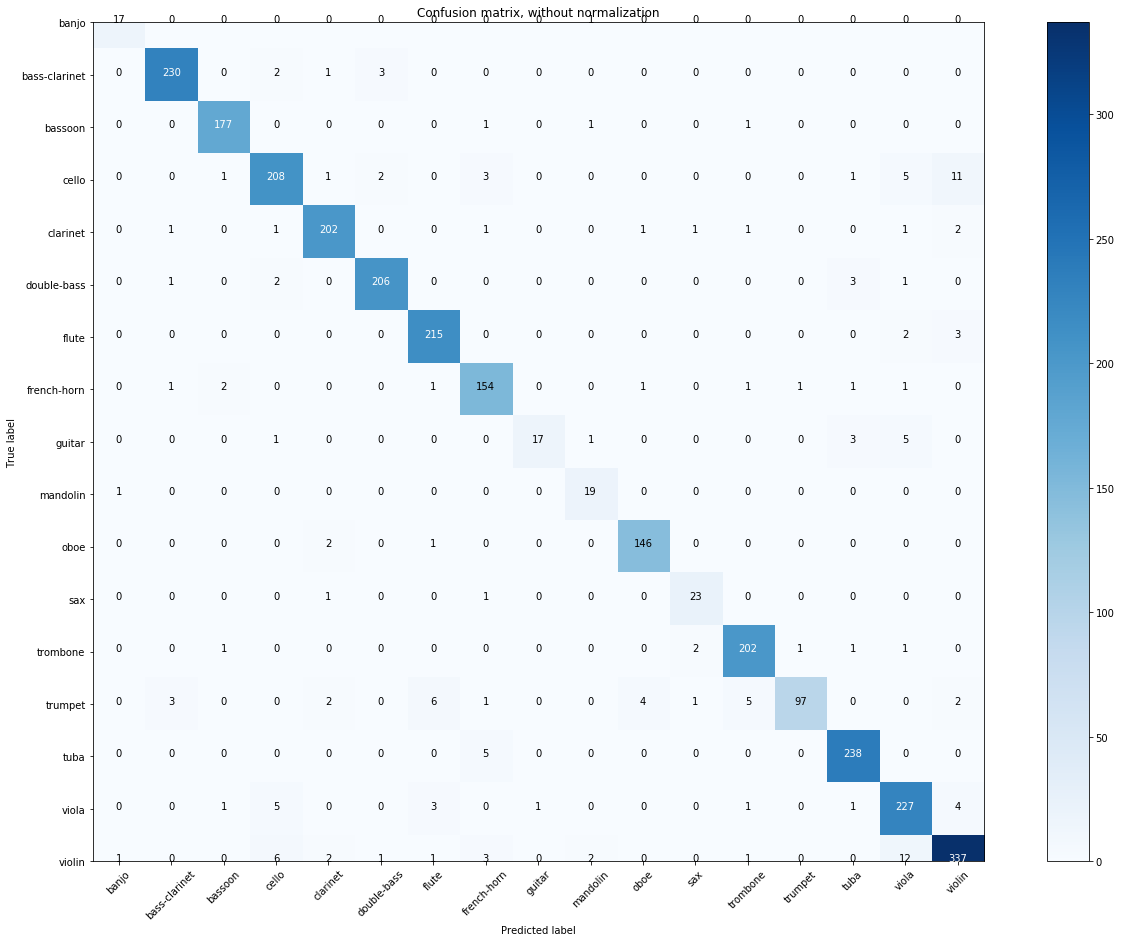

In [22]:
# Plot non-normalized confusion matrix
plt.figure(figsize=(18,13))
plot_confusion_matrix(cnf_matrix, classes=labelencoder.classes_,
                      title='Confusion matrix, without normalization')

In [23]:
# Find wrong predicted samples indexes
#wrong_predictions = [i for i, (e1, e2) in enumerate(zip(test_classes, predicted_labels)) if e1 != e2]
wrong_predictions = [i for i, (e1, e2) in enumerate(zip(predicted_labels,test_classes)) if e1 != e2]

In [24]:
# Find wrong predicted audio files
print(np.array(labels)[test_index[wrong_predictions]])
print(predicted_labels[wrong_predictions].T)
print(labelencoder.inverse_transform(predicted_labels[wrong_predictions]))
print(np.array(files)[test_index[wrong_predictions]])

['cello' 'viola' 'trumpet' 'trumpet' 'flute' 'french-horn' 'trumpet'
 'violin' 'cello' 'tuba' 'viola' 'violin' 'flute' 'violin' 'violin'
 'bass-clarinet' 'cello' 'sax' 'double-bass' 'french-horn' 'viola' 'viola'
 'double-bass' 'cello' 'trombone' 'violin' 'cello' 'violin' 'cello'
 'cello' 'trumpet' 'violin' 'double-bass' 'violin' 'clarinet' 'trumpet'
 'bass-clarinet' 'french-horn' 'viola' 'tuba' 'clarinet' 'trombone'
 'flute' 'cello' 'trumpet' 'trumpet' 'trumpet' 'cello' 'oboe' 'flute'
 'violin' 'trumpet' 'violin' 'bassoon' 'clarinet' 'tuba' 'cello' 'trumpet'
 'trumpet' 'violin' 'violin' 'cello' 'violin' 'cello' 'viola' 'bassoon'
 'clarinet' 'violin' 'trumpet' 'mandolin' 'guitar' 'trombone'
 'double-bass' 'guitar' 'violin' 'guitar' 'clarinet' 'cello' 'guitar'
 'cello' 'french-horn' 'violin' 'french-horn' 'cello' 'banjo' 'viola'
 'guitar' 'violin' 'violin' 'trumpet' 'violin' 'cello' 'violin' 'cello'
 'violin' 'cello' 'trumpet' 'viola' 'flute' 'violin' 'trumpet' 'trumpet'
 'trumpet' 'tuba